In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 
from pandas_summary import DataFrameSummary

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import joypy as joypy

# Track time
import time
import datetime
import calendar

# To Calculate the distance between two Geo locations
# the haversine distance
import gpxpy.geo 

# Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import make_scorer

from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# Statistics
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
from tqdm import tqdm

import os
import glob
import re

# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
pd.set_option('expand_frame_repr', False)
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:

# Dataset Path
path = r"F:\ML+\Projects\AMZN HackerEarth Forecast/dataset/train" 

data_points = []

# function to read text file and extract record values 
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        features = []
        for line in f.readlines()[0:-1]:
            line = re.sub('  +', '|', line)
            line = re.sub('\n', '', line)
            _, value = line.split("|")  
            features.append(value)
        return features


dataset_file_paths = glob.glob(path + '/*.txt')


for file_path in dataset_file_paths: 
    # append record to list
    data_points.append(read_text_file(file_path))

In [339]:

df = pd.DataFrame(data_points, columns = ['ID','Delivery_person_ID' ,'Delivery_person_Age','Delivery_person_Ratings',
                                'Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                                'Delivery_location_longitude','Order_Date','Time_Ordered','Time_Order_picked',
                                'Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order',
                                'Type_of_vehicle','Multiple_deliveries','Festival','City','Time_taken (min)'])


df  = df.astype({
 'ID': 'object'
,'Delivery_person_ID': 'object'
,'Delivery_person_Age' : np.float64
,'Delivery_person_Ratings': np.float64
,'Restaurant_latitude': np.float64
,'Restaurant_longitude': np.float64
,'Delivery_location_latitude': np.float64
,'Delivery_location_longitude': np.float64
,'Order_Date':'object'
,'Time_Ordered':'object'
,'Time_Order_picked':'object'
,'Weather_conditions':'object'
,'Road_traffic_density':'object'
,'Vehicle_condition':'object'
,'Type_of_order':'object'
,'Type_of_vehicle':'object'
,'Multiple_deliveries': np.float64
,'Festival':'object'
,'City':'object'
,'Time_taken (min)' :np.float64 
})

df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude  Order_Date Time_Ordered Time_Order_picked Weather_conditions Road_traffic_density Vehicle_condition Type_of_order Type_of_vehicle  Multiple_deliveries Festival           City  Time_taken (min)
0  0x4607     INDORES13DEL02                 37.0                      4.9            22.745049             75.892471                   22.765049                    75.912471  19-03-2022        11:30             11:45              Sunny                 High                 2         Snack      motorcycle                  0.0       No          Urban              24.0
1  0xb379     BANGRES18DEL02                 34.0                      4.5            12.913041             77.683237                   13.043041                    77.813237  25-03-2022        19:45             19:50             Stormy                  Jam                 2         Snack         scooter                  1.0       No  Metropolitian              33.0
2  0x5d6d     BANGRES19DEL01                 23.0                      4.4            12.914264             77.678400                   12.924264                    77.688400  19-03-2022         8:30              8:45         Sandstorms                  Low                 0        Drinks      motorcycle                  1.0       No          Urban              26.0
3  0x7a6a    COIMBRES13DEL02                 38.0                      4.7            11.003669             76.976494                   11.053669                    77.026494  05-04-2022        17:60             18:10              Sunny               Medium                 0        Buffet      motorcycle                  1.0       No  Metropolitian              21.0
4  0x70a2     CHENRES12DEL01                 32.0                      4.6            12.972793             80.249982                   13.012793                    80.289982  26-03-2022        13:30             13:45             Cloudy                 High                 1         Snack         scooter                  1.0       No  Metropolitian              30.0

In [340]:
train_df = df.copy(deep=True)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Basic Data Statistics</h2>
</div>

In [341]:
# Dimensions of dataset
print("Dimension of the dataset is", df.shape)

Dimension of the dataset is (45593, 20)


In [342]:
# Summary of dataset
df.describe().T

count       mean        std        min        25%        50%        75%        max
Delivery_person_Age          43739.0  29.567137   5.815155  15.000000  25.000000  30.000000  35.000000  50.000000
Delivery_person_Ratings      43685.0   4.633780   0.334716   1.000000   4.500000   4.700000   4.900000   6.000000
Restaurant_latitude          45593.0  17.017729   8.185109 -30.905562  12.933284  18.546947  22.728163  30.914057
Restaurant_longitude         45593.0  70.231332  22.883647 -88.366217  73.170000  75.898497  78.044095  88.433452
Delivery_location_latitude   45593.0  17.465186   7.335122   0.010000  12.988453  18.633934  22.785049  31.054057
Delivery_location_longitude  45593.0  70.845702  21.118812   0.010000  73.280000  76.002574  78.107044  88.563452
Multiple_deliveries          44600.0   0.744664   0.572473   0.000000   0.000000   1.000000   1.000000   3.000000
Time_taken (min)             45593.0  26.294607   9.383806  10.000000  19.000000  26.000000  32.000000  54.000000

In [343]:
dfs = DataFrameSummary(df)
dfs.columns_stats.T

counts uniques missing missing_perc        types
ID                           45593   45593       0           0%       unique
Delivery_person_ID           45593    1320       0           0%  categorical
Delivery_person_Age          43739      22    1854        4.07%      numeric
Delivery_person_Ratings      43685      28    1908        4.18%      numeric
Restaurant_latitude          45593     657       0           0%      numeric
Restaurant_longitude         45593     518       0           0%      numeric
Delivery_location_latitude   45593    4373       0           0%      numeric
Delivery_location_longitude  45593    4373       0           0%      numeric
Order_Date                   45593      44       0           0%  categorical
Time_Ordered                 45593     177       0           0%  categorical
Time_Order_picked            45593     193       0           0%  categorical
Weather_conditions           45593       7       0           0%  categorical
Road_traffic_density         45593       5       0           0%  categorical
Vehicle_condition            45593       4       0           0%  categorical
Type_of_order                45593       4       0           0%  categorical
Type_of_vehicle              45593       4       0           0%  categorical
Multiple_deliveries          44600       4     993        2.18%      numeric
Festival                     45593       3       0           0%  categorical
City                         45593       4       0           0%  categorical
Time_taken (min)             45593      45       0           0%      numeric

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- Delivery_person_Ratings column has outliers outside of the range(1-5).
- The Restaurant latitude and longitude columns have negative values while the delivery locations have only positive.             This cannot be possible as the -ve coordinates are in a different hemisphere than the +ve coordinates.
- The stats show that there are only missing values in the age, rating and multiple deliveries columns but on manual inspection   it looks like there are columns which have "NaN" as string values. 

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Cleaning and Pre-Processing</h2>
</div>

In [344]:
# converting the missing values to NaN
df = df.replace(["NaN", "nan"], [np.NaN,np.NaN])

In [345]:
# Re-checking to see missing column value stats
dfs = DataFrameSummary(df)
dfs.columns_stats.T

counts uniques missing missing_perc        types
ID                           45593   45593       0           0%       unique
Delivery_person_ID           45593    1320       0           0%  categorical
Delivery_person_Age          43739      22    1854        4.07%      numeric
Delivery_person_Ratings      43685      28    1908        4.18%      numeric
Restaurant_latitude          45593     657       0           0%      numeric
Restaurant_longitude         45593     518       0           0%      numeric
Delivery_location_latitude   45593    4373       0           0%      numeric
Delivery_location_longitude  45593    4373       0           0%      numeric
Order_Date                   45593      44       0           0%  categorical
Time_Ordered                 43862     176    1731        3.80%  categorical
Time_Order_picked            45593     193       0           0%  categorical
Weather_conditions           44977       6     616        1.35%  categorical
Road_traffic_density         44992       4     601        1.32%  categorical
Vehicle_condition            45593       4       0           0%  categorical
Type_of_order                45593       4       0           0%  categorical
Type_of_vehicle              45593       4       0           0%  categorical
Multiple_deliveries          44600       4     993        2.18%      numeric
Festival                     45365       2     228        0.50%         bool
City                         44393       3    1200        2.63%  categorical
Time_taken (min)             45593      45       0           0%      numeric

Looks like we have missing data in the following columns:
- Delivery_person_Age     : 4.07%
- Delivery_person_Ratings : 4.18%
- Time_Ordered	          : 3.80%
- Multiple_deliveries	  : 2.18%	
- Festival	              : 0.50%	
- City	                  : 2.63%

In [346]:
# Identify records having ratings out of range (1-5)
df[df['Delivery_person_Ratings'] > 5].head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude  Order_Date Time_Ordered Time_Order_picked Weather_conditions Road_traffic_density Vehicle_condition Type_of_order   Type_of_vehicle  Multiple_deliveries Festival           City  Time_taken (min)
3586   0x46d     BANGRES05DEL01                 50.0                      6.0           -12.970324            -77.645748                   13.010324                    77.685748  13-03-2022          NaN             12:30                NaN                  NaN                 3          Meal  electric_scooter                  0.0       No          Urban              25.0
4714   0x493      HYDRES17DEL01                 50.0                      6.0           -17.451976            -78.385883                   17.561976                    78.495883  04-04-2022          NaN             23:20                NaN                  NaN                 3         Snack           bicycle                  0.0       No  Metropolitian              27.0
5169   0x4f2      JAPRES08DEL01                 50.0                      6.0           -26.910262            -75.783013                   27.020262                    75.893013  18-03-2022          NaN             18:50                NaN                  NaN                 3        Drinks           scooter                  1.0       No  Metropolitian              20.0
5362   0x430     BANGRES19DEL01                 50.0                      6.0            12.914264             77.678400                   13.024264                    77.788400  06-04-2022          NaN             20:55                NaN                  NaN                 3          Meal  electric_scooter                  1.0       No  Metropolitian              18.0
5651  0xbef1      AGRRES13DEL02                 50.0                      6.0           -27.159795            -78.042990                   27.209795                    78.092990  13-02-2022          NaN             18:05                NaN                  NaN                 3        Drinks           scooter                  1.0       No  Metropolitian              20.0

In [347]:
#Capping outlier values to max range value
df.loc[df['Delivery_person_Ratings'] > 5, 'Delivery_person_Ratings'] = 5.0

In [348]:
#Check for outliers again
df[df['Delivery_person_Ratings'] > 5]

Empty DataFrame
Columns: [ID, Delivery_person_ID, Delivery_person_Age, Delivery_person_Ratings, Restaurant_latitude, Restaurant_longitude, Delivery_location_latitude, Delivery_location_longitude, Order_Date, Time_Ordered, Time_Order_picked, Weather_conditions, Road_traffic_density, Vehicle_condition, Type_of_order, Type_of_vehicle, Multiple_deliveries, Festival, City, Time_taken (min)]
Index: []

In [349]:
# # Let us drop the rows with NaN values for now to perform EDA 
# df.dropna(inplace=True)
# df.shape

## Feature Engineering

In [350]:
# creating some new features 

df.loc[:, 'city_code'] = df['Delivery_person_ID'].apply(lambda x: x.split('RES')[0])
df.loc[:, 'Resedential_block'] = df['Delivery_person_ID'].apply(lambda x: x.split('RES')[1][:2])
df.loc[:, 'Delivery_Agent_no'] = df['Delivery_person_ID'].apply(lambda x: x.split('DEL')[1])
df.loc[:, 'distance'] = df[['Restaurant_latitude','Restaurant_longitude',
                            'Delivery_location_latitude','Delivery_location_longitude']] \
                            .apply(lambda x: round(gpxpy.geo.haversine_distance(abs(x[0]),abs(x[1]),abs(x[2]),abs(x[3])) / 1000,2), axis=1)      

#df["Order_Date"] = df["Order_Date"].astype(np.str)
df.loc[:, "Order_Date"] = df["Order_Date"].apply(lambda x: datetime.datetime.strptime(x, "%d-%m-%Y"))

df.loc[:, 'Weekdays'] = df['Order_Date'].apply(lambda x: x.dayofweek)

df.loc[:, 'Time_Ordered'] = df['Time_Ordered'].str.replace(':', '.', regex=True)
df['Time_Ordered'] = df['Time_Ordered'].astype('float32')
df.loc[:, 'Time_Order_picked'] = df['Time_Order_picked'].str.replace(':', '.', regex=True)
df['Time_Order_picked'] = df['Time_Order_picked'].astype('float32')
df.loc[:, 'Prep_Time'] = round((df['Time_Order_picked'] - df['Time_Ordered']) * 100, 2)

df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude Order_Date  Time_Ordered  Time_Order_picked Weather_conditions Road_traffic_density Vehicle_condition Type_of_order Type_of_vehicle  Multiple_deliveries Festival           City  Time_taken (min) city_code Resedential_block Delivery_Agent_no  distance  Weekdays  Prep_Time
0  0x4607     INDORES13DEL02                 37.0                      4.9            22.745049             75.892471                   22.765049                    75.912471 2022-03-19     11.300000              11.45              Sunny                 High                 2         Snack      motorcycle                  0.0       No          Urban              24.0      INDO                13                02      3.03         5       15.0
1  0xb379     BANGRES18DEL02                 34.0                      4.5            12.913041             77.683237                   13.043041                    77.813237 2022-03-25     19.450001              19.50             Stormy                  Jam                 2         Snack         scooter                  1.0       No  Metropolitian              33.0      BANG                18                02     20.21         4        5.0
2  0x5d6d     BANGRES19DEL01                 23.0                      4.4            12.914264             77.678400                   12.924264                    77.688400 2022-03-19      8.300000               8.45         Sandstorms                  Low                 0        Drinks      motorcycle                  1.0       No          Urban              26.0      BANG                19                01      1.55         5       15.0
3  0x7a6a    COIMBRES13DEL02                 38.0                      4.7            11.003669             76.976494                   11.053669                    77.026494 2022-04-05     17.600000              18.10              Sunny               Medium                 0        Buffet      motorcycle                  1.0       No  Metropolitian              21.0     COIMB                13                02      7.80         1       50.0
4  0x70a2     CHENRES12DEL01                 32.0                      4.6            12.972793             80.249982                   13.012793                    80.289982 2022-03-26     13.300000              13.45             Cloudy                 High                 1         Snack         scooter                  1.0       No  Metropolitian              30.0      CHEN                12                01      6.22         5       15.0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Exploratory Data Analysis</h2>
</div>


### Check distribution of target variable : Time_taken (min)

In [351]:
# mean, standard deviation, median, min , max
df['Time_taken (min)'].agg(['mean', 'std','median', 'min', 'max']).to_frame().T

mean       std  median   min   max
Time_taken (min)  26.294607  9.383806    26.0  10.0  54.0

In [352]:
# Calculating the 25th, 75th and IQR  
q1 = np.percentile(df['Time_taken (min)'],25)
q3 = np.percentile(df['Time_taken (min)'],75)
IQR = q3 - q1
lower_limit = np.percentile(df['Time_taken (min)'],25) - (1.5 * IQR)
upper_limit = np.percentile(df['Time_taken (min)'],75) + (1.5 * IQR)

print("25th Percentile: ", q1)
print("75th Percentile: ", q3)
print("IQR            : ", IQR)
print("lower_limit    : ", lower_limit)
print("upper_limit    : ", upper_limit)

25th Percentile:  19.0
75th Percentile:  32.0
IQR            :  13.0
lower_limit    :  -0.5
upper_limit    :  51.5


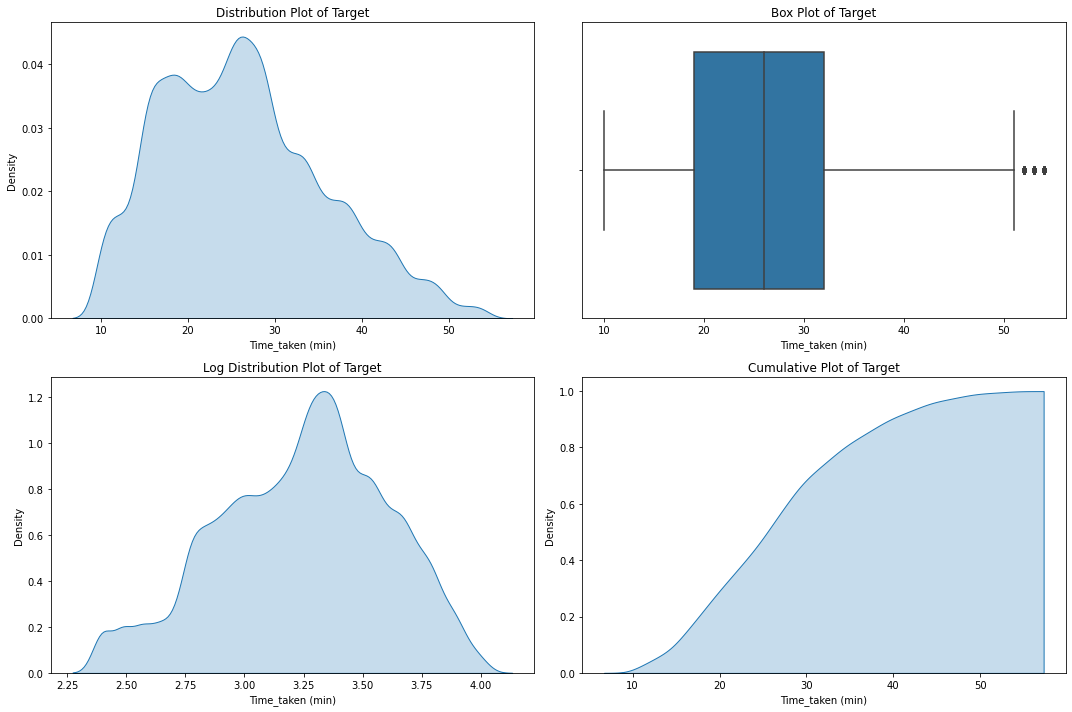

In [353]:

fig,ax = plt.subplots(2,2, figsize=(15,10))

sns.kdeplot(df['Time_taken (min)'],shade='fill', ax=ax[0,0])
ax[0,0].set_title("Distribution Plot of Target")

sns.boxplot(df['Time_taken (min)'], ax=ax[0,1])
ax[0,1].set_title("Box Plot of Target")

sns.kdeplot(np.log1p(df['Time_taken (min)']),shade='fill', ax=ax[1,0])
ax[1,0].set_title("Log Distribution Plot of Target")

sns.kdeplot((df['Time_taken (min)']),shade='fill', cumulative=True, ax=ax[1,1])
ax[1,1].set_title("Cumulative Plot of Target")

plt.tight_layout()
plt.show()

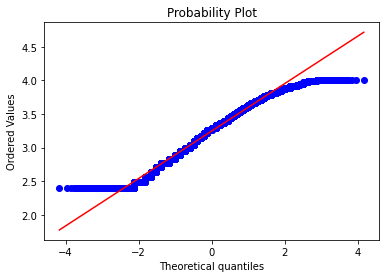

In [354]:
#Q-Q plot for checking if Time Taken is log-normal
scipy.stats.probplot(np.log1p(df['Time_taken (min)'].values), plot=plt)
plt.show()

In [355]:
# KS Stastic
ks_statistic, p_value = scipy.stats.kstest(df['Time_taken (min)'], 'norm')
print(ks_statistic, p_value)

1.0 0.0


In [356]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers
for i in range(90,100,1):
    var = df['Time_taken (min)'].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 40.0
91 percentile value is 40.0
92 percentile value is 41.0
93 percentile value is 42.0
94 percentile value is 43.0
95 percentile value is 44.0
96 percentile value is 44.0
97 percentile value is 46.0
98 percentile value is 48.0
99 percentile value is 49.0
100 percentile value is  54.0


In [357]:
 
df[df['Time_taken (min)'] > upper_limit].shape

(270, 26)

In [358]:
# Removing Outlier points
df = df[df['Time_taken (min)'] <= upper_limit]

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h3 style='margin:10px 5px'> Inferences:</h3>
</div>

- The Average time taken for a delivery is around 26 minutes
- Looks like the target vriable is not normally distributed
- 90% of the deliveries are done under 40 minutes

In [359]:
# List of numerical features
numerical_columns = df._get_numeric_data().columns.to_list()
numerical_columns

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Time_Ordered',
 'Time_Order_picked',
 'Multiple_deliveries',
 'Time_taken (min)',
 'distance',
 'Weekdays',
 'Prep_Time']

In [360]:
df[numerical_columns].head()

Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude  Time_Ordered  Time_Order_picked  Multiple_deliveries  Time_taken (min)  distance  Weekdays  Prep_Time
0                 37.0                      4.9            22.745049             75.892471                   22.765049                    75.912471     11.300000              11.45                  0.0              24.0      3.03         5       15.0
1                 34.0                      4.5            12.913041             77.683237                   13.043041                    77.813237     19.450001              19.50                  1.0              33.0     20.21         4        5.0
2                 23.0                      4.4            12.914264             77.678400                   12.924264                    77.688400      8.300000               8.45                  1.0              26.0      1.55         5       15.0
3                 38.0                      4.7            11.003669             76.976494                   11.053669                    77.026494     17.600000              18.10                  1.0              21.0      7.80         1       50.0
4                 32.0                      4.6            12.972793             80.249982                   13.012793                    80.289982     13.300000              13.45                  1.0              30.0      6.22         5       15.0

In [361]:
categorical_columns = list(set(df.columns) - set(numerical_columns))
categorical_columns

['city_code',
 'Weather_conditions',
 'Delivery_Agent_no',
 'City',
 'Type_of_vehicle',
 'Order_Date',
 'Festival',
 'Road_traffic_density',
 'Type_of_order',
 'Delivery_person_ID',
 'ID',
 'Resedential_block',
 'Vehicle_condition']

In [362]:
numerical_columns

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Time_Ordered',
 'Time_Order_picked',
 'Multiple_deliveries',
 'Time_taken (min)',
 'distance',
 'Weekdays',
 'Prep_Time']

In [363]:
# Removing column having 100% unique values and the Target variable
categorical_columns.remove('ID') 
numerical_columns.remove('Time_taken (min)')

# Removing the Latitude and Logitutde columns as the distance between info has been captured
numerical_columns.remove('Restaurant_latitude')
numerical_columns.remove('Restaurant_longitude')
numerical_columns.remove('Delivery_location_latitude')
numerical_columns.remove('Delivery_location_longitude')

# Removing Categorical columns
numerical_columns.remove('Multiple_deliveries')
numerical_columns.remove('Weekdays')

# Adding the Categorical columns to the Categorical List
categorical_columns.extend(['Weekdays','Multiple_deliveries'])

In [364]:
df[categorical_columns].head()

city_code Weather_conditions Delivery_Agent_no           City Type_of_vehicle Order_Date Festival Road_traffic_density Type_of_order Delivery_person_ID Resedential_block Vehicle_condition  Weekdays  Multiple_deliveries
0      INDO              Sunny                02          Urban      motorcycle 2022-03-19       No                 High         Snack     INDORES13DEL02                13                 2         5                  0.0
1      BANG             Stormy                02  Metropolitian         scooter 2022-03-25       No                  Jam         Snack     BANGRES18DEL02                18                 2         4                  1.0
2      BANG         Sandstorms                01          Urban      motorcycle 2022-03-19       No                  Low        Drinks     BANGRES19DEL01                19                 0         5                  1.0
3     COIMB              Sunny                02  Metropolitian      motorcycle 2022-04-05       No               Medium        Buffet    COIMBRES13DEL02                13                 0         1                  1.0
4      CHEN             Cloudy                01  Metropolitian         scooter 2022-03-26       No                 High         Snack     CHENRES12DEL01                12                 1         5                  1.0

### EDA of Categorical Columns

In [365]:
# function to plot Distribution of target by column/feature variable
def plot_distribution_by_cat(data, target, column):
    
    fig,ax = plt.subplots(1,2, figsize=(15,5), dpi= 80)
    fig.suptitle(f"Distribution of time taken by {column} column" ,fontsize = 'large' , fontweight = 'bold' )
    
    sns.boxplot(data=data, y=target, x=column, ax=ax[0])
    ax[0].set_title("Box Plot")

    sns.kdeplot(data=data, x=target, hue=column, shade='fill', ax=ax[1])
    ax[1].set_title("Distribution Plot")

    plt.tight_layout()
    plt.show();

### Categorical Column : Festival

In [366]:
df['Festival'].dropna().value_counts()

No     44291
Yes      804
Name: Festival, dtype: int64

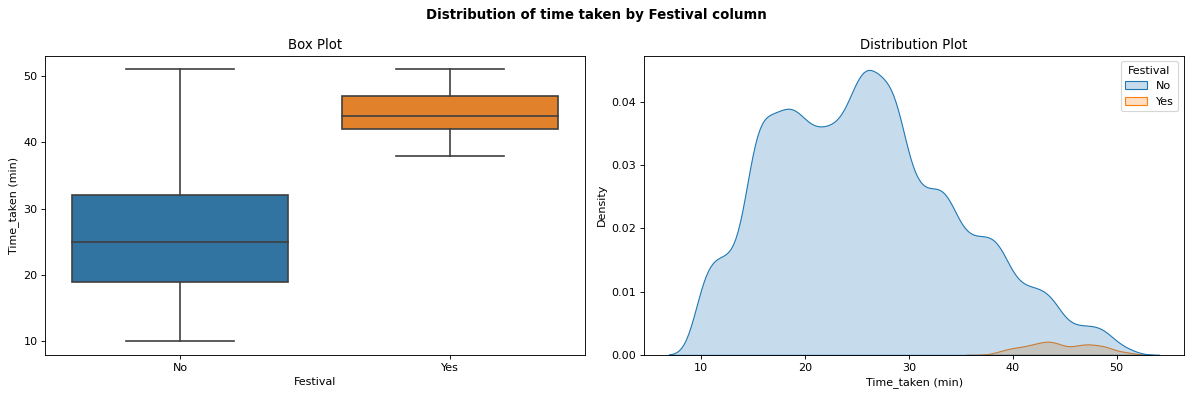

In [367]:

plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Festival')

**Inference:** Delivery time during Festivals are higher compared to normal days.

### Categorical Column : Type_of_order

In [368]:
df['Type_of_order'].value_counts()

Snack     11458
Meal      11393
Drinks    11262
Buffet    11210
Name: Type_of_order, dtype: int64

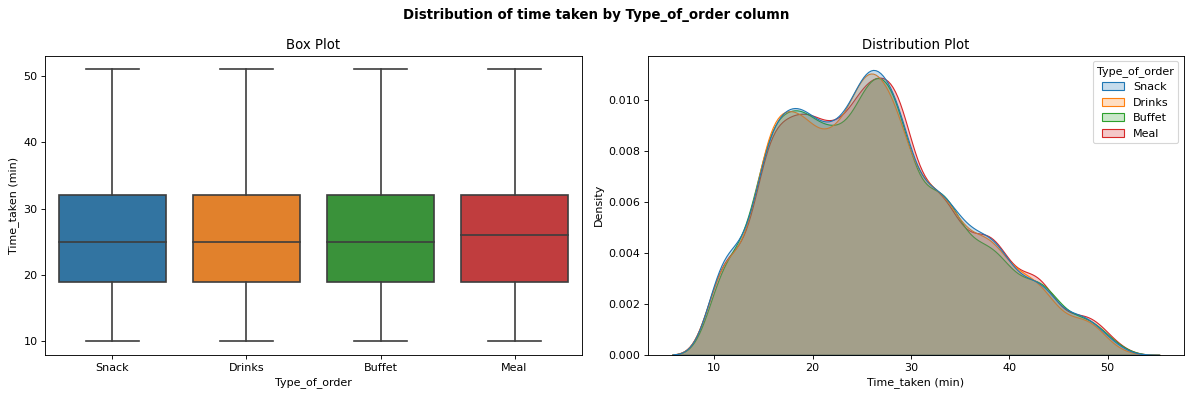

In [369]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Type_of_order')

**Inference:** There is significantly high overlap of time taken for all types of orders

### Categorical Column : Road_traffic_density

In [370]:
df['Road_traffic_density'].value_counts()

Low       15477
Jam       13902
Medium    10947
High       4401
Name: Road_traffic_density, dtype: int64

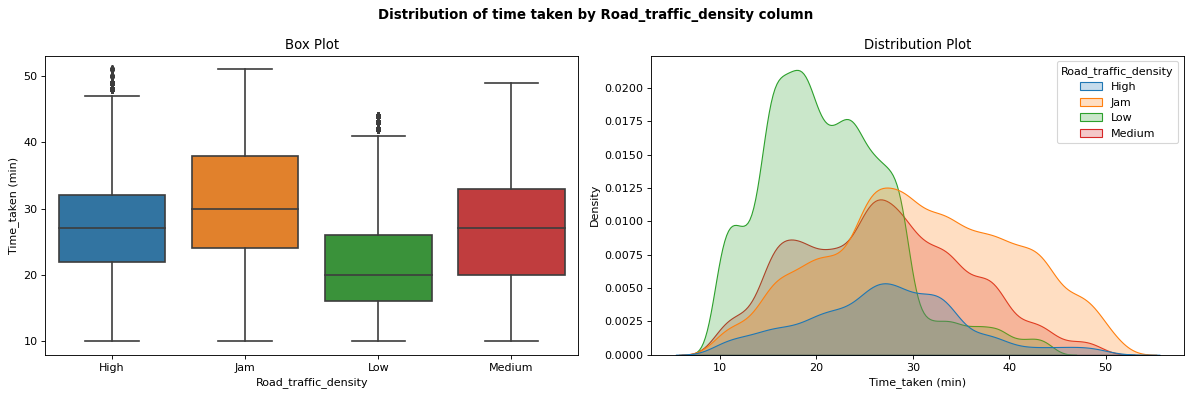

In [371]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Road_traffic_density')

**Inference:** There is significantly overlap of time taken for all Road_traffic_density types

### Categorical Column : Type_of_vehicle

In [372]:
df['Type_of_vehicle'].value_counts()

motorcycle          26168
scooter             15274
electric_scooter     3813
bicycle                68
Name: Type_of_vehicle, dtype: int64

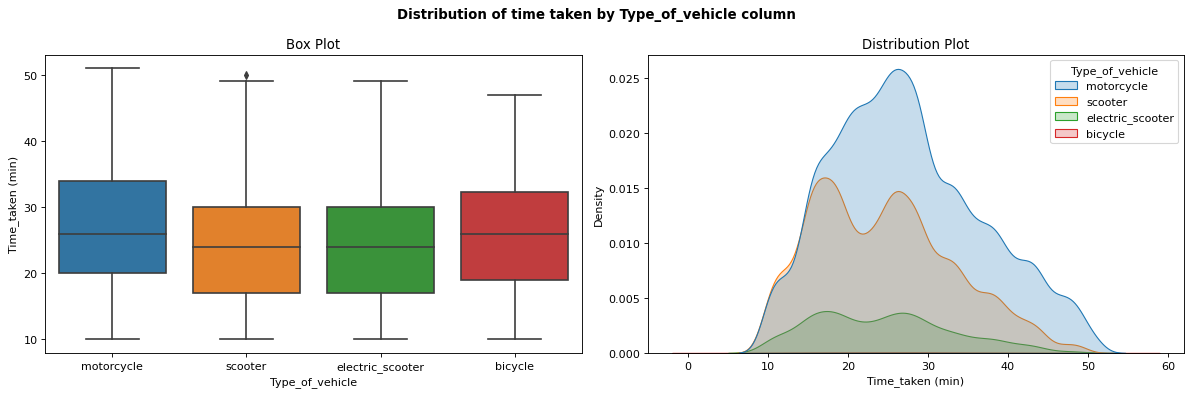

In [373]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Type_of_vehicle')

**Inference:** There is significantly overlap of time taken for all Types of vehicles

### Categorical Column : Weather_conditions

In [374]:
df['Weather_conditions'].value_counts()

Fog           7597
Stormy        7549
Cloudy        7492
Sandstorms    7463
Windy         7378
Sunny         7233
Name: Weather_conditions, dtype: int64

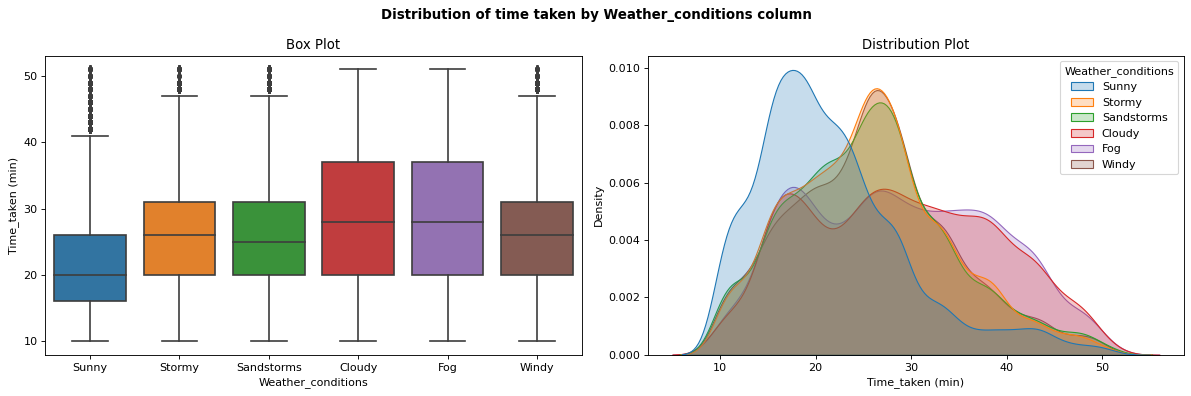

In [375]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Weather_conditions')

**Inference:** There is significantly overlap of time taken for all Weather_conditions

### Categorical Column : Vehicle_condition

In [376]:
df['Vehicle_condition'].value_counts()

2    15034
1    15030
0    14744
3      515
Name: Vehicle_condition, dtype: int64

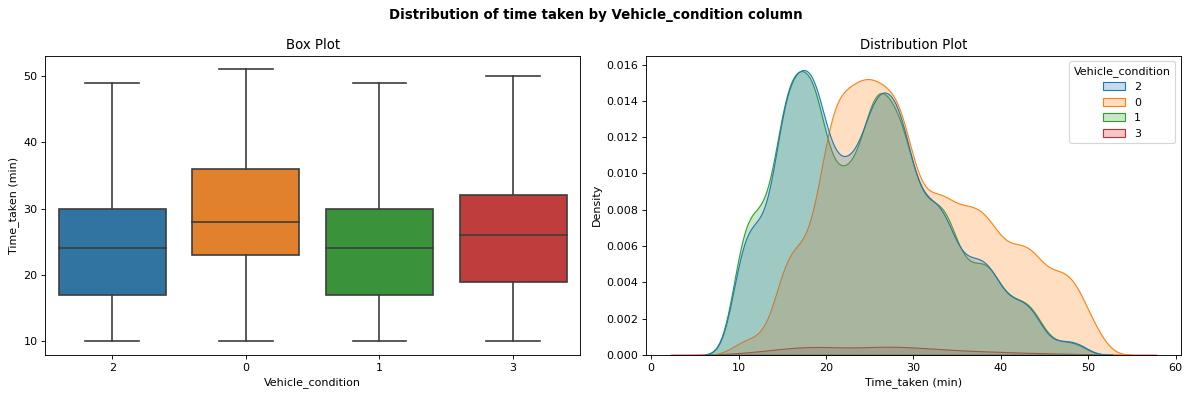

In [377]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Vehicle_condition')

**Inference:** There is significantly overlap of time taken for all Vehicle_conditions

### Categorical Column : Weekdays

In [378]:
df['Weekdays'].value_counts()

2    7036
4    6991
1    6346
3    6318
5    6252
6    6212
0    6168
Name: Weekdays, dtype: int64

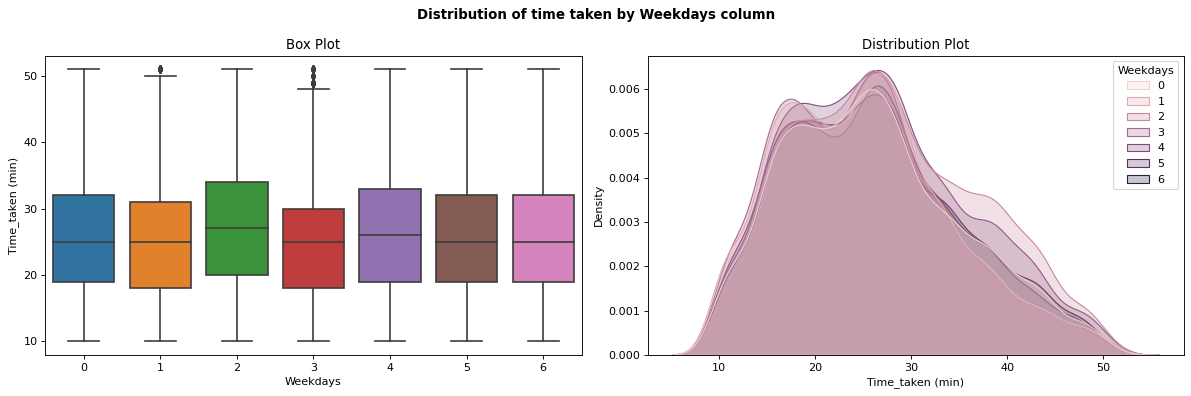

In [379]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Weekdays')

**Inference:** There is significantly overlap of time taken for all days of the week

### Categorical Column : Multiple_deliveries

In [380]:
df['Multiple_deliveries'].value_counts()

1.0    28044
0.0    14057
2.0     1940
3.0      292
Name: Multiple_deliveries, dtype: int64

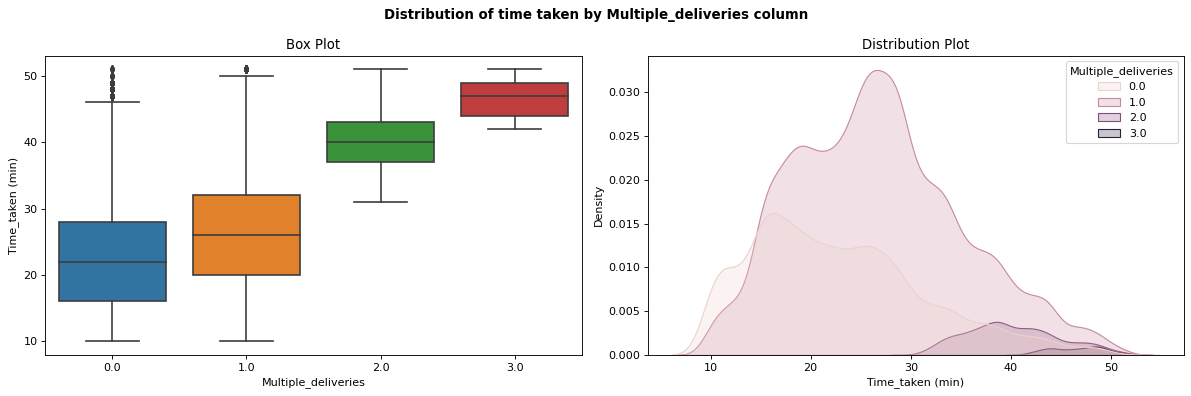

In [381]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='Multiple_deliveries')

**Inference:** There might be a significant linear relation with increase in number of deliveries

### Categorical Column : city_code

In [382]:
df['city_code'].value_counts()

JAP       3419
RANCHI    3206
BANG      3184
SUR       3170
HYD       3165
MUM       3153
MYS       3152
VAD       3152
COIMB     3143
INDO      3142
CHEN      3131
PUNE      3108
AGR        757
LUDH       751
ALH        735
DEH        735
KNP        734
GOA        707
AURG       699
KOC        698
KOL        693
BHP        689
Name: city_code, dtype: int64

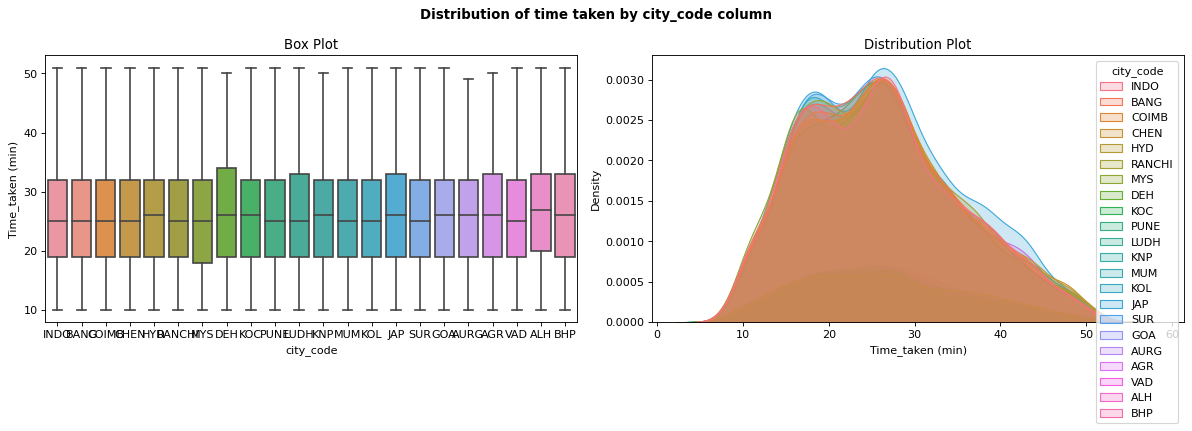

In [383]:
plot_distribution_by_cat(data=df, target='Time_taken (min)', column='city_code')

**Inference:** There is significantly overlap of time taken for all city codes

### EDA of Numerical Columns

In [384]:
numerical_columns

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Ordered',
 'Time_Order_picked',
 'distance',
 'Prep_Time']

### Delivery Person Age

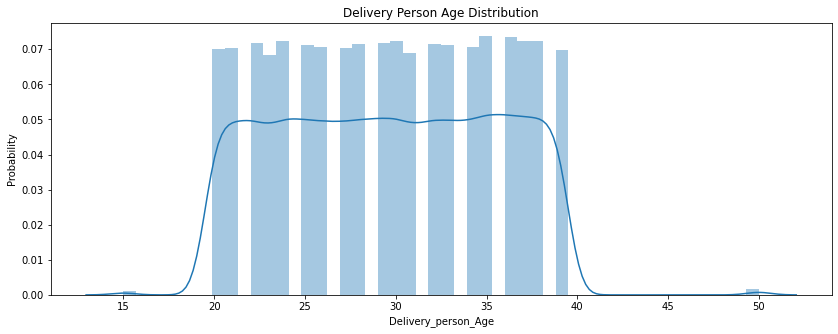

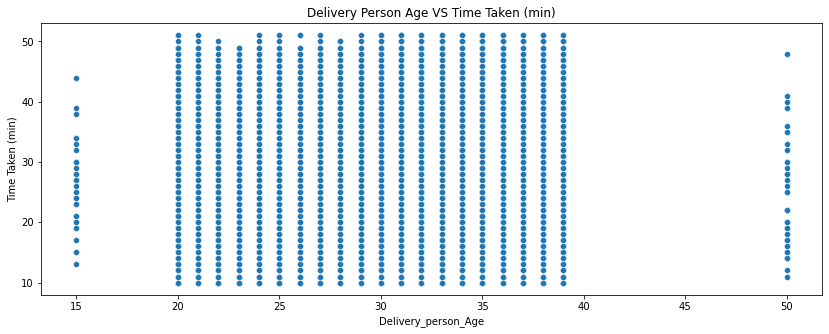

In [385]:
# Distribution plot of Delivery Person Age
plt.figure(figsize=(14,5))

sns.distplot(df['Delivery_person_Age'],)
plt.title("Delivery Person Age Distribution")
plt.ylabel("Probability")
plt.show()

plt.figure(figsize=(14,5))
sns.scatterplot(data=df, x='Delivery_person_Age', y='Time_taken (min)')
plt.title("Delivery Person Age VS Time Taken (min)")
plt.ylabel("Time Taken (min)")
plt.show()

### Delivery_person_Ratings

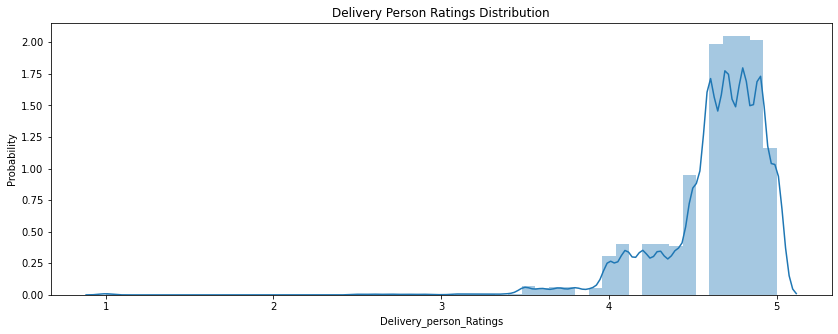

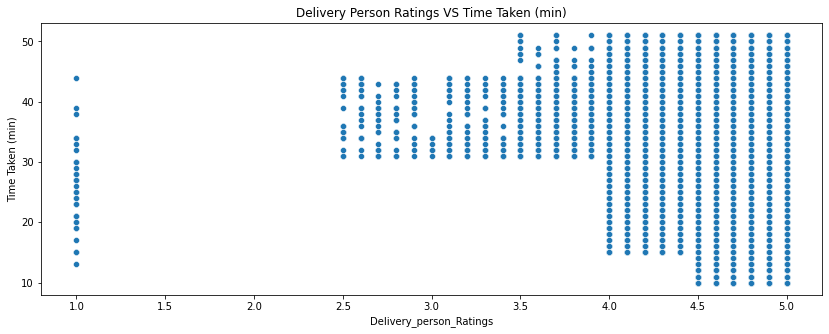

In [386]:
# Distribution plot of Delivery_person_Ratings
plt.figure(figsize=(14,5))

sns.distplot(df['Delivery_person_Ratings'],)
plt.title("Delivery Person Ratings Distribution")
plt.ylabel("Probability")
plt.show()

plt.figure(figsize=(14,5))
sns.scatterplot(data=df, x='Delivery_person_Ratings', y='Time_taken (min)')
plt.title("Delivery Person Ratings VS Time Taken (min)")
plt.ylabel("Time Taken (min)")
plt.show()

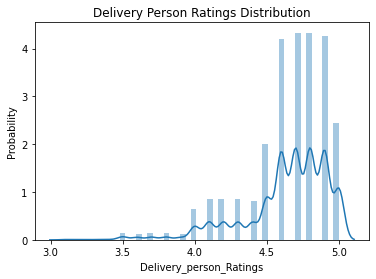

In [387]:
sns.distplot(df[df['Delivery_person_Ratings'] > 3]['Delivery_person_Ratings'])
plt.title("Delivery Person Ratings Distribution")
plt.ylabel("Probability")
plt.show()

### Distance

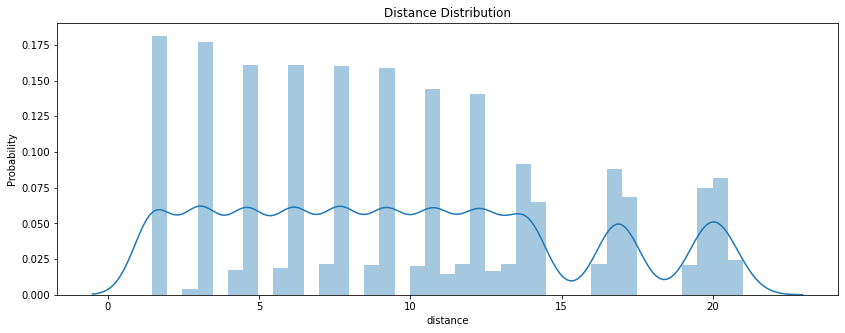

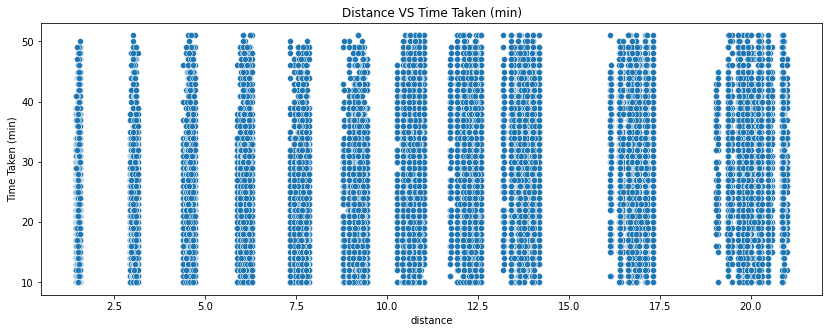

In [388]:
# Distribution plot of Delivery_person_Ratings
plt.figure(figsize=(14,5))

sns.distplot(df['distance'],)
plt.title("Distance Distribution")
plt.ylabel("Probability")
plt.show()

plt.figure(figsize=(14,5))
sns.scatterplot(data=df, x='distance', y='Time_taken (min)')
plt.title("Distance VS Time Taken (min)")
plt.ylabel("Time Taken (min)")
plt.show()

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Statistical Significance Test</h2>
</div>

In [389]:
# Create a dictionary with correlation and p values for every numerical feature
correlation = {'feature' : [], 'correlation' : [], 'p-value' : []}
for col in numerical_columns:
    correlation['feature'].append(col)
    correlation['correlation'].append(scipy.stats.spearmanr(df['Time_taken (min)'], df[col], nan_policy = 'omit')[0])
    correlation['p-value'].append(scipy.stats.spearmanr(df['Time_taken (min)'], df[col], nan_policy = 'omit')[1])

In [390]:
# Convert the dictionary to dataframe
correlation_df = pd.DataFrame(correlation)
correlation_df

feature  correlation       p-value
0      Delivery_person_Age     0.310243  0.000000e+00
1  Delivery_person_Ratings    -0.292973  0.000000e+00
2             Time_Ordered     0.083714  1.168122e-68
3        Time_Order_picked     0.084115  5.874983e-72
4                 distance     0.317207  0.000000e+00
5                Prep_Time    -0.004538  3.432805e-01

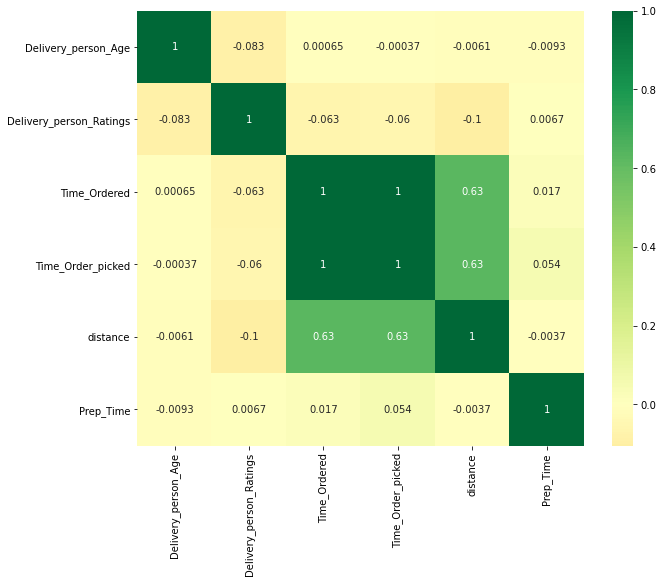

In [391]:
plt.figure(figsize=(10,8))
sns.heatmap(df[numerical_columns].corr(), annot=True,cmap='RdYlGn',center=0);

In [392]:
# Significant numeric variables
significant_numeric_variables = correlation_df.loc[correlation_df["p-value"] <= 0.05,"feature"]
significant_numeric_variables

0        Delivery_person_Age
1    Delivery_person_Ratings
2               Time_Ordered
3          Time_Order_picked
4                   distance
Name: feature, dtype: object

In [393]:
categorical_columns

['city_code',
 'Weather_conditions',
 'Delivery_Agent_no',
 'City',
 'Type_of_vehicle',
 'Order_Date',
 'Festival',
 'Road_traffic_density',
 'Type_of_order',
 'Delivery_person_ID',
 'Resedential_block',
 'Vehicle_condition',
 'Weekdays',
 'Multiple_deliveries']

#### ANOVA Test

In [394]:
# Get significant categorical variables based on ANOVA
df['time_taken'] = df['Time_taken (min)']

significant_cat_cols = []
for col in categorical_columns:  
    model = ols(('time_taken ~ ' + col), data = df).fit()
                
    # Get ANOVA summary
    anova_result = sm.stats.anova_lm(model, typ=2)

    if anova_result["PR(>F)"][0] <= 0.05:
        significant_cat_cols.append(col)
        

df.drop('time_taken', inplace=True, axis =1)
significant_cat_cols

['Weather_conditions',
 'Delivery_Agent_no',
 'City',
 'Type_of_vehicle',
 'Order_Date',
 'Festival',
 'Road_traffic_density',
 'Vehicle_condition',
 'Multiple_deliveries']

In [395]:
significant_variables = significant_numeric_variables.to_list() + significant_cat_cols 
significant_variables

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Ordered',
 'Time_Order_picked',
 'distance',
 'Weather_conditions',
 'Delivery_Agent_no',
 'City',
 'Type_of_vehicle',
 'Order_Date',
 'Festival',
 'Road_traffic_density',
 'Vehicle_condition',
 'Multiple_deliveries']

In [396]:
df[significant_variables].head()

Delivery_person_Age  Delivery_person_Ratings  Time_Ordered  Time_Order_picked  distance Weather_conditions Delivery_Agent_no           City Type_of_vehicle Order_Date Festival Road_traffic_density Vehicle_condition  Multiple_deliveries
0                 37.0                      4.9     11.300000              11.45      3.03              Sunny                02          Urban      motorcycle 2022-03-19       No                 High                 2                  0.0
1                 34.0                      4.5     19.450001              19.50     20.21             Stormy                02  Metropolitian         scooter 2022-03-25       No                  Jam                 2                  1.0
2                 23.0                      4.4      8.300000               8.45      1.55         Sandstorms                01          Urban      motorcycle 2022-03-19       No                  Low                 0                  1.0
3                 38.0                      4.7     17.600000              18.10      7.80              Sunny                02  Metropolitian      motorcycle 2022-04-05       No               Medium                 0                  1.0
4                 32.0                      4.6     13.300000              13.45      6.22             Cloudy                01  Metropolitian         scooter 2022-03-26       No                 High                 1                  1.0

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Data Pre-Processing and Feature Encoding For Model Building</h2>
</div>

In [397]:
train_median_age = df['Delivery_person_Age'].mean()
train_median_delivery_rating = df['Delivery_person_Ratings'].median()
train_mean_prep_time = df['Prep_Time'].mean()
train_mean_Time_Ordered = df['Time_Ordered'].mean()

In [398]:
def data_preprocessing(df):
    
    
    df = df.replace(["NaN", "nan"], [np.NaN,np.NaN])
    
    df.loc[:, 'city_code'] = df['Delivery_person_ID'].apply(lambda x: x.split('RES')[0])
    df.loc[:, 'Resedential_block'] = df['Delivery_person_ID'].apply(lambda x: x.split('RES')[1][:2])
    df.loc[:, 'Delivery_Agent_no'] = df['Delivery_person_ID'].apply(lambda x: x.split('DEL')[1])
    df['Delivery_Agent_no'] = df['Delivery_Agent_no'].astype('int16')
    df.loc[:, 'distance'] = df[['Restaurant_latitude','Restaurant_longitude',
                                'Delivery_location_latitude','Delivery_location_longitude']] \
                                .apply(lambda x: round(gpxpy.geo.haversine_distance(abs(x[0]),abs(x[1]),abs(x[2]),abs(x[3])) / 1000,2), axis=1)      

    #df["Order_Date"] = df["Order_Date"].astype(np.str)
    df.loc[:, "Order_Date"] = df["Order_Date"].apply(lambda x: datetime.datetime.strptime(x, "%d-%m-%Y"))
    df.loc[:, 'Weekdays'] = df['Order_Date'].apply(lambda x: x.dayofweek)

    df.loc[:, 'Time_Ordered'] = df['Time_Ordered'].str.replace(':', '.', regex=True)
    df['Time_Ordered'] = df['Time_Ordered'].astype('float32')
    df.loc[:, 'Time_Order_picked'] = df['Time_Order_picked'].str.replace(':', '.', regex=True)
    df['Time_Order_picked'] = df['Time_Order_picked'].astype('float32')
    df.loc[:, 'Prep_Time'] = round((df['Time_Order_picked'] - df['Time_Ordered']) * 100, 2)
    df['Vehicle_condition'] = df['Vehicle_condition'].astype('int16')
    
    return df
 

def handle_missing_values(df):
    
    df['Delivery_person_Age'].fillna(train_median_age, inplace = True)
    df['Delivery_person_Ratings'].fillna(train_median_delivery_rating, inplace = True)
    df['Prep_Time'].fillna(train_mean_prep_time, inplace = True)
    df['Time_Ordered'].fillna(train_mean_Time_Ordered, inplace = True)
    
    df['Road_traffic_density'].fillna('Low', inplace = True)
    df['Weather_conditions'].fillna('Cloudy', inplace = True)
    df['City'].fillna('Metropolitian', inplace = True)
    df['Festival'].fillna('No', inplace = True)
    df['Multiple_deliveries'].fillna(0, inplace = True )
    
    return df
    

In [399]:
df['Delivery_Agent_no'] = df['Delivery_Agent_no'].astype('int16')

In [400]:
# Perform data cleaning and pre processing on dataset
train_df = data_preprocessing(train_df)
train_df = handle_missing_values(train_df)

train_df.set_index('ID', inplace=True)
target = train_df['Time_taken (min)']
train_df = train_df[significant_variables]
train_df.head()

Delivery_person_Age  Delivery_person_Ratings  Time_Ordered  Time_Order_picked  distance Weather_conditions  Delivery_Agent_no           City Type_of_vehicle Order_Date Festival Road_traffic_density  Vehicle_condition  Multiple_deliveries
ID                                                                                                                                                                                                                                                   
0x4607                 37.0                      4.9     11.300000              11.45      3.03              Sunny                  2          Urban      motorcycle 2022-03-19       No                 High                  2                  0.0
0xb379                 34.0                      4.5     19.450001              19.50     20.21             Stormy                  2  Metropolitian         scooter 2022-03-25       No                  Jam                  2                  1.0
0x5d6d                 23.0                      4.4      8.300000               8.45      1.55         Sandstorms                  1          Urban      motorcycle 2022-03-19       No                  Low                  0                  1.0
0x7a6a                 38.0                      4.7     17.600000              18.10      7.80              Sunny                  2  Metropolitian      motorcycle 2022-04-05       No               Medium                  0                  1.0
0x70a2                 32.0                      4.6     13.300000              13.45      6.22             Cloudy                  1  Metropolitian         scooter 2022-03-26       No                 High                  1                  1.0

### Feature Encoding

In [401]:
train_df.head()

Delivery_person_Age  Delivery_person_Ratings  Time_Ordered  Time_Order_picked  distance Weather_conditions  Delivery_Agent_no           City Type_of_vehicle Order_Date Festival Road_traffic_density  Vehicle_condition  Multiple_deliveries
ID                                                                                                                                                                                                                                                   
0x4607                 37.0                      4.9     11.300000              11.45      3.03              Sunny                  2          Urban      motorcycle 2022-03-19       No                 High                  2                  0.0
0xb379                 34.0                      4.5     19.450001              19.50     20.21             Stormy                  2  Metropolitian         scooter 2022-03-25       No                  Jam                  2                  1.0
0x5d6d                 23.0                      4.4      8.300000               8.45      1.55         Sandstorms                  1          Urban      motorcycle 2022-03-19       No                  Low                  0                  1.0
0x7a6a                 38.0                      4.7     17.600000              18.10      7.80              Sunny                  2  Metropolitian      motorcycle 2022-04-05       No               Medium                  0                  1.0
0x70a2                 32.0                      4.6     13.300000              13.45      6.22             Cloudy                  1  Metropolitian         scooter 2022-03-26       No                 High                  1                  1.0

In [402]:
# Encoding for Road_traffic_density column

traffic_density_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'Jam', 'High']], handle_unknown='use_encoded_value', unknown_value=-1)

In [403]:
train_df['Road_traffic_density_encoded'] = traffic_density_encoder.fit_transform( \
                                        train_df[['Road_traffic_density']].to_numpy().reshape(-1,1))

In [404]:
# Encoding for Weather_conditions column
weather_conditions_encoder = OrdinalEncoder(categories=[['Sunny', 'Windy', 'Cloudy','Fog', 'Stormy', 'Sandstorms']], handle_unknown='use_encoded_value', unknown_value=-1)

In [405]:
train_df['weather_conditions_encoded'] = weather_conditions_encoder.fit_transform( \
                                        train_df[['Weather_conditions']].to_numpy().reshape(-1,1))

In [406]:
# Encoding for Weather_conditions column
city_encoder = OrdinalEncoder(categories=[['Urban', 'Semi-Urban', 'Metropolitian']], handle_unknown='use_encoded_value', unknown_value=-1)

In [407]:
train_df['city_encoded'] = city_encoder.fit_transform( \
                                        train_df[['City']].to_numpy().reshape(-1,1))

In [408]:
festival_dict ={'Yes': 1, 'No': 0}

train_df['Festival'] = [festival_dict[i] for i in train_df['Festival']]

In [409]:
train_df.head()

Delivery_person_Age  Delivery_person_Ratings  Time_Ordered  Time_Order_picked  distance Weather_conditions  Delivery_Agent_no           City Type_of_vehicle Order_Date  Festival Road_traffic_density  Vehicle_condition  Multiple_deliveries  Road_traffic_density_encoded  weather_conditions_encoded  city_encoded
ID                                                                                                                                                                                                                                                                                                                            
0x4607                 37.0                      4.9     11.300000              11.45      3.03              Sunny                  2          Urban      motorcycle 2022-03-19         0                 High                  2                  0.0                           3.0                         0.0           0.0
0xb379                 34.0                      4.5     19.450001              19.50     20.21             Stormy                  2  Metropolitian         scooter 2022-03-25         0                  Jam                  2                  1.0                           2.0                         4.0           2.0
0x5d6d                 23.0                      4.4      8.300000               8.45      1.55         Sandstorms                  1          Urban      motorcycle 2022-03-19         0                  Low                  0                  1.0                           0.0                         5.0           0.0
0x7a6a                 38.0                      4.7     17.600000              18.10      7.80              Sunny                  2  Metropolitian      motorcycle 2022-04-05         0               Medium                  0                  1.0                           1.0                         0.0           2.0
0x70a2                 32.0                      4.6     13.300000              13.45      6.22             Cloudy                  1  Metropolitian         scooter 2022-03-26         0                 High                  1                  1.0                           3.0                         2.0           2.0

In [410]:
train_df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Ordered',
       'Time_Order_picked', 'distance', 'Weather_conditions',
       'Delivery_Agent_no', 'City', 'Type_of_vehicle', 'Order_Date',
       'Festival', 'Road_traffic_density', 'Vehicle_condition',
       'Multiple_deliveries', 'Road_traffic_density_encoded',
       'weather_conditions_encoded', 'city_encoded'],
      dtype='object')

In [411]:
features = ['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Ordered', 'Time_Order_picked',
            'distance','Road_traffic_density_encoded', 'weather_conditions_encoded','Vehicle_condition',
            'Festival','Delivery_Agent_no', 'Multiple_deliveries','city_encoded']

In [412]:
X = train_df[features]
y = target

In [413]:
# Split the dataset into the training set and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [414]:
x_train.shape , y_train.shape

((36474, 12), (36474,))

In [415]:
x_test.shape , y_test.shape

((9119, 12), (9119,))

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Machine Learning Models</h2>
</div>

## Evaluation Metric

In [416]:
def eval_metric(y_actual,y_pred):
    
    print("\n MAE           : ", mean_absolute_error(y_actual,y_pred))
    print("\n MSE           : ", mean_squared_error(y_actual,y_pred))
    print("\n R2_score      : ", r2_score(y_actual,y_pred))
    print("\n R2_score_perc : ", r2_score(y_actual,y_pred) * 100)

### Random Forest Regressor

In [417]:
rf_regressor = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=100, n_jobs=-1)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_jobs=-1)

In [418]:
# Prediction
y_pred = rf_regressor.predict(x_test)

In [419]:
eval_metric(y_test, y_pred)


 MAE           :  3.193601335124113

 MSE           :  16.030640191549477

 R2_score      :  0.8167134812641099

 R2_score_perc :  81.67134812641099


***Inference:*** The R2_Score Percentage for the Random Forest Regressor model is 81.87%.

### XGB Regressor

In [420]:
xgb_regressor = XGBRegressor(learning_rate =0.1,n_estimators=1000,max_depth=3, n_jobs = -1, random_state = 100)

xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=100,
             reg_alpha=0, reg_lambda=1, ...)

In [421]:
# Prediction
y_pred = xgb_regressor.predict(x_test)

In [422]:
eval_metric(y_test, y_pred)


 MAE           :  3.3680502646507198

 MSE           :  17.720294668170016

 R2_score      :  0.797394796346614

 R2_score_perc :  79.73947963466141


***Inference:*** The R2_Score Percentage for the XGB Regressor model is 81.87%.

### CatBoost Regressor

In [423]:
catboost_regressor = CatBoostRegressor(random_state = 100, loss_function='RMSE')

catboost_regressor.fit(X=x_train, y=y_train)

Learning rate set to 0.072272
0:	learn: 8.9497814	total: 4.99ms	remaining: 4.98s
1:	learn: 8.5782456	total: 10.3ms	remaining: 5.15s
2:	learn: 8.2156262	total: 15.2ms	remaining: 5.05s
3:	learn: 7.9220560	total: 20ms	remaining: 4.97s
4:	learn: 7.6497064	total: 24.6ms	remaining: 4.89s
5:	learn: 7.3984723	total: 29.6ms	remaining: 4.89s
6:	learn: 7.1763184	total: 34.4ms	remaining: 4.88s
7:	learn: 6.9885879	total: 39ms	remaining: 4.83s
8:	learn: 6.7974590	total: 44ms	remaining: 4.84s
9:	learn: 6.5580590	total: 48.7ms	remaining: 4.83s
10:	learn: 6.3920439	total: 53.4ms	remaining: 4.8s
11:	learn: 6.2309496	total: 58.4ms	remaining: 4.81s
12:	learn: 6.1118518	total: 62.9ms	remaining: 4.78s
13:	learn: 5.9892880	total: 67.5ms	remaining: 4.75s
14:	learn: 5.8692010	total: 72.8ms	remaining: 4.78s
15:	learn: 5.7692435	total: 77.3ms	remaining: 4.75s
16:	learn: 5.6888892	total: 81.9ms	remaining: 4.74s
17:	learn: 5.6185217	total: 87.1ms	remaining: 4.75s
18:	learn: 5.4679858	total: 92.5ms	remaining: 4.77s

171:	learn: 3.9125048	total: 911ms	remaining: 4.38s
172:	learn: 3.9118179	total: 916ms	remaining: 4.38s
173:	learn: 3.9104562	total: 921ms	remaining: 4.37s
174:	learn: 3.9094719	total: 927ms	remaining: 4.37s
175:	learn: 3.9088124	total: 932ms	remaining: 4.36s
176:	learn: 3.9083489	total: 937ms	remaining: 4.36s
177:	learn: 3.9080194	total: 942ms	remaining: 4.35s
178:	learn: 3.9072640	total: 948ms	remaining: 4.35s
179:	learn: 3.9057295	total: 953ms	remaining: 4.34s
180:	learn: 3.9050513	total: 958ms	remaining: 4.33s
181:	learn: 3.9042461	total: 963ms	remaining: 4.33s
182:	learn: 3.9037590	total: 969ms	remaining: 4.33s
183:	learn: 3.9032883	total: 974ms	remaining: 4.32s
184:	learn: 3.9023437	total: 979ms	remaining: 4.31s
185:	learn: 3.9017954	total: 985ms	remaining: 4.31s
186:	learn: 3.9013131	total: 990ms	remaining: 4.3s
187:	learn: 3.9008213	total: 994ms	remaining: 4.29s
188:	learn: 3.8995346	total: 999ms	remaining: 4.29s
189:	learn: 3.8989903	total: 1s	remaining: 4.28s
190:	learn: 3.89

338:	learn: 3.8217466	total: 1.74s	remaining: 3.39s
339:	learn: 3.8212199	total: 1.74s	remaining: 3.38s
340:	learn: 3.8208621	total: 1.75s	remaining: 3.38s
341:	learn: 3.8203814	total: 1.75s	remaining: 3.38s
342:	learn: 3.8200487	total: 1.76s	remaining: 3.37s
343:	learn: 3.8195033	total: 1.76s	remaining: 3.36s
344:	learn: 3.8192228	total: 1.77s	remaining: 3.36s
345:	learn: 3.8190722	total: 1.77s	remaining: 3.36s
346:	learn: 3.8184041	total: 1.78s	remaining: 3.35s
347:	learn: 3.8180920	total: 1.79s	remaining: 3.35s
348:	learn: 3.8176733	total: 1.79s	remaining: 3.35s
349:	learn: 3.8171531	total: 1.8s	remaining: 3.34s
350:	learn: 3.8167334	total: 1.8s	remaining: 3.34s
351:	learn: 3.8164389	total: 1.81s	remaining: 3.33s
352:	learn: 3.8162217	total: 1.81s	remaining: 3.33s
353:	learn: 3.8156516	total: 1.82s	remaining: 3.32s
354:	learn: 3.8154949	total: 1.82s	remaining: 3.31s
355:	learn: 3.8152677	total: 1.83s	remaining: 3.31s
356:	learn: 3.8149098	total: 1.83s	remaining: 3.3s
357:	learn: 3.8

511:	learn: 3.7602146	total: 2.6s	remaining: 2.48s
512:	learn: 3.7599911	total: 2.61s	remaining: 2.48s
513:	learn: 3.7598753	total: 2.62s	remaining: 2.47s
514:	learn: 3.7597486	total: 2.62s	remaining: 2.47s
515:	learn: 3.7594712	total: 2.63s	remaining: 2.46s
516:	learn: 3.7591807	total: 2.63s	remaining: 2.46s
517:	learn: 3.7588194	total: 2.63s	remaining: 2.45s
518:	learn: 3.7585692	total: 2.64s	remaining: 2.45s
519:	learn: 3.7582666	total: 2.65s	remaining: 2.44s
520:	learn: 3.7578523	total: 2.65s	remaining: 2.44s
521:	learn: 3.7576313	total: 2.65s	remaining: 2.43s
522:	learn: 3.7574776	total: 2.66s	remaining: 2.43s
523:	learn: 3.7570825	total: 2.67s	remaining: 2.42s
524:	learn: 3.7568528	total: 2.67s	remaining: 2.42s
525:	learn: 3.7565335	total: 2.67s	remaining: 2.41s
526:	learn: 3.7561760	total: 2.68s	remaining: 2.41s
527:	learn: 3.7559640	total: 2.69s	remaining: 2.4s
528:	learn: 3.7557305	total: 2.69s	remaining: 2.4s
529:	learn: 3.7553551	total: 2.7s	remaining: 2.39s
530:	learn: 3.75

671:	learn: 3.7112957	total: 3.41s	remaining: 1.67s
672:	learn: 3.7110636	total: 3.42s	remaining: 1.66s
673:	learn: 3.7104547	total: 3.42s	remaining: 1.66s
674:	learn: 3.7102289	total: 3.43s	remaining: 1.65s
675:	learn: 3.7101199	total: 3.43s	remaining: 1.65s
676:	learn: 3.7099250	total: 3.44s	remaining: 1.64s
677:	learn: 3.7095834	total: 3.44s	remaining: 1.64s
678:	learn: 3.7094159	total: 3.45s	remaining: 1.63s
679:	learn: 3.7088121	total: 3.45s	remaining: 1.63s
680:	learn: 3.7084391	total: 3.46s	remaining: 1.62s
681:	learn: 3.7080976	total: 3.46s	remaining: 1.61s
682:	learn: 3.7078840	total: 3.47s	remaining: 1.61s
683:	learn: 3.7076935	total: 3.47s	remaining: 1.6s
684:	learn: 3.7074188	total: 3.48s	remaining: 1.6s
685:	learn: 3.7070088	total: 3.48s	remaining: 1.59s
686:	learn: 3.7067836	total: 3.49s	remaining: 1.59s
687:	learn: 3.7064639	total: 3.49s	remaining: 1.58s
688:	learn: 3.7062392	total: 3.5s	remaining: 1.58s
689:	learn: 3.7060558	total: 3.5s	remaining: 1.57s
690:	learn: 3.70

852:	learn: 3.6594050	total: 4.32s	remaining: 744ms
853:	learn: 3.6592773	total: 4.32s	remaining: 739ms
854:	learn: 3.6591351	total: 4.33s	remaining: 734ms
855:	learn: 3.6588985	total: 4.33s	remaining: 729ms
856:	learn: 3.6583229	total: 4.34s	remaining: 724ms
857:	learn: 3.6581220	total: 4.34s	remaining: 719ms
858:	learn: 3.6577869	total: 4.35s	remaining: 714ms
859:	learn: 3.6576665	total: 4.35s	remaining: 708ms
860:	learn: 3.6575226	total: 4.36s	remaining: 703ms
861:	learn: 3.6571688	total: 4.36s	remaining: 698ms
862:	learn: 3.6569882	total: 4.37s	remaining: 693ms
863:	learn: 3.6568733	total: 4.37s	remaining: 688ms
864:	learn: 3.6567417	total: 4.38s	remaining: 683ms
865:	learn: 3.6566313	total: 4.38s	remaining: 678ms
866:	learn: 3.6563834	total: 4.39s	remaining: 673ms
867:	learn: 3.6562026	total: 4.39s	remaining: 668ms
868:	learn: 3.6559889	total: 4.4s	remaining: 663ms
869:	learn: 3.6557830	total: 4.4s	remaining: 658ms
870:	learn: 3.6554670	total: 4.41s	remaining: 653ms
871:	learn: 3.

In [424]:
# Prediction
y_pred = catboost_regressor.predict(x_test)

In [425]:
eval_metric(y_test, y_pred)


 MAE           :  3.1200473776746924

 MSE           :  15.235850479748201

 R2_score      :  0.8258007190576417

 R2_score_perc :  82.58007190576417


In [426]:
# Feature Importance
feature_importance_df = pd.DataFrame({'feature' : x_train.columns, 'importance' : catboost_regressor.feature_importances_ })
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:10,:]
feature_importance_df

feature  importance
6     weather_conditions_encoded   23.690178
5   Road_traffic_density_encoded   18.286896
4                       distance   15.996398
0            Delivery_person_Age   12.519946
1        Delivery_person_Ratings   10.572813
7              Vehicle_condition   10.409178
10           Multiple_deliveries    4.134747
8                       Festival    1.475134
3              Time_Order_picked    1.330497
11                  city_encoded    0.739487

***Inference:*** The R2_Score Percentage for the CatBoost Regressor model is 82.58%.

**Train the model with categorical values specified**

In [427]:
x_train.head()

Delivery_person_Age  Delivery_person_Ratings  Time_Ordered  Time_Order_picked  distance  Road_traffic_density_encoded  weather_conditions_encoded  Vehicle_condition  Festival  Delivery_Agent_no  Multiple_deliveries  city_encoded
ID                                                                                                                                                                                                                                          
0xc02e                 30.0                      3.8     20.200001          20.250000     20.85                           2.0                         5.0                  1         0                  3                  1.0           2.0
0x4e7f                 38.0                      4.6     18.600000          19.100000      7.69                           1.0                         0.0                  2         0                  2                  1.0           0.0
0xa0c5                 34.0                      4.0     16.600000          17.049999      6.04                           1.0                         5.0                  1         0                  1                  1.0           0.0
0xaa02                 30.0                      4.8     10.500000          10.550000      3.12                           0.0                         1.0                  1         0                  2                  1.0           0.0
0x26c2                 38.0                      4.3     20.250000          20.350000     12.45                           2.0                         0.0                  1         0                  2                  0.0           2.0

In [428]:
x_train.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_Ordered',
       'Time_Order_picked', 'distance', 'Road_traffic_density_encoded',
       'weather_conditions_encoded', 'Vehicle_condition', 'Festival',
       'Delivery_Agent_no', 'Multiple_deliveries', 'city_encoded'],
      dtype='object')

In [429]:
cat_cols = ['Road_traffic_density_encoded','weather_conditions_encoded', 'Vehicle_condition', 
            'Festival','Delivery_Agent_no', 'Multiple_deliveries', 'city_encoded']

In [430]:
# Convert Categorical columns to str in training data
x_train_ = x_train.copy()
x_train_[cat_cols] = x_train_[cat_cols].astype(np.str)

In [431]:
# Convert Categorical columns to str in training data
x_test_ = x_test.copy()
x_test_[cat_cols] = x_test_[cat_cols].astype(np.str)

In [432]:
catboost_regressor_2 = CatBoostRegressor(random_state = 100,
                                       loss_function='MAPE',
                                       cat_features = cat_cols,
                                       iterations=1500
                                       )

# Train the model
catboost_regressor_2.fit(X=x_train_, y=y_train)

0:	learn: 0.3052277	total: 63.5ms	remaining: 1m 35s
1:	learn: 0.3028704	total: 130ms	remaining: 1m 37s
2:	learn: 0.3003989	total: 199ms	remaining: 1m 39s
3:	learn: 0.2983302	total: 278ms	remaining: 1m 44s
4:	learn: 0.2960183	total: 353ms	remaining: 1m 45s
5:	learn: 0.2938756	total: 438ms	remaining: 1m 48s
6:	learn: 0.2918404	total: 520ms	remaining: 1m 50s
7:	learn: 0.2900888	total: 579ms	remaining: 1m 47s
8:	learn: 0.2882686	total: 643ms	remaining: 1m 46s
9:	learn: 0.2863923	total: 721ms	remaining: 1m 47s
10:	learn: 0.2847880	total: 778ms	remaining: 1m 45s
11:	learn: 0.2830516	total: 843ms	remaining: 1m 44s
12:	learn: 0.2813619	total: 897ms	remaining: 1m 42s
13:	learn: 0.2797081	total: 966ms	remaining: 1m 42s
14:	learn: 0.2783187	total: 1.06s	remaining: 1m 45s
15:	learn: 0.2769812	total: 1.14s	remaining: 1m 46s
16:	learn: 0.2756637	total: 1.22s	remaining: 1m 46s
17:	learn: 0.2743510	total: 1.28s	remaining: 1m 45s
18:	learn: 0.2730667	total: 1.34s	remaining: 1m 44s
19:	learn: 0.2718498	

158:	learn: 0.1743125	total: 10.7s	remaining: 1m 30s
159:	learn: 0.1741574	total: 10.8s	remaining: 1m 30s
160:	learn: 0.1739936	total: 10.8s	remaining: 1m 30s
161:	learn: 0.1738547	total: 10.9s	remaining: 1m 30s
162:	learn: 0.1736455	total: 11s	remaining: 1m 30s
163:	learn: 0.1735008	total: 11s	remaining: 1m 30s
164:	learn: 0.1732650	total: 11.1s	remaining: 1m 30s
165:	learn: 0.1730486	total: 11.2s	remaining: 1m 30s
166:	learn: 0.1728355	total: 11.3s	remaining: 1m 29s
167:	learn: 0.1726119	total: 11.3s	remaining: 1m 29s
168:	learn: 0.1723870	total: 11.4s	remaining: 1m 29s
169:	learn: 0.1722459	total: 11.5s	remaining: 1m 29s
170:	learn: 0.1721009	total: 11.5s	remaining: 1m 29s
171:	learn: 0.1719719	total: 11.6s	remaining: 1m 29s
172:	learn: 0.1718368	total: 11.7s	remaining: 1m 29s
173:	learn: 0.1716541	total: 11.7s	remaining: 1m 29s
174:	learn: 0.1714752	total: 11.8s	remaining: 1m 29s
175:	learn: 0.1713318	total: 11.9s	remaining: 1m 29s
176:	learn: 0.1712000	total: 12s	remaining: 1m 29s

315:	learn: 0.1562908	total: 21.4s	remaining: 1m 20s
316:	learn: 0.1562325	total: 21.4s	remaining: 1m 20s
317:	learn: 0.1561754	total: 21.5s	remaining: 1m 19s
318:	learn: 0.1561158	total: 21.6s	remaining: 1m 19s
319:	learn: 0.1560273	total: 21.7s	remaining: 1m 19s
320:	learn: 0.1559436	total: 21.7s	remaining: 1m 19s
321:	learn: 0.1558793	total: 21.8s	remaining: 1m 19s
322:	learn: 0.1557793	total: 21.9s	remaining: 1m 19s
323:	learn: 0.1557408	total: 22s	remaining: 1m 19s
324:	learn: 0.1556743	total: 22.1s	remaining: 1m 19s
325:	learn: 0.1556243	total: 22.1s	remaining: 1m 19s
326:	learn: 0.1555740	total: 22.2s	remaining: 1m 19s
327:	learn: 0.1555151	total: 22.3s	remaining: 1m 19s
328:	learn: 0.1554658	total: 22.4s	remaining: 1m 19s
329:	learn: 0.1554126	total: 22.4s	remaining: 1m 19s
330:	learn: 0.1553509	total: 22.5s	remaining: 1m 19s
331:	learn: 0.1552702	total: 22.6s	remaining: 1m 19s
332:	learn: 0.1552116	total: 22.6s	remaining: 1m 19s
333:	learn: 0.1551444	total: 22.7s	remaining: 1m

474:	learn: 0.1473695	total: 32.2s	remaining: 1m 9s
475:	learn: 0.1473283	total: 32.3s	remaining: 1m 9s
476:	learn: 0.1472748	total: 32.3s	remaining: 1m 9s
477:	learn: 0.1472296	total: 32.4s	remaining: 1m 9s
478:	learn: 0.1470717	total: 32.4s	remaining: 1m 9s
479:	learn: 0.1470288	total: 32.5s	remaining: 1m 9s
480:	learn: 0.1470048	total: 32.6s	remaining: 1m 8s
481:	learn: 0.1468708	total: 32.6s	remaining: 1m 8s
482:	learn: 0.1468297	total: 32.7s	remaining: 1m 8s
483:	learn: 0.1467995	total: 32.8s	remaining: 1m 8s
484:	learn: 0.1467756	total: 32.8s	remaining: 1m 8s
485:	learn: 0.1467401	total: 32.9s	remaining: 1m 8s
486:	learn: 0.1466934	total: 33s	remaining: 1m 8s
487:	learn: 0.1466500	total: 33s	remaining: 1m 8s
488:	learn: 0.1466031	total: 33.1s	remaining: 1m 8s
489:	learn: 0.1465386	total: 33.2s	remaining: 1m 8s
490:	learn: 0.1465040	total: 33.3s	remaining: 1m 8s
491:	learn: 0.1463740	total: 33.3s	remaining: 1m 8s
492:	learn: 0.1463466	total: 33.4s	remaining: 1m 8s
493:	learn: 0.14

635:	learn: 0.1407095	total: 43.2s	remaining: 58.6s
636:	learn: 0.1406972	total: 43.2s	remaining: 58.6s
637:	learn: 0.1406836	total: 43.3s	remaining: 58.5s
638:	learn: 0.1406650	total: 43.4s	remaining: 58.4s
639:	learn: 0.1406540	total: 43.4s	remaining: 58.3s
640:	learn: 0.1406092	total: 43.5s	remaining: 58.3s
641:	learn: 0.1405835	total: 43.5s	remaining: 58.2s
642:	learn: 0.1405483	total: 43.6s	remaining: 58.1s
643:	learn: 0.1405250	total: 43.7s	remaining: 58s
644:	learn: 0.1404898	total: 43.7s	remaining: 57.9s
645:	learn: 0.1404745	total: 43.8s	remaining: 57.9s
646:	learn: 0.1404526	total: 43.8s	remaining: 57.8s
647:	learn: 0.1404355	total: 43.9s	remaining: 57.7s
648:	learn: 0.1404039	total: 44s	remaining: 57.7s
649:	learn: 0.1403822	total: 44s	remaining: 57.6s
650:	learn: 0.1403488	total: 44.1s	remaining: 57.5s
651:	learn: 0.1403157	total: 44.1s	remaining: 57.4s
652:	learn: 0.1402953	total: 44.2s	remaining: 57.3s
653:	learn: 0.1402744	total: 44.3s	remaining: 57.2s
654:	learn: 0.1402

796:	learn: 0.1380560	total: 53.5s	remaining: 47.2s
797:	learn: 0.1380414	total: 53.6s	remaining: 47.1s
798:	learn: 0.1380224	total: 53.6s	remaining: 47.1s
799:	learn: 0.1380160	total: 53.7s	remaining: 47s
800:	learn: 0.1380071	total: 53.8s	remaining: 46.9s
801:	learn: 0.1380002	total: 53.8s	remaining: 46.9s
802:	learn: 0.1379908	total: 53.9s	remaining: 46.8s
803:	learn: 0.1379845	total: 54s	remaining: 46.7s
804:	learn: 0.1379772	total: 54s	remaining: 46.6s
805:	learn: 0.1379710	total: 54.1s	remaining: 46.6s
806:	learn: 0.1379599	total: 54.2s	remaining: 46.5s
807:	learn: 0.1379463	total: 54.2s	remaining: 46.4s
808:	learn: 0.1379330	total: 54.3s	remaining: 46.4s
809:	learn: 0.1379273	total: 54.4s	remaining: 46.3s
810:	learn: 0.1379215	total: 54.5s	remaining: 46.3s
811:	learn: 0.1379125	total: 54.5s	remaining: 46.2s
812:	learn: 0.1378972	total: 54.6s	remaining: 46.2s
813:	learn: 0.1378843	total: 54.7s	remaining: 46.1s
814:	learn: 0.1378664	total: 54.8s	remaining: 46s
815:	learn: 0.137863

956:	learn: 0.1366687	total: 1m 3s	remaining: 36.3s
957:	learn: 0.1366605	total: 1m 4s	remaining: 36.2s
958:	learn: 0.1366538	total: 1m 4s	remaining: 36.2s
959:	learn: 0.1366462	total: 1m 4s	remaining: 36.1s
960:	learn: 0.1366391	total: 1m 4s	remaining: 36s
961:	learn: 0.1366332	total: 1m 4s	remaining: 36s
962:	learn: 0.1366309	total: 1m 4s	remaining: 35.9s
963:	learn: 0.1366233	total: 1m 4s	remaining: 35.8s
964:	learn: 0.1366211	total: 1m 4s	remaining: 35.8s
965:	learn: 0.1366065	total: 1m 4s	remaining: 35.7s
966:	learn: 0.1365946	total: 1m 4s	remaining: 35.6s
967:	learn: 0.1365885	total: 1m 4s	remaining: 35.6s
968:	learn: 0.1365779	total: 1m 4s	remaining: 35.5s
969:	learn: 0.1365745	total: 1m 4s	remaining: 35.4s
970:	learn: 0.1365724	total: 1m 4s	remaining: 35.3s
971:	learn: 0.1365678	total: 1m 4s	remaining: 35.3s
972:	learn: 0.1365608	total: 1m 5s	remaining: 35.2s
973:	learn: 0.1365549	total: 1m 5s	remaining: 35.1s
974:	learn: 0.1365465	total: 1m 5s	remaining: 35.1s
975:	learn: 0.13

1113:	learn: 0.1358889	total: 1m 14s	remaining: 25.7s
1114:	learn: 0.1358867	total: 1m 14s	remaining: 25.6s
1115:	learn: 0.1358835	total: 1m 14s	remaining: 25.6s
1116:	learn: 0.1358724	total: 1m 14s	remaining: 25.5s
1117:	learn: 0.1358723	total: 1m 14s	remaining: 25.4s
1118:	learn: 0.1358721	total: 1m 14s	remaining: 25.4s
1119:	learn: 0.1358699	total: 1m 14s	remaining: 25.3s
1120:	learn: 0.1358634	total: 1m 14s	remaining: 25.2s
1121:	learn: 0.1358524	total: 1m 14s	remaining: 25.2s
1122:	learn: 0.1358517	total: 1m 14s	remaining: 25.1s
1123:	learn: 0.1358516	total: 1m 14s	remaining: 25s
1124:	learn: 0.1358498	total: 1m 14s	remaining: 25s
1125:	learn: 0.1358498	total: 1m 14s	remaining: 24.9s
1126:	learn: 0.1358499	total: 1m 15s	remaining: 24.8s
1127:	learn: 0.1358477	total: 1m 15s	remaining: 24.8s
1128:	learn: 0.1358475	total: 1m 15s	remaining: 24.7s
1129:	learn: 0.1358474	total: 1m 15s	remaining: 24.6s
1130:	learn: 0.1358406	total: 1m 15s	remaining: 24.6s
1131:	learn: 0.1358405	total: 1m

1269:	learn: 0.1355038	total: 1m 24s	remaining: 15.3s
1270:	learn: 0.1355019	total: 1m 24s	remaining: 15.2s
1271:	learn: 0.1355013	total: 1m 24s	remaining: 15.1s
1272:	learn: 0.1354987	total: 1m 24s	remaining: 15.1s
1273:	learn: 0.1354983	total: 1m 24s	remaining: 15s
1274:	learn: 0.1354979	total: 1m 24s	remaining: 14.9s
1275:	learn: 0.1354971	total: 1m 24s	remaining: 14.9s
1276:	learn: 0.1354966	total: 1m 24s	remaining: 14.8s
1277:	learn: 0.1354959	total: 1m 24s	remaining: 14.7s
1278:	learn: 0.1354952	total: 1m 24s	remaining: 14.7s
1279:	learn: 0.1354939	total: 1m 24s	remaining: 14.6s
1280:	learn: 0.1354931	total: 1m 25s	remaining: 14.5s
1281:	learn: 0.1354883	total: 1m 25s	remaining: 14.5s
1282:	learn: 0.1354879	total: 1m 25s	remaining: 14.4s
1283:	learn: 0.1354872	total: 1m 25s	remaining: 14.3s
1284:	learn: 0.1354856	total: 1m 25s	remaining: 14.3s
1285:	learn: 0.1354845	total: 1m 25s	remaining: 14.2s
1286:	learn: 0.1354829	total: 1m 25s	remaining: 14.1s
1287:	learn: 0.1354822	total: 

1422:	learn: 0.1352877	total: 1m 34s	remaining: 5.09s
1423:	learn: 0.1352859	total: 1m 34s	remaining: 5.02s
1424:	learn: 0.1352855	total: 1m 34s	remaining: 4.96s
1425:	learn: 0.1352841	total: 1m 34s	remaining: 4.89s
1426:	learn: 0.1352805	total: 1m 34s	remaining: 4.83s
1427:	learn: 0.1352793	total: 1m 34s	remaining: 4.76s
1428:	learn: 0.1352791	total: 1m 34s	remaining: 4.7s
1429:	learn: 0.1352765	total: 1m 34s	remaining: 4.63s
1430:	learn: 0.1352760	total: 1m 34s	remaining: 4.56s
1431:	learn: 0.1352746	total: 1m 34s	remaining: 4.5s
1432:	learn: 0.1352745	total: 1m 34s	remaining: 4.43s
1433:	learn: 0.1352738	total: 1m 34s	remaining: 4.37s
1434:	learn: 0.1352727	total: 1m 34s	remaining: 4.3s
1435:	learn: 0.1352726	total: 1m 35s	remaining: 4.23s
1436:	learn: 0.1352721	total: 1m 35s	remaining: 4.17s
1437:	learn: 0.1352707	total: 1m 35s	remaining: 4.1s
1438:	learn: 0.1352703	total: 1m 35s	remaining: 4.04s
1439:	learn: 0.1352700	total: 1m 35s	remaining: 3.97s
1440:	learn: 0.1352696	total: 1m

In [433]:
# Prediction
y_pred = catboost_regressor_2.predict(x_test_)

In [434]:
eval_metric(y_test, y_pred)


 MAE           :  3.1954797555621375

 MSE           :  16.8818626832839

 R2_score      :  0.8069810185979005

 R2_score_perc :  80.69810185979006


***Inference:*** The R2_Score Percentage for the CatBoost Regressor model by explicit categorical columns is 80.69%.

### LIghtGBM Regressor

In [435]:
lgbm_regressor = LGBMRegressor(boosting_type='gbdt', objective='regression', 
                               num_leaves=70,learning_rate=0.1, 
                               n_estimators=100, max_depth=3,metric='rmse')

lgbm_regressor.fit(x_train, y_train)

LGBMRegressor(max_depth=3, metric='rmse', num_leaves=70, objective='regression')

In [436]:
# Prediction
y_pred = lgbm_regressor.predict(x_test)

In [437]:
eval_metric(y_test, y_pred)


 MAE           :  3.5483847893463327

 MSE           :  19.681500441524676

 R2_score      :  0.7749713263898499

 R2_score_perc :  77.497132638985


***Inference:*** The R2_Score Percentage for the LightGBM Regressor model is 77.49%.

<a class="anchor" id="8"></a>
<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Hyperparameter Tuning Using GridSearchCV</h2>
</div>

In [438]:
# Define the estimator
catboost_regressor = CatBoostRegressor(random_state = 100)

# Define the parameters gird
param_grid = {
    'depth'         : [4,6,8,10,12],       
    'learning_rate' : [0.01, 0.1, 0.5],  
    'iterations'    : [100, 500, 700]   
    }

# run grid search
grid = GridSearchCV(catboost_regressor, 
                    param_grid=param_grid, 
                    refit = True, 
                    verbose = 3,
                    cv = 3)

# fit the model for grid search 
grid.fit(x_train, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
0:	learn: 9.3498889	total: 2.58ms	remaining: 255ms
1:	learn: 9.3070181	total: 5.76ms	remaining: 282ms
2:	learn: 9.2636541	total: 8.81ms	remaining: 285ms
3:	learn: 9.2207424	total: 11.8ms	remaining: 283ms
4:	learn: 9.1790471	total: 14.6ms	remaining: 278ms
5:	learn: 9.1384377	total: 17.5ms	remaining: 274ms
6:	learn: 9.0977929	total: 20.5ms	remaining: 273ms
7:	learn: 9.0565470	total: 23.4ms	remaining: 269ms
8:	learn: 9.0170375	total: 26.3ms	remaining: 266ms
9:	learn: 8.9769285	total: 29.2ms	remaining: 262ms
10:	learn: 8.9394180	total: 32.1ms	remaining: 260ms
11:	learn: 8.9022702	total: 34.9ms	remaining: 256ms
12:	learn: 8.8648134	total: 37.9ms	remaining: 254ms
13:	learn: 8.8258809	total: 40.9ms	remaining: 251ms
14:	learn: 8.7873584	total: 43.9ms	remaining: 249ms
15:	learn: 8.7500076	total: 46.7ms	remaining: 245ms
16:	learn: 8.7145343	total: 49.5ms	remaining: 242ms
17:	learn: 8.6808153	total: 52.4ms	remaining: 239ms
18:	learn: 8

57:	learn: 7.5130491	total: 176ms	remaining: 128ms
58:	learn: 7.4912784	total: 180ms	remaining: 125ms
59:	learn: 7.4679633	total: 183ms	remaining: 122ms
60:	learn: 7.4432024	total: 187ms	remaining: 119ms
61:	learn: 7.4224135	total: 190ms	remaining: 116ms
62:	learn: 7.3962069	total: 193ms	remaining: 113ms
63:	learn: 7.3768100	total: 196ms	remaining: 110ms
64:	learn: 7.3573569	total: 199ms	remaining: 107ms
65:	learn: 7.3328053	total: 203ms	remaining: 104ms
66:	learn: 7.3139301	total: 206ms	remaining: 101ms
67:	learn: 7.2902057	total: 209ms	remaining: 98.2ms
68:	learn: 7.2707107	total: 211ms	remaining: 95ms
69:	learn: 7.2515078	total: 215ms	remaining: 92ms
70:	learn: 7.2282893	total: 217ms	remaining: 88.8ms
71:	learn: 7.2089720	total: 220ms	remaining: 85.6ms
72:	learn: 7.1874355	total: 223ms	remaining: 82.5ms
73:	learn: 7.1664552	total: 226ms	remaining: 79.5ms
74:	learn: 7.1459296	total: 229ms	remaining: 76.4ms
75:	learn: 7.1268388	total: 232ms	remaining: 73.3ms
76:	learn: 7.1046640	total

69:	learn: 4.4574936	total: 210ms	remaining: 90.2ms
70:	learn: 4.4553876	total: 213ms	remaining: 87.2ms
71:	learn: 4.4534339	total: 216ms	remaining: 84.1ms
72:	learn: 4.4499806	total: 219ms	remaining: 81.1ms
73:	learn: 4.4480187	total: 223ms	remaining: 78.2ms
74:	learn: 4.4453126	total: 226ms	remaining: 75.3ms
75:	learn: 4.4420058	total: 229ms	remaining: 72.4ms
76:	learn: 4.4386284	total: 232ms	remaining: 69.4ms
77:	learn: 4.4304644	total: 236ms	remaining: 66.5ms
78:	learn: 4.4269740	total: 238ms	remaining: 63.4ms
79:	learn: 4.4129327	total: 242ms	remaining: 60.4ms
80:	learn: 4.4090435	total: 244ms	remaining: 57.4ms
81:	learn: 4.4001696	total: 248ms	remaining: 54.4ms
82:	learn: 4.3972461	total: 251ms	remaining: 51.4ms
83:	learn: 4.3948018	total: 254ms	remaining: 48.3ms
84:	learn: 4.3934005	total: 257ms	remaining: 45.3ms
85:	learn: 4.3912126	total: 260ms	remaining: 42.3ms
86:	learn: 4.3859747	total: 263ms	remaining: 39.2ms
87:	learn: 4.3746244	total: 266ms	remaining: 36.2ms
88:	learn: 4

45:	learn: 4.6571504	total: 135ms	remaining: 158ms
46:	learn: 4.6496089	total: 138ms	remaining: 156ms
47:	learn: 4.6442506	total: 141ms	remaining: 153ms
48:	learn: 4.6386170	total: 144ms	remaining: 150ms
49:	learn: 4.6313149	total: 147ms	remaining: 147ms
50:	learn: 4.6266528	total: 151ms	remaining: 145ms
51:	learn: 4.6091101	total: 154ms	remaining: 142ms
52:	learn: 4.5897917	total: 157ms	remaining: 139ms
53:	learn: 4.5763210	total: 160ms	remaining: 136ms
54:	learn: 4.5701660	total: 163ms	remaining: 133ms
55:	learn: 4.5548140	total: 166ms	remaining: 130ms
56:	learn: 4.5441329	total: 169ms	remaining: 127ms
57:	learn: 4.5402660	total: 172ms	remaining: 125ms
58:	learn: 4.5309756	total: 175ms	remaining: 122ms
59:	learn: 4.5179293	total: 178ms	remaining: 119ms
60:	learn: 4.5065350	total: 181ms	remaining: 116ms
61:	learn: 4.5025292	total: 184ms	remaining: 113ms
62:	learn: 4.4822457	total: 187ms	remaining: 110ms
63:	learn: 4.4765214	total: 190ms	remaining: 107ms
64:	learn: 4.4740124	total: 193

40:	learn: 4.1319477	total: 120ms	remaining: 173ms
41:	learn: 4.1255109	total: 124ms	remaining: 171ms
42:	learn: 4.1190303	total: 127ms	remaining: 168ms
43:	learn: 4.1123305	total: 130ms	remaining: 165ms
44:	learn: 4.1085117	total: 133ms	remaining: 163ms
45:	learn: 4.1048375	total: 137ms	remaining: 161ms
46:	learn: 4.1026506	total: 140ms	remaining: 157ms
47:	learn: 4.0950381	total: 142ms	remaining: 154ms
48:	learn: 4.0915835	total: 145ms	remaining: 151ms
49:	learn: 4.0892253	total: 149ms	remaining: 149ms
50:	learn: 4.0876111	total: 152ms	remaining: 146ms
51:	learn: 4.0866591	total: 155ms	remaining: 143ms
52:	learn: 4.0803997	total: 157ms	remaining: 140ms
53:	learn: 4.0759272	total: 160ms	remaining: 136ms
54:	learn: 4.0741675	total: 163ms	remaining: 133ms
55:	learn: 4.0713962	total: 166ms	remaining: 130ms
56:	learn: 4.0701669	total: 169ms	remaining: 128ms
57:	learn: 4.0624445	total: 172ms	remaining: 125ms
58:	learn: 4.0611549	total: 175ms	remaining: 122ms
59:	learn: 4.0585567	total: 178

[CV 3/3] END .....depth=4, iterations=100, learning_rate=0.5; total time=   0.4s
0:	learn: 9.3498889	total: 2.52ms	remaining: 1.26s
1:	learn: 9.3070181	total: 5.28ms	remaining: 1.31s
2:	learn: 9.2636541	total: 8.04ms	remaining: 1.33s
3:	learn: 9.2207424	total: 11.6ms	remaining: 1.44s
4:	learn: 9.1790471	total: 14.9ms	remaining: 1.47s
5:	learn: 9.1384377	total: 18ms	remaining: 1.48s
6:	learn: 9.0977929	total: 21.1ms	remaining: 1.49s
7:	learn: 9.0565470	total: 24.2ms	remaining: 1.49s
8:	learn: 9.0170375	total: 28.1ms	remaining: 1.53s
9:	learn: 8.9769285	total: 32.1ms	remaining: 1.57s
10:	learn: 8.9394180	total: 35.6ms	remaining: 1.58s
11:	learn: 8.9022702	total: 38.4ms	remaining: 1.56s
12:	learn: 8.8648134	total: 41.2ms	remaining: 1.54s
13:	learn: 8.8258809	total: 44.3ms	remaining: 1.54s
14:	learn: 8.7873584	total: 47ms	remaining: 1.52s
15:	learn: 8.7500076	total: 49.8ms	remaining: 1.51s
16:	learn: 8.7145343	total: 52.5ms	remaining: 1.49s
17:	learn: 8.6808153	total: 55.6ms	remaining: 1.4

164:	learn: 5.9003386	total: 492ms	remaining: 998ms
165:	learn: 5.8921532	total: 495ms	remaining: 996ms
166:	learn: 5.8838612	total: 498ms	remaining: 993ms
167:	learn: 5.8705168	total: 502ms	remaining: 991ms
168:	learn: 5.8625210	total: 505ms	remaining: 989ms
169:	learn: 5.8544809	total: 508ms	remaining: 987ms
170:	learn: 5.8446473	total: 511ms	remaining: 984ms
171:	learn: 5.8349503	total: 514ms	remaining: 981ms
172:	learn: 5.8274126	total: 517ms	remaining: 978ms
173:	learn: 5.8199254	total: 520ms	remaining: 975ms
174:	learn: 5.8130474	total: 523ms	remaining: 972ms
175:	learn: 5.8055356	total: 527ms	remaining: 969ms
176:	learn: 5.7969915	total: 529ms	remaining: 966ms
177:	learn: 5.7890346	total: 533ms	remaining: 964ms
178:	learn: 5.7816466	total: 536ms	remaining: 961ms
179:	learn: 5.7724500	total: 539ms	remaining: 958ms
180:	learn: 5.7660508	total: 542ms	remaining: 955ms
181:	learn: 5.7559808	total: 545ms	remaining: 952ms
182:	learn: 5.7489086	total: 548ms	remaining: 949ms
183:	learn: 

341:	learn: 4.9048405	total: 1.04s	remaining: 482ms
342:	learn: 4.9023577	total: 1.04s	remaining: 479ms
343:	learn: 4.9005964	total: 1.05s	remaining: 475ms
344:	learn: 4.8981200	total: 1.05s	remaining: 472ms
345:	learn: 4.8936523	total: 1.05s	remaining: 470ms
346:	learn: 4.8889141	total: 1.06s	remaining: 467ms
347:	learn: 4.8856738	total: 1.06s	remaining: 464ms
348:	learn: 4.8823377	total: 1.06s	remaining: 461ms
349:	learn: 4.8793082	total: 1.07s	remaining: 458ms
350:	learn: 4.8760287	total: 1.07s	remaining: 455ms
351:	learn: 4.8742777	total: 1.07s	remaining: 452ms
352:	learn: 4.8716083	total: 1.08s	remaining: 448ms
353:	learn: 4.8700291	total: 1.08s	remaining: 445ms
354:	learn: 4.8681157	total: 1.08s	remaining: 442ms
355:	learn: 4.8655123	total: 1.08s	remaining: 439ms
356:	learn: 4.8624456	total: 1.09s	remaining: 436ms
357:	learn: 4.8609897	total: 1.09s	remaining: 433ms
358:	learn: 4.8585685	total: 1.09s	remaining: 430ms
359:	learn: 4.8572011	total: 1.1s	remaining: 427ms
360:	learn: 4

[CV 1/3] END ....depth=4, iterations=500, learning_rate=0.01; total time=   1.7s
0:	learn: 9.3388568	total: 3.07ms	remaining: 1.53s
1:	learn: 9.2954295	total: 6.41ms	remaining: 1.59s
2:	learn: 9.2526636	total: 9.46ms	remaining: 1.57s
3:	learn: 9.2091686	total: 12.9ms	remaining: 1.59s
4:	learn: 9.1668731	total: 15.8ms	remaining: 1.56s
5:	learn: 9.1258314	total: 18.7ms	remaining: 1.54s
6:	learn: 9.0829308	total: 21.4ms	remaining: 1.51s
7:	learn: 9.0429082	total: 24.2ms	remaining: 1.49s
8:	learn: 9.0025990	total: 27.3ms	remaining: 1.49s
9:	learn: 8.9636901	total: 30.5ms	remaining: 1.49s
10:	learn: 8.9227014	total: 33.4ms	remaining: 1.48s
11:	learn: 8.8850254	total: 36.2ms	remaining: 1.47s
12:	learn: 8.8467943	total: 39.1ms	remaining: 1.46s
13:	learn: 8.8071429	total: 42.2ms	remaining: 1.46s
14:	learn: 8.7680781	total: 45.1ms	remaining: 1.46s
15:	learn: 8.7299616	total: 47.9ms	remaining: 1.45s
16:	learn: 8.6937489	total: 50.7ms	remaining: 1.44s
17:	learn: 8.6597150	total: 53.3ms	remaining:

171:	learn: 5.7865802	total: 514ms	remaining: 980ms
172:	learn: 5.7789641	total: 517ms	remaining: 977ms
173:	learn: 5.7716460	total: 520ms	remaining: 975ms
174:	learn: 5.7641440	total: 523ms	remaining: 972ms
175:	learn: 5.7562270	total: 527ms	remaining: 970ms
176:	learn: 5.7477627	total: 530ms	remaining: 967ms
177:	learn: 5.7346682	total: 533ms	remaining: 965ms
178:	learn: 5.7273409	total: 536ms	remaining: 962ms
179:	learn: 5.7181649	total: 539ms	remaining: 958ms
180:	learn: 5.7053463	total: 542ms	remaining: 956ms
181:	learn: 5.6952730	total: 545ms	remaining: 952ms
182:	learn: 5.6880366	total: 548ms	remaining: 949ms
183:	learn: 5.6816058	total: 550ms	remaining: 945ms
184:	learn: 5.6756282	total: 553ms	remaining: 942ms
185:	learn: 5.6631876	total: 556ms	remaining: 939ms
186:	learn: 5.6569696	total: 559ms	remaining: 936ms
187:	learn: 5.6496071	total: 562ms	remaining: 932ms
188:	learn: 5.6389924	total: 564ms	remaining: 929ms
189:	learn: 5.6270083	total: 567ms	remaining: 926ms
190:	learn: 

350:	learn: 4.8233865	total: 1.05s	remaining: 446ms
351:	learn: 4.8217095	total: 1.05s	remaining: 444ms
352:	learn: 4.8200173	total: 1.06s	remaining: 441ms
353:	learn: 4.8183379	total: 1.06s	remaining: 438ms
354:	learn: 4.8164325	total: 1.06s	remaining: 435ms
355:	learn: 4.8148571	total: 1.07s	remaining: 432ms
356:	learn: 4.8118561	total: 1.07s	remaining: 429ms
357:	learn: 4.8102318	total: 1.07s	remaining: 426ms
358:	learn: 4.8085583	total: 1.07s	remaining: 423ms
359:	learn: 4.8069763	total: 1.08s	remaining: 420ms
360:	learn: 4.8045298	total: 1.08s	remaining: 417ms
361:	learn: 4.8027172	total: 1.08s	remaining: 414ms
362:	learn: 4.7996924	total: 1.09s	remaining: 411ms
363:	learn: 4.7954875	total: 1.09s	remaining: 408ms
364:	learn: 4.7940927	total: 1.09s	remaining: 405ms
365:	learn: 4.7911964	total: 1.1s	remaining: 402ms
366:	learn: 4.7875390	total: 1.1s	remaining: 399ms
367:	learn: 4.7859796	total: 1.1s	remaining: 396ms
368:	learn: 4.7845221	total: 1.11s	remaining: 393ms
369:	learn: 4.7

35:	learn: 8.1173317	total: 108ms	remaining: 1.39s
36:	learn: 8.0900465	total: 111ms	remaining: 1.39s
37:	learn: 8.0635545	total: 115ms	remaining: 1.4s
38:	learn: 8.0391249	total: 118ms	remaining: 1.4s
39:	learn: 8.0095249	total: 122ms	remaining: 1.4s
40:	learn: 7.9804485	total: 125ms	remaining: 1.4s
41:	learn: 7.9545706	total: 129ms	remaining: 1.4s
42:	learn: 7.9293531	total: 132ms	remaining: 1.4s
43:	learn: 7.9049343	total: 135ms	remaining: 1.4s
44:	learn: 7.8800072	total: 138ms	remaining: 1.4s
45:	learn: 7.8517212	total: 142ms	remaining: 1.4s
46:	learn: 7.8273888	total: 144ms	remaining: 1.39s
47:	learn: 7.7990859	total: 147ms	remaining: 1.39s
48:	learn: 7.7749019	total: 150ms	remaining: 1.38s
49:	learn: 7.7491475	total: 154ms	remaining: 1.38s
50:	learn: 7.7213731	total: 156ms	remaining: 1.38s
51:	learn: 7.6954145	total: 159ms	remaining: 1.37s
52:	learn: 7.6681168	total: 162ms	remaining: 1.37s
53:	learn: 7.6451078	total: 165ms	remaining: 1.36s
54:	learn: 7.6237911	total: 168ms	remain

214:	learn: 5.4983079	total: 650ms	remaining: 862ms
215:	learn: 5.4923144	total: 654ms	remaining: 859ms
216:	learn: 5.4847153	total: 657ms	remaining: 856ms
217:	learn: 5.4792124	total: 660ms	remaining: 853ms
218:	learn: 5.4742649	total: 663ms	remaining: 851ms
219:	learn: 5.4664878	total: 666ms	remaining: 848ms
220:	learn: 5.4564430	total: 670ms	remaining: 846ms
221:	learn: 5.4517428	total: 673ms	remaining: 843ms
222:	learn: 5.4475726	total: 676ms	remaining: 840ms
223:	learn: 5.4431209	total: 679ms	remaining: 837ms
224:	learn: 5.4364209	total: 682ms	remaining: 834ms
225:	learn: 5.4305692	total: 685ms	remaining: 830ms
226:	learn: 5.4259570	total: 687ms	remaining: 827ms
227:	learn: 5.4170292	total: 691ms	remaining: 824ms
228:	learn: 5.4073216	total: 694ms	remaining: 821ms
229:	learn: 5.4000688	total: 696ms	remaining: 818ms
230:	learn: 5.3919598	total: 699ms	remaining: 814ms
231:	learn: 5.3864700	total: 702ms	remaining: 811ms
232:	learn: 5.3794091	total: 705ms	remaining: 808ms
233:	learn: 

393:	learn: 4.7871388	total: 1.19s	remaining: 320ms
394:	learn: 4.7857666	total: 1.19s	remaining: 317ms
395:	learn: 4.7822361	total: 1.2s	remaining: 314ms
396:	learn: 4.7809465	total: 1.2s	remaining: 311ms
397:	learn: 4.7771715	total: 1.2s	remaining: 308ms
398:	learn: 4.7757675	total: 1.21s	remaining: 305ms
399:	learn: 4.7747098	total: 1.21s	remaining: 302ms
400:	learn: 4.7715021	total: 1.21s	remaining: 299ms
401:	learn: 4.7695945	total: 1.21s	remaining: 296ms
402:	learn: 4.7686633	total: 1.22s	remaining: 293ms
403:	learn: 4.7669605	total: 1.22s	remaining: 290ms
404:	learn: 4.7634601	total: 1.22s	remaining: 287ms
405:	learn: 4.7611763	total: 1.23s	remaining: 284ms
406:	learn: 4.7600789	total: 1.23s	remaining: 281ms
407:	learn: 4.7575547	total: 1.23s	remaining: 278ms
408:	learn: 4.7544866	total: 1.23s	remaining: 275ms
409:	learn: 4.7514574	total: 1.24s	remaining: 272ms
410:	learn: 4.7504453	total: 1.24s	remaining: 269ms
411:	learn: 4.7489236	total: 1.24s	remaining: 266ms
412:	learn: 4.7

111:	learn: 4.3038865	total: 336ms	remaining: 1.17s
112:	learn: 4.3029310	total: 340ms	remaining: 1.16s
113:	learn: 4.3019032	total: 343ms	remaining: 1.16s
114:	learn: 4.3001103	total: 346ms	remaining: 1.16s
115:	learn: 4.2992144	total: 349ms	remaining: 1.16s
116:	learn: 4.2950596	total: 353ms	remaining: 1.15s
117:	learn: 4.2905124	total: 356ms	remaining: 1.15s
118:	learn: 4.2893559	total: 360ms	remaining: 1.15s
119:	learn: 4.2884748	total: 363ms	remaining: 1.15s
120:	learn: 4.2876055	total: 366ms	remaining: 1.15s
121:	learn: 4.2849959	total: 369ms	remaining: 1.14s
122:	learn: 4.2816729	total: 372ms	remaining: 1.14s
123:	learn: 4.2763108	total: 375ms	remaining: 1.14s
124:	learn: 4.2753163	total: 378ms	remaining: 1.13s
125:	learn: 4.2740554	total: 381ms	remaining: 1.13s
126:	learn: 4.2729787	total: 384ms	remaining: 1.13s
127:	learn: 4.2702245	total: 387ms	remaining: 1.13s
128:	learn: 4.2687596	total: 390ms	remaining: 1.12s
129:	learn: 4.2680355	total: 393ms	remaining: 1.12s
130:	learn: 

297:	learn: 4.1116741	total: 885ms	remaining: 600ms
298:	learn: 4.1114791	total: 888ms	remaining: 597ms
299:	learn: 4.1112502	total: 891ms	remaining: 594ms
300:	learn: 4.1109329	total: 894ms	remaining: 591ms
301:	learn: 4.1104557	total: 898ms	remaining: 589ms
302:	learn: 4.1096701	total: 901ms	remaining: 586ms
303:	learn: 4.1090811	total: 905ms	remaining: 583ms
304:	learn: 4.1085533	total: 908ms	remaining: 580ms
305:	learn: 4.1081804	total: 910ms	remaining: 577ms
306:	learn: 4.1077690	total: 914ms	remaining: 574ms
307:	learn: 4.1073390	total: 917ms	remaining: 571ms
308:	learn: 4.1064895	total: 919ms	remaining: 568ms
309:	learn: 4.1051701	total: 922ms	remaining: 565ms
310:	learn: 4.1046998	total: 925ms	remaining: 562ms
311:	learn: 4.1039682	total: 928ms	remaining: 559ms
312:	learn: 4.1037769	total: 931ms	remaining: 556ms
313:	learn: 4.1032621	total: 934ms	remaining: 553ms
314:	learn: 4.1030448	total: 937ms	remaining: 550ms
315:	learn: 4.1025730	total: 940ms	remaining: 547ms
316:	learn: 

473:	learn: 4.0376814	total: 1.42s	remaining: 78ms
474:	learn: 4.0373606	total: 1.43s	remaining: 75ms
475:	learn: 4.0369561	total: 1.43s	remaining: 72ms
476:	learn: 4.0365650	total: 1.43s	remaining: 69.1ms
477:	learn: 4.0363022	total: 1.44s	remaining: 66.1ms
478:	learn: 4.0360642	total: 1.44s	remaining: 63.1ms
479:	learn: 4.0354597	total: 1.44s	remaining: 60.1ms
480:	learn: 4.0347943	total: 1.45s	remaining: 57.1ms
481:	learn: 4.0345244	total: 1.45s	remaining: 54.1ms
482:	learn: 4.0340786	total: 1.45s	remaining: 51.1ms
483:	learn: 4.0337530	total: 1.46s	remaining: 48.2ms
484:	learn: 4.0335642	total: 1.46s	remaining: 45.1ms
485:	learn: 4.0331610	total: 1.46s	remaining: 42.1ms
486:	learn: 4.0329966	total: 1.47s	remaining: 39.1ms
487:	learn: 4.0328093	total: 1.47s	remaining: 36.1ms
488:	learn: 4.0312071	total: 1.47s	remaining: 33.1ms
489:	learn: 4.0304192	total: 1.47s	remaining: 30.1ms
490:	learn: 4.0300910	total: 1.48s	remaining: 27.1ms
491:	learn: 4.0289637	total: 1.48s	remaining: 24.1ms

168:	learn: 4.1666136	total: 511ms	remaining: 1s
169:	learn: 4.1648999	total: 514ms	remaining: 999ms
170:	learn: 4.1645867	total: 518ms	remaining: 996ms
171:	learn: 4.1635261	total: 521ms	remaining: 994ms
172:	learn: 4.1625828	total: 525ms	remaining: 992ms
173:	learn: 4.1617082	total: 528ms	remaining: 990ms
174:	learn: 4.1603238	total: 531ms	remaining: 987ms
175:	learn: 4.1595102	total: 534ms	remaining: 984ms
176:	learn: 4.1590842	total: 538ms	remaining: 981ms
177:	learn: 4.1585207	total: 541ms	remaining: 978ms
178:	learn: 4.1582393	total: 544ms	remaining: 976ms
179:	learn: 4.1578044	total: 547ms	remaining: 972ms
180:	learn: 4.1572288	total: 550ms	remaining: 968ms
181:	learn: 4.1567881	total: 553ms	remaining: 966ms
182:	learn: 4.1559457	total: 556ms	remaining: 963ms
183:	learn: 4.1552135	total: 558ms	remaining: 959ms
184:	learn: 4.1545270	total: 561ms	remaining: 956ms
185:	learn: 4.1541716	total: 564ms	remaining: 952ms
186:	learn: 4.1525285	total: 567ms	remaining: 949ms
187:	learn: 4.1

358:	learn: 4.0350844	total: 1.08s	remaining: 423ms
359:	learn: 4.0344471	total: 1.08s	remaining: 420ms
360:	learn: 4.0300116	total: 1.08s	remaining: 417ms
361:	learn: 4.0296017	total: 1.09s	remaining: 414ms
362:	learn: 4.0293696	total: 1.09s	remaining: 411ms
363:	learn: 4.0290125	total: 1.09s	remaining: 408ms
364:	learn: 4.0288649	total: 1.1s	remaining: 406ms
365:	learn: 4.0281984	total: 1.1s	remaining: 403ms
366:	learn: 4.0254365	total: 1.1s	remaining: 400ms
367:	learn: 4.0248890	total: 1.1s	remaining: 397ms
368:	learn: 4.0246844	total: 1.11s	remaining: 393ms
369:	learn: 4.0244978	total: 1.11s	remaining: 390ms
370:	learn: 4.0240853	total: 1.11s	remaining: 387ms
371:	learn: 4.0236478	total: 1.12s	remaining: 384ms
372:	learn: 4.0232136	total: 1.12s	remaining: 381ms
373:	learn: 4.0227253	total: 1.12s	remaining: 378ms
374:	learn: 4.0226426	total: 1.13s	remaining: 375ms
375:	learn: 4.0220421	total: 1.13s	remaining: 372ms
376:	learn: 4.0217767	total: 1.13s	remaining: 369ms
377:	learn: 4.02

61:	learn: 4.5025292	total: 182ms	remaining: 1.29s
62:	learn: 4.4822457	total: 186ms	remaining: 1.29s
63:	learn: 4.4765214	total: 189ms	remaining: 1.29s
64:	learn: 4.4740124	total: 192ms	remaining: 1.29s
65:	learn: 4.4714946	total: 196ms	remaining: 1.29s
66:	learn: 4.4641783	total: 200ms	remaining: 1.29s
67:	learn: 4.4572664	total: 203ms	remaining: 1.29s
68:	learn: 4.4507483	total: 206ms	remaining: 1.29s
69:	learn: 4.4486444	total: 209ms	remaining: 1.28s
70:	learn: 4.4327579	total: 212ms	remaining: 1.28s
71:	learn: 4.4315985	total: 215ms	remaining: 1.28s
72:	learn: 4.4278862	total: 218ms	remaining: 1.27s
73:	learn: 4.4258869	total: 221ms	remaining: 1.27s
74:	learn: 4.4230678	total: 224ms	remaining: 1.27s
75:	learn: 4.4197811	total: 227ms	remaining: 1.26s
76:	learn: 4.4177627	total: 230ms	remaining: 1.26s
77:	learn: 4.4113056	total: 232ms	remaining: 1.26s
78:	learn: 4.4093415	total: 235ms	remaining: 1.25s
79:	learn: 4.3966555	total: 239ms	remaining: 1.25s
80:	learn: 4.3906338	total: 241

249:	learn: 4.1232527	total: 728ms	remaining: 728ms
250:	learn: 4.1228776	total: 731ms	remaining: 725ms
251:	learn: 4.1226170	total: 734ms	remaining: 723ms
252:	learn: 4.1211162	total: 737ms	remaining: 720ms
253:	learn: 4.1205977	total: 741ms	remaining: 718ms
254:	learn: 4.1201602	total: 744ms	remaining: 715ms
255:	learn: 4.1198490	total: 747ms	remaining: 712ms
256:	learn: 4.1190930	total: 751ms	remaining: 710ms
257:	learn: 4.1174885	total: 753ms	remaining: 707ms
258:	learn: 4.1171891	total: 756ms	remaining: 704ms
259:	learn: 4.1169496	total: 759ms	remaining: 701ms
260:	learn: 4.1149126	total: 762ms	remaining: 698ms
261:	learn: 4.1146200	total: 765ms	remaining: 695ms
262:	learn: 4.1142357	total: 768ms	remaining: 692ms
263:	learn: 4.1130181	total: 771ms	remaining: 689ms
264:	learn: 4.1112110	total: 774ms	remaining: 686ms
265:	learn: 4.1097982	total: 777ms	remaining: 683ms
266:	learn: 4.1092079	total: 779ms	remaining: 680ms
267:	learn: 4.1089971	total: 782ms	remaining: 677ms
268:	learn: 

430:	learn: 4.0162512	total: 1.26s	remaining: 202ms
431:	learn: 4.0160502	total: 1.26s	remaining: 199ms
432:	learn: 4.0154372	total: 1.27s	remaining: 196ms
433:	learn: 4.0147290	total: 1.27s	remaining: 193ms
434:	learn: 4.0143348	total: 1.27s	remaining: 190ms
435:	learn: 4.0138218	total: 1.28s	remaining: 187ms
436:	learn: 4.0126067	total: 1.28s	remaining: 185ms
437:	learn: 4.0122595	total: 1.28s	remaining: 182ms
438:	learn: 4.0119208	total: 1.29s	remaining: 179ms
439:	learn: 4.0117046	total: 1.29s	remaining: 176ms
440:	learn: 4.0113427	total: 1.29s	remaining: 173ms
441:	learn: 4.0109798	total: 1.29s	remaining: 170ms
442:	learn: 4.0106087	total: 1.3s	remaining: 167ms
443:	learn: 4.0104096	total: 1.3s	remaining: 164ms
444:	learn: 4.0098474	total: 1.3s	remaining: 161ms
445:	learn: 4.0096907	total: 1.31s	remaining: 158ms
446:	learn: 4.0093664	total: 1.31s	remaining: 155ms
447:	learn: 4.0089026	total: 1.31s	remaining: 152ms
448:	learn: 4.0083508	total: 1.31s	remaining: 149ms
449:	learn: 4.0

125:	learn: 3.9797287	total: 381ms	remaining: 1.13s
126:	learn: 3.9781980	total: 384ms	remaining: 1.13s
127:	learn: 3.9769140	total: 387ms	remaining: 1.12s
128:	learn: 3.9758299	total: 390ms	remaining: 1.12s
129:	learn: 3.9745037	total: 393ms	remaining: 1.12s
130:	learn: 3.9731986	total: 396ms	remaining: 1.11s
131:	learn: 3.9725978	total: 398ms	remaining: 1.11s
132:	learn: 3.9715808	total: 401ms	remaining: 1.11s
133:	learn: 3.9706414	total: 404ms	remaining: 1.1s
134:	learn: 3.9651154	total: 407ms	remaining: 1.1s
135:	learn: 3.9638732	total: 410ms	remaining: 1.1s
136:	learn: 3.9634598	total: 413ms	remaining: 1.09s
137:	learn: 3.9626013	total: 416ms	remaining: 1.09s
138:	learn: 3.9618577	total: 419ms	remaining: 1.09s
139:	learn: 3.9610225	total: 422ms	remaining: 1.08s
140:	learn: 3.9603852	total: 425ms	remaining: 1.08s
141:	learn: 3.9590033	total: 428ms	remaining: 1.08s
142:	learn: 3.9574316	total: 431ms	remaining: 1.07s
143:	learn: 3.9566829	total: 434ms	remaining: 1.07s
144:	learn: 3.9

312:	learn: 3.7811456	total: 919ms	remaining: 549ms
313:	learn: 3.7808520	total: 923ms	remaining: 546ms
314:	learn: 3.7803140	total: 926ms	remaining: 544ms
315:	learn: 3.7798087	total: 929ms	remaining: 541ms
316:	learn: 3.7791675	total: 932ms	remaining: 538ms
317:	learn: 3.7779562	total: 935ms	remaining: 535ms
318:	learn: 3.7776302	total: 938ms	remaining: 532ms
319:	learn: 3.7769621	total: 941ms	remaining: 529ms
320:	learn: 3.7762453	total: 944ms	remaining: 527ms
321:	learn: 3.7747109	total: 947ms	remaining: 524ms
322:	learn: 3.7737846	total: 950ms	remaining: 521ms
323:	learn: 3.7732361	total: 953ms	remaining: 518ms
324:	learn: 3.7725368	total: 955ms	remaining: 514ms
325:	learn: 3.7719653	total: 958ms	remaining: 512ms
326:	learn: 3.7711553	total: 961ms	remaining: 509ms
327:	learn: 3.7706397	total: 964ms	remaining: 506ms
328:	learn: 3.7698243	total: 967ms	remaining: 503ms
329:	learn: 3.7692564	total: 970ms	remaining: 500ms
330:	learn: 3.7685358	total: 973ms	remaining: 497ms
331:	learn: 

494:	learn: 3.6662556	total: 1.45s	remaining: 14.7ms
495:	learn: 3.6650663	total: 1.46s	remaining: 11.8ms
496:	learn: 3.6642336	total: 1.46s	remaining: 8.82ms
497:	learn: 3.6636647	total: 1.46s	remaining: 5.88ms
498:	learn: 3.6626135	total: 1.47s	remaining: 2.94ms
499:	learn: 3.6623062	total: 1.47s	remaining: 0us
[CV 1/3] END .....depth=4, iterations=500, learning_rate=0.5; total time=   1.7s
0:	learn: 7.4612334	total: 2.63ms	remaining: 1.31s
1:	learn: 6.3608529	total: 5.9ms	remaining: 1.47s
2:	learn: 5.8700756	total: 8.79ms	remaining: 1.46s
3:	learn: 5.1905234	total: 12ms	remaining: 1.48s
4:	learn: 4.9749806	total: 14.9ms	remaining: 1.48s
5:	learn: 4.8236304	total: 18ms	remaining: 1.48s
6:	learn: 4.6667869	total: 21.1ms	remaining: 1.48s
7:	learn: 4.6074753	total: 23.9ms	remaining: 1.47s
8:	learn: 4.5777616	total: 26.8ms	remaining: 1.46s
9:	learn: 4.5517933	total: 29.8ms	remaining: 1.46s
10:	learn: 4.5083623	total: 32.7ms	remaining: 1.45s
11:	learn: 4.4608002	total: 35.5ms	remaining: 1

177:	learn: 3.8724770	total: 543ms	remaining: 982ms
178:	learn: 3.8718413	total: 546ms	remaining: 979ms
179:	learn: 3.8694211	total: 549ms	remaining: 976ms
180:	learn: 3.8687475	total: 553ms	remaining: 974ms
181:	learn: 3.8681325	total: 556ms	remaining: 972ms
182:	learn: 3.8586193	total: 559ms	remaining: 969ms
183:	learn: 3.8576771	total: 562ms	remaining: 965ms
184:	learn: 3.8566271	total: 565ms	remaining: 962ms
185:	learn: 3.8560178	total: 568ms	remaining: 959ms
186:	learn: 3.8553389	total: 571ms	remaining: 956ms
187:	learn: 3.8548041	total: 575ms	remaining: 954ms
188:	learn: 3.8536967	total: 577ms	remaining: 950ms
189:	learn: 3.8530699	total: 580ms	remaining: 947ms
190:	learn: 3.8516079	total: 584ms	remaining: 944ms
191:	learn: 3.8511104	total: 587ms	remaining: 941ms
192:	learn: 3.8487383	total: 589ms	remaining: 938ms
193:	learn: 3.8466097	total: 592ms	remaining: 934ms
194:	learn: 3.8445614	total: 595ms	remaining: 930ms
195:	learn: 3.8432191	total: 598ms	remaining: 927ms
196:	learn: 

362:	learn: 3.7001057	total: 1.08s	remaining: 409ms
363:	learn: 3.6990490	total: 1.09s	remaining: 406ms
364:	learn: 3.6983525	total: 1.09s	remaining: 403ms
365:	learn: 3.6979515	total: 1.09s	remaining: 400ms
366:	learn: 3.6971467	total: 1.09s	remaining: 397ms
367:	learn: 3.6965199	total: 1.1s	remaining: 394ms
368:	learn: 3.6962028	total: 1.1s	remaining: 391ms
369:	learn: 3.6953359	total: 1.1s	remaining: 388ms
370:	learn: 3.6949728	total: 1.11s	remaining: 386ms
371:	learn: 3.6941179	total: 1.11s	remaining: 383ms
372:	learn: 3.6939288	total: 1.11s	remaining: 380ms
373:	learn: 3.6935100	total: 1.12s	remaining: 377ms
374:	learn: 3.6931069	total: 1.12s	remaining: 373ms
375:	learn: 3.6928978	total: 1.12s	remaining: 370ms
376:	learn: 3.6923287	total: 1.13s	remaining: 367ms
377:	learn: 3.6912066	total: 1.13s	remaining: 364ms
378:	learn: 3.6899915	total: 1.13s	remaining: 361ms
379:	learn: 3.6895936	total: 1.13s	remaining: 358ms
380:	learn: 3.6890348	total: 1.14s	remaining: 355ms
381:	learn: 3.6

45:	learn: 4.1875427	total: 135ms	remaining: 1.33s
46:	learn: 4.1847609	total: 138ms	remaining: 1.33s
47:	learn: 4.1682892	total: 141ms	remaining: 1.33s
48:	learn: 4.1588061	total: 145ms	remaining: 1.33s
49:	learn: 4.1552215	total: 148ms	remaining: 1.33s
50:	learn: 4.1482668	total: 151ms	remaining: 1.33s
51:	learn: 4.1412757	total: 155ms	remaining: 1.33s
52:	learn: 4.1186681	total: 158ms	remaining: 1.33s
53:	learn: 4.1123731	total: 161ms	remaining: 1.33s
54:	learn: 4.1103663	total: 164ms	remaining: 1.33s
55:	learn: 4.1089007	total: 167ms	remaining: 1.32s
56:	learn: 4.1056152	total: 170ms	remaining: 1.32s
57:	learn: 4.1007989	total: 173ms	remaining: 1.31s
58:	learn: 4.0991934	total: 176ms	remaining: 1.31s
59:	learn: 4.0963766	total: 178ms	remaining: 1.31s
60:	learn: 4.0949271	total: 181ms	remaining: 1.3s
61:	learn: 4.0917309	total: 184ms	remaining: 1.3s
62:	learn: 4.0902118	total: 187ms	remaining: 1.29s
63:	learn: 4.0892302	total: 189ms	remaining: 1.29s
64:	learn: 4.0874670	total: 192ms

230:	learn: 3.8445427	total: 683ms	remaining: 796ms
231:	learn: 3.8342005	total: 686ms	remaining: 793ms
232:	learn: 3.8333298	total: 689ms	remaining: 790ms
233:	learn: 3.8327869	total: 692ms	remaining: 787ms
234:	learn: 3.8319463	total: 695ms	remaining: 784ms
235:	learn: 3.8306461	total: 698ms	remaining: 781ms
236:	learn: 3.8297340	total: 701ms	remaining: 778ms
237:	learn: 3.8286589	total: 705ms	remaining: 776ms
238:	learn: 3.8276854	total: 708ms	remaining: 773ms
239:	learn: 3.8272042	total: 711ms	remaining: 770ms
240:	learn: 3.8264040	total: 714ms	remaining: 767ms
241:	learn: 3.8260015	total: 717ms	remaining: 764ms
242:	learn: 3.8252696	total: 720ms	remaining: 761ms
243:	learn: 3.8242550	total: 723ms	remaining: 759ms
244:	learn: 3.8229955	total: 726ms	remaining: 756ms
245:	learn: 3.8217083	total: 729ms	remaining: 753ms
246:	learn: 3.8205105	total: 732ms	remaining: 750ms
247:	learn: 3.8196641	total: 735ms	remaining: 747ms
248:	learn: 3.8193196	total: 738ms	remaining: 744ms
249:	learn: 

419:	learn: 3.6935226	total: 1.23s	remaining: 234ms
420:	learn: 3.6931555	total: 1.23s	remaining: 231ms
421:	learn: 3.6930102	total: 1.23s	remaining: 228ms
422:	learn: 3.6918311	total: 1.24s	remaining: 225ms
423:	learn: 3.6913585	total: 1.24s	remaining: 222ms
424:	learn: 3.6907643	total: 1.24s	remaining: 220ms
425:	learn: 3.6895357	total: 1.25s	remaining: 217ms
426:	learn: 3.6890854	total: 1.25s	remaining: 214ms
427:	learn: 3.6887748	total: 1.25s	remaining: 211ms
428:	learn: 3.6877964	total: 1.26s	remaining: 208ms
429:	learn: 3.6876196	total: 1.26s	remaining: 205ms
430:	learn: 3.6873299	total: 1.26s	remaining: 202ms
431:	learn: 3.6869849	total: 1.26s	remaining: 199ms
432:	learn: 3.6862264	total: 1.27s	remaining: 196ms
433:	learn: 3.6852306	total: 1.27s	remaining: 193ms
434:	learn: 3.6846453	total: 1.27s	remaining: 190ms
435:	learn: 3.6841502	total: 1.28s	remaining: 187ms
436:	learn: 3.6838294	total: 1.28s	remaining: 184ms
437:	learn: 3.6832100	total: 1.28s	remaining: 181ms
438:	learn: 

124:	learn: 6.3790442	total: 368ms	remaining: 1.69s
125:	learn: 6.3646843	total: 371ms	remaining: 1.69s
126:	learn: 6.3526383	total: 374ms	remaining: 1.69s
127:	learn: 6.3374844	total: 377ms	remaining: 1.69s
128:	learn: 6.3249059	total: 380ms	remaining: 1.68s
129:	learn: 6.3076104	total: 384ms	remaining: 1.68s
130:	learn: 6.2947408	total: 387ms	remaining: 1.68s
131:	learn: 6.2828544	total: 394ms	remaining: 1.69s
132:	learn: 6.2722871	total: 397ms	remaining: 1.69s
133:	learn: 6.2621599	total: 399ms	remaining: 1.69s
134:	learn: 6.2487718	total: 402ms	remaining: 1.68s
135:	learn: 6.2360521	total: 405ms	remaining: 1.68s
136:	learn: 6.2230549	total: 408ms	remaining: 1.68s
137:	learn: 6.2092267	total: 411ms	remaining: 1.67s
138:	learn: 6.1987976	total: 414ms	remaining: 1.67s
139:	learn: 6.1893231	total: 417ms	remaining: 1.67s
140:	learn: 6.1779166	total: 419ms	remaining: 1.66s
141:	learn: 6.1613107	total: 423ms	remaining: 1.66s
142:	learn: 6.1480262	total: 425ms	remaining: 1.66s
143:	learn: 

314:	learn: 4.9903666	total: 937ms	remaining: 1.15s
315:	learn: 4.9884097	total: 940ms	remaining: 1.14s
316:	learn: 4.9845134	total: 943ms	remaining: 1.14s
317:	learn: 4.9801838	total: 946ms	remaining: 1.14s
318:	learn: 4.9766479	total: 950ms	remaining: 1.13s
319:	learn: 4.9742032	total: 953ms	remaining: 1.13s
320:	learn: 4.9686072	total: 957ms	remaining: 1.13s
321:	learn: 4.9666531	total: 960ms	remaining: 1.13s
322:	learn: 4.9616682	total: 964ms	remaining: 1.13s
323:	learn: 4.9583775	total: 967ms	remaining: 1.12s
324:	learn: 4.9564638	total: 970ms	remaining: 1.12s
325:	learn: 4.9523103	total: 973ms	remaining: 1.12s
326:	learn: 4.9504013	total: 976ms	remaining: 1.11s
327:	learn: 4.9476154	total: 979ms	remaining: 1.11s
328:	learn: 4.9435265	total: 982ms	remaining: 1.11s
329:	learn: 4.9405431	total: 985ms	remaining: 1.1s
330:	learn: 4.9363975	total: 988ms	remaining: 1.1s
331:	learn: 4.9314330	total: 991ms	remaining: 1.1s
332:	learn: 4.9291797	total: 994ms	remaining: 1.09s
333:	learn: 4.9

492:	learn: 4.6153543	total: 1.47s	remaining: 617ms
493:	learn: 4.6148279	total: 1.47s	remaining: 615ms
494:	learn: 4.6142543	total: 1.48s	remaining: 612ms
495:	learn: 4.6125517	total: 1.48s	remaining: 609ms
496:	learn: 4.6111841	total: 1.48s	remaining: 606ms
497:	learn: 4.6090560	total: 1.49s	remaining: 603ms
498:	learn: 4.6083087	total: 1.49s	remaining: 600ms
499:	learn: 4.6073719	total: 1.49s	remaining: 597ms
500:	learn: 4.6062624	total: 1.5s	remaining: 594ms
501:	learn: 4.6056590	total: 1.5s	remaining: 591ms
502:	learn: 4.6048770	total: 1.5s	remaining: 588ms
503:	learn: 4.6032524	total: 1.5s	remaining: 585ms
504:	learn: 4.6025409	total: 1.51s	remaining: 582ms
505:	learn: 4.6015894	total: 1.51s	remaining: 579ms
506:	learn: 4.6010403	total: 1.51s	remaining: 576ms
507:	learn: 4.5996480	total: 1.51s	remaining: 573ms
508:	learn: 4.5987510	total: 1.52s	remaining: 570ms
509:	learn: 4.5980903	total: 1.52s	remaining: 567ms
510:	learn: 4.5973722	total: 1.52s	remaining: 564ms
511:	learn: 4.59

671:	learn: 4.4702247	total: 2.01s	remaining: 83.7ms
672:	learn: 4.4697952	total: 2.01s	remaining: 80.7ms
673:	learn: 4.4685479	total: 2.02s	remaining: 77.8ms
674:	learn: 4.4679933	total: 2.02s	remaining: 74.8ms
675:	learn: 4.4666297	total: 2.02s	remaining: 71.8ms
676:	learn: 4.4660814	total: 2.02s	remaining: 68.8ms
677:	learn: 4.4654165	total: 2.03s	remaining: 65.8ms
678:	learn: 4.4649150	total: 2.03s	remaining: 62.8ms
679:	learn: 4.4635815	total: 2.03s	remaining: 59.8ms
680:	learn: 4.4630530	total: 2.04s	remaining: 56.8ms
681:	learn: 4.4625503	total: 2.04s	remaining: 53.8ms
682:	learn: 4.4618516	total: 2.04s	remaining: 50.8ms
683:	learn: 4.4614118	total: 2.04s	remaining: 47.9ms
684:	learn: 4.4608320	total: 2.05s	remaining: 44.9ms
685:	learn: 4.4607054	total: 2.05s	remaining: 41.9ms
686:	learn: 4.4604259	total: 2.05s	remaining: 38.9ms
687:	learn: 4.4599789	total: 2.06s	remaining: 35.9ms
688:	learn: 4.4596463	total: 2.06s	remaining: 32.9ms
689:	learn: 4.4593825	total: 2.06s	remaining: 

189:	learn: 5.6270083	total: 558ms	remaining: 1.5s
190:	learn: 5.6175237	total: 562ms	remaining: 1.5s
191:	learn: 5.6115105	total: 566ms	remaining: 1.5s
192:	learn: 5.6049990	total: 569ms	remaining: 1.5s
193:	learn: 5.5944608	total: 573ms	remaining: 1.49s
194:	learn: 5.5832497	total: 576ms	remaining: 1.49s
195:	learn: 5.5721117	total: 598ms	remaining: 1.54s
196:	learn: 5.5607056	total: 602ms	remaining: 1.54s
197:	learn: 5.5538666	total: 605ms	remaining: 1.53s
198:	learn: 5.5455240	total: 608ms	remaining: 1.53s
199:	learn: 5.5397486	total: 611ms	remaining: 1.53s
200:	learn: 5.5339762	total: 614ms	remaining: 1.52s
201:	learn: 5.5271959	total: 616ms	remaining: 1.52s
202:	learn: 5.5218737	total: 620ms	remaining: 1.52s
203:	learn: 5.5134449	total: 623ms	remaining: 1.51s
204:	learn: 5.5035666	total: 627ms	remaining: 1.51s
205:	learn: 5.4964824	total: 630ms	remaining: 1.51s
206:	learn: 5.4913714	total: 633ms	remaining: 1.51s
207:	learn: 5.4816467	total: 636ms	remaining: 1.5s
208:	learn: 5.476

366:	learn: 4.7875390	total: 1.11s	remaining: 1s
367:	learn: 4.7859796	total: 1.11s	remaining: 1s
368:	learn: 4.7845221	total: 1.11s	remaining: 1s
369:	learn: 4.7830597	total: 1.12s	remaining: 997ms
370:	learn: 4.7805681	total: 1.12s	remaining: 994ms
371:	learn: 4.7783575	total: 1.12s	remaining: 991ms
372:	learn: 4.7751118	total: 1.13s	remaining: 988ms
373:	learn: 4.7720346	total: 1.13s	remaining: 986ms
374:	learn: 4.7690246	total: 1.13s	remaining: 983ms
375:	learn: 4.7662425	total: 1.14s	remaining: 980ms
376:	learn: 4.7633648	total: 1.14s	remaining: 977ms
377:	learn: 4.7620986	total: 1.14s	remaining: 974ms
378:	learn: 4.7581394	total: 1.15s	remaining: 970ms
379:	learn: 4.7548678	total: 1.15s	remaining: 968ms
380:	learn: 4.7520929	total: 1.15s	remaining: 965ms
381:	learn: 4.7497667	total: 1.15s	remaining: 961ms
382:	learn: 4.7484728	total: 1.16s	remaining: 958ms
383:	learn: 4.7470572	total: 1.16s	remaining: 955ms
384:	learn: 4.7457368	total: 1.16s	remaining: 952ms
385:	learn: 4.7446336

542:	learn: 4.5123339	total: 1.64s	remaining: 476ms
543:	learn: 4.5117172	total: 1.65s	remaining: 473ms
544:	learn: 4.5102574	total: 1.65s	remaining: 470ms
545:	learn: 4.5084784	total: 1.65s	remaining: 467ms
546:	learn: 4.5080049	total: 1.66s	remaining: 464ms
547:	learn: 4.5065644	total: 1.66s	remaining: 461ms
548:	learn: 4.5052660	total: 1.66s	remaining: 458ms
549:	learn: 4.5048324	total: 1.67s	remaining: 455ms
550:	learn: 4.5043102	total: 1.67s	remaining: 452ms
551:	learn: 4.5035524	total: 1.67s	remaining: 449ms
552:	learn: 4.5016153	total: 1.68s	remaining: 446ms
553:	learn: 4.5012780	total: 1.68s	remaining: 443ms
554:	learn: 4.5001883	total: 1.68s	remaining: 439ms
555:	learn: 4.4989893	total: 1.69s	remaining: 436ms
556:	learn: 4.4986256	total: 1.69s	remaining: 433ms
557:	learn: 4.4980641	total: 1.69s	remaining: 430ms
558:	learn: 4.4963836	total: 1.69s	remaining: 427ms
559:	learn: 4.4959789	total: 1.7s	remaining: 424ms
560:	learn: 4.4951115	total: 1.7s	remaining: 421ms
561:	learn: 4.

[CV 2/3] END ....depth=4, iterations=700, learning_rate=0.01; total time=   2.3s
0:	learn: 9.3493539	total: 2.59ms	remaining: 1.81s
1:	learn: 9.3061251	total: 5.45ms	remaining: 1.9s
2:	learn: 9.2635560	total: 8.3ms	remaining: 1.93s
3:	learn: 9.2198170	total: 11.3ms	remaining: 1.97s
4:	learn: 9.1781601	total: 14.1ms	remaining: 1.97s
5:	learn: 9.1371845	total: 17ms	remaining: 1.97s
6:	learn: 9.0968404	total: 19.7ms	remaining: 1.95s
7:	learn: 9.0555894	total: 22.4ms	remaining: 1.93s
8:	learn: 9.0161090	total: 25.2ms	remaining: 1.93s
9:	learn: 8.9773859	total: 28.7ms	remaining: 1.98s
10:	learn: 8.9401028	total: 31.8ms	remaining: 1.99s
11:	learn: 8.9028041	total: 34.6ms	remaining: 1.98s
12:	learn: 8.8653689	total: 37.4ms	remaining: 1.98s
13:	learn: 8.8263960	total: 40.2ms	remaining: 1.97s
14:	learn: 8.7889580	total: 43.5ms	remaining: 1.99s
15:	learn: 8.7513390	total: 46.5ms	remaining: 1.99s
16:	learn: 8.7157622	total: 49.7ms	remaining: 2s
17:	learn: 8.6820042	total: 52.6ms	remaining: 1.99s


173:	learn: 5.8250930	total: 520ms	remaining: 1.57s
174:	learn: 5.8166123	total: 523ms	remaining: 1.57s
175:	learn: 5.8091168	total: 526ms	remaining: 1.57s
176:	learn: 5.8007037	total: 529ms	remaining: 1.56s
177:	learn: 5.7925870	total: 533ms	remaining: 1.56s
178:	learn: 5.7837538	total: 536ms	remaining: 1.56s
179:	learn: 5.7752332	total: 539ms	remaining: 1.56s
180:	learn: 5.7680861	total: 542ms	remaining: 1.55s
181:	learn: 5.7580867	total: 545ms	remaining: 1.55s
182:	learn: 5.7511425	total: 548ms	remaining: 1.55s
183:	learn: 5.7446258	total: 551ms	remaining: 1.54s
184:	learn: 5.7373880	total: 554ms	remaining: 1.54s
185:	learn: 5.7245778	total: 557ms	remaining: 1.54s
186:	learn: 5.7168167	total: 560ms	remaining: 1.53s
187:	learn: 5.7098397	total: 563ms	remaining: 1.53s
188:	learn: 5.6981274	total: 566ms	remaining: 1.53s
189:	learn: 5.6909172	total: 568ms	remaining: 1.52s
190:	learn: 5.6834212	total: 571ms	remaining: 1.52s
191:	learn: 5.6775174	total: 574ms	remaining: 1.52s
192:	learn: 

359:	learn: 4.8634942	total: 1.07s	remaining: 1.01s
360:	learn: 4.8610319	total: 1.07s	remaining: 1.01s
361:	learn: 4.8579076	total: 1.07s	remaining: 1s
362:	learn: 4.8535390	total: 1.08s	remaining: 1s
363:	learn: 4.8515561	total: 1.08s	remaining: 998ms
364:	learn: 4.8502340	total: 1.08s	remaining: 996ms
365:	learn: 4.8473996	total: 1.09s	remaining: 994ms
366:	learn: 4.8435209	total: 1.09s	remaining: 992ms
367:	learn: 4.8420417	total: 1.1s	remaining: 990ms
368:	learn: 4.8406910	total: 1.1s	remaining: 987ms
369:	learn: 4.8393693	total: 1.1s	remaining: 985ms
370:	learn: 4.8350130	total: 1.11s	remaining: 983ms
371:	learn: 4.8328077	total: 1.11s	remaining: 980ms
372:	learn: 4.8291496	total: 1.11s	remaining: 977ms
373:	learn: 4.8260052	total: 1.12s	remaining: 974ms
374:	learn: 4.8246768	total: 1.12s	remaining: 971ms
375:	learn: 4.8216170	total: 1.12s	remaining: 968ms
376:	learn: 4.8182299	total: 1.13s	remaining: 965ms
377:	learn: 4.8169877	total: 1.13s	remaining: 962ms
378:	learn: 4.8157411

536:	learn: 4.5772808	total: 1.6s	remaining: 487ms
537:	learn: 4.5752676	total: 1.61s	remaining: 484ms
538:	learn: 4.5739604	total: 1.61s	remaining: 481ms
539:	learn: 4.5733177	total: 1.61s	remaining: 478ms
540:	learn: 4.5726928	total: 1.62s	remaining: 475ms
541:	learn: 4.5722336	total: 1.62s	remaining: 472ms
542:	learn: 4.5714444	total: 1.62s	remaining: 469ms
543:	learn: 4.5708624	total: 1.63s	remaining: 466ms
544:	learn: 4.5701459	total: 1.63s	remaining: 463ms
545:	learn: 4.5688349	total: 1.63s	remaining: 460ms
546:	learn: 4.5680134	total: 1.64s	remaining: 457ms
547:	learn: 4.5663964	total: 1.64s	remaining: 454ms
548:	learn: 4.5659814	total: 1.64s	remaining: 451ms
549:	learn: 4.5652913	total: 1.64s	remaining: 448ms
550:	learn: 4.5646642	total: 1.65s	remaining: 445ms
551:	learn: 4.5627087	total: 1.65s	remaining: 442ms
552:	learn: 4.5607913	total: 1.65s	remaining: 439ms
553:	learn: 4.5601545	total: 1.66s	remaining: 436ms
554:	learn: 4.5589269	total: 1.66s	remaining: 433ms
555:	learn: 4

[CV 3/3] END ....depth=4, iterations=700, learning_rate=0.01; total time=   2.3s
0:	learn: 8.9545819	total: 3.07ms	remaining: 2.14s
1:	learn: 8.5847695	total: 5.97ms	remaining: 2.08s
2:	learn: 8.2780685	total: 8.7ms	remaining: 2.02s
3:	learn: 7.9582099	total: 11.7ms	remaining: 2.03s
4:	learn: 7.6994515	total: 14.4ms	remaining: 2.01s
5:	learn: 7.4603824	total: 17.7ms	remaining: 2.04s
6:	learn: 7.2069432	total: 20.8ms	remaining: 2.06s
7:	learn: 6.9785282	total: 23.7ms	remaining: 2.05s
8:	learn: 6.8089445	total: 26.5ms	remaining: 2.04s
9:	learn: 6.6377736	total: 29.4ms	remaining: 2.03s
10:	learn: 6.4908534	total: 32.6ms	remaining: 2.04s
11:	learn: 6.3346790	total: 35.5ms	remaining: 2.04s
12:	learn: 6.2167318	total: 38.4ms	remaining: 2.03s
13:	learn: 6.1174442	total: 41.1ms	remaining: 2.02s
14:	learn: 6.0097748	total: 44.3ms	remaining: 2.02s
15:	learn: 5.9268453	total: 47.7ms	remaining: 2.04s
16:	learn: 5.8578193	total: 50.4ms	remaining: 2.02s
17:	learn: 5.7176748	total: 53.2ms	remaining: 

176:	learn: 4.2051596	total: 519ms	remaining: 1.53s
177:	learn: 4.2044493	total: 522ms	remaining: 1.53s
178:	learn: 4.2036999	total: 525ms	remaining: 1.53s
179:	learn: 4.2024635	total: 528ms	remaining: 1.52s
180:	learn: 4.1997743	total: 531ms	remaining: 1.52s
181:	learn: 4.1984685	total: 534ms	remaining: 1.52s
182:	learn: 4.1976775	total: 537ms	remaining: 1.52s
183:	learn: 4.1970188	total: 540ms	remaining: 1.51s
184:	learn: 4.1966425	total: 543ms	remaining: 1.51s
185:	learn: 4.1961593	total: 547ms	remaining: 1.51s
186:	learn: 4.1958239	total: 550ms	remaining: 1.51s
187:	learn: 4.1946442	total: 552ms	remaining: 1.5s
188:	learn: 4.1940608	total: 555ms	remaining: 1.5s
189:	learn: 4.1912624	total: 558ms	remaining: 1.5s
190:	learn: 4.1889530	total: 561ms	remaining: 1.5s
191:	learn: 4.1874489	total: 564ms	remaining: 1.49s
192:	learn: 4.1866726	total: 567ms	remaining: 1.49s
193:	learn: 4.1863305	total: 570ms	remaining: 1.49s
194:	learn: 4.1859046	total: 573ms	remaining: 1.48s
195:	learn: 4.18

358:	learn: 4.0870966	total: 1.05s	remaining: 1s
359:	learn: 4.0865581	total: 1.06s	remaining: 1s
360:	learn: 4.0863110	total: 1.06s	remaining: 997ms
361:	learn: 4.0861996	total: 1.06s	remaining: 995ms
362:	learn: 4.0858695	total: 1.07s	remaining: 992ms
363:	learn: 4.0853117	total: 1.07s	remaining: 989ms
364:	learn: 4.0851347	total: 1.07s	remaining: 987ms
365:	learn: 4.0848121	total: 1.08s	remaining: 984ms
366:	learn: 4.0841216	total: 1.08s	remaining: 981ms
367:	learn: 4.0835323	total: 1.08s	remaining: 978ms
368:	learn: 4.0832340	total: 1.09s	remaining: 975ms
369:	learn: 4.0830116	total: 1.09s	remaining: 972ms
370:	learn: 4.0825139	total: 1.09s	remaining: 969ms
371:	learn: 4.0821312	total: 1.09s	remaining: 966ms
372:	learn: 4.0818554	total: 1.1s	remaining: 963ms
373:	learn: 4.0811616	total: 1.1s	remaining: 960ms
374:	learn: 4.0808579	total: 1.1s	remaining: 957ms
375:	learn: 4.0805436	total: 1.11s	remaining: 954ms
376:	learn: 4.0793491	total: 1.11s	remaining: 951ms
377:	learn: 4.0790663

543:	learn: 4.0130714	total: 1.59s	remaining: 457ms
544:	learn: 4.0126826	total: 1.6s	remaining: 454ms
545:	learn: 4.0124856	total: 1.6s	remaining: 451ms
546:	learn: 4.0121006	total: 1.6s	remaining: 448ms
547:	learn: 4.0119627	total: 1.6s	remaining: 445ms
548:	learn: 4.0117258	total: 1.61s	remaining: 442ms
549:	learn: 4.0114398	total: 1.61s	remaining: 440ms
550:	learn: 4.0111586	total: 1.61s	remaining: 437ms
551:	learn: 4.0108277	total: 1.62s	remaining: 434ms
552:	learn: 4.0106193	total: 1.62s	remaining: 431ms
553:	learn: 4.0101952	total: 1.62s	remaining: 428ms
554:	learn: 4.0100133	total: 1.63s	remaining: 425ms
555:	learn: 4.0096896	total: 1.63s	remaining: 422ms
556:	learn: 4.0092995	total: 1.63s	remaining: 419ms
557:	learn: 4.0088822	total: 1.63s	remaining: 416ms
558:	learn: 4.0086420	total: 1.64s	remaining: 413ms
559:	learn: 4.0084050	total: 1.64s	remaining: 410ms
560:	learn: 4.0080903	total: 1.64s	remaining: 407ms
561:	learn: 4.0078379	total: 1.65s	remaining: 404ms
562:	learn: 4.00

38:	learn: 4.7053449	total: 117ms	remaining: 1.98s
39:	learn: 4.6927737	total: 120ms	remaining: 1.98s
40:	learn: 4.6763019	total: 123ms	remaining: 1.98s
41:	learn: 4.6668419	total: 127ms	remaining: 1.98s
42:	learn: 4.6537084	total: 130ms	remaining: 1.98s
43:	learn: 4.6454044	total: 133ms	remaining: 1.98s
44:	learn: 4.6320465	total: 136ms	remaining: 1.98s
45:	learn: 4.6158278	total: 140ms	remaining: 1.98s
46:	learn: 4.5960573	total: 143ms	remaining: 1.98s
47:	learn: 4.5903787	total: 146ms	remaining: 1.98s
48:	learn: 4.5657074	total: 149ms	remaining: 1.98s
49:	learn: 4.5594112	total: 152ms	remaining: 1.97s
50:	learn: 4.5550087	total: 154ms	remaining: 1.97s
51:	learn: 4.5487136	total: 157ms	remaining: 1.96s
52:	learn: 4.5240845	total: 161ms	remaining: 1.96s
53:	learn: 4.5136723	total: 163ms	remaining: 1.95s
54:	learn: 4.5104181	total: 166ms	remaining: 1.95s
55:	learn: 4.4902094	total: 169ms	remaining: 1.95s
56:	learn: 4.4776922	total: 172ms	remaining: 1.94s
57:	learn: 4.4737775	total: 175

216:	learn: 4.1269428	total: 684ms	remaining: 1.52s
217:	learn: 4.1265981	total: 687ms	remaining: 1.52s
218:	learn: 4.1254428	total: 690ms	remaining: 1.51s
219:	learn: 4.1247237	total: 693ms	remaining: 1.51s
220:	learn: 4.1235007	total: 697ms	remaining: 1.51s
221:	learn: 4.1232510	total: 700ms	remaining: 1.51s
222:	learn: 4.1226779	total: 703ms	remaining: 1.5s
223:	learn: 4.1220446	total: 706ms	remaining: 1.5s
224:	learn: 4.1215008	total: 708ms	remaining: 1.5s
225:	learn: 4.1211533	total: 712ms	remaining: 1.49s
226:	learn: 4.1207879	total: 715ms	remaining: 1.49s
227:	learn: 4.1204734	total: 717ms	remaining: 1.49s
228:	learn: 4.1192544	total: 720ms	remaining: 1.48s
229:	learn: 4.1184661	total: 723ms	remaining: 1.48s
230:	learn: 4.1173347	total: 726ms	remaining: 1.47s
231:	learn: 4.1168751	total: 729ms	remaining: 1.47s
232:	learn: 4.1165491	total: 732ms	remaining: 1.47s
233:	learn: 4.1160089	total: 735ms	remaining: 1.46s
234:	learn: 4.1155389	total: 738ms	remaining: 1.46s
235:	learn: 4.1

401:	learn: 4.0133185	total: 1.22s	remaining: 906ms
402:	learn: 4.0129723	total: 1.22s	remaining: 903ms
403:	learn: 4.0125063	total: 1.23s	remaining: 900ms
404:	learn: 4.0122375	total: 1.23s	remaining: 897ms
405:	learn: 4.0113775	total: 1.23s	remaining: 894ms
406:	learn: 4.0110197	total: 1.24s	remaining: 891ms
407:	learn: 4.0108586	total: 1.24s	remaining: 888ms
408:	learn: 4.0105950	total: 1.24s	remaining: 886ms
409:	learn: 4.0102709	total: 1.25s	remaining: 883ms
410:	learn: 4.0096684	total: 1.25s	remaining: 880ms
411:	learn: 4.0094250	total: 1.25s	remaining: 876ms
412:	learn: 4.0091745	total: 1.26s	remaining: 873ms
413:	learn: 4.0087060	total: 1.26s	remaining: 870ms
414:	learn: 4.0082679	total: 1.26s	remaining: 868ms
415:	learn: 4.0079285	total: 1.27s	remaining: 864ms
416:	learn: 4.0077997	total: 1.27s	remaining: 861ms
417:	learn: 4.0075794	total: 1.27s	remaining: 858ms
418:	learn: 4.0071738	total: 1.27s	remaining: 855ms
419:	learn: 4.0065912	total: 1.28s	remaining: 852ms
420:	learn: 

581:	learn: 3.9469035	total: 1.76s	remaining: 358ms
582:	learn: 3.9466060	total: 1.77s	remaining: 355ms
583:	learn: 3.9464429	total: 1.77s	remaining: 352ms
584:	learn: 3.9463720	total: 1.77s	remaining: 349ms
585:	learn: 3.9462437	total: 1.78s	remaining: 346ms
586:	learn: 3.9460362	total: 1.78s	remaining: 343ms
587:	learn: 3.9455552	total: 1.78s	remaining: 340ms
588:	learn: 3.9453342	total: 1.79s	remaining: 337ms
589:	learn: 3.9452195	total: 1.79s	remaining: 334ms
590:	learn: 3.9449542	total: 1.79s	remaining: 331ms
591:	learn: 3.9446355	total: 1.79s	remaining: 328ms
592:	learn: 3.9445438	total: 1.8s	remaining: 324ms
593:	learn: 3.9441298	total: 1.8s	remaining: 321ms
594:	learn: 3.9439443	total: 1.8s	remaining: 318ms
595:	learn: 3.9435783	total: 1.81s	remaining: 315ms
596:	learn: 3.9431940	total: 1.81s	remaining: 312ms
597:	learn: 3.9429457	total: 1.81s	remaining: 309ms
598:	learn: 3.9426340	total: 1.81s	remaining: 306ms
599:	learn: 3.9420200	total: 1.82s	remaining: 303ms
600:	learn: 3.9

95:	learn: 4.3249565	total: 294ms	remaining: 1.85s
96:	learn: 4.3232690	total: 297ms	remaining: 1.85s
97:	learn: 4.3218792	total: 301ms	remaining: 1.85s
98:	learn: 4.3197243	total: 304ms	remaining: 1.85s
99:	learn: 4.3147053	total: 308ms	remaining: 1.84s
100:	learn: 4.3132463	total: 311ms	remaining: 1.84s
101:	learn: 4.3120238	total: 314ms	remaining: 1.84s
102:	learn: 4.3104832	total: 317ms	remaining: 1.84s
103:	learn: 4.3060161	total: 320ms	remaining: 1.84s
104:	learn: 4.3005264	total: 323ms	remaining: 1.83s
105:	learn: 4.2990605	total: 326ms	remaining: 1.83s
106:	learn: 4.2972935	total: 329ms	remaining: 1.82s
107:	learn: 4.2934117	total: 332ms	remaining: 1.82s
108:	learn: 4.2915595	total: 335ms	remaining: 1.82s
109:	learn: 4.2902449	total: 338ms	remaining: 1.81s
110:	learn: 4.2884698	total: 341ms	remaining: 1.81s
111:	learn: 4.2862794	total: 344ms	remaining: 1.8s
112:	learn: 4.2852933	total: 347ms	remaining: 1.8s
113:	learn: 4.2818092	total: 349ms	remaining: 1.79s
114:	learn: 4.27926

281:	learn: 4.0964917	total: 833ms	remaining: 1.23s
282:	learn: 4.0961881	total: 836ms	remaining: 1.23s
283:	learn: 4.0958631	total: 839ms	remaining: 1.23s
284:	learn: 4.0947728	total: 843ms	remaining: 1.23s
285:	learn: 4.0943501	total: 846ms	remaining: 1.22s
286:	learn: 4.0928031	total: 849ms	remaining: 1.22s
287:	learn: 4.0912131	total: 852ms	remaining: 1.22s
288:	learn: 4.0904903	total: 855ms	remaining: 1.22s
289:	learn: 4.0893051	total: 858ms	remaining: 1.21s
290:	learn: 4.0882054	total: 861ms	remaining: 1.21s
291:	learn: 4.0879277	total: 864ms	remaining: 1.21s
292:	learn: 4.0873099	total: 867ms	remaining: 1.2s
293:	learn: 4.0870729	total: 869ms	remaining: 1.2s
294:	learn: 4.0864711	total: 872ms	remaining: 1.2s
295:	learn: 4.0855971	total: 875ms	remaining: 1.19s
296:	learn: 4.0853597	total: 878ms	remaining: 1.19s
297:	learn: 4.0850753	total: 881ms	remaining: 1.19s
298:	learn: 4.0846727	total: 883ms	remaining: 1.18s
299:	learn: 4.0841596	total: 886ms	remaining: 1.18s
300:	learn: 4.0

461:	learn: 4.0038743	total: 1.37s	remaining: 706ms
462:	learn: 4.0028141	total: 1.37s	remaining: 703ms
463:	learn: 4.0025560	total: 1.38s	remaining: 701ms
464:	learn: 4.0016135	total: 1.38s	remaining: 698ms
465:	learn: 4.0010959	total: 1.38s	remaining: 695ms
466:	learn: 4.0009945	total: 1.39s	remaining: 692ms
467:	learn: 4.0006807	total: 1.39s	remaining: 689ms
468:	learn: 3.9998838	total: 1.39s	remaining: 686ms
469:	learn: 3.9997112	total: 1.4s	remaining: 683ms
470:	learn: 3.9988062	total: 1.4s	remaining: 680ms
471:	learn: 3.9985334	total: 1.4s	remaining: 677ms
472:	learn: 3.9983324	total: 1.4s	remaining: 674ms
473:	learn: 3.9981175	total: 1.41s	remaining: 671ms
474:	learn: 3.9970831	total: 1.41s	remaining: 668ms
475:	learn: 3.9969148	total: 1.41s	remaining: 665ms
476:	learn: 3.9965936	total: 1.42s	remaining: 662ms
477:	learn: 3.9962573	total: 1.42s	remaining: 659ms
478:	learn: 3.9961008	total: 1.42s	remaining: 656ms
479:	learn: 3.9954159	total: 1.42s	remaining: 653ms
480:	learn: 3.99

651:	learn: 3.9419298	total: 1.92s	remaining: 142ms
652:	learn: 3.9417600	total: 1.93s	remaining: 139ms
653:	learn: 3.9416340	total: 1.93s	remaining: 136ms
654:	learn: 3.9414928	total: 1.93s	remaining: 133ms
655:	learn: 3.9413039	total: 1.94s	remaining: 130ms
656:	learn: 3.9411562	total: 1.94s	remaining: 127ms
657:	learn: 3.9409330	total: 1.94s	remaining: 124ms
658:	learn: 3.9407706	total: 1.95s	remaining: 121ms
659:	learn: 3.9405435	total: 1.95s	remaining: 118ms
660:	learn: 3.9402752	total: 1.95s	remaining: 115ms
661:	learn: 3.9401680	total: 1.96s	remaining: 112ms
662:	learn: 3.9399834	total: 1.96s	remaining: 109ms
663:	learn: 3.9394107	total: 1.96s	remaining: 106ms
664:	learn: 3.9393150	total: 1.96s	remaining: 103ms
665:	learn: 3.9390987	total: 1.97s	remaining: 100ms
666:	learn: 3.9389263	total: 1.97s	remaining: 97.5ms
667:	learn: 3.9383328	total: 1.97s	remaining: 94.5ms
668:	learn: 3.9379920	total: 1.98s	remaining: 91.5ms
669:	learn: 3.9376910	total: 1.98s	remaining: 88.6ms
670:	lea

109:	learn: 4.0022371	total: 317ms	remaining: 1.7s
110:	learn: 4.0011946	total: 321ms	remaining: 1.7s
111:	learn: 3.9997463	total: 324ms	remaining: 1.7s
112:	learn: 3.9991521	total: 326ms	remaining: 1.7s
113:	learn: 3.9977600	total: 330ms	remaining: 1.69s
114:	learn: 3.9966763	total: 333ms	remaining: 1.69s
115:	learn: 3.9957630	total: 338ms	remaining: 1.7s
116:	learn: 3.9950304	total: 345ms	remaining: 1.72s
117:	learn: 3.9908491	total: 350ms	remaining: 1.73s
118:	learn: 3.9897540	total: 355ms	remaining: 1.73s
119:	learn: 3.9892347	total: 358ms	remaining: 1.73s
120:	learn: 3.9884474	total: 361ms	remaining: 1.73s
121:	learn: 3.9875494	total: 364ms	remaining: 1.73s
122:	learn: 3.9855027	total: 367ms	remaining: 1.72s
123:	learn: 3.9847659	total: 371ms	remaining: 1.72s
124:	learn: 3.9835512	total: 374ms	remaining: 1.72s
125:	learn: 3.9797287	total: 377ms	remaining: 1.72s
126:	learn: 3.9781980	total: 380ms	remaining: 1.72s
127:	learn: 3.9769140	total: 383ms	remaining: 1.71s
128:	learn: 3.975

289:	learn: 3.7976115	total: 872ms	remaining: 1.23s
290:	learn: 3.7968135	total: 875ms	remaining: 1.23s
291:	learn: 3.7964193	total: 878ms	remaining: 1.23s
292:	learn: 3.7950978	total: 882ms	remaining: 1.22s
293:	learn: 3.7949454	total: 885ms	remaining: 1.22s
294:	learn: 3.7940938	total: 888ms	remaining: 1.22s
295:	learn: 3.7936513	total: 892ms	remaining: 1.22s
296:	learn: 3.7923893	total: 895ms	remaining: 1.21s
297:	learn: 3.7915975	total: 898ms	remaining: 1.21s
298:	learn: 3.7905333	total: 901ms	remaining: 1.21s
299:	learn: 3.7897976	total: 903ms	remaining: 1.2s
300:	learn: 3.7893637	total: 906ms	remaining: 1.2s
301:	learn: 3.7885453	total: 909ms	remaining: 1.2s
302:	learn: 3.7870736	total: 912ms	remaining: 1.2s
303:	learn: 3.7864208	total: 915ms	remaining: 1.19s
304:	learn: 3.7860574	total: 918ms	remaining: 1.19s
305:	learn: 3.7852060	total: 921ms	remaining: 1.19s
306:	learn: 3.7848942	total: 924ms	remaining: 1.18s
307:	learn: 3.7846859	total: 926ms	remaining: 1.18s
308:	learn: 3.78

482:	learn: 3.6715624	total: 1.43s	remaining: 643ms
483:	learn: 3.6711546	total: 1.43s	remaining: 640ms
484:	learn: 3.6709519	total: 1.44s	remaining: 637ms
485:	learn: 3.6704445	total: 1.44s	remaining: 634ms
486:	learn: 3.6703154	total: 1.44s	remaining: 631ms
487:	learn: 3.6699487	total: 1.45s	remaining: 629ms
488:	learn: 3.6692422	total: 1.45s	remaining: 626ms
489:	learn: 3.6690128	total: 1.45s	remaining: 623ms
490:	learn: 3.6683617	total: 1.46s	remaining: 620ms
491:	learn: 3.6679410	total: 1.46s	remaining: 617ms
492:	learn: 3.6673826	total: 1.46s	remaining: 614ms
493:	learn: 3.6670269	total: 1.46s	remaining: 611ms
494:	learn: 3.6662556	total: 1.47s	remaining: 608ms
495:	learn: 3.6650663	total: 1.47s	remaining: 605ms
496:	learn: 3.6642336	total: 1.47s	remaining: 602ms
497:	learn: 3.6636647	total: 1.48s	remaining: 599ms
498:	learn: 3.6626135	total: 1.48s	remaining: 596ms
499:	learn: 3.6623062	total: 1.48s	remaining: 593ms
500:	learn: 3.6618542	total: 1.48s	remaining: 590ms
501:	learn: 

662:	learn: 3.5699519	total: 1.97s	remaining: 110ms
663:	learn: 3.5697421	total: 1.97s	remaining: 107ms
664:	learn: 3.5690821	total: 1.98s	remaining: 104ms
665:	learn: 3.5684915	total: 1.98s	remaining: 101ms
666:	learn: 3.5680450	total: 1.98s	remaining: 98ms
667:	learn: 3.5676098	total: 1.98s	remaining: 95.1ms
668:	learn: 3.5671964	total: 1.99s	remaining: 92.1ms
669:	learn: 3.5668520	total: 1.99s	remaining: 89.1ms
670:	learn: 3.5660661	total: 1.99s	remaining: 86.2ms
671:	learn: 3.5658844	total: 2s	remaining: 83.2ms
672:	learn: 3.5654355	total: 2s	remaining: 80.2ms
673:	learn: 3.5652079	total: 2s	remaining: 77.2ms
674:	learn: 3.5649766	total: 2s	remaining: 74.3ms
675:	learn: 3.5608276	total: 2.01s	remaining: 71.3ms
676:	learn: 3.5600654	total: 2.01s	remaining: 68.3ms
677:	learn: 3.5597372	total: 2.01s	remaining: 65.3ms
678:	learn: 3.5594894	total: 2.02s	remaining: 62.4ms
679:	learn: 3.5591131	total: 2.02s	remaining: 59.4ms
680:	learn: 3.5589402	total: 2.02s	remaining: 56.4ms
681:	learn:

162:	learn: 3.8876342	total: 491ms	remaining: 1.62s
163:	learn: 3.8868622	total: 494ms	remaining: 1.61s
164:	learn: 3.8853297	total: 497ms	remaining: 1.61s
165:	learn: 3.8848338	total: 500ms	remaining: 1.61s
166:	learn: 3.8834169	total: 504ms	remaining: 1.61s
167:	learn: 3.8829354	total: 507ms	remaining: 1.6s
168:	learn: 3.8823549	total: 510ms	remaining: 1.6s
169:	learn: 3.8804871	total: 513ms	remaining: 1.6s
170:	learn: 3.8793107	total: 516ms	remaining: 1.6s
171:	learn: 3.8788399	total: 520ms	remaining: 1.59s
172:	learn: 3.8780216	total: 523ms	remaining: 1.59s
173:	learn: 3.8773575	total: 525ms	remaining: 1.59s
174:	learn: 3.8765823	total: 528ms	remaining: 1.58s
175:	learn: 3.8752626	total: 531ms	remaining: 1.58s
176:	learn: 3.8743436	total: 534ms	remaining: 1.58s
177:	learn: 3.8724770	total: 537ms	remaining: 1.57s
178:	learn: 3.8718413	total: 540ms	remaining: 1.57s
179:	learn: 3.8694211	total: 543ms	remaining: 1.57s
180:	learn: 3.8687475	total: 545ms	remaining: 1.56s
181:	learn: 3.86

347:	learn: 3.7101610	total: 1.03s	remaining: 1.04s
348:	learn: 3.7092283	total: 1.03s	remaining: 1.04s
349:	learn: 3.7085756	total: 1.03s	remaining: 1.03s
350:	learn: 3.7075163	total: 1.04s	remaining: 1.03s
351:	learn: 3.7069842	total: 1.04s	remaining: 1.03s
352:	learn: 3.7060033	total: 1.04s	remaining: 1.03s
353:	learn: 3.7056060	total: 1.05s	remaining: 1.02s
354:	learn: 3.7051592	total: 1.05s	remaining: 1.02s
355:	learn: 3.7042421	total: 1.05s	remaining: 1.02s
356:	learn: 3.7039284	total: 1.06s	remaining: 1.01s
357:	learn: 3.7032585	total: 1.06s	remaining: 1.01s
358:	learn: 3.7028278	total: 1.06s	remaining: 1.01s
359:	learn: 3.7019137	total: 1.06s	remaining: 1.01s
360:	learn: 3.7014202	total: 1.07s	remaining: 1s
361:	learn: 3.7003905	total: 1.07s	remaining: 1s
362:	learn: 3.7001057	total: 1.07s	remaining: 997ms
363:	learn: 3.6990490	total: 1.08s	remaining: 994ms
364:	learn: 3.6983525	total: 1.08s	remaining: 991ms
365:	learn: 3.6979515	total: 1.08s	remaining: 988ms
366:	learn: 3.6971

526:	learn: 3.6094262	total: 1.57s	remaining: 514ms
527:	learn: 3.6091145	total: 1.57s	remaining: 511ms
528:	learn: 3.6088302	total: 1.57s	remaining: 508ms
529:	learn: 3.6084953	total: 1.58s	remaining: 506ms
530:	learn: 3.6082676	total: 1.58s	remaining: 503ms
531:	learn: 3.6076588	total: 1.58s	remaining: 500ms
532:	learn: 3.6072647	total: 1.59s	remaining: 497ms
533:	learn: 3.6070325	total: 1.59s	remaining: 494ms
534:	learn: 3.6066856	total: 1.59s	remaining: 491ms
535:	learn: 3.6062329	total: 1.59s	remaining: 488ms
536:	learn: 3.6056345	total: 1.6s	remaining: 485ms
537:	learn: 3.6051825	total: 1.6s	remaining: 482ms
538:	learn: 3.6047860	total: 1.6s	remaining: 479ms
539:	learn: 3.6042339	total: 1.61s	remaining: 476ms
540:	learn: 3.6034628	total: 1.61s	remaining: 473ms
541:	learn: 3.6030232	total: 1.61s	remaining: 470ms
542:	learn: 3.6027630	total: 1.61s	remaining: 467ms
543:	learn: 3.6008918	total: 1.62s	remaining: 464ms
544:	learn: 3.6004346	total: 1.62s	remaining: 461ms
545:	learn: 3.5

[CV 2/3] END .....depth=4, iterations=700, learning_rate=0.5; total time=   2.2s
0:	learn: 7.5030239	total: 2.85ms	remaining: 1.99s
1:	learn: 6.4190557	total: 6.11ms	remaining: 2.13s
2:	learn: 5.9180824	total: 9.04ms	remaining: 2.1s
3:	learn: 5.2495352	total: 12.1ms	remaining: 2.11s
4:	learn: 5.0393306	total: 15.2ms	remaining: 2.11s
5:	learn: 4.8690634	total: 18.1ms	remaining: 2.09s
6:	learn: 4.7197989	total: 21.4ms	remaining: 2.12s
7:	learn: 4.6643651	total: 24.2ms	remaining: 2.1s
8:	learn: 4.6309220	total: 27.2ms	remaining: 2.09s
9:	learn: 4.6056903	total: 30.1ms	remaining: 2.08s
10:	learn: 4.5549961	total: 33.1ms	remaining: 2.07s
11:	learn: 4.5148528	total: 36.8ms	remaining: 2.11s
12:	learn: 4.5065024	total: 40.2ms	remaining: 2.12s
13:	learn: 4.4960291	total: 43.2ms	remaining: 2.12s
14:	learn: 4.4832730	total: 46.1ms	remaining: 2.1s
15:	learn: 4.4742063	total: 48.9ms	remaining: 2.09s
16:	learn: 4.4470813	total: 52.5ms	remaining: 2.11s
17:	learn: 4.4354471	total: 55.7ms	remaining: 2.

169:	learn: 3.9006501	total: 502ms	remaining: 1.56s
170:	learn: 3.8973716	total: 505ms	remaining: 1.56s
171:	learn: 3.8967457	total: 508ms	remaining: 1.56s
172:	learn: 3.8957650	total: 512ms	remaining: 1.56s
173:	learn: 3.8947103	total: 515ms	remaining: 1.55s
174:	learn: 3.8940963	total: 518ms	remaining: 1.55s
175:	learn: 3.8929002	total: 521ms	remaining: 1.55s
176:	learn: 3.8897380	total: 524ms	remaining: 1.55s
177:	learn: 3.8886238	total: 527ms	remaining: 1.54s
178:	learn: 3.8875218	total: 530ms	remaining: 1.54s
179:	learn: 3.8858598	total: 533ms	remaining: 1.54s
180:	learn: 3.8853429	total: 536ms	remaining: 1.54s
181:	learn: 3.8847238	total: 539ms	remaining: 1.53s
182:	learn: 3.8843287	total: 541ms	remaining: 1.53s
183:	learn: 3.8833739	total: 544ms	remaining: 1.53s
184:	learn: 3.8822785	total: 547ms	remaining: 1.52s
185:	learn: 3.8808416	total: 550ms	remaining: 1.52s
186:	learn: 3.8797888	total: 553ms	remaining: 1.52s
187:	learn: 3.8792046	total: 556ms	remaining: 1.51s
188:	learn: 

352:	learn: 3.7386035	total: 1.04s	remaining: 1.02s
353:	learn: 3.7380340	total: 1.04s	remaining: 1.02s
354:	learn: 3.7371949	total: 1.04s	remaining: 1.01s
355:	learn: 3.7365724	total: 1.05s	remaining: 1.01s
356:	learn: 3.7357131	total: 1.05s	remaining: 1.01s
357:	learn: 3.7350916	total: 1.05s	remaining: 1.01s
358:	learn: 3.7347729	total: 1.06s	remaining: 1s
359:	learn: 3.7338268	total: 1.06s	remaining: 1s
360:	learn: 3.7330201	total: 1.06s	remaining: 999ms
361:	learn: 3.7322578	total: 1.07s	remaining: 996ms
362:	learn: 3.7309593	total: 1.07s	remaining: 994ms
363:	learn: 3.7307272	total: 1.07s	remaining: 991ms
364:	learn: 3.7296138	total: 1.08s	remaining: 988ms
365:	learn: 3.7289306	total: 1.08s	remaining: 986ms
366:	learn: 3.7285456	total: 1.08s	remaining: 983ms
367:	learn: 3.7279986	total: 1.09s	remaining: 980ms
368:	learn: 3.7270900	total: 1.09s	remaining: 977ms
369:	learn: 3.7267021	total: 1.09s	remaining: 974ms
370:	learn: 3.7256734	total: 1.1s	remaining: 972ms
371:	learn: 3.72519

527:	learn: 3.6342906	total: 1.57s	remaining: 512ms
528:	learn: 3.6335561	total: 1.58s	remaining: 510ms
529:	learn: 3.6330169	total: 1.58s	remaining: 507ms
530:	learn: 3.6321870	total: 1.58s	remaining: 504ms
531:	learn: 3.6317793	total: 1.59s	remaining: 501ms
532:	learn: 3.6315089	total: 1.59s	remaining: 498ms
533:	learn: 3.6303648	total: 1.59s	remaining: 495ms
534:	learn: 3.6296998	total: 1.59s	remaining: 492ms
535:	learn: 3.6290267	total: 1.6s	remaining: 489ms
536:	learn: 3.6282724	total: 1.6s	remaining: 487ms
537:	learn: 3.6276306	total: 1.61s	remaining: 484ms
538:	learn: 3.6271653	total: 1.61s	remaining: 481ms
539:	learn: 3.6260718	total: 1.61s	remaining: 478ms
540:	learn: 3.6256736	total: 1.61s	remaining: 475ms
541:	learn: 3.6242994	total: 1.62s	remaining: 472ms
542:	learn: 3.6240013	total: 1.62s	remaining: 469ms
543:	learn: 3.6233802	total: 1.62s	remaining: 466ms
544:	learn: 3.6229445	total: 1.63s	remaining: 463ms
545:	learn: 3.6225594	total: 1.63s	remaining: 460ms
546:	learn: 3.

698:	learn: 3.5395926	total: 2.12s	remaining: 3.03ms
699:	learn: 3.5391140	total: 2.12s	remaining: 0us
[CV 3/3] END .....depth=4, iterations=700, learning_rate=0.5; total time=   2.4s
0:	learn: 9.3334341	total: 4.03ms	remaining: 399ms
1:	learn: 9.2772125	total: 9ms	remaining: 441ms
2:	learn: 9.2174388	total: 13.5ms	remaining: 436ms
3:	learn: 9.1652367	total: 17.7ms	remaining: 425ms
4:	learn: 9.1065891	total: 22.7ms	remaining: 431ms
5:	learn: 9.0537463	total: 27.3ms	remaining: 427ms
6:	learn: 9.0030104	total: 31.9ms	remaining: 424ms
7:	learn: 8.9514368	total: 36.6ms	remaining: 421ms
8:	learn: 8.9005423	total: 40.8ms	remaining: 412ms
9:	learn: 8.8505575	total: 45.7ms	remaining: 411ms
10:	learn: 8.8023137	total: 50.2ms	remaining: 406ms
11:	learn: 8.7501076	total: 54.8ms	remaining: 402ms
12:	learn: 8.7009952	total: 59.2ms	remaining: 396ms
13:	learn: 8.6501057	total: 63.7ms	remaining: 391ms
14:	learn: 8.5981779	total: 68.2ms	remaining: 386ms
15:	learn: 8.5471839	total: 72.9ms	remaining: 383

81:	learn: 6.4185132	total: 362ms	remaining: 79.5ms
82:	learn: 6.3990321	total: 366ms	remaining: 75ms
83:	learn: 6.3718563	total: 371ms	remaining: 70.6ms
84:	learn: 6.3479186	total: 375ms	remaining: 66.2ms
85:	learn: 6.3284374	total: 379ms	remaining: 61.7ms
86:	learn: 6.3089619	total: 384ms	remaining: 57.3ms
87:	learn: 6.2898027	total: 388ms	remaining: 52.9ms
88:	learn: 6.2621634	total: 392ms	remaining: 48.5ms
89:	learn: 6.2368128	total: 396ms	remaining: 44ms
90:	learn: 6.2202263	total: 400ms	remaining: 39.6ms
91:	learn: 6.1977197	total: 404ms	remaining: 35.1ms
92:	learn: 6.1819058	total: 408ms	remaining: 30.7ms
93:	learn: 6.1659574	total: 412ms	remaining: 26.3ms
94:	learn: 6.1425662	total: 416ms	remaining: 21.9ms
95:	learn: 6.1145342	total: 420ms	remaining: 17.5ms
96:	learn: 6.0979713	total: 423ms	remaining: 13.1ms
97:	learn: 6.0725502	total: 428ms	remaining: 8.73ms
98:	learn: 6.0504231	total: 432ms	remaining: 4.36ms
99:	learn: 6.0276197	total: 436ms	remaining: 0us
[CV 2/3] END ....de

67:	learn: 4.0464130	total: 296ms	remaining: 139ms
68:	learn: 4.0415025	total: 301ms	remaining: 135ms
69:	learn: 4.0326486	total: 305ms	remaining: 131ms
70:	learn: 4.0299506	total: 309ms	remaining: 126ms
71:	learn: 4.0282262	total: 314ms	remaining: 122ms
72:	learn: 4.0265618	total: 318ms	remaining: 118ms
73:	learn: 4.0233005	total: 322ms	remaining: 113ms
74:	learn: 4.0203238	total: 327ms	remaining: 109ms
75:	learn: 4.0187831	total: 331ms	remaining: 105ms
76:	learn: 4.0180930	total: 335ms	remaining: 100ms
77:	learn: 4.0165788	total: 339ms	remaining: 95.7ms
78:	learn: 4.0148392	total: 343ms	remaining: 91.2ms
79:	learn: 4.0110053	total: 347ms	remaining: 86.7ms
80:	learn: 4.0106933	total: 350ms	remaining: 82ms
81:	learn: 4.0095075	total: 354ms	remaining: 77.7ms
82:	learn: 4.0078034	total: 358ms	remaining: 73.3ms
83:	learn: 4.0070205	total: 362ms	remaining: 68.9ms
84:	learn: 4.0058829	total: 365ms	remaining: 64.5ms
85:	learn: 4.0029931	total: 369ms	remaining: 60.1ms
86:	learn: 3.9996037	tot

48:	learn: 4.1533125	total: 203ms	remaining: 211ms
49:	learn: 4.1398078	total: 209ms	remaining: 209ms
50:	learn: 4.1374444	total: 214ms	remaining: 206ms
51:	learn: 4.1353990	total: 219ms	remaining: 202ms
52:	learn: 4.1182361	total: 225ms	remaining: 199ms
53:	learn: 4.1146203	total: 229ms	remaining: 195ms
54:	learn: 4.1119924	total: 234ms	remaining: 191ms
55:	learn: 4.1043660	total: 238ms	remaining: 187ms
56:	learn: 4.1019436	total: 242ms	remaining: 183ms
57:	learn: 4.0976349	total: 247ms	remaining: 179ms
58:	learn: 4.0949073	total: 251ms	remaining: 174ms
59:	learn: 4.0913365	total: 255ms	remaining: 170ms
60:	learn: 4.0895989	total: 259ms	remaining: 166ms
61:	learn: 4.0806068	total: 263ms	remaining: 161ms
62:	learn: 4.0799458	total: 267ms	remaining: 157ms
63:	learn: 4.0773330	total: 271ms	remaining: 153ms
64:	learn: 4.0742874	total: 276ms	remaining: 148ms
65:	learn: 4.0723355	total: 280ms	remaining: 144ms
66:	learn: 4.0651440	total: 284ms	remaining: 140ms
67:	learn: 4.0635787	total: 288

44:	learn: 3.8391427	total: 186ms	remaining: 228ms
45:	learn: 3.8361400	total: 191ms	remaining: 224ms
46:	learn: 3.8333521	total: 195ms	remaining: 220ms
47:	learn: 3.8305862	total: 200ms	remaining: 216ms
48:	learn: 3.8148274	total: 204ms	remaining: 212ms
49:	learn: 3.8107351	total: 208ms	remaining: 208ms
50:	learn: 3.8067506	total: 213ms	remaining: 204ms
51:	learn: 3.8032194	total: 217ms	remaining: 200ms
52:	learn: 3.7989867	total: 221ms	remaining: 196ms
53:	learn: 3.7952752	total: 225ms	remaining: 192ms
54:	learn: 3.7918363	total: 230ms	remaining: 188ms
55:	learn: 3.7880608	total: 234ms	remaining: 184ms
56:	learn: 3.7767526	total: 238ms	remaining: 180ms
57:	learn: 3.7745226	total: 242ms	remaining: 175ms
58:	learn: 3.7719394	total: 246ms	remaining: 171ms
59:	learn: 3.7688023	total: 251ms	remaining: 167ms
60:	learn: 3.7624521	total: 255ms	remaining: 163ms
61:	learn: 3.7601854	total: 259ms	remaining: 159ms
62:	learn: 3.7585174	total: 263ms	remaining: 155ms
63:	learn: 3.7572586	total: 267

45:	learn: 7.3840269	total: 193ms	remaining: 1.91s
46:	learn: 7.3490747	total: 198ms	remaining: 1.91s
47:	learn: 7.3189204	total: 203ms	remaining: 1.91s
48:	learn: 7.2887271	total: 207ms	remaining: 1.91s
49:	learn: 7.2584835	total: 212ms	remaining: 1.9s
50:	learn: 7.2282491	total: 216ms	remaining: 1.9s
51:	learn: 7.1989190	total: 221ms	remaining: 1.9s
52:	learn: 7.1668156	total: 225ms	remaining: 1.9s
53:	learn: 7.1399259	total: 229ms	remaining: 1.89s
54:	learn: 7.1137865	total: 233ms	remaining: 1.89s
55:	learn: 7.0772139	total: 238ms	remaining: 1.89s
56:	learn: 7.0500069	total: 242ms	remaining: 1.88s
57:	learn: 7.0226473	total: 246ms	remaining: 1.87s
58:	learn: 6.9967429	total: 250ms	remaining: 1.87s
59:	learn: 6.9668649	total: 255ms	remaining: 1.87s
60:	learn: 6.9408720	total: 259ms	remaining: 1.86s
61:	learn: 6.9158913	total: 263ms	remaining: 1.86s
62:	learn: 6.8922097	total: 267ms	remaining: 1.85s
63:	learn: 6.8581029	total: 271ms	remaining: 1.85s
64:	learn: 6.8305073	total: 275ms	r

215:	learn: 4.7732337	total: 920ms	remaining: 1.21s
216:	learn: 4.7666677	total: 924ms	remaining: 1.21s
217:	learn: 4.7633986	total: 928ms	remaining: 1.2s
218:	learn: 4.7596307	total: 933ms	remaining: 1.2s
219:	learn: 4.7534461	total: 937ms	remaining: 1.19s
220:	learn: 4.7453129	total: 942ms	remaining: 1.19s
221:	learn: 4.7369051	total: 946ms	remaining: 1.19s
222:	learn: 4.7308992	total: 950ms	remaining: 1.18s
223:	learn: 4.7242282	total: 954ms	remaining: 1.18s
224:	learn: 4.7186452	total: 959ms	remaining: 1.17s
225:	learn: 4.7154330	total: 962ms	remaining: 1.17s
226:	learn: 4.7096870	total: 966ms	remaining: 1.16s
227:	learn: 4.7067844	total: 970ms	remaining: 1.16s
228:	learn: 4.7035153	total: 975ms	remaining: 1.15s
229:	learn: 4.6975232	total: 979ms	remaining: 1.15s
230:	learn: 4.6898609	total: 983ms	remaining: 1.14s
231:	learn: 4.6828718	total: 987ms	remaining: 1.14s
232:	learn: 4.6748749	total: 992ms	remaining: 1.14s
233:	learn: 4.6670739	total: 997ms	remaining: 1.13s
234:	learn: 4.

391:	learn: 4.2587218	total: 1.66s	remaining: 456ms
392:	learn: 4.2580836	total: 1.66s	remaining: 452ms
393:	learn: 4.2575397	total: 1.66s	remaining: 448ms
394:	learn: 4.2559744	total: 1.67s	remaining: 444ms
395:	learn: 4.2553321	total: 1.67s	remaining: 439ms
396:	learn: 4.2548207	total: 1.68s	remaining: 435ms
397:	learn: 4.2522660	total: 1.68s	remaining: 431ms
398:	learn: 4.2513528	total: 1.69s	remaining: 427ms
399:	learn: 4.2506727	total: 1.69s	remaining: 422ms
400:	learn: 4.2479435	total: 1.69s	remaining: 418ms
401:	learn: 4.2474667	total: 1.7s	remaining: 414ms
402:	learn: 4.2470102	total: 1.7s	remaining: 410ms
403:	learn: 4.2457876	total: 1.71s	remaining: 405ms
404:	learn: 4.2452852	total: 1.71s	remaining: 401ms
405:	learn: 4.2433812	total: 1.71s	remaining: 397ms
406:	learn: 4.2426550	total: 1.72s	remaining: 392ms
407:	learn: 4.2406324	total: 1.72s	remaining: 388ms
408:	learn: 4.2396400	total: 1.73s	remaining: 384ms
409:	learn: 4.2377315	total: 1.73s	remaining: 380ms
410:	learn: 4.

75:	learn: 6.5527205	total: 326ms	remaining: 1.82s
76:	learn: 6.5290021	total: 330ms	remaining: 1.81s
77:	learn: 6.5075226	total: 335ms	remaining: 1.81s
78:	learn: 6.4863803	total: 340ms	remaining: 1.81s
79:	learn: 6.4658793	total: 345ms	remaining: 1.81s
80:	learn: 6.4451232	total: 349ms	remaining: 1.8s
81:	learn: 6.4185132	total: 354ms	remaining: 1.8s
82:	learn: 6.3990321	total: 358ms	remaining: 1.8s
83:	learn: 6.3718563	total: 362ms	remaining: 1.79s
84:	learn: 6.3479186	total: 366ms	remaining: 1.79s
85:	learn: 6.3284374	total: 370ms	remaining: 1.78s
86:	learn: 6.3089619	total: 374ms	remaining: 1.78s
87:	learn: 6.2898027	total: 378ms	remaining: 1.77s
88:	learn: 6.2621634	total: 382ms	remaining: 1.76s
89:	learn: 6.2368128	total: 386ms	remaining: 1.76s
90:	learn: 6.2202263	total: 390ms	remaining: 1.75s
91:	learn: 6.1977197	total: 395ms	remaining: 1.75s
92:	learn: 6.1819058	total: 399ms	remaining: 1.75s
93:	learn: 6.1659574	total: 403ms	remaining: 1.74s
94:	learn: 6.1425662	total: 408ms	

256:	learn: 4.5277089	total: 1.07s	remaining: 1.02s
257:	learn: 4.5222863	total: 1.08s	remaining: 1.01s
258:	learn: 4.5193650	total: 1.08s	remaining: 1.01s
259:	learn: 4.5169707	total: 1.09s	remaining: 1s
260:	learn: 4.5121410	total: 1.09s	remaining: 1s
261:	learn: 4.5096060	total: 1.1s	remaining: 997ms
262:	learn: 4.5066198	total: 1.1s	remaining: 993ms
263:	learn: 4.5044451	total: 1.11s	remaining: 989ms
264:	learn: 4.4980020	total: 1.11s	remaining: 985ms
265:	learn: 4.4933054	total: 1.11s	remaining: 980ms
266:	learn: 4.4912742	total: 1.12s	remaining: 976ms
267:	learn: 4.4890890	total: 1.12s	remaining: 972ms
268:	learn: 4.4833339	total: 1.13s	remaining: 967ms
269:	learn: 4.4773420	total: 1.13s	remaining: 963ms
270:	learn: 4.4753086	total: 1.13s	remaining: 959ms
271:	learn: 4.4708630	total: 1.14s	remaining: 954ms
272:	learn: 4.4688175	total: 1.14s	remaining: 950ms
273:	learn: 4.4656905	total: 1.15s	remaining: 946ms
274:	learn: 4.4615835	total: 1.15s	remaining: 941ms
275:	learn: 4.457390

427:	learn: 4.1759594	total: 1.79s	remaining: 302ms
428:	learn: 4.1740268	total: 1.8s	remaining: 298ms
429:	learn: 4.1733142	total: 1.8s	remaining: 293ms
430:	learn: 4.1729094	total: 1.81s	remaining: 289ms
431:	learn: 4.1708314	total: 1.81s	remaining: 285ms
432:	learn: 4.1704097	total: 1.81s	remaining: 281ms
433:	learn: 4.1692236	total: 1.82s	remaining: 277ms
434:	learn: 4.1665138	total: 1.82s	remaining: 273ms
435:	learn: 4.1638270	total: 1.83s	remaining: 268ms
436:	learn: 4.1620452	total: 1.83s	remaining: 264ms
437:	learn: 4.1605368	total: 1.84s	remaining: 260ms
438:	learn: 4.1600763	total: 1.84s	remaining: 256ms
439:	learn: 4.1583362	total: 1.84s	remaining: 252ms
440:	learn: 4.1578997	total: 1.85s	remaining: 247ms
441:	learn: 4.1573417	total: 1.85s	remaining: 243ms
442:	learn: 4.1563321	total: 1.86s	remaining: 239ms
443:	learn: 4.1555030	total: 1.86s	remaining: 235ms
444:	learn: 4.1541964	total: 1.86s	remaining: 231ms
445:	learn: 4.1535714	total: 1.87s	remaining: 226ms
446:	learn: 4.

120:	learn: 5.7171260	total: 510ms	remaining: 1.59s
121:	learn: 5.6954413	total: 514ms	remaining: 1.59s
122:	learn: 5.6812209	total: 519ms	remaining: 1.59s
123:	learn: 5.6663756	total: 524ms	remaining: 1.59s
124:	learn: 5.6491861	total: 528ms	remaining: 1.58s
125:	learn: 5.6310289	total: 533ms	remaining: 1.58s
126:	learn: 5.6197953	total: 538ms	remaining: 1.58s
127:	learn: 5.6073537	total: 543ms	remaining: 1.58s
128:	learn: 5.5925079	total: 548ms	remaining: 1.57s
129:	learn: 5.5724293	total: 553ms	remaining: 1.57s
130:	learn: 5.5588697	total: 558ms	remaining: 1.57s
131:	learn: 5.5492254	total: 562ms	remaining: 1.57s
132:	learn: 5.5342271	total: 567ms	remaining: 1.56s
133:	learn: 5.5236694	total: 571ms	remaining: 1.56s
134:	learn: 5.5070808	total: 576ms	remaining: 1.56s
135:	learn: 5.4917020	total: 581ms	remaining: 1.55s
136:	learn: 5.4795044	total: 585ms	remaining: 1.55s
137:	learn: 5.4661074	total: 591ms	remaining: 1.55s
138:	learn: 5.4552023	total: 595ms	remaining: 1.54s
139:	learn: 

279:	learn: 4.5042415	total: 1.24s	remaining: 973ms
280:	learn: 4.5024025	total: 1.24s	remaining: 969ms
281:	learn: 4.5006217	total: 1.25s	remaining: 965ms
282:	learn: 4.4950744	total: 1.25s	remaining: 961ms
283:	learn: 4.4922938	total: 1.26s	remaining: 957ms
284:	learn: 4.4902590	total: 1.26s	remaining: 953ms
285:	learn: 4.4886378	total: 1.27s	remaining: 949ms
286:	learn: 4.4846545	total: 1.27s	remaining: 945ms
287:	learn: 4.4830755	total: 1.28s	remaining: 941ms
288:	learn: 4.4793222	total: 1.28s	remaining: 936ms
289:	learn: 4.4736101	total: 1.29s	remaining: 932ms
290:	learn: 4.4705843	total: 1.29s	remaining: 928ms
291:	learn: 4.4693329	total: 1.3s	remaining: 924ms
292:	learn: 4.4656803	total: 1.3s	remaining: 919ms
293:	learn: 4.4635278	total: 1.31s	remaining: 915ms
294:	learn: 4.4577434	total: 1.31s	remaining: 911ms
295:	learn: 4.4553425	total: 1.31s	remaining: 907ms
296:	learn: 4.4536648	total: 1.32s	remaining: 902ms
297:	learn: 4.4522126	total: 1.32s	remaining: 897ms
298:	learn: 4.

440:	learn: 4.1920688	total: 1.95s	remaining: 261ms
441:	learn: 4.1908336	total: 1.96s	remaining: 257ms
442:	learn: 4.1881428	total: 1.96s	remaining: 253ms
443:	learn: 4.1876631	total: 1.97s	remaining: 248ms
444:	learn: 4.1871046	total: 1.97s	remaining: 244ms
445:	learn: 4.1859563	total: 1.98s	remaining: 240ms
446:	learn: 4.1855792	total: 1.98s	remaining: 235ms
447:	learn: 4.1840064	total: 1.99s	remaining: 231ms
448:	learn: 4.1826947	total: 1.99s	remaining: 226ms
449:	learn: 4.1822391	total: 2s	remaining: 222ms
450:	learn: 4.1814510	total: 2s	remaining: 217ms
451:	learn: 4.1802798	total: 2s	remaining: 213ms
452:	learn: 4.1793317	total: 2.01s	remaining: 208ms
453:	learn: 4.1777617	total: 2.01s	remaining: 204ms
454:	learn: 4.1765065	total: 2.02s	remaining: 199ms
455:	learn: 4.1760078	total: 2.02s	remaining: 195ms
456:	learn: 4.1754569	total: 2.02s	remaining: 191ms
457:	learn: 4.1748126	total: 2.03s	remaining: 186ms
458:	learn: 4.1733499	total: 2.03s	remaining: 182ms
459:	learn: 4.1716383

139:	learn: 3.9102241	total: 648ms	remaining: 1.67s
140:	learn: 3.9094295	total: 653ms	remaining: 1.66s
141:	learn: 3.9087474	total: 657ms	remaining: 1.66s
142:	learn: 3.9079073	total: 662ms	remaining: 1.65s
143:	learn: 3.9070472	total: 666ms	remaining: 1.65s
144:	learn: 3.9064529	total: 671ms	remaining: 1.64s
145:	learn: 3.9042223	total: 676ms	remaining: 1.64s
146:	learn: 3.9037055	total: 681ms	remaining: 1.64s
147:	learn: 3.9030633	total: 686ms	remaining: 1.63s
148:	learn: 3.9023834	total: 690ms	remaining: 1.63s
149:	learn: 3.9005782	total: 695ms	remaining: 1.62s
150:	learn: 3.9000260	total: 699ms	remaining: 1.61s
151:	learn: 3.8994624	total: 703ms	remaining: 1.61s
152:	learn: 3.8973799	total: 707ms	remaining: 1.6s
153:	learn: 3.8964494	total: 711ms	remaining: 1.6s
154:	learn: 3.8959145	total: 715ms	remaining: 1.59s
155:	learn: 3.8952424	total: 718ms	remaining: 1.58s
156:	learn: 3.8943747	total: 722ms	remaining: 1.58s
157:	learn: 3.8935235	total: 726ms	remaining: 1.57s
158:	learn: 3.

303:	learn: 3.7766239	total: 1.37s	remaining: 886ms
304:	learn: 3.7762609	total: 1.38s	remaining: 882ms
305:	learn: 3.7757096	total: 1.38s	remaining: 877ms
306:	learn: 3.7746848	total: 1.39s	remaining: 873ms
307:	learn: 3.7736094	total: 1.39s	remaining: 869ms
308:	learn: 3.7729172	total: 1.4s	remaining: 864ms
309:	learn: 3.7722935	total: 1.4s	remaining: 860ms
310:	learn: 3.7717825	total: 1.41s	remaining: 856ms
311:	learn: 3.7715018	total: 1.41s	remaining: 851ms
312:	learn: 3.7709335	total: 1.42s	remaining: 847ms
313:	learn: 3.7704946	total: 1.42s	remaining: 842ms
314:	learn: 3.7698872	total: 1.43s	remaining: 838ms
315:	learn: 3.7690662	total: 1.43s	remaining: 833ms
316:	learn: 3.7688882	total: 1.44s	remaining: 829ms
317:	learn: 3.7681288	total: 1.44s	remaining: 824ms
318:	learn: 3.7677344	total: 1.44s	remaining: 820ms
319:	learn: 3.7669975	total: 1.45s	remaining: 815ms
320:	learn: 3.7663266	total: 1.45s	remaining: 811ms
321:	learn: 3.7658177	total: 1.46s	remaining: 806ms
322:	learn: 3.

475:	learn: 3.6750026	total: 2.12s	remaining: 107ms
476:	learn: 3.6746068	total: 2.12s	remaining: 102ms
477:	learn: 3.6739128	total: 2.13s	remaining: 97.9ms
478:	learn: 3.6733037	total: 2.13s	remaining: 93.5ms
479:	learn: 3.6729379	total: 2.14s	remaining: 89ms
480:	learn: 3.6724320	total: 2.14s	remaining: 84.6ms
481:	learn: 3.6718015	total: 2.15s	remaining: 80.1ms
482:	learn: 3.6712245	total: 2.15s	remaining: 75.6ms
483:	learn: 3.6709988	total: 2.15s	remaining: 71.2ms
484:	learn: 3.6707756	total: 2.16s	remaining: 66.7ms
485:	learn: 3.6704335	total: 2.16s	remaining: 62.3ms
486:	learn: 3.6700547	total: 2.17s	remaining: 57.8ms
487:	learn: 3.6696686	total: 2.17s	remaining: 53.4ms
488:	learn: 3.6691835	total: 2.17s	remaining: 48.9ms
489:	learn: 3.6687645	total: 2.18s	remaining: 44.4ms
490:	learn: 3.6683769	total: 2.18s	remaining: 40ms
491:	learn: 3.6677226	total: 2.19s	remaining: 35.5ms
492:	learn: 3.6672602	total: 2.19s	remaining: 31.1ms
493:	learn: 3.6669955	total: 2.19s	remaining: 26.6ms

167:	learn: 3.8519987	total: 669ms	remaining: 1.32s
168:	learn: 3.8511298	total: 673ms	remaining: 1.32s
169:	learn: 3.8501036	total: 678ms	remaining: 1.31s
170:	learn: 3.8488904	total: 682ms	remaining: 1.31s
171:	learn: 3.8476614	total: 686ms	remaining: 1.31s
172:	learn: 3.8465730	total: 690ms	remaining: 1.3s
173:	learn: 3.8441119	total: 694ms	remaining: 1.3s
174:	learn: 3.8425458	total: 698ms	remaining: 1.3s
175:	learn: 3.8419400	total: 703ms	remaining: 1.29s
176:	learn: 3.8412432	total: 706ms	remaining: 1.29s
177:	learn: 3.8405481	total: 710ms	remaining: 1.28s
178:	learn: 3.8388875	total: 714ms	remaining: 1.28s
179:	learn: 3.8381411	total: 718ms	remaining: 1.28s
180:	learn: 3.8374927	total: 722ms	remaining: 1.27s
181:	learn: 3.8369694	total: 726ms	remaining: 1.27s
182:	learn: 3.8357303	total: 730ms	remaining: 1.26s
183:	learn: 3.8345708	total: 734ms	remaining: 1.26s
184:	learn: 3.8340144	total: 738ms	remaining: 1.25s
185:	learn: 3.8330605	total: 741ms	remaining: 1.25s
186:	learn: 3.8

350:	learn: 3.7112005	total: 1.4s	remaining: 593ms
351:	learn: 3.7108307	total: 1.4s	remaining: 589ms
352:	learn: 3.7102889	total: 1.4s	remaining: 585ms
353:	learn: 3.7096741	total: 1.41s	remaining: 581ms
354:	learn: 3.7092407	total: 1.41s	remaining: 577ms
355:	learn: 3.7086422	total: 1.42s	remaining: 573ms
356:	learn: 3.7078101	total: 1.42s	remaining: 570ms
357:	learn: 3.7072304	total: 1.43s	remaining: 566ms
358:	learn: 3.7065800	total: 1.43s	remaining: 562ms
359:	learn: 3.7059145	total: 1.43s	remaining: 558ms
360:	learn: 3.7050161	total: 1.44s	remaining: 554ms
361:	learn: 3.7046344	total: 1.44s	remaining: 550ms
362:	learn: 3.7043020	total: 1.45s	remaining: 546ms
363:	learn: 3.7039096	total: 1.45s	remaining: 542ms
364:	learn: 3.7032587	total: 1.45s	remaining: 538ms
365:	learn: 3.7024495	total: 1.46s	remaining: 534ms
366:	learn: 3.7016463	total: 1.46s	remaining: 530ms
367:	learn: 3.7010198	total: 1.47s	remaining: 526ms
368:	learn: 3.7003719	total: 1.47s	remaining: 522ms
369:	learn: 3.6

33:	learn: 4.3222519	total: 139ms	remaining: 1.9s
34:	learn: 4.3141521	total: 143ms	remaining: 1.91s
35:	learn: 4.3053287	total: 148ms	remaining: 1.91s
36:	learn: 4.2799774	total: 152ms	remaining: 1.91s
37:	learn: 4.2684149	total: 157ms	remaining: 1.9s
38:	learn: 4.2555132	total: 161ms	remaining: 1.9s
39:	learn: 4.2344826	total: 165ms	remaining: 1.9s
40:	learn: 4.2204537	total: 169ms	remaining: 1.9s
41:	learn: 4.2143263	total: 173ms	remaining: 1.89s
42:	learn: 4.2069956	total: 178ms	remaining: 1.89s
43:	learn: 4.1932585	total: 182ms	remaining: 1.88s
44:	learn: 4.1793243	total: 186ms	remaining: 1.88s
45:	learn: 4.1756250	total: 189ms	remaining: 1.87s
46:	learn: 4.1706284	total: 193ms	remaining: 1.86s
47:	learn: 4.1651257	total: 197ms	remaining: 1.86s
48:	learn: 4.1533125	total: 201ms	remaining: 1.85s
49:	learn: 4.1398078	total: 206ms	remaining: 1.85s
50:	learn: 4.1374444	total: 210ms	remaining: 1.84s
51:	learn: 4.1353990	total: 213ms	remaining: 1.84s
52:	learn: 4.1182361	total: 218ms	re

218:	learn: 3.8229636	total: 895ms	remaining: 1.15s
219:	learn: 3.8222701	total: 900ms	remaining: 1.15s
220:	learn: 3.8216699	total: 904ms	remaining: 1.14s
221:	learn: 3.8213270	total: 908ms	remaining: 1.14s
222:	learn: 3.8201460	total: 912ms	remaining: 1.13s
223:	learn: 3.8194902	total: 917ms	remaining: 1.13s
224:	learn: 3.8187354	total: 922ms	remaining: 1.13s
225:	learn: 3.8173083	total: 926ms	remaining: 1.12s
226:	learn: 3.8166010	total: 929ms	remaining: 1.12s
227:	learn: 3.8160331	total: 933ms	remaining: 1.11s
228:	learn: 3.8155988	total: 937ms	remaining: 1.11s
229:	learn: 3.8149776	total: 941ms	remaining: 1.1s
230:	learn: 3.8145395	total: 945ms	remaining: 1.1s
231:	learn: 3.8140086	total: 949ms	remaining: 1.09s
232:	learn: 3.8118277	total: 953ms	remaining: 1.09s
233:	learn: 3.8107595	total: 957ms	remaining: 1.09s
234:	learn: 3.8101846	total: 960ms	remaining: 1.08s
235:	learn: 3.8094940	total: 965ms	remaining: 1.08s
236:	learn: 3.8088083	total: 968ms	remaining: 1.07s
237:	learn: 3.

405:	learn: 3.6939673	total: 1.64s	remaining: 380ms
406:	learn: 3.6936576	total: 1.65s	remaining: 376ms
407:	learn: 3.6933404	total: 1.65s	remaining: 372ms
408:	learn: 3.6929477	total: 1.66s	remaining: 368ms
409:	learn: 3.6921628	total: 1.66s	remaining: 364ms
410:	learn: 3.6917389	total: 1.66s	remaining: 360ms
411:	learn: 3.6912940	total: 1.67s	remaining: 356ms
412:	learn: 3.6909296	total: 1.67s	remaining: 352ms
413:	learn: 3.6905511	total: 1.68s	remaining: 348ms
414:	learn: 3.6901693	total: 1.68s	remaining: 344ms
415:	learn: 3.6897152	total: 1.68s	remaining: 340ms
416:	learn: 3.6891591	total: 1.69s	remaining: 336ms
417:	learn: 3.6886107	total: 1.69s	remaining: 332ms
418:	learn: 3.6883431	total: 1.7s	remaining: 328ms
419:	learn: 3.6875589	total: 1.7s	remaining: 324ms
420:	learn: 3.6870302	total: 1.7s	remaining: 320ms
421:	learn: 3.6867264	total: 1.71s	remaining: 316ms
422:	learn: 3.6863417	total: 1.71s	remaining: 311ms
423:	learn: 3.6859601	total: 1.71s	remaining: 307ms
424:	learn: 3.6

88:	learn: 3.7492574	total: 366ms	remaining: 1.69s
89:	learn: 3.7476700	total: 370ms	remaining: 1.69s
90:	learn: 3.7452694	total: 375ms	remaining: 1.68s
91:	learn: 3.7338993	total: 379ms	remaining: 1.68s
92:	learn: 3.7315989	total: 383ms	remaining: 1.68s
93:	learn: 3.7282693	total: 387ms	remaining: 1.67s
94:	learn: 3.7266680	total: 391ms	remaining: 1.67s
95:	learn: 3.7243888	total: 396ms	remaining: 1.66s
96:	learn: 3.7225652	total: 399ms	remaining: 1.66s
97:	learn: 3.7215968	total: 403ms	remaining: 1.65s
98:	learn: 3.7153396	total: 408ms	remaining: 1.65s
99:	learn: 3.7145749	total: 411ms	remaining: 1.64s
100:	learn: 3.7114197	total: 415ms	remaining: 1.64s
101:	learn: 3.7098377	total: 419ms	remaining: 1.63s
102:	learn: 3.7082807	total: 422ms	remaining: 1.63s
103:	learn: 3.7060483	total: 426ms	remaining: 1.62s
104:	learn: 3.7036171	total: 430ms	remaining: 1.62s
105:	learn: 3.7017405	total: 434ms	remaining: 1.61s
106:	learn: 3.6985100	total: 438ms	remaining: 1.61s
107:	learn: 3.6940235	to

277:	learn: 3.3753307	total: 1.13s	remaining: 901ms
278:	learn: 3.3735432	total: 1.13s	remaining: 897ms
279:	learn: 3.3719166	total: 1.14s	remaining: 893ms
280:	learn: 3.3672912	total: 1.14s	remaining: 890ms
281:	learn: 3.3666191	total: 1.15s	remaining: 886ms
282:	learn: 3.3649596	total: 1.15s	remaining: 882ms
283:	learn: 3.3625924	total: 1.16s	remaining: 879ms
284:	learn: 3.3614907	total: 1.16s	remaining: 875ms
285:	learn: 3.3599889	total: 1.16s	remaining: 870ms
286:	learn: 3.3582259	total: 1.17s	remaining: 866ms
287:	learn: 3.3569853	total: 1.17s	remaining: 862ms
288:	learn: 3.3562981	total: 1.18s	remaining: 858ms
289:	learn: 3.3550040	total: 1.18s	remaining: 854ms
290:	learn: 3.3535100	total: 1.18s	remaining: 850ms
291:	learn: 3.3524145	total: 1.19s	remaining: 845ms
292:	learn: 3.3510207	total: 1.19s	remaining: 841ms
293:	learn: 3.3493751	total: 1.19s	remaining: 837ms
294:	learn: 3.3481098	total: 1.2s	remaining: 833ms
295:	learn: 3.3462874	total: 1.2s	remaining: 829ms
296:	learn: 3.

455:	learn: 3.1372955	total: 1.85s	remaining: 178ms
456:	learn: 3.1365033	total: 1.85s	remaining: 174ms
457:	learn: 3.1355792	total: 1.86s	remaining: 170ms
458:	learn: 3.1347327	total: 1.86s	remaining: 166ms
459:	learn: 3.1327543	total: 1.86s	remaining: 162ms
460:	learn: 3.1313727	total: 1.87s	remaining: 158ms
461:	learn: 3.1296101	total: 1.88s	remaining: 154ms
462:	learn: 3.1289379	total: 1.88s	remaining: 150ms
463:	learn: 3.1282433	total: 1.88s	remaining: 146ms
464:	learn: 3.1275692	total: 1.89s	remaining: 142ms
465:	learn: 3.1268925	total: 1.89s	remaining: 138ms
466:	learn: 3.1258474	total: 1.9s	remaining: 134ms
467:	learn: 3.1245442	total: 1.9s	remaining: 130ms
468:	learn: 3.1235088	total: 1.9s	remaining: 126ms
469:	learn: 3.1226076	total: 1.91s	remaining: 122ms
470:	learn: 3.1218860	total: 1.91s	remaining: 118ms
471:	learn: 3.1214490	total: 1.92s	remaining: 114ms
472:	learn: 3.1192047	total: 1.92s	remaining: 110ms
473:	learn: 3.1173626	total: 1.92s	remaining: 106ms
474:	learn: 3.1

134:	learn: 3.5796166	total: 550ms	remaining: 1.49s
135:	learn: 3.5781116	total: 554ms	remaining: 1.48s
136:	learn: 3.5766855	total: 558ms	remaining: 1.48s
137:	learn: 3.5752556	total: 563ms	remaining: 1.48s
138:	learn: 3.5732062	total: 567ms	remaining: 1.47s
139:	learn: 3.5711531	total: 571ms	remaining: 1.47s
140:	learn: 3.5680073	total: 576ms	remaining: 1.47s
141:	learn: 3.5660719	total: 580ms	remaining: 1.46s
142:	learn: 3.5645044	total: 583ms	remaining: 1.46s
143:	learn: 3.5624114	total: 588ms	remaining: 1.45s
144:	learn: 3.5561114	total: 592ms	remaining: 1.45s
145:	learn: 3.5549357	total: 596ms	remaining: 1.44s
146:	learn: 3.5524710	total: 600ms	remaining: 1.44s
147:	learn: 3.5487258	total: 604ms	remaining: 1.44s
148:	learn: 3.5481980	total: 607ms	remaining: 1.43s
149:	learn: 3.5452905	total: 611ms	remaining: 1.43s
150:	learn: 3.5432274	total: 615ms	remaining: 1.42s
151:	learn: 3.5418453	total: 620ms	remaining: 1.42s
152:	learn: 3.5388410	total: 624ms	remaining: 1.41s
153:	learn: 

313:	learn: 3.2834443	total: 1.28s	remaining: 760ms
314:	learn: 3.2818686	total: 1.29s	remaining: 756ms
315:	learn: 3.2806754	total: 1.29s	remaining: 752ms
316:	learn: 3.2799929	total: 1.3s	remaining: 748ms
317:	learn: 3.2777837	total: 1.3s	remaining: 744ms
318:	learn: 3.2746720	total: 1.3s	remaining: 741ms
319:	learn: 3.2737907	total: 1.31s	remaining: 737ms
320:	learn: 3.2727515	total: 1.31s	remaining: 732ms
321:	learn: 3.2719623	total: 1.32s	remaining: 728ms
322:	learn: 3.2713192	total: 1.32s	remaining: 724ms
323:	learn: 3.2708196	total: 1.32s	remaining: 719ms
324:	learn: 3.2701817	total: 1.33s	remaining: 715ms
325:	learn: 3.2692544	total: 1.33s	remaining: 711ms
326:	learn: 3.2678062	total: 1.33s	remaining: 707ms
327:	learn: 3.2664220	total: 1.34s	remaining: 702ms
328:	learn: 3.2647900	total: 1.34s	remaining: 698ms
329:	learn: 3.2612865	total: 1.35s	remaining: 694ms
330:	learn: 3.2597748	total: 1.35s	remaining: 690ms
331:	learn: 3.2587904	total: 1.35s	remaining: 686ms
332:	learn: 3.2

[CV 2/3] END .....depth=6, iterations=500, learning_rate=0.5; total time=   2.3s
0:	learn: 6.6950629	total: 9.29ms	remaining: 4.64s
1:	learn: 5.6916971	total: 13.1ms	remaining: 3.27s
2:	learn: 4.8819222	total: 17.3ms	remaining: 2.86s
3:	learn: 4.6659747	total: 21.1ms	remaining: 2.62s
4:	learn: 4.5214605	total: 25.2ms	remaining: 2.5s
5:	learn: 4.4775933	total: 29ms	remaining: 2.39s
6:	learn: 4.2642013	total: 32.8ms	remaining: 2.31s
7:	learn: 4.1757860	total: 37ms	remaining: 2.27s
8:	learn: 4.1392601	total: 40.9ms	remaining: 2.23s
9:	learn: 4.1253240	total: 44.6ms	remaining: 2.19s
10:	learn: 4.0851886	total: 48.5ms	remaining: 2.16s
11:	learn: 4.0752459	total: 52.7ms	remaining: 2.14s
12:	learn: 4.0684542	total: 56.7ms	remaining: 2.13s
13:	learn: 4.0513579	total: 60.9ms	remaining: 2.11s
14:	learn: 4.0333047	total: 64.8ms	remaining: 2.1s
15:	learn: 4.0218367	total: 68.9ms	remaining: 2.08s
16:	learn: 4.0163517	total: 72.7ms	remaining: 2.07s
17:	learn: 4.0042834	total: 76.6ms	remaining: 2.05s

161:	learn: 3.5327834	total: 677ms	remaining: 1.41s
162:	learn: 3.5318898	total: 681ms	remaining: 1.41s
163:	learn: 3.5309057	total: 685ms	remaining: 1.4s
164:	learn: 3.5293165	total: 689ms	remaining: 1.4s
165:	learn: 3.5270695	total: 694ms	remaining: 1.4s
166:	learn: 3.5255580	total: 698ms	remaining: 1.39s
167:	learn: 3.5239770	total: 702ms	remaining: 1.39s
168:	learn: 3.5214174	total: 707ms	remaining: 1.38s
169:	learn: 3.5198373	total: 711ms	remaining: 1.38s
170:	learn: 3.5164638	total: 715ms	remaining: 1.38s
171:	learn: 3.5147459	total: 719ms	remaining: 1.37s
172:	learn: 3.5132371	total: 723ms	remaining: 1.37s
173:	learn: 3.5117713	total: 727ms	remaining: 1.36s
174:	learn: 3.5091634	total: 731ms	remaining: 1.36s
175:	learn: 3.5072837	total: 735ms	remaining: 1.35s
176:	learn: 3.5062980	total: 739ms	remaining: 1.35s
177:	learn: 3.5049392	total: 743ms	remaining: 1.34s
178:	learn: 3.5029319	total: 747ms	remaining: 1.34s
179:	learn: 3.5003065	total: 751ms	remaining: 1.33s
180:	learn: 3.4

349:	learn: 3.2380889	total: 1.44s	remaining: 617ms
350:	learn: 3.2374852	total: 1.44s	remaining: 613ms
351:	learn: 3.2370206	total: 1.45s	remaining: 608ms
352:	learn: 3.2357955	total: 1.45s	remaining: 605ms
353:	learn: 3.2351154	total: 1.46s	remaining: 601ms
354:	learn: 3.2335495	total: 1.46s	remaining: 597ms
355:	learn: 3.2329787	total: 1.47s	remaining: 593ms
356:	learn: 3.2320739	total: 1.47s	remaining: 588ms
357:	learn: 3.2316038	total: 1.47s	remaining: 584ms
358:	learn: 3.2298100	total: 1.48s	remaining: 580ms
359:	learn: 3.2288730	total: 1.48s	remaining: 576ms
360:	learn: 3.2280759	total: 1.48s	remaining: 572ms
361:	learn: 3.2254446	total: 1.49s	remaining: 568ms
362:	learn: 3.2225206	total: 1.49s	remaining: 563ms
363:	learn: 3.2217021	total: 1.5s	remaining: 559ms
364:	learn: 3.2207424	total: 1.5s	remaining: 555ms
365:	learn: 3.2201933	total: 1.5s	remaining: 551ms
366:	learn: 3.2187695	total: 1.51s	remaining: 547ms
367:	learn: 3.2181239	total: 1.51s	remaining: 543ms
368:	learn: 3.2

30:	learn: 7.9090211	total: 144ms	remaining: 3.11s
31:	learn: 7.8711739	total: 149ms	remaining: 3.11s
32:	learn: 7.8346427	total: 154ms	remaining: 3.11s
33:	learn: 7.7976993	total: 158ms	remaining: 3.1s
34:	learn: 7.7611203	total: 163ms	remaining: 3.09s
35:	learn: 7.7255624	total: 167ms	remaining: 3.09s
36:	learn: 7.6899819	total: 172ms	remaining: 3.08s
37:	learn: 7.6550675	total: 176ms	remaining: 3.07s
38:	learn: 7.6165744	total: 180ms	remaining: 3.05s
39:	learn: 7.5825277	total: 184ms	remaining: 3.04s
40:	learn: 7.5508015	total: 189ms	remaining: 3.03s
41:	learn: 7.5175106	total: 193ms	remaining: 3.02s
42:	learn: 7.4812321	total: 197ms	remaining: 3.01s
43:	learn: 7.4513562	total: 201ms	remaining: 3s
44:	learn: 7.4190067	total: 207ms	remaining: 3.01s
45:	learn: 7.3840269	total: 212ms	remaining: 3.01s
46:	learn: 7.3490747	total: 217ms	remaining: 3.01s
47:	learn: 7.3189204	total: 222ms	remaining: 3.01s
48:	learn: 7.2887271	total: 227ms	remaining: 3.01s
49:	learn: 7.2584835	total: 231ms	r

212:	learn: 4.7903311	total: 899ms	remaining: 2.06s
213:	learn: 4.7851695	total: 903ms	remaining: 2.05s
214:	learn: 4.7766116	total: 907ms	remaining: 2.05s
215:	learn: 4.7732337	total: 912ms	remaining: 2.04s
216:	learn: 4.7666677	total: 916ms	remaining: 2.04s
217:	learn: 4.7633986	total: 920ms	remaining: 2.04s
218:	learn: 4.7596307	total: 925ms	remaining: 2.03s
219:	learn: 4.7534461	total: 929ms	remaining: 2.03s
220:	learn: 4.7453129	total: 934ms	remaining: 2.02s
221:	learn: 4.7369051	total: 938ms	remaining: 2.02s
222:	learn: 4.7308992	total: 942ms	remaining: 2.02s
223:	learn: 4.7242282	total: 947ms	remaining: 2.01s
224:	learn: 4.7186452	total: 951ms	remaining: 2.01s
225:	learn: 4.7154330	total: 955ms	remaining: 2s
226:	learn: 4.7096870	total: 959ms	remaining: 2s
227:	learn: 4.7067844	total: 963ms	remaining: 1.99s
228:	learn: 4.7035153	total: 968ms	remaining: 1.99s
229:	learn: 4.6975232	total: 972ms	remaining: 1.99s
230:	learn: 4.6898609	total: 976ms	remaining: 1.98s
231:	learn: 4.6828

389:	learn: 4.2611533	total: 1.63s	remaining: 1.3s
390:	learn: 4.2593860	total: 1.64s	remaining: 1.29s
391:	learn: 4.2587218	total: 1.64s	remaining: 1.29s
392:	learn: 4.2580836	total: 1.65s	remaining: 1.28s
393:	learn: 4.2575397	total: 1.65s	remaining: 1.28s
394:	learn: 4.2559744	total: 1.65s	remaining: 1.28s
395:	learn: 4.2553321	total: 1.66s	remaining: 1.27s
396:	learn: 4.2548207	total: 1.66s	remaining: 1.27s
397:	learn: 4.2522660	total: 1.67s	remaining: 1.26s
398:	learn: 4.2513528	total: 1.67s	remaining: 1.26s
399:	learn: 4.2506727	total: 1.67s	remaining: 1.26s
400:	learn: 4.2479435	total: 1.68s	remaining: 1.25s
401:	learn: 4.2474667	total: 1.68s	remaining: 1.25s
402:	learn: 4.2470102	total: 1.69s	remaining: 1.24s
403:	learn: 4.2457876	total: 1.69s	remaining: 1.24s
404:	learn: 4.2452852	total: 1.69s	remaining: 1.23s
405:	learn: 4.2433812	total: 1.7s	remaining: 1.23s
406:	learn: 4.2426550	total: 1.7s	remaining: 1.23s
407:	learn: 4.2406324	total: 1.71s	remaining: 1.22s
408:	learn: 4.2

565:	learn: 4.1055344	total: 2.35s	remaining: 557ms
566:	learn: 4.1047784	total: 2.36s	remaining: 553ms
567:	learn: 4.1045704	total: 2.36s	remaining: 549ms
568:	learn: 4.1041487	total: 2.37s	remaining: 545ms
569:	learn: 4.1038823	total: 2.37s	remaining: 541ms
570:	learn: 4.1037666	total: 2.37s	remaining: 536ms
571:	learn: 4.1035164	total: 2.38s	remaining: 532ms
572:	learn: 4.1032202	total: 2.38s	remaining: 528ms
573:	learn: 4.1030804	total: 2.39s	remaining: 524ms
574:	learn: 4.1026828	total: 2.39s	remaining: 520ms
575:	learn: 4.1020511	total: 2.39s	remaining: 516ms
576:	learn: 4.1019037	total: 2.4s	remaining: 511ms
577:	learn: 4.1015799	total: 2.4s	remaining: 507ms
578:	learn: 4.1005124	total: 2.41s	remaining: 503ms
579:	learn: 4.0997578	total: 2.41s	remaining: 499ms
580:	learn: 4.0993349	total: 2.41s	remaining: 495ms
581:	learn: 4.0987264	total: 2.42s	remaining: 490ms
582:	learn: 4.0985424	total: 2.42s	remaining: 486ms
583:	learn: 4.0973569	total: 2.43s	remaining: 482ms
584:	learn: 4.

22:	learn: 8.2066641	total: 110ms	remaining: 3.24s
23:	learn: 8.1643240	total: 114ms	remaining: 3.22s
24:	learn: 8.1226029	total: 118ms	remaining: 3.2s
25:	learn: 8.0814937	total: 123ms	remaining: 3.19s
26:	learn: 8.0405574	total: 127ms	remaining: 3.17s
27:	learn: 7.9965570	total: 132ms	remaining: 3.16s
28:	learn: 7.9575607	total: 136ms	remaining: 3.15s
29:	learn: 7.9181546	total: 140ms	remaining: 3.14s
30:	learn: 7.8790279	total: 145ms	remaining: 3.12s
31:	learn: 7.8406042	total: 148ms	remaining: 3.1s
32:	learn: 7.8037906	total: 152ms	remaining: 3.08s
33:	learn: 7.7664885	total: 157ms	remaining: 3.07s
34:	learn: 7.7298128	total: 161ms	remaining: 3.06s
35:	learn: 7.6940441	total: 165ms	remaining: 3.04s
36:	learn: 7.6581509	total: 169ms	remaining: 3.03s
37:	learn: 7.6228684	total: 173ms	remaining: 3.01s
38:	learn: 7.5840893	total: 177ms	remaining: 2.99s
39:	learn: 7.5497877	total: 181ms	remaining: 2.98s
40:	learn: 7.5162398	total: 184ms	remaining: 2.96s
41:	learn: 7.4827221	total: 188ms

200:	learn: 4.8133835	total: 836ms	remaining: 2.07s
201:	learn: 4.8078820	total: 840ms	remaining: 2.07s
202:	learn: 4.8012153	total: 845ms	remaining: 2.07s
203:	learn: 4.7908577	total: 849ms	remaining: 2.06s
204:	learn: 4.7842267	total: 853ms	remaining: 2.06s
205:	learn: 4.7763002	total: 857ms	remaining: 2.06s
206:	learn: 4.7724044	total: 862ms	remaining: 2.05s
207:	learn: 4.7670200	total: 866ms	remaining: 2.05s
208:	learn: 4.7619751	total: 870ms	remaining: 2.04s
209:	learn: 4.7523774	total: 875ms	remaining: 2.04s
210:	learn: 4.7484395	total: 879ms	remaining: 2.04s
211:	learn: 4.7436587	total: 885ms	remaining: 2.04s
212:	learn: 4.7345951	total: 890ms	remaining: 2.03s
213:	learn: 4.7294027	total: 895ms	remaining: 2.03s
214:	learn: 4.7254853	total: 900ms	remaining: 2.03s
215:	learn: 4.7220591	total: 904ms	remaining: 2.03s
216:	learn: 4.7174869	total: 908ms	remaining: 2.02s
217:	learn: 4.7141710	total: 912ms	remaining: 2.02s
218:	learn: 4.7106610	total: 916ms	remaining: 2.01s
219:	learn: 

378:	learn: 4.2374533	total: 1.57s	remaining: 1.33s
379:	learn: 4.2350901	total: 1.57s	remaining: 1.32s
380:	learn: 4.2329369	total: 1.58s	remaining: 1.32s
381:	learn: 4.2321448	total: 1.58s	remaining: 1.32s
382:	learn: 4.2310153	total: 1.59s	remaining: 1.31s
383:	learn: 4.2292710	total: 1.59s	remaining: 1.31s
384:	learn: 4.2283281	total: 1.6s	remaining: 1.31s
385:	learn: 4.2274586	total: 1.6s	remaining: 1.3s
386:	learn: 4.2271635	total: 1.6s	remaining: 1.3s
387:	learn: 4.2261014	total: 1.61s	remaining: 1.29s
388:	learn: 4.2227524	total: 1.61s	remaining: 1.29s
389:	learn: 4.2217496	total: 1.62s	remaining: 1.28s
390:	learn: 4.2201422	total: 1.62s	remaining: 1.28s
391:	learn: 4.2178223	total: 1.62s	remaining: 1.28s
392:	learn: 4.2171215	total: 1.63s	remaining: 1.27s
393:	learn: 4.2154483	total: 1.63s	remaining: 1.27s
394:	learn: 4.2143455	total: 1.64s	remaining: 1.26s
395:	learn: 4.2128395	total: 1.64s	remaining: 1.26s
396:	learn: 4.2111964	total: 1.65s	remaining: 1.26s
397:	learn: 4.210

559:	learn: 4.0636675	total: 2.31s	remaining: 579ms
560:	learn: 4.0633035	total: 2.32s	remaining: 575ms
561:	learn: 4.0621387	total: 2.32s	remaining: 570ms
562:	learn: 4.0618045	total: 2.33s	remaining: 566ms
563:	learn: 4.0615950	total: 2.33s	remaining: 562ms
564:	learn: 4.0611408	total: 2.34s	remaining: 558ms
565:	learn: 4.0608826	total: 2.34s	remaining: 554ms
566:	learn: 4.0605635	total: 2.34s	remaining: 550ms
567:	learn: 4.0600123	total: 2.35s	remaining: 546ms
568:	learn: 4.0594421	total: 2.35s	remaining: 542ms
569:	learn: 4.0592444	total: 2.36s	remaining: 538ms
570:	learn: 4.0589552	total: 2.36s	remaining: 533ms
571:	learn: 4.0586006	total: 2.37s	remaining: 529ms
572:	learn: 4.0580716	total: 2.37s	remaining: 525ms
573:	learn: 4.0563813	total: 2.37s	remaining: 521ms
574:	learn: 4.0558373	total: 2.38s	remaining: 517ms
575:	learn: 4.0556483	total: 2.38s	remaining: 512ms
576:	learn: 4.0552657	total: 2.38s	remaining: 508ms
577:	learn: 4.0550824	total: 2.39s	remaining: 504ms
578:	learn: 

27:	learn: 8.0337777	total: 127ms	remaining: 3.05s
28:	learn: 7.9950222	total: 131ms	remaining: 3.04s
29:	learn: 7.9561367	total: 135ms	remaining: 3.01s
30:	learn: 7.9172623	total: 140ms	remaining: 3.02s
31:	learn: 7.8793370	total: 144ms	remaining: 3.01s
32:	learn: 7.8425819	total: 149ms	remaining: 3.01s
33:	learn: 7.8081338	total: 154ms	remaining: 3.02s
34:	learn: 7.7716724	total: 158ms	remaining: 3.01s
35:	learn: 7.7360404	total: 163ms	remaining: 3s
36:	learn: 7.7005772	total: 167ms	remaining: 2.99s
37:	learn: 7.6656158	total: 171ms	remaining: 2.98s
38:	learn: 7.6269378	total: 176ms	remaining: 2.98s
39:	learn: 7.5929031	total: 180ms	remaining: 2.96s
40:	learn: 7.5593014	total: 184ms	remaining: 2.96s
41:	learn: 7.5261172	total: 189ms	remaining: 2.95s
42:	learn: 7.4935066	total: 193ms	remaining: 2.95s
43:	learn: 7.4634283	total: 197ms	remaining: 2.93s
44:	learn: 7.4308971	total: 201ms	remaining: 2.93s
45:	learn: 7.4020036	total: 206ms	remaining: 2.92s
46:	learn: 7.3668659	total: 210ms	

196:	learn: 4.9139687	total: 851ms	remaining: 2.17s
197:	learn: 4.9097754	total: 856ms	remaining: 2.17s
198:	learn: 4.9012136	total: 860ms	remaining: 2.17s
199:	learn: 4.8964326	total: 865ms	remaining: 2.16s
200:	learn: 4.8864887	total: 870ms	remaining: 2.16s
201:	learn: 4.8810962	total: 874ms	remaining: 2.15s
202:	learn: 4.8745141	total: 879ms	remaining: 2.15s
203:	learn: 4.8641563	total: 883ms	remaining: 2.15s
204:	learn: 4.8574695	total: 888ms	remaining: 2.14s
205:	learn: 4.8492422	total: 893ms	remaining: 2.14s
206:	learn: 4.8455003	total: 897ms	remaining: 2.14s
207:	learn: 4.8400291	total: 901ms	remaining: 2.13s
208:	learn: 4.8362429	total: 906ms	remaining: 2.13s
209:	learn: 4.8259718	total: 910ms	remaining: 2.12s
210:	learn: 4.8222216	total: 914ms	remaining: 2.12s
211:	learn: 4.8160667	total: 918ms	remaining: 2.11s
212:	learn: 4.8059898	total: 922ms	remaining: 2.11s
213:	learn: 4.8007827	total: 926ms	remaining: 2.1s
214:	learn: 4.7970600	total: 931ms	remaining: 2.1s
215:	learn: 4.

373:	learn: 4.2877285	total: 1.6s	remaining: 1.4s
374:	learn: 4.2860088	total: 1.61s	remaining: 1.39s
375:	learn: 4.2825346	total: 1.61s	remaining: 1.39s
376:	learn: 4.2803460	total: 1.62s	remaining: 1.39s
377:	learn: 4.2794164	total: 1.62s	remaining: 1.38s
378:	learn: 4.2776360	total: 1.63s	remaining: 1.38s
379:	learn: 4.2759319	total: 1.63s	remaining: 1.38s
380:	learn: 4.2741302	total: 1.64s	remaining: 1.37s
381:	learn: 4.2721879	total: 1.64s	remaining: 1.37s
382:	learn: 4.2708740	total: 1.65s	remaining: 1.36s
383:	learn: 4.2690401	total: 1.65s	remaining: 1.36s
384:	learn: 4.2678720	total: 1.66s	remaining: 1.35s
385:	learn: 4.2669843	total: 1.66s	remaining: 1.35s
386:	learn: 4.2653473	total: 1.66s	remaining: 1.35s
387:	learn: 4.2644328	total: 1.67s	remaining: 1.34s
388:	learn: 4.2636854	total: 1.67s	remaining: 1.34s
389:	learn: 4.2606509	total: 1.68s	remaining: 1.33s
390:	learn: 4.2584891	total: 1.69s	remaining: 1.33s
391:	learn: 4.2570179	total: 1.69s	remaining: 1.33s
392:	learn: 4.

537:	learn: 4.1097072	total: 2.33s	remaining: 703ms
538:	learn: 4.1086480	total: 2.34s	remaining: 699ms
539:	learn: 4.1072353	total: 2.34s	remaining: 694ms
540:	learn: 4.1069563	total: 2.35s	remaining: 690ms
541:	learn: 4.1060582	total: 2.35s	remaining: 686ms
542:	learn: 4.1053784	total: 2.36s	remaining: 681ms
543:	learn: 4.1044500	total: 2.36s	remaining: 677ms
544:	learn: 4.1039367	total: 2.36s	remaining: 673ms
545:	learn: 4.1036671	total: 2.37s	remaining: 668ms
546:	learn: 4.1034182	total: 2.37s	remaining: 664ms
547:	learn: 4.1026067	total: 2.38s	remaining: 659ms
548:	learn: 4.1023126	total: 2.38s	remaining: 655ms
549:	learn: 4.1016187	total: 2.38s	remaining: 650ms
550:	learn: 4.1012881	total: 2.39s	remaining: 646ms
551:	learn: 4.1003713	total: 2.39s	remaining: 642ms
552:	learn: 4.1001519	total: 2.4s	remaining: 637ms
553:	learn: 4.0995011	total: 2.4s	remaining: 633ms
554:	learn: 4.0992014	total: 2.41s	remaining: 629ms
555:	learn: 4.0988780	total: 2.41s	remaining: 624ms
556:	learn: 4.

[CV 3/3] END ....depth=6, iterations=700, learning_rate=0.01; total time=   3.2s
0:	learn: 8.7890100	total: 3.83ms	remaining: 2.67s
1:	learn: 8.3003066	total: 8.29ms	remaining: 2.89s
2:	learn: 7.8411126	total: 12.7ms	remaining: 2.96s
3:	learn: 7.4839158	total: 17.3ms	remaining: 3s
4:	learn: 7.1774298	total: 21.4ms	remaining: 2.98s
5:	learn: 6.8874352	total: 25.8ms	remaining: 2.98s
6:	learn: 6.6447162	total: 30.2ms	remaining: 2.99s
7:	learn: 6.4481022	total: 34.5ms	remaining: 2.98s
8:	learn: 6.1940074	total: 38.9ms	remaining: 2.98s
9:	learn: 5.9162900	total: 43.6ms	remaining: 3.01s
10:	learn: 5.6848931	total: 47.9ms	remaining: 3s
11:	learn: 5.5459277	total: 52.1ms	remaining: 2.99s
12:	learn: 5.4453817	total: 56.8ms	remaining: 3s
13:	learn: 5.3201323	total: 60.9ms	remaining: 2.98s
14:	learn: 5.2173365	total: 64.8ms	remaining: 2.96s
15:	learn: 5.1303680	total: 68.9ms	remaining: 2.95s
16:	learn: 5.0684756	total: 73.1ms	remaining: 2.94s
17:	learn: 5.0173732	total: 77.1ms	remaining: 2.92s
18

165:	learn: 3.8842232	total: 670ms	remaining: 2.15s
166:	learn: 3.8833536	total: 673ms	remaining: 2.15s
167:	learn: 3.8827737	total: 677ms	remaining: 2.14s
168:	learn: 3.8815704	total: 681ms	remaining: 2.14s
169:	learn: 3.8811112	total: 685ms	remaining: 2.13s
170:	learn: 3.8801830	total: 689ms	remaining: 2.13s
171:	learn: 3.8796787	total: 692ms	remaining: 2.13s
172:	learn: 3.8786203	total: 697ms	remaining: 2.12s
173:	learn: 3.8781948	total: 700ms	remaining: 2.12s
174:	learn: 3.8777686	total: 704ms	remaining: 2.11s
175:	learn: 3.8771146	total: 707ms	remaining: 2.11s
176:	learn: 3.8757540	total: 712ms	remaining: 2.1s
177:	learn: 3.8748168	total: 716ms	remaining: 2.1s
178:	learn: 3.8730704	total: 720ms	remaining: 2.09s
179:	learn: 3.8724945	total: 723ms	remaining: 2.09s
180:	learn: 3.8716326	total: 727ms	remaining: 2.08s
181:	learn: 3.8709213	total: 731ms	remaining: 2.08s
182:	learn: 3.8702430	total: 735ms	remaining: 2.08s
183:	learn: 3.8696393	total: 739ms	remaining: 2.07s
184:	learn: 3.

340:	learn: 3.7534780	total: 1.4s	remaining: 1.47s
341:	learn: 3.7530919	total: 1.4s	remaining: 1.47s
342:	learn: 3.7522566	total: 1.41s	remaining: 1.46s
343:	learn: 3.7512898	total: 1.41s	remaining: 1.46s
344:	learn: 3.7508954	total: 1.41s	remaining: 1.45s
345:	learn: 3.7490040	total: 1.42s	remaining: 1.45s
346:	learn: 3.7483339	total: 1.42s	remaining: 1.45s
347:	learn: 3.7476890	total: 1.43s	remaining: 1.44s
348:	learn: 3.7470285	total: 1.43s	remaining: 1.44s
349:	learn: 3.7462745	total: 1.43s	remaining: 1.43s
350:	learn: 3.7455880	total: 1.44s	remaining: 1.43s
351:	learn: 3.7450167	total: 1.44s	remaining: 1.43s
352:	learn: 3.7444982	total: 1.45s	remaining: 1.42s
353:	learn: 3.7440117	total: 1.45s	remaining: 1.42s
354:	learn: 3.7436347	total: 1.46s	remaining: 1.42s
355:	learn: 3.7432492	total: 1.46s	remaining: 1.41s
356:	learn: 3.7426865	total: 1.46s	remaining: 1.41s
357:	learn: 3.7423551	total: 1.47s	remaining: 1.4s
358:	learn: 3.7419450	total: 1.47s	remaining: 1.4s
359:	learn: 3.74

519:	learn: 3.6536200	total: 2.12s	remaining: 735ms
520:	learn: 3.6529783	total: 2.13s	remaining: 730ms
521:	learn: 3.6525782	total: 2.13s	remaining: 726ms
522:	learn: 3.6521139	total: 2.13s	remaining: 722ms
523:	learn: 3.6512097	total: 2.14s	remaining: 718ms
524:	learn: 3.6508397	total: 2.14s	remaining: 714ms
525:	learn: 3.6503288	total: 2.15s	remaining: 710ms
526:	learn: 3.6497504	total: 2.15s	remaining: 706ms
527:	learn: 3.6495182	total: 2.15s	remaining: 702ms
528:	learn: 3.6489791	total: 2.16s	remaining: 698ms
529:	learn: 3.6487693	total: 2.16s	remaining: 694ms
530:	learn: 3.6482337	total: 2.17s	remaining: 690ms
531:	learn: 3.6479073	total: 2.17s	remaining: 686ms
532:	learn: 3.6474362	total: 2.17s	remaining: 682ms
533:	learn: 3.6472136	total: 2.18s	remaining: 678ms
534:	learn: 3.6466880	total: 2.18s	remaining: 674ms
535:	learn: 3.6462745	total: 2.19s	remaining: 669ms
536:	learn: 3.6459761	total: 2.19s	remaining: 665ms
537:	learn: 3.6455186	total: 2.19s	remaining: 661ms
538:	learn: 

698:	learn: 3.5717970	total: 2.85s	remaining: 4.08ms
699:	learn: 3.5713326	total: 2.85s	remaining: 0us
[CV 1/3] END .....depth=6, iterations=700, learning_rate=0.1; total time=   3.1s
0:	learn: 8.7742866	total: 6.61ms	remaining: 4.62s
1:	learn: 8.2809834	total: 11ms	remaining: 3.85s
2:	learn: 7.8183131	total: 15.4ms	remaining: 3.57s
3:	learn: 7.4600937	total: 19.8ms	remaining: 3.45s
4:	learn: 7.1351632	total: 23.9ms	remaining: 3.33s
5:	learn: 6.8475951	total: 28.1ms	remaining: 3.25s
6:	learn: 6.6063381	total: 32.5ms	remaining: 3.22s
7:	learn: 6.4096820	total: 37ms	remaining: 3.2s
8:	learn: 6.1684756	total: 41.5ms	remaining: 3.18s
9:	learn: 5.8872022	total: 46ms	remaining: 3.17s
10:	learn: 5.6514156	total: 50.6ms	remaining: 3.17s
11:	learn: 5.5139941	total: 55ms	remaining: 3.15s
12:	learn: 5.4165850	total: 59ms	remaining: 3.12s
13:	learn: 5.3021296	total: 63.6ms	remaining: 3.12s
14:	learn: 5.1670940	total: 68.2ms	remaining: 3.12s
15:	learn: 5.0847871	total: 72.6ms	remaining: 3.1s
16:	le

166:	learn: 3.8527079	total: 719ms	remaining: 2.29s
167:	learn: 3.8519987	total: 723ms	remaining: 2.29s
168:	learn: 3.8511298	total: 728ms	remaining: 2.29s
169:	learn: 3.8501036	total: 732ms	remaining: 2.28s
170:	learn: 3.8488904	total: 736ms	remaining: 2.27s
171:	learn: 3.8476614	total: 740ms	remaining: 2.27s
172:	learn: 3.8465730	total: 744ms	remaining: 2.27s
173:	learn: 3.8441119	total: 748ms	remaining: 2.26s
174:	learn: 3.8425458	total: 752ms	remaining: 2.26s
175:	learn: 3.8419400	total: 756ms	remaining: 2.25s
176:	learn: 3.8412432	total: 761ms	remaining: 2.25s
177:	learn: 3.8405481	total: 765ms	remaining: 2.24s
178:	learn: 3.8388875	total: 769ms	remaining: 2.24s
179:	learn: 3.8381411	total: 773ms	remaining: 2.23s
180:	learn: 3.8374927	total: 777ms	remaining: 2.23s
181:	learn: 3.8369694	total: 781ms	remaining: 2.22s
182:	learn: 3.8357303	total: 785ms	remaining: 2.22s
183:	learn: 3.8345708	total: 789ms	remaining: 2.21s
184:	learn: 3.8340144	total: 793ms	remaining: 2.21s
185:	learn: 

349:	learn: 3.7114337	total: 1.46s	remaining: 1.46s
350:	learn: 3.7112005	total: 1.46s	remaining: 1.45s
351:	learn: 3.7108307	total: 1.46s	remaining: 1.45s
352:	learn: 3.7102889	total: 1.47s	remaining: 1.44s
353:	learn: 3.7096741	total: 1.47s	remaining: 1.44s
354:	learn: 3.7092407	total: 1.48s	remaining: 1.44s
355:	learn: 3.7086422	total: 1.48s	remaining: 1.43s
356:	learn: 3.7078101	total: 1.49s	remaining: 1.43s
357:	learn: 3.7072304	total: 1.49s	remaining: 1.42s
358:	learn: 3.7065800	total: 1.49s	remaining: 1.42s
359:	learn: 3.7059145	total: 1.5s	remaining: 1.41s
360:	learn: 3.7050161	total: 1.5s	remaining: 1.41s
361:	learn: 3.7046344	total: 1.51s	remaining: 1.41s
362:	learn: 3.7043020	total: 1.51s	remaining: 1.4s
363:	learn: 3.7039096	total: 1.51s	remaining: 1.4s
364:	learn: 3.7032587	total: 1.52s	remaining: 1.39s
365:	learn: 3.7024495	total: 1.52s	remaining: 1.39s
366:	learn: 3.7016463	total: 1.53s	remaining: 1.39s
367:	learn: 3.7010198	total: 1.53s	remaining: 1.38s
368:	learn: 3.70

526:	learn: 3.6122928	total: 2.18s	remaining: 714ms
527:	learn: 3.6120267	total: 2.18s	remaining: 710ms
528:	learn: 3.6116330	total: 2.18s	remaining: 706ms
529:	learn: 3.6115316	total: 2.19s	remaining: 702ms
530:	learn: 3.6112991	total: 2.19s	remaining: 698ms
531:	learn: 3.6109046	total: 2.19s	remaining: 693ms
532:	learn: 3.6102545	total: 2.2s	remaining: 689ms
533:	learn: 3.6096214	total: 2.2s	remaining: 685ms
534:	learn: 3.6092004	total: 2.21s	remaining: 681ms
535:	learn: 3.6087731	total: 2.21s	remaining: 676ms
536:	learn: 3.6083397	total: 2.21s	remaining: 672ms
537:	learn: 3.6078756	total: 2.22s	remaining: 668ms
538:	learn: 3.6067949	total: 2.22s	remaining: 664ms
539:	learn: 3.6061145	total: 2.23s	remaining: 660ms
540:	learn: 3.6058335	total: 2.23s	remaining: 656ms
541:	learn: 3.6053438	total: 2.23s	remaining: 652ms
542:	learn: 3.6025817	total: 2.24s	remaining: 648ms
543:	learn: 3.6022825	total: 2.24s	remaining: 643ms
544:	learn: 3.6017965	total: 2.25s	remaining: 639ms
545:	learn: 3.

[CV 2/3] END .....depth=6, iterations=700, learning_rate=0.1; total time=   3.1s
0:	learn: 8.7906640	total: 4.86ms	remaining: 3.4s
1:	learn: 8.3029421	total: 9.29ms	remaining: 3.24s
2:	learn: 7.8460704	total: 14.1ms	remaining: 3.26s
3:	learn: 7.4798270	total: 18.4ms	remaining: 3.2s
4:	learn: 7.1595920	total: 22.4ms	remaining: 3.11s
5:	learn: 6.8778966	total: 26.7ms	remaining: 3.09s
6:	learn: 6.6376715	total: 31.3ms	remaining: 3.1s
7:	learn: 6.4258349	total: 35.2ms	remaining: 3.04s
8:	learn: 6.1988057	total: 38.9ms	remaining: 2.99s
9:	learn: 5.9188336	total: 42.9ms	remaining: 2.96s
10:	learn: 5.6864631	total: 47ms	remaining: 2.94s
11:	learn: 5.5475246	total: 50.9ms	remaining: 2.92s
12:	learn: 5.4356484	total: 54.9ms	remaining: 2.9s
13:	learn: 5.3289361	total: 59.6ms	remaining: 2.92s
14:	learn: 5.2479359	total: 63.7ms	remaining: 2.91s
15:	learn: 5.1682700	total: 67.6ms	remaining: 2.89s
16:	learn: 5.1084528	total: 71.4ms	remaining: 2.87s
17:	learn: 5.0100046	total: 75.7ms	remaining: 2.87s

162:	learn: 3.8747342	total: 664ms	remaining: 2.19s
163:	learn: 3.8734613	total: 668ms	remaining: 2.18s
164:	learn: 3.8726058	total: 672ms	remaining: 2.18s
165:	learn: 3.8712859	total: 676ms	remaining: 2.17s
166:	learn: 3.8703254	total: 680ms	remaining: 2.17s
167:	learn: 3.8695497	total: 684ms	remaining: 2.17s
168:	learn: 3.8682342	total: 688ms	remaining: 2.16s
169:	learn: 3.8673686	total: 692ms	remaining: 2.16s
170:	learn: 3.8666775	total: 696ms	remaining: 2.15s
171:	learn: 3.8655500	total: 700ms	remaining: 2.15s
172:	learn: 3.8651163	total: 703ms	remaining: 2.14s
173:	learn: 3.8643240	total: 707ms	remaining: 2.14s
174:	learn: 3.8635630	total: 711ms	remaining: 2.13s
175:	learn: 3.8626037	total: 716ms	remaining: 2.13s
176:	learn: 3.8615682	total: 720ms	remaining: 2.13s
177:	learn: 3.8590653	total: 724ms	remaining: 2.12s
178:	learn: 3.8583408	total: 728ms	remaining: 2.12s
179:	learn: 3.8578096	total: 731ms	remaining: 2.11s
180:	learn: 3.8570804	total: 735ms	remaining: 2.11s
181:	learn: 

343:	learn: 3.7316223	total: 1.4s	remaining: 1.45s
344:	learn: 3.7307667	total: 1.4s	remaining: 1.44s
345:	learn: 3.7302569	total: 1.41s	remaining: 1.44s
346:	learn: 3.7296540	total: 1.41s	remaining: 1.44s
347:	learn: 3.7291288	total: 1.42s	remaining: 1.43s
348:	learn: 3.7287680	total: 1.42s	remaining: 1.43s
349:	learn: 3.7284818	total: 1.42s	remaining: 1.42s
350:	learn: 3.7277691	total: 1.43s	remaining: 1.42s
351:	learn: 3.7274271	total: 1.43s	remaining: 1.42s
352:	learn: 3.7270363	total: 1.44s	remaining: 1.41s
353:	learn: 3.7262263	total: 1.44s	remaining: 1.41s
354:	learn: 3.7258575	total: 1.45s	remaining: 1.4s
355:	learn: 3.7253364	total: 1.45s	remaining: 1.4s
356:	learn: 3.7250199	total: 1.45s	remaining: 1.4s
357:	learn: 3.7244850	total: 1.46s	remaining: 1.39s
358:	learn: 3.7242512	total: 1.46s	remaining: 1.39s
359:	learn: 3.7237464	total: 1.46s	remaining: 1.38s
360:	learn: 3.7233642	total: 1.47s	remaining: 1.38s
361:	learn: 3.7197831	total: 1.47s	remaining: 1.38s
362:	learn: 3.719

506:	learn: 3.6433234	total: 2.11s	remaining: 803ms
507:	learn: 3.6424662	total: 2.11s	remaining: 799ms
508:	learn: 3.6411203	total: 2.12s	remaining: 795ms
509:	learn: 3.6406418	total: 2.12s	remaining: 791ms
510:	learn: 3.6403296	total: 2.13s	remaining: 787ms
511:	learn: 3.6399551	total: 2.13s	remaining: 782ms
512:	learn: 3.6393598	total: 2.13s	remaining: 778ms
513:	learn: 3.6388947	total: 2.14s	remaining: 774ms
514:	learn: 3.6385431	total: 2.14s	remaining: 770ms
515:	learn: 3.6379916	total: 2.15s	remaining: 766ms
516:	learn: 3.6372617	total: 2.15s	remaining: 762ms
517:	learn: 3.6369594	total: 2.16s	remaining: 758ms
518:	learn: 3.6366606	total: 2.16s	remaining: 754ms
519:	learn: 3.6360017	total: 2.17s	remaining: 750ms
520:	learn: 3.6351794	total: 2.17s	remaining: 746ms
521:	learn: 3.6350132	total: 2.17s	remaining: 742ms
522:	learn: 3.6347677	total: 2.18s	remaining: 737ms
523:	learn: 3.6344306	total: 2.18s	remaining: 733ms
524:	learn: 3.6340329	total: 2.19s	remaining: 729ms
525:	learn: 

674:	learn: 3.5669546	total: 2.83s	remaining: 105ms
675:	learn: 3.5666055	total: 2.84s	remaining: 101ms
676:	learn: 3.5655788	total: 2.84s	remaining: 96.5ms
677:	learn: 3.5652700	total: 2.84s	remaining: 92.3ms
678:	learn: 3.5648961	total: 2.85s	remaining: 88.1ms
679:	learn: 3.5643998	total: 2.85s	remaining: 83.9ms
680:	learn: 3.5640423	total: 2.86s	remaining: 79.7ms
681:	learn: 3.5636248	total: 2.86s	remaining: 75.5ms
682:	learn: 3.5633509	total: 2.87s	remaining: 71.3ms
683:	learn: 3.5627696	total: 2.87s	remaining: 67.1ms
684:	learn: 3.5623634	total: 2.87s	remaining: 62.9ms
685:	learn: 3.5618685	total: 2.88s	remaining: 58.7ms
686:	learn: 3.5612536	total: 2.88s	remaining: 54.5ms
687:	learn: 3.5610415	total: 2.89s	remaining: 50.4ms
688:	learn: 3.5605725	total: 2.89s	remaining: 46.2ms
689:	learn: 3.5602431	total: 2.9s	remaining: 42ms
690:	learn: 3.5599206	total: 2.9s	remaining: 37.8ms
691:	learn: 3.5596154	total: 2.91s	remaining: 33.6ms
692:	learn: 3.5588176	total: 2.91s	remaining: 29.4ms

145:	learn: 3.6095428	total: 670ms	remaining: 2.54s
146:	learn: 3.6081880	total: 675ms	remaining: 2.54s
147:	learn: 3.6058812	total: 680ms	remaining: 2.53s
148:	learn: 3.6034123	total: 684ms	remaining: 2.53s
149:	learn: 3.6015306	total: 688ms	remaining: 2.52s
150:	learn: 3.5995044	total: 694ms	remaining: 2.52s
151:	learn: 3.5977893	total: 698ms	remaining: 2.52s
152:	learn: 3.5952293	total: 704ms	remaining: 2.52s
153:	learn: 3.5931396	total: 710ms	remaining: 2.52s
154:	learn: 3.5906389	total: 715ms	remaining: 2.51s
155:	learn: 3.5889864	total: 720ms	remaining: 2.51s
156:	learn: 3.5880585	total: 725ms	remaining: 2.51s
157:	learn: 3.5856037	total: 731ms	remaining: 2.51s
158:	learn: 3.5833998	total: 735ms	remaining: 2.5s
159:	learn: 3.5812288	total: 739ms	remaining: 2.5s
160:	learn: 3.5792636	total: 744ms	remaining: 2.49s
161:	learn: 3.5760204	total: 749ms	remaining: 2.49s
162:	learn: 3.5747454	total: 753ms	remaining: 2.48s
163:	learn: 3.5740657	total: 758ms	remaining: 2.48s
164:	learn: 3.

316:	learn: 3.3121292	total: 1.41s	remaining: 1.7s
317:	learn: 3.3106590	total: 1.41s	remaining: 1.69s
318:	learn: 3.3093472	total: 1.41s	remaining: 1.69s
319:	learn: 3.3069658	total: 1.42s	remaining: 1.68s
320:	learn: 3.3061921	total: 1.42s	remaining: 1.68s
321:	learn: 3.3055233	total: 1.43s	remaining: 1.67s
322:	learn: 3.3046564	total: 1.43s	remaining: 1.67s
323:	learn: 3.3024855	total: 1.43s	remaining: 1.66s
324:	learn: 3.3011456	total: 1.44s	remaining: 1.66s
325:	learn: 3.3003301	total: 1.44s	remaining: 1.65s
326:	learn: 3.2986988	total: 1.45s	remaining: 1.65s
327:	learn: 3.2979349	total: 1.45s	remaining: 1.64s
328:	learn: 3.2963756	total: 1.45s	remaining: 1.64s
329:	learn: 3.2953216	total: 1.46s	remaining: 1.63s
330:	learn: 3.2939635	total: 1.46s	remaining: 1.63s
331:	learn: 3.2924402	total: 1.47s	remaining: 1.63s
332:	learn: 3.2915777	total: 1.47s	remaining: 1.62s
333:	learn: 3.2902439	total: 1.47s	remaining: 1.61s
334:	learn: 3.2887774	total: 1.48s	remaining: 1.61s
335:	learn: 3

475:	learn: 3.1146241	total: 2.11s	remaining: 994ms
476:	learn: 3.1126054	total: 2.12s	remaining: 990ms
477:	learn: 3.1113532	total: 2.12s	remaining: 986ms
478:	learn: 3.1096621	total: 2.13s	remaining: 981ms
479:	learn: 3.1088026	total: 2.13s	remaining: 977ms
480:	learn: 3.1081708	total: 2.13s	remaining: 972ms
481:	learn: 3.1071630	total: 2.14s	remaining: 968ms
482:	learn: 3.1059013	total: 2.14s	remaining: 964ms
483:	learn: 3.1043420	total: 2.15s	remaining: 959ms
484:	learn: 3.1032838	total: 2.15s	remaining: 955ms
485:	learn: 3.1022919	total: 2.16s	remaining: 950ms
486:	learn: 3.1016339	total: 2.16s	remaining: 946ms
487:	learn: 3.1004118	total: 2.17s	remaining: 942ms
488:	learn: 3.0987446	total: 2.17s	remaining: 937ms
489:	learn: 3.0972257	total: 2.17s	remaining: 933ms
490:	learn: 3.0967756	total: 2.18s	remaining: 928ms
491:	learn: 3.0955749	total: 2.18s	remaining: 924ms
492:	learn: 3.0937305	total: 2.19s	remaining: 919ms
493:	learn: 3.0928459	total: 2.19s	remaining: 915ms
494:	learn: 

642:	learn: 2.9384351	total: 2.84s	remaining: 252ms
643:	learn: 2.9371352	total: 2.84s	remaining: 247ms
644:	learn: 2.9363557	total: 2.85s	remaining: 243ms
645:	learn: 2.9357690	total: 2.85s	remaining: 238ms
646:	learn: 2.9351960	total: 2.85s	remaining: 234ms
647:	learn: 2.9346911	total: 2.86s	remaining: 230ms
648:	learn: 2.9333697	total: 2.86s	remaining: 225ms
649:	learn: 2.9325007	total: 2.87s	remaining: 221ms
650:	learn: 2.9309359	total: 2.87s	remaining: 216ms
651:	learn: 2.9303297	total: 2.88s	remaining: 212ms
652:	learn: 2.9291819	total: 2.88s	remaining: 207ms
653:	learn: 2.9286014	total: 2.88s	remaining: 203ms
654:	learn: 2.9266926	total: 2.89s	remaining: 199ms
655:	learn: 2.9258283	total: 2.89s	remaining: 194ms
656:	learn: 2.9237438	total: 2.9s	remaining: 190ms
657:	learn: 2.9225057	total: 2.9s	remaining: 185ms
658:	learn: 2.9215494	total: 2.91s	remaining: 181ms
659:	learn: 2.9207309	total: 2.91s	remaining: 176ms
660:	learn: 2.9198700	total: 2.91s	remaining: 172ms
661:	learn: 2.

123:	learn: 3.6033584	total: 542ms	remaining: 2.52s
124:	learn: 3.6004120	total: 546ms	remaining: 2.51s
125:	learn: 3.5976800	total: 550ms	remaining: 2.5s
126:	learn: 3.5957340	total: 554ms	remaining: 2.5s
127:	learn: 3.5939259	total: 559ms	remaining: 2.5s
128:	learn: 3.5921192	total: 563ms	remaining: 2.49s
129:	learn: 3.5892685	total: 568ms	remaining: 2.49s
130:	learn: 3.5874900	total: 572ms	remaining: 2.49s
131:	learn: 3.5856492	total: 577ms	remaining: 2.48s
132:	learn: 3.5840587	total: 582ms	remaining: 2.48s
133:	learn: 3.5823992	total: 586ms	remaining: 2.48s
134:	learn: 3.5796166	total: 591ms	remaining: 2.47s
135:	learn: 3.5781116	total: 596ms	remaining: 2.47s
136:	learn: 3.5766855	total: 600ms	remaining: 2.46s
137:	learn: 3.5752556	total: 605ms	remaining: 2.46s
138:	learn: 3.5732062	total: 610ms	remaining: 2.46s
139:	learn: 3.5711531	total: 614ms	remaining: 2.46s
140:	learn: 3.5680073	total: 619ms	remaining: 2.45s
141:	learn: 3.5660719	total: 624ms	remaining: 2.45s
142:	learn: 3.5

294:	learn: 3.3090310	total: 1.26s	remaining: 1.73s
295:	learn: 3.3083881	total: 1.26s	remaining: 1.73s
296:	learn: 3.3060179	total: 1.27s	remaining: 1.72s
297:	learn: 3.3048218	total: 1.27s	remaining: 1.72s
298:	learn: 3.3018781	total: 1.28s	remaining: 1.72s
299:	learn: 3.3007124	total: 1.28s	remaining: 1.71s
300:	learn: 3.2994839	total: 1.29s	remaining: 1.71s
301:	learn: 3.2982077	total: 1.29s	remaining: 1.7s
302:	learn: 3.2970493	total: 1.29s	remaining: 1.7s
303:	learn: 3.2967501	total: 1.3s	remaining: 1.69s
304:	learn: 3.2958416	total: 1.3s	remaining: 1.69s
305:	learn: 3.2945059	total: 1.31s	remaining: 1.69s
306:	learn: 3.2930423	total: 1.31s	remaining: 1.68s
307:	learn: 3.2912863	total: 1.32s	remaining: 1.68s
308:	learn: 3.2907755	total: 1.32s	remaining: 1.68s
309:	learn: 3.2892958	total: 1.33s	remaining: 1.67s
310:	learn: 3.2880671	total: 1.33s	remaining: 1.67s
311:	learn: 3.2872342	total: 1.34s	remaining: 1.66s
312:	learn: 3.2848327	total: 1.34s	remaining: 1.66s
313:	learn: 3.28

483:	learn: 3.0842274	total: 2.02s	remaining: 902ms
484:	learn: 3.0829061	total: 2.03s	remaining: 898ms
485:	learn: 3.0807155	total: 2.03s	remaining: 894ms
486:	learn: 3.0795923	total: 2.04s	remaining: 890ms
487:	learn: 3.0783504	total: 2.04s	remaining: 886ms
488:	learn: 3.0776078	total: 2.04s	remaining: 882ms
489:	learn: 3.0767003	total: 2.05s	remaining: 878ms
490:	learn: 3.0753872	total: 2.05s	remaining: 874ms
491:	learn: 3.0748080	total: 2.06s	remaining: 870ms
492:	learn: 3.0734534	total: 2.06s	remaining: 865ms
493:	learn: 3.0727248	total: 2.06s	remaining: 861ms
494:	learn: 3.0718829	total: 2.07s	remaining: 857ms
495:	learn: 3.0708271	total: 2.07s	remaining: 853ms
496:	learn: 3.0700043	total: 2.08s	remaining: 848ms
497:	learn: 3.0689880	total: 2.08s	remaining: 844ms
498:	learn: 3.0682360	total: 2.08s	remaining: 840ms
499:	learn: 3.0678681	total: 2.09s	remaining: 835ms
500:	learn: 3.0668683	total: 2.09s	remaining: 831ms
501:	learn: 3.0656812	total: 2.1s	remaining: 827ms
502:	learn: 3

654:	learn: 2.9117377	total: 2.74s	remaining: 189ms
655:	learn: 2.9112267	total: 2.75s	remaining: 184ms
656:	learn: 2.9106264	total: 2.75s	remaining: 180ms
657:	learn: 2.9100951	total: 2.76s	remaining: 176ms
658:	learn: 2.9095116	total: 2.76s	remaining: 172ms
659:	learn: 2.9084896	total: 2.78s	remaining: 169ms
660:	learn: 2.9077488	total: 2.79s	remaining: 164ms
661:	learn: 2.9069623	total: 2.79s	remaining: 160ms
662:	learn: 2.9064084	total: 2.8s	remaining: 156ms
663:	learn: 2.9044419	total: 2.8s	remaining: 152ms
664:	learn: 2.9035073	total: 2.81s	remaining: 148ms
665:	learn: 2.9019674	total: 2.81s	remaining: 143ms
666:	learn: 2.9015087	total: 2.81s	remaining: 139ms
667:	learn: 2.9005991	total: 2.82s	remaining: 135ms
668:	learn: 2.9000843	total: 2.82s	remaining: 131ms
669:	learn: 2.8989189	total: 2.83s	remaining: 127ms
670:	learn: 2.8972557	total: 2.83s	remaining: 122ms
671:	learn: 2.8964091	total: 2.83s	remaining: 118ms
672:	learn: 2.8956216	total: 2.84s	remaining: 114ms
673:	learn: 2.

138:	learn: 3.5821069	total: 572ms	remaining: 2.31s
139:	learn: 3.5809234	total: 576ms	remaining: 2.3s
140:	learn: 3.5795451	total: 581ms	remaining: 2.3s
141:	learn: 3.5786144	total: 585ms	remaining: 2.3s
142:	learn: 3.5765110	total: 589ms	remaining: 2.29s
143:	learn: 3.5736451	total: 594ms	remaining: 2.29s
144:	learn: 3.5682755	total: 599ms	remaining: 2.29s
145:	learn: 3.5655475	total: 603ms	remaining: 2.29s
146:	learn: 3.5644830	total: 607ms	remaining: 2.28s
147:	learn: 3.5631219	total: 611ms	remaining: 2.28s
148:	learn: 3.5616872	total: 614ms	remaining: 2.27s
149:	learn: 3.5584079	total: 619ms	remaining: 2.27s
150:	learn: 3.5567379	total: 623ms	remaining: 2.26s
151:	learn: 3.5556612	total: 627ms	remaining: 2.26s
152:	learn: 3.5534345	total: 630ms	remaining: 2.25s
153:	learn: 3.5508292	total: 634ms	remaining: 2.25s
154:	learn: 3.5463841	total: 638ms	remaining: 2.24s
155:	learn: 3.5436156	total: 642ms	remaining: 2.24s
156:	learn: 3.5407766	total: 646ms	remaining: 2.23s
157:	learn: 3.5

309:	learn: 3.2966673	total: 1.3s	remaining: 1.63s
310:	learn: 3.2961735	total: 1.3s	remaining: 1.63s
311:	learn: 3.2947887	total: 1.31s	remaining: 1.62s
312:	learn: 3.2942083	total: 1.31s	remaining: 1.62s
313:	learn: 3.2931278	total: 1.31s	remaining: 1.62s
314:	learn: 3.2908604	total: 1.32s	remaining: 1.61s
315:	learn: 3.2897702	total: 1.32s	remaining: 1.61s
316:	learn: 3.2891024	total: 1.33s	remaining: 1.6s
317:	learn: 3.2882437	total: 1.33s	remaining: 1.6s
318:	learn: 3.2870549	total: 1.33s	remaining: 1.59s
319:	learn: 3.2854343	total: 1.34s	remaining: 1.59s
320:	learn: 3.2843462	total: 1.34s	remaining: 1.59s
321:	learn: 3.2830061	total: 1.35s	remaining: 1.58s
322:	learn: 3.2814941	total: 1.35s	remaining: 1.58s
323:	learn: 3.2795599	total: 1.35s	remaining: 1.57s
324:	learn: 3.2785958	total: 1.36s	remaining: 1.57s
325:	learn: 3.2760627	total: 1.36s	remaining: 1.56s
326:	learn: 3.2738561	total: 1.37s	remaining: 1.56s
327:	learn: 3.2723310	total: 1.37s	remaining: 1.55s
328:	learn: 3.27

486:	learn: 3.0810451	total: 2.05s	remaining: 895ms
487:	learn: 3.0794520	total: 2.05s	remaining: 891ms
488:	learn: 3.0779537	total: 2.06s	remaining: 887ms
489:	learn: 3.0765417	total: 2.06s	remaining: 883ms
490:	learn: 3.0756685	total: 2.06s	remaining: 879ms
491:	learn: 3.0740455	total: 2.07s	remaining: 874ms
492:	learn: 3.0733852	total: 2.07s	remaining: 870ms
493:	learn: 3.0718663	total: 2.08s	remaining: 866ms
494:	learn: 3.0712047	total: 2.08s	remaining: 862ms
495:	learn: 3.0701808	total: 2.08s	remaining: 857ms
496:	learn: 3.0693812	total: 2.09s	remaining: 853ms
497:	learn: 3.0683028	total: 2.09s	remaining: 849ms
498:	learn: 3.0678461	total: 2.1s	remaining: 845ms
499:	learn: 3.0672453	total: 2.1s	remaining: 841ms
500:	learn: 3.0665421	total: 2.1s	remaining: 836ms
501:	learn: 3.0655295	total: 2.11s	remaining: 832ms
502:	learn: 3.0643637	total: 2.11s	remaining: 828ms
503:	learn: 3.0631810	total: 2.12s	remaining: 824ms
504:	learn: 3.0608244	total: 2.12s	remaining: 820ms
505:	learn: 3.0

660:	learn: 2.9127700	total: 2.77s	remaining: 163ms
661:	learn: 2.9121362	total: 2.77s	remaining: 159ms
662:	learn: 2.9113741	total: 2.78s	remaining: 155ms
663:	learn: 2.9101920	total: 2.78s	remaining: 151ms
664:	learn: 2.9093918	total: 2.79s	remaining: 147ms
665:	learn: 2.9088759	total: 2.79s	remaining: 142ms
666:	learn: 2.9077121	total: 2.79s	remaining: 138ms
667:	learn: 2.9073122	total: 2.8s	remaining: 134ms
668:	learn: 2.9068723	total: 2.8s	remaining: 130ms
669:	learn: 2.9052757	total: 2.81s	remaining: 126ms
670:	learn: 2.9047530	total: 2.81s	remaining: 122ms
671:	learn: 2.9033689	total: 2.82s	remaining: 117ms
672:	learn: 2.9023359	total: 2.82s	remaining: 113ms
673:	learn: 2.9014414	total: 2.82s	remaining: 109ms
674:	learn: 2.9012376	total: 2.83s	remaining: 105ms
675:	learn: 2.9005445	total: 2.83s	remaining: 101ms
676:	learn: 2.8995480	total: 2.84s	remaining: 96.3ms
677:	learn: 2.8988646	total: 2.84s	remaining: 92.1ms
678:	learn: 2.8974176	total: 2.84s	remaining: 87.9ms
679:	learn:

19:	learn: 8.2011932	total: 133ms	remaining: 533ms
20:	learn: 8.1491920	total: 140ms	remaining: 528ms
21:	learn: 8.0980333	total: 147ms	remaining: 520ms
22:	learn: 8.0449107	total: 154ms	remaining: 514ms
23:	learn: 7.9921369	total: 160ms	remaining: 506ms
24:	learn: 7.9429375	total: 167ms	remaining: 501ms
25:	learn: 7.8881831	total: 173ms	remaining: 492ms
26:	learn: 7.8409377	total: 179ms	remaining: 485ms
27:	learn: 7.7906585	total: 186ms	remaining: 478ms
28:	learn: 7.7435839	total: 192ms	remaining: 471ms
29:	learn: 7.6978064	total: 199ms	remaining: 464ms
30:	learn: 7.6538410	total: 205ms	remaining: 457ms
31:	learn: 7.6085678	total: 212ms	remaining: 450ms
32:	learn: 7.5642601	total: 218ms	remaining: 443ms
33:	learn: 7.5217201	total: 225ms	remaining: 437ms
34:	learn: 7.4785933	total: 232ms	remaining: 430ms
35:	learn: 7.4361092	total: 238ms	remaining: 424ms
36:	learn: 7.3944247	total: 244ms	remaining: 416ms
37:	learn: 7.3484402	total: 250ms	remaining: 409ms
38:	learn: 7.3089556	total: 257

82:	learn: 5.9371764	total: 542ms	remaining: 111ms
83:	learn: 5.9169791	total: 549ms	remaining: 104ms
84:	learn: 5.8966845	total: 555ms	remaining: 97.9ms
85:	learn: 5.8681711	total: 561ms	remaining: 91.4ms
86:	learn: 5.8477860	total: 568ms	remaining: 84.8ms
87:	learn: 5.8286086	total: 574ms	remaining: 78.3ms
88:	learn: 5.8069846	total: 580ms	remaining: 71.7ms
89:	learn: 5.7856195	total: 587ms	remaining: 65.2ms
90:	learn: 5.7659849	total: 593ms	remaining: 58.6ms
91:	learn: 5.7443891	total: 599ms	remaining: 52.1ms
92:	learn: 5.7258059	total: 605ms	remaining: 45.6ms
93:	learn: 5.7078621	total: 612ms	remaining: 39ms
94:	learn: 5.6832140	total: 618ms	remaining: 32.5ms
95:	learn: 5.6592352	total: 624ms	remaining: 26ms
96:	learn: 5.6408434	total: 630ms	remaining: 19.5ms
97:	learn: 5.6228947	total: 636ms	remaining: 13ms
98:	learn: 5.6062345	total: 642ms	remaining: 6.49ms
99:	learn: 5.5852282	total: 648ms	remaining: 0us
[CV 3/3] END ....depth=8, iterations=100, learning_rate=0.01; total time=  

52:	learn: 3.8906185	total: 339ms	remaining: 301ms
53:	learn: 3.8883296	total: 346ms	remaining: 295ms
54:	learn: 3.8862247	total: 353ms	remaining: 289ms
55:	learn: 3.8832380	total: 360ms	remaining: 283ms
56:	learn: 3.8667683	total: 367ms	remaining: 277ms
57:	learn: 3.8642061	total: 373ms	remaining: 270ms
58:	learn: 3.8605500	total: 380ms	remaining: 264ms
59:	learn: 3.8569651	total: 386ms	remaining: 257ms
60:	learn: 3.8519948	total: 392ms	remaining: 251ms
61:	learn: 3.8453154	total: 399ms	remaining: 245ms
62:	learn: 3.8405887	total: 407ms	remaining: 239ms
63:	learn: 3.8381487	total: 414ms	remaining: 233ms
64:	learn: 3.8362910	total: 421ms	remaining: 227ms
65:	learn: 3.8345858	total: 428ms	remaining: 220ms
66:	learn: 3.8334099	total: 435ms	remaining: 214ms
67:	learn: 3.8309006	total: 441ms	remaining: 208ms
68:	learn: 3.8292469	total: 447ms	remaining: 201ms
69:	learn: 3.8266815	total: 454ms	remaining: 195ms
70:	learn: 3.8238479	total: 460ms	remaining: 188ms
71:	learn: 3.8222543	total: 467

18:	learn: 3.8143470	total: 125ms	remaining: 535ms
19:	learn: 3.8019627	total: 132ms	remaining: 528ms
20:	learn: 3.7931648	total: 139ms	remaining: 521ms
21:	learn: 3.7856574	total: 145ms	remaining: 515ms
22:	learn: 3.7802228	total: 152ms	remaining: 508ms
23:	learn: 3.7730634	total: 158ms	remaining: 500ms
24:	learn: 3.7644466	total: 164ms	remaining: 493ms
25:	learn: 3.7588114	total: 170ms	remaining: 484ms
26:	learn: 3.7516787	total: 176ms	remaining: 475ms
27:	learn: 3.7475210	total: 182ms	remaining: 468ms
28:	learn: 3.7401877	total: 188ms	remaining: 460ms
29:	learn: 3.7334401	total: 194ms	remaining: 452ms
30:	learn: 3.7247982	total: 200ms	remaining: 445ms
31:	learn: 3.7162516	total: 206ms	remaining: 438ms
32:	learn: 3.7094308	total: 212ms	remaining: 431ms
33:	learn: 3.6971497	total: 219ms	remaining: 425ms
34:	learn: 3.6914784	total: 225ms	remaining: 417ms
35:	learn: 3.6864640	total: 232ms	remaining: 412ms
36:	learn: 3.6821596	total: 238ms	remaining: 405ms
37:	learn: 3.6775858	total: 244

83:	learn: 3.3928649	total: 524ms	remaining: 99.9ms
84:	learn: 3.3896859	total: 531ms	remaining: 93.8ms
85:	learn: 3.3851376	total: 538ms	remaining: 87.6ms
86:	learn: 3.3812909	total: 545ms	remaining: 81.5ms
87:	learn: 3.3778070	total: 552ms	remaining: 75.3ms
88:	learn: 3.3762675	total: 558ms	remaining: 69ms
89:	learn: 3.3724301	total: 564ms	remaining: 62.7ms
90:	learn: 3.3695048	total: 570ms	remaining: 56.4ms
91:	learn: 3.3631310	total: 576ms	remaining: 50.1ms
92:	learn: 3.3586450	total: 582ms	remaining: 43.8ms
93:	learn: 3.3549872	total: 589ms	remaining: 37.6ms
94:	learn: 3.3513422	total: 595ms	remaining: 31.3ms
95:	learn: 3.3480265	total: 601ms	remaining: 25ms
96:	learn: 3.3447607	total: 607ms	remaining: 18.8ms
97:	learn: 3.3434246	total: 613ms	remaining: 12.5ms
98:	learn: 3.3384090	total: 620ms	remaining: 6.26ms
99:	learn: 3.3347176	total: 626ms	remaining: 0us
[CV 2/3] END .....depth=8, iterations=100, learning_rate=0.5; total time=   0.7s
0:	learn: 6.2909786	total: 5.88ms	remainin

51:	learn: 6.8233479	total: 334ms	remaining: 2.88s
52:	learn: 6.7895104	total: 340ms	remaining: 2.87s
53:	learn: 6.7532442	total: 347ms	remaining: 2.87s
54:	learn: 6.7132766	total: 354ms	remaining: 2.86s
55:	learn: 6.6816943	total: 361ms	remaining: 2.86s
56:	learn: 6.6448807	total: 367ms	remaining: 2.85s
57:	learn: 6.6131193	total: 374ms	remaining: 2.85s
58:	learn: 6.5827853	total: 380ms	remaining: 2.84s
59:	learn: 6.5490334	total: 386ms	remaining: 2.83s
60:	learn: 6.5183889	total: 392ms	remaining: 2.82s
61:	learn: 6.4823426	total: 398ms	remaining: 2.81s
62:	learn: 6.4533858	total: 404ms	remaining: 2.8s
63:	learn: 6.4249467	total: 410ms	remaining: 2.79s
64:	learn: 6.3960667	total: 417ms	remaining: 2.79s
65:	learn: 6.3683421	total: 423ms	remaining: 2.78s
66:	learn: 6.3402749	total: 429ms	remaining: 2.77s
67:	learn: 6.3133184	total: 435ms	remaining: 2.76s
68:	learn: 6.2858700	total: 441ms	remaining: 2.75s
69:	learn: 6.2597057	total: 448ms	remaining: 2.75s
70:	learn: 6.2342104	total: 453m

214:	learn: 4.4108655	total: 1.42s	remaining: 1.88s
215:	learn: 4.4078649	total: 1.43s	remaining: 1.87s
216:	learn: 4.3989722	total: 1.43s	remaining: 1.87s
217:	learn: 4.3962146	total: 1.44s	remaining: 1.86s
218:	learn: 4.3892024	total: 1.45s	remaining: 1.86s
219:	learn: 4.3857948	total: 1.45s	remaining: 1.85s
220:	learn: 4.3831501	total: 1.46s	remaining: 1.84s
221:	learn: 4.3789901	total: 1.47s	remaining: 1.84s
222:	learn: 4.3733077	total: 1.47s	remaining: 1.83s
223:	learn: 4.3704616	total: 1.48s	remaining: 1.82s
224:	learn: 4.3642591	total: 1.49s	remaining: 1.82s
225:	learn: 4.3573699	total: 1.49s	remaining: 1.81s
226:	learn: 4.3544854	total: 1.5s	remaining: 1.8s
227:	learn: 4.3517937	total: 1.51s	remaining: 1.8s
228:	learn: 4.3461936	total: 1.51s	remaining: 1.79s
229:	learn: 4.3437586	total: 1.52s	remaining: 1.78s
230:	learn: 4.3409908	total: 1.53s	remaining: 1.78s
231:	learn: 4.3385439	total: 1.53s	remaining: 1.77s
232:	learn: 4.3348574	total: 1.54s	remaining: 1.76s
233:	learn: 4.3

384:	learn: 4.0043915	total: 2.51s	remaining: 750ms
385:	learn: 4.0038535	total: 2.52s	remaining: 743ms
386:	learn: 4.0034004	total: 2.52s	remaining: 737ms
387:	learn: 4.0027657	total: 2.53s	remaining: 730ms
388:	learn: 4.0022067	total: 2.54s	remaining: 723ms
389:	learn: 4.0012724	total: 2.54s	remaining: 717ms
390:	learn: 4.0002541	total: 2.55s	remaining: 710ms
391:	learn: 3.9980897	total: 2.56s	remaining: 704ms
392:	learn: 3.9974333	total: 2.56s	remaining: 697ms
393:	learn: 3.9965915	total: 2.57s	remaining: 691ms
394:	learn: 3.9947102	total: 2.57s	remaining: 684ms
395:	learn: 3.9927661	total: 2.58s	remaining: 678ms
396:	learn: 3.9919904	total: 2.59s	remaining: 671ms
397:	learn: 3.9915619	total: 2.59s	remaining: 665ms
398:	learn: 3.9906283	total: 2.6s	remaining: 658ms
399:	learn: 3.9900656	total: 2.61s	remaining: 652ms
400:	learn: 3.9895270	total: 2.61s	remaining: 645ms
401:	learn: 3.9868595	total: 2.62s	remaining: 639ms
402:	learn: 3.9857941	total: 2.63s	remaining: 632ms
403:	learn: 3

67:	learn: 6.2835507	total: 473ms	remaining: 3s
68:	learn: 6.2559456	total: 480ms	remaining: 3s
69:	learn: 6.2297021	total: 486ms	remaining: 2.99s
70:	learn: 6.2008941	total: 494ms	remaining: 2.98s
71:	learn: 6.1771438	total: 500ms	remaining: 2.98s
72:	learn: 6.1514674	total: 507ms	remaining: 2.97s
73:	learn: 6.1281319	total: 514ms	remaining: 2.96s
74:	learn: 6.1052964	total: 520ms	remaining: 2.95s
75:	learn: 6.0767747	total: 526ms	remaining: 2.94s
76:	learn: 6.0540828	total: 533ms	remaining: 2.92s
77:	learn: 6.0311182	total: 539ms	remaining: 2.92s
78:	learn: 6.0061115	total: 546ms	remaining: 2.91s
79:	learn: 5.9799761	total: 552ms	remaining: 2.9s
80:	learn: 5.9580375	total: 558ms	remaining: 2.89s
81:	learn: 5.9296441	total: 565ms	remaining: 2.88s
82:	learn: 5.9075148	total: 571ms	remaining: 2.87s
83:	learn: 5.8871306	total: 577ms	remaining: 2.86s
84:	learn: 5.8676804	total: 583ms	remaining: 2.84s
85:	learn: 5.8464018	total: 588ms	remaining: 2.83s
86:	learn: 5.8260841	total: 596ms	rema

245:	learn: 4.2394863	total: 1.6s	remaining: 1.66s
246:	learn: 4.2370267	total: 1.61s	remaining: 1.65s
247:	learn: 4.2334295	total: 1.62s	remaining: 1.64s
248:	learn: 4.2292438	total: 1.62s	remaining: 1.64s
249:	learn: 4.2272342	total: 1.63s	remaining: 1.63s
250:	learn: 4.2237492	total: 1.64s	remaining: 1.63s
251:	learn: 4.2214378	total: 1.64s	remaining: 1.62s
252:	learn: 4.2188966	total: 1.65s	remaining: 1.61s
253:	learn: 4.2124827	total: 1.66s	remaining: 1.6s
254:	learn: 4.2073130	total: 1.66s	remaining: 1.6s
255:	learn: 4.2053536	total: 1.67s	remaining: 1.59s
256:	learn: 4.2033466	total: 1.68s	remaining: 1.58s
257:	learn: 4.1969234	total: 1.68s	remaining: 1.58s
258:	learn: 4.1906719	total: 1.69s	remaining: 1.57s
259:	learn: 4.1880667	total: 1.7s	remaining: 1.56s
260:	learn: 4.1830101	total: 1.7s	remaining: 1.56s
261:	learn: 4.1790538	total: 1.71s	remaining: 1.55s
262:	learn: 4.1753210	total: 1.71s	remaining: 1.54s
263:	learn: 4.1736630	total: 1.72s	remaining: 1.54s
264:	learn: 4.169

433:	learn: 3.9212842	total: 2.78s	remaining: 422ms
434:	learn: 3.9210391	total: 2.78s	remaining: 416ms
435:	learn: 3.9193104	total: 2.79s	remaining: 410ms
436:	learn: 3.9171566	total: 2.8s	remaining: 403ms
437:	learn: 3.9168643	total: 2.8s	remaining: 397ms
438:	learn: 3.9163383	total: 2.81s	remaining: 390ms
439:	learn: 3.9160257	total: 2.81s	remaining: 384ms
440:	learn: 3.9157014	total: 2.82s	remaining: 378ms
441:	learn: 3.9141005	total: 2.83s	remaining: 371ms
442:	learn: 3.9137839	total: 2.83s	remaining: 365ms
443:	learn: 3.9134058	total: 2.84s	remaining: 358ms
444:	learn: 3.9122692	total: 2.85s	remaining: 352ms
445:	learn: 3.9119798	total: 2.85s	remaining: 345ms
446:	learn: 3.9114598	total: 2.86s	remaining: 339ms
447:	learn: 3.9096349	total: 2.86s	remaining: 333ms
448:	learn: 3.9089470	total: 2.87s	remaining: 326ms
449:	learn: 3.9085955	total: 2.88s	remaining: 320ms
450:	learn: 3.9077052	total: 2.88s	remaining: 313ms
451:	learn: 3.9071203	total: 2.89s	remaining: 307ms
452:	learn: 3.

113:	learn: 5.3172189	total: 730ms	remaining: 2.47s
114:	learn: 5.3038520	total: 736ms	remaining: 2.46s
115:	learn: 5.2899290	total: 743ms	remaining: 2.46s
116:	learn: 5.2694865	total: 750ms	remaining: 2.46s
117:	learn: 5.2566722	total: 756ms	remaining: 2.45s
118:	learn: 5.2442771	total: 762ms	remaining: 2.44s
119:	learn: 5.2248869	total: 769ms	remaining: 2.43s
120:	learn: 5.2055323	total: 776ms	remaining: 2.43s
121:	learn: 5.1864873	total: 782ms	remaining: 2.42s
122:	learn: 5.1729927	total: 788ms	remaining: 2.42s
123:	learn: 5.1589178	total: 795ms	remaining: 2.41s
124:	learn: 5.1474023	total: 801ms	remaining: 2.4s
125:	learn: 5.1306461	total: 808ms	remaining: 2.4s
126:	learn: 5.1174842	total: 814ms	remaining: 2.39s
127:	learn: 5.1019688	total: 820ms	remaining: 2.38s
128:	learn: 5.0884836	total: 827ms	remaining: 2.38s
129:	learn: 5.0784387	total: 832ms	remaining: 2.37s
130:	learn: 5.0670277	total: 839ms	remaining: 2.36s
131:	learn: 5.0530626	total: 846ms	remaining: 2.36s
132:	learn: 5.

285:	learn: 4.1403211	total: 1.86s	remaining: 1.39s
286:	learn: 4.1387917	total: 1.86s	remaining: 1.38s
287:	learn: 4.1376360	total: 1.87s	remaining: 1.38s
288:	learn: 4.1359413	total: 1.88s	remaining: 1.37s
289:	learn: 4.1333360	total: 1.88s	remaining: 1.36s
290:	learn: 4.1285293	total: 1.89s	remaining: 1.36s
291:	learn: 4.1272153	total: 1.9s	remaining: 1.35s
292:	learn: 4.1259286	total: 1.91s	remaining: 1.35s
293:	learn: 4.1207990	total: 1.91s	remaining: 1.34s
294:	learn: 4.1196244	total: 1.92s	remaining: 1.33s
295:	learn: 4.1149104	total: 1.93s	remaining: 1.33s
296:	learn: 4.1116162	total: 1.93s	remaining: 1.32s
297:	learn: 4.1099473	total: 1.94s	remaining: 1.31s
298:	learn: 4.1085328	total: 1.95s	remaining: 1.31s
299:	learn: 4.1070971	total: 1.95s	remaining: 1.3s
300:	learn: 4.1036404	total: 1.96s	remaining: 1.3s
301:	learn: 4.1017486	total: 1.97s	remaining: 1.29s
302:	learn: 4.1005577	total: 1.97s	remaining: 1.28s
303:	learn: 4.0981137	total: 1.98s	remaining: 1.28s
304:	learn: 4.0

453:	learn: 3.9187554	total: 2.95s	remaining: 299ms
454:	learn: 3.9175368	total: 2.95s	remaining: 292ms
455:	learn: 3.9170858	total: 2.96s	remaining: 286ms
456:	learn: 3.9168138	total: 2.97s	remaining: 279ms
457:	learn: 3.9157578	total: 2.98s	remaining: 273ms
458:	learn: 3.9143816	total: 2.98s	remaining: 266ms
459:	learn: 3.9139410	total: 2.99s	remaining: 260ms
460:	learn: 3.9132392	total: 3s	remaining: 254ms
461:	learn: 3.9130224	total: 3s	remaining: 247ms
462:	learn: 3.9128140	total: 3.01s	remaining: 240ms
463:	learn: 3.9125288	total: 3.02s	remaining: 234ms
464:	learn: 3.9106738	total: 3.02s	remaining: 228ms
465:	learn: 3.9103638	total: 3.03s	remaining: 221ms
466:	learn: 3.9097852	total: 3.04s	remaining: 215ms
467:	learn: 3.9088039	total: 3.04s	remaining: 208ms
468:	learn: 3.9083462	total: 3.05s	remaining: 202ms
469:	learn: 3.9079610	total: 3.06s	remaining: 195ms
470:	learn: 3.9077120	total: 3.06s	remaining: 189ms
471:	learn: 3.9073969	total: 3.07s	remaining: 182ms
472:	learn: 3.9069

131:	learn: 3.7318082	total: 873ms	remaining: 2.43s
132:	learn: 3.7303049	total: 880ms	remaining: 2.43s
133:	learn: 3.7286804	total: 886ms	remaining: 2.42s
134:	learn: 3.7276337	total: 893ms	remaining: 2.41s
135:	learn: 3.7267380	total: 900ms	remaining: 2.41s
136:	learn: 3.7252299	total: 906ms	remaining: 2.4s
137:	learn: 3.7237514	total: 912ms	remaining: 2.39s
138:	learn: 3.7224017	total: 918ms	remaining: 2.38s
139:	learn: 3.7213458	total: 924ms	remaining: 2.38s
140:	learn: 3.7203607	total: 930ms	remaining: 2.37s
141:	learn: 3.7195564	total: 937ms	remaining: 2.36s
142:	learn: 3.7180682	total: 944ms	remaining: 2.35s
143:	learn: 3.7167236	total: 950ms	remaining: 2.35s
144:	learn: 3.7152978	total: 958ms	remaining: 2.34s
145:	learn: 3.7146378	total: 965ms	remaining: 2.34s
146:	learn: 3.7131780	total: 972ms	remaining: 2.33s
147:	learn: 3.7114700	total: 979ms	remaining: 2.33s
148:	learn: 3.7105521	total: 987ms	remaining: 2.32s
149:	learn: 3.7092147	total: 994ms	remaining: 2.32s
150:	learn: 3

291:	learn: 3.5287833	total: 1.96s	remaining: 1.4s
292:	learn: 3.5281139	total: 1.97s	remaining: 1.39s
293:	learn: 3.5269111	total: 1.97s	remaining: 1.38s
294:	learn: 3.5258106	total: 1.98s	remaining: 1.38s
295:	learn: 3.5245438	total: 1.99s	remaining: 1.37s
296:	learn: 3.5235411	total: 2s	remaining: 1.36s
297:	learn: 3.5228050	total: 2s	remaining: 1.36s
298:	learn: 3.5215699	total: 2.01s	remaining: 1.35s
299:	learn: 3.5208137	total: 2.02s	remaining: 1.34s
300:	learn: 3.5199480	total: 2.02s	remaining: 1.34s
301:	learn: 3.5183513	total: 2.03s	remaining: 1.33s
302:	learn: 3.5169755	total: 2.04s	remaining: 1.33s
303:	learn: 3.5163084	total: 2.05s	remaining: 1.32s
304:	learn: 3.5152068	total: 2.05s	remaining: 1.31s
305:	learn: 3.5148178	total: 2.06s	remaining: 1.31s
306:	learn: 3.5140261	total: 2.07s	remaining: 1.3s
307:	learn: 3.5124277	total: 2.08s	remaining: 1.29s
308:	learn: 3.5119712	total: 2.08s	remaining: 1.29s
309:	learn: 3.5113532	total: 2.09s	remaining: 1.28s
310:	learn: 3.510619

456:	learn: 3.3712883	total: 3.08s	remaining: 290ms
457:	learn: 3.3706197	total: 3.09s	remaining: 283ms
458:	learn: 3.3698111	total: 3.1s	remaining: 277ms
459:	learn: 3.3683993	total: 3.1s	remaining: 270ms
460:	learn: 3.3668427	total: 3.11s	remaining: 263ms
461:	learn: 3.3660165	total: 3.12s	remaining: 256ms
462:	learn: 3.3646443	total: 3.12s	remaining: 250ms
463:	learn: 3.3639087	total: 3.13s	remaining: 243ms
464:	learn: 3.3632438	total: 3.13s	remaining: 236ms
465:	learn: 3.3626194	total: 3.14s	remaining: 229ms
466:	learn: 3.3620998	total: 3.15s	remaining: 222ms
467:	learn: 3.3607768	total: 3.15s	remaining: 216ms
468:	learn: 3.3600769	total: 3.16s	remaining: 209ms
469:	learn: 3.3590835	total: 3.17s	remaining: 202ms
470:	learn: 3.3576526	total: 3.17s	remaining: 195ms
471:	learn: 3.3572313	total: 3.18s	remaining: 189ms
472:	learn: 3.3554512	total: 3.19s	remaining: 182ms
473:	learn: 3.3545916	total: 3.19s	remaining: 175ms
474:	learn: 3.3539746	total: 3.2s	remaining: 168ms
475:	learn: 3.3

132:	learn: 3.6951644	total: 896ms	remaining: 2.47s
133:	learn: 3.6941079	total: 903ms	remaining: 2.47s
134:	learn: 3.6925576	total: 911ms	remaining: 2.46s
135:	learn: 3.6909146	total: 918ms	remaining: 2.46s
136:	learn: 3.6894549	total: 926ms	remaining: 2.45s
137:	learn: 3.6884900	total: 932ms	remaining: 2.44s
138:	learn: 3.6877338	total: 939ms	remaining: 2.44s
139:	learn: 3.6864798	total: 946ms	remaining: 2.43s
140:	learn: 3.6855659	total: 953ms	remaining: 2.43s
141:	learn: 3.6827163	total: 960ms	remaining: 2.42s
142:	learn: 3.6817204	total: 967ms	remaining: 2.41s
143:	learn: 3.6804529	total: 974ms	remaining: 2.41s
144:	learn: 3.6792897	total: 981ms	remaining: 2.4s
145:	learn: 3.6778793	total: 988ms	remaining: 2.4s
146:	learn: 3.6764788	total: 995ms	remaining: 2.39s
147:	learn: 3.6748955	total: 1s	remaining: 2.38s
148:	learn: 3.6735459	total: 1.01s	remaining: 2.38s
149:	learn: 3.6727455	total: 1.02s	remaining: 2.37s
150:	learn: 3.6715456	total: 1.02s	remaining: 2.37s
151:	learn: 3.669

303:	learn: 3.4975979	total: 2.05s	remaining: 1.32s
304:	learn: 3.4966018	total: 2.06s	remaining: 1.32s
305:	learn: 3.4940938	total: 2.07s	remaining: 1.31s
306:	learn: 3.4933013	total: 2.08s	remaining: 1.3s
307:	learn: 3.4921495	total: 2.08s	remaining: 1.3s
308:	learn: 3.4912406	total: 2.09s	remaining: 1.29s
309:	learn: 3.4896012	total: 2.1s	remaining: 1.28s
310:	learn: 3.4881287	total: 2.1s	remaining: 1.28s
311:	learn: 3.4872704	total: 2.11s	remaining: 1.27s
312:	learn: 3.4865643	total: 2.12s	remaining: 1.26s
313:	learn: 3.4851700	total: 2.12s	remaining: 1.26s
314:	learn: 3.4839367	total: 2.13s	remaining: 1.25s
315:	learn: 3.4830241	total: 2.14s	remaining: 1.24s
316:	learn: 3.4821588	total: 2.14s	remaining: 1.24s
317:	learn: 3.4814325	total: 2.15s	remaining: 1.23s
318:	learn: 3.4795025	total: 2.15s	remaining: 1.22s
319:	learn: 3.4786531	total: 2.16s	remaining: 1.22s
320:	learn: 3.4777760	total: 2.17s	remaining: 1.21s
321:	learn: 3.4767761	total: 2.17s	remaining: 1.2s
322:	learn: 3.475

484:	learn: 3.3268289	total: 3.19s	remaining: 98.6ms
485:	learn: 3.3252300	total: 3.19s	remaining: 92ms
486:	learn: 3.3245715	total: 3.2s	remaining: 85.4ms
487:	learn: 3.3240516	total: 3.21s	remaining: 78.9ms
488:	learn: 3.3231699	total: 3.21s	remaining: 72.3ms
489:	learn: 3.3226438	total: 3.22s	remaining: 65.7ms
490:	learn: 3.3214033	total: 3.23s	remaining: 59.1ms
491:	learn: 3.3210865	total: 3.23s	remaining: 52.5ms
492:	learn: 3.3203406	total: 3.24s	remaining: 46ms
493:	learn: 3.3194598	total: 3.24s	remaining: 39.4ms
494:	learn: 3.3189805	total: 3.25s	remaining: 32.8ms
495:	learn: 3.3177810	total: 3.26s	remaining: 26.3ms
496:	learn: 3.3167602	total: 3.26s	remaining: 19.7ms
497:	learn: 3.3155364	total: 3.27s	remaining: 13.1ms
498:	learn: 3.3146417	total: 3.28s	remaining: 6.57ms
499:	learn: 3.3140127	total: 3.28s	remaining: 0us
[CV 2/3] END .....depth=8, iterations=500, learning_rate=0.1; total time=   3.5s
0:	learn: 8.7163535	total: 6.22ms	remaining: 3.11s
1:	learn: 8.1975168	total: 1

164:	learn: 3.6536209	total: 1.04s	remaining: 2.12s
165:	learn: 3.6521450	total: 1.05s	remaining: 2.11s
166:	learn: 3.6507362	total: 1.06s	remaining: 2.11s
167:	learn: 3.6494737	total: 1.06s	remaining: 2.1s
168:	learn: 3.6481330	total: 1.07s	remaining: 2.1s
169:	learn: 3.6458137	total: 1.08s	remaining: 2.1s
170:	learn: 3.6447603	total: 1.09s	remaining: 2.09s
171:	learn: 3.6437667	total: 1.09s	remaining: 2.09s
172:	learn: 3.6429589	total: 1.1s	remaining: 2.08s
173:	learn: 3.6413047	total: 1.11s	remaining: 2.07s
174:	learn: 3.6403395	total: 1.11s	remaining: 2.07s
175:	learn: 3.6388695	total: 1.12s	remaining: 2.06s
176:	learn: 3.6373971	total: 1.13s	remaining: 2.05s
177:	learn: 3.6365965	total: 1.13s	remaining: 2.05s
178:	learn: 3.6356673	total: 1.14s	remaining: 2.04s
179:	learn: 3.6348612	total: 1.14s	remaining: 2.03s
180:	learn: 3.6338343	total: 1.15s	remaining: 2.02s
181:	learn: 3.6331846	total: 1.16s	remaining: 2.02s
182:	learn: 3.6314908	total: 1.16s	remaining: 2.01s
183:	learn: 3.63

348:	learn: 3.4555636	total: 2.19s	remaining: 950ms
349:	learn: 3.4546928	total: 2.2s	remaining: 944ms
350:	learn: 3.4537662	total: 2.21s	remaining: 937ms
351:	learn: 3.4528655	total: 2.21s	remaining: 931ms
352:	learn: 3.4512542	total: 2.22s	remaining: 924ms
353:	learn: 3.4506340	total: 2.23s	remaining: 918ms
354:	learn: 3.4498150	total: 2.23s	remaining: 912ms
355:	learn: 3.4489182	total: 2.24s	remaining: 906ms
356:	learn: 3.4482857	total: 2.25s	remaining: 900ms
357:	learn: 3.4475906	total: 2.25s	remaining: 894ms
358:	learn: 3.4471167	total: 2.26s	remaining: 887ms
359:	learn: 3.4464859	total: 2.27s	remaining: 881ms
360:	learn: 3.4450897	total: 2.27s	remaining: 875ms
361:	learn: 3.4441260	total: 2.28s	remaining: 868ms
362:	learn: 3.4433449	total: 2.28s	remaining: 862ms
363:	learn: 3.4421540	total: 2.29s	remaining: 855ms
364:	learn: 3.4412927	total: 2.29s	remaining: 849ms
365:	learn: 3.4407255	total: 2.3s	remaining: 843ms
366:	learn: 3.4398614	total: 2.31s	remaining: 836ms
367:	learn: 3.

13:	learn: 3.8721486	total: 91.6ms	remaining: 3.18s
14:	learn: 3.8666019	total: 98.1ms	remaining: 3.17s
15:	learn: 3.8576219	total: 105ms	remaining: 3.18s
16:	learn: 3.8332183	total: 111ms	remaining: 3.17s
17:	learn: 3.8259341	total: 118ms	remaining: 3.17s
18:	learn: 3.8143470	total: 124ms	remaining: 3.15s
19:	learn: 3.8019627	total: 131ms	remaining: 3.14s
20:	learn: 3.7931648	total: 137ms	remaining: 3.13s
21:	learn: 3.7856574	total: 143ms	remaining: 3.1s
22:	learn: 3.7802228	total: 149ms	remaining: 3.08s
23:	learn: 3.7730634	total: 155ms	remaining: 3.07s
24:	learn: 3.7644466	total: 161ms	remaining: 3.06s
25:	learn: 3.7588114	total: 167ms	remaining: 3.04s
26:	learn: 3.7516787	total: 173ms	remaining: 3.03s
27:	learn: 3.7475210	total: 179ms	remaining: 3.02s
28:	learn: 3.7401877	total: 185ms	remaining: 3.01s
29:	learn: 3.7334401	total: 191ms	remaining: 3s
30:	learn: 3.7247982	total: 198ms	remaining: 2.99s
31:	learn: 3.7162516	total: 204ms	remaining: 2.98s
32:	learn: 3.7094308	total: 210ms

195:	learn: 3.0524430	total: 1.24s	remaining: 1.92s
196:	learn: 3.0489999	total: 1.24s	remaining: 1.91s
197:	learn: 3.0465696	total: 1.25s	remaining: 1.91s
198:	learn: 3.0449834	total: 1.26s	remaining: 1.9s
199:	learn: 3.0429569	total: 1.26s	remaining: 1.9s
200:	learn: 3.0401683	total: 1.27s	remaining: 1.89s
201:	learn: 3.0384894	total: 1.28s	remaining: 1.88s
202:	learn: 3.0363426	total: 1.28s	remaining: 1.88s
203:	learn: 3.0311247	total: 1.29s	remaining: 1.87s
204:	learn: 3.0292745	total: 1.3s	remaining: 1.86s
205:	learn: 3.0256724	total: 1.3s	remaining: 1.86s
206:	learn: 3.0235059	total: 1.31s	remaining: 1.85s
207:	learn: 3.0218552	total: 1.31s	remaining: 1.85s
208:	learn: 3.0197724	total: 1.32s	remaining: 1.84s
209:	learn: 3.0169280	total: 1.33s	remaining: 1.83s
210:	learn: 3.0156307	total: 1.33s	remaining: 1.82s
211:	learn: 3.0136208	total: 1.34s	remaining: 1.82s
212:	learn: 3.0113951	total: 1.34s	remaining: 1.81s
213:	learn: 3.0063588	total: 1.35s	remaining: 1.8s
214:	learn: 3.000

374:	learn: 2.6272694	total: 2.34s	remaining: 780ms
375:	learn: 2.6253555	total: 2.35s	remaining: 774ms
376:	learn: 2.6239963	total: 2.35s	remaining: 768ms
377:	learn: 2.6231830	total: 2.36s	remaining: 762ms
378:	learn: 2.6206113	total: 2.37s	remaining: 755ms
379:	learn: 2.6185129	total: 2.37s	remaining: 749ms
380:	learn: 2.6167093	total: 2.38s	remaining: 743ms
381:	learn: 2.6153423	total: 2.38s	remaining: 736ms
382:	learn: 2.6117908	total: 2.39s	remaining: 730ms
383:	learn: 2.6086222	total: 2.4s	remaining: 724ms
384:	learn: 2.6068979	total: 2.4s	remaining: 718ms
385:	learn: 2.6058568	total: 2.41s	remaining: 711ms
386:	learn: 2.6030076	total: 2.41s	remaining: 705ms
387:	learn: 2.6015851	total: 2.42s	remaining: 699ms
388:	learn: 2.5998792	total: 2.42s	remaining: 692ms
389:	learn: 2.5984746	total: 2.43s	remaining: 686ms
390:	learn: 2.5952347	total: 2.44s	remaining: 680ms
391:	learn: 2.5925702	total: 2.44s	remaining: 673ms
392:	learn: 2.5912090	total: 2.45s	remaining: 667ms
393:	learn: 2.

50:	learn: 3.5472869	total: 322ms	remaining: 2.83s
51:	learn: 3.5423289	total: 329ms	remaining: 2.83s
52:	learn: 3.5362636	total: 335ms	remaining: 2.82s
53:	learn: 3.5282350	total: 341ms	remaining: 2.82s
54:	learn: 3.5246814	total: 348ms	remaining: 2.81s
55:	learn: 3.5208729	total: 354ms	remaining: 2.81s
56:	learn: 3.5167745	total: 360ms	remaining: 2.8s
57:	learn: 3.5095769	total: 366ms	remaining: 2.79s
58:	learn: 3.5042263	total: 373ms	remaining: 2.79s
59:	learn: 3.4998077	total: 379ms	remaining: 2.78s
60:	learn: 3.4956827	total: 386ms	remaining: 2.78s
61:	learn: 3.4922955	total: 392ms	remaining: 2.77s
62:	learn: 3.4834333	total: 399ms	remaining: 2.77s
63:	learn: 3.4801636	total: 405ms	remaining: 2.76s
64:	learn: 3.4755852	total: 412ms	remaining: 2.75s
65:	learn: 3.4718609	total: 418ms	remaining: 2.75s
66:	learn: 3.4670693	total: 424ms	remaining: 2.74s
67:	learn: 3.4614959	total: 430ms	remaining: 2.73s
68:	learn: 3.4584249	total: 436ms	remaining: 2.73s
69:	learn: 3.4551687	total: 442m

233:	learn: 2.9053576	total: 1.48s	remaining: 1.68s
234:	learn: 2.9024768	total: 1.49s	remaining: 1.67s
235:	learn: 2.9001278	total: 1.49s	remaining: 1.67s
236:	learn: 2.8988435	total: 1.5s	remaining: 1.66s
237:	learn: 2.8982635	total: 1.5s	remaining: 1.66s
238:	learn: 2.8952490	total: 1.51s	remaining: 1.65s
239:	learn: 2.8929145	total: 1.52s	remaining: 1.64s
240:	learn: 2.8897344	total: 1.52s	remaining: 1.64s
241:	learn: 2.8884963	total: 1.53s	remaining: 1.63s
242:	learn: 2.8870029	total: 1.53s	remaining: 1.62s
243:	learn: 2.8829660	total: 1.54s	remaining: 1.62s
244:	learn: 2.8787505	total: 1.55s	remaining: 1.61s
245:	learn: 2.8772886	total: 1.55s	remaining: 1.6s
246:	learn: 2.8751253	total: 1.56s	remaining: 1.6s
247:	learn: 2.8728835	total: 1.56s	remaining: 1.59s
248:	learn: 2.8714912	total: 1.57s	remaining: 1.58s
249:	learn: 2.8668969	total: 1.58s	remaining: 1.58s
250:	learn: 2.8636638	total: 1.58s	remaining: 1.57s
251:	learn: 2.8616838	total: 1.59s	remaining: 1.56s
252:	learn: 2.85

417:	learn: 2.5233347	total: 2.61s	remaining: 513ms
418:	learn: 2.5223585	total: 2.62s	remaining: 507ms
419:	learn: 2.5205251	total: 2.63s	remaining: 500ms
420:	learn: 2.5191291	total: 2.63s	remaining: 494ms
421:	learn: 2.5174240	total: 2.64s	remaining: 488ms
422:	learn: 2.5152701	total: 2.65s	remaining: 482ms
423:	learn: 2.5140475	total: 2.65s	remaining: 475ms
424:	learn: 2.5119542	total: 2.66s	remaining: 469ms
425:	learn: 2.5086512	total: 2.66s	remaining: 463ms
426:	learn: 2.5071822	total: 2.67s	remaining: 457ms
427:	learn: 2.5043377	total: 2.68s	remaining: 450ms
428:	learn: 2.5033488	total: 2.68s	remaining: 444ms
429:	learn: 2.5023289	total: 2.69s	remaining: 438ms
430:	learn: 2.4998882	total: 2.69s	remaining: 431ms
431:	learn: 2.4975854	total: 2.7s	remaining: 425ms
432:	learn: 2.4960027	total: 2.71s	remaining: 419ms
433:	learn: 2.4935050	total: 2.71s	remaining: 413ms
434:	learn: 2.4914834	total: 2.72s	remaining: 406ms
435:	learn: 2.4893285	total: 2.73s	remaining: 400ms
436:	learn: 2

83:	learn: 3.4293606	total: 522ms	remaining: 2.59s
84:	learn: 3.4250734	total: 529ms	remaining: 2.58s
85:	learn: 3.4230451	total: 536ms	remaining: 2.58s
86:	learn: 3.4206891	total: 543ms	remaining: 2.58s
87:	learn: 3.4166312	total: 550ms	remaining: 2.57s
88:	learn: 3.4119361	total: 556ms	remaining: 2.57s
89:	learn: 3.4074213	total: 562ms	remaining: 2.56s
90:	learn: 3.4047630	total: 569ms	remaining: 2.56s
91:	learn: 3.4017334	total: 575ms	remaining: 2.55s
92:	learn: 3.3960529	total: 581ms	remaining: 2.54s
93:	learn: 3.3907006	total: 587ms	remaining: 2.54s
94:	learn: 3.3859829	total: 594ms	remaining: 2.53s
95:	learn: 3.3819621	total: 600ms	remaining: 2.52s
96:	learn: 3.3772633	total: 607ms	remaining: 2.52s
97:	learn: 3.3747775	total: 613ms	remaining: 2.51s
98:	learn: 3.3701979	total: 619ms	remaining: 2.51s
99:	learn: 3.3629793	total: 626ms	remaining: 2.5s
100:	learn: 3.3597594	total: 632ms	remaining: 2.5s
101:	learn: 3.3545758	total: 638ms	remaining: 2.49s
102:	learn: 3.3524874	total: 64

265:	learn: 2.8574816	total: 1.66s	remaining: 1.46s
266:	learn: 2.8538804	total: 1.67s	remaining: 1.45s
267:	learn: 2.8525691	total: 1.67s	remaining: 1.45s
268:	learn: 2.8505866	total: 1.68s	remaining: 1.44s
269:	learn: 2.8489598	total: 1.69s	remaining: 1.44s
270:	learn: 2.8435258	total: 1.7s	remaining: 1.43s
271:	learn: 2.8428349	total: 1.7s	remaining: 1.43s
272:	learn: 2.8413522	total: 1.71s	remaining: 1.42s
273:	learn: 2.8387680	total: 1.71s	remaining: 1.41s
274:	learn: 2.8375958	total: 1.72s	remaining: 1.41s
275:	learn: 2.8355107	total: 1.73s	remaining: 1.4s
276:	learn: 2.8304374	total: 1.73s	remaining: 1.39s
277:	learn: 2.8290909	total: 1.74s	remaining: 1.39s
278:	learn: 2.8272126	total: 1.74s	remaining: 1.38s
279:	learn: 2.8263429	total: 1.75s	remaining: 1.37s
280:	learn: 2.8234118	total: 1.75s	remaining: 1.37s
281:	learn: 2.8216428	total: 1.76s	remaining: 1.36s
282:	learn: 2.8205624	total: 1.77s	remaining: 1.35s
283:	learn: 2.8178404	total: 1.77s	remaining: 1.35s
284:	learn: 2.8

452:	learn: 2.4709903	total: 2.81s	remaining: 292ms
453:	learn: 2.4690369	total: 2.82s	remaining: 286ms
454:	learn: 2.4677926	total: 2.83s	remaining: 280ms
455:	learn: 2.4670385	total: 2.83s	remaining: 274ms
456:	learn: 2.4663785	total: 2.84s	remaining: 267ms
457:	learn: 2.4637374	total: 2.85s	remaining: 261ms
458:	learn: 2.4604859	total: 2.85s	remaining: 255ms
459:	learn: 2.4596011	total: 2.86s	remaining: 249ms
460:	learn: 2.4575073	total: 2.87s	remaining: 242ms
461:	learn: 2.4566184	total: 2.87s	remaining: 236ms
462:	learn: 2.4548852	total: 2.88s	remaining: 230ms
463:	learn: 2.4531942	total: 2.88s	remaining: 224ms
464:	learn: 2.4517537	total: 2.89s	remaining: 218ms
465:	learn: 2.4509477	total: 2.9s	remaining: 211ms
466:	learn: 2.4485087	total: 2.9s	remaining: 205ms
467:	learn: 2.4465733	total: 2.91s	remaining: 199ms
468:	learn: 2.4448577	total: 2.91s	remaining: 193ms
469:	learn: 2.4421064	total: 2.92s	remaining: 186ms
470:	learn: 2.4410645	total: 2.93s	remaining: 180ms
471:	learn: 2.

124:	learn: 5.1722625	total: 865ms	remaining: 3.98s
125:	learn: 5.1554460	total: 872ms	remaining: 3.97s
126:	learn: 5.1402918	total: 878ms	remaining: 3.96s
127:	learn: 5.1288173	total: 885ms	remaining: 3.96s
128:	learn: 5.1105120	total: 892ms	remaining: 3.95s
129:	learn: 5.1000256	total: 899ms	remaining: 3.94s
130:	learn: 5.0839772	total: 905ms	remaining: 3.93s
131:	learn: 5.0701967	total: 911ms	remaining: 3.92s
132:	learn: 5.0570200	total: 918ms	remaining: 3.91s
133:	learn: 5.0444533	total: 924ms	remaining: 3.9s
134:	learn: 5.0276677	total: 930ms	remaining: 3.89s
135:	learn: 5.0174055	total: 937ms	remaining: 3.89s
136:	learn: 5.0055564	total: 943ms	remaining: 3.88s
137:	learn: 4.9953190	total: 950ms	remaining: 3.87s
138:	learn: 4.9856531	total: 956ms	remaining: 3.86s
139:	learn: 4.9766940	total: 962ms	remaining: 3.85s
140:	learn: 4.9652883	total: 968ms	remaining: 3.84s
141:	learn: 4.9551046	total: 974ms	remaining: 3.83s
142:	learn: 4.9448795	total: 981ms	remaining: 3.82s
143:	learn: 4

293:	learn: 4.1462795	total: 1.97s	remaining: 2.72s
294:	learn: 4.1416238	total: 1.98s	remaining: 2.72s
295:	learn: 4.1404764	total: 1.99s	remaining: 2.71s
296:	learn: 4.1368970	total: 1.99s	remaining: 2.7s
297:	learn: 4.1339830	total: 2s	remaining: 2.69s
298:	learn: 4.1322109	total: 2s	remaining: 2.69s
299:	learn: 4.1311073	total: 2.01s	remaining: 2.68s
300:	learn: 4.1294854	total: 2.02s	remaining: 2.67s
301:	learn: 4.1262525	total: 2.02s	remaining: 2.67s
302:	learn: 4.1248054	total: 2.03s	remaining: 2.66s
303:	learn: 4.1231929	total: 2.04s	remaining: 2.65s
304:	learn: 4.1207013	total: 2.04s	remaining: 2.65s
305:	learn: 4.1192711	total: 2.05s	remaining: 2.64s
306:	learn: 4.1180189	total: 2.06s	remaining: 2.63s
307:	learn: 4.1161058	total: 2.06s	remaining: 2.62s
308:	learn: 4.1143081	total: 2.07s	remaining: 2.62s
309:	learn: 4.1118170	total: 2.07s	remaining: 2.61s
310:	learn: 4.1093415	total: 2.08s	remaining: 2.6s
311:	learn: 4.1066978	total: 2.09s	remaining: 2.59s
312:	learn: 4.104457

465:	learn: 3.9393202	total: 3.08s	remaining: 1.55s
466:	learn: 3.9390392	total: 3.09s	remaining: 1.54s
467:	learn: 3.9373414	total: 3.09s	remaining: 1.53s
468:	learn: 3.9368917	total: 3.1s	remaining: 1.53s
469:	learn: 3.9366744	total: 3.11s	remaining: 1.52s
470:	learn: 3.9361889	total: 3.11s	remaining: 1.51s
471:	learn: 3.9346796	total: 3.12s	remaining: 1.51s
472:	learn: 3.9338759	total: 3.13s	remaining: 1.5s
473:	learn: 3.9334931	total: 3.13s	remaining: 1.49s
474:	learn: 3.9331533	total: 3.14s	remaining: 1.49s
475:	learn: 3.9328292	total: 3.14s	remaining: 1.48s
476:	learn: 3.9325230	total: 3.15s	remaining: 1.47s
477:	learn: 3.9315306	total: 3.16s	remaining: 1.47s
478:	learn: 3.9297890	total: 3.16s	remaining: 1.46s
479:	learn: 3.9294874	total: 3.17s	remaining: 1.45s
480:	learn: 3.9279225	total: 3.17s	remaining: 1.45s
481:	learn: 3.9275644	total: 3.18s	remaining: 1.44s
482:	learn: 3.9273200	total: 3.19s	remaining: 1.43s
483:	learn: 3.9269674	total: 3.19s	remaining: 1.43s
484:	learn: 3.

637:	learn: 3.8684957	total: 4.2s	remaining: 408ms
638:	learn: 3.8683482	total: 4.21s	remaining: 402ms
639:	learn: 3.8671371	total: 4.21s	remaining: 395ms
640:	learn: 3.8664537	total: 4.22s	remaining: 388ms
641:	learn: 3.8662873	total: 4.23s	remaining: 382ms
642:	learn: 3.8660195	total: 4.23s	remaining: 375ms
643:	learn: 3.8658062	total: 4.24s	remaining: 369ms
644:	learn: 3.8655714	total: 4.25s	remaining: 362ms
645:	learn: 3.8653616	total: 4.25s	remaining: 356ms
646:	learn: 3.8649762	total: 4.26s	remaining: 349ms
647:	learn: 3.8648387	total: 4.27s	remaining: 342ms
648:	learn: 3.8646149	total: 4.27s	remaining: 336ms
649:	learn: 3.8641963	total: 4.28s	remaining: 329ms
650:	learn: 3.8640207	total: 4.29s	remaining: 323ms
651:	learn: 3.8639240	total: 4.29s	remaining: 316ms
652:	learn: 3.8638450	total: 4.3s	remaining: 310ms
653:	learn: 3.8636077	total: 4.31s	remaining: 303ms
654:	learn: 3.8632282	total: 4.31s	remaining: 296ms
655:	learn: 3.8630942	total: 4.32s	remaining: 290ms
656:	learn: 3.

113:	learn: 5.3031158	total: 764ms	remaining: 3.93s
114:	learn: 5.2897646	total: 771ms	remaining: 3.92s
115:	learn: 5.2722222	total: 778ms	remaining: 3.92s
116:	learn: 5.2537064	total: 784ms	remaining: 3.91s
117:	learn: 5.2409893	total: 790ms	remaining: 3.9s
118:	learn: 5.2281503	total: 797ms	remaining: 3.89s
119:	learn: 5.2154999	total: 803ms	remaining: 3.88s
120:	learn: 5.1972209	total: 810ms	remaining: 3.87s
121:	learn: 5.1775628	total: 816ms	remaining: 3.87s
122:	learn: 5.1609045	total: 822ms	remaining: 3.86s
123:	learn: 5.1466576	total: 828ms	remaining: 3.85s
124:	learn: 5.1341927	total: 835ms	remaining: 3.84s
125:	learn: 5.1169547	total: 841ms	remaining: 3.83s
126:	learn: 5.1048085	total: 847ms	remaining: 3.82s
127:	learn: 5.0890875	total: 853ms	remaining: 3.81s
128:	learn: 5.0709189	total: 860ms	remaining: 3.81s
129:	learn: 5.0604311	total: 866ms	remaining: 3.8s
130:	learn: 5.0483695	total: 872ms	remaining: 3.79s
131:	learn: 5.0344673	total: 878ms	remaining: 3.78s
132:	learn: 5.

285:	learn: 4.1137813	total: 1.88s	remaining: 2.72s
286:	learn: 4.1122575	total: 1.88s	remaining: 2.71s
287:	learn: 4.1110296	total: 1.89s	remaining: 2.7s
288:	learn: 4.1095925	total: 1.9s	remaining: 2.7s
289:	learn: 4.1070181	total: 1.9s	remaining: 2.69s
290:	learn: 4.1022877	total: 1.91s	remaining: 2.68s
291:	learn: 4.1000502	total: 1.92s	remaining: 2.67s
292:	learn: 4.0980237	total: 1.92s	remaining: 2.67s
293:	learn: 4.0948869	total: 1.93s	remaining: 2.66s
294:	learn: 4.0906954	total: 1.93s	remaining: 2.65s
295:	learn: 4.0863750	total: 1.94s	remaining: 2.65s
296:	learn: 4.0820761	total: 1.95s	remaining: 2.64s
297:	learn: 4.0807712	total: 1.95s	remaining: 2.63s
298:	learn: 4.0795291	total: 1.96s	remaining: 2.63s
299:	learn: 4.0781494	total: 1.96s	remaining: 2.62s
300:	learn: 4.0752509	total: 1.97s	remaining: 2.61s
301:	learn: 4.0732133	total: 1.98s	remaining: 2.6s
302:	learn: 4.0720610	total: 1.98s	remaining: 2.6s
303:	learn: 4.0702017	total: 1.99s	remaining: 2.59s
304:	learn: 4.0669

458:	learn: 3.9032963	total: 2.98s	remaining: 1.57s
459:	learn: 3.9028943	total: 2.99s	remaining: 1.56s
460:	learn: 3.9024279	total: 3s	remaining: 1.55s
461:	learn: 3.9011699	total: 3s	remaining: 1.55s
462:	learn: 3.9007321	total: 3.01s	remaining: 1.54s
463:	learn: 3.9002857	total: 3.02s	remaining: 1.53s
464:	learn: 3.8998150	total: 3.02s	remaining: 1.53s
465:	learn: 3.8995265	total: 3.03s	remaining: 1.52s
466:	learn: 3.8986648	total: 3.04s	remaining: 1.51s
467:	learn: 3.8971995	total: 3.04s	remaining: 1.51s
468:	learn: 3.8969725	total: 3.05s	remaining: 1.5s
469:	learn: 3.8967825	total: 3.06s	remaining: 1.5s
470:	learn: 3.8953356	total: 3.06s	remaining: 1.49s
471:	learn: 3.8942641	total: 3.07s	remaining: 1.48s
472:	learn: 3.8938357	total: 3.08s	remaining: 1.48s
473:	learn: 3.8935031	total: 3.08s	remaining: 1.47s
474:	learn: 3.8930822	total: 3.09s	remaining: 1.46s
475:	learn: 3.8927592	total: 3.1s	remaining: 1.46s
476:	learn: 3.8916382	total: 3.1s	remaining: 1.45s
477:	learn: 3.8909789	

633:	learn: 3.8317731	total: 4.11s	remaining: 428ms
634:	learn: 3.8315363	total: 4.11s	remaining: 421ms
635:	learn: 3.8313418	total: 4.12s	remaining: 415ms
636:	learn: 3.8312207	total: 4.13s	remaining: 408ms
637:	learn: 3.8309373	total: 4.13s	remaining: 402ms
638:	learn: 3.8306443	total: 4.14s	remaining: 395ms
639:	learn: 3.8305105	total: 4.15s	remaining: 389ms
640:	learn: 3.8303695	total: 4.15s	remaining: 382ms
641:	learn: 3.8301591	total: 4.16s	remaining: 376ms
642:	learn: 3.8299331	total: 4.17s	remaining: 369ms
643:	learn: 3.8294823	total: 4.17s	remaining: 363ms
644:	learn: 3.8293746	total: 4.18s	remaining: 356ms
645:	learn: 3.8293518	total: 4.18s	remaining: 350ms
646:	learn: 3.8286565	total: 4.19s	remaining: 343ms
647:	learn: 3.8285279	total: 4.19s	remaining: 336ms
648:	learn: 3.8283597	total: 4.2s	remaining: 330ms
649:	learn: 3.8278306	total: 4.21s	remaining: 324ms
650:	learn: 3.8276940	total: 4.21s	remaining: 317ms
651:	learn: 3.8275667	total: 4.22s	remaining: 311ms
652:	learn: 3

117:	learn: 5.2566722	total: 767ms	remaining: 3.78s
118:	learn: 5.2442771	total: 774ms	remaining: 3.78s
119:	learn: 5.2248869	total: 780ms	remaining: 3.77s
120:	learn: 5.2055323	total: 787ms	remaining: 3.77s
121:	learn: 5.1864873	total: 793ms	remaining: 3.76s
122:	learn: 5.1729927	total: 799ms	remaining: 3.75s
123:	learn: 5.1589178	total: 806ms	remaining: 3.74s
124:	learn: 5.1474023	total: 812ms	remaining: 3.73s
125:	learn: 5.1306461	total: 818ms	remaining: 3.73s
126:	learn: 5.1174842	total: 825ms	remaining: 3.72s
127:	learn: 5.1019688	total: 831ms	remaining: 3.71s
128:	learn: 5.0884836	total: 837ms	remaining: 3.71s
129:	learn: 5.0784387	total: 844ms	remaining: 3.7s
130:	learn: 5.0670277	total: 850ms	remaining: 3.69s
131:	learn: 5.0530626	total: 857ms	remaining: 3.69s
132:	learn: 5.0340195	total: 863ms	remaining: 3.68s
133:	learn: 5.0214301	total: 870ms	remaining: 3.67s
134:	learn: 5.0030926	total: 877ms	remaining: 3.67s
135:	learn: 4.9929325	total: 882ms	remaining: 3.66s
136:	learn: 4

294:	learn: 4.1196244	total: 1.91s	remaining: 2.62s
295:	learn: 4.1149104	total: 1.92s	remaining: 2.62s
296:	learn: 4.1116162	total: 1.92s	remaining: 2.61s
297:	learn: 4.1099473	total: 1.93s	remaining: 2.6s
298:	learn: 4.1085328	total: 1.94s	remaining: 2.6s
299:	learn: 4.1070971	total: 1.94s	remaining: 2.59s
300:	learn: 4.1036404	total: 1.95s	remaining: 2.58s
301:	learn: 4.1017486	total: 1.96s	remaining: 2.58s
302:	learn: 4.1005577	total: 1.96s	remaining: 2.57s
303:	learn: 4.0981137	total: 1.97s	remaining: 2.56s
304:	learn: 4.0948810	total: 1.98s	remaining: 2.56s
305:	learn: 4.0929739	total: 1.98s	remaining: 2.55s
306:	learn: 4.0899849	total: 1.99s	remaining: 2.54s
307:	learn: 4.0883306	total: 1.99s	remaining: 2.54s
308:	learn: 4.0858075	total: 2s	remaining: 2.53s
309:	learn: 4.0849033	total: 2.01s	remaining: 2.52s
310:	learn: 4.0829031	total: 2.01s	remaining: 2.52s
311:	learn: 4.0807530	total: 2.02s	remaining: 2.51s
312:	learn: 4.0786758	total: 2.03s	remaining: 2.5s
313:	learn: 4.0767

461:	learn: 3.9130224	total: 3s	remaining: 1.54s
462:	learn: 3.9128140	total: 3s	remaining: 1.54s
463:	learn: 3.9125288	total: 3.01s	remaining: 1.53s
464:	learn: 3.9106738	total: 3.02s	remaining: 1.52s
465:	learn: 3.9103638	total: 3.02s	remaining: 1.52s
466:	learn: 3.9097852	total: 3.03s	remaining: 1.51s
467:	learn: 3.9088039	total: 3.04s	remaining: 1.5s
468:	learn: 3.9083462	total: 3.04s	remaining: 1.5s
469:	learn: 3.9079610	total: 3.05s	remaining: 1.49s
470:	learn: 3.9077120	total: 3.06s	remaining: 1.49s
471:	learn: 3.9073969	total: 3.06s	remaining: 1.48s
472:	learn: 3.9069387	total: 3.07s	remaining: 1.47s
473:	learn: 3.9051744	total: 3.08s	remaining: 1.47s
474:	learn: 3.9049005	total: 3.08s	remaining: 1.46s
475:	learn: 3.9042461	total: 3.09s	remaining: 1.45s
476:	learn: 3.9040193	total: 3.09s	remaining: 1.45s
477:	learn: 3.9037377	total: 3.1s	remaining: 1.44s
478:	learn: 3.9034272	total: 3.11s	remaining: 1.43s
479:	learn: 3.9033061	total: 3.11s	remaining: 1.43s
480:	learn: 3.9016755

635:	learn: 3.8418663	total: 4.11s	remaining: 414ms
636:	learn: 3.8416200	total: 4.12s	remaining: 407ms
637:	learn: 3.8414497	total: 4.12s	remaining: 401ms
638:	learn: 3.8405232	total: 4.13s	remaining: 394ms
639:	learn: 3.8402246	total: 4.14s	remaining: 388ms
640:	learn: 3.8399231	total: 4.14s	remaining: 381ms
641:	learn: 3.8397654	total: 4.15s	remaining: 375ms
642:	learn: 3.8395690	total: 4.15s	remaining: 368ms
643:	learn: 3.8392536	total: 4.16s	remaining: 362ms
644:	learn: 3.8390608	total: 4.17s	remaining: 355ms
645:	learn: 3.8389435	total: 4.17s	remaining: 349ms
646:	learn: 3.8388606	total: 4.18s	remaining: 342ms
647:	learn: 3.8384492	total: 4.18s	remaining: 336ms
648:	learn: 3.8383311	total: 4.19s	remaining: 329ms
649:	learn: 3.8380085	total: 4.2s	remaining: 323ms
650:	learn: 3.8378526	total: 4.2s	remaining: 316ms
651:	learn: 3.8376193	total: 4.21s	remaining: 310ms
652:	learn: 3.8373761	total: 4.21s	remaining: 303ms
653:	learn: 3.8370415	total: 4.22s	remaining: 297ms
654:	learn: 3.

104:	learn: 3.7760731	total: 683ms	remaining: 3.87s
105:	learn: 3.7740717	total: 689ms	remaining: 3.86s
106:	learn: 3.7687556	total: 696ms	remaining: 3.85s
107:	learn: 3.7668479	total: 702ms	remaining: 3.85s
108:	learn: 3.7659128	total: 709ms	remaining: 3.84s
109:	learn: 3.7649058	total: 715ms	remaining: 3.83s
110:	learn: 3.7636705	total: 722ms	remaining: 3.83s
111:	learn: 3.7622935	total: 728ms	remaining: 3.82s
112:	learn: 3.7612021	total: 734ms	remaining: 3.81s
113:	learn: 3.7599701	total: 740ms	remaining: 3.8s
114:	learn: 3.7583837	total: 746ms	remaining: 3.79s
115:	learn: 3.7565898	total: 753ms	remaining: 3.79s
116:	learn: 3.7554744	total: 759ms	remaining: 3.78s
117:	learn: 3.7530629	total: 766ms	remaining: 3.78s
118:	learn: 3.7514512	total: 774ms	remaining: 3.78s
119:	learn: 3.7502587	total: 781ms	remaining: 3.77s
120:	learn: 3.7482091	total: 790ms	remaining: 3.78s
121:	learn: 3.7466052	total: 798ms	remaining: 3.78s
122:	learn: 3.7455602	total: 804ms	remaining: 3.77s
123:	learn: 3

273:	learn: 3.5446293	total: 1.78s	remaining: 2.78s
274:	learn: 3.5438150	total: 1.79s	remaining: 2.77s
275:	learn: 3.5427205	total: 1.8s	remaining: 2.76s
276:	learn: 3.5418847	total: 1.81s	remaining: 2.76s
277:	learn: 3.5412130	total: 1.81s	remaining: 2.75s
278:	learn: 3.5397893	total: 1.82s	remaining: 2.75s
279:	learn: 3.5391390	total: 1.83s	remaining: 2.74s
280:	learn: 3.5381994	total: 1.83s	remaining: 2.73s
281:	learn: 3.5375100	total: 1.84s	remaining: 2.73s
282:	learn: 3.5370210	total: 1.84s	remaining: 2.72s
283:	learn: 3.5362507	total: 1.85s	remaining: 2.71s
284:	learn: 3.5349420	total: 1.86s	remaining: 2.71s
285:	learn: 3.5332492	total: 1.86s	remaining: 2.7s
286:	learn: 3.5325846	total: 1.87s	remaining: 2.69s
287:	learn: 3.5319049	total: 1.88s	remaining: 2.68s
288:	learn: 3.5311656	total: 1.88s	remaining: 2.68s
289:	learn: 3.5303955	total: 1.89s	remaining: 2.67s
290:	learn: 3.5297498	total: 1.89s	remaining: 2.66s
291:	learn: 3.5287833	total: 1.9s	remaining: 2.65s
292:	learn: 3.5

448:	learn: 3.3772276	total: 2.91s	remaining: 1.63s
449:	learn: 3.3767077	total: 2.92s	remaining: 1.62s
450:	learn: 3.3763114	total: 2.93s	remaining: 1.61s
451:	learn: 3.3755663	total: 2.93s	remaining: 1.61s
452:	learn: 3.3747361	total: 2.94s	remaining: 1.6s
453:	learn: 3.3736952	total: 2.95s	remaining: 1.6s
454:	learn: 3.3730513	total: 2.95s	remaining: 1.59s
455:	learn: 3.3722754	total: 2.96s	remaining: 1.58s
456:	learn: 3.3712883	total: 2.96s	remaining: 1.58s
457:	learn: 3.3706197	total: 2.97s	remaining: 1.57s
458:	learn: 3.3698111	total: 2.98s	remaining: 1.56s
459:	learn: 3.3683993	total: 2.98s	remaining: 1.56s
460:	learn: 3.3668427	total: 2.99s	remaining: 1.55s
461:	learn: 3.3660165	total: 3s	remaining: 1.54s
462:	learn: 3.3646443	total: 3s	remaining: 1.54s
463:	learn: 3.3639087	total: 3.01s	remaining: 1.53s
464:	learn: 3.3632438	total: 3.02s	remaining: 1.52s
465:	learn: 3.3626194	total: 3.02s	remaining: 1.52s
466:	learn: 3.3620998	total: 3.03s	remaining: 1.51s
467:	learn: 3.360776

627:	learn: 3.2433618	total: 4.04s	remaining: 463ms
628:	learn: 3.2420991	total: 4.05s	remaining: 457ms
629:	learn: 3.2411921	total: 4.05s	remaining: 450ms
630:	learn: 3.2404578	total: 4.06s	remaining: 444ms
631:	learn: 3.2394197	total: 4.07s	remaining: 438ms
632:	learn: 3.2378755	total: 4.07s	remaining: 431ms
633:	learn: 3.2373177	total: 4.08s	remaining: 425ms
634:	learn: 3.2366142	total: 4.08s	remaining: 418ms
635:	learn: 3.2356211	total: 4.09s	remaining: 412ms
636:	learn: 3.2352736	total: 4.1s	remaining: 405ms
637:	learn: 3.2346911	total: 4.1s	remaining: 399ms
638:	learn: 3.2338705	total: 4.11s	remaining: 392ms
639:	learn: 3.2329955	total: 4.12s	remaining: 386ms
640:	learn: 3.2322932	total: 4.12s	remaining: 379ms
641:	learn: 3.2317327	total: 4.13s	remaining: 373ms
642:	learn: 3.2311649	total: 4.13s	remaining: 367ms
643:	learn: 3.2306683	total: 4.14s	remaining: 360ms
644:	learn: 3.2302437	total: 4.15s	remaining: 354ms
645:	learn: 3.2296665	total: 4.15s	remaining: 347ms
646:	learn: 3.

87:	learn: 3.7821956	total: 561ms	remaining: 3.9s
88:	learn: 3.7802175	total: 568ms	remaining: 3.9s
89:	learn: 3.7785250	total: 574ms	remaining: 3.89s
90:	learn: 3.7765573	total: 581ms	remaining: 3.89s
91:	learn: 3.7712465	total: 588ms	remaining: 3.88s
92:	learn: 3.7696348	total: 594ms	remaining: 3.88s
93:	learn: 3.7682891	total: 601ms	remaining: 3.87s
94:	learn: 3.7670181	total: 607ms	remaining: 3.86s
95:	learn: 3.7657489	total: 613ms	remaining: 3.86s
96:	learn: 3.7607141	total: 619ms	remaining: 3.85s
97:	learn: 3.7590899	total: 626ms	remaining: 3.84s
98:	learn: 3.7578026	total: 631ms	remaining: 3.83s
99:	learn: 3.7527901	total: 638ms	remaining: 3.83s
100:	learn: 3.7508200	total: 644ms	remaining: 3.82s
101:	learn: 3.7473664	total: 650ms	remaining: 3.81s
102:	learn: 3.7460583	total: 656ms	remaining: 3.8s
103:	learn: 3.7444963	total: 662ms	remaining: 3.79s
104:	learn: 3.7432837	total: 668ms	remaining: 3.79s
105:	learn: 3.7405739	total: 675ms	remaining: 3.78s
106:	learn: 3.7383472	total:

263:	learn: 3.5375839	total: 1.67s	remaining: 2.76s
264:	learn: 3.5370285	total: 1.68s	remaining: 2.76s
265:	learn: 3.5363756	total: 1.69s	remaining: 2.75s
266:	learn: 3.5347676	total: 1.69s	remaining: 2.75s
267:	learn: 3.5334113	total: 1.7s	remaining: 2.74s
268:	learn: 3.5321808	total: 1.71s	remaining: 2.73s
269:	learn: 3.5315687	total: 1.71s	remaining: 2.73s
270:	learn: 3.5303884	total: 1.72s	remaining: 2.72s
271:	learn: 3.5299145	total: 1.73s	remaining: 2.71s
272:	learn: 3.5286528	total: 1.73s	remaining: 2.71s
273:	learn: 3.5275700	total: 1.74s	remaining: 2.7s
274:	learn: 3.5265279	total: 1.74s	remaining: 2.7s
275:	learn: 3.5257729	total: 1.75s	remaining: 2.69s
276:	learn: 3.5239342	total: 1.76s	remaining: 2.68s
277:	learn: 3.5231764	total: 1.76s	remaining: 2.68s
278:	learn: 3.5224748	total: 1.77s	remaining: 2.67s
279:	learn: 3.5217646	total: 1.78s	remaining: 2.66s
280:	learn: 3.5204418	total: 1.78s	remaining: 2.66s
281:	learn: 3.5197447	total: 1.79s	remaining: 2.65s
282:	learn: 3.5

447:	learn: 3.3564672	total: 2.82s	remaining: 1.59s
448:	learn: 3.3554645	total: 2.83s	remaining: 1.58s
449:	learn: 3.3548520	total: 2.83s	remaining: 1.57s
450:	learn: 3.3538535	total: 2.84s	remaining: 1.57s
451:	learn: 3.3531803	total: 2.85s	remaining: 1.56s
452:	learn: 3.3529603	total: 2.85s	remaining: 1.55s
453:	learn: 3.3524138	total: 2.86s	remaining: 1.55s
454:	learn: 3.3515256	total: 2.87s	remaining: 1.54s
455:	learn: 3.3506001	total: 2.87s	remaining: 1.54s
456:	learn: 3.3501722	total: 2.88s	remaining: 1.53s
457:	learn: 3.3497461	total: 2.88s	remaining: 1.52s
458:	learn: 3.3490426	total: 2.89s	remaining: 1.52s
459:	learn: 3.3478893	total: 2.89s	remaining: 1.51s
460:	learn: 3.3460613	total: 2.9s	remaining: 1.5s
461:	learn: 3.3452498	total: 2.91s	remaining: 1.5s
462:	learn: 3.3448118	total: 2.91s	remaining: 1.49s
463:	learn: 3.3438542	total: 2.92s	remaining: 1.48s
464:	learn: 3.3424869	total: 2.92s	remaining: 1.48s
465:	learn: 3.3417394	total: 2.93s	remaining: 1.47s
466:	learn: 3.3

629:	learn: 3.2143386	total: 3.94s	remaining: 438ms
630:	learn: 3.2135898	total: 3.95s	remaining: 432ms
631:	learn: 3.2126955	total: 3.97s	remaining: 427ms
632:	learn: 3.2120781	total: 3.97s	remaining: 421ms
633:	learn: 3.2111881	total: 3.98s	remaining: 414ms
634:	learn: 3.2107606	total: 3.99s	remaining: 408ms
635:	learn: 3.2100343	total: 3.99s	remaining: 402ms
636:	learn: 3.2094405	total: 4s	remaining: 395ms
637:	learn: 3.2085700	total: 4s	remaining: 389ms
638:	learn: 3.2076717	total: 4.01s	remaining: 383ms
639:	learn: 3.2071959	total: 4.02s	remaining: 377ms
640:	learn: 3.2060713	total: 4.02s	remaining: 370ms
641:	learn: 3.2053956	total: 4.03s	remaining: 364ms
642:	learn: 3.2046401	total: 4.03s	remaining: 358ms
643:	learn: 3.2042387	total: 4.04s	remaining: 351ms
644:	learn: 3.2033989	total: 4.05s	remaining: 345ms
645:	learn: 3.2027874	total: 4.05s	remaining: 339ms
646:	learn: 3.2020987	total: 4.06s	remaining: 332ms
647:	learn: 3.2011113	total: 4.06s	remaining: 326ms
648:	learn: 3.2007

98:	learn: 3.7553117	total: 666ms	remaining: 4.04s
99:	learn: 3.7524929	total: 672ms	remaining: 4.03s
100:	learn: 3.7511291	total: 679ms	remaining: 4.03s
101:	learn: 3.7490688	total: 709ms	remaining: 4.16s
102:	learn: 3.7481620	total: 719ms	remaining: 4.17s
103:	learn: 3.7461391	total: 725ms	remaining: 4.16s
104:	learn: 3.7423843	total: 733ms	remaining: 4.15s
105:	learn: 3.7414371	total: 740ms	remaining: 4.14s
106:	learn: 3.7395296	total: 747ms	remaining: 4.14s
107:	learn: 3.7383225	total: 753ms	remaining: 4.13s
108:	learn: 3.7366886	total: 761ms	remaining: 4.13s
109:	learn: 3.7352638	total: 768ms	remaining: 4.12s
110:	learn: 3.7311655	total: 774ms	remaining: 4.11s
111:	learn: 3.7291729	total: 781ms	remaining: 4.1s
112:	learn: 3.7272084	total: 787ms	remaining: 4.09s
113:	learn: 3.7260722	total: 793ms	remaining: 4.08s
114:	learn: 3.7244144	total: 800ms	remaining: 4.07s
115:	learn: 3.7234646	total: 806ms	remaining: 4.06s
116:	learn: 3.7220415	total: 812ms	remaining: 4.05s
117:	learn: 3.7

271:	learn: 3.5306116	total: 1.8s	remaining: 2.84s
272:	learn: 3.5296318	total: 1.81s	remaining: 2.83s
273:	learn: 3.5282717	total: 1.82s	remaining: 2.82s
274:	learn: 3.5272826	total: 1.82s	remaining: 2.82s
275:	learn: 3.5265424	total: 1.83s	remaining: 2.81s
276:	learn: 3.5252716	total: 1.83s	remaining: 2.8s
277:	learn: 3.5241264	total: 1.84s	remaining: 2.79s
278:	learn: 3.5231648	total: 1.85s	remaining: 2.79s
279:	learn: 3.5221211	total: 1.85s	remaining: 2.78s
280:	learn: 3.5210571	total: 1.86s	remaining: 2.77s
281:	learn: 3.5200984	total: 1.86s	remaining: 2.77s
282:	learn: 3.5197105	total: 1.87s	remaining: 2.76s
283:	learn: 3.5190535	total: 1.88s	remaining: 2.75s
284:	learn: 3.5183776	total: 1.88s	remaining: 2.74s
285:	learn: 3.5176634	total: 1.89s	remaining: 2.73s
286:	learn: 3.5170199	total: 1.9s	remaining: 2.73s
287:	learn: 3.5151788	total: 1.9s	remaining: 2.72s
288:	learn: 3.5148117	total: 1.91s	remaining: 2.71s
289:	learn: 3.5138856	total: 1.92s	remaining: 2.71s
290:	learn: 3.51

438:	learn: 3.3763094	total: 2.89s	remaining: 1.72s
439:	learn: 3.3757052	total: 2.9s	remaining: 1.71s
440:	learn: 3.3742398	total: 2.91s	remaining: 1.71s
441:	learn: 3.3736565	total: 2.91s	remaining: 1.7s
442:	learn: 3.3730653	total: 2.92s	remaining: 1.69s
443:	learn: 3.3720273	total: 2.93s	remaining: 1.69s
444:	learn: 3.3711179	total: 2.93s	remaining: 1.68s
445:	learn: 3.3703509	total: 2.94s	remaining: 1.67s
446:	learn: 3.3691866	total: 2.94s	remaining: 1.67s
447:	learn: 3.3685348	total: 2.95s	remaining: 1.66s
448:	learn: 3.3673564	total: 2.96s	remaining: 1.65s
449:	learn: 3.3667783	total: 2.96s	remaining: 1.65s
450:	learn: 3.3663773	total: 2.97s	remaining: 1.64s
451:	learn: 3.3656544	total: 2.98s	remaining: 1.63s
452:	learn: 3.3645487	total: 2.99s	remaining: 1.63s
453:	learn: 3.3640320	total: 2.99s	remaining: 1.62s
454:	learn: 3.3629937	total: 3s	remaining: 1.61s
455:	learn: 3.3614653	total: 3.01s	remaining: 1.61s
456:	learn: 3.3606586	total: 3.01s	remaining: 1.6s
457:	learn: 3.3594

607:	learn: 3.2412285	total: 3.98s	remaining: 602ms
608:	learn: 3.2405632	total: 3.98s	remaining: 596ms
609:	learn: 3.2399572	total: 3.99s	remaining: 589ms
610:	learn: 3.2392367	total: 4s	remaining: 583ms
611:	learn: 3.2384325	total: 4.01s	remaining: 576ms
612:	learn: 3.2374905	total: 4.01s	remaining: 570ms
613:	learn: 3.2371883	total: 4.02s	remaining: 563ms
614:	learn: 3.2366436	total: 4.03s	remaining: 556ms
615:	learn: 3.2360408	total: 4.03s	remaining: 550ms
616:	learn: 3.2349680	total: 4.04s	remaining: 543ms
617:	learn: 3.2340088	total: 4.05s	remaining: 537ms
618:	learn: 3.2331668	total: 4.05s	remaining: 531ms
619:	learn: 3.2319474	total: 4.06s	remaining: 524ms
620:	learn: 3.2317164	total: 4.07s	remaining: 518ms
621:	learn: 3.2308711	total: 4.08s	remaining: 511ms
622:	learn: 3.2303014	total: 4.08s	remaining: 505ms
623:	learn: 3.2293131	total: 4.09s	remaining: 498ms
624:	learn: 3.2277211	total: 4.1s	remaining: 492ms
625:	learn: 3.2271987	total: 4.1s	remaining: 485ms
626:	learn: 3.226

76:	learn: 3.4797397	total: 514ms	remaining: 4.16s
77:	learn: 3.4770301	total: 520ms	remaining: 4.15s
78:	learn: 3.4665083	total: 527ms	remaining: 4.14s
79:	learn: 3.4624789	total: 533ms	remaining: 4.13s
80:	learn: 3.4575535	total: 540ms	remaining: 4.13s
81:	learn: 3.4539681	total: 546ms	remaining: 4.12s
82:	learn: 3.4509192	total: 552ms	remaining: 4.11s
83:	learn: 3.4457317	total: 559ms	remaining: 4.1s
84:	learn: 3.4420302	total: 565ms	remaining: 4.09s
85:	learn: 3.4378469	total: 572ms	remaining: 4.08s
86:	learn: 3.4328820	total: 579ms	remaining: 4.08s
87:	learn: 3.4306750	total: 586ms	remaining: 4.07s
88:	learn: 3.4279817	total: 592ms	remaining: 4.07s
89:	learn: 3.4240801	total: 598ms	remaining: 4.05s
90:	learn: 3.4203151	total: 605ms	remaining: 4.05s
91:	learn: 3.4106735	total: 611ms	remaining: 4.04s
92:	learn: 3.4064866	total: 618ms	remaining: 4.03s
93:	learn: 3.4015719	total: 624ms	remaining: 4.02s
94:	learn: 3.3976688	total: 630ms	remaining: 4.01s
95:	learn: 3.3917983	total: 637m

252:	learn: 2.9009584	total: 1.6s	remaining: 2.84s
253:	learn: 2.8969898	total: 1.61s	remaining: 2.83s
254:	learn: 2.8956219	total: 1.62s	remaining: 2.82s
255:	learn: 2.8939211	total: 1.62s	remaining: 2.81s
256:	learn: 2.8910615	total: 1.63s	remaining: 2.81s
257:	learn: 2.8889483	total: 1.64s	remaining: 2.8s
258:	learn: 2.8855935	total: 1.64s	remaining: 2.79s
259:	learn: 2.8841223	total: 1.65s	remaining: 2.79s
260:	learn: 2.8827153	total: 1.65s	remaining: 2.78s
261:	learn: 2.8803582	total: 1.66s	remaining: 2.77s
262:	learn: 2.8782558	total: 1.67s	remaining: 2.77s
263:	learn: 2.8737150	total: 1.67s	remaining: 2.76s
264:	learn: 2.8714569	total: 1.68s	remaining: 2.75s
265:	learn: 2.8686044	total: 1.68s	remaining: 2.75s
266:	learn: 2.8659654	total: 1.69s	remaining: 2.74s
267:	learn: 2.8619152	total: 1.7s	remaining: 2.73s
268:	learn: 2.8600242	total: 1.7s	remaining: 2.73s
269:	learn: 2.8557328	total: 1.71s	remaining: 2.72s
270:	learn: 2.8544178	total: 1.71s	remaining: 2.71s
271:	learn: 2.85

434:	learn: 2.5137551	total: 2.73s	remaining: 1.66s
435:	learn: 2.5118950	total: 2.74s	remaining: 1.66s
436:	learn: 2.5097706	total: 2.74s	remaining: 1.65s
437:	learn: 2.5081077	total: 2.75s	remaining: 1.64s
438:	learn: 2.5067120	total: 2.75s	remaining: 1.64s
439:	learn: 2.5048428	total: 2.76s	remaining: 1.63s
440:	learn: 2.5028796	total: 2.77s	remaining: 1.62s
441:	learn: 2.5019012	total: 2.77s	remaining: 1.62s
442:	learn: 2.4995541	total: 2.78s	remaining: 1.61s
443:	learn: 2.4987579	total: 2.78s	remaining: 1.6s
444:	learn: 2.4972437	total: 2.79s	remaining: 1.6s
445:	learn: 2.4964596	total: 2.8s	remaining: 1.59s
446:	learn: 2.4937642	total: 2.8s	remaining: 1.59s
447:	learn: 2.4919901	total: 2.81s	remaining: 1.58s
448:	learn: 2.4899069	total: 2.81s	remaining: 1.57s
449:	learn: 2.4882761	total: 2.82s	remaining: 1.57s
450:	learn: 2.4863400	total: 2.83s	remaining: 1.56s
451:	learn: 2.4851279	total: 2.83s	remaining: 1.55s
452:	learn: 2.4829085	total: 2.84s	remaining: 1.55s
453:	learn: 2.48

612:	learn: 2.2198293	total: 3.81s	remaining: 541ms
613:	learn: 2.2183687	total: 3.82s	remaining: 535ms
614:	learn: 2.2164914	total: 3.82s	remaining: 528ms
615:	learn: 2.2138509	total: 3.83s	remaining: 522ms
616:	learn: 2.2129636	total: 3.83s	remaining: 516ms
617:	learn: 2.2107704	total: 3.84s	remaining: 510ms
618:	learn: 2.2093422	total: 3.85s	remaining: 503ms
619:	learn: 2.2077439	total: 3.85s	remaining: 497ms
620:	learn: 2.2048335	total: 3.86s	remaining: 491ms
621:	learn: 2.2033407	total: 3.87s	remaining: 485ms
622:	learn: 2.2025397	total: 3.87s	remaining: 479ms
623:	learn: 2.2013343	total: 3.88s	remaining: 472ms
624:	learn: 2.1999122	total: 3.88s	remaining: 466ms
625:	learn: 2.1988453	total: 3.89s	remaining: 460ms
626:	learn: 2.1960196	total: 3.9s	remaining: 454ms
627:	learn: 2.1948179	total: 3.9s	remaining: 447ms
628:	learn: 2.1925800	total: 3.91s	remaining: 441ms
629:	learn: 2.1911476	total: 3.91s	remaining: 435ms
630:	learn: 2.1897075	total: 3.92s	remaining: 429ms
631:	learn: 2.

77:	learn: 3.4188350	total: 490ms	remaining: 3.91s
78:	learn: 3.4124394	total: 497ms	remaining: 3.9s
79:	learn: 3.4093804	total: 503ms	remaining: 3.9s
80:	learn: 3.4061264	total: 508ms	remaining: 3.88s
81:	learn: 3.4023785	total: 515ms	remaining: 3.88s
82:	learn: 3.4004372	total: 520ms	remaining: 3.87s
83:	learn: 3.3928649	total: 527ms	remaining: 3.86s
84:	learn: 3.3896859	total: 533ms	remaining: 3.86s
85:	learn: 3.3851376	total: 540ms	remaining: 3.85s
86:	learn: 3.3812909	total: 546ms	remaining: 3.85s
87:	learn: 3.3778070	total: 552ms	remaining: 3.84s
88:	learn: 3.3762675	total: 559ms	remaining: 3.83s
89:	learn: 3.3724301	total: 565ms	remaining: 3.83s
90:	learn: 3.3695048	total: 571ms	remaining: 3.82s
91:	learn: 3.3631310	total: 578ms	remaining: 3.82s
92:	learn: 3.3586450	total: 584ms	remaining: 3.81s
93:	learn: 3.3549872	total: 591ms	remaining: 3.81s
94:	learn: 3.3513422	total: 598ms	remaining: 3.81s
95:	learn: 3.3480265	total: 605ms	remaining: 3.8s
96:	learn: 3.3447607	total: 611ms	

252:	learn: 2.8584389	total: 1.58s	remaining: 2.8s
253:	learn: 2.8561825	total: 1.59s	remaining: 2.79s
254:	learn: 2.8509526	total: 1.6s	remaining: 2.79s
255:	learn: 2.8494131	total: 1.6s	remaining: 2.78s
256:	learn: 2.8481636	total: 1.61s	remaining: 2.78s
257:	learn: 2.8463269	total: 1.62s	remaining: 2.77s
258:	learn: 2.8437183	total: 1.63s	remaining: 2.77s
259:	learn: 2.8400783	total: 1.63s	remaining: 2.76s
260:	learn: 2.8388222	total: 1.64s	remaining: 2.76s
261:	learn: 2.8358316	total: 1.65s	remaining: 2.75s
262:	learn: 2.8326071	total: 1.65s	remaining: 2.75s
263:	learn: 2.8317551	total: 1.66s	remaining: 2.74s
264:	learn: 2.8301055	total: 1.67s	remaining: 2.74s
265:	learn: 2.8261204	total: 1.67s	remaining: 2.73s
266:	learn: 2.8229366	total: 1.68s	remaining: 2.72s
267:	learn: 2.8211771	total: 1.69s	remaining: 2.72s
268:	learn: 2.8193933	total: 1.69s	remaining: 2.71s
269:	learn: 2.8180928	total: 1.7s	remaining: 2.7s
270:	learn: 2.8170573	total: 1.7s	remaining: 2.7s
271:	learn: 2.81530

423:	learn: 2.5140475	total: 2.68s	remaining: 1.75s
424:	learn: 2.5119542	total: 2.69s	remaining: 1.74s
425:	learn: 2.5086512	total: 2.69s	remaining: 1.73s
426:	learn: 2.5071822	total: 2.7s	remaining: 1.73s
427:	learn: 2.5043377	total: 2.71s	remaining: 1.72s
428:	learn: 2.5033488	total: 2.71s	remaining: 1.71s
429:	learn: 2.5023289	total: 2.72s	remaining: 1.71s
430:	learn: 2.4998882	total: 2.73s	remaining: 1.7s
431:	learn: 2.4975854	total: 2.73s	remaining: 1.7s
432:	learn: 2.4960027	total: 2.74s	remaining: 1.69s
433:	learn: 2.4935050	total: 2.75s	remaining: 1.68s
434:	learn: 2.4914834	total: 2.75s	remaining: 1.68s
435:	learn: 2.4893285	total: 2.76s	remaining: 1.67s
436:	learn: 2.4884811	total: 2.77s	remaining: 1.67s
437:	learn: 2.4876001	total: 2.77s	remaining: 1.66s
438:	learn: 2.4863518	total: 2.78s	remaining: 1.65s
439:	learn: 2.4829414	total: 2.79s	remaining: 1.65s
440:	learn: 2.4813166	total: 2.79s	remaining: 1.64s
441:	learn: 2.4793233	total: 2.8s	remaining: 1.63s
442:	learn: 2.47

594:	learn: 2.2522034	total: 3.78s	remaining: 667ms
595:	learn: 2.2504711	total: 3.79s	remaining: 661ms
596:	learn: 2.2486500	total: 3.79s	remaining: 654ms
597:	learn: 2.2475274	total: 3.8s	remaining: 648ms
598:	learn: 2.2450756	total: 3.8s	remaining: 641ms
599:	learn: 2.2445726	total: 3.81s	remaining: 635ms
600:	learn: 2.2440572	total: 3.81s	remaining: 629ms
601:	learn: 2.2423789	total: 3.82s	remaining: 622ms
602:	learn: 2.2415635	total: 3.83s	remaining: 616ms
603:	learn: 2.2406458	total: 3.83s	remaining: 609ms
604:	learn: 2.2386086	total: 3.84s	remaining: 603ms
605:	learn: 2.2380635	total: 3.85s	remaining: 597ms
606:	learn: 2.2361443	total: 3.85s	remaining: 590ms
607:	learn: 2.2338921	total: 3.86s	remaining: 584ms
608:	learn: 2.2321856	total: 3.86s	remaining: 578ms
609:	learn: 2.2310800	total: 3.87s	remaining: 571ms
610:	learn: 2.2293530	total: 3.88s	remaining: 565ms
611:	learn: 2.2279364	total: 3.88s	remaining: 558ms
612:	learn: 2.2262468	total: 3.89s	remaining: 552ms
613:	learn: 2.

76:	learn: 3.4579485	total: 494ms	remaining: 3.99s
77:	learn: 3.4536988	total: 500ms	remaining: 3.99s
78:	learn: 3.4498071	total: 507ms	remaining: 3.98s
79:	learn: 3.4468931	total: 513ms	remaining: 3.97s
80:	learn: 3.4424244	total: 519ms	remaining: 3.97s
81:	learn: 3.4376466	total: 526ms	remaining: 3.96s
82:	learn: 3.4327807	total: 532ms	remaining: 3.95s
83:	learn: 3.4293606	total: 538ms	remaining: 3.94s
84:	learn: 3.4250734	total: 544ms	remaining: 3.94s
85:	learn: 3.4230451	total: 550ms	remaining: 3.93s
86:	learn: 3.4206891	total: 557ms	remaining: 3.93s
87:	learn: 3.4166312	total: 565ms	remaining: 3.93s
88:	learn: 3.4119361	total: 571ms	remaining: 3.92s
89:	learn: 3.4074213	total: 578ms	remaining: 3.92s
90:	learn: 3.4047630	total: 584ms	remaining: 3.91s
91:	learn: 3.4017334	total: 591ms	remaining: 3.9s
92:	learn: 3.3960529	total: 597ms	remaining: 3.89s
93:	learn: 3.3907006	total: 603ms	remaining: 3.89s
94:	learn: 3.3859829	total: 610ms	remaining: 3.88s
95:	learn: 3.3819621	total: 615m

252:	learn: 2.8908740	total: 1.59s	remaining: 2.81s
253:	learn: 2.8879381	total: 1.59s	remaining: 2.8s
254:	learn: 2.8856620	total: 1.6s	remaining: 2.79s
255:	learn: 2.8803369	total: 1.61s	remaining: 2.79s
256:	learn: 2.8784290	total: 1.61s	remaining: 2.78s
257:	learn: 2.8765476	total: 1.62s	remaining: 2.77s
258:	learn: 2.8746456	total: 1.62s	remaining: 2.77s
259:	learn: 2.8725157	total: 1.63s	remaining: 2.76s
260:	learn: 2.8696246	total: 1.64s	remaining: 2.76s
261:	learn: 2.8679407	total: 1.65s	remaining: 2.75s
262:	learn: 2.8637694	total: 1.65s	remaining: 2.75s
263:	learn: 2.8621826	total: 1.66s	remaining: 2.74s
264:	learn: 2.8589036	total: 1.67s	remaining: 2.73s
265:	learn: 2.8574816	total: 1.67s	remaining: 2.73s
266:	learn: 2.8538804	total: 1.68s	remaining: 2.72s
267:	learn: 2.8525691	total: 1.68s	remaining: 2.71s
268:	learn: 2.8505866	total: 1.69s	remaining: 2.71s
269:	learn: 2.8489598	total: 1.7s	remaining: 2.7s
270:	learn: 2.8435258	total: 1.7s	remaining: 2.7s
271:	learn: 2.8428

425:	learn: 2.5240555	total: 2.68s	remaining: 1.73s
426:	learn: 2.5223812	total: 2.69s	remaining: 1.72s
427:	learn: 2.5210069	total: 2.69s	remaining: 1.71s
428:	learn: 2.5188021	total: 2.7s	remaining: 1.71s
429:	learn: 2.5170333	total: 2.71s	remaining: 1.7s
430:	learn: 2.5160076	total: 2.72s	remaining: 1.7s
431:	learn: 2.5119335	total: 2.72s	remaining: 1.69s
432:	learn: 2.5092674	total: 2.73s	remaining: 1.68s
433:	learn: 2.5067428	total: 2.73s	remaining: 1.68s
434:	learn: 2.5057178	total: 2.74s	remaining: 1.67s
435:	learn: 2.5049990	total: 2.75s	remaining: 1.66s
436:	learn: 2.5033383	total: 2.75s	remaining: 1.66s
437:	learn: 2.5017788	total: 2.76s	remaining: 1.65s
438:	learn: 2.4996596	total: 2.77s	remaining: 1.65s
439:	learn: 2.4970771	total: 2.77s	remaining: 1.64s
440:	learn: 2.4949853	total: 2.78s	remaining: 1.63s
441:	learn: 2.4929948	total: 2.79s	remaining: 1.63s
442:	learn: 2.4907528	total: 2.8s	remaining: 1.62s
443:	learn: 2.4878241	total: 2.8s	remaining: 1.62s
444:	learn: 2.485

590:	learn: 2.2453868	total: 3.77s	remaining: 696ms
591:	learn: 2.2445759	total: 3.78s	remaining: 689ms
592:	learn: 2.2432072	total: 3.79s	remaining: 683ms
593:	learn: 2.2422650	total: 3.79s	remaining: 677ms
594:	learn: 2.2413714	total: 3.8s	remaining: 670ms
595:	learn: 2.2403903	total: 3.8s	remaining: 664ms
596:	learn: 2.2385302	total: 3.81s	remaining: 657ms
597:	learn: 2.2377661	total: 3.82s	remaining: 651ms
598:	learn: 2.2358232	total: 3.82s	remaining: 645ms
599:	learn: 2.2329140	total: 3.83s	remaining: 638ms
600:	learn: 2.2310204	total: 3.83s	remaining: 632ms
601:	learn: 2.2292589	total: 3.84s	remaining: 625ms
602:	learn: 2.2290045	total: 3.85s	remaining: 619ms
603:	learn: 2.2274790	total: 3.85s	remaining: 613ms
604:	learn: 2.2259070	total: 3.86s	remaining: 606ms
605:	learn: 2.2245212	total: 3.87s	remaining: 600ms
606:	learn: 2.2229791	total: 3.87s	remaining: 593ms
607:	learn: 2.2216595	total: 3.88s	remaining: 587ms
608:	learn: 2.2201986	total: 3.88s	remaining: 580ms
609:	learn: 2.

53:	learn: 6.5153955	total: 772ms	remaining: 657ms
54:	learn: 6.4787463	total: 787ms	remaining: 644ms
55:	learn: 6.4420175	total: 801ms	remaining: 630ms
56:	learn: 6.4036515	total: 816ms	remaining: 616ms
57:	learn: 6.3726966	total: 831ms	remaining: 601ms
58:	learn: 6.3355996	total: 845ms	remaining: 587ms
59:	learn: 6.3009566	total: 861ms	remaining: 574ms
60:	learn: 6.2644771	total: 876ms	remaining: 560ms
61:	learn: 6.2293661	total: 892ms	remaining: 547ms
62:	learn: 6.1995967	total: 909ms	remaining: 534ms
63:	learn: 6.1649269	total: 924ms	remaining: 520ms
64:	learn: 6.1326438	total: 938ms	remaining: 505ms
65:	learn: 6.1015548	total: 953ms	remaining: 491ms
66:	learn: 6.0679355	total: 968ms	remaining: 477ms
67:	learn: 6.0370874	total: 984ms	remaining: 463ms
68:	learn: 6.0078009	total: 998ms	remaining: 449ms
69:	learn: 5.9798767	total: 1.01s	remaining: 434ms
70:	learn: 5.9477112	total: 1.03s	remaining: 420ms
71:	learn: 5.9196476	total: 1.04s	remaining: 405ms
72:	learn: 5.8936687	total: 1.0

13:	learn: 8.4428718	total: 209ms	remaining: 1.28s
14:	learn: 8.3794343	total: 225ms	remaining: 1.27s
15:	learn: 8.3168693	total: 239ms	remaining: 1.26s
16:	learn: 8.2576574	total: 255ms	remaining: 1.25s
17:	learn: 8.1965090	total: 270ms	remaining: 1.23s
18:	learn: 8.1360486	total: 286ms	remaining: 1.22s
19:	learn: 8.0821918	total: 302ms	remaining: 1.21s
20:	learn: 8.0231890	total: 318ms	remaining: 1.2s
21:	learn: 7.9685337	total: 334ms	remaining: 1.18s
22:	learn: 7.9154882	total: 350ms	remaining: 1.17s
23:	learn: 7.8583431	total: 366ms	remaining: 1.16s
24:	learn: 7.8022189	total: 383ms	remaining: 1.15s
25:	learn: 7.7463880	total: 399ms	remaining: 1.14s
26:	learn: 7.6964031	total: 416ms	remaining: 1.13s
27:	learn: 7.6418615	total: 432ms	remaining: 1.11s
28:	learn: 7.5918130	total: 447ms	remaining: 1.09s
29:	learn: 7.5386165	total: 461ms	remaining: 1.08s
30:	learn: 7.4902457	total: 476ms	remaining: 1.06s
31:	learn: 7.4386629	total: 492ms	remaining: 1.04s
32:	learn: 7.3872905	total: 509m

85:	learn: 3.6685534	total: 1.23s	remaining: 201ms
86:	learn: 3.6638862	total: 1.25s	remaining: 187ms
87:	learn: 3.6600506	total: 1.26s	remaining: 172ms
88:	learn: 3.6579223	total: 1.28s	remaining: 158ms
89:	learn: 3.6544072	total: 1.29s	remaining: 144ms
90:	learn: 3.6497083	total: 1.31s	remaining: 129ms
91:	learn: 3.6496869	total: 1.31s	remaining: 114ms
92:	learn: 3.6452798	total: 1.32s	remaining: 99.8ms
93:	learn: 3.6435112	total: 1.34s	remaining: 85.5ms
94:	learn: 3.6386314	total: 1.35s	remaining: 71.3ms
95:	learn: 3.6370307	total: 1.37s	remaining: 57.1ms
96:	learn: 3.6353724	total: 1.38s	remaining: 42.8ms
97:	learn: 3.6331550	total: 1.4s	remaining: 28.5ms
98:	learn: 3.6318546	total: 1.41s	remaining: 14.3ms
99:	learn: 3.6308264	total: 1.43s	remaining: 0us
[CV 1/3] END ....depth=10, iterations=100, learning_rate=0.1; total time=   1.5s
0:	learn: 8.6517278	total: 13.7ms	remaining: 1.36s
1:	learn: 8.0111888	total: 28.1ms	remaining: 1.38s
2:	learn: 7.4383425	total: 43ms	remaining: 1.39s

50:	learn: 3.7571202	total: 752ms	remaining: 722ms
51:	learn: 3.7516906	total: 765ms	remaining: 706ms
52:	learn: 3.7471428	total: 780ms	remaining: 692ms
53:	learn: 3.7420815	total: 794ms	remaining: 677ms
54:	learn: 3.7388405	total: 808ms	remaining: 661ms
55:	learn: 3.7386839	total: 811ms	remaining: 637ms
56:	learn: 3.7339035	total: 824ms	remaining: 622ms
57:	learn: 3.7305820	total: 838ms	remaining: 607ms
58:	learn: 3.7269608	total: 852ms	remaining: 592ms
59:	learn: 3.7243175	total: 866ms	remaining: 578ms
60:	learn: 3.7207232	total: 881ms	remaining: 563ms
61:	learn: 3.7137703	total: 895ms	remaining: 548ms
62:	learn: 3.7107926	total: 909ms	remaining: 534ms
63:	learn: 3.7059990	total: 923ms	remaining: 519ms
64:	learn: 3.7020717	total: 937ms	remaining: 505ms
65:	learn: 3.7016446	total: 940ms	remaining: 484ms
66:	learn: 3.7016013	total: 943ms	remaining: 464ms
67:	learn: 3.6988598	total: 957ms	remaining: 450ms
68:	learn: 3.6960051	total: 971ms	remaining: 436ms
69:	learn: 3.6956608	total: 976

13:	learn: 3.6941314	total: 205ms	remaining: 1.26s
14:	learn: 3.6773630	total: 221ms	remaining: 1.25s
15:	learn: 3.6492078	total: 236ms	remaining: 1.24s
16:	learn: 3.6397419	total: 251ms	remaining: 1.23s
17:	learn: 3.6250137	total: 265ms	remaining: 1.21s
18:	learn: 3.6081919	total: 279ms	remaining: 1.19s
19:	learn: 3.5951182	total: 293ms	remaining: 1.17s
20:	learn: 3.5825923	total: 306ms	remaining: 1.15s
21:	learn: 3.5626625	total: 320ms	remaining: 1.14s
22:	learn: 3.5435226	total: 335ms	remaining: 1.12s
23:	learn: 3.5313835	total: 348ms	remaining: 1.1s
24:	learn: 3.5233801	total: 362ms	remaining: 1.08s
25:	learn: 3.5086329	total: 376ms	remaining: 1.07s
26:	learn: 3.4975635	total: 389ms	remaining: 1.05s
27:	learn: 3.4890824	total: 403ms	remaining: 1.04s
28:	learn: 3.4830072	total: 417ms	remaining: 1.02s
29:	learn: 3.4747290	total: 431ms	remaining: 1s
30:	learn: 3.4672600	total: 445ms	remaining: 990ms
31:	learn: 3.4524193	total: 458ms	remaining: 974ms
32:	learn: 3.4389184	total: 472ms	r

85:	learn: 3.0147564	total: 1.23s	remaining: 200ms
86:	learn: 3.0126310	total: 1.24s	remaining: 186ms
87:	learn: 3.0033361	total: 1.26s	remaining: 171ms
88:	learn: 2.9953674	total: 1.27s	remaining: 157ms
89:	learn: 2.9849410	total: 1.28s	remaining: 143ms
90:	learn: 2.9796734	total: 1.3s	remaining: 129ms
91:	learn: 2.9750767	total: 1.31s	remaining: 114ms
92:	learn: 2.9670679	total: 1.33s	remaining: 99.9ms
93:	learn: 2.9601132	total: 1.34s	remaining: 85.5ms
94:	learn: 2.9547900	total: 1.35s	remaining: 71.3ms
95:	learn: 2.9485686	total: 1.37s	remaining: 57.1ms
96:	learn: 2.9382832	total: 1.38s	remaining: 42.8ms
97:	learn: 2.9292001	total: 1.4s	remaining: 28.5ms
98:	learn: 2.9229797	total: 1.41s	remaining: 14.3ms
99:	learn: 2.9178353	total: 1.43s	remaining: 0us
[CV 3/3] END ....depth=10, iterations=100, learning_rate=0.5; total time=   1.6s
0:	learn: 9.3214238	total: 13.6ms	remaining: 6.79s
1:	learn: 9.2480073	total: 27.4ms	remaining: 6.83s
2:	learn: 9.1758732	total: 41.5ms	remaining: 6.88

149:	learn: 4.5796897	total: 2.14s	remaining: 4.99s
150:	learn: 4.5697023	total: 2.15s	remaining: 4.98s
151:	learn: 4.5612883	total: 2.17s	remaining: 4.96s
152:	learn: 4.5505549	total: 2.18s	remaining: 4.95s
153:	learn: 4.5429871	total: 2.2s	remaining: 4.94s
154:	learn: 4.5355547	total: 2.21s	remaining: 4.92s
155:	learn: 4.5283332	total: 2.23s	remaining: 4.91s
156:	learn: 4.5208885	total: 2.24s	remaining: 4.9s
157:	learn: 4.5139976	total: 2.25s	remaining: 4.88s
158:	learn: 4.5060704	total: 2.27s	remaining: 4.87s
159:	learn: 4.4980521	total: 2.28s	remaining: 4.85s
160:	learn: 4.4907762	total: 2.3s	remaining: 4.84s
161:	learn: 4.4809982	total: 2.31s	remaining: 4.83s
162:	learn: 4.4737348	total: 2.33s	remaining: 4.81s
163:	learn: 4.4639005	total: 2.34s	remaining: 4.8s
164:	learn: 4.4543828	total: 2.36s	remaining: 4.78s
165:	learn: 4.4480074	total: 2.37s	remaining: 4.77s
166:	learn: 4.4407873	total: 2.38s	remaining: 4.76s
167:	learn: 4.4323471	total: 2.4s	remaining: 4.74s
168:	learn: 4.425

320:	learn: 3.9240461	total: 4.54s	remaining: 2.53s
321:	learn: 3.9232664	total: 4.55s	remaining: 2.52s
322:	learn: 3.9220536	total: 4.56s	remaining: 2.5s
323:	learn: 3.9211385	total: 4.58s	remaining: 2.49s
324:	learn: 3.9201618	total: 4.59s	remaining: 2.47s
325:	learn: 3.9189424	total: 4.61s	remaining: 2.46s
326:	learn: 3.9180173	total: 4.62s	remaining: 2.44s
327:	learn: 3.9172081	total: 4.63s	remaining: 2.43s
328:	learn: 3.9155975	total: 4.65s	remaining: 2.42s
329:	learn: 3.9143581	total: 4.66s	remaining: 2.4s
330:	learn: 3.9135481	total: 4.67s	remaining: 2.39s
331:	learn: 3.9120118	total: 4.69s	remaining: 2.37s
332:	learn: 3.9113954	total: 4.7s	remaining: 2.36s
333:	learn: 3.9104977	total: 4.71s	remaining: 2.34s
334:	learn: 3.9101011	total: 4.72s	remaining: 2.33s
335:	learn: 3.9084790	total: 4.73s	remaining: 2.31s
336:	learn: 3.9076502	total: 4.75s	remaining: 2.3s
337:	learn: 3.9060613	total: 4.76s	remaining: 2.28s
338:	learn: 3.9036803	total: 4.78s	remaining: 2.27s
339:	learn: 3.90

488:	learn: 3.8043240	total: 6.71s	remaining: 151ms
489:	learn: 3.8039942	total: 6.72s	remaining: 137ms
490:	learn: 3.8034110	total: 6.73s	remaining: 123ms
491:	learn: 3.8025554	total: 6.75s	remaining: 110ms
492:	learn: 3.8012080	total: 6.76s	remaining: 96ms
493:	learn: 3.8011915	total: 6.76s	remaining: 82.2ms
494:	learn: 3.7998774	total: 6.78s	remaining: 68.5ms
495:	learn: 3.7995106	total: 6.79s	remaining: 54.8ms
496:	learn: 3.7990777	total: 6.81s	remaining: 41.1ms
497:	learn: 3.7985163	total: 6.82s	remaining: 27.4ms
498:	learn: 3.7982601	total: 6.84s	remaining: 13.7ms
499:	learn: 3.7977095	total: 6.85s	remaining: 0us
[CV 1/3] END ...depth=10, iterations=500, learning_rate=0.01; total time=   7.1s
0:	learn: 9.3107825	total: 13.8ms	remaining: 6.89s
1:	learn: 9.2385607	total: 28.6ms	remaining: 7.11s
2:	learn: 9.1661913	total: 42.8ms	remaining: 7.09s
3:	learn: 9.0950115	total: 56.7ms	remaining: 7.03s
4:	learn: 9.0244771	total: 70.7ms	remaining: 7s
5:	learn: 8.9639274	total: 84.5ms	remain

160:	learn: 4.4358870	total: 2.38s	remaining: 5.01s
161:	learn: 4.4263292	total: 2.4s	remaining: 5s
162:	learn: 4.4192081	total: 2.41s	remaining: 4.99s
163:	learn: 4.4099107	total: 2.42s	remaining: 4.97s
164:	learn: 4.4014419	total: 2.44s	remaining: 4.95s
165:	learn: 4.3948846	total: 2.46s	remaining: 4.94s
166:	learn: 4.3877009	total: 2.47s	remaining: 4.92s
167:	learn: 4.3794644	total: 2.48s	remaining: 4.91s
168:	learn: 4.3726807	total: 2.5s	remaining: 4.89s
169:	learn: 4.3664989	total: 2.51s	remaining: 4.88s
170:	learn: 4.3604378	total: 2.53s	remaining: 4.86s
171:	learn: 4.3522081	total: 2.54s	remaining: 4.85s
172:	learn: 4.3459820	total: 2.56s	remaining: 4.83s
173:	learn: 4.3400819	total: 2.57s	remaining: 4.82s
174:	learn: 4.3323617	total: 2.59s	remaining: 4.81s
175:	learn: 4.3262182	total: 2.6s	remaining: 4.79s
176:	learn: 4.3207860	total: 2.62s	remaining: 4.78s
177:	learn: 4.3130475	total: 2.63s	remaining: 4.76s
178:	learn: 4.3056898	total: 2.65s	remaining: 4.75s
179:	learn: 4.3006

329:	learn: 3.8806089	total: 4.81s	remaining: 2.48s
330:	learn: 3.8797584	total: 4.82s	remaining: 2.46s
331:	learn: 3.8789540	total: 4.84s	remaining: 2.45s
332:	learn: 3.8774934	total: 4.85s	remaining: 2.43s
333:	learn: 3.8766603	total: 4.86s	remaining: 2.42s
334:	learn: 3.8753540	total: 4.88s	remaining: 2.4s
335:	learn: 3.8738313	total: 4.89s	remaining: 2.39s
336:	learn: 3.8718607	total: 4.91s	remaining: 2.37s
337:	learn: 3.8709542	total: 4.92s	remaining: 2.36s
338:	learn: 3.8688071	total: 4.93s	remaining: 2.34s
339:	learn: 3.8680170	total: 4.95s	remaining: 2.33s
340:	learn: 3.8670813	total: 4.96s	remaining: 2.31s
341:	learn: 3.8663282	total: 4.97s	remaining: 2.3s
342:	learn: 3.8645321	total: 4.99s	remaining: 2.28s
343:	learn: 3.8631908	total: 5s	remaining: 2.27s
344:	learn: 3.8629523	total: 5.01s	remaining: 2.25s
345:	learn: 3.8622497	total: 5.02s	remaining: 2.23s
346:	learn: 3.8619297	total: 5.02s	remaining: 2.21s
347:	learn: 3.8613918	total: 5.03s	remaining: 2.2s
348:	learn: 3.8600

495:	learn: 3.7648604	total: 7.01s	remaining: 56.6ms
496:	learn: 3.7643591	total: 7.03s	remaining: 42.4ms
497:	learn: 3.7638515	total: 7.04s	remaining: 28.3ms
498:	learn: 3.7634668	total: 7.06s	remaining: 14.1ms
499:	learn: 3.7633546	total: 7.06s	remaining: 0us
[CV 2/3] END ...depth=10, iterations=500, learning_rate=0.01; total time=   7.3s
0:	learn: 9.3206749	total: 14.2ms	remaining: 7.08s
1:	learn: 9.2470251	total: 28.9ms	remaining: 7.21s
2:	learn: 9.1746763	total: 44ms	remaining: 7.29s
3:	learn: 9.1031640	total: 58.6ms	remaining: 7.27s
4:	learn: 9.0326885	total: 73.3ms	remaining: 7.25s
5:	learn: 8.9697596	total: 88ms	remaining: 7.24s
6:	learn: 8.9020966	total: 103ms	remaining: 7.23s
7:	learn: 8.8333237	total: 117ms	remaining: 7.2s
8:	learn: 8.7655730	total: 131ms	remaining: 7.16s
9:	learn: 8.6992066	total: 147ms	remaining: 7.19s
10:	learn: 8.6328648	total: 163ms	remaining: 7.22s
11:	learn: 8.5672372	total: 177ms	remaining: 7.22s
12:	learn: 8.5062480	total: 192ms	remaining: 7.2s
13:	

161:	learn: 4.4525146	total: 2.43s	remaining: 5.07s
162:	learn: 4.4453366	total: 2.44s	remaining: 5.05s
163:	learn: 4.4345529	total: 2.46s	remaining: 5.04s
164:	learn: 4.4251990	total: 2.47s	remaining: 5.02s
165:	learn: 4.4185127	total: 2.49s	remaining: 5.01s
166:	learn: 4.4116967	total: 2.5s	remaining: 4.99s
167:	learn: 4.4032855	total: 2.52s	remaining: 4.98s
168:	learn: 4.3962506	total: 2.53s	remaining: 4.96s
169:	learn: 4.3897414	total: 2.55s	remaining: 4.95s
170:	learn: 4.3836000	total: 2.56s	remaining: 4.93s
171:	learn: 4.3752329	total: 2.58s	remaining: 4.92s
172:	learn: 4.3680820	total: 2.59s	remaining: 4.9s
173:	learn: 4.3602414	total: 2.61s	remaining: 4.89s
174:	learn: 4.3532584	total: 2.62s	remaining: 4.87s
175:	learn: 4.3478956	total: 2.64s	remaining: 4.86s
176:	learn: 4.3422619	total: 2.65s	remaining: 4.84s
177:	learn: 4.3343799	total: 2.67s	remaining: 4.83s
178:	learn: 4.3269054	total: 2.68s	remaining: 4.81s
179:	learn: 4.3217970	total: 2.7s	remaining: 4.8s
180:	learn: 4.31

331:	learn: 3.8857376	total: 4.78s	remaining: 2.42s
332:	learn: 3.8850314	total: 4.8s	remaining: 2.41s
333:	learn: 3.8838614	total: 4.81s	remaining: 2.39s
334:	learn: 3.8816863	total: 4.83s	remaining: 2.38s
335:	learn: 3.8809794	total: 4.84s	remaining: 2.36s
336:	learn: 3.8801983	total: 4.85s	remaining: 2.35s
337:	learn: 3.8789507	total: 4.87s	remaining: 2.33s
338:	learn: 3.8772215	total: 4.88s	remaining: 2.32s
339:	learn: 3.8759077	total: 4.9s	remaining: 2.3s
340:	learn: 3.8738084	total: 4.91s	remaining: 2.29s
341:	learn: 3.8716689	total: 4.92s	remaining: 2.27s
342:	learn: 3.8708287	total: 4.94s	remaining: 2.26s
343:	learn: 3.8689950	total: 4.95s	remaining: 2.25s
344:	learn: 3.8677881	total: 4.96s	remaining: 2.23s
345:	learn: 3.8669887	total: 4.98s	remaining: 2.22s
346:	learn: 3.8662356	total: 4.99s	remaining: 2.2s
347:	learn: 3.8648845	total: 5.01s	remaining: 2.19s
348:	learn: 3.8641698	total: 5.02s	remaining: 2.17s
349:	learn: 3.8627641	total: 5.04s	remaining: 2.16s
350:	learn: 3.86

491:	learn: 3.7697775	total: 6.98s	remaining: 114ms
492:	learn: 3.7691516	total: 7s	remaining: 99.3ms
493:	learn: 3.7687667	total: 7.01s	remaining: 85.2ms
494:	learn: 3.7684122	total: 7.03s	remaining: 71ms
495:	learn: 3.7677512	total: 7.04s	remaining: 56.8ms
496:	learn: 3.7673683	total: 7.06s	remaining: 42.6ms
497:	learn: 3.7669168	total: 7.07s	remaining: 28.4ms
498:	learn: 3.7663010	total: 7.09s	remaining: 14.2ms
499:	learn: 3.7658647	total: 7.11s	remaining: 0us
[CV 3/3] END ...depth=10, iterations=500, learning_rate=0.01; total time=   7.4s
0:	learn: 8.6654954	total: 14.3ms	remaining: 7.15s
1:	learn: 8.0144679	total: 29.6ms	remaining: 7.36s
2:	learn: 7.4448346	total: 44.4ms	remaining: 7.35s
3:	learn: 6.9448408	total: 58.9ms	remaining: 7.31s
4:	learn: 6.5084058	total: 73.5ms	remaining: 7.28s
5:	learn: 6.1687152	total: 88.3ms	remaining: 7.27s
6:	learn: 5.8478981	total: 103ms	remaining: 7.24s
7:	learn: 5.5906118	total: 118ms	remaining: 7.28s
8:	learn: 5.3795999	total: 134ms	remaining: 7

161:	learn: 3.4850026	total: 2.29s	remaining: 4.78s
162:	learn: 3.4831128	total: 2.31s	remaining: 4.77s
163:	learn: 3.4800853	total: 2.32s	remaining: 4.76s
164:	learn: 3.4792211	total: 2.34s	remaining: 4.74s
165:	learn: 3.4778998	total: 2.35s	remaining: 4.73s
166:	learn: 3.4765878	total: 2.37s	remaining: 4.72s
167:	learn: 3.4750086	total: 2.38s	remaining: 4.7s
168:	learn: 3.4742095	total: 2.39s	remaining: 4.69s
169:	learn: 3.4723811	total: 2.41s	remaining: 4.68s
170:	learn: 3.4695015	total: 2.42s	remaining: 4.66s
171:	learn: 3.4675186	total: 2.44s	remaining: 4.65s
172:	learn: 3.4650982	total: 2.45s	remaining: 4.64s
173:	learn: 3.4618618	total: 2.47s	remaining: 4.63s
174:	learn: 3.4609488	total: 2.48s	remaining: 4.61s
175:	learn: 3.4582604	total: 2.5s	remaining: 4.6s
176:	learn: 3.4564348	total: 2.51s	remaining: 4.59s
177:	learn: 3.4535612	total: 2.53s	remaining: 4.58s
178:	learn: 3.4519602	total: 2.54s	remaining: 4.56s
179:	learn: 3.4505705	total: 2.56s	remaining: 4.55s
180:	learn: 3.4

325:	learn: 3.1896492	total: 4.71s	remaining: 2.51s
326:	learn: 3.1884565	total: 4.72s	remaining: 2.5s
327:	learn: 3.1859115	total: 4.74s	remaining: 2.48s
328:	learn: 3.1841560	total: 4.75s	remaining: 2.47s
329:	learn: 3.1832170	total: 4.77s	remaining: 2.46s
330:	learn: 3.1821383	total: 4.79s	remaining: 2.44s
331:	learn: 3.1811710	total: 4.8s	remaining: 2.43s
332:	learn: 3.1795708	total: 4.81s	remaining: 2.41s
333:	learn: 3.1785315	total: 4.83s	remaining: 2.4s
334:	learn: 3.1780379	total: 4.84s	remaining: 2.38s
335:	learn: 3.1762122	total: 4.86s	remaining: 2.37s
336:	learn: 3.1754572	total: 4.87s	remaining: 2.36s
337:	learn: 3.1738088	total: 4.89s	remaining: 2.34s
338:	learn: 3.1715724	total: 4.9s	remaining: 2.33s
339:	learn: 3.1701983	total: 4.92s	remaining: 2.31s
340:	learn: 3.1687798	total: 4.93s	remaining: 2.3s
341:	learn: 3.1670123	total: 4.94s	remaining: 2.28s
342:	learn: 3.1653926	total: 4.96s	remaining: 2.27s
343:	learn: 3.1638186	total: 4.97s	remaining: 2.25s
344:	learn: 3.162

493:	learn: 2.9443616	total: 7.13s	remaining: 86.6ms
494:	learn: 2.9427025	total: 7.14s	remaining: 72.2ms
495:	learn: 2.9415797	total: 7.16s	remaining: 57.7ms
496:	learn: 2.9402057	total: 7.17s	remaining: 43.3ms
497:	learn: 2.9397848	total: 7.19s	remaining: 28.9ms
498:	learn: 2.9390974	total: 7.2s	remaining: 14.4ms
499:	learn: 2.9380238	total: 7.21s	remaining: 0us
[CV 1/3] END ....depth=10, iterations=500, learning_rate=0.1; total time=   7.5s
0:	learn: 8.6517278	total: 15.4ms	remaining: 7.67s
1:	learn: 8.0111888	total: 30.6ms	remaining: 7.62s
2:	learn: 7.4383425	total: 46ms	remaining: 7.62s
3:	learn: 6.9364764	total: 61.8ms	remaining: 7.67s
4:	learn: 6.4982437	total: 76.9ms	remaining: 7.62s
5:	learn: 6.1223007	total: 91.8ms	remaining: 7.56s
6:	learn: 5.8150387	total: 108ms	remaining: 7.6s
7:	learn: 5.5192115	total: 123ms	remaining: 7.57s
8:	learn: 5.2994421	total: 138ms	remaining: 7.53s
9:	learn: 5.1055234	total: 153ms	remaining: 7.51s
10:	learn: 4.9108184	total: 169ms	remaining: 7.5s

159:	learn: 3.4472902	total: 2.38s	remaining: 5.05s
160:	learn: 3.4445184	total: 2.39s	remaining: 5.04s
161:	learn: 3.4430115	total: 2.41s	remaining: 5.03s
162:	learn: 3.4419499	total: 2.42s	remaining: 5.01s
163:	learn: 3.4409396	total: 2.44s	remaining: 4.99s
164:	learn: 3.4391208	total: 2.45s	remaining: 4.98s
165:	learn: 3.4369438	total: 2.47s	remaining: 4.96s
166:	learn: 3.4355454	total: 2.48s	remaining: 4.95s
167:	learn: 3.4335206	total: 2.5s	remaining: 4.93s
168:	learn: 3.4315005	total: 2.51s	remaining: 4.92s
169:	learn: 3.4294917	total: 2.52s	remaining: 4.9s
170:	learn: 3.4286732	total: 2.54s	remaining: 4.88s
171:	learn: 3.4274730	total: 2.55s	remaining: 4.87s
172:	learn: 3.4265322	total: 2.56s	remaining: 4.85s
173:	learn: 3.4247530	total: 2.58s	remaining: 4.83s
174:	learn: 3.4224277	total: 2.6s	remaining: 4.82s
175:	learn: 3.4198476	total: 2.61s	remaining: 4.81s
176:	learn: 3.4178993	total: 2.63s	remaining: 4.79s
177:	learn: 3.4159772	total: 2.64s	remaining: 4.77s
178:	learn: 3.4

323:	learn: 3.1605382	total: 4.77s	remaining: 2.59s
324:	learn: 3.1592927	total: 4.78s	remaining: 2.58s
325:	learn: 3.1581743	total: 4.8s	remaining: 2.56s
326:	learn: 3.1563269	total: 4.81s	remaining: 2.54s
327:	learn: 3.1530511	total: 4.82s	remaining: 2.53s
328:	learn: 3.1513792	total: 4.84s	remaining: 2.52s
329:	learn: 3.1494839	total: 4.85s	remaining: 2.5s
330:	learn: 3.1479490	total: 4.87s	remaining: 2.48s
331:	learn: 3.1469175	total: 4.88s	remaining: 2.47s
332:	learn: 3.1456747	total: 4.9s	remaining: 2.46s
333:	learn: 3.1437724	total: 4.91s	remaining: 2.44s
334:	learn: 3.1420588	total: 4.93s	remaining: 2.43s
335:	learn: 3.1408888	total: 4.94s	remaining: 2.41s
336:	learn: 3.1398522	total: 4.96s	remaining: 2.4s
337:	learn: 3.1379774	total: 4.97s	remaining: 2.38s
338:	learn: 3.1368115	total: 4.99s	remaining: 2.37s
339:	learn: 3.1353395	total: 5s	remaining: 2.35s
340:	learn: 3.1337905	total: 5.02s	remaining: 2.34s
341:	learn: 3.1326465	total: 5.03s	remaining: 2.33s
342:	learn: 3.13180

488:	learn: 2.9344824	total: 7.18s	remaining: 162ms
489:	learn: 2.9337602	total: 7.2s	remaining: 147ms
490:	learn: 2.9316110	total: 7.21s	remaining: 132ms
491:	learn: 2.9308017	total: 7.23s	remaining: 118ms
492:	learn: 2.9297072	total: 7.24s	remaining: 103ms
493:	learn: 2.9281232	total: 7.26s	remaining: 88.1ms
494:	learn: 2.9262240	total: 7.27s	remaining: 73.5ms
495:	learn: 2.9243317	total: 7.29s	remaining: 58.8ms
496:	learn: 2.9236783	total: 7.3s	remaining: 44.1ms
497:	learn: 2.9224748	total: 7.31s	remaining: 29.4ms
498:	learn: 2.9214242	total: 7.33s	remaining: 14.7ms
499:	learn: 2.9206587	total: 7.34s	remaining: 0us
[CV 2/3] END ....depth=10, iterations=500, learning_rate=0.1; total time=   7.6s
0:	learn: 8.6623079	total: 15.7ms	remaining: 7.83s
1:	learn: 8.0089787	total: 30.8ms	remaining: 7.67s
2:	learn: 7.4372959	total: 45.6ms	remaining: 7.56s
3:	learn: 6.9770234	total: 60.1ms	remaining: 7.45s
4:	learn: 6.5429022	total: 75.7ms	remaining: 7.5s
5:	learn: 6.2053422	total: 90.7ms	remai

147:	learn: 3.4878404	total: 2.14s	remaining: 5.09s
148:	learn: 3.4857641	total: 2.16s	remaining: 5.08s
149:	learn: 3.4827059	total: 2.17s	remaining: 5.07s
150:	learn: 3.4810809	total: 2.19s	remaining: 5.05s
151:	learn: 3.4790619	total: 2.2s	remaining: 5.04s
152:	learn: 3.4769918	total: 2.21s	remaining: 5.02s
153:	learn: 3.4755888	total: 2.23s	remaining: 5s
154:	learn: 3.4724117	total: 2.24s	remaining: 4.99s
155:	learn: 3.4707662	total: 2.25s	remaining: 4.97s
156:	learn: 3.4692138	total: 2.27s	remaining: 4.96s
157:	learn: 3.4676623	total: 2.28s	remaining: 4.94s
158:	learn: 3.4664105	total: 2.3s	remaining: 4.92s
159:	learn: 3.4645355	total: 2.31s	remaining: 4.91s
160:	learn: 3.4633425	total: 2.33s	remaining: 4.9s
161:	learn: 3.4619358	total: 2.34s	remaining: 4.88s
162:	learn: 3.4589841	total: 2.36s	remaining: 4.87s
163:	learn: 3.4577861	total: 2.37s	remaining: 4.86s
164:	learn: 3.4562055	total: 2.39s	remaining: 4.85s
165:	learn: 3.4541419	total: 2.4s	remaining: 4.84s
166:	learn: 3.45115

312:	learn: 3.1761561	total: 4.53s	remaining: 2.71s
313:	learn: 3.1749705	total: 4.55s	remaining: 2.69s
314:	learn: 3.1733970	total: 4.56s	remaining: 2.68s
315:	learn: 3.1720992	total: 4.58s	remaining: 2.66s
316:	learn: 3.1709650	total: 4.59s	remaining: 2.65s
317:	learn: 3.1698484	total: 4.61s	remaining: 2.63s
318:	learn: 3.1688252	total: 4.62s	remaining: 2.62s
319:	learn: 3.1671956	total: 4.63s	remaining: 2.61s
320:	learn: 3.1656148	total: 4.65s	remaining: 2.59s
321:	learn: 3.1640515	total: 4.67s	remaining: 2.58s
322:	learn: 3.1632092	total: 4.68s	remaining: 2.56s
323:	learn: 3.1608055	total: 4.69s	remaining: 2.55s
324:	learn: 3.1596458	total: 4.71s	remaining: 2.54s
325:	learn: 3.1566995	total: 4.72s	remaining: 2.52s
326:	learn: 3.1550812	total: 4.74s	remaining: 2.51s
327:	learn: 3.1527946	total: 4.75s	remaining: 2.49s
328:	learn: 3.1511226	total: 4.77s	remaining: 2.48s
329:	learn: 3.1494337	total: 4.79s	remaining: 2.46s
330:	learn: 3.1470552	total: 4.8s	remaining: 2.45s
331:	learn: 3

479:	learn: 2.9395428	total: 6.96s	remaining: 290ms
480:	learn: 2.9385814	total: 6.97s	remaining: 275ms
481:	learn: 2.9377255	total: 6.99s	remaining: 261ms
482:	learn: 2.9360373	total: 7s	remaining: 246ms
483:	learn: 2.9345382	total: 7.02s	remaining: 232ms
484:	learn: 2.9322978	total: 7.03s	remaining: 217ms
485:	learn: 2.9312221	total: 7.04s	remaining: 203ms
486:	learn: 2.9297127	total: 7.06s	remaining: 188ms
487:	learn: 2.9282166	total: 7.07s	remaining: 174ms
488:	learn: 2.9272083	total: 7.09s	remaining: 159ms
489:	learn: 2.9258175	total: 7.1s	remaining: 145ms
490:	learn: 2.9242245	total: 7.11s	remaining: 130ms
491:	learn: 2.9232091	total: 7.13s	remaining: 116ms
492:	learn: 2.9226847	total: 7.14s	remaining: 101ms
493:	learn: 2.9215782	total: 7.16s	remaining: 86.9ms
494:	learn: 2.9206906	total: 7.17s	remaining: 72.4ms
495:	learn: 2.9194366	total: 7.18s	remaining: 57.9ms
496:	learn: 2.9186223	total: 7.2s	remaining: 43.5ms
497:	learn: 2.9162465	total: 7.21s	remaining: 29ms
498:	learn: 2.

149:	learn: 2.6741435	total: 2.21s	remaining: 5.17s
150:	learn: 2.6703784	total: 2.23s	remaining: 5.15s
151:	learn: 2.6645926	total: 2.24s	remaining: 5.14s
152:	learn: 2.6629892	total: 2.26s	remaining: 5.12s
153:	learn: 2.6589047	total: 2.27s	remaining: 5.11s
154:	learn: 2.6524775	total: 2.29s	remaining: 5.09s
155:	learn: 2.6468035	total: 2.3s	remaining: 5.08s
156:	learn: 2.6418874	total: 2.32s	remaining: 5.06s
157:	learn: 2.6352308	total: 2.33s	remaining: 5.05s
158:	learn: 2.6303951	total: 2.35s	remaining: 5.03s
159:	learn: 2.6257305	total: 2.36s	remaining: 5.02s
160:	learn: 2.6219727	total: 2.38s	remaining: 5s
161:	learn: 2.6168387	total: 2.39s	remaining: 4.99s
162:	learn: 2.6133581	total: 2.4s	remaining: 4.97s
163:	learn: 2.6084139	total: 2.42s	remaining: 4.96s
164:	learn: 2.6023346	total: 2.44s	remaining: 4.94s
165:	learn: 2.5994319	total: 2.45s	remaining: 4.93s
166:	learn: 2.5942394	total: 2.46s	remaining: 4.91s
167:	learn: 2.5912252	total: 2.48s	remaining: 4.9s
168:	learn: 2.5894

318:	learn: 2.0168716	total: 4.65s	remaining: 2.64s
319:	learn: 2.0140499	total: 4.67s	remaining: 2.63s
320:	learn: 2.0115602	total: 4.68s	remaining: 2.61s
321:	learn: 2.0082727	total: 4.69s	remaining: 2.6s
322:	learn: 2.0045503	total: 4.71s	remaining: 2.58s
323:	learn: 2.0013315	total: 4.72s	remaining: 2.56s
324:	learn: 1.9967363	total: 4.74s	remaining: 2.55s
325:	learn: 1.9909428	total: 4.75s	remaining: 2.54s
326:	learn: 1.9861841	total: 4.77s	remaining: 2.52s
327:	learn: 1.9835766	total: 4.78s	remaining: 2.51s
328:	learn: 1.9817335	total: 4.8s	remaining: 2.49s
329:	learn: 1.9799714	total: 4.81s	remaining: 2.48s
330:	learn: 1.9767879	total: 4.83s	remaining: 2.46s
331:	learn: 1.9730638	total: 4.84s	remaining: 2.45s
332:	learn: 1.9705799	total: 4.86s	remaining: 2.44s
333:	learn: 1.9676116	total: 4.87s	remaining: 2.42s
334:	learn: 1.9661403	total: 4.88s	remaining: 2.41s
335:	learn: 1.9627593	total: 4.9s	remaining: 2.39s
336:	learn: 1.9612487	total: 4.91s	remaining: 2.38s
337:	learn: 1.9

486:	learn: 1.6038473	total: 7.07s	remaining: 189ms
487:	learn: 1.5997106	total: 7.09s	remaining: 174ms
488:	learn: 1.5988200	total: 7.1s	remaining: 160ms
489:	learn: 1.5968132	total: 7.12s	remaining: 145ms
490:	learn: 1.5951120	total: 7.13s	remaining: 131ms
491:	learn: 1.5917620	total: 7.14s	remaining: 116ms
492:	learn: 1.5899077	total: 7.16s	remaining: 102ms
493:	learn: 1.5873066	total: 7.17s	remaining: 87.1ms
494:	learn: 1.5858546	total: 7.18s	remaining: 72.6ms
495:	learn: 1.5834433	total: 7.2s	remaining: 58.1ms
496:	learn: 1.5822116	total: 7.21s	remaining: 43.5ms
497:	learn: 1.5793945	total: 7.23s	remaining: 29ms
498:	learn: 1.5780329	total: 7.24s	remaining: 14.5ms
499:	learn: 1.5772724	total: 7.25s	remaining: 0us
[CV 1/3] END ....depth=10, iterations=500, learning_rate=0.5; total time=   7.6s
0:	learn: 5.9500777	total: 15ms	remaining: 7.47s
1:	learn: 4.5783220	total: 31ms	remaining: 7.72s
2:	learn: 4.1421910	total: 45.4ms	remaining: 7.53s
3:	learn: 3.9734307	total: 59.4ms	remainin

147:	learn: 2.6650126	total: 2.19s	remaining: 5.22s
148:	learn: 2.6609678	total: 2.21s	remaining: 5.21s
149:	learn: 2.6586319	total: 2.23s	remaining: 5.2s
150:	learn: 2.6561271	total: 2.24s	remaining: 5.18s
151:	learn: 2.6507310	total: 2.25s	remaining: 5.16s
152:	learn: 2.6437470	total: 2.27s	remaining: 5.15s
153:	learn: 2.6393941	total: 2.29s	remaining: 5.13s
154:	learn: 2.6342228	total: 2.3s	remaining: 5.12s
155:	learn: 2.6267927	total: 2.31s	remaining: 5.1s
156:	learn: 2.6242395	total: 2.33s	remaining: 5.08s
157:	learn: 2.6173245	total: 2.34s	remaining: 5.07s
158:	learn: 2.6082235	total: 2.35s	remaining: 5.05s
159:	learn: 2.6012287	total: 2.37s	remaining: 5.04s
160:	learn: 2.5987706	total: 2.38s	remaining: 5.02s
161:	learn: 2.5902470	total: 2.4s	remaining: 5.01s
162:	learn: 2.5875212	total: 2.42s	remaining: 4.99s
163:	learn: 2.5839161	total: 2.43s	remaining: 4.98s
164:	learn: 2.5800181	total: 2.44s	remaining: 4.96s
165:	learn: 2.5733712	total: 2.46s	remaining: 4.95s
166:	learn: 2.56

319:	learn: 2.0015391	total: 4.71s	remaining: 2.65s
320:	learn: 1.9978912	total: 4.72s	remaining: 2.63s
321:	learn: 1.9933116	total: 4.74s	remaining: 2.62s
322:	learn: 1.9901943	total: 4.76s	remaining: 2.61s
323:	learn: 1.9871896	total: 4.77s	remaining: 2.59s
324:	learn: 1.9836160	total: 4.79s	remaining: 2.58s
325:	learn: 1.9805096	total: 4.8s	remaining: 2.56s
326:	learn: 1.9783275	total: 4.81s	remaining: 2.55s
327:	learn: 1.9761956	total: 4.83s	remaining: 2.53s
328:	learn: 1.9737102	total: 4.84s	remaining: 2.52s
329:	learn: 1.9701167	total: 4.86s	remaining: 2.5s
330:	learn: 1.9674818	total: 4.87s	remaining: 2.49s
331:	learn: 1.9649584	total: 4.88s	remaining: 2.47s
332:	learn: 1.9621145	total: 4.9s	remaining: 2.46s
333:	learn: 1.9601666	total: 4.91s	remaining: 2.44s
334:	learn: 1.9584360	total: 4.93s	remaining: 2.43s
335:	learn: 1.9557732	total: 4.94s	remaining: 2.41s
336:	learn: 1.9507207	total: 4.96s	remaining: 2.4s
337:	learn: 1.9490855	total: 4.97s	remaining: 2.38s
338:	learn: 1.94

491:	learn: 1.5818574	total: 7.14s	remaining: 116ms
492:	learn: 1.5787844	total: 7.16s	remaining: 102ms
493:	learn: 1.5778910	total: 7.17s	remaining: 87.1ms
494:	learn: 1.5764479	total: 7.19s	remaining: 72.6ms
495:	learn: 1.5741998	total: 7.2s	remaining: 58.1ms
496:	learn: 1.5729686	total: 7.21s	remaining: 43.6ms
497:	learn: 1.5716091	total: 7.23s	remaining: 29ms
498:	learn: 1.5696952	total: 7.24s	remaining: 14.5ms
499:	learn: 1.5663836	total: 7.26s	remaining: 0us
[CV 2/3] END ....depth=10, iterations=500, learning_rate=0.5; total time=   7.5s
0:	learn: 5.9659408	total: 13.9ms	remaining: 6.92s
1:	learn: 4.5987979	total: 28.2ms	remaining: 7.02s
2:	learn: 4.1627288	total: 42.4ms	remaining: 7.02s
3:	learn: 3.9982679	total: 56.5ms	remaining: 7s
4:	learn: 3.8968781	total: 70.4ms	remaining: 6.96s
5:	learn: 3.8483356	total: 84.4ms	remaining: 6.95s
6:	learn: 3.8370646	total: 87.7ms	remaining: 6.18s
7:	learn: 3.7877837	total: 102ms	remaining: 6.27s
8:	learn: 3.7718030	total: 117ms	remaining: 6.

163:	learn: 2.5832522	total: 2.35s	remaining: 4.82s
164:	learn: 2.5783944	total: 2.37s	remaining: 4.81s
165:	learn: 2.5735892	total: 2.38s	remaining: 4.8s
166:	learn: 2.5654634	total: 2.4s	remaining: 4.78s
167:	learn: 2.5621159	total: 2.41s	remaining: 4.77s
168:	learn: 2.5576010	total: 2.43s	remaining: 4.76s
169:	learn: 2.5529784	total: 2.44s	remaining: 4.74s
170:	learn: 2.5503100	total: 2.46s	remaining: 4.73s
171:	learn: 2.5457332	total: 2.48s	remaining: 4.72s
172:	learn: 2.5394802	total: 2.49s	remaining: 4.71s
173:	learn: 2.5373233	total: 2.51s	remaining: 4.7s
174:	learn: 2.5344345	total: 2.52s	remaining: 4.68s
175:	learn: 2.5305356	total: 2.54s	remaining: 4.67s
176:	learn: 2.5289916	total: 2.55s	remaining: 4.65s
177:	learn: 2.5202804	total: 2.58s	remaining: 4.66s
178:	learn: 2.5170375	total: 2.61s	remaining: 4.67s
179:	learn: 2.5113496	total: 2.63s	remaining: 4.67s
180:	learn: 2.5071471	total: 2.64s	remaining: 4.65s
181:	learn: 2.5051706	total: 2.65s	remaining: 4.64s
182:	learn: 2.4

333:	learn: 1.9659461	total: 4.81s	remaining: 2.39s
334:	learn: 1.9634481	total: 4.83s	remaining: 2.38s
335:	learn: 1.9615747	total: 4.84s	remaining: 2.36s
336:	learn: 1.9597164	total: 4.86s	remaining: 2.35s
337:	learn: 1.9578971	total: 4.87s	remaining: 2.33s
338:	learn: 1.9540796	total: 4.88s	remaining: 2.32s
339:	learn: 1.9511433	total: 4.9s	remaining: 2.3s
340:	learn: 1.9491370	total: 4.91s	remaining: 2.29s
341:	learn: 1.9468829	total: 4.93s	remaining: 2.28s
342:	learn: 1.9439092	total: 4.94s	remaining: 2.26s
343:	learn: 1.9388497	total: 4.95s	remaining: 2.25s
344:	learn: 1.9360421	total: 4.97s	remaining: 2.23s
345:	learn: 1.9346510	total: 4.98s	remaining: 2.22s
346:	learn: 1.9320632	total: 5s	remaining: 2.2s
347:	learn: 1.9293677	total: 5.01s	remaining: 2.19s
348:	learn: 1.9259698	total: 5.03s	remaining: 2.17s
349:	learn: 1.9244135	total: 5.04s	remaining: 2.16s
350:	learn: 1.9227060	total: 5.06s	remaining: 2.15s
351:	learn: 1.9193646	total: 5.07s	remaining: 2.13s
352:	learn: 1.9144

[CV 3/3] END ....depth=10, iterations=500, learning_rate=0.5; total time=   7.5s
0:	learn: 9.3214238	total: 14.2ms	remaining: 9.91s
1:	learn: 9.2480073	total: 28.4ms	remaining: 9.91s
2:	learn: 9.1758732	total: 42.7ms	remaining: 9.91s
3:	learn: 9.1050006	total: 56.8ms	remaining: 9.89s
4:	learn: 9.0347698	total: 71.3ms	remaining: 9.91s
5:	learn: 8.9744771	total: 85.5ms	remaining: 9.89s
6:	learn: 8.9072058	total: 99.5ms	remaining: 9.85s
7:	learn: 8.8386036	total: 114ms	remaining: 9.84s
8:	learn: 8.7711138	total: 128ms	remaining: 9.85s
9:	learn: 8.7049468	total: 144ms	remaining: 9.96s
10:	learn: 8.6387925	total: 160ms	remaining: 10s
11:	learn: 8.5733322	total: 175ms	remaining: 10s
12:	learn: 8.5113330	total: 190ms	remaining: 10s
13:	learn: 8.4482064	total: 204ms	remaining: 10s
14:	learn: 8.3849660	total: 219ms	remaining: 9.98s
15:	learn: 8.3225956	total: 233ms	remaining: 9.95s
16:	learn: 8.2639386	total: 247ms	remaining: 9.91s
17:	learn: 8.2031811	total: 261ms	remaining: 9.89s
18:	learn: 8

159:	learn: 4.4980521	total: 2.37s	remaining: 7.98s
160:	learn: 4.4907762	total: 2.38s	remaining: 7.97s
161:	learn: 4.4809982	total: 2.4s	remaining: 7.96s
162:	learn: 4.4737348	total: 2.41s	remaining: 7.94s
163:	learn: 4.4639005	total: 2.42s	remaining: 7.93s
164:	learn: 4.4543828	total: 2.44s	remaining: 7.91s
165:	learn: 4.4480074	total: 2.45s	remaining: 7.89s
166:	learn: 4.4407873	total: 2.47s	remaining: 7.88s
167:	learn: 4.4323471	total: 2.48s	remaining: 7.86s
168:	learn: 4.4250988	total: 2.5s	remaining: 7.85s
169:	learn: 4.4186928	total: 2.51s	remaining: 7.83s
170:	learn: 4.4128538	total: 2.53s	remaining: 7.82s
171:	learn: 4.4038498	total: 2.54s	remaining: 7.8s
172:	learn: 4.3975379	total: 2.56s	remaining: 7.79s
173:	learn: 4.3911691	total: 2.57s	remaining: 7.78s
174:	learn: 4.3832204	total: 2.59s	remaining: 7.77s
175:	learn: 4.3756565	total: 2.6s	remaining: 7.75s
176:	learn: 4.3701790	total: 2.62s	remaining: 7.74s
177:	learn: 4.3622005	total: 2.63s	remaining: 7.72s
178:	learn: 4.35

327:	learn: 3.9172081	total: 4.8s	remaining: 5.45s
328:	learn: 3.9155975	total: 4.82s	remaining: 5.44s
329:	learn: 3.9143581	total: 4.84s	remaining: 5.42s
330:	learn: 3.9135481	total: 4.85s	remaining: 5.41s
331:	learn: 3.9120118	total: 4.87s	remaining: 5.4s
332:	learn: 3.9113954	total: 4.88s	remaining: 5.38s
333:	learn: 3.9104977	total: 4.9s	remaining: 5.37s
334:	learn: 3.9101011	total: 4.91s	remaining: 5.34s
335:	learn: 3.9084790	total: 4.92s	remaining: 5.33s
336:	learn: 3.9076502	total: 4.93s	remaining: 5.32s
337:	learn: 3.9060613	total: 4.95s	remaining: 5.3s
338:	learn: 3.9036803	total: 4.97s	remaining: 5.29s
339:	learn: 3.9029716	total: 4.98s	remaining: 5.27s
340:	learn: 3.9020059	total: 5s	remaining: 5.26s
341:	learn: 3.9013264	total: 5.01s	remaining: 5.25s
342:	learn: 3.8995072	total: 5.03s	remaining: 5.23s
343:	learn: 3.8986893	total: 5.04s	remaining: 5.22s
344:	learn: 3.8974856	total: 5.06s	remaining: 5.2s
345:	learn: 3.8961141	total: 5.07s	remaining: 5.19s
346:	learn: 3.895370

498:	learn: 3.7982601	total: 7.21s	remaining: 2.9s
499:	learn: 3.7977095	total: 7.22s	remaining: 2.89s
500:	learn: 3.7972397	total: 7.23s	remaining: 2.87s
501:	learn: 3.7969208	total: 7.25s	remaining: 2.86s
502:	learn: 3.7968730	total: 7.25s	remaining: 2.84s
503:	learn: 3.7959611	total: 7.27s	remaining: 2.83s
504:	learn: 3.7953576	total: 7.28s	remaining: 2.81s
505:	learn: 3.7948926	total: 7.3s	remaining: 2.8s
506:	learn: 3.7940409	total: 7.31s	remaining: 2.78s
507:	learn: 3.7936132	total: 7.33s	remaining: 2.77s
508:	learn: 3.7930626	total: 7.34s	remaining: 2.75s
509:	learn: 3.7927286	total: 7.36s	remaining: 2.74s
510:	learn: 3.7924271	total: 7.37s	remaining: 2.73s
511:	learn: 3.7921184	total: 7.39s	remaining: 2.71s
512:	learn: 3.7920924	total: 7.39s	remaining: 2.69s
513:	learn: 3.7916039	total: 7.41s	remaining: 2.68s
514:	learn: 3.7913728	total: 7.42s	remaining: 2.67s
515:	learn: 3.7910959	total: 7.43s	remaining: 2.65s
516:	learn: 3.7902949	total: 7.45s	remaining: 2.64s
517:	learn: 3.7

663:	learn: 3.7349254	total: 9.6s	remaining: 520ms
664:	learn: 3.7346840	total: 9.61s	remaining: 506ms
665:	learn: 3.7342796	total: 9.63s	remaining: 491ms
666:	learn: 3.7337503	total: 9.64s	remaining: 477ms
667:	learn: 3.7334737	total: 9.66s	remaining: 463ms
668:	learn: 3.7328582	total: 9.67s	remaining: 448ms
669:	learn: 3.7323762	total: 9.69s	remaining: 434ms
670:	learn: 3.7319345	total: 9.7s	remaining: 419ms
671:	learn: 3.7314771	total: 9.72s	remaining: 405ms
672:	learn: 3.7314741	total: 9.72s	remaining: 390ms
673:	learn: 3.7309479	total: 9.74s	remaining: 376ms
674:	learn: 3.7305208	total: 9.75s	remaining: 361ms
675:	learn: 3.7303093	total: 9.77s	remaining: 347ms
676:	learn: 3.7299834	total: 9.79s	remaining: 333ms
677:	learn: 3.7295543	total: 9.8s	remaining: 318ms
678:	learn: 3.7292958	total: 9.82s	remaining: 304ms
679:	learn: 3.7288211	total: 9.83s	remaining: 289ms
680:	learn: 3.7280329	total: 9.85s	remaining: 275ms
681:	learn: 3.7279055	total: 9.86s	remaining: 260ms
682:	learn: 3.7

124:	learn: 4.8002476	total: 1.95s	remaining: 8.98s
125:	learn: 4.7855892	total: 1.97s	remaining: 8.97s
126:	learn: 4.7719888	total: 1.98s	remaining: 8.95s
127:	learn: 4.7601886	total: 2s	remaining: 8.93s
128:	learn: 4.7482653	total: 2.01s	remaining: 8.92s
129:	learn: 4.7360502	total: 2.03s	remaining: 8.9s
130:	learn: 4.7246455	total: 2.04s	remaining: 8.88s
131:	learn: 4.7144793	total: 2.06s	remaining: 8.86s
132:	learn: 4.7042618	total: 2.07s	remaining: 8.85s
133:	learn: 4.6937302	total: 2.09s	remaining: 8.83s
134:	learn: 4.6826210	total: 2.11s	remaining: 8.81s
135:	learn: 4.6698390	total: 2.12s	remaining: 8.79s
136:	learn: 4.6588012	total: 2.13s	remaining: 8.78s
137:	learn: 4.6482904	total: 2.15s	remaining: 8.76s
138:	learn: 4.6379888	total: 2.17s	remaining: 8.74s
139:	learn: 4.6267040	total: 2.18s	remaining: 8.73s
140:	learn: 4.6165738	total: 2.2s	remaining: 8.71s
141:	learn: 4.6034224	total: 2.21s	remaining: 8.7s
142:	learn: 4.5941932	total: 2.23s	remaining: 8.68s
143:	learn: 4.5849

295:	learn: 3.9256664	total: 4.54s	remaining: 6.19s
296:	learn: 3.9245303	total: 4.55s	remaining: 6.17s
297:	learn: 3.9224055	total: 4.57s	remaining: 6.16s
298:	learn: 3.9197051	total: 4.58s	remaining: 6.14s
299:	learn: 3.9182047	total: 4.59s	remaining: 6.13s
300:	learn: 3.9169753	total: 4.61s	remaining: 6.11s
301:	learn: 3.9157640	total: 4.62s	remaining: 6.09s
302:	learn: 3.9139245	total: 4.64s	remaining: 6.08s
303:	learn: 3.9127976	total: 4.65s	remaining: 6.06s
304:	learn: 3.9118568	total: 4.67s	remaining: 6.04s
305:	learn: 3.9109022	total: 4.68s	remaining: 6.02s
306:	learn: 3.9098051	total: 4.69s	remaining: 6.01s
307:	learn: 3.9078138	total: 4.71s	remaining: 5.99s
308:	learn: 3.9060282	total: 4.72s	remaining: 5.97s
309:	learn: 3.9049022	total: 4.74s	remaining: 5.96s
310:	learn: 3.9034526	total: 4.75s	remaining: 5.94s
311:	learn: 3.9020567	total: 4.76s	remaining: 5.92s
312:	learn: 3.9010358	total: 4.78s	remaining: 5.91s
313:	learn: 3.9000352	total: 4.79s	remaining: 5.89s
314:	learn: 

464:	learn: 3.7796562	total: 6.8s	remaining: 3.43s
465:	learn: 3.7795659	total: 6.8s	remaining: 3.41s
466:	learn: 3.7788392	total: 6.82s	remaining: 3.4s
467:	learn: 3.7780902	total: 6.83s	remaining: 3.38s
468:	learn: 3.7775852	total: 6.84s	remaining: 3.37s
469:	learn: 3.7770662	total: 6.86s	remaining: 3.36s
470:	learn: 3.7766934	total: 6.87s	remaining: 3.34s
471:	learn: 3.7759534	total: 6.89s	remaining: 3.33s
472:	learn: 3.7756012	total: 6.9s	remaining: 3.31s
473:	learn: 3.7753452	total: 6.91s	remaining: 3.29s
474:	learn: 3.7747144	total: 6.92s	remaining: 3.28s
475:	learn: 3.7742487	total: 6.94s	remaining: 3.26s
476:	learn: 3.7735912	total: 6.95s	remaining: 3.25s
477:	learn: 3.7728329	total: 6.96s	remaining: 3.23s
478:	learn: 3.7726287	total: 6.97s	remaining: 3.22s
479:	learn: 3.7714201	total: 6.99s	remaining: 3.2s
480:	learn: 3.7710066	total: 7s	remaining: 3.19s
481:	learn: 3.7705867	total: 7.01s	remaining: 3.17s
482:	learn: 3.7700028	total: 7.03s	remaining: 3.16s
483:	learn: 3.769552

629:	learn: 3.7137601	total: 9.04s	remaining: 1s
630:	learn: 3.7134889	total: 9.06s	remaining: 991ms
631:	learn: 3.7133904	total: 9.06s	remaining: 975ms
632:	learn: 3.7133778	total: 9.07s	remaining: 960ms
633:	learn: 3.7129360	total: 9.08s	remaining: 945ms
634:	learn: 3.7124385	total: 9.1s	remaining: 931ms
635:	learn: 3.7121181	total: 9.11s	remaining: 917ms
636:	learn: 3.7118640	total: 9.12s	remaining: 902ms
637:	learn: 3.7116576	total: 9.14s	remaining: 888ms
638:	learn: 3.7116312	total: 9.14s	remaining: 873ms
639:	learn: 3.7114385	total: 9.15s	remaining: 858ms
640:	learn: 3.7113565	total: 9.16s	remaining: 843ms
641:	learn: 3.7108694	total: 9.17s	remaining: 829ms
642:	learn: 3.7104294	total: 9.19s	remaining: 814ms
643:	learn: 3.7100503	total: 9.2s	remaining: 800ms
644:	learn: 3.7096259	total: 9.21s	remaining: 786ms
645:	learn: 3.7093165	total: 9.23s	remaining: 772ms
646:	learn: 3.7091985	total: 9.24s	remaining: 757ms
647:	learn: 3.7086928	total: 9.25s	remaining: 743ms
648:	learn: 3.708

93:	learn: 5.3508982	total: 1.38s	remaining: 8.87s
94:	learn: 5.3308854	total: 1.39s	remaining: 8.86s
95:	learn: 5.3112675	total: 1.41s	remaining: 8.84s
96:	learn: 5.2914979	total: 1.42s	remaining: 8.83s
97:	learn: 5.2687718	total: 1.43s	remaining: 8.81s
98:	learn: 5.2512408	total: 1.45s	remaining: 8.8s
99:	learn: 5.2337473	total: 1.46s	remaining: 8.78s
100:	learn: 5.2146511	total: 1.48s	remaining: 8.77s
101:	learn: 5.1968403	total: 1.49s	remaining: 8.75s
102:	learn: 5.1803439	total: 1.51s	remaining: 8.73s
103:	learn: 5.1634444	total: 1.52s	remaining: 8.71s
104:	learn: 5.1460733	total: 1.53s	remaining: 8.7s
105:	learn: 5.1277217	total: 1.55s	remaining: 8.69s
106:	learn: 5.1084287	total: 1.56s	remaining: 8.67s
107:	learn: 5.0916140	total: 1.58s	remaining: 8.66s
108:	learn: 5.0730543	total: 1.59s	remaining: 8.65s
109:	learn: 5.0556903	total: 1.61s	remaining: 8.63s
110:	learn: 5.0399730	total: 1.62s	remaining: 8.61s
111:	learn: 5.0249864	total: 1.64s	remaining: 8.6s
112:	learn: 5.0081662	

264:	learn: 3.9980611	total: 3.83s	remaining: 6.28s
265:	learn: 3.9940083	total: 3.84s	remaining: 6.27s
266:	learn: 3.9925650	total: 3.85s	remaining: 6.25s
267:	learn: 3.9903820	total: 3.87s	remaining: 6.24s
268:	learn: 3.9868730	total: 3.88s	remaining: 6.22s
269:	learn: 3.9852980	total: 3.9s	remaining: 6.21s
270:	learn: 3.9834710	total: 3.91s	remaining: 6.19s
271:	learn: 3.9819315	total: 3.93s	remaining: 6.18s
272:	learn: 3.9805598	total: 3.94s	remaining: 6.17s
273:	learn: 3.9789813	total: 3.96s	remaining: 6.15s
274:	learn: 3.9767858	total: 3.97s	remaining: 6.14s
275:	learn: 3.9740538	total: 3.99s	remaining: 6.13s
276:	learn: 3.9713923	total: 4s	remaining: 6.11s
277:	learn: 3.9694546	total: 4.01s	remaining: 6.09s
278:	learn: 3.9669510	total: 4.03s	remaining: 6.08s
279:	learn: 3.9656494	total: 4.05s	remaining: 6.07s
280:	learn: 3.9640969	total: 4.06s	remaining: 6.05s
281:	learn: 3.9613795	total: 4.07s	remaining: 6.04s
282:	learn: 3.9591999	total: 4.09s	remaining: 6.02s
283:	learn: 3.95

429:	learn: 3.8033494	total: 6.06s	remaining: 3.81s
430:	learn: 3.8030340	total: 6.08s	remaining: 3.79s
431:	learn: 3.8022685	total: 6.09s	remaining: 3.78s
432:	learn: 3.8017514	total: 6.11s	remaining: 3.77s
433:	learn: 3.8010211	total: 6.12s	remaining: 3.75s
434:	learn: 3.8001118	total: 6.13s	remaining: 3.74s
435:	learn: 3.7996795	total: 6.15s	remaining: 3.72s
436:	learn: 3.7993235	total: 6.16s	remaining: 3.71s
437:	learn: 3.7989386	total: 6.18s	remaining: 3.69s
438:	learn: 3.7985170	total: 6.19s	remaining: 3.68s
439:	learn: 3.7981688	total: 6.21s	remaining: 3.67s
440:	learn: 3.7977884	total: 6.22s	remaining: 3.65s
441:	learn: 3.7972805	total: 6.23s	remaining: 3.64s
442:	learn: 3.7965044	total: 6.25s	remaining: 3.62s
443:	learn: 3.7956744	total: 6.26s	remaining: 3.61s
444:	learn: 3.7950627	total: 6.28s	remaining: 3.6s
445:	learn: 3.7945312	total: 6.29s	remaining: 3.58s
446:	learn: 3.7937247	total: 6.31s	remaining: 3.57s
447:	learn: 3.7932335	total: 6.32s	remaining: 3.56s
448:	learn: 3

598:	learn: 3.7274249	total: 8.32s	remaining: 1.4s
599:	learn: 3.7267169	total: 8.34s	remaining: 1.39s
600:	learn: 3.7262900	total: 8.36s	remaining: 1.38s
601:	learn: 3.7260287	total: 8.37s	remaining: 1.36s
602:	learn: 3.7256024	total: 8.38s	remaining: 1.35s
603:	learn: 3.7253296	total: 8.39s	remaining: 1.33s
604:	learn: 3.7249381	total: 8.41s	remaining: 1.32s
605:	learn: 3.7248615	total: 8.41s	remaining: 1.3s
606:	learn: 3.7242767	total: 8.43s	remaining: 1.29s
607:	learn: 3.7238082	total: 8.44s	remaining: 1.28s
608:	learn: 3.7234317	total: 8.46s	remaining: 1.26s
609:	learn: 3.7232562	total: 8.47s	remaining: 1.25s
610:	learn: 3.7230054	total: 8.48s	remaining: 1.24s
611:	learn: 3.7225742	total: 8.5s	remaining: 1.22s
612:	learn: 3.7222725	total: 8.51s	remaining: 1.21s
613:	learn: 3.7220038	total: 8.53s	remaining: 1.19s
614:	learn: 3.7216830	total: 8.54s	remaining: 1.18s
615:	learn: 3.7210152	total: 8.56s	remaining: 1.17s
616:	learn: 3.7207162	total: 8.57s	remaining: 1.15s
617:	learn: 3.7

67:	learn: 3.7261143	total: 946ms	remaining: 8.79s
68:	learn: 3.7210756	total: 962ms	remaining: 8.8s
69:	learn: 3.7174658	total: 977ms	remaining: 8.79s
70:	learn: 3.7153037	total: 992ms	remaining: 8.79s
71:	learn: 3.7126848	total: 1.01s	remaining: 8.78s
72:	learn: 3.7079355	total: 1.02s	remaining: 8.77s
73:	learn: 3.7064291	total: 1.03s	remaining: 8.75s
74:	learn: 3.7024872	total: 1.05s	remaining: 8.75s
75:	learn: 3.7000974	total: 1.06s	remaining: 8.74s
76:	learn: 3.6969425	total: 1.08s	remaining: 8.73s
77:	learn: 3.6944411	total: 1.09s	remaining: 8.72s
78:	learn: 3.6934393	total: 1.11s	remaining: 8.71s
79:	learn: 3.6905570	total: 1.12s	remaining: 8.69s
80:	learn: 3.6841911	total: 1.14s	remaining: 8.68s
81:	learn: 3.6828425	total: 1.15s	remaining: 8.68s
82:	learn: 3.6803048	total: 1.17s	remaining: 8.68s
83:	learn: 3.6737676	total: 1.18s	remaining: 8.67s
84:	learn: 3.6703916	total: 1.2s	remaining: 8.65s
85:	learn: 3.6685534	total: 1.21s	remaining: 8.64s
86:	learn: 3.6638862	total: 1.22s

236:	learn: 3.3407250	total: 3.39s	remaining: 6.62s
237:	learn: 3.3391243	total: 3.4s	remaining: 6.61s
238:	learn: 3.3379100	total: 3.42s	remaining: 6.59s
239:	learn: 3.3371235	total: 3.43s	remaining: 6.58s
240:	learn: 3.3356866	total: 3.45s	remaining: 6.57s
241:	learn: 3.3335127	total: 3.46s	remaining: 6.55s
242:	learn: 3.3309808	total: 3.48s	remaining: 6.54s
243:	learn: 3.3290350	total: 3.49s	remaining: 6.52s
244:	learn: 3.3280079	total: 3.5s	remaining: 6.51s
245:	learn: 3.3257237	total: 3.52s	remaining: 6.49s
246:	learn: 3.3250676	total: 3.53s	remaining: 6.48s
247:	learn: 3.3238756	total: 3.54s	remaining: 6.46s
248:	learn: 3.3221233	total: 3.56s	remaining: 6.45s
249:	learn: 3.3199294	total: 3.57s	remaining: 6.43s
250:	learn: 3.3193485	total: 3.59s	remaining: 6.42s
251:	learn: 3.3183849	total: 3.6s	remaining: 6.41s
252:	learn: 3.3171292	total: 3.62s	remaining: 6.39s
253:	learn: 3.3154447	total: 3.63s	remaining: 6.38s
254:	learn: 3.3140789	total: 3.65s	remaining: 6.36s
255:	learn: 3.3

395:	learn: 3.0816469	total: 5.66s	remaining: 4.34s
396:	learn: 3.0803205	total: 5.67s	remaining: 4.33s
397:	learn: 3.0783927	total: 5.69s	remaining: 4.32s
398:	learn: 3.0762163	total: 5.7s	remaining: 4.3s
399:	learn: 3.0754342	total: 5.72s	remaining: 4.29s
400:	learn: 3.0743859	total: 5.73s	remaining: 4.27s
401:	learn: 3.0722891	total: 5.74s	remaining: 4.26s
402:	learn: 3.0713036	total: 5.76s	remaining: 4.24s
403:	learn: 3.0687716	total: 5.77s	remaining: 4.23s
404:	learn: 3.0669042	total: 5.79s	remaining: 4.22s
405:	learn: 3.0654868	total: 5.8s	remaining: 4.2s
406:	learn: 3.0645984	total: 5.82s	remaining: 4.19s
407:	learn: 3.0629763	total: 5.83s	remaining: 4.17s
408:	learn: 3.0609519	total: 5.85s	remaining: 4.16s
409:	learn: 3.0586863	total: 5.86s	remaining: 4.15s
410:	learn: 3.0573565	total: 5.88s	remaining: 4.13s
411:	learn: 3.0554303	total: 5.89s	remaining: 4.12s
412:	learn: 3.0528905	total: 5.91s	remaining: 4.11s
413:	learn: 3.0514480	total: 5.92s	remaining: 4.09s
414:	learn: 3.05

556:	learn: 2.8656712	total: 7.96s	remaining: 2.04s
557:	learn: 2.8642838	total: 7.98s	remaining: 2.03s
558:	learn: 2.8635250	total: 7.99s	remaining: 2.02s
559:	learn: 2.8623593	total: 8.01s	remaining: 2s
560:	learn: 2.8611456	total: 8.02s	remaining: 1.99s
561:	learn: 2.8592670	total: 8.04s	remaining: 1.97s
562:	learn: 2.8575345	total: 8.05s	remaining: 1.96s
563:	learn: 2.8555038	total: 8.06s	remaining: 1.94s
564:	learn: 2.8544721	total: 8.08s	remaining: 1.93s
565:	learn: 2.8527773	total: 8.09s	remaining: 1.92s
566:	learn: 2.8513044	total: 8.11s	remaining: 1.9s
567:	learn: 2.8506594	total: 8.12s	remaining: 1.89s
568:	learn: 2.8491311	total: 8.14s	remaining: 1.87s
569:	learn: 2.8481359	total: 8.15s	remaining: 1.86s
570:	learn: 2.8471783	total: 8.16s	remaining: 1.84s
571:	learn: 2.8457777	total: 8.18s	remaining: 1.83s
572:	learn: 2.8449670	total: 8.19s	remaining: 1.82s
573:	learn: 2.8432172	total: 8.21s	remaining: 1.8s
574:	learn: 2.8424269	total: 8.22s	remaining: 1.79s
575:	learn: 2.840

24:	learn: 3.9851483	total: 358ms	remaining: 9.67s
25:	learn: 3.9669660	total: 373ms	remaining: 9.67s
26:	learn: 3.9449835	total: 401ms	remaining: 9.99s
27:	learn: 3.9311403	total: 419ms	remaining: 10.1s
28:	learn: 3.9122873	total: 437ms	remaining: 10.1s
29:	learn: 3.9030261	total: 452ms	remaining: 10.1s
30:	learn: 3.8855018	total: 467ms	remaining: 10.1s
31:	learn: 3.8769005	total: 481ms	remaining: 10s
32:	learn: 3.8676543	total: 494ms	remaining: 9.99s
33:	learn: 3.8553168	total: 508ms	remaining: 9.96s
34:	learn: 3.8434371	total: 523ms	remaining: 9.93s
35:	learn: 3.8369211	total: 537ms	remaining: 9.9s
36:	learn: 3.8242254	total: 551ms	remaining: 9.87s
37:	learn: 3.8196479	total: 565ms	remaining: 9.84s
38:	learn: 3.8130792	total: 580ms	remaining: 9.84s
39:	learn: 3.8035946	total: 595ms	remaining: 9.82s
40:	learn: 3.7994136	total: 610ms	remaining: 9.8s
41:	learn: 3.7916141	total: 624ms	remaining: 9.78s
42:	learn: 3.7890772	total: 631ms	remaining: 9.64s
43:	learn: 3.7832246	total: 645ms	r

197:	learn: 3.3751925	total: 2.88s	remaining: 7.3s
198:	learn: 3.3738366	total: 2.89s	remaining: 7.28s
199:	learn: 3.3716127	total: 2.91s	remaining: 7.27s
200:	learn: 3.3698842	total: 2.92s	remaining: 7.25s
201:	learn: 3.3676663	total: 2.94s	remaining: 7.24s
202:	learn: 3.3657503	total: 2.95s	remaining: 7.22s
203:	learn: 3.3650655	total: 2.96s	remaining: 7.2s
204:	learn: 3.3633521	total: 2.98s	remaining: 7.19s
205:	learn: 3.3607147	total: 2.99s	remaining: 7.17s
206:	learn: 3.3579319	total: 3s	remaining: 7.16s
207:	learn: 3.3546954	total: 3.02s	remaining: 7.14s
208:	learn: 3.3526876	total: 3.03s	remaining: 7.13s
209:	learn: 3.3495079	total: 3.05s	remaining: 7.11s
210:	learn: 3.3474191	total: 3.06s	remaining: 7.09s
211:	learn: 3.3460867	total: 3.08s	remaining: 7.08s
212:	learn: 3.3446737	total: 3.09s	remaining: 7.07s
213:	learn: 3.3436861	total: 3.1s	remaining: 7.05s
214:	learn: 3.3415080	total: 3.12s	remaining: 7.04s
215:	learn: 3.3381573	total: 3.13s	remaining: 7.02s
216:	learn: 3.3360

356:	learn: 3.1104647	total: 5.14s	remaining: 4.94s
357:	learn: 3.1093407	total: 5.16s	remaining: 4.92s
358:	learn: 3.1078904	total: 5.17s	remaining: 4.91s
359:	learn: 3.1067424	total: 5.18s	remaining: 4.89s
360:	learn: 3.1052005	total: 5.2s	remaining: 4.88s
361:	learn: 3.1025810	total: 5.21s	remaining: 4.87s
362:	learn: 3.1017514	total: 5.22s	remaining: 4.85s
363:	learn: 3.1009247	total: 5.24s	remaining: 4.83s
364:	learn: 3.1000923	total: 5.25s	remaining: 4.82s
365:	learn: 3.0989145	total: 5.26s	remaining: 4.8s
366:	learn: 3.0980415	total: 5.28s	remaining: 4.79s
367:	learn: 3.0964611	total: 5.29s	remaining: 4.78s
368:	learn: 3.0948313	total: 5.31s	remaining: 4.76s
369:	learn: 3.0933798	total: 5.32s	remaining: 4.75s
370:	learn: 3.0907961	total: 5.33s	remaining: 4.73s
371:	learn: 3.0884673	total: 5.35s	remaining: 4.72s
372:	learn: 3.0870770	total: 5.37s	remaining: 4.7s
373:	learn: 3.0855591	total: 5.38s	remaining: 4.69s
374:	learn: 3.0844318	total: 5.4s	remaining: 4.68s
375:	learn: 3.08

515:	learn: 2.9010649	total: 7.39s	remaining: 2.64s
516:	learn: 2.9001515	total: 7.41s	remaining: 2.62s
517:	learn: 2.8987554	total: 7.42s	remaining: 2.61s
518:	learn: 2.8962426	total: 7.44s	remaining: 2.59s
519:	learn: 2.8950375	total: 7.45s	remaining: 2.58s
520:	learn: 2.8937460	total: 7.47s	remaining: 2.56s
521:	learn: 2.8927278	total: 7.48s	remaining: 2.55s
522:	learn: 2.8918234	total: 7.5s	remaining: 2.54s
523:	learn: 2.8912189	total: 7.51s	remaining: 2.52s
524:	learn: 2.8895553	total: 7.52s	remaining: 2.51s
525:	learn: 2.8879965	total: 7.54s	remaining: 2.49s
526:	learn: 2.8871811	total: 7.55s	remaining: 2.48s
527:	learn: 2.8853110	total: 7.57s	remaining: 2.46s
528:	learn: 2.8837414	total: 7.58s	remaining: 2.45s
529:	learn: 2.8830155	total: 7.59s	remaining: 2.44s
530:	learn: 2.8823399	total: 7.61s	remaining: 2.42s
531:	learn: 2.8815410	total: 7.62s	remaining: 2.41s
532:	learn: 2.8807286	total: 7.64s	remaining: 2.39s
533:	learn: 2.8794257	total: 7.65s	remaining: 2.38s
534:	learn: 2

674:	learn: 2.7115861	total: 9.7s	remaining: 359ms
675:	learn: 2.7104952	total: 9.71s	remaining: 345ms
676:	learn: 2.7093815	total: 9.73s	remaining: 330ms
677:	learn: 2.7080778	total: 9.74s	remaining: 316ms
678:	learn: 2.7071417	total: 9.75s	remaining: 302ms
679:	learn: 2.7060979	total: 9.77s	remaining: 287ms
680:	learn: 2.7048969	total: 9.78s	remaining: 273ms
681:	learn: 2.7041550	total: 9.8s	remaining: 259ms
682:	learn: 2.7026403	total: 9.81s	remaining: 244ms
683:	learn: 2.7011233	total: 9.83s	remaining: 230ms
684:	learn: 2.7001767	total: 9.84s	remaining: 216ms
685:	learn: 2.6986820	total: 9.86s	remaining: 201ms
686:	learn: 2.6977913	total: 9.87s	remaining: 187ms
687:	learn: 2.6971816	total: 9.89s	remaining: 172ms
688:	learn: 2.6957559	total: 9.9s	remaining: 158ms
689:	learn: 2.6950181	total: 9.92s	remaining: 144ms
690:	learn: 2.6938084	total: 9.93s	remaining: 129ms
691:	learn: 2.6931217	total: 9.95s	remaining: 115ms
692:	learn: 2.6919717	total: 9.96s	remaining: 101ms
693:	learn: 2.6

138:	learn: 3.5090570	total: 1.99s	remaining: 8.02s
139:	learn: 3.5076073	total: 2s	remaining: 8.01s
140:	learn: 3.5062509	total: 2.02s	remaining: 8s
141:	learn: 3.5038932	total: 2.03s	remaining: 7.99s
142:	learn: 3.4996105	total: 2.05s	remaining: 7.97s
143:	learn: 3.4977087	total: 2.06s	remaining: 7.96s
144:	learn: 3.4943703	total: 2.08s	remaining: 7.95s
145:	learn: 3.4923222	total: 2.09s	remaining: 7.93s
146:	learn: 3.4895760	total: 2.1s	remaining: 7.92s
147:	learn: 3.4878404	total: 2.12s	remaining: 7.9s
148:	learn: 3.4857641	total: 2.13s	remaining: 7.89s
149:	learn: 3.4827059	total: 2.15s	remaining: 7.87s
150:	learn: 3.4810809	total: 2.16s	remaining: 7.85s
151:	learn: 3.4790619	total: 2.17s	remaining: 7.84s
152:	learn: 3.4769918	total: 2.19s	remaining: 7.83s
153:	learn: 3.4755888	total: 2.2s	remaining: 7.81s
154:	learn: 3.4724117	total: 2.22s	remaining: 7.8s
155:	learn: 3.4707662	total: 2.23s	remaining: 7.78s
156:	learn: 3.4692138	total: 2.24s	remaining: 7.76s
157:	learn: 3.4676623	

311:	learn: 3.1789585	total: 4.46s	remaining: 5.55s
312:	learn: 3.1761561	total: 4.48s	remaining: 5.54s
313:	learn: 3.1749705	total: 4.49s	remaining: 5.52s
314:	learn: 3.1733970	total: 4.51s	remaining: 5.51s
315:	learn: 3.1720992	total: 4.52s	remaining: 5.49s
316:	learn: 3.1709650	total: 4.53s	remaining: 5.48s
317:	learn: 3.1698484	total: 4.55s	remaining: 5.46s
318:	learn: 3.1688252	total: 4.56s	remaining: 5.45s
319:	learn: 3.1671956	total: 4.58s	remaining: 5.43s
320:	learn: 3.1656148	total: 4.59s	remaining: 5.42s
321:	learn: 3.1640515	total: 4.61s	remaining: 5.41s
322:	learn: 3.1632092	total: 4.62s	remaining: 5.39s
323:	learn: 3.1608055	total: 4.63s	remaining: 5.38s
324:	learn: 3.1596458	total: 4.65s	remaining: 5.36s
325:	learn: 3.1566995	total: 4.66s	remaining: 5.35s
326:	learn: 3.1550812	total: 4.68s	remaining: 5.33s
327:	learn: 3.1527946	total: 4.69s	remaining: 5.32s
328:	learn: 3.1511226	total: 4.71s	remaining: 5.31s
329:	learn: 3.1494337	total: 4.72s	remaining: 5.29s
330:	learn: 

471:	learn: 2.9492866	total: 6.74s	remaining: 3.26s
472:	learn: 2.9485338	total: 6.76s	remaining: 3.24s
473:	learn: 2.9474149	total: 6.77s	remaining: 3.23s
474:	learn: 2.9463260	total: 6.78s	remaining: 3.21s
475:	learn: 2.9456783	total: 6.8s	remaining: 3.2s
476:	learn: 2.9447494	total: 6.81s	remaining: 3.19s
477:	learn: 2.9436383	total: 6.83s	remaining: 3.17s
478:	learn: 2.9423700	total: 6.84s	remaining: 3.16s
479:	learn: 2.9395428	total: 6.86s	remaining: 3.14s
480:	learn: 2.9385814	total: 6.87s	remaining: 3.13s
481:	learn: 2.9377255	total: 6.89s	remaining: 3.11s
482:	learn: 2.9360373	total: 6.9s	remaining: 3.1s
483:	learn: 2.9345382	total: 6.91s	remaining: 3.08s
484:	learn: 2.9322978	total: 6.93s	remaining: 3.07s
485:	learn: 2.9312221	total: 6.94s	remaining: 3.06s
486:	learn: 2.9297127	total: 6.96s	remaining: 3.04s
487:	learn: 2.9282166	total: 6.97s	remaining: 3.03s
488:	learn: 2.9272083	total: 6.99s	remaining: 3.01s
489:	learn: 2.9258175	total: 7s	remaining: 3s
490:	learn: 2.9242245	

630:	learn: 2.7612576	total: 9.02s	remaining: 986ms
631:	learn: 2.7593864	total: 9.03s	remaining: 972ms
632:	learn: 2.7574694	total: 9.05s	remaining: 957ms
633:	learn: 2.7564540	total: 9.06s	remaining: 943ms
634:	learn: 2.7552245	total: 9.07s	remaining: 929ms
635:	learn: 2.7546432	total: 9.09s	remaining: 915ms
636:	learn: 2.7535584	total: 9.1s	remaining: 900ms
637:	learn: 2.7518550	total: 9.12s	remaining: 886ms
638:	learn: 2.7509532	total: 9.13s	remaining: 872ms
639:	learn: 2.7502115	total: 9.14s	remaining: 857ms
640:	learn: 2.7487346	total: 9.16s	remaining: 843ms
641:	learn: 2.7467323	total: 9.17s	remaining: 829ms
642:	learn: 2.7460755	total: 9.19s	remaining: 814ms
643:	learn: 2.7449035	total: 9.2s	remaining: 800ms
644:	learn: 2.7437091	total: 9.21s	remaining: 786ms
645:	learn: 2.7420849	total: 9.23s	remaining: 772ms
646:	learn: 2.7415678	total: 9.24s	remaining: 757ms
647:	learn: 2.7407956	total: 9.26s	remaining: 743ms
648:	learn: 2.7395559	total: 9.27s	remaining: 729ms
649:	learn: 2.

93:	learn: 2.9821296	total: 1.36s	remaining: 8.76s
94:	learn: 2.9755268	total: 1.37s	remaining: 8.75s
95:	learn: 2.9693982	total: 1.39s	remaining: 8.74s
96:	learn: 2.9585525	total: 1.4s	remaining: 8.73s
97:	learn: 2.9509014	total: 1.42s	remaining: 8.71s
98:	learn: 2.9466769	total: 1.43s	remaining: 8.7s
99:	learn: 2.9413001	total: 1.45s	remaining: 8.69s
100:	learn: 2.9344539	total: 1.46s	remaining: 8.68s
101:	learn: 2.9306837	total: 1.48s	remaining: 8.67s
102:	learn: 2.9238940	total: 1.49s	remaining: 8.65s
103:	learn: 2.9197982	total: 1.51s	remaining: 8.63s
104:	learn: 2.9160014	total: 1.52s	remaining: 8.61s
105:	learn: 2.9040608	total: 1.53s	remaining: 8.6s
106:	learn: 2.9012889	total: 1.55s	remaining: 8.58s
107:	learn: 2.8971007	total: 1.56s	remaining: 8.57s
108:	learn: 2.8916021	total: 1.58s	remaining: 8.56s
109:	learn: 2.8859323	total: 1.59s	remaining: 8.54s
110:	learn: 2.8797109	total: 1.61s	remaining: 8.53s
111:	learn: 2.8769073	total: 1.62s	remaining: 8.51s
112:	learn: 2.8713592	

262:	learn: 2.1931693	total: 3.81s	remaining: 6.33s
263:	learn: 2.1881191	total: 3.83s	remaining: 6.32s
264:	learn: 2.1853930	total: 3.84s	remaining: 6.3s
265:	learn: 2.1831676	total: 3.85s	remaining: 6.29s
266:	learn: 2.1801668	total: 3.87s	remaining: 6.28s
267:	learn: 2.1784131	total: 3.89s	remaining: 6.27s
268:	learn: 2.1751166	total: 3.9s	remaining: 6.25s
269:	learn: 2.1714036	total: 3.92s	remaining: 6.25s
270:	learn: 2.1690407	total: 3.94s	remaining: 6.23s
271:	learn: 2.1668100	total: 3.95s	remaining: 6.22s
272:	learn: 2.1636656	total: 3.96s	remaining: 6.2s
273:	learn: 2.1613482	total: 3.98s	remaining: 6.19s
274:	learn: 2.1576689	total: 3.99s	remaining: 6.17s
275:	learn: 2.1567656	total: 4.01s	remaining: 6.16s
276:	learn: 2.1529061	total: 4.02s	remaining: 6.14s
277:	learn: 2.1494918	total: 4.04s	remaining: 6.13s
278:	learn: 2.1466608	total: 4.05s	remaining: 6.11s
279:	learn: 2.1448713	total: 4.07s	remaining: 6.1s
280:	learn: 2.1420243	total: 4.08s	remaining: 6.08s
281:	learn: 2.13

430:	learn: 1.7300917	total: 6.24s	remaining: 3.89s
431:	learn: 1.7252010	total: 6.25s	remaining: 3.88s
432:	learn: 1.7235680	total: 6.27s	remaining: 3.86s
433:	learn: 1.7211433	total: 6.28s	remaining: 3.85s
434:	learn: 1.7195745	total: 6.29s	remaining: 3.83s
435:	learn: 1.7169452	total: 6.31s	remaining: 3.82s
436:	learn: 1.7149338	total: 6.32s	remaining: 3.8s
437:	learn: 1.7119020	total: 6.33s	remaining: 3.79s
438:	learn: 1.7088188	total: 6.35s	remaining: 3.77s
439:	learn: 1.7066608	total: 6.36s	remaining: 3.76s
440:	learn: 1.7026333	total: 6.38s	remaining: 3.75s
441:	learn: 1.7003447	total: 6.39s	remaining: 3.73s
442:	learn: 1.6994150	total: 6.41s	remaining: 3.72s
443:	learn: 1.6987640	total: 6.42s	remaining: 3.7s
444:	learn: 1.6976125	total: 6.44s	remaining: 3.69s
445:	learn: 1.6954288	total: 6.45s	remaining: 3.67s
446:	learn: 1.6928183	total: 6.47s	remaining: 3.66s
447:	learn: 1.6904842	total: 6.48s	remaining: 3.65s
448:	learn: 1.6887622	total: 6.5s	remaining: 3.63s
449:	learn: 1.6

602:	learn: 1.3804767	total: 8.68s	remaining: 1.4s
603:	learn: 1.3796197	total: 8.7s	remaining: 1.38s
604:	learn: 1.3785492	total: 8.71s	remaining: 1.37s
605:	learn: 1.3776632	total: 8.73s	remaining: 1.35s
606:	learn: 1.3766500	total: 8.74s	remaining: 1.34s
607:	learn: 1.3745954	total: 8.75s	remaining: 1.32s
608:	learn: 1.3718315	total: 8.77s	remaining: 1.31s
609:	learn: 1.3704011	total: 8.78s	remaining: 1.29s
610:	learn: 1.3692186	total: 8.8s	remaining: 1.28s
611:	learn: 1.3676897	total: 8.81s	remaining: 1.27s
612:	learn: 1.3668448	total: 8.82s	remaining: 1.25s
613:	learn: 1.3649211	total: 8.84s	remaining: 1.24s
614:	learn: 1.3626159	total: 8.85s	remaining: 1.22s
615:	learn: 1.3608223	total: 8.87s	remaining: 1.21s
616:	learn: 1.3596127	total: 8.88s	remaining: 1.19s
617:	learn: 1.3569090	total: 8.89s	remaining: 1.18s
618:	learn: 1.3542763	total: 8.91s	remaining: 1.17s
619:	learn: 1.3525459	total: 8.92s	remaining: 1.15s
620:	learn: 1.3522247	total: 8.94s	remaining: 1.14s
621:	learn: 1.3

64:	learn: 3.1482161	total: 961ms	remaining: 9.38s
65:	learn: 3.1381894	total: 979ms	remaining: 9.4s
66:	learn: 3.1271239	total: 994ms	remaining: 9.39s
67:	learn: 3.1176290	total: 1.01s	remaining: 9.37s
68:	learn: 3.1075135	total: 1.02s	remaining: 9.36s
69:	learn: 3.0971644	total: 1.04s	remaining: 9.34s
70:	learn: 3.0893367	total: 1.05s	remaining: 9.33s
71:	learn: 3.0845858	total: 1.07s	remaining: 9.31s
72:	learn: 3.0807117	total: 1.08s	remaining: 9.29s
73:	learn: 3.0684336	total: 1.1s	remaining: 9.27s
74:	learn: 3.0639591	total: 1.11s	remaining: 9.26s
75:	learn: 3.0579753	total: 1.13s	remaining: 9.24s
76:	learn: 3.0465357	total: 1.14s	remaining: 9.23s
77:	learn: 3.0396037	total: 1.16s	remaining: 9.21s
78:	learn: 3.0361460	total: 1.17s	remaining: 9.2s
79:	learn: 3.0262269	total: 1.19s	remaining: 9.19s
80:	learn: 3.0174156	total: 1.2s	remaining: 9.18s
81:	learn: 3.0095382	total: 1.22s	remaining: 9.16s
82:	learn: 3.0046589	total: 1.23s	remaining: 9.14s
83:	learn: 3.0017607	total: 1.24s	r

233:	learn: 2.2845887	total: 3.41s	remaining: 6.8s
234:	learn: 2.2806189	total: 3.43s	remaining: 6.78s
235:	learn: 2.2774493	total: 3.44s	remaining: 6.77s
236:	learn: 2.2746737	total: 3.46s	remaining: 6.75s
237:	learn: 2.2704068	total: 3.47s	remaining: 6.74s
238:	learn: 2.2656188	total: 3.48s	remaining: 6.72s
239:	learn: 2.2599202	total: 3.5s	remaining: 6.71s
240:	learn: 2.2554631	total: 3.51s	remaining: 6.69s
241:	learn: 2.2524271	total: 3.53s	remaining: 6.67s
242:	learn: 2.2467133	total: 3.54s	remaining: 6.66s
243:	learn: 2.2448734	total: 3.56s	remaining: 6.64s
244:	learn: 2.2404179	total: 3.57s	remaining: 6.63s
245:	learn: 2.2383869	total: 3.58s	remaining: 6.61s
246:	learn: 2.2341015	total: 3.6s	remaining: 6.6s
247:	learn: 2.2326474	total: 3.61s	remaining: 6.59s
248:	learn: 2.2288544	total: 3.63s	remaining: 6.57s
249:	learn: 2.2248563	total: 3.64s	remaining: 6.56s
250:	learn: 2.2221596	total: 3.66s	remaining: 6.54s
251:	learn: 2.2159112	total: 3.67s	remaining: 6.53s
252:	learn: 2.21

405:	learn: 1.7738585	total: 5.86s	remaining: 4.24s
406:	learn: 1.7710797	total: 5.88s	remaining: 4.23s
407:	learn: 1.7673930	total: 5.89s	remaining: 4.22s
408:	learn: 1.7643306	total: 5.91s	remaining: 4.2s
409:	learn: 1.7630291	total: 5.92s	remaining: 4.19s
410:	learn: 1.7602980	total: 5.93s	remaining: 4.17s
411:	learn: 1.7584477	total: 5.95s	remaining: 4.16s
412:	learn: 1.7566782	total: 5.96s	remaining: 4.14s
413:	learn: 1.7550059	total: 5.97s	remaining: 4.13s
414:	learn: 1.7535678	total: 5.99s	remaining: 4.11s
415:	learn: 1.7499620	total: 6s	remaining: 4.1s
416:	learn: 1.7485617	total: 6.02s	remaining: 4.08s
417:	learn: 1.7456272	total: 6.03s	remaining: 4.07s
418:	learn: 1.7444136	total: 6.05s	remaining: 4.05s
419:	learn: 1.7412280	total: 6.06s	remaining: 4.04s
420:	learn: 1.7368900	total: 6.08s	remaining: 4.03s
421:	learn: 1.7359655	total: 6.09s	remaining: 4.01s
422:	learn: 1.7345056	total: 6.11s	remaining: 4s
423:	learn: 1.7329234	total: 6.12s	remaining: 3.98s
424:	learn: 1.730828

578:	learn: 1.4259515	total: 8.32s	remaining: 1.74s
579:	learn: 1.4244514	total: 8.33s	remaining: 1.72s
580:	learn: 1.4223087	total: 8.35s	remaining: 1.71s
581:	learn: 1.4193907	total: 8.36s	remaining: 1.69s
582:	learn: 1.4173991	total: 8.37s	remaining: 1.68s
583:	learn: 1.4144664	total: 8.39s	remaining: 1.67s
584:	learn: 1.4131893	total: 8.4s	remaining: 1.65s
585:	learn: 1.4119684	total: 8.42s	remaining: 1.64s
586:	learn: 1.4101909	total: 8.43s	remaining: 1.62s
587:	learn: 1.4091528	total: 8.44s	remaining: 1.61s
588:	learn: 1.4084877	total: 8.46s	remaining: 1.59s
589:	learn: 1.4065417	total: 8.47s	remaining: 1.58s
590:	learn: 1.4044595	total: 8.49s	remaining: 1.56s
591:	learn: 1.4019096	total: 8.5s	remaining: 1.55s
592:	learn: 1.4000792	total: 8.52s	remaining: 1.54s
593:	learn: 1.3991512	total: 8.53s	remaining: 1.52s
594:	learn: 1.3974856	total: 8.55s	remaining: 1.51s
595:	learn: 1.3953154	total: 8.56s	remaining: 1.49s
596:	learn: 1.3928466	total: 8.57s	remaining: 1.48s
597:	learn: 1.

40:	learn: 3.3375066	total: 571ms	remaining: 9.18s
41:	learn: 3.3248100	total: 586ms	remaining: 9.18s
42:	learn: 3.3179361	total: 600ms	remaining: 9.17s
43:	learn: 3.3132808	total: 615ms	remaining: 9.16s
44:	learn: 3.3031476	total: 629ms	remaining: 9.15s
45:	learn: 3.2991868	total: 642ms	remaining: 9.13s
46:	learn: 3.2925855	total: 657ms	remaining: 9.12s
47:	learn: 3.2804239	total: 671ms	remaining: 9.11s
48:	learn: 3.2690775	total: 685ms	remaining: 9.1s
49:	learn: 3.2642535	total: 699ms	remaining: 9.09s
50:	learn: 3.2556777	total: 713ms	remaining: 9.08s
51:	learn: 3.2460635	total: 729ms	remaining: 9.08s
52:	learn: 3.2360174	total: 743ms	remaining: 9.07s
53:	learn: 3.2305968	total: 757ms	remaining: 9.06s
54:	learn: 3.2209020	total: 773ms	remaining: 9.07s
55:	learn: 3.2145735	total: 788ms	remaining: 9.07s
56:	learn: 3.2026881	total: 803ms	remaining: 9.06s
57:	learn: 3.1900960	total: 818ms	remaining: 9.05s
58:	learn: 3.1847686	total: 832ms	remaining: 9.04s
59:	learn: 3.1797252	total: 846m

210:	learn: 2.3908554	total: 3.02s	remaining: 7.01s
211:	learn: 2.3833578	total: 3.04s	remaining: 7s
212:	learn: 2.3787055	total: 3.05s	remaining: 6.98s
213:	learn: 2.3752064	total: 3.07s	remaining: 6.96s
214:	learn: 2.3737889	total: 3.07s	remaining: 6.93s
215:	learn: 2.3671285	total: 3.09s	remaining: 6.92s
216:	learn: 2.3597115	total: 3.1s	remaining: 6.9s
217:	learn: 2.3577629	total: 3.12s	remaining: 6.89s
218:	learn: 2.3531122	total: 3.13s	remaining: 6.87s
219:	learn: 2.3501513	total: 3.14s	remaining: 6.86s
220:	learn: 2.3430327	total: 3.16s	remaining: 6.84s
221:	learn: 2.3388511	total: 3.17s	remaining: 6.83s
222:	learn: 2.3339224	total: 3.19s	remaining: 6.81s
223:	learn: 2.3323334	total: 3.2s	remaining: 6.8s
224:	learn: 2.3311575	total: 3.21s	remaining: 6.78s
225:	learn: 2.3291571	total: 3.23s	remaining: 6.77s
226:	learn: 2.3251646	total: 3.24s	remaining: 6.76s
227:	learn: 2.3209690	total: 3.26s	remaining: 6.75s
228:	learn: 2.3145211	total: 3.27s	remaining: 6.73s
229:	learn: 2.31144

382:	learn: 1.8254734	total: 5.48s	remaining: 4.54s
383:	learn: 1.8231328	total: 5.5s	remaining: 4.52s
384:	learn: 1.8213752	total: 5.51s	remaining: 4.51s
385:	learn: 1.8158143	total: 5.53s	remaining: 4.5s
386:	learn: 1.8143762	total: 5.54s	remaining: 4.48s
387:	learn: 1.8113476	total: 5.55s	remaining: 4.47s
388:	learn: 1.8084959	total: 5.57s	remaining: 4.45s
389:	learn: 1.8072354	total: 5.58s	remaining: 4.44s
390:	learn: 1.8053376	total: 5.6s	remaining: 4.42s
391:	learn: 1.8031043	total: 5.61s	remaining: 4.41s
392:	learn: 1.8017436	total: 5.63s	remaining: 4.39s
393:	learn: 1.7988680	total: 5.64s	remaining: 4.38s
394:	learn: 1.7964259	total: 5.65s	remaining: 4.37s
395:	learn: 1.7924838	total: 5.67s	remaining: 4.35s
396:	learn: 1.7906832	total: 5.68s	remaining: 4.34s
397:	learn: 1.7891640	total: 5.7s	remaining: 4.32s
398:	learn: 1.7864695	total: 5.71s	remaining: 4.31s
399:	learn: 1.7847738	total: 5.73s	remaining: 4.29s
400:	learn: 1.7830629	total: 5.74s	remaining: 4.28s
401:	learn: 1.78

555:	learn: 1.4546996	total: 7.96s	remaining: 2.06s
556:	learn: 1.4522413	total: 7.97s	remaining: 2.05s
557:	learn: 1.4512210	total: 7.99s	remaining: 2.03s
558:	learn: 1.4490137	total: 8s	remaining: 2.02s
559:	learn: 1.4454445	total: 8.02s	remaining: 2s
560:	learn: 1.4440217	total: 8.03s	remaining: 1.99s
561:	learn: 1.4429007	total: 8.04s	remaining: 1.98s
562:	learn: 1.4411305	total: 8.06s	remaining: 1.96s
563:	learn: 1.4401540	total: 8.07s	remaining: 1.95s
564:	learn: 1.4368990	total: 8.09s	remaining: 1.93s
565:	learn: 1.4346438	total: 8.1s	remaining: 1.92s
566:	learn: 1.4323757	total: 8.11s	remaining: 1.9s
567:	learn: 1.4314444	total: 8.13s	remaining: 1.89s
568:	learn: 1.4306874	total: 8.14s	remaining: 1.87s
569:	learn: 1.4288311	total: 8.16s	remaining: 1.86s
570:	learn: 1.4274776	total: 8.17s	remaining: 1.85s
571:	learn: 1.4254301	total: 8.19s	remaining: 1.83s
572:	learn: 1.4232900	total: 8.2s	remaining: 1.82s
573:	learn: 1.4222309	total: 8.21s	remaining: 1.8s
574:	learn: 1.4196853	

15:	learn: 8.3333667	total: 631ms	remaining: 3.31s
16:	learn: 8.2749506	total: 678ms	remaining: 3.31s
17:	learn: 8.2165543	total: 721ms	remaining: 3.29s
18:	learn: 8.1571676	total: 762ms	remaining: 3.25s
19:	learn: 8.0981698	total: 803ms	remaining: 3.21s
20:	learn: 8.0388372	total: 843ms	remaining: 3.17s
21:	learn: 7.9810676	total: 885ms	remaining: 3.14s
22:	learn: 7.9241047	total: 929ms	remaining: 3.11s
23:	learn: 7.8677287	total: 952ms	remaining: 3.01s
24:	learn: 7.8145757	total: 995ms	remaining: 2.98s
25:	learn: 7.7606108	total: 1.04s	remaining: 2.95s
26:	learn: 7.7077167	total: 1.08s	remaining: 2.93s
27:	learn: 7.6548421	total: 1.13s	remaining: 2.9s
28:	learn: 7.6018737	total: 1.17s	remaining: 2.87s
29:	learn: 7.5496699	total: 1.22s	remaining: 2.84s
30:	learn: 7.4999201	total: 1.26s	remaining: 2.8s
31:	learn: 7.4494194	total: 1.3s	remaining: 2.77s
32:	learn: 7.3991264	total: 1.35s	remaining: 2.74s
33:	learn: 7.3500968	total: 1.39s	remaining: 2.7s
34:	learn: 7.3005713	total: 1.44s	r

79:	learn: 5.6209727	total: 3.41s	remaining: 853ms
80:	learn: 5.5942295	total: 3.46s	remaining: 811ms
81:	learn: 5.5669194	total: 3.5s	remaining: 768ms
82:	learn: 5.5442239	total: 3.54s	remaining: 725ms
83:	learn: 5.5203078	total: 3.58s	remaining: 683ms
84:	learn: 5.4936857	total: 3.63s	remaining: 641ms
85:	learn: 5.4691619	total: 3.67s	remaining: 598ms
86:	learn: 5.4469171	total: 3.72s	remaining: 556ms
87:	learn: 5.4253723	total: 3.76s	remaining: 513ms
88:	learn: 5.4033341	total: 3.79s	remaining: 468ms
89:	learn: 5.3819885	total: 3.83s	remaining: 425ms
90:	learn: 5.3575874	total: 3.87s	remaining: 383ms
91:	learn: 5.3366833	total: 3.88s	remaining: 338ms
92:	learn: 5.3141009	total: 3.93s	remaining: 296ms
93:	learn: 5.2912171	total: 3.97s	remaining: 254ms
94:	learn: 5.2687117	total: 4.02s	remaining: 212ms
95:	learn: 5.2461072	total: 4.06s	remaining: 169ms
96:	learn: 5.2235068	total: 4.11s	remaining: 127ms
97:	learn: 5.2017088	total: 4.15s	remaining: 84.7ms
98:	learn: 5.1829563	total: 4.1

40:	learn: 3.7720779	total: 1.6s	remaining: 2.31s
41:	learn: 3.7698637	total: 1.61s	remaining: 2.22s
42:	learn: 3.7592740	total: 1.65s	remaining: 2.19s
43:	learn: 3.7545761	total: 1.7s	remaining: 2.16s
44:	learn: 3.7441024	total: 1.74s	remaining: 2.13s
45:	learn: 3.7398723	total: 1.78s	remaining: 2.1s
46:	learn: 3.7352350	total: 1.83s	remaining: 2.06s
47:	learn: 3.7339410	total: 1.83s	remaining: 1.99s
48:	learn: 3.7224776	total: 1.88s	remaining: 1.96s
49:	learn: 3.7132730	total: 1.92s	remaining: 1.92s
50:	learn: 3.7062765	total: 1.97s	remaining: 1.89s
51:	learn: 3.6968969	total: 2.01s	remaining: 1.86s
52:	learn: 3.6871162	total: 2.06s	remaining: 1.82s
53:	learn: 3.6846277	total: 2.1s	remaining: 1.79s
54:	learn: 3.6805459	total: 2.15s	remaining: 1.75s
55:	learn: 3.6723351	total: 2.19s	remaining: 1.72s
56:	learn: 3.6707947	total: 2.19s	remaining: 1.66s
57:	learn: 3.6618928	total: 2.24s	remaining: 1.62s
58:	learn: 3.6517959	total: 2.28s	remaining: 1.59s
59:	learn: 3.6476600	total: 2.33s	r

[CV 2/3] END ....depth=12, iterations=100, learning_rate=0.1; total time=   4.0s
0:	learn: 8.6740383	total: 40.5ms	remaining: 4.01s
1:	learn: 8.0477350	total: 85ms	remaining: 4.17s
2:	learn: 7.4771048	total: 129ms	remaining: 4.17s
3:	learn: 6.9854621	total: 177ms	remaining: 4.26s
4:	learn: 6.5383294	total: 222ms	remaining: 4.22s
5:	learn: 6.1459206	total: 263ms	remaining: 4.13s
6:	learn: 5.8103648	total: 309ms	remaining: 4.1s
7:	learn: 5.5271522	total: 353ms	remaining: 4.06s
8:	learn: 5.2922341	total: 400ms	remaining: 4.04s
9:	learn: 5.0830161	total: 442ms	remaining: 3.97s
10:	learn: 4.8949773	total: 486ms	remaining: 3.93s
11:	learn: 4.7432325	total: 532ms	remaining: 3.9s
12:	learn: 4.6199315	total: 573ms	remaining: 3.83s
13:	learn: 4.5047076	total: 618ms	remaining: 3.8s
14:	learn: 4.4175762	total: 659ms	remaining: 3.73s
15:	learn: 4.3258249	total: 706ms	remaining: 3.71s
16:	learn: 4.2445237	total: 754ms	remaining: 3.68s
17:	learn: 4.1766284	total: 798ms	remaining: 3.63s
18:	learn: 4.1

61:	learn: 2.8322025	total: 2.57s	remaining: 1.58s
62:	learn: 2.8168971	total: 2.62s	remaining: 1.54s
63:	learn: 2.8093521	total: 2.67s	remaining: 1.5s
64:	learn: 2.7934934	total: 2.71s	remaining: 1.46s
65:	learn: 2.7804134	total: 2.76s	remaining: 1.42s
66:	learn: 2.7643960	total: 2.8s	remaining: 1.38s
67:	learn: 2.7500591	total: 2.84s	remaining: 1.34s
68:	learn: 2.7400005	total: 2.89s	remaining: 1.3s
69:	learn: 2.7246858	total: 2.93s	remaining: 1.26s
70:	learn: 2.7152909	total: 2.98s	remaining: 1.22s
71:	learn: 2.6977314	total: 3.02s	remaining: 1.17s
72:	learn: 2.6873281	total: 3.06s	remaining: 1.13s
73:	learn: 2.6731088	total: 3.11s	remaining: 1.09s
74:	learn: 2.6674338	total: 3.15s	remaining: 1.05s
75:	learn: 2.6580398	total: 3.19s	remaining: 1.01s
76:	learn: 2.6457152	total: 3.24s	remaining: 967ms
77:	learn: 2.6389640	total: 3.28s	remaining: 925ms
78:	learn: 2.6337082	total: 3.32s	remaining: 884ms
79:	learn: 2.6279125	total: 3.37s	remaining: 842ms
80:	learn: 2.6210494	total: 3.41s	

24:	learn: 3.3403095	total: 1.01s	remaining: 3.02s
25:	learn: 3.3242040	total: 1.05s	remaining: 3s
26:	learn: 3.3145134	total: 1.1s	remaining: 2.97s
27:	learn: 3.2983684	total: 1.14s	remaining: 2.94s
28:	learn: 3.2859363	total: 1.19s	remaining: 2.9s
29:	learn: 3.2674226	total: 1.23s	remaining: 2.87s
30:	learn: 3.2465223	total: 1.28s	remaining: 2.84s
31:	learn: 3.2136707	total: 1.32s	remaining: 2.81s
32:	learn: 3.1957147	total: 1.36s	remaining: 2.77s
33:	learn: 3.1655799	total: 1.41s	remaining: 2.73s
34:	learn: 3.1426128	total: 1.45s	remaining: 2.7s
35:	learn: 3.1252555	total: 1.5s	remaining: 2.66s
36:	learn: 3.1170540	total: 1.54s	remaining: 2.62s
37:	learn: 3.1078922	total: 1.58s	remaining: 2.58s
38:	learn: 3.0989320	total: 1.62s	remaining: 2.54s
39:	learn: 3.0779235	total: 1.67s	remaining: 2.5s
40:	learn: 3.0650792	total: 1.71s	remaining: 2.46s
41:	learn: 3.0587623	total: 1.75s	remaining: 2.42s
42:	learn: 3.0521189	total: 1.8s	remaining: 2.38s
43:	learn: 3.0435107	total: 1.84s	remain

85:	learn: 5.4989205	total: 3.66s	remaining: 17.6s
86:	learn: 5.4742534	total: 3.71s	remaining: 17.6s
87:	learn: 5.4521865	total: 3.75s	remaining: 17.5s
88:	learn: 5.4282604	total: 3.79s	remaining: 17.5s
89:	learn: 5.4052752	total: 3.84s	remaining: 17.5s
90:	learn: 5.3839848	total: 3.89s	remaining: 17.5s
91:	learn: 5.3630876	total: 3.91s	remaining: 17.3s
92:	learn: 5.3423676	total: 3.96s	remaining: 17.3s
93:	learn: 5.3197488	total: 4s	remaining: 17.3s
94:	learn: 5.3001132	total: 4.04s	remaining: 17.2s
95:	learn: 5.2804412	total: 4.05s	remaining: 17.1s
96:	learn: 5.2577555	total: 4.1s	remaining: 17s
97:	learn: 5.2365513	total: 4.14s	remaining: 17s
98:	learn: 5.2147140	total: 4.19s	remaining: 17s
99:	learn: 5.1964116	total: 4.2s	remaining: 16.8s
100:	learn: 5.1754153	total: 4.24s	remaining: 16.8s
101:	learn: 5.1562311	total: 4.29s	remaining: 16.7s
102:	learn: 5.1382709	total: 4.33s	remaining: 16.7s
103:	learn: 5.1176738	total: 4.37s	remaining: 16.6s
104:	learn: 5.0975476	total: 4.42s	rem

248:	learn: 3.9641737	total: 10.4s	remaining: 10.5s
249:	learn: 3.9614858	total: 10.4s	remaining: 10.4s
250:	learn: 3.9596318	total: 10.4s	remaining: 10.3s
251:	learn: 3.9569803	total: 10.5s	remaining: 10.3s
252:	learn: 3.9538967	total: 10.5s	remaining: 10.3s
253:	learn: 3.9513597	total: 10.6s	remaining: 10.2s
254:	learn: 3.9493491	total: 10.6s	remaining: 10.2s
255:	learn: 3.9467345	total: 10.6s	remaining: 10.1s
256:	learn: 3.9444730	total: 10.7s	remaining: 10.1s
257:	learn: 3.9422318	total: 10.7s	remaining: 10.1s
258:	learn: 3.9411418	total: 10.7s	remaining: 9.99s
259:	learn: 3.9396792	total: 10.7s	remaining: 9.91s
260:	learn: 3.9384871	total: 10.7s	remaining: 9.84s
261:	learn: 3.9358729	total: 10.8s	remaining: 9.8s
262:	learn: 3.9330650	total: 10.8s	remaining: 9.76s
263:	learn: 3.9313376	total: 10.9s	remaining: 9.72s
264:	learn: 3.9280658	total: 10.9s	remaining: 9.69s
265:	learn: 3.9260714	total: 11s	remaining: 9.65s
266:	learn: 3.9242874	total: 11s	remaining: 9.61s
267:	learn: 3.922

410:	learn: 3.7535274	total: 16.4s	remaining: 3.56s
411:	learn: 3.7529183	total: 16.5s	remaining: 3.52s
412:	learn: 3.7519876	total: 16.5s	remaining: 3.48s
413:	learn: 3.7506537	total: 16.6s	remaining: 3.44s
414:	learn: 3.7495751	total: 16.6s	remaining: 3.4s
415:	learn: 3.7490033	total: 16.7s	remaining: 3.36s
416:	learn: 3.7480670	total: 16.7s	remaining: 3.32s
417:	learn: 3.7474992	total: 16.7s	remaining: 3.28s
418:	learn: 3.7464712	total: 16.8s	remaining: 3.24s
419:	learn: 3.7462790	total: 16.8s	remaining: 3.2s
420:	learn: 3.7459318	total: 16.8s	remaining: 3.15s
421:	learn: 3.7453065	total: 16.8s	remaining: 3.11s
422:	learn: 3.7448341	total: 16.9s	remaining: 3.07s
423:	learn: 3.7444500	total: 16.9s	remaining: 3.04s
424:	learn: 3.7440308	total: 17s	remaining: 3s
425:	learn: 3.7436242	total: 17s	remaining: 2.95s
426:	learn: 3.7432336	total: 17s	remaining: 2.91s
427:	learn: 3.7423871	total: 17.1s	remaining: 2.87s
428:	learn: 3.7416310	total: 17.1s	remaining: 2.83s
429:	learn: 3.7405193	t

72:	learn: 5.8163489	total: 3.1s	remaining: 18.1s
73:	learn: 5.7883591	total: 3.14s	remaining: 18.1s
74:	learn: 5.7605287	total: 3.18s	remaining: 18s
75:	learn: 5.7313567	total: 3.22s	remaining: 18s
76:	learn: 5.7021994	total: 3.26s	remaining: 17.9s
77:	learn: 5.6736494	total: 3.31s	remaining: 17.9s
78:	learn: 5.6490065	total: 3.33s	remaining: 17.7s
79:	learn: 5.6209727	total: 3.37s	remaining: 17.7s
80:	learn: 5.5942295	total: 3.41s	remaining: 17.7s
81:	learn: 5.5669194	total: 3.46s	remaining: 17.6s
82:	learn: 5.5442239	total: 3.5s	remaining: 17.6s
83:	learn: 5.5203078	total: 3.54s	remaining: 17.5s
84:	learn: 5.4936857	total: 3.58s	remaining: 17.5s
85:	learn: 5.4691619	total: 3.63s	remaining: 17.5s
86:	learn: 5.4469171	total: 3.67s	remaining: 17.4s
87:	learn: 5.4253723	total: 3.71s	remaining: 17.4s
88:	learn: 5.4033341	total: 3.73s	remaining: 17.2s
89:	learn: 5.3819885	total: 3.77s	remaining: 17.2s
90:	learn: 5.3575874	total: 3.81s	remaining: 17.1s
91:	learn: 5.3366833	total: 3.83s	rem

234:	learn: 3.9694816	total: 9.52s	remaining: 10.7s
235:	learn: 3.9666629	total: 9.56s	remaining: 10.7s
236:	learn: 3.9636444	total: 9.6s	remaining: 10.7s
237:	learn: 3.9606927	total: 9.65s	remaining: 10.6s
238:	learn: 3.9573169	total: 9.69s	remaining: 10.6s
239:	learn: 3.9548876	total: 9.73s	remaining: 10.5s
240:	learn: 3.9522476	total: 9.78s	remaining: 10.5s
241:	learn: 3.9511629	total: 9.78s	remaining: 10.4s
242:	learn: 3.9487814	total: 9.83s	remaining: 10.4s
243:	learn: 3.9459151	total: 9.87s	remaining: 10.4s
244:	learn: 3.9428854	total: 9.92s	remaining: 10.3s
245:	learn: 3.9407031	total: 9.94s	remaining: 10.3s
246:	learn: 3.9375906	total: 9.98s	remaining: 10.2s
247:	learn: 3.9339733	total: 10s	remaining: 10.2s
248:	learn: 3.9314022	total: 10.1s	remaining: 10.1s
249:	learn: 3.9291318	total: 10.1s	remaining: 10.1s
250:	learn: 3.9266684	total: 10.2s	remaining: 10.1s
251:	learn: 3.9249834	total: 10.2s	remaining: 10s
252:	learn: 3.9229693	total: 10.2s	remaining: 9.96s
253:	learn: 3.920

396:	learn: 3.7296468	total: 15.7s	remaining: 4.08s
397:	learn: 3.7290748	total: 15.8s	remaining: 4.04s
398:	learn: 3.7283333	total: 15.8s	remaining: 4s
399:	learn: 3.7277052	total: 15.8s	remaining: 3.96s
400:	learn: 3.7270672	total: 15.9s	remaining: 3.92s
401:	learn: 3.7257404	total: 15.9s	remaining: 3.88s
402:	learn: 3.7251179	total: 16s	remaining: 3.84s
403:	learn: 3.7244707	total: 16s	remaining: 3.8s
404:	learn: 3.7234530	total: 16.1s	remaining: 3.77s
405:	learn: 3.7224833	total: 16.1s	remaining: 3.73s
406:	learn: 3.7216163	total: 16.1s	remaining: 3.69s
407:	learn: 3.7208852	total: 16.2s	remaining: 3.65s
408:	learn: 3.7202339	total: 16.2s	remaining: 3.61s
409:	learn: 3.7189228	total: 16.3s	remaining: 3.57s
410:	learn: 3.7180837	total: 16.3s	remaining: 3.53s
411:	learn: 3.7171710	total: 16.4s	remaining: 3.49s
412:	learn: 3.7164241	total: 16.4s	remaining: 3.45s
413:	learn: 3.7158497	total: 16.4s	remaining: 3.41s
414:	learn: 3.7156836	total: 16.4s	remaining: 3.37s
415:	learn: 3.714874

56:	learn: 6.3610233	total: 2.34s	remaining: 18.2s
57:	learn: 6.3235148	total: 2.38s	remaining: 18.2s
58:	learn: 6.2869478	total: 2.43s	remaining: 18.1s
59:	learn: 6.2504862	total: 2.47s	remaining: 18.1s
60:	learn: 6.2147125	total: 2.51s	remaining: 18.1s
61:	learn: 6.1791909	total: 2.55s	remaining: 18s
62:	learn: 6.1452484	total: 2.6s	remaining: 18s
63:	learn: 6.1117626	total: 2.64s	remaining: 18s
64:	learn: 6.0775226	total: 2.68s	remaining: 17.9s
65:	learn: 6.0476159	total: 2.72s	remaining: 17.9s
66:	learn: 6.0158011	total: 2.76s	remaining: 17.9s
67:	learn: 5.9829543	total: 2.8s	remaining: 17.8s
68:	learn: 5.9520161	total: 2.85s	remaining: 17.8s
69:	learn: 5.9208986	total: 2.89s	remaining: 17.7s
70:	learn: 5.8897302	total: 2.93s	remaining: 17.7s
71:	learn: 5.8589544	total: 2.97s	remaining: 17.7s
72:	learn: 5.8297213	total: 3.02s	remaining: 17.6s
73:	learn: 5.8024606	total: 3.06s	remaining: 17.6s
74:	learn: 5.7745365	total: 3.1s	remaining: 17.6s
75:	learn: 5.7485443	total: 3.14s	remain

219:	learn: 4.0274789	total: 9.03s	remaining: 11.5s
220:	learn: 4.0238429	total: 9.08s	remaining: 11.5s
221:	learn: 4.0214573	total: 9.08s	remaining: 11.4s
222:	learn: 4.0183365	total: 9.13s	remaining: 11.3s
223:	learn: 4.0147788	total: 9.18s	remaining: 11.3s
224:	learn: 4.0118298	total: 9.22s	remaining: 11.3s
225:	learn: 4.0088980	total: 9.27s	remaining: 11.2s
226:	learn: 4.0059560	total: 9.31s	remaining: 11.2s
227:	learn: 4.0030094	total: 9.36s	remaining: 11.2s
228:	learn: 3.9999665	total: 9.4s	remaining: 11.1s
229:	learn: 3.9969631	total: 9.45s	remaining: 11.1s
230:	learn: 3.9941016	total: 9.49s	remaining: 11.1s
231:	learn: 3.9905972	total: 9.54s	remaining: 11s
232:	learn: 3.9876754	total: 9.59s	remaining: 11s
233:	learn: 3.9841451	total: 9.63s	remaining: 10.9s
234:	learn: 3.9811412	total: 9.67s	remaining: 10.9s
235:	learn: 3.9783891	total: 9.71s	remaining: 10.9s
236:	learn: 3.9753773	total: 9.76s	remaining: 10.8s
237:	learn: 3.9712576	total: 9.8s	remaining: 10.8s
238:	learn: 3.9685

378:	learn: 3.7488738	total: 15.3s	remaining: 4.87s
379:	learn: 3.7481770	total: 15.3s	remaining: 4.83s
380:	learn: 3.7473310	total: 15.3s	remaining: 4.79s
381:	learn: 3.7465063	total: 15.4s	remaining: 4.75s
382:	learn: 3.7454435	total: 15.4s	remaining: 4.71s
383:	learn: 3.7445694	total: 15.5s	remaining: 4.67s
384:	learn: 3.7438814	total: 15.5s	remaining: 4.63s
385:	learn: 3.7436645	total: 15.5s	remaining: 4.58s
386:	learn: 3.7429788	total: 15.6s	remaining: 4.54s
387:	learn: 3.7418397	total: 15.6s	remaining: 4.5s
388:	learn: 3.7414579	total: 15.6s	remaining: 4.46s
389:	learn: 3.7408164	total: 15.7s	remaining: 4.42s
390:	learn: 3.7399024	total: 15.7s	remaining: 4.38s
391:	learn: 3.7391454	total: 15.8s	remaining: 4.34s
392:	learn: 3.7382912	total: 15.8s	remaining: 4.3s
393:	learn: 3.7377101	total: 15.8s	remaining: 4.26s
394:	learn: 3.7365762	total: 15.9s	remaining: 4.22s
395:	learn: 3.7357279	total: 15.9s	remaining: 4.18s
396:	learn: 3.7348236	total: 16s	remaining: 4.14s
397:	learn: 3.73

43:	learn: 3.7545761	total: 1.62s	remaining: 16.8s
44:	learn: 3.7441024	total: 1.67s	remaining: 16.8s
45:	learn: 3.7398723	total: 1.71s	remaining: 16.9s
46:	learn: 3.7352350	total: 1.75s	remaining: 16.9s
47:	learn: 3.7339410	total: 1.76s	remaining: 16.5s
48:	learn: 3.7224776	total: 1.8s	remaining: 16.6s
49:	learn: 3.7132730	total: 1.84s	remaining: 16.6s
50:	learn: 3.7062765	total: 1.89s	remaining: 16.6s
51:	learn: 3.6968969	total: 1.93s	remaining: 16.6s
52:	learn: 3.6871162	total: 1.97s	remaining: 16.6s
53:	learn: 3.6846277	total: 2.01s	remaining: 16.6s
54:	learn: 3.6805459	total: 2.05s	remaining: 16.6s
55:	learn: 3.6723351	total: 2.1s	remaining: 16.6s
56:	learn: 3.6707947	total: 2.1s	remaining: 16.3s
57:	learn: 3.6618928	total: 2.15s	remaining: 16.3s
58:	learn: 3.6517959	total: 2.19s	remaining: 16.4s
59:	learn: 3.6476600	total: 2.23s	remaining: 16.4s
60:	learn: 3.6453664	total: 2.27s	remaining: 16.3s
61:	learn: 3.6416848	total: 2.31s	remaining: 16.3s
62:	learn: 3.6368935	total: 2.35s	

204:	learn: 3.0980205	total: 8.21s	remaining: 11.8s
205:	learn: 3.0960711	total: 8.26s	remaining: 11.8s
206:	learn: 3.0938425	total: 8.3s	remaining: 11.7s
207:	learn: 3.0912360	total: 8.34s	remaining: 11.7s
208:	learn: 3.0874353	total: 8.38s	remaining: 11.7s
209:	learn: 3.0826073	total: 8.43s	remaining: 11.6s
210:	learn: 3.0781568	total: 8.47s	remaining: 11.6s
211:	learn: 3.0743508	total: 8.51s	remaining: 11.6s
212:	learn: 3.0727314	total: 8.55s	remaining: 11.5s
213:	learn: 3.0676929	total: 8.6s	remaining: 11.5s
214:	learn: 3.0657181	total: 8.64s	remaining: 11.5s
215:	learn: 3.0622711	total: 8.68s	remaining: 11.4s
216:	learn: 3.0580674	total: 8.72s	remaining: 11.4s
217:	learn: 3.0561729	total: 8.77s	remaining: 11.3s
218:	learn: 3.0496111	total: 8.81s	remaining: 11.3s
219:	learn: 3.0476259	total: 8.85s	remaining: 11.3s
220:	learn: 3.0448081	total: 8.9s	remaining: 11.2s
221:	learn: 3.0428758	total: 8.94s	remaining: 11.2s
222:	learn: 3.0378667	total: 8.98s	remaining: 11.2s
223:	learn: 3.0

367:	learn: 2.6664766	total: 15.1s	remaining: 5.43s
368:	learn: 2.6628824	total: 15.2s	remaining: 5.39s
369:	learn: 2.6597134	total: 15.2s	remaining: 5.35s
370:	learn: 2.6584388	total: 15.3s	remaining: 5.31s
371:	learn: 2.6557064	total: 15.3s	remaining: 5.27s
372:	learn: 2.6533523	total: 15.4s	remaining: 5.23s
373:	learn: 2.6511806	total: 15.4s	remaining: 5.19s
374:	learn: 2.6475625	total: 15.4s	remaining: 5.15s
375:	learn: 2.6450352	total: 15.5s	remaining: 5.11s
376:	learn: 2.6437665	total: 15.5s	remaining: 5.07s
377:	learn: 2.6425698	total: 15.6s	remaining: 5.03s
378:	learn: 2.6415342	total: 15.6s	remaining: 4.99s
379:	learn: 2.6404638	total: 15.7s	remaining: 4.94s
380:	learn: 2.6376872	total: 15.7s	remaining: 4.9s
381:	learn: 2.6337886	total: 15.7s	remaining: 4.86s
382:	learn: 2.6316115	total: 15.8s	remaining: 4.82s
383:	learn: 2.6289864	total: 15.8s	remaining: 4.78s
384:	learn: 2.6273979	total: 15.9s	remaining: 4.74s
385:	learn: 2.6268216	total: 15.9s	remaining: 4.7s
386:	learn: 2.

29:	learn: 3.8126587	total: 1.23s	remaining: 19.3s
30:	learn: 3.8013963	total: 1.28s	remaining: 19.4s
31:	learn: 3.7934736	total: 1.32s	remaining: 19.3s
32:	learn: 3.7834649	total: 1.36s	remaining: 19.3s
33:	learn: 3.7739914	total: 1.4s	remaining: 19.3s
34:	learn: 3.7703509	total: 1.41s	remaining: 18.7s
35:	learn: 3.7625615	total: 1.45s	remaining: 18.7s
36:	learn: 3.7579203	total: 1.46s	remaining: 18.3s
37:	learn: 3.7490183	total: 1.5s	remaining: 18.3s
38:	learn: 3.7470201	total: 1.51s	remaining: 17.8s
39:	learn: 3.7402971	total: 1.55s	remaining: 17.9s
40:	learn: 3.7344371	total: 1.59s	remaining: 17.8s
41:	learn: 3.7224287	total: 1.64s	remaining: 17.8s
42:	learn: 3.7175794	total: 1.68s	remaining: 17.8s
43:	learn: 3.7166372	total: 1.68s	remaining: 17.4s
44:	learn: 3.7064916	total: 1.73s	remaining: 17.4s
45:	learn: 3.7018253	total: 1.77s	remaining: 17.4s
46:	learn: 3.6980521	total: 1.81s	remaining: 17.4s
47:	learn: 3.6902814	total: 1.85s	remaining: 17.4s
48:	learn: 3.6897499	total: 1.85s

193:	learn: 3.0959152	total: 7.75s	remaining: 12.2s
194:	learn: 3.0926915	total: 7.8s	remaining: 12.2s
195:	learn: 3.0906235	total: 7.84s	remaining: 12.2s
196:	learn: 3.0877568	total: 7.88s	remaining: 12.1s
197:	learn: 3.0838962	total: 7.92s	remaining: 12.1s
198:	learn: 3.0770341	total: 7.96s	remaining: 12s
199:	learn: 3.0747038	total: 8.01s	remaining: 12s
200:	learn: 3.0726641	total: 8.05s	remaining: 12s
201:	learn: 3.0698056	total: 8.09s	remaining: 11.9s
202:	learn: 3.0670774	total: 8.13s	remaining: 11.9s
203:	learn: 3.0637468	total: 8.17s	remaining: 11.9s
204:	learn: 3.0619638	total: 8.22s	remaining: 11.8s
205:	learn: 3.0585777	total: 8.26s	remaining: 11.8s
206:	learn: 3.0555912	total: 8.3s	remaining: 11.8s
207:	learn: 3.0517138	total: 8.34s	remaining: 11.7s
208:	learn: 3.0497032	total: 8.39s	remaining: 11.7s
209:	learn: 3.0472739	total: 8.43s	remaining: 11.6s
210:	learn: 3.0460307	total: 8.47s	remaining: 11.6s
211:	learn: 3.0442318	total: 8.52s	remaining: 11.6s
212:	learn: 3.041020

355:	learn: 2.6674177	total: 14.7s	remaining: 5.94s
356:	learn: 2.6663797	total: 14.7s	remaining: 5.89s
357:	learn: 2.6649790	total: 14.8s	remaining: 5.85s
358:	learn: 2.6634219	total: 14.8s	remaining: 5.81s
359:	learn: 2.6619400	total: 14.8s	remaining: 5.77s
360:	learn: 2.6596769	total: 14.9s	remaining: 5.73s
361:	learn: 2.6581130	total: 14.9s	remaining: 5.69s
362:	learn: 2.6551003	total: 15s	remaining: 5.65s
363:	learn: 2.6528261	total: 15s	remaining: 5.61s
364:	learn: 2.6512969	total: 15.1s	remaining: 5.57s
365:	learn: 2.6500821	total: 15.1s	remaining: 5.53s
366:	learn: 2.6476454	total: 15.1s	remaining: 5.49s
367:	learn: 2.6463066	total: 15.2s	remaining: 5.45s
368:	learn: 2.6432704	total: 15.2s	remaining: 5.4s
369:	learn: 2.6402040	total: 15.3s	remaining: 5.36s
370:	learn: 2.6384256	total: 15.3s	remaining: 5.32s
371:	learn: 2.6367159	total: 15.3s	remaining: 5.28s
372:	learn: 2.6354758	total: 15.4s	remaining: 5.24s
373:	learn: 2.6327822	total: 15.4s	remaining: 5.2s
374:	learn: 2.6317

17:	learn: 4.1766284	total: 762ms	remaining: 20.4s
18:	learn: 4.1237495	total: 804ms	remaining: 20.4s
19:	learn: 4.0768666	total: 846ms	remaining: 20.3s
20:	learn: 4.0371305	total: 887ms	remaining: 20.2s
21:	learn: 4.0068801	total: 927ms	remaining: 20.1s
22:	learn: 3.9858309	total: 931ms	remaining: 19.3s
23:	learn: 3.9637382	total: 972ms	remaining: 19.3s
24:	learn: 3.9330934	total: 1.01s	remaining: 19.3s
25:	learn: 3.9117367	total: 1.06s	remaining: 19.3s
26:	learn: 3.8806256	total: 1.1s	remaining: 19.2s
27:	learn: 3.8555840	total: 1.14s	remaining: 19.2s
28:	learn: 3.8364697	total: 1.18s	remaining: 19.2s
29:	learn: 3.8181581	total: 1.23s	remaining: 19.2s
30:	learn: 3.8041937	total: 1.27s	remaining: 19.2s
31:	learn: 3.7950304	total: 1.31s	remaining: 19.2s
32:	learn: 3.7840531	total: 1.35s	remaining: 19.1s
33:	learn: 3.7734191	total: 1.4s	remaining: 19.1s
34:	learn: 3.7696911	total: 1.4s	remaining: 18.6s
35:	learn: 3.7602085	total: 1.44s	remaining: 18.6s
36:	learn: 3.7561472	total: 1.45s	

179:	learn: 3.1422139	total: 7.34s	remaining: 13.1s
180:	learn: 3.1387082	total: 7.38s	remaining: 13s
181:	learn: 3.1367563	total: 7.43s	remaining: 13s
182:	learn: 3.1338132	total: 7.47s	remaining: 12.9s
183:	learn: 3.1306400	total: 7.51s	remaining: 12.9s
184:	learn: 3.1278793	total: 7.55s	remaining: 12.9s
185:	learn: 3.1224402	total: 7.59s	remaining: 12.8s
186:	learn: 3.1200574	total: 7.64s	remaining: 12.8s
187:	learn: 3.1181712	total: 7.68s	remaining: 12.7s
188:	learn: 3.1146983	total: 7.72s	remaining: 12.7s
189:	learn: 3.1103308	total: 7.77s	remaining: 12.7s
190:	learn: 3.1053133	total: 7.81s	remaining: 12.6s
191:	learn: 3.1031534	total: 7.85s	remaining: 12.6s
192:	learn: 3.1007657	total: 7.89s	remaining: 12.6s
193:	learn: 3.0976361	total: 7.93s	remaining: 12.5s
194:	learn: 3.0950226	total: 7.98s	remaining: 12.5s
195:	learn: 3.0914273	total: 8.02s	remaining: 12.4s
196:	learn: 3.0892663	total: 8.06s	remaining: 12.4s
197:	learn: 3.0874466	total: 8.11s	remaining: 12.4s
198:	learn: 3.08

339:	learn: 2.7383060	total: 14.5s	remaining: 6.82s
340:	learn: 2.7362348	total: 14.5s	remaining: 6.78s
341:	learn: 2.7337564	total: 14.6s	remaining: 6.74s
342:	learn: 2.7290076	total: 14.6s	remaining: 6.7s
343:	learn: 2.7272697	total: 14.7s	remaining: 6.66s
344:	learn: 2.7240058	total: 14.7s	remaining: 6.62s
345:	learn: 2.7215899	total: 14.8s	remaining: 6.58s
346:	learn: 2.7184285	total: 14.8s	remaining: 6.54s
347:	learn: 2.7176120	total: 14.9s	remaining: 6.49s
348:	learn: 2.7154753	total: 14.9s	remaining: 6.45s
349:	learn: 2.7147458	total: 15s	remaining: 6.41s
350:	learn: 2.7119732	total: 15s	remaining: 6.37s
351:	learn: 2.7104980	total: 15.1s	remaining: 6.33s
352:	learn: 2.7069628	total: 15.1s	remaining: 6.29s
353:	learn: 2.7054210	total: 15.2s	remaining: 6.25s
354:	learn: 2.7010955	total: 15.2s	remaining: 6.21s
355:	learn: 2.6997115	total: 15.2s	remaining: 6.17s
356:	learn: 2.6988960	total: 15.3s	remaining: 6.12s
357:	learn: 2.6966796	total: 15.3s	remaining: 6.08s
358:	learn: 2.695

499:	learn: 2.4269661	total: 21.8s	remaining: 0us
[CV 3/3] END ....depth=12, iterations=500, learning_rate=0.1; total time=  22.3s
0:	learn: 6.0270153	total: 44ms	remaining: 22s
1:	learn: 4.6264837	total: 88.5ms	remaining: 22s
2:	learn: 4.1424109	total: 131ms	remaining: 21.7s
3:	learn: 3.9833554	total: 138ms	remaining: 17.2s
4:	learn: 3.8530977	total: 184ms	remaining: 18.2s
5:	learn: 3.8084676	total: 226ms	remaining: 18.6s
6:	learn: 3.7765337	total: 268ms	remaining: 18.8s
7:	learn: 3.7409312	total: 311ms	remaining: 19.2s
8:	learn: 3.7108035	total: 357ms	remaining: 19.5s
9:	learn: 3.6837097	total: 401ms	remaining: 19.7s
10:	learn: 3.6811476	total: 405ms	remaining: 18s
11:	learn: 3.6809896	total: 407ms	remaining: 16.6s
12:	learn: 3.6523063	total: 449ms	remaining: 16.8s
13:	learn: 3.6131803	total: 491ms	remaining: 17s
14:	learn: 3.5691896	total: 533ms	remaining: 17.2s
15:	learn: 3.5612632	total: 578ms	remaining: 17.5s
16:	learn: 3.5596447	total: 581ms	remaining: 16.5s
17:	learn: 3.5457131

160:	learn: 1.9818699	total: 6.67s	remaining: 14s
161:	learn: 1.9777502	total: 6.72s	remaining: 14s
162:	learn: 1.9742880	total: 6.76s	remaining: 14s
163:	learn: 1.9679558	total: 6.8s	remaining: 13.9s
164:	learn: 1.9622350	total: 6.85s	remaining: 13.9s
165:	learn: 1.9470006	total: 6.89s	remaining: 13.9s
166:	learn: 1.9329286	total: 6.93s	remaining: 13.8s
167:	learn: 1.9280350	total: 6.97s	remaining: 13.8s
168:	learn: 1.9216980	total: 7.02s	remaining: 13.7s
169:	learn: 1.9168071	total: 7.06s	remaining: 13.7s
170:	learn: 1.9070734	total: 7.1s	remaining: 13.7s
171:	learn: 1.9021385	total: 7.15s	remaining: 13.6s
172:	learn: 1.8949056	total: 7.19s	remaining: 13.6s
173:	learn: 1.8886488	total: 7.23s	remaining: 13.6s
174:	learn: 1.8811588	total: 7.28s	remaining: 13.5s
175:	learn: 1.8746072	total: 7.32s	remaining: 13.5s
176:	learn: 1.8676777	total: 7.37s	remaining: 13.4s
177:	learn: 1.8623488	total: 7.41s	remaining: 13.4s
178:	learn: 1.8591257	total: 7.45s	remaining: 13.4s
179:	learn: 1.852714

321:	learn: 1.2744352	total: 13.6s	remaining: 7.51s
322:	learn: 1.2708404	total: 13.6s	remaining: 7.47s
323:	learn: 1.2652698	total: 13.7s	remaining: 7.43s
324:	learn: 1.2623861	total: 13.7s	remaining: 7.39s
325:	learn: 1.2582298	total: 13.8s	remaining: 7.35s
326:	learn: 1.2564587	total: 13.8s	remaining: 7.3s
327:	learn: 1.2544092	total: 13.8s	remaining: 7.26s
328:	learn: 1.2519588	total: 13.9s	remaining: 7.22s
329:	learn: 1.2485388	total: 13.9s	remaining: 7.18s
330:	learn: 1.2454312	total: 14s	remaining: 7.13s
331:	learn: 1.2427527	total: 14s	remaining: 7.09s
332:	learn: 1.2402613	total: 14.1s	remaining: 7.05s
333:	learn: 1.2370987	total: 14.1s	remaining: 7.01s
334:	learn: 1.2340251	total: 14.1s	remaining: 6.97s
335:	learn: 1.2309327	total: 14.2s	remaining: 6.92s
336:	learn: 1.2284864	total: 14.2s	remaining: 6.88s
337:	learn: 1.2261250	total: 14.3s	remaining: 6.84s
338:	learn: 1.2221563	total: 14.3s	remaining: 6.8s
339:	learn: 1.2185860	total: 14.4s	remaining: 6.75s
340:	learn: 1.2167

484:	learn: 0.8678412	total: 20.6s	remaining: 636ms
485:	learn: 0.8665502	total: 20.6s	remaining: 594ms
486:	learn: 0.8632260	total: 20.6s	remaining: 551ms
487:	learn: 0.8604274	total: 20.7s	remaining: 509ms
488:	learn: 0.8581420	total: 20.7s	remaining: 466ms
489:	learn: 0.8543236	total: 20.8s	remaining: 424ms
490:	learn: 0.8528979	total: 20.8s	remaining: 382ms
491:	learn: 0.8510910	total: 20.9s	remaining: 339ms
492:	learn: 0.8492890	total: 20.9s	remaining: 297ms
493:	learn: 0.8484451	total: 20.9s	remaining: 254ms
494:	learn: 0.8468616	total: 21s	remaining: 212ms
495:	learn: 0.8452922	total: 21s	remaining: 170ms
496:	learn: 0.8441436	total: 21.1s	remaining: 127ms
497:	learn: 0.8425243	total: 21.1s	remaining: 84.8ms
498:	learn: 0.8413928	total: 21.2s	remaining: 42.4ms
499:	learn: 0.8394279	total: 21.2s	remaining: 0us
[CV 1/3] END ....depth=12, iterations=500, learning_rate=0.5; total time=  21.7s
0:	learn: 5.9964008	total: 40.9ms	remaining: 20.4s
1:	learn: 4.5963651	total: 84.5ms	remain

146:	learn: 2.0698730	total: 6.13s	remaining: 14.7s
147:	learn: 2.0669511	total: 6.18s	remaining: 14.7s
148:	learn: 2.0614016	total: 6.22s	remaining: 14.6s
149:	learn: 2.0554991	total: 6.26s	remaining: 14.6s
150:	learn: 2.0480473	total: 6.3s	remaining: 14.6s
151:	learn: 2.0429848	total: 6.34s	remaining: 14.5s
152:	learn: 2.0364632	total: 6.39s	remaining: 14.5s
153:	learn: 2.0330229	total: 6.43s	remaining: 14.4s
154:	learn: 2.0275968	total: 6.47s	remaining: 14.4s
155:	learn: 2.0250369	total: 6.51s	remaining: 14.4s
156:	learn: 2.0175884	total: 6.55s	remaining: 14.3s
157:	learn: 2.0117459	total: 6.6s	remaining: 14.3s
158:	learn: 2.0015629	total: 6.64s	remaining: 14.2s
159:	learn: 1.9985300	total: 6.68s	remaining: 14.2s
160:	learn: 1.9903584	total: 6.73s	remaining: 14.2s
161:	learn: 1.9861844	total: 6.77s	remaining: 14.1s
162:	learn: 1.9838756	total: 6.81s	remaining: 14.1s
163:	learn: 1.9765810	total: 6.86s	remaining: 14s
164:	learn: 1.9650872	total: 6.9s	remaining: 14s
165:	learn: 1.95516

305:	learn: 1.3189538	total: 13s	remaining: 8.23s
306:	learn: 1.3152184	total: 13s	remaining: 8.19s
307:	learn: 1.3117587	total: 13.1s	remaining: 8.15s
308:	learn: 1.3086513	total: 13.1s	remaining: 8.11s
309:	learn: 1.3058419	total: 13.2s	remaining: 8.06s
310:	learn: 1.3035929	total: 13.2s	remaining: 8.02s
311:	learn: 1.2992618	total: 13.2s	remaining: 7.98s
312:	learn: 1.2963571	total: 13.3s	remaining: 7.94s
313:	learn: 1.2885256	total: 13.3s	remaining: 7.89s
314:	learn: 1.2865537	total: 13.4s	remaining: 7.85s
315:	learn: 1.2822901	total: 13.4s	remaining: 7.81s
316:	learn: 1.2773743	total: 13.5s	remaining: 7.77s
317:	learn: 1.2741637	total: 13.5s	remaining: 7.73s
318:	learn: 1.2708779	total: 13.5s	remaining: 7.69s
319:	learn: 1.2664226	total: 13.6s	remaining: 7.64s
320:	learn: 1.2638994	total: 13.6s	remaining: 7.6s
321:	learn: 1.2574827	total: 13.7s	remaining: 7.56s
322:	learn: 1.2551986	total: 13.7s	remaining: 7.52s
323:	learn: 1.2526206	total: 13.8s	remaining: 7.47s
324:	learn: 1.245

464:	learn: 0.9042509	total: 19.8s	remaining: 1.49s
465:	learn: 0.9029269	total: 19.8s	remaining: 1.44s
466:	learn: 0.9007106	total: 19.8s	remaining: 1.4s
467:	learn: 0.8977942	total: 19.9s	remaining: 1.36s
468:	learn: 0.8963920	total: 19.9s	remaining: 1.32s
469:	learn: 0.8939888	total: 20s	remaining: 1.27s
470:	learn: 0.8928204	total: 20s	remaining: 1.23s
471:	learn: 0.8909508	total: 20.1s	remaining: 1.19s
472:	learn: 0.8880962	total: 20.1s	remaining: 1.15s
473:	learn: 0.8863128	total: 20.1s	remaining: 1.1s
474:	learn: 0.8836338	total: 20.2s	remaining: 1.06s
475:	learn: 0.8813416	total: 20.2s	remaining: 1.02s
476:	learn: 0.8804057	total: 20.3s	remaining: 977ms
477:	learn: 0.8792366	total: 20.3s	remaining: 935ms
478:	learn: 0.8784427	total: 20.4s	remaining: 892ms
479:	learn: 0.8770281	total: 20.4s	remaining: 850ms
480:	learn: 0.8754513	total: 20.4s	remaining: 807ms
481:	learn: 0.8739847	total: 20.5s	remaining: 765ms
482:	learn: 0.8708099	total: 20.5s	remaining: 722ms
483:	learn: 0.8683

126:	learn: 2.2160644	total: 5.29s	remaining: 15.6s
127:	learn: 2.2118923	total: 5.34s	remaining: 15.5s
128:	learn: 2.2033208	total: 5.38s	remaining: 15.5s
129:	learn: 2.1963141	total: 5.42s	remaining: 15.4s
130:	learn: 2.1868810	total: 5.46s	remaining: 15.4s
131:	learn: 2.1818983	total: 5.5s	remaining: 15.3s
132:	learn: 2.1762069	total: 5.55s	remaining: 15.3s
133:	learn: 2.1727251	total: 5.59s	remaining: 15.3s
134:	learn: 2.1688915	total: 5.63s	remaining: 15.2s
135:	learn: 2.1623958	total: 5.67s	remaining: 15.2s
136:	learn: 2.1577259	total: 5.71s	remaining: 15.1s
137:	learn: 2.1487716	total: 5.75s	remaining: 15.1s
138:	learn: 2.1429347	total: 5.8s	remaining: 15.1s
139:	learn: 2.1366006	total: 5.84s	remaining: 15s
140:	learn: 2.1306683	total: 5.88s	remaining: 15s
141:	learn: 2.1230866	total: 5.92s	remaining: 14.9s
142:	learn: 2.1191868	total: 5.96s	remaining: 14.9s
143:	learn: 2.1146244	total: 6.01s	remaining: 14.9s
144:	learn: 2.1051511	total: 6.05s	remaining: 14.8s
145:	learn: 2.0988

286:	learn: 1.3954209	total: 12.3s	remaining: 9.1s
287:	learn: 1.3931203	total: 12.3s	remaining: 9.05s
288:	learn: 1.3847899	total: 12.3s	remaining: 9.01s
289:	learn: 1.3818172	total: 12.4s	remaining: 8.97s
290:	learn: 1.3785761	total: 12.4s	remaining: 8.92s
291:	learn: 1.3756595	total: 12.5s	remaining: 8.88s
292:	learn: 1.3715939	total: 12.5s	remaining: 8.84s
293:	learn: 1.3643874	total: 12.6s	remaining: 8.8s
294:	learn: 1.3611583	total: 12.6s	remaining: 8.76s
295:	learn: 1.3567263	total: 12.6s	remaining: 8.71s
296:	learn: 1.3533628	total: 12.7s	remaining: 8.67s
297:	learn: 1.3489566	total: 12.7s	remaining: 8.63s
298:	learn: 1.3464339	total: 12.8s	remaining: 8.59s
299:	learn: 1.3441101	total: 12.8s	remaining: 8.54s
300:	learn: 1.3425505	total: 12.9s	remaining: 8.5s
301:	learn: 1.3407241	total: 12.9s	remaining: 8.46s
302:	learn: 1.3391933	total: 12.9s	remaining: 8.41s
303:	learn: 1.3370949	total: 13s	remaining: 8.37s
304:	learn: 1.3353371	total: 13s	remaining: 8.33s
305:	learn: 1.33215

446:	learn: 0.9614531	total: 19.1s	remaining: 2.27s
447:	learn: 0.9588742	total: 19.2s	remaining: 2.23s
448:	learn: 0.9565725	total: 19.2s	remaining: 2.18s
449:	learn: 0.9549995	total: 19.3s	remaining: 2.14s
450:	learn: 0.9515358	total: 19.3s	remaining: 2.1s
451:	learn: 0.9497049	total: 19.4s	remaining: 2.06s
452:	learn: 0.9486158	total: 19.4s	remaining: 2.01s
453:	learn: 0.9468308	total: 19.4s	remaining: 1.97s
454:	learn: 0.9437031	total: 19.5s	remaining: 1.93s
455:	learn: 0.9424007	total: 19.5s	remaining: 1.88s
456:	learn: 0.9410557	total: 19.6s	remaining: 1.84s
457:	learn: 0.9391252	total: 19.6s	remaining: 1.8s
458:	learn: 0.9357656	total: 19.6s	remaining: 1.75s
459:	learn: 0.9315824	total: 19.7s	remaining: 1.71s
460:	learn: 0.9291561	total: 19.7s	remaining: 1.67s
461:	learn: 0.9261718	total: 19.8s	remaining: 1.63s
462:	learn: 0.9241839	total: 19.8s	remaining: 1.58s
463:	learn: 0.9230583	total: 19.9s	remaining: 1.54s
464:	learn: 0.9209905	total: 19.9s	remaining: 1.5s
465:	learn: 0.9

105:	learn: 5.0784674	total: 4.3s	remaining: 24.1s
106:	learn: 5.0588493	total: 4.35s	remaining: 24.1s
107:	learn: 5.0422303	total: 4.39s	remaining: 24.1s
108:	learn: 5.0232769	total: 4.43s	remaining: 24s
109:	learn: 5.0046122	total: 4.47s	remaining: 24s
110:	learn: 4.9859364	total: 4.51s	remaining: 24s
111:	learn: 4.9673977	total: 4.56s	remaining: 23.9s
112:	learn: 4.9502621	total: 4.6s	remaining: 23.9s
113:	learn: 4.9333248	total: 4.64s	remaining: 23.8s
114:	learn: 4.9184757	total: 4.68s	remaining: 23.8s
115:	learn: 4.9035596	total: 4.7s	remaining: 23.6s
116:	learn: 4.8866077	total: 4.74s	remaining: 23.6s
117:	learn: 4.8712385	total: 4.78s	remaining: 23.6s
118:	learn: 4.8545833	total: 4.82s	remaining: 23.6s
119:	learn: 4.8406108	total: 4.87s	remaining: 23.5s
120:	learn: 4.8244564	total: 4.91s	remaining: 23.5s
121:	learn: 4.8086268	total: 4.95s	remaining: 23.5s
122:	learn: 4.7938822	total: 5s	remaining: 23.4s
123:	learn: 4.7804282	total: 5.04s	remaining: 23.4s
124:	learn: 4.7669097	to

267:	learn: 3.9221865	total: 10.7s	remaining: 17.2s
268:	learn: 3.9204453	total: 10.7s	remaining: 17.2s
269:	learn: 3.9182975	total: 10.8s	remaining: 17.1s
270:	learn: 3.9168713	total: 10.8s	remaining: 17.1s
271:	learn: 3.9146434	total: 10.8s	remaining: 17s
272:	learn: 3.9128797	total: 10.9s	remaining: 17s
273:	learn: 3.9110024	total: 10.9s	remaining: 17s
274:	learn: 3.9097386	total: 10.9s	remaining: 16.9s
275:	learn: 3.9074352	total: 11s	remaining: 16.9s
276:	learn: 3.9059996	total: 11s	remaining: 16.8s
277:	learn: 3.9045532	total: 11s	remaining: 16.7s
278:	learn: 3.9017188	total: 11.1s	remaining: 16.7s
279:	learn: 3.8999426	total: 11.1s	remaining: 16.6s
280:	learn: 3.8984609	total: 11.1s	remaining: 16.6s
281:	learn: 3.8970461	total: 11.2s	remaining: 16.6s
282:	learn: 3.8943205	total: 11.2s	remaining: 16.5s
283:	learn: 3.8930107	total: 11.2s	remaining: 16.4s
284:	learn: 3.8905194	total: 11.3s	remaining: 16.4s
285:	learn: 3.8886480	total: 11.3s	remaining: 16.4s
286:	learn: 3.8867154	to

426:	learn: 3.7432336	total: 16.5s	remaining: 10.6s
427:	learn: 3.7423871	total: 16.5s	remaining: 10.5s
428:	learn: 3.7416310	total: 16.6s	remaining: 10.5s
429:	learn: 3.7405193	total: 16.6s	remaining: 10.4s
430:	learn: 3.7392481	total: 16.7s	remaining: 10.4s
431:	learn: 3.7387364	total: 16.7s	remaining: 10.4s
432:	learn: 3.7382001	total: 16.8s	remaining: 10.3s
433:	learn: 3.7373972	total: 16.8s	remaining: 10.3s
434:	learn: 3.7368595	total: 16.8s	remaining: 10.3s
435:	learn: 3.7362072	total: 16.9s	remaining: 10.2s
436:	learn: 3.7355861	total: 16.9s	remaining: 10.2s
437:	learn: 3.7348252	total: 17s	remaining: 10.2s
438:	learn: 3.7337579	total: 17s	remaining: 10.1s
439:	learn: 3.7327523	total: 17.1s	remaining: 10.1s
440:	learn: 3.7323901	total: 17.1s	remaining: 10s
441:	learn: 3.7315651	total: 17.2s	remaining: 10s
442:	learn: 3.7309126	total: 17.2s	remaining: 9.97s
443:	learn: 3.7299621	total: 17.2s	remaining: 9.94s
444:	learn: 3.7293637	total: 17.3s	remaining: 9.9s
445:	learn: 3.7289098

589:	learn: 3.6477723	total: 22.8s	remaining: 4.24s
590:	learn: 3.6474262	total: 22.8s	remaining: 4.2s
591:	learn: 3.6471231	total: 22.8s	remaining: 4.17s
592:	learn: 3.6467162	total: 22.9s	remaining: 4.13s
593:	learn: 3.6462064	total: 22.9s	remaining: 4.09s
594:	learn: 3.6461440	total: 22.9s	remaining: 4.04s
595:	learn: 3.6458451	total: 23s	remaining: 4.01s
596:	learn: 3.6451857	total: 23s	remaining: 3.97s
597:	learn: 3.6445882	total: 23.1s	remaining: 3.93s
598:	learn: 3.6445576	total: 23.1s	remaining: 3.89s
599:	learn: 3.6439294	total: 23.1s	remaining: 3.85s
600:	learn: 3.6429670	total: 23.1s	remaining: 3.81s
601:	learn: 3.6428197	total: 23.1s	remaining: 3.77s
602:	learn: 3.6423332	total: 23.2s	remaining: 3.73s
603:	learn: 3.6420218	total: 23.2s	remaining: 3.69s
604:	learn: 3.6414795	total: 23.3s	remaining: 3.65s
605:	learn: 3.6409488	total: 23.3s	remaining: 3.62s
606:	learn: 3.6406366	total: 23.4s	remaining: 3.58s
607:	learn: 3.6401507	total: 23.4s	remaining: 3.54s
608:	learn: 3.639

50:	learn: 6.5766967	total: 2.07s	remaining: 26.4s
51:	learn: 6.5387736	total: 2.12s	remaining: 26.4s
52:	learn: 6.4995792	total: 2.16s	remaining: 26.3s
53:	learn: 6.4601848	total: 2.2s	remaining: 26.3s
54:	learn: 6.4214822	total: 2.24s	remaining: 26.3s
55:	learn: 6.3842847	total: 2.29s	remaining: 26.3s
56:	learn: 6.3477764	total: 2.33s	remaining: 26.3s
57:	learn: 6.3104839	total: 2.37s	remaining: 26.2s
58:	learn: 6.2740255	total: 2.41s	remaining: 26.2s
59:	learn: 6.2382659	total: 2.46s	remaining: 26.2s
60:	learn: 6.2024339	total: 2.5s	remaining: 26.2s
61:	learn: 6.1669209	total: 2.54s	remaining: 26.2s
62:	learn: 6.1329473	total: 2.59s	remaining: 26.2s
63:	learn: 6.0995426	total: 2.63s	remaining: 26.1s
64:	learn: 6.0657166	total: 2.67s	remaining: 26.1s
65:	learn: 6.0326779	total: 2.72s	remaining: 26.1s
66:	learn: 5.9995522	total: 2.76s	remaining: 26.1s
67:	learn: 5.9671089	total: 2.81s	remaining: 26.1s
68:	learn: 5.9378399	total: 2.85s	remaining: 26s
69:	learn: 5.9069953	total: 2.89s	r

214:	learn: 4.0345909	total: 8.74s	remaining: 19.7s
215:	learn: 4.0311297	total: 8.76s	remaining: 19.6s
216:	learn: 4.0269800	total: 8.81s	remaining: 19.6s
217:	learn: 4.0236268	total: 8.82s	remaining: 19.5s
218:	learn: 4.0205729	total: 8.83s	remaining: 19.4s
219:	learn: 4.0169878	total: 8.88s	remaining: 19.4s
220:	learn: 4.0136032	total: 8.92s	remaining: 19.3s
221:	learn: 4.0104936	total: 8.97s	remaining: 19.3s
222:	learn: 4.0066088	total: 9.01s	remaining: 19.3s
223:	learn: 4.0024785	total: 9.05s	remaining: 19.2s
224:	learn: 3.9993966	total: 9.09s	remaining: 19.2s
225:	learn: 3.9961692	total: 9.14s	remaining: 19.2s
226:	learn: 3.9929726	total: 9.18s	remaining: 19.1s
227:	learn: 3.9895007	total: 9.23s	remaining: 19.1s
228:	learn: 3.9863681	total: 9.27s	remaining: 19.1s
229:	learn: 3.9839650	total: 9.28s	remaining: 19s
230:	learn: 3.9811251	total: 9.33s	remaining: 18.9s
231:	learn: 3.9775487	total: 9.37s	remaining: 18.9s
232:	learn: 3.9748306	total: 9.41s	remaining: 18.9s
233:	learn: 3.

376:	learn: 3.7454253	total: 15s	remaining: 12.9s
377:	learn: 3.7447418	total: 15.1s	remaining: 12.8s
378:	learn: 3.7433887	total: 15.1s	remaining: 12.8s
379:	learn: 3.7426109	total: 15.2s	remaining: 12.8s
380:	learn: 3.7411125	total: 15.2s	remaining: 12.7s
381:	learn: 3.7401597	total: 15.2s	remaining: 12.7s
382:	learn: 3.7399268	total: 15.2s	remaining: 12.6s
383:	learn: 3.7392323	total: 15.3s	remaining: 12.6s
384:	learn: 3.7385465	total: 15.3s	remaining: 12.5s
385:	learn: 3.7383036	total: 15.3s	remaining: 12.5s
386:	learn: 3.7375759	total: 15.4s	remaining: 12.4s
387:	learn: 3.7369375	total: 15.4s	remaining: 12.4s
388:	learn: 3.7362933	total: 15.4s	remaining: 12.3s
389:	learn: 3.7353579	total: 15.5s	remaining: 12.3s
390:	learn: 3.7345787	total: 15.5s	remaining: 12.3s
391:	learn: 3.7338278	total: 15.6s	remaining: 12.2s
392:	learn: 3.7332018	total: 15.6s	remaining: 12.2s
393:	learn: 3.7321881	total: 15.7s	remaining: 12.2s
394:	learn: 3.7313935	total: 15.7s	remaining: 12.1s
395:	learn: 3.

538:	learn: 3.6460423	total: 20.9s	remaining: 6.25s
539:	learn: 3.6448903	total: 21s	remaining: 6.21s
540:	learn: 3.6441083	total: 21s	remaining: 6.17s
541:	learn: 3.6435493	total: 21.1s	remaining: 6.14s
542:	learn: 3.6431377	total: 21.1s	remaining: 6.1s
543:	learn: 3.6430087	total: 21.1s	remaining: 6.05s
544:	learn: 3.6424993	total: 21.1s	remaining: 6.01s
545:	learn: 3.6416911	total: 21.2s	remaining: 5.97s
546:	learn: 3.6414375	total: 21.2s	remaining: 5.94s
547:	learn: 3.6411372	total: 21.3s	remaining: 5.9s
548:	learn: 3.6407822	total: 21.3s	remaining: 5.86s
549:	learn: 3.6403440	total: 21.4s	remaining: 5.82s
550:	learn: 3.6398219	total: 21.4s	remaining: 5.79s
551:	learn: 3.6393670	total: 21.4s	remaining: 5.75s
552:	learn: 3.6390344	total: 21.5s	remaining: 5.71s
553:	learn: 3.6384739	total: 21.5s	remaining: 5.67s
554:	learn: 3.6381457	total: 21.6s	remaining: 5.63s
555:	learn: 3.6376150	total: 21.6s	remaining: 5.6s
556:	learn: 3.6369272	total: 21.7s	remaining: 5.56s
557:	learn: 3.63609

[CV 2/3] END ...depth=12, iterations=700, learning_rate=0.01; total time=  27.8s
0:	learn: 9.3218711	total: 42.8ms	remaining: 29.9s
1:	learn: 9.2506955	total: 89.6ms	remaining: 31.3s
2:	learn: 9.1793341	total: 135ms	remaining: 31.3s
3:	learn: 9.1099111	total: 184ms	remaining: 32s
4:	learn: 9.0398815	total: 229ms	remaining: 31.8s
5:	learn: 8.9695606	total: 253ms	remaining: 29.2s
6:	learn: 8.9041258	total: 296ms	remaining: 29.3s
7:	learn: 8.8381301	total: 337ms	remaining: 29.2s
8:	learn: 8.7720095	total: 378ms	remaining: 29s
9:	learn: 8.7077800	total: 425ms	remaining: 29.4s
10:	learn: 8.6415618	total: 449ms	remaining: 28.1s
11:	learn: 8.5777661	total: 494ms	remaining: 28.3s
12:	learn: 8.5128414	total: 541ms	remaining: 28.6s
13:	learn: 8.4484714	total: 563ms	remaining: 27.6s
14:	learn: 8.3853278	total: 586ms	remaining: 26.8s
15:	learn: 8.3230152	total: 609ms	remaining: 26s
16:	learn: 8.2641767	total: 653ms	remaining: 26.2s
17:	learn: 8.2083074	total: 699ms	remaining: 26.5s
18:	learn: 8.15

160:	learn: 4.3580605	total: 6.66s	remaining: 22.3s
161:	learn: 4.3495950	total: 6.71s	remaining: 22.3s
162:	learn: 4.3420657	total: 6.72s	remaining: 22.1s
163:	learn: 4.3348370	total: 6.76s	remaining: 22.1s
164:	learn: 4.3265267	total: 6.8s	remaining: 22.1s
165:	learn: 4.3190071	total: 6.85s	remaining: 22s
166:	learn: 4.3125946	total: 6.89s	remaining: 22s
167:	learn: 4.3038991	total: 6.93s	remaining: 22s
168:	learn: 4.2971170	total: 6.98s	remaining: 21.9s
169:	learn: 4.2902328	total: 7.02s	remaining: 21.9s
170:	learn: 4.2822071	total: 7.06s	remaining: 21.8s
171:	learn: 4.2756405	total: 7.1s	remaining: 21.8s
172:	learn: 4.2677100	total: 7.15s	remaining: 21.8s
173:	learn: 4.2597401	total: 7.19s	remaining: 21.7s
174:	learn: 4.2541733	total: 7.2s	remaining: 21.6s
175:	learn: 4.2476023	total: 7.25s	remaining: 21.6s
176:	learn: 4.2413673	total: 7.29s	remaining: 21.5s
177:	learn: 4.2342527	total: 7.33s	remaining: 21.5s
178:	learn: 4.2264022	total: 7.37s	remaining: 21.5s
179:	learn: 4.2194880

323:	learn: 3.8024766	total: 13.1s	remaining: 15.2s
324:	learn: 3.8012187	total: 13.1s	remaining: 15.2s
325:	learn: 3.8007626	total: 13.1s	remaining: 15.1s
326:	learn: 3.8000400	total: 13.2s	remaining: 15s
327:	learn: 3.7995382	total: 13.2s	remaining: 14.9s
328:	learn: 3.7984118	total: 13.2s	remaining: 14.9s
329:	learn: 3.7972347	total: 13.2s	remaining: 14.8s
330:	learn: 3.7955061	total: 13.3s	remaining: 14.8s
331:	learn: 3.7942715	total: 13.3s	remaining: 14.8s
332:	learn: 3.7933879	total: 13.4s	remaining: 14.7s
333:	learn: 3.7927225	total: 13.4s	remaining: 14.7s
334:	learn: 3.7916213	total: 13.4s	remaining: 14.6s
335:	learn: 3.7905933	total: 13.5s	remaining: 14.6s
336:	learn: 3.7889418	total: 13.5s	remaining: 14.5s
337:	learn: 3.7879073	total: 13.5s	remaining: 14.5s
338:	learn: 3.7861152	total: 13.6s	remaining: 14.5s
339:	learn: 3.7849415	total: 13.6s	remaining: 14.4s
340:	learn: 3.7845088	total: 13.6s	remaining: 14.4s
341:	learn: 3.7826460	total: 13.7s	remaining: 14.3s
342:	learn: 3.

485:	learn: 3.6810258	total: 18.8s	remaining: 8.29s
486:	learn: 3.6804766	total: 18.9s	remaining: 8.26s
487:	learn: 3.6800573	total: 18.9s	remaining: 8.22s
488:	learn: 3.6790017	total: 19s	remaining: 8.18s
489:	learn: 3.6789281	total: 19s	remaining: 8.13s
490:	learn: 3.6787782	total: 19s	remaining: 8.07s
491:	learn: 3.6782375	total: 19s	remaining: 8.04s
492:	learn: 3.6775035	total: 19.1s	remaining: 8s
493:	learn: 3.6768894	total: 19.1s	remaining: 7.97s
494:	learn: 3.6764096	total: 19.1s	remaining: 7.93s
495:	learn: 3.6760970	total: 19.2s	remaining: 7.89s
496:	learn: 3.6756811	total: 19.2s	remaining: 7.85s
497:	learn: 3.6746282	total: 19.3s	remaining: 7.82s
498:	learn: 3.6741162	total: 19.3s	remaining: 7.78s
499:	learn: 3.6735753	total: 19.4s	remaining: 7.74s
500:	learn: 3.6730480	total: 19.4s	remaining: 7.71s
501:	learn: 3.6725671	total: 19.4s	remaining: 7.67s
502:	learn: 3.6720853	total: 19.5s	remaining: 7.63s
503:	learn: 3.6715991	total: 19.5s	remaining: 7.59s
504:	learn: 3.6710866	t

644:	learn: 3.5951596	total: 25s	remaining: 2.13s
645:	learn: 3.5947156	total: 25s	remaining: 2.09s
646:	learn: 3.5947047	total: 25s	remaining: 2.05s
647:	learn: 3.5939869	total: 25.1s	remaining: 2.01s
648:	learn: 3.5933177	total: 25.1s	remaining: 1.97s
649:	learn: 3.5928185	total: 25.2s	remaining: 1.94s
650:	learn: 3.5925109	total: 25.2s	remaining: 1.9s
651:	learn: 3.5918473	total: 25.3s	remaining: 1.86s
652:	learn: 3.5915771	total: 25.3s	remaining: 1.82s
653:	learn: 3.5907010	total: 25.3s	remaining: 1.78s
654:	learn: 3.5902114	total: 25.4s	remaining: 1.74s
655:	learn: 3.5902031	total: 25.4s	remaining: 1.7s
656:	learn: 3.5896699	total: 25.4s	remaining: 1.66s
657:	learn: 3.5891758	total: 25.5s	remaining: 1.63s
658:	learn: 3.5888441	total: 25.5s	remaining: 1.59s
659:	learn: 3.5885941	total: 25.6s	remaining: 1.55s
660:	learn: 3.5880092	total: 25.6s	remaining: 1.51s
661:	learn: 3.5867239	total: 25.6s	remaining: 1.47s
662:	learn: 3.5861499	total: 25.7s	remaining: 1.43s
663:	learn: 3.585762

103:	learn: 3.4328476	total: 3.92s	remaining: 22.5s
104:	learn: 3.4259246	total: 3.97s	remaining: 22.5s
105:	learn: 3.4214038	total: 4.01s	remaining: 22.5s
106:	learn: 3.4176170	total: 4.05s	remaining: 22.5s
107:	learn: 3.4133041	total: 4.09s	remaining: 22.4s
108:	learn: 3.4080034	total: 4.14s	remaining: 22.4s
109:	learn: 3.4043688	total: 4.18s	remaining: 22.4s
110:	learn: 3.4016503	total: 4.22s	remaining: 22.4s
111:	learn: 3.3980136	total: 4.26s	remaining: 22.4s
112:	learn: 3.3942528	total: 4.3s	remaining: 22.4s
113:	learn: 3.3905860	total: 4.34s	remaining: 22.3s
114:	learn: 3.3850818	total: 4.39s	remaining: 22.3s
115:	learn: 3.3822179	total: 4.43s	remaining: 22.3s
116:	learn: 3.3797788	total: 4.47s	remaining: 22.3s
117:	learn: 3.3762859	total: 4.51s	remaining: 22.3s
118:	learn: 3.3706894	total: 4.56s	remaining: 22.2s
119:	learn: 3.3685372	total: 4.6s	remaining: 22.2s
120:	learn: 3.3657389	total: 4.64s	remaining: 22.2s
121:	learn: 3.3599645	total: 4.68s	remaining: 22.2s
122:	learn: 3.

265:	learn: 2.9193171	total: 10.9s	remaining: 17.8s
266:	learn: 2.9167855	total: 11s	remaining: 17.8s
267:	learn: 2.9137669	total: 11s	remaining: 17.8s
268:	learn: 2.9112793	total: 11.1s	remaining: 17.7s
269:	learn: 2.9074535	total: 11.1s	remaining: 17.7s
270:	learn: 2.9048284	total: 11.1s	remaining: 17.6s
271:	learn: 2.9028499	total: 11.2s	remaining: 17.6s
272:	learn: 2.9015223	total: 11.2s	remaining: 17.5s
273:	learn: 2.8995411	total: 11.2s	remaining: 17.5s
274:	learn: 2.8967897	total: 11.3s	remaining: 17.4s
275:	learn: 2.8945448	total: 11.3s	remaining: 17.4s
276:	learn: 2.8911796	total: 11.4s	remaining: 17.4s
277:	learn: 2.8879167	total: 11.4s	remaining: 17.3s
278:	learn: 2.8837307	total: 11.5s	remaining: 17.3s
279:	learn: 2.8817585	total: 11.5s	remaining: 17.2s
280:	learn: 2.8792330	total: 11.5s	remaining: 17.2s
281:	learn: 2.8765305	total: 11.6s	remaining: 17.2s
282:	learn: 2.8752649	total: 11.6s	remaining: 17.1s
283:	learn: 2.8735723	total: 11.7s	remaining: 17.1s
284:	learn: 2.86

424:	learn: 2.5463395	total: 17.7s	remaining: 11.5s
425:	learn: 2.5446813	total: 17.8s	remaining: 11.4s
426:	learn: 2.5426990	total: 17.8s	remaining: 11.4s
427:	learn: 2.5391893	total: 17.8s	remaining: 11.3s
428:	learn: 2.5372407	total: 17.9s	remaining: 11.3s
429:	learn: 2.5352747	total: 17.9s	remaining: 11.3s
430:	learn: 2.5329413	total: 18s	remaining: 11.2s
431:	learn: 2.5311394	total: 18s	remaining: 11.2s
432:	learn: 2.5289520	total: 18.1s	remaining: 11.1s
433:	learn: 2.5274653	total: 18.1s	remaining: 11.1s
434:	learn: 2.5252135	total: 18.1s	remaining: 11.1s
435:	learn: 2.5217351	total: 18.2s	remaining: 11s
436:	learn: 2.5204954	total: 18.2s	remaining: 11s
437:	learn: 2.5180299	total: 18.3s	remaining: 10.9s
438:	learn: 2.5150283	total: 18.3s	remaining: 10.9s
439:	learn: 2.5128647	total: 18.4s	remaining: 10.8s
440:	learn: 2.5117841	total: 18.4s	remaining: 10.8s
441:	learn: 2.5098814	total: 18.4s	remaining: 10.8s
442:	learn: 2.5092392	total: 18.5s	remaining: 10.7s
443:	learn: 2.508300

585:	learn: 2.2559587	total: 24.7s	remaining: 4.8s
586:	learn: 2.2537788	total: 24.7s	remaining: 4.76s
587:	learn: 2.2521662	total: 24.8s	remaining: 4.72s
588:	learn: 2.2515499	total: 24.8s	remaining: 4.67s
589:	learn: 2.2499880	total: 24.9s	remaining: 4.63s
590:	learn: 2.2489662	total: 24.9s	remaining: 4.59s
591:	learn: 2.2463732	total: 24.9s	remaining: 4.55s
592:	learn: 2.2458404	total: 25s	remaining: 4.51s
593:	learn: 2.2436430	total: 25s	remaining: 4.47s
594:	learn: 2.2428825	total: 25.1s	remaining: 4.42s
595:	learn: 2.2409055	total: 25.1s	remaining: 4.38s
596:	learn: 2.2403149	total: 25.2s	remaining: 4.34s
597:	learn: 2.2386297	total: 25.2s	remaining: 4.3s
598:	learn: 2.2370758	total: 25.2s	remaining: 4.26s
599:	learn: 2.2355268	total: 25.3s	remaining: 4.21s
600:	learn: 2.2335711	total: 25.3s	remaining: 4.17s
601:	learn: 2.2301830	total: 25.4s	remaining: 4.13s
602:	learn: 2.2296201	total: 25.4s	remaining: 4.09s
603:	learn: 2.2280619	total: 25.5s	remaining: 4.04s
604:	learn: 2.2273

49:	learn: 3.6833632	total: 1.89s	remaining: 24.6s
50:	learn: 3.6748926	total: 1.94s	remaining: 24.6s
51:	learn: 3.6736465	total: 1.94s	remaining: 24.2s
52:	learn: 3.6663879	total: 1.98s	remaining: 24.2s
53:	learn: 3.6595189	total: 2.02s	remaining: 24.2s
54:	learn: 3.6516160	total: 2.07s	remaining: 24.2s
55:	learn: 3.6467475	total: 2.11s	remaining: 24.3s
56:	learn: 3.6449985	total: 2.12s	remaining: 23.9s
57:	learn: 3.6389341	total: 2.16s	remaining: 23.9s
58:	learn: 3.6267152	total: 2.2s	remaining: 23.9s
59:	learn: 3.6203132	total: 2.25s	remaining: 23.9s
60:	learn: 3.6127904	total: 2.29s	remaining: 24s
61:	learn: 3.6092614	total: 2.33s	remaining: 24s
62:	learn: 3.6090893	total: 2.33s	remaining: 23.6s
63:	learn: 3.6020580	total: 2.38s	remaining: 23.6s
64:	learn: 3.5976208	total: 2.42s	remaining: 23.7s
65:	learn: 3.5919613	total: 2.47s	remaining: 23.8s
66:	learn: 3.5867115	total: 2.52s	remaining: 23.8s
67:	learn: 3.5791015	total: 2.56s	remaining: 23.8s
68:	learn: 3.5735796	total: 2.6s	rem

213:	learn: 3.0363796	total: 8.71s	remaining: 19.8s
214:	learn: 3.0333130	total: 8.76s	remaining: 19.8s
215:	learn: 3.0305260	total: 8.8s	remaining: 19.7s
216:	learn: 3.0265940	total: 8.85s	remaining: 19.7s
217:	learn: 3.0220459	total: 8.89s	remaining: 19.7s
218:	learn: 3.0182192	total: 8.94s	remaining: 19.6s
219:	learn: 3.0164197	total: 8.98s	remaining: 19.6s
220:	learn: 3.0135008	total: 9.02s	remaining: 19.6s
221:	learn: 3.0103871	total: 9.07s	remaining: 19.5s
222:	learn: 3.0075083	total: 9.11s	remaining: 19.5s
223:	learn: 3.0045654	total: 9.16s	remaining: 19.5s
224:	learn: 3.0022459	total: 9.21s	remaining: 19.4s
225:	learn: 3.0000698	total: 9.25s	remaining: 19.4s
226:	learn: 2.9973698	total: 9.29s	remaining: 19.4s
227:	learn: 2.9949478	total: 9.34s	remaining: 19.3s
228:	learn: 2.9926004	total: 9.39s	remaining: 19.3s
229:	learn: 2.9896673	total: 9.43s	remaining: 19.3s
230:	learn: 2.9870655	total: 9.48s	remaining: 19.2s
231:	learn: 2.9852649	total: 9.52s	remaining: 19.2s
232:	learn: 2

373:	learn: 2.6327822	total: 15.7s	remaining: 13.7s
374:	learn: 2.6317439	total: 15.7s	remaining: 13.6s
375:	learn: 2.6303486	total: 15.8s	remaining: 13.6s
376:	learn: 2.6287890	total: 15.8s	remaining: 13.5s
377:	learn: 2.6270405	total: 15.8s	remaining: 13.5s
378:	learn: 2.6249667	total: 15.9s	remaining: 13.4s
379:	learn: 2.6225430	total: 15.9s	remaining: 13.4s
380:	learn: 2.6198403	total: 16s	remaining: 13.4s
381:	learn: 2.6181367	total: 16s	remaining: 13.3s
382:	learn: 2.6169331	total: 16s	remaining: 13.3s
383:	learn: 2.6141955	total: 16.1s	remaining: 13.2s
384:	learn: 2.6127537	total: 16.1s	remaining: 13.2s
385:	learn: 2.6108997	total: 16.2s	remaining: 13.2s
386:	learn: 2.6076290	total: 16.2s	remaining: 13.1s
387:	learn: 2.6060706	total: 16.3s	remaining: 13.1s
388:	learn: 2.6041795	total: 16.3s	remaining: 13s
389:	learn: 2.6011540	total: 16.4s	remaining: 13s
390:	learn: 2.5983479	total: 16.4s	remaining: 13s
391:	learn: 2.5965838	total: 16.4s	remaining: 12.9s
392:	learn: 2.5955243	to

536:	learn: 2.3350200	total: 22.6s	remaining: 6.87s
537:	learn: 2.3337571	total: 22.7s	remaining: 6.83s
538:	learn: 2.3324709	total: 22.7s	remaining: 6.79s
539:	learn: 2.3317282	total: 22.8s	remaining: 6.75s
540:	learn: 2.3294789	total: 22.8s	remaining: 6.7s
541:	learn: 2.3285035	total: 22.9s	remaining: 6.66s
542:	learn: 2.3261894	total: 22.9s	remaining: 6.62s
543:	learn: 2.3243956	total: 22.9s	remaining: 6.58s
544:	learn: 2.3229295	total: 23s	remaining: 6.53s
545:	learn: 2.3205518	total: 23s	remaining: 6.49s
546:	learn: 2.3190868	total: 23.1s	remaining: 6.45s
547:	learn: 2.3171670	total: 23.1s	remaining: 6.41s
548:	learn: 2.3152464	total: 23.1s	remaining: 6.37s
549:	learn: 2.3127378	total: 23.2s	remaining: 6.33s
550:	learn: 2.3109555	total: 23.2s	remaining: 6.28s
551:	learn: 2.3093898	total: 23.3s	remaining: 6.24s
552:	learn: 2.3086426	total: 23.3s	remaining: 6.2s
553:	learn: 2.3076004	total: 23.4s	remaining: 6.16s
554:	learn: 2.3067037	total: 23.4s	remaining: 6.11s
555:	learn: 2.3048

697:	learn: 2.0970108	total: 29.6s	remaining: 84.9ms
698:	learn: 2.0946629	total: 29.7s	remaining: 42.4ms
699:	learn: 2.0934887	total: 29.7s	remaining: 0us
[CV 2/3] END ....depth=12, iterations=700, learning_rate=0.1; total time=  30.3s
0:	learn: 8.6740383	total: 42.2ms	remaining: 29.5s
1:	learn: 8.0477350	total: 86.6ms	remaining: 30.2s
2:	learn: 7.4771048	total: 129ms	remaining: 29.9s
3:	learn: 6.9854621	total: 172ms	remaining: 30s
4:	learn: 6.5383294	total: 216ms	remaining: 30s
5:	learn: 6.1459206	total: 256ms	remaining: 29.6s
6:	learn: 5.8103648	total: 298ms	remaining: 29.5s
7:	learn: 5.5271522	total: 340ms	remaining: 29.4s
8:	learn: 5.2922341	total: 384ms	remaining: 29.5s
9:	learn: 5.0830161	total: 423ms	remaining: 29.2s
10:	learn: 4.8949773	total: 465ms	remaining: 29.1s
11:	learn: 4.7432325	total: 507ms	remaining: 29.1s
12:	learn: 4.6199315	total: 547ms	remaining: 28.9s
13:	learn: 4.5047076	total: 590ms	remaining: 28.9s
14:	learn: 4.4175762	total: 632ms	remaining: 28.9s
15:	learn:

159:	learn: 3.1996463	total: 6.48s	remaining: 21.9s
160:	learn: 3.1975154	total: 6.52s	remaining: 21.8s
161:	learn: 3.1952189	total: 6.57s	remaining: 21.8s
162:	learn: 3.1925830	total: 6.61s	remaining: 21.8s
163:	learn: 3.1904178	total: 6.65s	remaining: 21.7s
164:	learn: 3.1876736	total: 6.69s	remaining: 21.7s
165:	learn: 3.1845308	total: 6.73s	remaining: 21.7s
166:	learn: 3.1823387	total: 6.78s	remaining: 21.6s
167:	learn: 3.1784695	total: 6.82s	remaining: 21.6s
168:	learn: 3.1750598	total: 6.86s	remaining: 21.6s
169:	learn: 3.1727116	total: 6.9s	remaining: 21.5s
170:	learn: 3.1705714	total: 6.95s	remaining: 21.5s
171:	learn: 3.1673078	total: 6.99s	remaining: 21.5s
172:	learn: 3.1619568	total: 7.03s	remaining: 21.4s
173:	learn: 3.1608636	total: 7.07s	remaining: 21.4s
174:	learn: 3.1579081	total: 7.12s	remaining: 21.4s
175:	learn: 3.1534898	total: 7.16s	remaining: 21.3s
176:	learn: 3.1497387	total: 7.21s	remaining: 21.3s
177:	learn: 3.1461947	total: 7.25s	remaining: 21.3s
178:	learn: 3

320:	learn: 2.7807423	total: 13.5s	remaining: 15.9s
321:	learn: 2.7775744	total: 13.5s	remaining: 15.9s
322:	learn: 2.7749431	total: 13.6s	remaining: 15.8s
323:	learn: 2.7704948	total: 13.6s	remaining: 15.8s
324:	learn: 2.7688647	total: 13.7s	remaining: 15.8s
325:	learn: 2.7676759	total: 13.7s	remaining: 15.7s
326:	learn: 2.7654937	total: 13.8s	remaining: 15.7s
327:	learn: 2.7637904	total: 13.8s	remaining: 15.6s
328:	learn: 2.7617331	total: 13.8s	remaining: 15.6s
329:	learn: 2.7602907	total: 13.9s	remaining: 15.6s
330:	learn: 2.7581939	total: 13.9s	remaining: 15.5s
331:	learn: 2.7555983	total: 14s	remaining: 15.5s
332:	learn: 2.7541393	total: 14s	remaining: 15.4s
333:	learn: 2.7525782	total: 14.1s	remaining: 15.4s
334:	learn: 2.7504704	total: 14.1s	remaining: 15.4s
335:	learn: 2.7489351	total: 14.1s	remaining: 15.3s
336:	learn: 2.7445586	total: 14.2s	remaining: 15.3s
337:	learn: 2.7426633	total: 14.2s	remaining: 15.2s
338:	learn: 2.7410577	total: 14.3s	remaining: 15.2s
339:	learn: 2.73

482:	learn: 2.4552302	total: 20.5s	remaining: 9.22s
483:	learn: 2.4539103	total: 20.6s	remaining: 9.18s
484:	learn: 2.4525199	total: 20.6s	remaining: 9.14s
485:	learn: 2.4512328	total: 20.7s	remaining: 9.1s
486:	learn: 2.4483340	total: 20.7s	remaining: 9.05s
487:	learn: 2.4461194	total: 20.7s	remaining: 9.01s
488:	learn: 2.4445530	total: 20.8s	remaining: 8.97s
489:	learn: 2.4427061	total: 20.8s	remaining: 8.93s
490:	learn: 2.4403144	total: 20.9s	remaining: 8.88s
491:	learn: 2.4371366	total: 20.9s	remaining: 8.84s
492:	learn: 2.4359780	total: 21s	remaining: 8.8s
493:	learn: 2.4351217	total: 21s	remaining: 8.76s
494:	learn: 2.4343273	total: 21s	remaining: 8.72s
495:	learn: 2.4319688	total: 21.1s	remaining: 8.67s
496:	learn: 2.4302947	total: 21.1s	remaining: 8.63s
497:	learn: 2.4287784	total: 21.2s	remaining: 8.59s
498:	learn: 2.4278666	total: 21.2s	remaining: 8.55s
499:	learn: 2.4269661	total: 21.3s	remaining: 8.5s
500:	learn: 2.4255493	total: 21.3s	remaining: 8.46s
501:	learn: 2.4238670

643:	learn: 2.2040696	total: 27.5s	remaining: 2.39s
644:	learn: 2.2033142	total: 27.5s	remaining: 2.34s
645:	learn: 2.2024078	total: 27.5s	remaining: 2.3s
646:	learn: 2.1985385	total: 27.6s	remaining: 2.26s
647:	learn: 2.1973011	total: 27.6s	remaining: 2.22s
648:	learn: 2.1946741	total: 27.7s	remaining: 2.17s
649:	learn: 2.1931932	total: 27.7s	remaining: 2.13s
650:	learn: 2.1902028	total: 27.8s	remaining: 2.09s
651:	learn: 2.1890916	total: 27.8s	remaining: 2.05s
652:	learn: 2.1870417	total: 27.8s	remaining: 2s
653:	learn: 2.1859474	total: 27.9s	remaining: 1.96s
654:	learn: 2.1853580	total: 27.9s	remaining: 1.92s
655:	learn: 2.1846386	total: 28s	remaining: 1.88s
656:	learn: 2.1835162	total: 28s	remaining: 1.83s
657:	learn: 2.1812997	total: 28.1s	remaining: 1.79s
658:	learn: 2.1804585	total: 28.1s	remaining: 1.75s
659:	learn: 2.1783693	total: 28.2s	remaining: 1.71s
660:	learn: 2.1772177	total: 28.2s	remaining: 1.66s
661:	learn: 2.1764083	total: 28.2s	remaining: 1.62s
662:	learn: 2.174812

103:	learn: 2.4370787	total: 4.24s	remaining: 24.3s
104:	learn: 2.4298892	total: 4.29s	remaining: 24.3s
105:	learn: 2.4237890	total: 4.33s	remaining: 24.3s
106:	learn: 2.4125214	total: 4.37s	remaining: 24.2s
107:	learn: 2.4068373	total: 4.41s	remaining: 24.2s
108:	learn: 2.3990939	total: 4.45s	remaining: 24.1s
109:	learn: 2.3891622	total: 4.49s	remaining: 24.1s
110:	learn: 2.3819225	total: 4.54s	remaining: 24.1s
111:	learn: 2.3756903	total: 4.58s	remaining: 24s
112:	learn: 2.3682615	total: 4.62s	remaining: 24s
113:	learn: 2.3544352	total: 4.66s	remaining: 24s
114:	learn: 2.3489313	total: 4.71s	remaining: 23.9s
115:	learn: 2.3394095	total: 4.75s	remaining: 23.9s
116:	learn: 2.3289126	total: 4.79s	remaining: 23.9s
117:	learn: 2.3139205	total: 4.83s	remaining: 23.8s
118:	learn: 2.3048191	total: 4.87s	remaining: 23.8s
119:	learn: 2.2990420	total: 4.92s	remaining: 23.8s
120:	learn: 2.2908451	total: 4.97s	remaining: 23.8s
121:	learn: 2.2851388	total: 5.02s	remaining: 23.8s
122:	learn: 2.2808

264:	learn: 1.4815183	total: 11.2s	remaining: 18.4s
265:	learn: 1.4778701	total: 11.2s	remaining: 18.4s
266:	learn: 1.4751661	total: 11.3s	remaining: 18.3s
267:	learn: 1.4695412	total: 11.3s	remaining: 18.3s
268:	learn: 1.4646076	total: 11.4s	remaining: 18.2s
269:	learn: 1.4634834	total: 11.4s	remaining: 18.2s
270:	learn: 1.4585259	total: 11.5s	remaining: 18.2s
271:	learn: 1.4558910	total: 11.5s	remaining: 18.1s
272:	learn: 1.4517046	total: 11.6s	remaining: 18.1s
273:	learn: 1.4475219	total: 11.6s	remaining: 18s
274:	learn: 1.4444716	total: 11.6s	remaining: 18s
275:	learn: 1.4407673	total: 11.7s	remaining: 18s
276:	learn: 1.4348936	total: 11.7s	remaining: 17.9s
277:	learn: 1.4316837	total: 11.8s	remaining: 17.9s
278:	learn: 1.4283329	total: 11.8s	remaining: 17.8s
279:	learn: 1.4259761	total: 11.9s	remaining: 17.8s
280:	learn: 1.4233667	total: 11.9s	remaining: 17.7s
281:	learn: 1.4192054	total: 11.9s	remaining: 17.7s
282:	learn: 1.4138435	total: 12s	remaining: 17.7s
283:	learn: 1.408575

425:	learn: 0.9914903	total: 18.2s	remaining: 11.7s
426:	learn: 0.9901596	total: 18.3s	remaining: 11.7s
427:	learn: 0.9876111	total: 18.3s	remaining: 11.6s
428:	learn: 0.9845232	total: 18.4s	remaining: 11.6s
429:	learn: 0.9831927	total: 18.4s	remaining: 11.6s
430:	learn: 0.9805109	total: 18.4s	remaining: 11.5s
431:	learn: 0.9760155	total: 18.5s	remaining: 11.5s
432:	learn: 0.9743237	total: 18.5s	remaining: 11.4s
433:	learn: 0.9708539	total: 18.6s	remaining: 11.4s
434:	learn: 0.9684413	total: 18.6s	remaining: 11.3s
435:	learn: 0.9663280	total: 18.7s	remaining: 11.3s
436:	learn: 0.9651127	total: 18.7s	remaining: 11.3s
437:	learn: 0.9630146	total: 18.7s	remaining: 11.2s
438:	learn: 0.9613806	total: 18.8s	remaining: 11.2s
439:	learn: 0.9583978	total: 18.8s	remaining: 11.1s
440:	learn: 0.9547206	total: 18.9s	remaining: 11.1s
441:	learn: 0.9530547	total: 18.9s	remaining: 11s
442:	learn: 0.9512486	total: 19s	remaining: 11s
443:	learn: 0.9498144	total: 19s	remaining: 11s
444:	learn: 0.9477002	

585:	learn: 0.6906271	total: 25.1s	remaining: 4.89s
586:	learn: 0.6885930	total: 25.2s	remaining: 4.84s
587:	learn: 0.6862182	total: 25.2s	remaining: 4.8s
588:	learn: 0.6855644	total: 25.3s	remaining: 4.76s
589:	learn: 0.6842621	total: 25.3s	remaining: 4.71s
590:	learn: 0.6821655	total: 25.3s	remaining: 4.67s
591:	learn: 0.6809392	total: 25.4s	remaining: 4.63s
592:	learn: 0.6800936	total: 25.4s	remaining: 4.59s
593:	learn: 0.6777896	total: 25.5s	remaining: 4.54s
594:	learn: 0.6761488	total: 25.5s	remaining: 4.5s
595:	learn: 0.6743475	total: 25.5s	remaining: 4.46s
596:	learn: 0.6738763	total: 25.6s	remaining: 4.42s
597:	learn: 0.6730484	total: 25.6s	remaining: 4.37s
598:	learn: 0.6720969	total: 25.7s	remaining: 4.33s
599:	learn: 0.6712439	total: 25.7s	remaining: 4.29s
600:	learn: 0.6702822	total: 25.8s	remaining: 4.24s
601:	learn: 0.6685770	total: 25.8s	remaining: 4.2s
602:	learn: 0.6676468	total: 25.8s	remaining: 4.16s
603:	learn: 0.6665297	total: 25.9s	remaining: 4.11s
604:	learn: 0.6

46:	learn: 2.9870786	total: 1.88s	remaining: 26.1s
47:	learn: 2.9652669	total: 1.92s	remaining: 26.1s
48:	learn: 2.9529116	total: 1.97s	remaining: 26.1s
49:	learn: 2.9409978	total: 2.01s	remaining: 26.1s
50:	learn: 2.9173774	total: 2.05s	remaining: 26.1s
51:	learn: 2.8910052	total: 2.09s	remaining: 26.1s
52:	learn: 2.8819540	total: 2.14s	remaining: 26.1s
53:	learn: 2.8663303	total: 2.18s	remaining: 26.1s
54:	learn: 2.8629404	total: 2.22s	remaining: 26.1s
55:	learn: 2.8513664	total: 2.26s	remaining: 26s
56:	learn: 2.8341966	total: 2.31s	remaining: 26s
57:	learn: 2.8201858	total: 2.35s	remaining: 26s
58:	learn: 2.7963676	total: 2.39s	remaining: 26s
59:	learn: 2.7849629	total: 2.43s	remaining: 25.9s
60:	learn: 2.7804014	total: 2.47s	remaining: 25.9s
61:	learn: 2.7628072	total: 2.52s	remaining: 25.9s
62:	learn: 2.7558246	total: 2.56s	remaining: 25.9s
63:	learn: 2.7506462	total: 2.6s	remaining: 25.9s
64:	learn: 2.7437091	total: 2.64s	remaining: 25.8s
65:	learn: 2.7369112	total: 2.69s	remain

209:	learn: 1.7196286	total: 8.79s	remaining: 20.5s
210:	learn: 1.7122865	total: 8.84s	remaining: 20.5s
211:	learn: 1.7067688	total: 8.88s	remaining: 20.4s
212:	learn: 1.7000320	total: 8.93s	remaining: 20.4s
213:	learn: 1.6955244	total: 8.97s	remaining: 20.4s
214:	learn: 1.6880603	total: 9.01s	remaining: 20.3s
215:	learn: 1.6851160	total: 9.06s	remaining: 20.3s
216:	learn: 1.6795869	total: 9.1s	remaining: 20.3s
217:	learn: 1.6726368	total: 9.14s	remaining: 20.2s
218:	learn: 1.6656467	total: 9.19s	remaining: 20.2s
219:	learn: 1.6606287	total: 9.23s	remaining: 20.1s
220:	learn: 1.6537916	total: 9.27s	remaining: 20.1s
221:	learn: 1.6482128	total: 9.31s	remaining: 20.1s
222:	learn: 1.6410998	total: 9.36s	remaining: 20s
223:	learn: 1.6365391	total: 9.4s	remaining: 20s
224:	learn: 1.6323947	total: 9.45s	remaining: 19.9s
225:	learn: 1.6195679	total: 9.5s	remaining: 19.9s
226:	learn: 1.6156753	total: 9.54s	remaining: 19.9s
227:	learn: 1.6111163	total: 9.58s	remaining: 19.8s
228:	learn: 1.60286

370:	learn: 1.1232225	total: 15.8s	remaining: 14s
371:	learn: 1.1197832	total: 15.8s	remaining: 14s
372:	learn: 1.1176955	total: 15.9s	remaining: 13.9s
373:	learn: 1.1143391	total: 15.9s	remaining: 13.9s
374:	learn: 1.1104169	total: 16s	remaining: 13.8s
375:	learn: 1.1091612	total: 16s	remaining: 13.8s
376:	learn: 1.1072714	total: 16s	remaining: 13.7s
377:	learn: 1.1068672	total: 16s	remaining: 13.7s
378:	learn: 1.1049003	total: 16.1s	remaining: 13.6s
379:	learn: 1.1037667	total: 16.1s	remaining: 13.6s
380:	learn: 1.0993479	total: 16.2s	remaining: 13.5s
381:	learn: 1.0959906	total: 16.2s	remaining: 13.5s
382:	learn: 1.0924261	total: 16.3s	remaining: 13.5s
383:	learn: 1.0899835	total: 16.3s	remaining: 13.4s
384:	learn: 1.0848385	total: 16.3s	remaining: 13.4s
385:	learn: 1.0797885	total: 16.4s	remaining: 13.3s
386:	learn: 1.0778454	total: 16.4s	remaining: 13.3s
387:	learn: 1.0769694	total: 16.5s	remaining: 13.2s
388:	learn: 1.0756135	total: 16.5s	remaining: 13.2s
389:	learn: 1.0726992	to

531:	learn: 0.7839433	total: 22.7s	remaining: 7.15s
532:	learn: 0.7823481	total: 22.7s	remaining: 7.11s
533:	learn: 0.7810738	total: 22.7s	remaining: 7.07s
534:	learn: 0.7802293	total: 22.8s	remaining: 7.03s
535:	learn: 0.7797671	total: 22.8s	remaining: 6.98s
536:	learn: 0.7780768	total: 22.9s	remaining: 6.94s
537:	learn: 0.7770375	total: 22.9s	remaining: 6.9s
538:	learn: 0.7763207	total: 23s	remaining: 6.86s
539:	learn: 0.7744494	total: 23s	remaining: 6.82s
540:	learn: 0.7727282	total: 23s	remaining: 6.77s
541:	learn: 0.7713824	total: 23.1s	remaining: 6.73s
542:	learn: 0.7687572	total: 23.1s	remaining: 6.69s
543:	learn: 0.7662939	total: 23.2s	remaining: 6.64s
544:	learn: 0.7657518	total: 23.2s	remaining: 6.6s
545:	learn: 0.7649129	total: 23.3s	remaining: 6.56s
546:	learn: 0.7620420	total: 23.3s	remaining: 6.52s
547:	learn: 0.7605199	total: 23.3s	remaining: 6.47s
548:	learn: 0.7590373	total: 23.4s	remaining: 6.43s
549:	learn: 0.7568043	total: 23.4s	remaining: 6.39s
550:	learn: 0.754825

694:	learn: 0.5605883	total: 29.7s	remaining: 213ms
695:	learn: 0.5593437	total: 29.7s	remaining: 171ms
696:	learn: 0.5569175	total: 29.7s	remaining: 128ms
697:	learn: 0.5555132	total: 29.8s	remaining: 85.4ms
698:	learn: 0.5540348	total: 29.8s	remaining: 42.7ms
699:	learn: 0.5531827	total: 29.9s	remaining: 0us
[CV 2/3] END ....depth=12, iterations=700, learning_rate=0.5; total time=  30.5s
0:	learn: 6.0143809	total: 41.4ms	remaining: 28.9s
1:	learn: 4.6089026	total: 85.7ms	remaining: 29.9s
2:	learn: 4.1192142	total: 128ms	remaining: 29.8s
3:	learn: 3.9625358	total: 135ms	remaining: 23.5s
4:	learn: 3.8186512	total: 179ms	remaining: 24.9s
5:	learn: 3.7782661	total: 221ms	remaining: 25.6s
6:	learn: 3.7449001	total: 265ms	remaining: 26.2s
7:	learn: 3.6901232	total: 307ms	remaining: 26.5s
8:	learn: 3.6662601	total: 351ms	remaining: 27s
9:	learn: 3.6353774	total: 394ms	remaining: 27.2s
10:	learn: 3.6146670	total: 436ms	remaining: 27.3s
11:	learn: 3.6043579	total: 476ms	remaining: 27.3s
12:	l

156:	learn: 2.0297968	total: 6.6s	remaining: 22.8s
157:	learn: 2.0247241	total: 6.65s	remaining: 22.8s
158:	learn: 2.0215233	total: 6.69s	remaining: 22.8s
159:	learn: 2.0136759	total: 6.73s	remaining: 22.7s
160:	learn: 2.0069645	total: 6.77s	remaining: 22.7s
161:	learn: 2.0029054	total: 6.82s	remaining: 22.7s
162:	learn: 1.9901061	total: 6.86s	remaining: 22.6s
163:	learn: 1.9782961	total: 6.91s	remaining: 22.6s
164:	learn: 1.9709418	total: 6.95s	remaining: 22.5s
165:	learn: 1.9641028	total: 6.99s	remaining: 22.5s
166:	learn: 1.9581833	total: 7.04s	remaining: 22.5s
167:	learn: 1.9534460	total: 7.08s	remaining: 22.4s
168:	learn: 1.9491465	total: 7.13s	remaining: 22.4s
169:	learn: 1.9429996	total: 7.17s	remaining: 22.3s
170:	learn: 1.9294456	total: 7.21s	remaining: 22.3s
171:	learn: 1.9251784	total: 7.26s	remaining: 22.3s
172:	learn: 1.9229759	total: 7.3s	remaining: 22.2s
173:	learn: 1.9193438	total: 7.34s	remaining: 22.2s
174:	learn: 1.9125469	total: 7.38s	remaining: 22.2s
175:	learn: 1.

317:	learn: 1.2961772	total: 13.6s	remaining: 16.4s
318:	learn: 1.2920344	total: 13.7s	remaining: 16.3s
319:	learn: 1.2900600	total: 13.7s	remaining: 16.3s
320:	learn: 1.2869143	total: 13.8s	remaining: 16.3s
321:	learn: 1.2831739	total: 13.8s	remaining: 16.2s
322:	learn: 1.2792113	total: 13.8s	remaining: 16.2s
323:	learn: 1.2776955	total: 13.9s	remaining: 16.1s
324:	learn: 1.2755062	total: 13.9s	remaining: 16.1s
325:	learn: 1.2723174	total: 14s	remaining: 16s
326:	learn: 1.2695906	total: 14s	remaining: 16s
327:	learn: 1.2659960	total: 14.1s	remaining: 15.9s
328:	learn: 1.2639030	total: 14.1s	remaining: 15.9s
329:	learn: 1.2566681	total: 14.1s	remaining: 15.9s
330:	learn: 1.2548792	total: 14.2s	remaining: 15.8s
331:	learn: 1.2520359	total: 14.2s	remaining: 15.8s
332:	learn: 1.2462919	total: 14.3s	remaining: 15.7s
333:	learn: 1.2448169	total: 14.3s	remaining: 15.7s
334:	learn: 1.2420145	total: 14.4s	remaining: 15.7s
335:	learn: 1.2405349	total: 14.4s	remaining: 15.6s
336:	learn: 1.237522

479:	learn: 0.8946749	total: 20.8s	remaining: 9.51s
480:	learn: 0.8930607	total: 20.8s	remaining: 9.47s
481:	learn: 0.8904026	total: 20.8s	remaining: 9.43s
482:	learn: 0.8890278	total: 20.9s	remaining: 9.38s
483:	learn: 0.8865552	total: 20.9s	remaining: 9.34s
484:	learn: 0.8855376	total: 21s	remaining: 9.3s
485:	learn: 0.8822286	total: 21s	remaining: 9.25s
486:	learn: 0.8805268	total: 21.1s	remaining: 9.21s
487:	learn: 0.8785641	total: 21.1s	remaining: 9.17s
488:	learn: 0.8759799	total: 21.1s	remaining: 9.13s
489:	learn: 0.8734236	total: 21.2s	remaining: 9.08s
490:	learn: 0.8717630	total: 21.2s	remaining: 9.04s
491:	learn: 0.8704939	total: 21.3s	remaining: 9s
492:	learn: 0.8681617	total: 21.3s	remaining: 8.95s
493:	learn: 0.8652865	total: 21.4s	remaining: 8.91s
494:	learn: 0.8621949	total: 21.4s	remaining: 8.87s
495:	learn: 0.8591254	total: 21.5s	remaining: 8.82s
496:	learn: 0.8572692	total: 21.5s	remaining: 8.78s
497:	learn: 0.8551981	total: 21.5s	remaining: 8.74s
498:	learn: 0.853142

641:	learn: 0.6172166	total: 27.7s	remaining: 2.5s
642:	learn: 0.6155656	total: 27.8s	remaining: 2.46s
643:	learn: 0.6147014	total: 27.8s	remaining: 2.42s
644:	learn: 0.6137626	total: 27.9s	remaining: 2.38s
645:	learn: 0.6128089	total: 27.9s	remaining: 2.33s
646:	learn: 0.6121087	total: 27.9s	remaining: 2.29s
647:	learn: 0.6109882	total: 28s	remaining: 2.25s
648:	learn: 0.6100852	total: 28s	remaining: 2.2s
649:	learn: 0.6089197	total: 28.1s	remaining: 2.16s
650:	learn: 0.6073568	total: 28.1s	remaining: 2.12s
651:	learn: 0.6062269	total: 28.2s	remaining: 2.07s
652:	learn: 0.6037659	total: 28.2s	remaining: 2.03s
653:	learn: 0.6029246	total: 28.2s	remaining: 1.99s
654:	learn: 0.5997981	total: 28.3s	remaining: 1.94s
655:	learn: 0.5994170	total: 28.3s	remaining: 1.9s
656:	learn: 0.5979467	total: 28.4s	remaining: 1.86s
657:	learn: 0.5964863	total: 28.4s	remaining: 1.81s
658:	learn: 0.5945810	total: 28.5s	remaining: 1.77s
659:	learn: 0.5938837	total: 28.5s	remaining: 1.73s
660:	learn: 0.59253

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000185BB4C2400>,
             param_grid={'depth': [4, 6, 8, 10, 12],
                         'iterations': [100, 500, 700],
                         'learning_rate': [0.01, 0.1, 0.5]},
             verbose=3)

In [439]:
# Best parameter after hyper parameter tuning 
print(grid.best_params_) 
  
# Moel Parameters 
print(grid.best_estimator_)

best_catboot_regressor = grid.best_estimator_

{'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [440]:
# Prediction
y_pred = best_catboot_regressor.predict(x_test)
y_pred

array([35.11016264, 17.79608725, 25.79530537, ..., 39.08174984,
       15.44561291, 25.85939072])

In [441]:
# Evaluating on Test Data
eval_metric(y_test, y_pred)


 MAE           :  3.06645018138364

 MSE           :  14.69269005501853

 R2_score      :  0.8320109503506058

 R2_score_perc :  83.20109503506058


In [442]:
# Evaluating on Train Data
y_hat = best_catboot_regressor.predict(x_train)
eval_metric(y_train, y_hat)


 MAE           :  2.919062184873288

 MSE           :  13.304458759493416

 R2_score      :  0.849158550558974

 R2_score_perc :  84.91585505589741


In [443]:
# Feature Importance - Top 10
feature_importance_df = pd.DataFrame({'feature' : x_train.columns, 'importance' : best_catboot_regressor.feature_importances_ })
feature_importance_df = feature_importance_df.sort_values(by="importance", ascending=False)
feature_importance_df = feature_importance_df.iloc[:10,:]
feature_importance_df

feature  importance
6     weather_conditions_encoded   27.148806
4                       distance   19.052703
5   Road_traffic_density_encoded   15.654421
0            Delivery_person_Age   15.272486
7              Vehicle_condition   12.143378
1        Delivery_person_Ratings    5.375624
10           Multiple_deliveries    2.186437
11                  city_encoded    0.828336
8                       Festival    0.747462
3              Time_Order_picked    0.707365

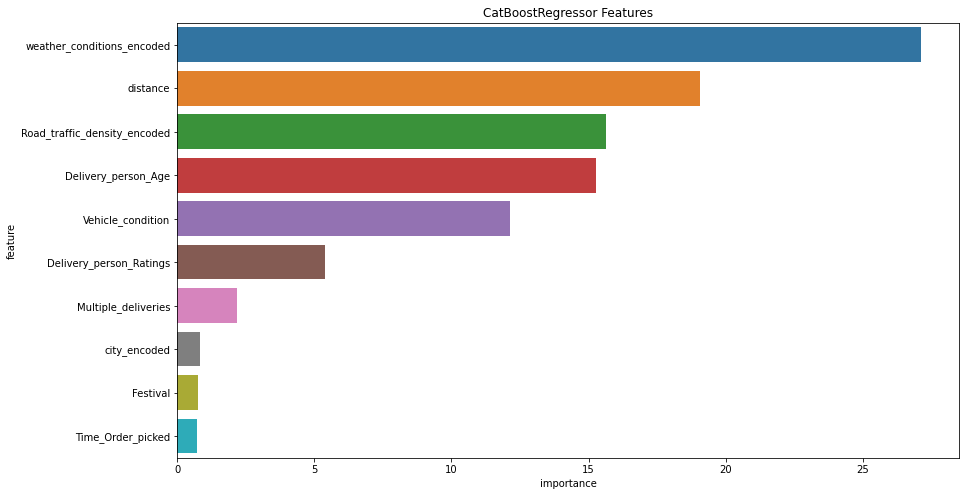

In [444]:
# Plot feature importance
plt.figure(figsize=(14, 8));
sns.barplot(x="importance", 
            y="feature", 
            data=feature_importance_df.sort_values(by="importance", ascending=False));
            
plt.title('CatBoostRegressor Features');

***Inference:*** The CatBoost Regressor Model after Hyperparameter Tuning has given a R2_Score Percentage 83.20%.                                The Highest so far.

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Cohorted Ensemble Models</h2>
</div>


In [445]:
feature_importance_df['feature'].values

array(['weather_conditions_encoded', 'distance',
       'Road_traffic_density_encoded', 'Delivery_person_Age',
       'Vehicle_condition', 'Delivery_person_Ratings',
       'Multiple_deliveries', 'city_encoded', 'Festival',
       'Time_Order_picked'], dtype=object)

In [446]:
# Define the features on which you wish to build the model
submodel = {}
submodel_by_features = ['weather_conditions_encoded', 'Road_traffic_density_encoded', 'Delivery_person_Ratings',
                        'Multiple_deliveries','Vehicle_condition'] 

In [447]:
for feat in submodel_by_features:
    submodel[feat] = {}
    print('Training a sub-model for each {}'.format(feat))
    for feat_value in x_train[feat].unique():
        print('Sub-model for {}={}'.format(feat, feat_value))

        # train and val datasets are used for tuning model parameters
        train_selector = (x_train[feat] == feat_value)
        x_train_subset = x_train.loc[train_selector]
        y_train_subset = y_train[train_selector]

        cbr = CatBoostRegressor(random_state = 100, loss_function='RMSE')
        submodel[feat][feat_value] = cbr.fit(x_train_subset, y_train_subset)

Training a sub-model for each weather_conditions_encoded
Sub-model for weather_conditions_encoded=5.0
Learning rate set to 0.054355
0:	learn: 8.2412984	total: 2.51ms	remaining: 2.51s
1:	learn: 7.9548782	total: 4.84ms	remaining: 2.42s
2:	learn: 7.6714415	total: 6.95ms	remaining: 2.31s
3:	learn: 7.4110909	total: 9.51ms	remaining: 2.37s
4:	learn: 7.1628281	total: 11.6ms	remaining: 2.31s
5:	learn: 6.9340709	total: 13.7ms	remaining: 2.27s
6:	learn: 6.7222411	total: 15.8ms	remaining: 2.23s
7:	learn: 6.5316858	total: 17.8ms	remaining: 2.21s
8:	learn: 6.3430932	total: 19.9ms	remaining: 2.19s
9:	learn: 6.1697114	total: 21.9ms	remaining: 2.16s
10:	learn: 6.0137456	total: 24.2ms	remaining: 2.17s
11:	learn: 5.8722318	total: 26.2ms	remaining: 2.16s
12:	learn: 5.7247421	total: 28.3ms	remaining: 2.15s
13:	learn: 5.5954806	total: 30.4ms	remaining: 2.14s
14:	learn: 5.4755214	total: 32.5ms	remaining: 2.13s
15:	learn: 5.3642796	total: 34.5ms	remaining: 2.12s
16:	learn: 5.2647817	total: 36.6ms	remaining: 

225:	learn: 3.8594334	total: 509ms	remaining: 1.74s
226:	learn: 3.8588810	total: 511ms	remaining: 1.74s
227:	learn: 3.8577385	total: 514ms	remaining: 1.74s
228:	learn: 3.8562052	total: 516ms	remaining: 1.74s
229:	learn: 3.8552920	total: 519ms	remaining: 1.74s
230:	learn: 3.8540956	total: 522ms	remaining: 1.74s
231:	learn: 3.8528924	total: 524ms	remaining: 1.74s
232:	learn: 3.8521385	total: 527ms	remaining: 1.73s
233:	learn: 3.8507618	total: 529ms	remaining: 1.73s
234:	learn: 3.8493791	total: 532ms	remaining: 1.73s
235:	learn: 3.8484009	total: 534ms	remaining: 1.73s
236:	learn: 3.8469520	total: 536ms	remaining: 1.73s
237:	learn: 3.8457468	total: 538ms	remaining: 1.72s
238:	learn: 3.8445790	total: 540ms	remaining: 1.72s
239:	learn: 3.8441968	total: 542ms	remaining: 1.72s
240:	learn: 3.8426383	total: 544ms	remaining: 1.71s
241:	learn: 3.8416029	total: 546ms	remaining: 1.71s
242:	learn: 3.8409230	total: 548ms	remaining: 1.71s
243:	learn: 3.8397494	total: 550ms	remaining: 1.7s
244:	learn: 3

394:	learn: 3.6984100	total: 865ms	remaining: 1.32s
395:	learn: 3.6977946	total: 868ms	remaining: 1.32s
396:	learn: 3.6969536	total: 870ms	remaining: 1.32s
397:	learn: 3.6963069	total: 872ms	remaining: 1.32s
398:	learn: 3.6956846	total: 874ms	remaining: 1.32s
399:	learn: 3.6948049	total: 877ms	remaining: 1.31s
400:	learn: 3.6936133	total: 879ms	remaining: 1.31s
401:	learn: 3.6921759	total: 882ms	remaining: 1.31s
402:	learn: 3.6916415	total: 884ms	remaining: 1.31s
403:	learn: 3.6910164	total: 886ms	remaining: 1.31s
404:	learn: 3.6899342	total: 888ms	remaining: 1.3s
405:	learn: 3.6890745	total: 890ms	remaining: 1.3s
406:	learn: 3.6884686	total: 893ms	remaining: 1.3s
407:	learn: 3.6877686	total: 895ms	remaining: 1.3s
408:	learn: 3.6870901	total: 897ms	remaining: 1.29s
409:	learn: 3.6857455	total: 899ms	remaining: 1.29s
410:	learn: 3.6847266	total: 901ms	remaining: 1.29s
411:	learn: 3.6838366	total: 903ms	remaining: 1.29s
412:	learn: 3.6829451	total: 921ms	remaining: 1.31s
413:	learn: 3.68

556:	learn: 3.5672202	total: 1.23s	remaining: 981ms
557:	learn: 3.5665793	total: 1.24s	remaining: 979ms
558:	learn: 3.5655789	total: 1.24s	remaining: 977ms
559:	learn: 3.5651065	total: 1.24s	remaining: 974ms
560:	learn: 3.5645718	total: 1.24s	remaining: 972ms
561:	learn: 3.5638838	total: 1.24s	remaining: 970ms
562:	learn: 3.5633296	total: 1.25s	remaining: 968ms
563:	learn: 3.5626659	total: 1.25s	remaining: 966ms
564:	learn: 3.5622796	total: 1.25s	remaining: 964ms
565:	learn: 3.5618599	total: 1.25s	remaining: 961ms
566:	learn: 3.5615369	total: 1.25s	remaining: 959ms
567:	learn: 3.5609013	total: 1.26s	remaining: 957ms
568:	learn: 3.5600233	total: 1.26s	remaining: 954ms
569:	learn: 3.5590317	total: 1.26s	remaining: 952ms
570:	learn: 3.5583116	total: 1.26s	remaining: 950ms
571:	learn: 3.5573285	total: 1.27s	remaining: 947ms
572:	learn: 3.5570039	total: 1.27s	remaining: 945ms
573:	learn: 3.5565104	total: 1.27s	remaining: 943ms
574:	learn: 3.5560547	total: 1.27s	remaining: 940ms
575:	learn: 

739:	learn: 3.4467631	total: 1.62s	remaining: 568ms
740:	learn: 3.4462027	total: 1.62s	remaining: 566ms
741:	learn: 3.4457268	total: 1.62s	remaining: 564ms
742:	learn: 3.4453371	total: 1.62s	remaining: 562ms
743:	learn: 3.4446269	total: 1.63s	remaining: 560ms
744:	learn: 3.4441349	total: 1.63s	remaining: 557ms
745:	learn: 3.4433429	total: 1.63s	remaining: 555ms
746:	learn: 3.4427930	total: 1.63s	remaining: 553ms
747:	learn: 3.4414659	total: 1.64s	remaining: 551ms
748:	learn: 3.4410532	total: 1.64s	remaining: 549ms
749:	learn: 3.4406120	total: 1.64s	remaining: 547ms
750:	learn: 3.4396479	total: 1.64s	remaining: 545ms
751:	learn: 3.4388910	total: 1.64s	remaining: 542ms
752:	learn: 3.4381332	total: 1.65s	remaining: 540ms
753:	learn: 3.4378841	total: 1.65s	remaining: 538ms
754:	learn: 3.4370359	total: 1.65s	remaining: 536ms
755:	learn: 3.4364988	total: 1.65s	remaining: 533ms
756:	learn: 3.4357123	total: 1.65s	remaining: 531ms
757:	learn: 3.4352044	total: 1.66s	remaining: 529ms
758:	learn: 

912:	learn: 3.3417222	total: 1.98s	remaining: 188ms
913:	learn: 3.3411958	total: 1.98s	remaining: 186ms
914:	learn: 3.3407113	total: 1.98s	remaining: 184ms
915:	learn: 3.3401954	total: 1.98s	remaining: 182ms
916:	learn: 3.3398513	total: 1.99s	remaining: 180ms
917:	learn: 3.3390507	total: 1.99s	remaining: 178ms
918:	learn: 3.3382636	total: 1.99s	remaining: 175ms
919:	learn: 3.3377397	total: 1.99s	remaining: 173ms
920:	learn: 3.3374373	total: 1.99s	remaining: 171ms
921:	learn: 3.3368374	total: 2s	remaining: 169ms
922:	learn: 3.3360791	total: 2s	remaining: 167ms
923:	learn: 3.3358059	total: 2s	remaining: 165ms
924:	learn: 3.3350881	total: 2s	remaining: 162ms
925:	learn: 3.3345272	total: 2s	remaining: 160ms
926:	learn: 3.3339313	total: 2.01s	remaining: 158ms
927:	learn: 3.3335862	total: 2.01s	remaining: 156ms
928:	learn: 3.3333265	total: 2.01s	remaining: 154ms
929:	learn: 3.3326826	total: 2.01s	remaining: 152ms
930:	learn: 3.3321542	total: 2.02s	remaining: 149ms
931:	learn: 3.3315207	total

85:	learn: 3.6319798	total: 183ms	remaining: 1.95s
86:	learn: 3.6271222	total: 186ms	remaining: 1.95s
87:	learn: 3.6250044	total: 188ms	remaining: 1.95s
88:	learn: 3.6242035	total: 191ms	remaining: 1.95s
89:	learn: 3.6222853	total: 193ms	remaining: 1.95s
90:	learn: 3.6189449	total: 196ms	remaining: 1.96s
91:	learn: 3.6186263	total: 198ms	remaining: 1.95s
92:	learn: 3.6127242	total: 200ms	remaining: 1.95s
93:	learn: 3.6117537	total: 202ms	remaining: 1.95s
94:	learn: 3.6102585	total: 205ms	remaining: 1.95s
95:	learn: 3.6078098	total: 207ms	remaining: 1.95s
96:	learn: 3.6054433	total: 209ms	remaining: 1.94s
97:	learn: 3.6046230	total: 211ms	remaining: 1.94s
98:	learn: 3.6032898	total: 213ms	remaining: 1.94s
99:	learn: 3.6024012	total: 216ms	remaining: 1.94s
100:	learn: 3.5991312	total: 218ms	remaining: 1.94s
101:	learn: 3.5955084	total: 220ms	remaining: 1.93s
102:	learn: 3.5942371	total: 222ms	remaining: 1.93s
103:	learn: 3.5935767	total: 224ms	remaining: 1.93s
104:	learn: 3.5924029	total

265:	learn: 3.4169809	total: 561ms	remaining: 1.55s
266:	learn: 3.4163640	total: 564ms	remaining: 1.55s
267:	learn: 3.4158477	total: 566ms	remaining: 1.54s
268:	learn: 3.4148652	total: 568ms	remaining: 1.54s
269:	learn: 3.4139922	total: 570ms	remaining: 1.54s
270:	learn: 3.4132136	total: 572ms	remaining: 1.54s
271:	learn: 3.4123420	total: 575ms	remaining: 1.54s
272:	learn: 3.4112722	total: 577ms	remaining: 1.54s
273:	learn: 3.4101537	total: 579ms	remaining: 1.53s
274:	learn: 3.4085318	total: 582ms	remaining: 1.53s
275:	learn: 3.4072466	total: 584ms	remaining: 1.53s
276:	learn: 3.4066292	total: 586ms	remaining: 1.53s
277:	learn: 3.4058564	total: 588ms	remaining: 1.53s
278:	learn: 3.4047268	total: 590ms	remaining: 1.52s
279:	learn: 3.4040166	total: 592ms	remaining: 1.52s
280:	learn: 3.4027661	total: 594ms	remaining: 1.52s
281:	learn: 3.4022874	total: 596ms	remaining: 1.52s
282:	learn: 3.4016431	total: 598ms	remaining: 1.51s
283:	learn: 3.4010869	total: 600ms	remaining: 1.51s
284:	learn: 

434:	learn: 3.2729713	total: 918ms	remaining: 1.19s
435:	learn: 3.2724399	total: 921ms	remaining: 1.19s
436:	learn: 3.2713530	total: 923ms	remaining: 1.19s
437:	learn: 3.2710144	total: 925ms	remaining: 1.19s
438:	learn: 3.2700888	total: 927ms	remaining: 1.18s
439:	learn: 3.2690624	total: 929ms	remaining: 1.18s
440:	learn: 3.2683414	total: 931ms	remaining: 1.18s
441:	learn: 3.2673196	total: 933ms	remaining: 1.18s
442:	learn: 3.2660920	total: 936ms	remaining: 1.18s
443:	learn: 3.2649646	total: 938ms	remaining: 1.18s
444:	learn: 3.2647118	total: 941ms	remaining: 1.17s
445:	learn: 3.2641537	total: 943ms	remaining: 1.17s
446:	learn: 3.2636605	total: 945ms	remaining: 1.17s
447:	learn: 3.2631570	total: 947ms	remaining: 1.17s
448:	learn: 3.2624980	total: 948ms	remaining: 1.16s
449:	learn: 3.2618550	total: 951ms	remaining: 1.16s
450:	learn: 3.2611036	total: 953ms	remaining: 1.16s
451:	learn: 3.2603433	total: 955ms	remaining: 1.16s
452:	learn: 3.2595571	total: 957ms	remaining: 1.16s
453:	learn: 

610:	learn: 3.1511607	total: 1.27s	remaining: 812ms
611:	learn: 3.1505039	total: 1.28s	remaining: 810ms
612:	learn: 3.1501951	total: 1.28s	remaining: 808ms
613:	learn: 3.1495276	total: 1.28s	remaining: 806ms
614:	learn: 3.1486526	total: 1.28s	remaining: 804ms
615:	learn: 3.1482655	total: 1.29s	remaining: 802ms
616:	learn: 3.1475314	total: 1.29s	remaining: 800ms
617:	learn: 3.1466137	total: 1.29s	remaining: 798ms
618:	learn: 3.1458129	total: 1.29s	remaining: 797ms
619:	learn: 3.1452524	total: 1.3s	remaining: 795ms
620:	learn: 3.1446229	total: 1.3s	remaining: 793ms
621:	learn: 3.1440635	total: 1.3s	remaining: 790ms
622:	learn: 3.1436633	total: 1.3s	remaining: 788ms
623:	learn: 3.1431019	total: 1.3s	remaining: 786ms
624:	learn: 3.1423166	total: 1.31s	remaining: 784ms
625:	learn: 3.1416123	total: 1.31s	remaining: 782ms
626:	learn: 3.1409933	total: 1.31s	remaining: 780ms
627:	learn: 3.1401568	total: 1.31s	remaining: 777ms
628:	learn: 3.1396669	total: 1.31s	remaining: 775ms
629:	learn: 3.138

782:	learn: 3.0491023	total: 1.63s	remaining: 452ms
783:	learn: 3.0487198	total: 1.63s	remaining: 450ms
784:	learn: 3.0485223	total: 1.64s	remaining: 448ms
785:	learn: 3.0481081	total: 1.64s	remaining: 446ms
786:	learn: 3.0474471	total: 1.64s	remaining: 444ms
787:	learn: 3.0464335	total: 1.64s	remaining: 442ms
788:	learn: 3.0455499	total: 1.65s	remaining: 440ms
789:	learn: 3.0452442	total: 1.65s	remaining: 438ms
790:	learn: 3.0445911	total: 1.65s	remaining: 436ms
791:	learn: 3.0442329	total: 1.65s	remaining: 434ms
792:	learn: 3.0438221	total: 1.65s	remaining: 432ms
793:	learn: 3.0435527	total: 1.66s	remaining: 430ms
794:	learn: 3.0431589	total: 1.66s	remaining: 428ms
795:	learn: 3.0425931	total: 1.66s	remaining: 426ms
796:	learn: 3.0420241	total: 1.66s	remaining: 424ms
797:	learn: 3.0414382	total: 1.66s	remaining: 421ms
798:	learn: 3.0401944	total: 1.67s	remaining: 419ms
799:	learn: 3.0390889	total: 1.67s	remaining: 417ms
800:	learn: 3.0386750	total: 1.67s	remaining: 415ms
801:	learn: 

956:	learn: 2.9607672	total: 1.99s	remaining: 89.4ms
957:	learn: 2.9604819	total: 1.99s	remaining: 87.4ms
958:	learn: 2.9601678	total: 2s	remaining: 85.3ms
959:	learn: 2.9596738	total: 2s	remaining: 83.2ms
960:	learn: 2.9593813	total: 2s	remaining: 81.2ms
961:	learn: 2.9590477	total: 2s	remaining: 79.1ms
962:	learn: 2.9582771	total: 2s	remaining: 77ms
963:	learn: 2.9578849	total: 2.01s	remaining: 74.9ms
964:	learn: 2.9574957	total: 2.01s	remaining: 72.9ms
965:	learn: 2.9570390	total: 2.01s	remaining: 70.8ms
966:	learn: 2.9566060	total: 2.01s	remaining: 68.7ms
967:	learn: 2.9563053	total: 2.01s	remaining: 66.6ms
968:	learn: 2.9559007	total: 2.02s	remaining: 64.5ms
969:	learn: 2.9556264	total: 2.02s	remaining: 62.4ms
970:	learn: 2.9553124	total: 2.02s	remaining: 60.4ms
971:	learn: 2.9550833	total: 2.02s	remaining: 58.3ms
972:	learn: 2.9547107	total: 2.02s	remaining: 56.2ms
973:	learn: 2.9542523	total: 2.03s	remaining: 54.1ms
974:	learn: 2.9538218	total: 2.03s	remaining: 52ms
975:	learn: 

130:	learn: 4.0000950	total: 287ms	remaining: 1.9s
131:	learn: 3.9979703	total: 290ms	remaining: 1.9s
132:	learn: 3.9969493	total: 292ms	remaining: 1.9s
133:	learn: 3.9955051	total: 294ms	remaining: 1.9s
134:	learn: 3.9940793	total: 297ms	remaining: 1.9s
135:	learn: 3.9925921	total: 300ms	remaining: 1.9s
136:	learn: 3.9915286	total: 303ms	remaining: 1.91s
137:	learn: 3.9904404	total: 305ms	remaining: 1.91s
138:	learn: 3.9879770	total: 308ms	remaining: 1.91s
139:	learn: 3.9850366	total: 310ms	remaining: 1.9s
140:	learn: 3.9824380	total: 312ms	remaining: 1.9s
141:	learn: 3.9813885	total: 315ms	remaining: 1.9s
142:	learn: 3.9785446	total: 317ms	remaining: 1.9s
143:	learn: 3.9773396	total: 319ms	remaining: 1.9s
144:	learn: 3.9764892	total: 321ms	remaining: 1.89s
145:	learn: 3.9743271	total: 323ms	remaining: 1.89s
146:	learn: 3.9729337	total: 325ms	remaining: 1.89s
147:	learn: 3.9714089	total: 328ms	remaining: 1.89s
148:	learn: 3.9704384	total: 330ms	remaining: 1.89s
149:	learn: 3.9694343	t

295:	learn: 3.8064768	total: 643ms	remaining: 1.53s
296:	learn: 3.8058100	total: 645ms	remaining: 1.53s
297:	learn: 3.8052181	total: 648ms	remaining: 1.52s
298:	learn: 3.8034460	total: 650ms	remaining: 1.52s
299:	learn: 3.8027038	total: 652ms	remaining: 1.52s
300:	learn: 3.8020806	total: 655ms	remaining: 1.52s
301:	learn: 3.8010596	total: 658ms	remaining: 1.52s
302:	learn: 3.8000789	total: 660ms	remaining: 1.52s
303:	learn: 3.7987709	total: 662ms	remaining: 1.51s
304:	learn: 3.7982743	total: 664ms	remaining: 1.51s
305:	learn: 3.7972540	total: 666ms	remaining: 1.51s
306:	learn: 3.7961455	total: 668ms	remaining: 1.51s
307:	learn: 3.7950598	total: 670ms	remaining: 1.51s
308:	learn: 3.7941335	total: 673ms	remaining: 1.5s
309:	learn: 3.7925088	total: 675ms	remaining: 1.5s
310:	learn: 3.7908496	total: 677ms	remaining: 1.5s
311:	learn: 3.7900484	total: 679ms	remaining: 1.5s
312:	learn: 3.7889857	total: 681ms	remaining: 1.49s
313:	learn: 3.7882622	total: 683ms	remaining: 1.49s
314:	learn: 3.78

464:	learn: 3.6512899	total: 1s	remaining: 1.15s
465:	learn: 3.6508090	total: 1s	remaining: 1.15s
466:	learn: 3.6502013	total: 1.01s	remaining: 1.15s
467:	learn: 3.6494074	total: 1.01s	remaining: 1.15s
468:	learn: 3.6486904	total: 1.01s	remaining: 1.14s
469:	learn: 3.6479705	total: 1.01s	remaining: 1.14s
470:	learn: 3.6474009	total: 1.01s	remaining: 1.14s
471:	learn: 3.6462016	total: 1.02s	remaining: 1.14s
472:	learn: 3.6455831	total: 1.02s	remaining: 1.14s
473:	learn: 3.6446761	total: 1.02s	remaining: 1.13s
474:	learn: 3.6435604	total: 1.02s	remaining: 1.13s
475:	learn: 3.6433056	total: 1.03s	remaining: 1.13s
476:	learn: 3.6424184	total: 1.03s	remaining: 1.13s
477:	learn: 3.6417389	total: 1.03s	remaining: 1.13s
478:	learn: 3.6413289	total: 1.03s	remaining: 1.12s
479:	learn: 3.6402992	total: 1.03s	remaining: 1.12s
480:	learn: 3.6391597	total: 1.04s	remaining: 1.12s
481:	learn: 3.6383617	total: 1.04s	remaining: 1.12s
482:	learn: 3.6370275	total: 1.04s	remaining: 1.11s
483:	learn: 3.6356

628:	learn: 3.5248776	total: 1.36s	remaining: 802ms
629:	learn: 3.5238377	total: 1.36s	remaining: 800ms
630:	learn: 3.5226097	total: 1.36s	remaining: 798ms
631:	learn: 3.5221067	total: 1.37s	remaining: 796ms
632:	learn: 3.5213413	total: 1.37s	remaining: 793ms
633:	learn: 3.5210684	total: 1.37s	remaining: 791ms
634:	learn: 3.5207003	total: 1.37s	remaining: 789ms
635:	learn: 3.5200264	total: 1.38s	remaining: 787ms
636:	learn: 3.5192032	total: 1.38s	remaining: 785ms
637:	learn: 3.5186963	total: 1.38s	remaining: 783ms
638:	learn: 3.5183043	total: 1.38s	remaining: 781ms
639:	learn: 3.5176801	total: 1.38s	remaining: 778ms
640:	learn: 3.5173813	total: 1.39s	remaining: 776ms
641:	learn: 3.5165760	total: 1.39s	remaining: 774ms
642:	learn: 3.5158705	total: 1.39s	remaining: 772ms
643:	learn: 3.5151493	total: 1.39s	remaining: 770ms
644:	learn: 3.5143574	total: 1.39s	remaining: 768ms
645:	learn: 3.5136335	total: 1.4s	remaining: 765ms
646:	learn: 3.5127624	total: 1.4s	remaining: 763ms
647:	learn: 3.

800:	learn: 3.4067711	total: 1.72s	remaining: 428ms
801:	learn: 3.4059890	total: 1.72s	remaining: 426ms
802:	learn: 3.4049617	total: 1.73s	remaining: 423ms
803:	learn: 3.4042119	total: 1.73s	remaining: 421ms
804:	learn: 3.4035927	total: 1.73s	remaining: 419ms
805:	learn: 3.4031647	total: 1.73s	remaining: 417ms
806:	learn: 3.4027107	total: 1.74s	remaining: 415ms
807:	learn: 3.4022895	total: 1.74s	remaining: 413ms
808:	learn: 3.4018896	total: 1.74s	remaining: 411ms
809:	learn: 3.4017263	total: 1.74s	remaining: 409ms
810:	learn: 3.4004695	total: 1.74s	remaining: 407ms
811:	learn: 3.4000840	total: 1.75s	remaining: 404ms
812:	learn: 3.3992196	total: 1.75s	remaining: 402ms
813:	learn: 3.3986555	total: 1.75s	remaining: 400ms
814:	learn: 3.3982664	total: 1.75s	remaining: 398ms
815:	learn: 3.3978117	total: 1.75s	remaining: 396ms
816:	learn: 3.3974311	total: 1.76s	remaining: 394ms
817:	learn: 3.3969440	total: 1.76s	remaining: 392ms
818:	learn: 3.3960013	total: 1.76s	remaining: 389ms
819:	learn: 

969:	learn: 3.3039219	total: 2.08s	remaining: 64.2ms
970:	learn: 3.3028897	total: 2.08s	remaining: 62.1ms
971:	learn: 3.3022852	total: 2.08s	remaining: 59.9ms
972:	learn: 3.3019013	total: 2.08s	remaining: 57.8ms
973:	learn: 3.3012278	total: 2.08s	remaining: 55.7ms
974:	learn: 3.3003837	total: 2.09s	remaining: 53.5ms
975:	learn: 3.2998734	total: 2.09s	remaining: 51.4ms
976:	learn: 3.2990229	total: 2.09s	remaining: 49.3ms
977:	learn: 3.2982193	total: 2.1s	remaining: 47.1ms
978:	learn: 3.2976006	total: 2.1s	remaining: 45ms
979:	learn: 3.2971241	total: 2.1s	remaining: 42.9ms
980:	learn: 3.2968166	total: 2.1s	remaining: 40.7ms
981:	learn: 3.2963093	total: 2.1s	remaining: 38.6ms
982:	learn: 3.2958057	total: 2.11s	remaining: 36.4ms
983:	learn: 3.2954985	total: 2.11s	remaining: 34.3ms
984:	learn: 3.2948136	total: 2.11s	remaining: 32.1ms
985:	learn: 3.2941625	total: 2.11s	remaining: 30ms
986:	learn: 3.2929591	total: 2.11s	remaining: 27.8ms
987:	learn: 3.2921966	total: 2.12s	remaining: 25.7ms
98

143:	learn: 3.2052282	total: 311ms	remaining: 1.85s
144:	learn: 3.2043668	total: 314ms	remaining: 1.85s
145:	learn: 3.2031925	total: 316ms	remaining: 1.85s
146:	learn: 3.2018027	total: 318ms	remaining: 1.85s
147:	learn: 3.2009833	total: 321ms	remaining: 1.84s
148:	learn: 3.1998322	total: 323ms	remaining: 1.84s
149:	learn: 3.1997911	total: 324ms	remaining: 1.84s
150:	learn: 3.1986892	total: 327ms	remaining: 1.84s
151:	learn: 3.1972896	total: 329ms	remaining: 1.83s
152:	learn: 3.1962591	total: 331ms	remaining: 1.83s
153:	learn: 3.1944089	total: 333ms	remaining: 1.83s
154:	learn: 3.1937430	total: 335ms	remaining: 1.83s
155:	learn: 3.1930888	total: 338ms	remaining: 1.83s
156:	learn: 3.1921250	total: 340ms	remaining: 1.82s
157:	learn: 3.1909637	total: 342ms	remaining: 1.82s
158:	learn: 3.1901595	total: 344ms	remaining: 1.82s
159:	learn: 3.1898172	total: 346ms	remaining: 1.82s
160:	learn: 3.1884633	total: 348ms	remaining: 1.81s
161:	learn: 3.1880333	total: 350ms	remaining: 1.81s
162:	learn: 

312:	learn: 3.0469469	total: 670ms	remaining: 1.47s
313:	learn: 3.0460995	total: 673ms	remaining: 1.47s
314:	learn: 3.0457422	total: 675ms	remaining: 1.47s
315:	learn: 3.0448522	total: 678ms	remaining: 1.47s
316:	learn: 3.0440147	total: 680ms	remaining: 1.47s
317:	learn: 3.0433431	total: 683ms	remaining: 1.46s
318:	learn: 3.0427641	total: 685ms	remaining: 1.46s
319:	learn: 3.0415767	total: 688ms	remaining: 1.46s
320:	learn: 3.0407946	total: 690ms	remaining: 1.46s
321:	learn: 3.0400255	total: 692ms	remaining: 1.46s
322:	learn: 3.0394186	total: 694ms	remaining: 1.45s
323:	learn: 3.0387026	total: 696ms	remaining: 1.45s
324:	learn: 3.0373581	total: 699ms	remaining: 1.45s
325:	learn: 3.0356365	total: 701ms	remaining: 1.45s
326:	learn: 3.0352308	total: 703ms	remaining: 1.45s
327:	learn: 3.0337010	total: 705ms	remaining: 1.44s
328:	learn: 3.0327594	total: 707ms	remaining: 1.44s
329:	learn: 3.0317534	total: 709ms	remaining: 1.44s
330:	learn: 3.0304408	total: 711ms	remaining: 1.44s
331:	learn: 

478:	learn: 2.9277943	total: 1.03s	remaining: 1.12s
479:	learn: 2.9270854	total: 1.03s	remaining: 1.11s
480:	learn: 2.9266557	total: 1.03s	remaining: 1.11s
481:	learn: 2.9260927	total: 1.03s	remaining: 1.11s
482:	learn: 2.9254510	total: 1.04s	remaining: 1.11s
483:	learn: 2.9248531	total: 1.04s	remaining: 1.11s
484:	learn: 2.9242146	total: 1.04s	remaining: 1.1s
485:	learn: 2.9237291	total: 1.04s	remaining: 1.1s
486:	learn: 2.9225260	total: 1.05s	remaining: 1.1s
487:	learn: 2.9220559	total: 1.05s	remaining: 1.1s
488:	learn: 2.9212225	total: 1.05s	remaining: 1.1s
489:	learn: 2.9202077	total: 1.05s	remaining: 1.09s
490:	learn: 2.9192557	total: 1.05s	remaining: 1.09s
491:	learn: 2.9188199	total: 1.06s	remaining: 1.09s
492:	learn: 2.9183925	total: 1.06s	remaining: 1.09s
493:	learn: 2.9173954	total: 1.06s	remaining: 1.09s
494:	learn: 2.9168263	total: 1.06s	remaining: 1.08s
495:	learn: 2.9162711	total: 1.06s	remaining: 1.08s
496:	learn: 2.9157004	total: 1.07s	remaining: 1.08s
497:	learn: 2.914

649:	learn: 2.8322501	total: 1.39s	remaining: 746ms
650:	learn: 2.8320228	total: 1.39s	remaining: 744ms
651:	learn: 2.8316107	total: 1.39s	remaining: 742ms
652:	learn: 2.8311469	total: 1.39s	remaining: 740ms
653:	learn: 2.8307011	total: 1.4s	remaining: 738ms
654:	learn: 2.8304552	total: 1.4s	remaining: 736ms
655:	learn: 2.8295328	total: 1.4s	remaining: 734ms
656:	learn: 2.8288992	total: 1.4s	remaining: 732ms
657:	learn: 2.8282948	total: 1.4s	remaining: 730ms
658:	learn: 2.8278309	total: 1.41s	remaining: 728ms
659:	learn: 2.8273581	total: 1.41s	remaining: 726ms
660:	learn: 2.8266929	total: 1.41s	remaining: 724ms
661:	learn: 2.8260310	total: 1.41s	remaining: 722ms
662:	learn: 2.8256272	total: 1.42s	remaining: 719ms
663:	learn: 2.8250024	total: 1.42s	remaining: 717ms
664:	learn: 2.8240723	total: 1.42s	remaining: 715ms
665:	learn: 2.8238667	total: 1.42s	remaining: 713ms
666:	learn: 2.8232678	total: 1.42s	remaining: 711ms
667:	learn: 2.8228141	total: 1.43s	remaining: 709ms
668:	learn: 2.822

820:	learn: 2.7425744	total: 1.74s	remaining: 380ms
821:	learn: 2.7422325	total: 1.75s	remaining: 378ms
822:	learn: 2.7418524	total: 1.75s	remaining: 376ms
823:	learn: 2.7414586	total: 1.75s	remaining: 374ms
824:	learn: 2.7406762	total: 1.76s	remaining: 373ms
825:	learn: 2.7402550	total: 1.76s	remaining: 371ms
826:	learn: 2.7400326	total: 1.76s	remaining: 368ms
827:	learn: 2.7392577	total: 1.76s	remaining: 367ms
828:	learn: 2.7388535	total: 1.77s	remaining: 365ms
829:	learn: 2.7386497	total: 1.77s	remaining: 363ms
830:	learn: 2.7382871	total: 1.77s	remaining: 361ms
831:	learn: 2.7379052	total: 1.77s	remaining: 359ms
832:	learn: 2.7372012	total: 1.78s	remaining: 356ms
833:	learn: 2.7369200	total: 1.78s	remaining: 354ms
834:	learn: 2.7364299	total: 1.78s	remaining: 352ms
835:	learn: 2.7358739	total: 1.78s	remaining: 350ms
836:	learn: 2.7352169	total: 1.79s	remaining: 348ms
837:	learn: 2.7347700	total: 1.79s	remaining: 346ms
838:	learn: 2.7341246	total: 1.79s	remaining: 344ms
839:	learn: 

994:	learn: 2.6650829	total: 2.12s	remaining: 10.6ms
995:	learn: 2.6645637	total: 2.12s	remaining: 8.5ms
996:	learn: 2.6641245	total: 2.12s	remaining: 6.38ms
997:	learn: 2.6635772	total: 2.12s	remaining: 4.25ms
998:	learn: 2.6629640	total: 2.12s	remaining: 2.13ms
999:	learn: 2.6626928	total: 2.13s	remaining: 0us
Sub-model for weather_conditions_encoded=2.0
Learning rate set to 0.055059
0:	learn: 9.6000616	total: 2.2ms	remaining: 2.19s
1:	learn: 9.2064077	total: 4.48ms	remaining: 2.23s
2:	learn: 8.8667917	total: 6.94ms	remaining: 2.31s
3:	learn: 8.5142099	total: 9.12ms	remaining: 2.27s
4:	learn: 8.2007646	total: 11.2ms	remaining: 2.23s
5:	learn: 7.9082332	total: 13.6ms	remaining: 2.26s
6:	learn: 7.6229661	total: 15.8ms	remaining: 2.24s
7:	learn: 7.3553900	total: 18ms	remaining: 2.23s
8:	learn: 7.1047348	total: 20.4ms	remaining: 2.24s
9:	learn: 6.8694986	total: 22.5ms	remaining: 2.23s
10:	learn: 6.6687384	total: 24.7ms	remaining: 2.22s
11:	learn: 6.4781925	total: 26.9ms	remaining: 2.22s


163:	learn: 3.6305526	total: 362ms	remaining: 1.84s
164:	learn: 3.6280994	total: 365ms	remaining: 1.84s
165:	learn: 3.6263825	total: 367ms	remaining: 1.84s
166:	learn: 3.6254787	total: 369ms	remaining: 1.84s
167:	learn: 3.6244625	total: 371ms	remaining: 1.84s
168:	learn: 3.6224846	total: 374ms	remaining: 1.84s
169:	learn: 3.6212832	total: 377ms	remaining: 1.84s
170:	learn: 3.6201359	total: 380ms	remaining: 1.84s
171:	learn: 3.6190343	total: 383ms	remaining: 1.84s
172:	learn: 3.6175977	total: 386ms	remaining: 1.84s
173:	learn: 3.6165470	total: 389ms	remaining: 1.85s
174:	learn: 3.6132408	total: 392ms	remaining: 1.85s
175:	learn: 3.6120274	total: 395ms	remaining: 1.85s
176:	learn: 3.6102589	total: 398ms	remaining: 1.85s
177:	learn: 3.6093836	total: 400ms	remaining: 1.85s
178:	learn: 3.6080228	total: 403ms	remaining: 1.85s
179:	learn: 3.6066628	total: 405ms	remaining: 1.85s
180:	learn: 3.6044733	total: 408ms	remaining: 1.85s
181:	learn: 3.6026571	total: 410ms	remaining: 1.84s
182:	learn: 

327:	learn: 3.4367248	total: 721ms	remaining: 1.48s
328:	learn: 3.4358145	total: 723ms	remaining: 1.48s
329:	learn: 3.4351240	total: 725ms	remaining: 1.47s
330:	learn: 3.4339033	total: 728ms	remaining: 1.47s
331:	learn: 3.4330639	total: 730ms	remaining: 1.47s
332:	learn: 3.4324391	total: 733ms	remaining: 1.47s
333:	learn: 3.4319444	total: 736ms	remaining: 1.47s
334:	learn: 3.4314662	total: 738ms	remaining: 1.47s
335:	learn: 3.4304045	total: 740ms	remaining: 1.46s
336:	learn: 3.4295862	total: 742ms	remaining: 1.46s
337:	learn: 3.4288258	total: 744ms	remaining: 1.46s
338:	learn: 3.4276006	total: 747ms	remaining: 1.46s
339:	learn: 3.4266619	total: 749ms	remaining: 1.45s
340:	learn: 3.4253127	total: 751ms	remaining: 1.45s
341:	learn: 3.4246286	total: 753ms	remaining: 1.45s
342:	learn: 3.4230601	total: 755ms	remaining: 1.45s
343:	learn: 3.4224048	total: 757ms	remaining: 1.44s
344:	learn: 3.4210853	total: 759ms	remaining: 1.44s
345:	learn: 3.4204299	total: 762ms	remaining: 1.44s
346:	learn: 

510:	learn: 3.2893823	total: 1.1s	remaining: 1.06s
511:	learn: 3.2888787	total: 1.11s	remaining: 1.05s
512:	learn: 3.2884176	total: 1.11s	remaining: 1.05s
513:	learn: 3.2873428	total: 1.11s	remaining: 1.05s
514:	learn: 3.2867195	total: 1.11s	remaining: 1.05s
515:	learn: 3.2858293	total: 1.12s	remaining: 1.05s
516:	learn: 3.2850913	total: 1.12s	remaining: 1.04s
517:	learn: 3.2845260	total: 1.12s	remaining: 1.04s
518:	learn: 3.2842429	total: 1.12s	remaining: 1.04s
519:	learn: 3.2834511	total: 1.13s	remaining: 1.04s
520:	learn: 3.2829206	total: 1.13s	remaining: 1.04s
521:	learn: 3.2820285	total: 1.13s	remaining: 1.03s
522:	learn: 3.2812494	total: 1.13s	remaining: 1.03s
523:	learn: 3.2803597	total: 1.14s	remaining: 1.03s
524:	learn: 3.2795740	total: 1.14s	remaining: 1.03s
525:	learn: 3.2787094	total: 1.14s	remaining: 1.03s
526:	learn: 3.2783454	total: 1.14s	remaining: 1.02s
527:	learn: 3.2777705	total: 1.14s	remaining: 1.02s
528:	learn: 3.2768582	total: 1.15s	remaining: 1.02s
529:	learn: 3

682:	learn: 3.1698469	total: 1.47s	remaining: 684ms
683:	learn: 3.1695864	total: 1.48s	remaining: 682ms
684:	learn: 3.1693823	total: 1.48s	remaining: 680ms
685:	learn: 3.1687951	total: 1.48s	remaining: 678ms
686:	learn: 3.1685328	total: 1.48s	remaining: 676ms
687:	learn: 3.1676469	total: 1.49s	remaining: 674ms
688:	learn: 3.1669929	total: 1.49s	remaining: 672ms
689:	learn: 3.1664909	total: 1.49s	remaining: 670ms
690:	learn: 3.1656985	total: 1.49s	remaining: 668ms
691:	learn: 3.1645270	total: 1.5s	remaining: 666ms
692:	learn: 3.1635112	total: 1.5s	remaining: 663ms
693:	learn: 3.1623107	total: 1.5s	remaining: 661ms
694:	learn: 3.1614648	total: 1.5s	remaining: 659ms
695:	learn: 3.1602530	total: 1.5s	remaining: 657ms
696:	learn: 3.1597597	total: 1.51s	remaining: 655ms
697:	learn: 3.1595097	total: 1.51s	remaining: 653ms
698:	learn: 3.1591182	total: 1.51s	remaining: 650ms
699:	learn: 3.1586622	total: 1.51s	remaining: 648ms
700:	learn: 3.1581987	total: 1.51s	remaining: 646ms
701:	learn: 3.157

847:	learn: 3.0694989	total: 1.83s	remaining: 327ms
848:	learn: 3.0691967	total: 1.83s	remaining: 325ms
849:	learn: 3.0682787	total: 1.83s	remaining: 323ms
850:	learn: 3.0677813	total: 1.83s	remaining: 321ms
851:	learn: 3.0670700	total: 1.84s	remaining: 319ms
852:	learn: 3.0666522	total: 1.84s	remaining: 317ms
853:	learn: 3.0664174	total: 1.84s	remaining: 315ms
854:	learn: 3.0658718	total: 1.84s	remaining: 313ms
855:	learn: 3.0656001	total: 1.84s	remaining: 310ms
856:	learn: 3.0650432	total: 1.85s	remaining: 308ms
857:	learn: 3.0647583	total: 1.85s	remaining: 306ms
858:	learn: 3.0642290	total: 1.85s	remaining: 304ms
859:	learn: 3.0639333	total: 1.85s	remaining: 302ms
860:	learn: 3.0637239	total: 1.85s	remaining: 300ms
861:	learn: 3.0627544	total: 1.86s	remaining: 297ms
862:	learn: 3.0626135	total: 1.86s	remaining: 295ms
863:	learn: 3.0616401	total: 1.86s	remaining: 293ms
864:	learn: 3.0610016	total: 1.86s	remaining: 291ms
865:	learn: 3.0602553	total: 1.87s	remaining: 289ms
866:	learn: 

54:	learn: 4.1293816	total: 115ms	remaining: 1.97s
55:	learn: 4.1229972	total: 117ms	remaining: 1.98s
56:	learn: 4.1179113	total: 120ms	remaining: 1.98s
57:	learn: 4.1145452	total: 122ms	remaining: 1.98s
58:	learn: 4.1088014	total: 125ms	remaining: 1.99s
59:	learn: 4.1038136	total: 127ms	remaining: 1.99s
60:	learn: 4.1002482	total: 130ms	remaining: 2s
61:	learn: 4.0934552	total: 133ms	remaining: 2.01s
62:	learn: 4.0896529	total: 135ms	remaining: 2.01s
63:	learn: 4.0871177	total: 137ms	remaining: 2.01s
64:	learn: 4.0825957	total: 140ms	remaining: 2.01s
65:	learn: 4.0787962	total: 142ms	remaining: 2.01s
66:	learn: 4.0756354	total: 144ms	remaining: 2s
67:	learn: 4.0722854	total: 146ms	remaining: 2s
68:	learn: 4.0699806	total: 148ms	remaining: 2s
69:	learn: 4.0674678	total: 150ms	remaining: 2s
70:	learn: 4.0658217	total: 153ms	remaining: 2s
71:	learn: 4.0623215	total: 155ms	remaining: 1.99s
72:	learn: 4.0578901	total: 157ms	remaining: 1.99s
73:	learn: 4.0560247	total: 159ms	remaining: 1.99

226:	learn: 3.8553229	total: 479ms	remaining: 1.63s
227:	learn: 3.8545468	total: 482ms	remaining: 1.63s
228:	learn: 3.8533613	total: 484ms	remaining: 1.63s
229:	learn: 3.8523670	total: 486ms	remaining: 1.63s
230:	learn: 3.8514148	total: 489ms	remaining: 1.63s
231:	learn: 3.8507236	total: 491ms	remaining: 1.63s
232:	learn: 3.8491680	total: 494ms	remaining: 1.63s
233:	learn: 3.8478867	total: 496ms	remaining: 1.62s
234:	learn: 3.8470055	total: 499ms	remaining: 1.62s
235:	learn: 3.8454338	total: 501ms	remaining: 1.62s
236:	learn: 3.8436079	total: 503ms	remaining: 1.62s
237:	learn: 3.8428207	total: 505ms	remaining: 1.61s
238:	learn: 3.8420854	total: 507ms	remaining: 1.61s
239:	learn: 3.8403307	total: 509ms	remaining: 1.61s
240:	learn: 3.8388533	total: 511ms	remaining: 1.61s
241:	learn: 3.8375080	total: 513ms	remaining: 1.61s
242:	learn: 3.8360862	total: 515ms	remaining: 1.6s
243:	learn: 3.8347075	total: 517ms	remaining: 1.6s
244:	learn: 3.8338351	total: 519ms	remaining: 1.6s
245:	learn: 3.8

396:	learn: 3.6906796	total: 838ms	remaining: 1.27s
397:	learn: 3.6895639	total: 841ms	remaining: 1.27s
398:	learn: 3.6882994	total: 843ms	remaining: 1.27s
399:	learn: 3.6874858	total: 845ms	remaining: 1.27s
400:	learn: 3.6864722	total: 847ms	remaining: 1.26s
401:	learn: 3.6856817	total: 850ms	remaining: 1.26s
402:	learn: 3.6851137	total: 852ms	remaining: 1.26s
403:	learn: 3.6846214	total: 854ms	remaining: 1.26s
404:	learn: 3.6839432	total: 857ms	remaining: 1.26s
405:	learn: 3.6826496	total: 859ms	remaining: 1.26s
406:	learn: 3.6812640	total: 862ms	remaining: 1.25s
407:	learn: 3.6804172	total: 863ms	remaining: 1.25s
408:	learn: 3.6797091	total: 881ms	remaining: 1.27s
409:	learn: 3.6791944	total: 884ms	remaining: 1.27s
410:	learn: 3.6783569	total: 886ms	remaining: 1.27s
411:	learn: 3.6780975	total: 888ms	remaining: 1.27s
412:	learn: 3.6772137	total: 891ms	remaining: 1.26s
413:	learn: 3.6765381	total: 893ms	remaining: 1.26s
414:	learn: 3.6761191	total: 895ms	remaining: 1.26s
415:	learn: 

559:	learn: 3.5669813	total: 1.2s	remaining: 940ms
560:	learn: 3.5661554	total: 1.2s	remaining: 938ms
561:	learn: 3.5658062	total: 1.2s	remaining: 936ms
562:	learn: 3.5652156	total: 1.2s	remaining: 934ms
563:	learn: 3.5647435	total: 1.21s	remaining: 932ms
564:	learn: 3.5644703	total: 1.21s	remaining: 930ms
565:	learn: 3.5633134	total: 1.21s	remaining: 928ms
566:	learn: 3.5628865	total: 1.21s	remaining: 926ms
567:	learn: 3.5617267	total: 1.22s	remaining: 924ms
568:	learn: 3.5614032	total: 1.22s	remaining: 922ms
569:	learn: 3.5608767	total: 1.22s	remaining: 920ms
570:	learn: 3.5600342	total: 1.22s	remaining: 918ms
571:	learn: 3.5594601	total: 1.22s	remaining: 916ms
572:	learn: 3.5589077	total: 1.23s	remaining: 913ms
573:	learn: 3.5583063	total: 1.23s	remaining: 911ms
574:	learn: 3.5578731	total: 1.23s	remaining: 909ms
575:	learn: 3.5575431	total: 1.23s	remaining: 907ms
576:	learn: 3.5566693	total: 1.23s	remaining: 904ms
577:	learn: 3.5559292	total: 1.24s	remaining: 902ms
578:	learn: 3.55

729:	learn: 3.4564186	total: 1.55s	remaining: 574ms
730:	learn: 3.4557879	total: 1.55s	remaining: 572ms
731:	learn: 3.4550008	total: 1.56s	remaining: 570ms
732:	learn: 3.4545028	total: 1.56s	remaining: 568ms
733:	learn: 3.4535593	total: 1.56s	remaining: 566ms
734:	learn: 3.4532344	total: 1.56s	remaining: 564ms
735:	learn: 3.4529419	total: 1.56s	remaining: 562ms
736:	learn: 3.4517202	total: 1.57s	remaining: 560ms
737:	learn: 3.4514831	total: 1.57s	remaining: 558ms
738:	learn: 3.4507643	total: 1.57s	remaining: 556ms
739:	learn: 3.4503541	total: 1.57s	remaining: 553ms
740:	learn: 3.4499538	total: 1.58s	remaining: 551ms
741:	learn: 3.4488008	total: 1.58s	remaining: 549ms
742:	learn: 3.4478419	total: 1.58s	remaining: 547ms
743:	learn: 3.4471130	total: 1.58s	remaining: 545ms
744:	learn: 3.4465019	total: 1.58s	remaining: 543ms
745:	learn: 3.4458043	total: 1.59s	remaining: 541ms
746:	learn: 3.4454113	total: 1.59s	remaining: 538ms
747:	learn: 3.4449265	total: 1.59s	remaining: 536ms
748:	learn: 

898:	learn: 3.3537593	total: 1.91s	remaining: 215ms
899:	learn: 3.3530539	total: 1.91s	remaining: 213ms
900:	learn: 3.3525399	total: 1.92s	remaining: 210ms
901:	learn: 3.3510854	total: 1.92s	remaining: 208ms
902:	learn: 3.3504861	total: 1.92s	remaining: 206ms
903:	learn: 3.3497378	total: 1.92s	remaining: 204ms
904:	learn: 3.3489289	total: 1.92s	remaining: 202ms
905:	learn: 3.3479726	total: 1.93s	remaining: 200ms
906:	learn: 3.3473090	total: 1.93s	remaining: 198ms
907:	learn: 3.3470442	total: 1.93s	remaining: 196ms
908:	learn: 3.3467717	total: 1.93s	remaining: 193ms
909:	learn: 3.3459779	total: 1.93s	remaining: 191ms
910:	learn: 3.3455943	total: 1.94s	remaining: 189ms
911:	learn: 3.3445474	total: 1.94s	remaining: 187ms
912:	learn: 3.3438502	total: 1.94s	remaining: 185ms
913:	learn: 3.3435173	total: 1.94s	remaining: 183ms
914:	learn: 3.3432764	total: 1.94s	remaining: 181ms
915:	learn: 3.3427670	total: 1.95s	remaining: 179ms
916:	learn: 3.3422514	total: 1.95s	remaining: 176ms
917:	learn: 

61:	learn: 4.3209903	total: 184ms	remaining: 2.78s
62:	learn: 4.3157267	total: 187ms	remaining: 2.79s
63:	learn: 4.3126298	total: 191ms	remaining: 2.79s
64:	learn: 4.3070455	total: 194ms	remaining: 2.79s
65:	learn: 4.3066056	total: 196ms	remaining: 2.77s
66:	learn: 4.3038288	total: 199ms	remaining: 2.78s
67:	learn: 4.3005682	total: 203ms	remaining: 2.78s
68:	learn: 4.2982496	total: 206ms	remaining: 2.77s
69:	learn: 4.2953026	total: 209ms	remaining: 2.77s
70:	learn: 4.2922755	total: 212ms	remaining: 2.77s
71:	learn: 4.2891579	total: 215ms	remaining: 2.77s
72:	learn: 4.2864140	total: 218ms	remaining: 2.77s
73:	learn: 4.2831505	total: 221ms	remaining: 2.76s
74:	learn: 4.2809857	total: 224ms	remaining: 2.76s
75:	learn: 4.2764277	total: 227ms	remaining: 2.76s
76:	learn: 4.2724864	total: 230ms	remaining: 2.76s
77:	learn: 4.2709112	total: 233ms	remaining: 2.76s
78:	learn: 4.2681210	total: 236ms	remaining: 2.75s
79:	learn: 4.2671827	total: 239ms	remaining: 2.75s
80:	learn: 4.2649174	total: 242

239:	learn: 4.0758612	total: 721ms	remaining: 2.28s
240:	learn: 4.0754862	total: 724ms	remaining: 2.28s
241:	learn: 4.0748252	total: 727ms	remaining: 2.28s
242:	learn: 4.0736861	total: 730ms	remaining: 2.27s
243:	learn: 4.0724728	total: 733ms	remaining: 2.27s
244:	learn: 4.0717078	total: 736ms	remaining: 2.27s
245:	learn: 4.0703930	total: 740ms	remaining: 2.27s
246:	learn: 4.0697949	total: 743ms	remaining: 2.27s
247:	learn: 4.0685089	total: 746ms	remaining: 2.26s
248:	learn: 4.0670180	total: 749ms	remaining: 2.26s
249:	learn: 4.0661497	total: 752ms	remaining: 2.26s
250:	learn: 4.0640207	total: 755ms	remaining: 2.25s
251:	learn: 4.0625916	total: 758ms	remaining: 2.25s
252:	learn: 4.0621489	total: 761ms	remaining: 2.25s
253:	learn: 4.0613873	total: 764ms	remaining: 2.24s
254:	learn: 4.0602091	total: 767ms	remaining: 2.24s
255:	learn: 4.0595048	total: 770ms	remaining: 2.24s
256:	learn: 4.0588669	total: 772ms	remaining: 2.23s
257:	learn: 4.0581395	total: 775ms	remaining: 2.23s
258:	learn: 

422:	learn: 3.9204772	total: 1.26s	remaining: 1.72s
423:	learn: 3.9197402	total: 1.26s	remaining: 1.72s
424:	learn: 3.9189694	total: 1.27s	remaining: 1.71s
425:	learn: 3.9181127	total: 1.27s	remaining: 1.71s
426:	learn: 3.9174052	total: 1.27s	remaining: 1.71s
427:	learn: 3.9162589	total: 1.28s	remaining: 1.71s
428:	learn: 3.9153817	total: 1.28s	remaining: 1.7s
429:	learn: 3.9145798	total: 1.28s	remaining: 1.7s
430:	learn: 3.9134261	total: 1.29s	remaining: 1.7s
431:	learn: 3.9127079	total: 1.29s	remaining: 1.7s
432:	learn: 3.9119415	total: 1.29s	remaining: 1.69s
433:	learn: 3.9113374	total: 1.29s	remaining: 1.69s
434:	learn: 3.9107156	total: 1.3s	remaining: 1.69s
435:	learn: 3.9101945	total: 1.3s	remaining: 1.68s
436:	learn: 3.9096892	total: 1.3s	remaining: 1.68s
437:	learn: 3.9090524	total: 1.31s	remaining: 1.68s
438:	learn: 3.9085149	total: 1.31s	remaining: 1.67s
439:	learn: 3.9078490	total: 1.31s	remaining: 1.67s
440:	learn: 3.9072274	total: 1.31s	remaining: 1.67s
441:	learn: 3.90615

615:	learn: 3.7905607	total: 1.83s	remaining: 1.14s
616:	learn: 3.7901104	total: 1.83s	remaining: 1.14s
617:	learn: 3.7897079	total: 1.83s	remaining: 1.13s
618:	learn: 3.7892243	total: 1.84s	remaining: 1.13s
619:	learn: 3.7887468	total: 1.84s	remaining: 1.13s
620:	learn: 3.7880693	total: 1.84s	remaining: 1.13s
621:	learn: 3.7874581	total: 1.85s	remaining: 1.12s
622:	learn: 3.7866589	total: 1.85s	remaining: 1.12s
623:	learn: 3.7857043	total: 1.85s	remaining: 1.12s
624:	learn: 3.7849417	total: 1.86s	remaining: 1.11s
625:	learn: 3.7844640	total: 1.86s	remaining: 1.11s
626:	learn: 3.7840056	total: 1.86s	remaining: 1.11s
627:	learn: 3.7835714	total: 1.86s	remaining: 1.1s
628:	learn: 3.7829132	total: 1.87s	remaining: 1.1s
629:	learn: 3.7826257	total: 1.87s	remaining: 1.1s
630:	learn: 3.7819238	total: 1.87s	remaining: 1.09s
631:	learn: 3.7815498	total: 1.88s	remaining: 1.09s
632:	learn: 3.7805573	total: 1.88s	remaining: 1.09s
633:	learn: 3.7801604	total: 1.88s	remaining: 1.09s
634:	learn: 3.7

805:	learn: 3.6778365	total: 2.38s	remaining: 572ms
806:	learn: 3.6771813	total: 2.38s	remaining: 570ms
807:	learn: 3.6766302	total: 2.38s	remaining: 567ms
808:	learn: 3.6758825	total: 2.39s	remaining: 564ms
809:	learn: 3.6752955	total: 2.39s	remaining: 561ms
810:	learn: 3.6745806	total: 2.4s	remaining: 558ms
811:	learn: 3.6741192	total: 2.4s	remaining: 555ms
812:	learn: 3.6737526	total: 2.4s	remaining: 553ms
813:	learn: 3.6728757	total: 2.41s	remaining: 550ms
814:	learn: 3.6723347	total: 2.41s	remaining: 547ms
815:	learn: 3.6716581	total: 2.41s	remaining: 544ms
816:	learn: 3.6711643	total: 2.42s	remaining: 542ms
817:	learn: 3.6704726	total: 2.42s	remaining: 539ms
818:	learn: 3.6700132	total: 2.42s	remaining: 536ms
819:	learn: 3.6694513	total: 2.43s	remaining: 533ms
820:	learn: 3.6689808	total: 2.43s	remaining: 530ms
821:	learn: 3.6684938	total: 2.43s	remaining: 527ms
822:	learn: 3.6679303	total: 2.44s	remaining: 524ms
823:	learn: 3.6673812	total: 2.44s	remaining: 521ms
824:	learn: 3.6

990:	learn: 3.5855403	total: 2.92s	remaining: 26.5ms
991:	learn: 3.5851300	total: 2.93s	remaining: 23.6ms
992:	learn: 3.5847489	total: 2.93s	remaining: 20.6ms
993:	learn: 3.5842967	total: 2.93s	remaining: 17.7ms
994:	learn: 3.5838928	total: 2.94s	remaining: 14.8ms
995:	learn: 3.5832798	total: 2.94s	remaining: 11.8ms
996:	learn: 3.5828901	total: 2.94s	remaining: 8.85ms
997:	learn: 3.5822776	total: 2.94s	remaining: 5.9ms
998:	learn: 3.5818396	total: 2.95s	remaining: 2.95ms
999:	learn: 3.5813095	total: 2.95s	remaining: 0us
Sub-model for Road_traffic_density_encoded=1.0
Learning rate set to 0.057728
0:	learn: 8.2576888	total: 2.44ms	remaining: 2.44s
1:	learn: 7.9433732	total: 4.79ms	remaining: 2.39s
2:	learn: 7.6474530	total: 7.19ms	remaining: 2.39s
3:	learn: 7.3850333	total: 9.72ms	remaining: 2.42s
4:	learn: 7.1497199	total: 12.1ms	remaining: 2.4s
5:	learn: 6.9108492	total: 14.4ms	remaining: 2.38s
6:	learn: 6.6502601	total: 16.6ms	remaining: 2.36s
7:	learn: 6.4358666	total: 18.9ms	remaini

152:	learn: 3.6256536	total: 366ms	remaining: 2.02s
153:	learn: 3.6245488	total: 369ms	remaining: 2.02s
154:	learn: 3.6230588	total: 371ms	remaining: 2.02s
155:	learn: 3.6222731	total: 373ms	remaining: 2.02s
156:	learn: 3.6209091	total: 376ms	remaining: 2.02s
157:	learn: 3.6200702	total: 379ms	remaining: 2.02s
158:	learn: 3.6185178	total: 382ms	remaining: 2.02s
159:	learn: 3.6179433	total: 384ms	remaining: 2.02s
160:	learn: 3.6140516	total: 387ms	remaining: 2.01s
161:	learn: 3.6130748	total: 389ms	remaining: 2.01s
162:	learn: 3.6120299	total: 391ms	remaining: 2.01s
163:	learn: 3.6097875	total: 393ms	remaining: 2s
164:	learn: 3.6088784	total: 396ms	remaining: 2s
165:	learn: 3.6073868	total: 398ms	remaining: 2s
166:	learn: 3.6064476	total: 401ms	remaining: 2s
167:	learn: 3.6056440	total: 403ms	remaining: 2s
168:	learn: 3.6043602	total: 405ms	remaining: 1.99s
169:	learn: 3.6031518	total: 408ms	remaining: 1.99s
170:	learn: 3.6016386	total: 410ms	remaining: 1.99s
171:	learn: 3.6008238	total

382:	learn: 3.4112184	total: 904ms	remaining: 1.46s
383:	learn: 3.4101661	total: 907ms	remaining: 1.45s
384:	learn: 3.4097917	total: 909ms	remaining: 1.45s
385:	learn: 3.4087161	total: 912ms	remaining: 1.45s
386:	learn: 3.4075386	total: 914ms	remaining: 1.45s
387:	learn: 3.4069286	total: 917ms	remaining: 1.45s
388:	learn: 3.4059421	total: 920ms	remaining: 1.44s
389:	learn: 3.4050734	total: 922ms	remaining: 1.44s
390:	learn: 3.4040464	total: 925ms	remaining: 1.44s
391:	learn: 3.4033771	total: 927ms	remaining: 1.44s
392:	learn: 3.4027714	total: 930ms	remaining: 1.44s
393:	learn: 3.4016277	total: 932ms	remaining: 1.43s
394:	learn: 3.4011604	total: 935ms	remaining: 1.43s
395:	learn: 3.4005819	total: 937ms	remaining: 1.43s
396:	learn: 3.3996807	total: 939ms	remaining: 1.43s
397:	learn: 3.3992027	total: 941ms	remaining: 1.42s
398:	learn: 3.3986564	total: 943ms	remaining: 1.42s
399:	learn: 3.3979844	total: 946ms	remaining: 1.42s
400:	learn: 3.3971280	total: 948ms	remaining: 1.42s
401:	learn: 

611:	learn: 3.2639667	total: 1.44s	remaining: 913ms
612:	learn: 3.2633877	total: 1.44s	remaining: 911ms
613:	learn: 3.2627818	total: 1.45s	remaining: 909ms
614:	learn: 3.2625030	total: 1.45s	remaining: 906ms
615:	learn: 3.2619289	total: 1.45s	remaining: 904ms
616:	learn: 3.2614710	total: 1.45s	remaining: 902ms
617:	learn: 3.2609967	total: 1.46s	remaining: 900ms
618:	learn: 3.2607933	total: 1.46s	remaining: 898ms
619:	learn: 3.2604076	total: 1.46s	remaining: 896ms
620:	learn: 3.2599701	total: 1.46s	remaining: 893ms
621:	learn: 3.2593619	total: 1.47s	remaining: 891ms
622:	learn: 3.2588884	total: 1.47s	remaining: 888ms
623:	learn: 3.2581163	total: 1.47s	remaining: 886ms
624:	learn: 3.2573766	total: 1.47s	remaining: 884ms
625:	learn: 3.2570885	total: 1.47s	remaining: 881ms
626:	learn: 3.2561323	total: 1.48s	remaining: 879ms
627:	learn: 3.2555916	total: 1.48s	remaining: 876ms
628:	learn: 3.2552379	total: 1.48s	remaining: 874ms
629:	learn: 3.2546712	total: 1.48s	remaining: 872ms
630:	learn: 

843:	learn: 3.1390756	total: 1.98s	remaining: 366ms
844:	learn: 3.1385644	total: 1.98s	remaining: 363ms
845:	learn: 3.1381031	total: 1.98s	remaining: 361ms
846:	learn: 3.1377627	total: 1.99s	remaining: 359ms
847:	learn: 3.1375777	total: 1.99s	remaining: 356ms
848:	learn: 3.1369434	total: 1.99s	remaining: 354ms
849:	learn: 3.1366833	total: 1.99s	remaining: 352ms
850:	learn: 3.1356848	total: 2s	remaining: 350ms
851:	learn: 3.1353074	total: 2s	remaining: 347ms
852:	learn: 3.1350452	total: 2s	remaining: 345ms
853:	learn: 3.1345647	total: 2s	remaining: 343ms
854:	learn: 3.1342311	total: 2s	remaining: 340ms
855:	learn: 3.1339355	total: 2.01s	remaining: 338ms
856:	learn: 3.1331674	total: 2.01s	remaining: 335ms
857:	learn: 3.1328455	total: 2.01s	remaining: 333ms
858:	learn: 3.1322872	total: 2.01s	remaining: 331ms
859:	learn: 3.1317896	total: 2.02s	remaining: 328ms
860:	learn: 3.1312066	total: 2.02s	remaining: 326ms
861:	learn: 3.1307534	total: 2.02s	remaining: 324ms
862:	learn: 3.1302791	total

2:	learn: 6.2284672	total: 11.1ms	remaining: 3.68s
3:	learn: 6.0223187	total: 14.6ms	remaining: 3.63s
4:	learn: 5.8566241	total: 18ms	remaining: 3.58s
5:	learn: 5.6723821	total: 21.4ms	remaining: 3.55s
6:	learn: 5.5158588	total: 25ms	remaining: 3.55s
7:	learn: 5.3673765	total: 29.5ms	remaining: 3.65s
8:	learn: 5.2423776	total: 33ms	remaining: 3.63s
9:	learn: 5.1078498	total: 36.4ms	remaining: 3.6s
10:	learn: 4.9879318	total: 39.3ms	remaining: 3.53s
11:	learn: 4.8923910	total: 42.7ms	remaining: 3.51s
12:	learn: 4.7945195	total: 45.8ms	remaining: 3.48s
13:	learn: 4.6987883	total: 49ms	remaining: 3.45s
14:	learn: 4.6229325	total: 52.1ms	remaining: 3.42s
15:	learn: 4.5623277	total: 54.9ms	remaining: 3.38s
16:	learn: 4.5038067	total: 58.2ms	remaining: 3.37s
17:	learn: 4.4383882	total: 61.4ms	remaining: 3.35s
18:	learn: 4.3798240	total: 64.6ms	remaining: 3.33s
19:	learn: 4.3309762	total: 67.6ms	remaining: 3.31s
20:	learn: 4.2950114	total: 70.5ms	remaining: 3.29s
21:	learn: 4.2543123	total: 7

175:	learn: 3.3644389	total: 561ms	remaining: 2.63s
176:	learn: 3.3635377	total: 564ms	remaining: 2.62s
177:	learn: 3.3627845	total: 568ms	remaining: 2.62s
178:	learn: 3.3619259	total: 572ms	remaining: 2.62s
179:	learn: 3.3610530	total: 575ms	remaining: 2.62s
180:	learn: 3.3601346	total: 579ms	remaining: 2.62s
181:	learn: 3.3588725	total: 582ms	remaining: 2.62s
182:	learn: 3.3584528	total: 586ms	remaining: 2.61s
183:	learn: 3.3573005	total: 589ms	remaining: 2.61s
184:	learn: 3.3565074	total: 593ms	remaining: 2.61s
185:	learn: 3.3555062	total: 597ms	remaining: 2.61s
186:	learn: 3.3546463	total: 601ms	remaining: 2.61s
187:	learn: 3.3539145	total: 605ms	remaining: 2.61s
188:	learn: 3.3495051	total: 609ms	remaining: 2.61s
189:	learn: 3.3488251	total: 613ms	remaining: 2.61s
190:	learn: 3.3477509	total: 617ms	remaining: 2.61s
191:	learn: 3.3470635	total: 620ms	remaining: 2.61s
192:	learn: 3.3462947	total: 624ms	remaining: 2.61s
193:	learn: 3.3457042	total: 627ms	remaining: 2.6s
194:	learn: 3

344:	learn: 3.2244498	total: 1.1s	remaining: 2.09s
345:	learn: 3.2234651	total: 1.1s	remaining: 2.08s
346:	learn: 3.2218997	total: 1.11s	remaining: 2.08s
347:	learn: 3.2214246	total: 1.11s	remaining: 2.08s
348:	learn: 3.2204348	total: 1.11s	remaining: 2.08s
349:	learn: 3.2193874	total: 1.12s	remaining: 2.07s
350:	learn: 3.2188438	total: 1.12s	remaining: 2.07s
351:	learn: 3.2184463	total: 1.12s	remaining: 2.07s
352:	learn: 3.2178927	total: 1.13s	remaining: 2.06s
353:	learn: 3.2170220	total: 1.13s	remaining: 2.06s
354:	learn: 3.2164883	total: 1.13s	remaining: 2.06s
355:	learn: 3.2158360	total: 1.13s	remaining: 2.05s
356:	learn: 3.2149730	total: 1.14s	remaining: 2.05s
357:	learn: 3.2147225	total: 1.14s	remaining: 2.04s
358:	learn: 3.2140726	total: 1.14s	remaining: 2.04s
359:	learn: 3.2132142	total: 1.15s	remaining: 2.04s
360:	learn: 3.2125534	total: 1.15s	remaining: 2.04s
361:	learn: 3.2115872	total: 1.15s	remaining: 2.03s
362:	learn: 3.2111515	total: 1.16s	remaining: 2.03s
363:	learn: 3.

518:	learn: 3.1292766	total: 1.64s	remaining: 1.52s
519:	learn: 3.1290870	total: 1.65s	remaining: 1.52s
520:	learn: 3.1283064	total: 1.65s	remaining: 1.52s
521:	learn: 3.1280184	total: 1.65s	remaining: 1.51s
522:	learn: 3.1274561	total: 1.66s	remaining: 1.51s
523:	learn: 3.1268681	total: 1.66s	remaining: 1.51s
524:	learn: 3.1263648	total: 1.66s	remaining: 1.5s
525:	learn: 3.1257576	total: 1.67s	remaining: 1.5s
526:	learn: 3.1254113	total: 1.67s	remaining: 1.5s
527:	learn: 3.1248087	total: 1.67s	remaining: 1.5s
528:	learn: 3.1241942	total: 1.68s	remaining: 1.49s
529:	learn: 3.1236339	total: 1.68s	remaining: 1.49s
530:	learn: 3.1232284	total: 1.68s	remaining: 1.49s
531:	learn: 3.1226201	total: 1.69s	remaining: 1.48s
532:	learn: 3.1221397	total: 1.69s	remaining: 1.48s
533:	learn: 3.1214966	total: 1.69s	remaining: 1.48s
534:	learn: 3.1211690	total: 1.69s	remaining: 1.47s
535:	learn: 3.1206436	total: 1.7s	remaining: 1.47s
536:	learn: 3.1204221	total: 1.7s	remaining: 1.47s
537:	learn: 3.1200

693:	learn: 3.0500026	total: 2.19s	remaining: 966ms
694:	learn: 3.0496683	total: 2.19s	remaining: 963ms
695:	learn: 3.0491693	total: 2.2s	remaining: 960ms
696:	learn: 3.0487537	total: 2.2s	remaining: 957ms
697:	learn: 3.0485697	total: 2.2s	remaining: 954ms
698:	learn: 3.0482489	total: 2.21s	remaining: 950ms
699:	learn: 3.0478835	total: 2.21s	remaining: 947ms
700:	learn: 3.0471266	total: 2.21s	remaining: 944ms
701:	learn: 3.0466605	total: 2.22s	remaining: 941ms
702:	learn: 3.0462114	total: 2.22s	remaining: 938ms
703:	learn: 3.0456880	total: 2.22s	remaining: 935ms
704:	learn: 3.0453019	total: 2.23s	remaining: 932ms
705:	learn: 3.0452074	total: 2.23s	remaining: 928ms
706:	learn: 3.0446431	total: 2.23s	remaining: 925ms
707:	learn: 3.0444218	total: 2.23s	remaining: 922ms
708:	learn: 3.0439376	total: 2.24s	remaining: 919ms
709:	learn: 3.0434302	total: 2.24s	remaining: 916ms
710:	learn: 3.0431708	total: 2.24s	remaining: 912ms
711:	learn: 3.0428823	total: 2.25s	remaining: 909ms
712:	learn: 3.0

868:	learn: 2.9805712	total: 2.74s	remaining: 413ms
869:	learn: 2.9801985	total: 2.74s	remaining: 409ms
870:	learn: 2.9800831	total: 2.74s	remaining: 406ms
871:	learn: 2.9797795	total: 2.75s	remaining: 403ms
872:	learn: 2.9792390	total: 2.75s	remaining: 400ms
873:	learn: 2.9788881	total: 2.75s	remaining: 397ms
874:	learn: 2.9785218	total: 2.76s	remaining: 394ms
875:	learn: 2.9780479	total: 2.76s	remaining: 391ms
876:	learn: 2.9776231	total: 2.76s	remaining: 388ms
877:	learn: 2.9773456	total: 2.77s	remaining: 385ms
878:	learn: 2.9770882	total: 2.77s	remaining: 381ms
879:	learn: 2.9768274	total: 2.77s	remaining: 378ms
880:	learn: 2.9765181	total: 2.78s	remaining: 375ms
881:	learn: 2.9763583	total: 2.78s	remaining: 372ms
882:	learn: 2.9759932	total: 2.78s	remaining: 369ms
883:	learn: 2.9757257	total: 2.79s	remaining: 366ms
884:	learn: 2.9751237	total: 2.79s	remaining: 362ms
885:	learn: 2.9749471	total: 2.79s	remaining: 359ms
886:	learn: 2.9744514	total: 2.79s	remaining: 356ms
887:	learn: 

117:	learn: 4.0649706	total: 166ms	remaining: 1.24s
118:	learn: 4.0631138	total: 167ms	remaining: 1.24s
119:	learn: 4.0627094	total: 168ms	remaining: 1.23s
120:	learn: 4.0599240	total: 170ms	remaining: 1.23s
121:	learn: 4.0576553	total: 171ms	remaining: 1.23s
122:	learn: 4.0560811	total: 172ms	remaining: 1.23s
123:	learn: 4.0536995	total: 174ms	remaining: 1.23s
124:	learn: 4.0500011	total: 175ms	remaining: 1.23s
125:	learn: 4.0490823	total: 177ms	remaining: 1.22s
126:	learn: 4.0484316	total: 178ms	remaining: 1.23s
127:	learn: 4.0454184	total: 180ms	remaining: 1.23s
128:	learn: 4.0438782	total: 181ms	remaining: 1.22s
129:	learn: 4.0421247	total: 183ms	remaining: 1.22s
130:	learn: 4.0374611	total: 184ms	remaining: 1.22s
131:	learn: 4.0368002	total: 185ms	remaining: 1.22s
132:	learn: 4.0351244	total: 186ms	remaining: 1.21s
133:	learn: 4.0314973	total: 187ms	remaining: 1.21s
134:	learn: 4.0299033	total: 189ms	remaining: 1.21s
135:	learn: 4.0275341	total: 190ms	remaining: 1.21s
136:	learn: 

399:	learn: 3.5654385	total: 524ms	remaining: 785ms
400:	learn: 3.5640748	total: 525ms	remaining: 785ms
401:	learn: 3.5621685	total: 527ms	remaining: 783ms
402:	learn: 3.5604494	total: 528ms	remaining: 782ms
403:	learn: 3.5585119	total: 529ms	remaining: 781ms
404:	learn: 3.5566942	total: 531ms	remaining: 780ms
405:	learn: 3.5554545	total: 532ms	remaining: 779ms
406:	learn: 3.5545095	total: 533ms	remaining: 777ms
407:	learn: 3.5537072	total: 535ms	remaining: 776ms
408:	learn: 3.5520465	total: 536ms	remaining: 775ms
409:	learn: 3.5511286	total: 537ms	remaining: 773ms
410:	learn: 3.5487606	total: 539ms	remaining: 772ms
411:	learn: 3.5474916	total: 540ms	remaining: 771ms
412:	learn: 3.5462291	total: 542ms	remaining: 770ms
413:	learn: 3.5443551	total: 543ms	remaining: 769ms
414:	learn: 3.5426899	total: 545ms	remaining: 768ms
415:	learn: 3.5421234	total: 546ms	remaining: 767ms
416:	learn: 3.5399254	total: 548ms	remaining: 766ms
417:	learn: 3.5391721	total: 549ms	remaining: 764ms
418:	learn: 

680:	learn: 3.2384974	total: 872ms	remaining: 408ms
681:	learn: 3.2375179	total: 873ms	remaining: 407ms
682:	learn: 3.2366082	total: 875ms	remaining: 406ms
683:	learn: 3.2356273	total: 876ms	remaining: 405ms
684:	learn: 3.2346217	total: 878ms	remaining: 404ms
685:	learn: 3.2335770	total: 879ms	remaining: 402ms
686:	learn: 3.2328276	total: 880ms	remaining: 401ms
687:	learn: 3.2317430	total: 882ms	remaining: 400ms
688:	learn: 3.2308713	total: 883ms	remaining: 399ms
689:	learn: 3.2301982	total: 884ms	remaining: 397ms
690:	learn: 3.2287117	total: 886ms	remaining: 396ms
691:	learn: 3.2274792	total: 887ms	remaining: 395ms
692:	learn: 3.2265863	total: 889ms	remaining: 394ms
693:	learn: 3.2256579	total: 890ms	remaining: 392ms
694:	learn: 3.2251064	total: 891ms	remaining: 391ms
695:	learn: 3.2245225	total: 893ms	remaining: 390ms
696:	learn: 3.2238197	total: 894ms	remaining: 389ms
697:	learn: 3.2227954	total: 896ms	remaining: 387ms
698:	learn: 3.2222727	total: 897ms	remaining: 386ms
699:	learn: 

954:	learn: 2.9930322	total: 1.22s	remaining: 57.5ms
955:	learn: 2.9923040	total: 1.22s	remaining: 56.3ms
956:	learn: 2.9918911	total: 1.22s	remaining: 55ms
957:	learn: 2.9911201	total: 1.23s	remaining: 53.7ms
958:	learn: 2.9903550	total: 1.23s	remaining: 52.5ms
959:	learn: 2.9894344	total: 1.23s	remaining: 51.2ms
960:	learn: 2.9888273	total: 1.23s	remaining: 49.9ms
961:	learn: 2.9875661	total: 1.23s	remaining: 48.6ms
962:	learn: 2.9869710	total: 1.23s	remaining: 47.3ms
963:	learn: 2.9855923	total: 1.23s	remaining: 46.1ms
964:	learn: 2.9846199	total: 1.24s	remaining: 44.8ms
965:	learn: 2.9839157	total: 1.24s	remaining: 43.5ms
966:	learn: 2.9832772	total: 1.24s	remaining: 42.2ms
967:	learn: 2.9825395	total: 1.24s	remaining: 41ms
968:	learn: 2.9818516	total: 1.24s	remaining: 39.7ms
969:	learn: 2.9812155	total: 1.24s	remaining: 38.4ms
970:	learn: 2.9801249	total: 1.24s	remaining: 37.2ms
971:	learn: 2.9792493	total: 1.25s	remaining: 35.9ms
972:	learn: 2.9784980	total: 1.25s	remaining: 34.6

162:	learn: 2.6773625	total: 102ms	remaining: 522ms
163:	learn: 2.6769214	total: 102ms	remaining: 520ms
164:	learn: 2.6721862	total: 103ms	remaining: 521ms
165:	learn: 2.6648596	total: 104ms	remaining: 521ms
166:	learn: 2.6611021	total: 104ms	remaining: 520ms
167:	learn: 2.6535406	total: 105ms	remaining: 520ms
168:	learn: 2.6516157	total: 106ms	remaining: 519ms
169:	learn: 2.6432230	total: 106ms	remaining: 518ms
170:	learn: 2.6366027	total: 107ms	remaining: 518ms
171:	learn: 2.6350757	total: 107ms	remaining: 517ms
172:	learn: 2.6284299	total: 108ms	remaining: 516ms
173:	learn: 2.6275306	total: 108ms	remaining: 514ms
174:	learn: 2.6215221	total: 109ms	remaining: 513ms
175:	learn: 2.6160612	total: 109ms	remaining: 513ms
176:	learn: 2.6059963	total: 110ms	remaining: 512ms
177:	learn: 2.5996195	total: 111ms	remaining: 511ms
178:	learn: 2.5919401	total: 111ms	remaining: 511ms
179:	learn: 2.5872036	total: 112ms	remaining: 512ms
180:	learn: 2.5820354	total: 113ms	remaining: 511ms
181:	learn: 

454:	learn: 1.7416327	total: 276ms	remaining: 330ms
455:	learn: 1.7390775	total: 277ms	remaining: 330ms
456:	learn: 1.7364651	total: 277ms	remaining: 329ms
457:	learn: 1.7344948	total: 278ms	remaining: 329ms
458:	learn: 1.7340649	total: 279ms	remaining: 328ms
459:	learn: 1.7337927	total: 280ms	remaining: 328ms
460:	learn: 1.7312505	total: 280ms	remaining: 328ms
461:	learn: 1.7280524	total: 281ms	remaining: 327ms
462:	learn: 1.7242341	total: 282ms	remaining: 327ms
463:	learn: 1.7191497	total: 282ms	remaining: 326ms
464:	learn: 1.7138351	total: 283ms	remaining: 325ms
465:	learn: 1.7120212	total: 284ms	remaining: 325ms
466:	learn: 1.7099761	total: 284ms	remaining: 324ms
467:	learn: 1.7071713	total: 285ms	remaining: 324ms
468:	learn: 1.7030969	total: 285ms	remaining: 323ms
469:	learn: 1.7002164	total: 286ms	remaining: 322ms
470:	learn: 1.6983742	total: 287ms	remaining: 322ms
471:	learn: 1.6964359	total: 287ms	remaining: 321ms
472:	learn: 1.6961386	total: 288ms	remaining: 321ms
473:	learn: 

732:	learn: 1.2307055	total: 439ms	remaining: 160ms
733:	learn: 1.2270400	total: 440ms	remaining: 160ms
734:	learn: 1.2240375	total: 441ms	remaining: 159ms
735:	learn: 1.2238606	total: 442ms	remaining: 158ms
736:	learn: 1.2226560	total: 442ms	remaining: 158ms
737:	learn: 1.2193774	total: 443ms	remaining: 157ms
738:	learn: 1.2185358	total: 444ms	remaining: 157ms
739:	learn: 1.2167431	total: 444ms	remaining: 156ms
740:	learn: 1.2154160	total: 445ms	remaining: 156ms
741:	learn: 1.2137406	total: 446ms	remaining: 155ms
742:	learn: 1.2129141	total: 446ms	remaining: 154ms
743:	learn: 1.2093090	total: 447ms	remaining: 154ms
744:	learn: 1.2078099	total: 447ms	remaining: 153ms
745:	learn: 1.2061605	total: 448ms	remaining: 153ms
746:	learn: 1.2060489	total: 448ms	remaining: 152ms
747:	learn: 1.2045894	total: 449ms	remaining: 151ms
748:	learn: 1.2028511	total: 450ms	remaining: 151ms
749:	learn: 1.2018413	total: 450ms	remaining: 150ms
750:	learn: 1.2002500	total: 451ms	remaining: 150ms
751:	learn: 

Sub-model for Delivery_person_Ratings=4.6
Learning rate set to 0.053642
0:	learn: 8.3778484	total: 2.34ms	remaining: 2.34s
1:	learn: 8.1533254	total: 4.4ms	remaining: 2.2s
2:	learn: 7.9190288	total: 6.41ms	remaining: 2.13s
3:	learn: 7.7092820	total: 8.38ms	remaining: 2.09s
4:	learn: 7.4933126	total: 10.4ms	remaining: 2.06s
5:	learn: 7.3028867	total: 12.3ms	remaining: 2.04s
6:	learn: 7.1365509	total: 14.2ms	remaining: 2.02s
7:	learn: 6.9651814	total: 16.5ms	remaining: 2.04s
8:	learn: 6.8183076	total: 18.8ms	remaining: 2.07s
9:	learn: 6.6744288	total: 21.1ms	remaining: 2.09s
10:	learn: 6.5341581	total: 23ms	remaining: 2.07s
11:	learn: 6.4096075	total: 25ms	remaining: 2.06s
12:	learn: 6.2840035	total: 27ms	remaining: 2.05s
13:	learn: 6.1857587	total: 29ms	remaining: 2.04s
14:	learn: 6.0863624	total: 31.2ms	remaining: 2.05s
15:	learn: 5.9588099	total: 33.3ms	remaining: 2.05s
16:	learn: 5.8370034	total: 35.4ms	remaining: 2.04s
17:	learn: 5.7585535	total: 37.4ms	remaining: 2.04s
18:	learn: 5

158:	learn: 3.7235416	total: 321ms	remaining: 1.7s
159:	learn: 3.7172374	total: 323ms	remaining: 1.7s
160:	learn: 3.7155329	total: 325ms	remaining: 1.69s
161:	learn: 3.7146120	total: 327ms	remaining: 1.69s
162:	learn: 3.7133476	total: 330ms	remaining: 1.69s
163:	learn: 3.7100678	total: 332ms	remaining: 1.69s
164:	learn: 3.7091750	total: 334ms	remaining: 1.69s
165:	learn: 3.7083240	total: 337ms	remaining: 1.69s
166:	learn: 3.7063467	total: 339ms	remaining: 1.69s
167:	learn: 3.7056956	total: 341ms	remaining: 1.69s
168:	learn: 3.7043366	total: 344ms	remaining: 1.69s
169:	learn: 3.7033892	total: 346ms	remaining: 1.69s
170:	learn: 3.7017371	total: 348ms	remaining: 1.69s
171:	learn: 3.6998359	total: 350ms	remaining: 1.69s
172:	learn: 3.6975569	total: 352ms	remaining: 1.68s
173:	learn: 3.6963654	total: 354ms	remaining: 1.68s
174:	learn: 3.6950898	total: 356ms	remaining: 1.68s
175:	learn: 3.6940548	total: 358ms	remaining: 1.68s
176:	learn: 3.6921549	total: 360ms	remaining: 1.67s
177:	learn: 3.

331:	learn: 3.5233039	total: 686ms	remaining: 1.38s
332:	learn: 3.5228466	total: 689ms	remaining: 1.38s
333:	learn: 3.5215226	total: 691ms	remaining: 1.38s
334:	learn: 3.5206826	total: 693ms	remaining: 1.38s
335:	learn: 3.5193517	total: 696ms	remaining: 1.37s
336:	learn: 3.5189541	total: 698ms	remaining: 1.37s
337:	learn: 3.5181608	total: 700ms	remaining: 1.37s
338:	learn: 3.5175584	total: 703ms	remaining: 1.37s
339:	learn: 3.5167585	total: 705ms	remaining: 1.37s
340:	learn: 3.5159650	total: 708ms	remaining: 1.37s
341:	learn: 3.5152920	total: 709ms	remaining: 1.36s
342:	learn: 3.5143389	total: 711ms	remaining: 1.36s
343:	learn: 3.5128634	total: 714ms	remaining: 1.36s
344:	learn: 3.5116145	total: 716ms	remaining: 1.36s
345:	learn: 3.5112017	total: 718ms	remaining: 1.36s
346:	learn: 3.5103209	total: 720ms	remaining: 1.35s
347:	learn: 3.5099131	total: 722ms	remaining: 1.35s
348:	learn: 3.5094181	total: 723ms	remaining: 1.35s
349:	learn: 3.5086020	total: 725ms	remaining: 1.35s
350:	learn: 

510:	learn: 3.3765121	total: 1.05s	remaining: 1s
511:	learn: 3.3756147	total: 1.05s	remaining: 1s
512:	learn: 3.3747904	total: 1.05s	remaining: 999ms
513:	learn: 3.3735755	total: 1.05s	remaining: 997ms
514:	learn: 3.3733804	total: 1.06s	remaining: 995ms
515:	learn: 3.3728491	total: 1.06s	remaining: 993ms
516:	learn: 3.3724756	total: 1.06s	remaining: 991ms
517:	learn: 3.3717245	total: 1.06s	remaining: 989ms
518:	learn: 3.3710098	total: 1.06s	remaining: 988ms
519:	learn: 3.3702404	total: 1.07s	remaining: 986ms
520:	learn: 3.3694939	total: 1.07s	remaining: 984ms
521:	learn: 3.3691688	total: 1.07s	remaining: 982ms
522:	learn: 3.3682453	total: 1.07s	remaining: 979ms
523:	learn: 3.3677084	total: 1.08s	remaining: 978ms
524:	learn: 3.3671205	total: 1.08s	remaining: 976ms
525:	learn: 3.3668533	total: 1.08s	remaining: 974ms
526:	learn: 3.3660974	total: 1.08s	remaining: 971ms
527:	learn: 3.3656492	total: 1.08s	remaining: 969ms
528:	learn: 3.3645558	total: 1.09s	remaining: 967ms
529:	learn: 3.3633

688:	learn: 3.2531471	total: 1.4s	remaining: 634ms
689:	learn: 3.2520321	total: 1.41s	remaining: 632ms
690:	learn: 3.2516590	total: 1.41s	remaining: 630ms
691:	learn: 3.2507370	total: 1.41s	remaining: 628ms
692:	learn: 3.2497284	total: 1.41s	remaining: 626ms
693:	learn: 3.2492285	total: 1.42s	remaining: 624ms
694:	learn: 3.2482343	total: 1.42s	remaining: 622ms
695:	learn: 3.2472059	total: 1.42s	remaining: 620ms
696:	learn: 3.2469714	total: 1.42s	remaining: 618ms
697:	learn: 3.2464344	total: 1.42s	remaining: 616ms
698:	learn: 3.2456999	total: 1.43s	remaining: 614ms
699:	learn: 3.2452320	total: 1.43s	remaining: 612ms
700:	learn: 3.2446412	total: 1.43s	remaining: 610ms
701:	learn: 3.2442101	total: 1.43s	remaining: 608ms
702:	learn: 3.2439037	total: 1.43s	remaining: 606ms
703:	learn: 3.2433375	total: 1.44s	remaining: 604ms
704:	learn: 3.2424609	total: 1.44s	remaining: 602ms
705:	learn: 3.2410950	total: 1.44s	remaining: 600ms
706:	learn: 3.2394664	total: 1.44s	remaining: 598ms
707:	learn: 3

863:	learn: 3.1483418	total: 1.76s	remaining: 277ms
864:	learn: 3.1475160	total: 1.76s	remaining: 275ms
865:	learn: 3.1472503	total: 1.77s	remaining: 273ms
866:	learn: 3.1466004	total: 1.77s	remaining: 271ms
867:	learn: 3.1461421	total: 1.77s	remaining: 269ms
868:	learn: 3.1458121	total: 1.77s	remaining: 267ms
869:	learn: 3.1453170	total: 1.77s	remaining: 265ms
870:	learn: 3.1450427	total: 1.78s	remaining: 263ms
871:	learn: 3.1444844	total: 1.78s	remaining: 261ms
872:	learn: 3.1441547	total: 1.78s	remaining: 259ms
873:	learn: 3.1437047	total: 1.78s	remaining: 257ms
874:	learn: 3.1432301	total: 1.79s	remaining: 255ms
875:	learn: 3.1429318	total: 1.79s	remaining: 253ms
876:	learn: 3.1426379	total: 1.79s	remaining: 251ms
877:	learn: 3.1424394	total: 1.79s	remaining: 249ms
878:	learn: 3.1418415	total: 1.79s	remaining: 247ms
879:	learn: 3.1416303	total: 1.8s	remaining: 245ms
880:	learn: 3.1412118	total: 1.8s	remaining: 243ms
881:	learn: 3.1405913	total: 1.8s	remaining: 241ms
882:	learn: 3.1

144:	learn: 3.3811975	total: 141ms	remaining: 832ms
145:	learn: 3.3756352	total: 142ms	remaining: 833ms
146:	learn: 3.3729212	total: 144ms	remaining: 834ms
147:	learn: 3.3706848	total: 145ms	remaining: 833ms
148:	learn: 3.3659973	total: 146ms	remaining: 833ms
149:	learn: 3.3625668	total: 147ms	remaining: 833ms
150:	learn: 3.3581775	total: 148ms	remaining: 833ms
151:	learn: 3.3568016	total: 149ms	remaining: 832ms
152:	learn: 3.3545350	total: 150ms	remaining: 833ms
153:	learn: 3.3511309	total: 152ms	remaining: 832ms
154:	learn: 3.3486240	total: 153ms	remaining: 833ms
155:	learn: 3.3453114	total: 154ms	remaining: 834ms
156:	learn: 3.3396825	total: 155ms	remaining: 833ms
157:	learn: 3.3355504	total: 156ms	remaining: 833ms
158:	learn: 3.3335162	total: 157ms	remaining: 832ms
159:	learn: 3.3291755	total: 158ms	remaining: 831ms
160:	learn: 3.3277381	total: 159ms	remaining: 830ms
161:	learn: 3.3259774	total: 160ms	remaining: 829ms
162:	learn: 3.3234269	total: 161ms	remaining: 829ms
163:	learn: 

307:	learn: 2.9626381	total: 303ms	remaining: 681ms
308:	learn: 2.9598781	total: 305ms	remaining: 682ms
309:	learn: 2.9534175	total: 306ms	remaining: 681ms
310:	learn: 2.9522988	total: 307ms	remaining: 681ms
311:	learn: 2.9515507	total: 308ms	remaining: 680ms
312:	learn: 2.9499697	total: 310ms	remaining: 680ms
313:	learn: 2.9468298	total: 311ms	remaining: 680ms
314:	learn: 2.9458737	total: 313ms	remaining: 680ms
315:	learn: 2.9445414	total: 314ms	remaining: 680ms
316:	learn: 2.9425530	total: 316ms	remaining: 680ms
317:	learn: 2.9403857	total: 317ms	remaining: 680ms
318:	learn: 2.9387043	total: 319ms	remaining: 681ms
319:	learn: 2.9365472	total: 320ms	remaining: 680ms
320:	learn: 2.9353478	total: 322ms	remaining: 680ms
321:	learn: 2.9337746	total: 324ms	remaining: 681ms
322:	learn: 2.9327778	total: 325ms	remaining: 681ms
323:	learn: 2.9307964	total: 326ms	remaining: 681ms
324:	learn: 2.9268499	total: 327ms	remaining: 680ms
325:	learn: 2.9261221	total: 329ms	remaining: 680ms
326:	learn: 

477:	learn: 2.6009447	total: 476ms	remaining: 520ms
478:	learn: 2.5975190	total: 477ms	remaining: 519ms
479:	learn: 2.5946689	total: 479ms	remaining: 518ms
480:	learn: 2.5940133	total: 480ms	remaining: 517ms
481:	learn: 2.5902203	total: 481ms	remaining: 516ms
482:	learn: 2.5888654	total: 482ms	remaining: 516ms
483:	learn: 2.5876875	total: 483ms	remaining: 515ms
484:	learn: 2.5846870	total: 484ms	remaining: 514ms
485:	learn: 2.5818155	total: 485ms	remaining: 513ms
486:	learn: 2.5810760	total: 486ms	remaining: 512ms
487:	learn: 2.5784525	total: 487ms	remaining: 511ms
488:	learn: 2.5767954	total: 488ms	remaining: 510ms
489:	learn: 2.5742320	total: 489ms	remaining: 509ms
490:	learn: 2.5734220	total: 490ms	remaining: 508ms
491:	learn: 2.5703566	total: 491ms	remaining: 507ms
492:	learn: 2.5688144	total: 492ms	remaining: 506ms
493:	learn: 2.5686804	total: 494ms	remaining: 506ms
494:	learn: 2.5662681	total: 495ms	remaining: 505ms
495:	learn: 2.5641406	total: 496ms	remaining: 504ms
496:	learn: 

659:	learn: 2.3081969	total: 650ms	remaining: 335ms
660:	learn: 2.3071581	total: 651ms	remaining: 334ms
661:	learn: 2.3061316	total: 653ms	remaining: 333ms
662:	learn: 2.3047403	total: 654ms	remaining: 332ms
663:	learn: 2.3038531	total: 655ms	remaining: 331ms
664:	learn: 2.3034238	total: 656ms	remaining: 330ms
665:	learn: 2.3026893	total: 657ms	remaining: 329ms
666:	learn: 2.3016167	total: 658ms	remaining: 328ms
667:	learn: 2.3002227	total: 659ms	remaining: 327ms
668:	learn: 2.2984921	total: 660ms	remaining: 326ms
669:	learn: 2.2981751	total: 661ms	remaining: 326ms
670:	learn: 2.2968529	total: 662ms	remaining: 325ms
671:	learn: 2.2961762	total: 663ms	remaining: 324ms
672:	learn: 2.2949074	total: 665ms	remaining: 323ms
673:	learn: 2.2946232	total: 666ms	remaining: 322ms
674:	learn: 2.2927320	total: 667ms	remaining: 321ms
675:	learn: 2.2895474	total: 668ms	remaining: 320ms
676:	learn: 2.2894022	total: 669ms	remaining: 319ms
677:	learn: 2.2890068	total: 671ms	remaining: 318ms
678:	learn: 

838:	learn: 2.0986849	total: 822ms	remaining: 158ms
839:	learn: 2.0976860	total: 824ms	remaining: 157ms
840:	learn: 2.0944320	total: 825ms	remaining: 156ms
841:	learn: 2.0934155	total: 826ms	remaining: 155ms
842:	learn: 2.0924918	total: 827ms	remaining: 154ms
843:	learn: 2.0914256	total: 828ms	remaining: 153ms
844:	learn: 2.0897360	total: 829ms	remaining: 152ms
845:	learn: 2.0893144	total: 830ms	remaining: 151ms
846:	learn: 2.0878170	total: 831ms	remaining: 150ms
847:	learn: 2.0868760	total: 832ms	remaining: 149ms
848:	learn: 2.0853109	total: 833ms	remaining: 148ms
849:	learn: 2.0847379	total: 834ms	remaining: 147ms
850:	learn: 2.0833126	total: 836ms	remaining: 146ms
851:	learn: 2.0822953	total: 837ms	remaining: 145ms
852:	learn: 2.0811391	total: 838ms	remaining: 144ms
853:	learn: 2.0791250	total: 839ms	remaining: 144ms
854:	learn: 2.0767690	total: 841ms	remaining: 143ms
855:	learn: 2.0746400	total: 842ms	remaining: 142ms
856:	learn: 2.0742465	total: 843ms	remaining: 141ms
857:	learn: 

Sub-model for Delivery_person_Ratings=4.8
Learning rate set to 0.053941
0:	learn: 8.3238737	total: 2.04ms	remaining: 2.04s
1:	learn: 8.0672117	total: 4.12ms	remaining: 2.06s
2:	learn: 7.8204710	total: 6.14ms	remaining: 2.04s
3:	learn: 7.6044571	total: 8.05ms	remaining: 2s
4:	learn: 7.4073845	total: 10ms	remaining: 1.99s
5:	learn: 7.2116494	total: 12.3ms	remaining: 2.04s
6:	learn: 7.0360079	total: 14.3ms	remaining: 2.03s
7:	learn: 6.8618523	total: 16.2ms	remaining: 2.01s
8:	learn: 6.7209477	total: 18.2ms	remaining: 2s
9:	learn: 6.5982258	total: 20.2ms	remaining: 2s
10:	learn: 6.4286884	total: 22.1ms	remaining: 1.99s
11:	learn: 6.3277600	total: 24ms	remaining: 1.98s
12:	learn: 6.2337254	total: 26.2ms	remaining: 1.99s
13:	learn: 6.1563989	total: 28.2ms	remaining: 1.98s
14:	learn: 6.0394666	total: 30.1ms	remaining: 1.98s
15:	learn: 5.8969672	total: 32.2ms	remaining: 1.98s
16:	learn: 5.7867101	total: 34.1ms	remaining: 1.97s
17:	learn: 5.6969635	total: 36ms	remaining: 1.96s
18:	learn: 5.6146

236:	learn: 3.5666296	total: 496ms	remaining: 1.6s
237:	learn: 3.5653526	total: 499ms	remaining: 1.6s
238:	learn: 3.5639941	total: 501ms	remaining: 1.59s
239:	learn: 3.5622350	total: 503ms	remaining: 1.59s
240:	learn: 3.5611422	total: 505ms	remaining: 1.59s
241:	learn: 3.5599935	total: 508ms	remaining: 1.59s
242:	learn: 3.5594110	total: 510ms	remaining: 1.59s
243:	learn: 3.5573490	total: 513ms	remaining: 1.59s
244:	learn: 3.5567471	total: 515ms	remaining: 1.59s
245:	learn: 3.5557839	total: 518ms	remaining: 1.59s
246:	learn: 3.5546132	total: 520ms	remaining: 1.58s
247:	learn: 3.5534380	total: 522ms	remaining: 1.58s
248:	learn: 3.5525361	total: 524ms	remaining: 1.58s
249:	learn: 3.5514152	total: 526ms	remaining: 1.58s
250:	learn: 3.5510467	total: 528ms	remaining: 1.57s
251:	learn: 3.5495058	total: 530ms	remaining: 1.57s
252:	learn: 3.5474028	total: 532ms	remaining: 1.57s
253:	learn: 3.5463061	total: 534ms	remaining: 1.57s
254:	learn: 3.5447501	total: 536ms	remaining: 1.56s
255:	learn: 3.

410:	learn: 3.3899919	total: 854ms	remaining: 1.22s
411:	learn: 3.3890213	total: 856ms	remaining: 1.22s
412:	learn: 3.3885317	total: 858ms	remaining: 1.22s
413:	learn: 3.3876499	total: 860ms	remaining: 1.22s
414:	learn: 3.3869578	total: 863ms	remaining: 1.22s
415:	learn: 3.3857561	total: 865ms	remaining: 1.21s
416:	learn: 3.3850949	total: 867ms	remaining: 1.21s
417:	learn: 3.3843374	total: 870ms	remaining: 1.21s
418:	learn: 3.3836076	total: 872ms	remaining: 1.21s
419:	learn: 3.3830894	total: 874ms	remaining: 1.21s
420:	learn: 3.3819314	total: 876ms	remaining: 1.21s
421:	learn: 3.3805345	total: 878ms	remaining: 1.2s
422:	learn: 3.3792212	total: 880ms	remaining: 1.2s
423:	learn: 3.3788133	total: 883ms	remaining: 1.2s
424:	learn: 3.3781555	total: 885ms	remaining: 1.2s
425:	learn: 3.3775448	total: 887ms	remaining: 1.19s
426:	learn: 3.3765506	total: 889ms	remaining: 1.19s
427:	learn: 3.3758335	total: 891ms	remaining: 1.19s
428:	learn: 3.3748755	total: 892ms	remaining: 1.19s
429:	learn: 3.37

583:	learn: 3.2537315	total: 1.21s	remaining: 862ms
584:	learn: 3.2531651	total: 1.21s	remaining: 861ms
585:	learn: 3.2528058	total: 1.22s	remaining: 858ms
586:	learn: 3.2520685	total: 1.22s	remaining: 856ms
587:	learn: 3.2509977	total: 1.22s	remaining: 855ms
588:	learn: 3.2504485	total: 1.22s	remaining: 853ms
589:	learn: 3.2496756	total: 1.22s	remaining: 851ms
590:	learn: 3.2489780	total: 1.23s	remaining: 849ms
591:	learn: 3.2480207	total: 1.23s	remaining: 847ms
592:	learn: 3.2470506	total: 1.23s	remaining: 845ms
593:	learn: 3.2461955	total: 1.23s	remaining: 843ms
594:	learn: 3.2455862	total: 1.24s	remaining: 841ms
595:	learn: 3.2446213	total: 1.24s	remaining: 839ms
596:	learn: 3.2439419	total: 1.24s	remaining: 837ms
597:	learn: 3.2436919	total: 1.24s	remaining: 835ms
598:	learn: 3.2431422	total: 1.24s	remaining: 833ms
599:	learn: 3.2422629	total: 1.25s	remaining: 831ms
600:	learn: 3.2414647	total: 1.25s	remaining: 829ms
601:	learn: 3.2408955	total: 1.25s	remaining: 827ms
602:	learn: 

758:	learn: 3.1366550	total: 1.57s	remaining: 498ms
759:	learn: 3.1362713	total: 1.57s	remaining: 496ms
760:	learn: 3.1356006	total: 1.57s	remaining: 494ms
761:	learn: 3.1350740	total: 1.57s	remaining: 492ms
762:	learn: 3.1343831	total: 1.58s	remaining: 490ms
763:	learn: 3.1336066	total: 1.58s	remaining: 488ms
764:	learn: 3.1328010	total: 1.58s	remaining: 486ms
765:	learn: 3.1319814	total: 1.58s	remaining: 484ms
766:	learn: 3.1312471	total: 1.58s	remaining: 482ms
767:	learn: 3.1300736	total: 1.59s	remaining: 480ms
768:	learn: 3.1292211	total: 1.59s	remaining: 478ms
769:	learn: 3.1285367	total: 1.59s	remaining: 476ms
770:	learn: 3.1282373	total: 1.59s	remaining: 474ms
771:	learn: 3.1276842	total: 1.6s	remaining: 472ms
772:	learn: 3.1272502	total: 1.6s	remaining: 470ms
773:	learn: 3.1266034	total: 1.6s	remaining: 467ms
774:	learn: 3.1260278	total: 1.6s	remaining: 465ms
775:	learn: 3.1255481	total: 1.6s	remaining: 463ms
776:	learn: 3.1250339	total: 1.61s	remaining: 461ms
777:	learn: 3.124

935:	learn: 3.0389309	total: 1.93s	remaining: 132ms
936:	learn: 3.0381754	total: 1.93s	remaining: 130ms
937:	learn: 3.0378112	total: 1.93s	remaining: 128ms
938:	learn: 3.0373413	total: 1.93s	remaining: 126ms
939:	learn: 3.0368282	total: 1.94s	remaining: 124ms
940:	learn: 3.0365287	total: 1.94s	remaining: 121ms
941:	learn: 3.0358969	total: 1.94s	remaining: 119ms
942:	learn: 3.0352912	total: 1.94s	remaining: 117ms
943:	learn: 3.0349842	total: 1.94s	remaining: 115ms
944:	learn: 3.0346345	total: 1.95s	remaining: 113ms
945:	learn: 3.0338193	total: 1.95s	remaining: 111ms
946:	learn: 3.0332552	total: 1.95s	remaining: 109ms
947:	learn: 3.0324910	total: 1.95s	remaining: 107ms
948:	learn: 3.0322219	total: 1.96s	remaining: 105ms
949:	learn: 3.0317125	total: 1.96s	remaining: 103ms
950:	learn: 3.0306852	total: 1.96s	remaining: 101ms
951:	learn: 3.0302538	total: 1.96s	remaining: 98.9ms
952:	learn: 3.0293521	total: 1.96s	remaining: 96.8ms
953:	learn: 3.0290355	total: 1.96s	remaining: 94.7ms
954:	lear

112:	learn: 3.5891536	total: 122ms	remaining: 959ms
113:	learn: 3.5870782	total: 124ms	remaining: 961ms
114:	learn: 3.5839359	total: 125ms	remaining: 962ms
115:	learn: 3.5812403	total: 126ms	remaining: 963ms
116:	learn: 3.5748066	total: 128ms	remaining: 963ms
117:	learn: 3.5732840	total: 129ms	remaining: 963ms
118:	learn: 3.5713624	total: 130ms	remaining: 965ms
119:	learn: 3.5671874	total: 132ms	remaining: 965ms
120:	learn: 3.5664617	total: 132ms	remaining: 961ms
121:	learn: 3.5565132	total: 134ms	remaining: 961ms
122:	learn: 3.5551525	total: 135ms	remaining: 961ms
123:	learn: 3.5544117	total: 136ms	remaining: 957ms
124:	learn: 3.5476248	total: 137ms	remaining: 958ms
125:	learn: 3.5454154	total: 138ms	remaining: 958ms
126:	learn: 3.5394156	total: 139ms	remaining: 957ms
127:	learn: 3.5357440	total: 141ms	remaining: 958ms
128:	learn: 3.5315121	total: 142ms	remaining: 960ms
129:	learn: 3.5283003	total: 143ms	remaining: 960ms
130:	learn: 3.5256679	total: 145ms	remaining: 961ms
131:	learn: 

271:	learn: 3.1482525	total: 300ms	remaining: 802ms
272:	learn: 3.1461099	total: 302ms	remaining: 803ms
273:	learn: 3.1437788	total: 303ms	remaining: 802ms
274:	learn: 3.1398405	total: 304ms	remaining: 802ms
275:	learn: 3.1380496	total: 305ms	remaining: 801ms
276:	learn: 3.1370208	total: 307ms	remaining: 801ms
277:	learn: 3.1344067	total: 308ms	remaining: 800ms
278:	learn: 3.1329549	total: 309ms	remaining: 799ms
279:	learn: 3.1311488	total: 311ms	remaining: 799ms
280:	learn: 3.1287629	total: 312ms	remaining: 798ms
281:	learn: 3.1282420	total: 313ms	remaining: 797ms
282:	learn: 3.1268059	total: 315ms	remaining: 797ms
283:	learn: 3.1233978	total: 316ms	remaining: 797ms
284:	learn: 3.1196792	total: 318ms	remaining: 797ms
285:	learn: 3.1178577	total: 319ms	remaining: 796ms
286:	learn: 3.1163553	total: 320ms	remaining: 795ms
287:	learn: 3.1132879	total: 321ms	remaining: 794ms
288:	learn: 3.1110929	total: 322ms	remaining: 793ms
289:	learn: 3.1077173	total: 323ms	remaining: 791ms
290:	learn: 

584:	learn: 2.5638799	total: 645ms	remaining: 457ms
585:	learn: 2.5629699	total: 646ms	remaining: 456ms
586:	learn: 2.5616521	total: 647ms	remaining: 456ms
587:	learn: 2.5601720	total: 649ms	remaining: 455ms
588:	learn: 2.5593414	total: 650ms	remaining: 454ms
589:	learn: 2.5572421	total: 651ms	remaining: 453ms
590:	learn: 2.5554635	total: 652ms	remaining: 452ms
591:	learn: 2.5543262	total: 654ms	remaining: 451ms
592:	learn: 2.5535368	total: 655ms	remaining: 449ms
593:	learn: 2.5512824	total: 656ms	remaining: 448ms
594:	learn: 2.5494962	total: 657ms	remaining: 447ms
595:	learn: 2.5482810	total: 659ms	remaining: 446ms
596:	learn: 2.5466643	total: 660ms	remaining: 446ms
597:	learn: 2.5458209	total: 661ms	remaining: 444ms
598:	learn: 2.5432061	total: 663ms	remaining: 444ms
599:	learn: 2.5410283	total: 664ms	remaining: 442ms
600:	learn: 2.5393239	total: 665ms	remaining: 441ms
601:	learn: 2.5382481	total: 673ms	remaining: 445ms
602:	learn: 2.5363329	total: 675ms	remaining: 444ms
603:	learn: 

874:	learn: 2.2311901	total: 989ms	remaining: 141ms
875:	learn: 2.2306504	total: 990ms	remaining: 140ms
876:	learn: 2.2300328	total: 991ms	remaining: 139ms
877:	learn: 2.2290819	total: 992ms	remaining: 138ms
878:	learn: 2.2283162	total: 994ms	remaining: 137ms
879:	learn: 2.2279384	total: 995ms	remaining: 136ms
880:	learn: 2.2263928	total: 996ms	remaining: 135ms
881:	learn: 2.2263457	total: 997ms	remaining: 133ms
882:	learn: 2.2239418	total: 998ms	remaining: 132ms
883:	learn: 2.2232403	total: 999ms	remaining: 131ms
884:	learn: 2.2214453	total: 1s	remaining: 130ms
885:	learn: 2.2205433	total: 1s	remaining: 129ms
886:	learn: 2.2193014	total: 1s	remaining: 128ms
887:	learn: 2.2184058	total: 1s	remaining: 127ms
888:	learn: 2.2167672	total: 1s	remaining: 126ms
889:	learn: 2.2151678	total: 1.01s	remaining: 124ms
890:	learn: 2.2149116	total: 1.01s	remaining: 123ms
891:	learn: 2.2138110	total: 1.01s	remaining: 122ms
892:	learn: 2.2121782	total: 1.01s	remaining: 121ms
893:	learn: 2.2102925	total

55:	learn: 4.1898168	total: 113ms	remaining: 1.91s
56:	learn: 4.1846713	total: 116ms	remaining: 1.91s
57:	learn: 4.1796788	total: 118ms	remaining: 1.91s
58:	learn: 4.1594184	total: 120ms	remaining: 1.91s
59:	learn: 4.1561604	total: 122ms	remaining: 1.91s
60:	learn: 4.1422953	total: 125ms	remaining: 1.92s
61:	learn: 4.1225185	total: 127ms	remaining: 1.92s
62:	learn: 4.1131899	total: 129ms	remaining: 1.93s
63:	learn: 4.1009396	total: 132ms	remaining: 1.93s
64:	learn: 4.0799659	total: 134ms	remaining: 1.93s
65:	learn: 4.0591946	total: 137ms	remaining: 1.93s
66:	learn: 4.0410158	total: 139ms	remaining: 1.93s
67:	learn: 4.0340280	total: 141ms	remaining: 1.93s
68:	learn: 4.0136419	total: 143ms	remaining: 1.93s
69:	learn: 4.0099640	total: 145ms	remaining: 1.93s
70:	learn: 4.0069955	total: 147ms	remaining: 1.93s
71:	learn: 4.0030151	total: 149ms	remaining: 1.92s
72:	learn: 3.9915172	total: 151ms	remaining: 1.92s
73:	learn: 3.9890338	total: 153ms	remaining: 1.92s
74:	learn: 3.9836506	total: 156

215:	learn: 3.6846665	total: 465ms	remaining: 1.69s
216:	learn: 3.6840281	total: 467ms	remaining: 1.69s
217:	learn: 3.6830429	total: 470ms	remaining: 1.68s
218:	learn: 3.6817056	total: 472ms	remaining: 1.68s
219:	learn: 3.6811174	total: 474ms	remaining: 1.68s
220:	learn: 3.6801104	total: 477ms	remaining: 1.68s
221:	learn: 3.6772695	total: 480ms	remaining: 1.68s
222:	learn: 3.6768776	total: 482ms	remaining: 1.68s
223:	learn: 3.6758499	total: 484ms	remaining: 1.68s
224:	learn: 3.6749494	total: 487ms	remaining: 1.68s
225:	learn: 3.6744577	total: 489ms	remaining: 1.67s
226:	learn: 3.6731731	total: 491ms	remaining: 1.67s
227:	learn: 3.6722173	total: 493ms	remaining: 1.67s
228:	learn: 3.6714837	total: 495ms	remaining: 1.67s
229:	learn: 3.6707733	total: 497ms	remaining: 1.66s
230:	learn: 3.6698307	total: 499ms	remaining: 1.66s
231:	learn: 3.6686772	total: 501ms	remaining: 1.66s
232:	learn: 3.6674329	total: 503ms	remaining: 1.66s
233:	learn: 3.6665932	total: 505ms	remaining: 1.65s
234:	learn: 

402:	learn: 3.5036082	total: 848ms	remaining: 1.25s
403:	learn: 3.5023232	total: 850ms	remaining: 1.25s
404:	learn: 3.5004430	total: 852ms	remaining: 1.25s
405:	learn: 3.4994015	total: 854ms	remaining: 1.25s
406:	learn: 3.4985584	total: 857ms	remaining: 1.25s
407:	learn: 3.4978715	total: 859ms	remaining: 1.25s
408:	learn: 3.4972979	total: 861ms	remaining: 1.24s
409:	learn: 3.4963855	total: 864ms	remaining: 1.24s
410:	learn: 3.4958276	total: 866ms	remaining: 1.24s
411:	learn: 3.4949469	total: 868ms	remaining: 1.24s
412:	learn: 3.4940956	total: 871ms	remaining: 1.24s
413:	learn: 3.4928501	total: 873ms	remaining: 1.24s
414:	learn: 3.4924804	total: 876ms	remaining: 1.23s
415:	learn: 3.4914418	total: 878ms	remaining: 1.23s
416:	learn: 3.4903854	total: 880ms	remaining: 1.23s
417:	learn: 3.4894552	total: 882ms	remaining: 1.23s
418:	learn: 3.4878436	total: 884ms	remaining: 1.23s
419:	learn: 3.4876604	total: 885ms	remaining: 1.22s
420:	learn: 3.4868377	total: 887ms	remaining: 1.22s
421:	learn: 

579:	learn: 3.3593000	total: 1.2s	remaining: 872ms
580:	learn: 3.3588832	total: 1.21s	remaining: 870ms
581:	learn: 3.3580912	total: 1.21s	remaining: 869ms
582:	learn: 3.3575415	total: 1.21s	remaining: 867ms
583:	learn: 3.3570377	total: 1.21s	remaining: 865ms
584:	learn: 3.3562100	total: 1.22s	remaining: 863ms
585:	learn: 3.3556681	total: 1.22s	remaining: 861ms
586:	learn: 3.3551560	total: 1.22s	remaining: 860ms
587:	learn: 3.3542666	total: 1.23s	remaining: 859ms
588:	learn: 3.3536303	total: 1.23s	remaining: 857ms
589:	learn: 3.3529681	total: 1.23s	remaining: 855ms
590:	learn: 3.3522037	total: 1.23s	remaining: 853ms
591:	learn: 3.3515147	total: 1.24s	remaining: 851ms
592:	learn: 3.3506478	total: 1.24s	remaining: 849ms
593:	learn: 3.3501302	total: 1.24s	remaining: 847ms
594:	learn: 3.3495464	total: 1.24s	remaining: 845ms
595:	learn: 3.3491040	total: 1.24s	remaining: 843ms
596:	learn: 3.3483702	total: 1.25s	remaining: 841ms
597:	learn: 3.3474957	total: 1.25s	remaining: 839ms
598:	learn: 3

754:	learn: 3.2326707	total: 1.56s	remaining: 506ms
755:	learn: 3.2323326	total: 1.56s	remaining: 504ms
756:	learn: 3.2320196	total: 1.56s	remaining: 502ms
757:	learn: 3.2313690	total: 1.57s	remaining: 500ms
758:	learn: 3.2304414	total: 1.57s	remaining: 498ms
759:	learn: 3.2297450	total: 1.57s	remaining: 496ms
760:	learn: 3.2294473	total: 1.57s	remaining: 494ms
761:	learn: 3.2288850	total: 1.57s	remaining: 492ms
762:	learn: 3.2276714	total: 1.58s	remaining: 490ms
763:	learn: 3.2273848	total: 1.58s	remaining: 488ms
764:	learn: 3.2270186	total: 1.58s	remaining: 486ms
765:	learn: 3.2267035	total: 1.58s	remaining: 484ms
766:	learn: 3.2261719	total: 1.59s	remaining: 482ms
767:	learn: 3.2253542	total: 1.59s	remaining: 480ms
768:	learn: 3.2238178	total: 1.59s	remaining: 478ms
769:	learn: 3.2234713	total: 1.59s	remaining: 476ms
770:	learn: 3.2227836	total: 1.59s	remaining: 474ms
771:	learn: 3.2224397	total: 1.6s	remaining: 472ms
772:	learn: 3.2221413	total: 1.6s	remaining: 470ms
773:	learn: 3.

932:	learn: 3.1322437	total: 1.92s	remaining: 138ms
933:	learn: 3.1316990	total: 1.92s	remaining: 136ms
934:	learn: 3.1312325	total: 1.92s	remaining: 134ms
935:	learn: 3.1307369	total: 1.92s	remaining: 131ms
936:	learn: 3.1299823	total: 1.92s	remaining: 129ms
937:	learn: 3.1296669	total: 1.93s	remaining: 127ms
938:	learn: 3.1295011	total: 1.93s	remaining: 125ms
939:	learn: 3.1290816	total: 1.93s	remaining: 123ms
940:	learn: 3.1283921	total: 1.93s	remaining: 121ms
941:	learn: 3.1278413	total: 1.94s	remaining: 119ms
942:	learn: 3.1274924	total: 1.94s	remaining: 117ms
943:	learn: 3.1270765	total: 1.94s	remaining: 115ms
944:	learn: 3.1264598	total: 1.94s	remaining: 113ms
945:	learn: 3.1257212	total: 1.94s	remaining: 111ms
946:	learn: 3.1253625	total: 1.95s	remaining: 109ms
947:	learn: 3.1245693	total: 1.95s	remaining: 107ms
948:	learn: 3.1240535	total: 1.95s	remaining: 105ms
949:	learn: 3.1234203	total: 1.95s	remaining: 103ms
950:	learn: 3.1230144	total: 1.95s	remaining: 101ms
951:	learn: 

113:	learn: 3.6695848	total: 128ms	remaining: 991ms
114:	learn: 3.6620167	total: 129ms	remaining: 992ms
115:	learn: 3.6593235	total: 130ms	remaining: 992ms
116:	learn: 3.6554965	total: 131ms	remaining: 991ms
117:	learn: 3.6506701	total: 133ms	remaining: 991ms
118:	learn: 3.6475538	total: 134ms	remaining: 991ms
119:	learn: 3.6428689	total: 135ms	remaining: 992ms
120:	learn: 3.6373775	total: 137ms	remaining: 992ms
121:	learn: 3.6356830	total: 137ms	remaining: 989ms
122:	learn: 3.6325533	total: 139ms	remaining: 989ms
123:	learn: 3.6298144	total: 140ms	remaining: 991ms
124:	learn: 3.6261175	total: 142ms	remaining: 991ms
125:	learn: 3.6253163	total: 142ms	remaining: 987ms
126:	learn: 3.6207989	total: 144ms	remaining: 987ms
127:	learn: 3.6180826	total: 145ms	remaining: 986ms
128:	learn: 3.6124809	total: 146ms	remaining: 987ms
129:	learn: 3.6096861	total: 147ms	remaining: 986ms
130:	learn: 3.6092574	total: 148ms	remaining: 981ms
131:	learn: 3.6049389	total: 149ms	remaining: 979ms
132:	learn: 

424:	learn: 2.8457390	total: 474ms	remaining: 641ms
425:	learn: 2.8445214	total: 475ms	remaining: 640ms
426:	learn: 2.8422587	total: 476ms	remaining: 639ms
427:	learn: 2.8408406	total: 477ms	remaining: 638ms
428:	learn: 2.8394594	total: 479ms	remaining: 637ms
429:	learn: 2.8387471	total: 480ms	remaining: 636ms
430:	learn: 2.8364878	total: 481ms	remaining: 635ms
431:	learn: 2.8342129	total: 482ms	remaining: 634ms
432:	learn: 2.8320975	total: 483ms	remaining: 633ms
433:	learn: 2.8314819	total: 484ms	remaining: 632ms
434:	learn: 2.8288090	total: 486ms	remaining: 631ms
435:	learn: 2.8269259	total: 487ms	remaining: 630ms
436:	learn: 2.8252978	total: 488ms	remaining: 629ms
437:	learn: 2.8231497	total: 490ms	remaining: 628ms
438:	learn: 2.8215637	total: 491ms	remaining: 627ms
439:	learn: 2.8191311	total: 492ms	remaining: 626ms
440:	learn: 2.8179206	total: 493ms	remaining: 625ms
441:	learn: 2.8151991	total: 494ms	remaining: 624ms
442:	learn: 2.8130685	total: 496ms	remaining: 623ms
443:	learn: 

584:	learn: 2.5776931	total: 647ms	remaining: 459ms
585:	learn: 2.5760694	total: 648ms	remaining: 458ms
586:	learn: 2.5752790	total: 650ms	remaining: 457ms
587:	learn: 2.5741731	total: 651ms	remaining: 456ms
588:	learn: 2.5724445	total: 652ms	remaining: 455ms
589:	learn: 2.5720428	total: 653ms	remaining: 454ms
590:	learn: 2.5708949	total: 655ms	remaining: 453ms
591:	learn: 2.5696991	total: 656ms	remaining: 452ms
592:	learn: 2.5681760	total: 657ms	remaining: 451ms
593:	learn: 2.5660945	total: 658ms	remaining: 450ms
594:	learn: 2.5651331	total: 660ms	remaining: 449ms
595:	learn: 2.5642388	total: 661ms	remaining: 448ms
596:	learn: 2.5614223	total: 662ms	remaining: 447ms
597:	learn: 2.5599404	total: 663ms	remaining: 446ms
598:	learn: 2.5587201	total: 665ms	remaining: 445ms
599:	learn: 2.5572221	total: 666ms	remaining: 444ms
600:	learn: 2.5565979	total: 667ms	remaining: 443ms
601:	learn: 2.5558136	total: 668ms	remaining: 442ms
602:	learn: 2.5556752	total: 669ms	remaining: 441ms
603:	learn: 

744:	learn: 2.3677145	total: 819ms	remaining: 280ms
745:	learn: 2.3667287	total: 821ms	remaining: 279ms
746:	learn: 2.3653370	total: 822ms	remaining: 278ms
747:	learn: 2.3636587	total: 823ms	remaining: 277ms
748:	learn: 2.3612568	total: 824ms	remaining: 276ms
749:	learn: 2.3604915	total: 825ms	remaining: 275ms
750:	learn: 2.3596396	total: 827ms	remaining: 274ms
751:	learn: 2.3584603	total: 828ms	remaining: 273ms
752:	learn: 2.3580267	total: 829ms	remaining: 272ms
753:	learn: 2.3568514	total: 830ms	remaining: 271ms
754:	learn: 2.3557698	total: 832ms	remaining: 270ms
755:	learn: 2.3550369	total: 833ms	remaining: 269ms
756:	learn: 2.3538394	total: 834ms	remaining: 268ms
757:	learn: 2.3528899	total: 835ms	remaining: 267ms
758:	learn: 2.3519400	total: 837ms	remaining: 266ms
759:	learn: 2.3500246	total: 838ms	remaining: 265ms
760:	learn: 2.3475857	total: 839ms	remaining: 264ms
761:	learn: 2.3457320	total: 840ms	remaining: 262ms
762:	learn: 2.3453230	total: 841ms	remaining: 261ms
763:	learn: 

Sub-model for Delivery_person_Ratings=4.5
Learning rate set to 0.047744
0:	learn: 8.0418019	total: 1.85ms	remaining: 1.85s
1:	learn: 7.8647193	total: 3.39ms	remaining: 1.69s
2:	learn: 7.7022141	total: 4.95ms	remaining: 1.65s
3:	learn: 7.5118225	total: 6.42ms	remaining: 1.6s
4:	learn: 7.3807607	total: 7.92ms	remaining: 1.57s
5:	learn: 7.2260510	total: 9.39ms	remaining: 1.55s
6:	learn: 7.1281420	total: 10.9ms	remaining: 1.54s
7:	learn: 6.9931306	total: 12.3ms	remaining: 1.53s
8:	learn: 6.9079718	total: 13.8ms	remaining: 1.52s
9:	learn: 6.7985895	total: 15.3ms	remaining: 1.52s
10:	learn: 6.6844141	total: 16.9ms	remaining: 1.51s
11:	learn: 6.5774320	total: 18.5ms	remaining: 1.53s
12:	learn: 6.4454731	total: 20.1ms	remaining: 1.52s
13:	learn: 6.3773291	total: 21.5ms	remaining: 1.52s
14:	learn: 6.2574232	total: 23ms	remaining: 1.51s
15:	learn: 6.1566917	total: 24.5ms	remaining: 1.51s
16:	learn: 6.0918961	total: 26ms	remaining: 1.5s
17:	learn: 6.0163386	total: 27.5ms	remaining: 1.5s
18:	learn

204:	learn: 3.6725555	total: 315ms	remaining: 1.22s
205:	learn: 3.6695415	total: 317ms	remaining: 1.22s
206:	learn: 3.6674963	total: 318ms	remaining: 1.22s
207:	learn: 3.6659398	total: 320ms	remaining: 1.22s
208:	learn: 3.6653435	total: 322ms	remaining: 1.22s
209:	learn: 3.6630160	total: 323ms	remaining: 1.22s
210:	learn: 3.6611658	total: 325ms	remaining: 1.22s
211:	learn: 3.6601352	total: 327ms	remaining: 1.21s
212:	learn: 3.6573742	total: 329ms	remaining: 1.22s
213:	learn: 3.6551381	total: 331ms	remaining: 1.21s
214:	learn: 3.6527010	total: 333ms	remaining: 1.21s
215:	learn: 3.6510946	total: 335ms	remaining: 1.22s
216:	learn: 3.6497908	total: 337ms	remaining: 1.21s
217:	learn: 3.6484187	total: 338ms	remaining: 1.21s
218:	learn: 3.6467985	total: 340ms	remaining: 1.21s
219:	learn: 3.6444130	total: 341ms	remaining: 1.21s
220:	learn: 3.6432295	total: 342ms	remaining: 1.21s
221:	learn: 3.6412593	total: 344ms	remaining: 1.21s
222:	learn: 3.6387885	total: 346ms	remaining: 1.2s
223:	learn: 3

429:	learn: 3.3308354	total: 660ms	remaining: 875ms
430:	learn: 3.3294633	total: 662ms	remaining: 874ms
431:	learn: 3.3279675	total: 664ms	remaining: 873ms
432:	learn: 3.3251350	total: 665ms	remaining: 871ms
433:	learn: 3.3230952	total: 667ms	remaining: 870ms
434:	learn: 3.3225606	total: 669ms	remaining: 869ms
435:	learn: 3.3216052	total: 671ms	remaining: 868ms
436:	learn: 3.3199022	total: 673ms	remaining: 867ms
437:	learn: 3.3194354	total: 674ms	remaining: 865ms
438:	learn: 3.3183890	total: 676ms	remaining: 864ms
439:	learn: 3.3156463	total: 678ms	remaining: 862ms
440:	learn: 3.3145262	total: 679ms	remaining: 861ms
441:	learn: 3.3125259	total: 681ms	remaining: 860ms
442:	learn: 3.3112363	total: 683ms	remaining: 859ms
443:	learn: 3.3106127	total: 685ms	remaining: 857ms
444:	learn: 3.3067260	total: 687ms	remaining: 856ms
445:	learn: 3.3047888	total: 688ms	remaining: 855ms
446:	learn: 3.3036347	total: 690ms	remaining: 853ms
447:	learn: 3.3023097	total: 691ms	remaining: 851ms
448:	learn: 

667:	learn: 3.0458401	total: 1.02s	remaining: 507ms
668:	learn: 3.0455638	total: 1.02s	remaining: 505ms
669:	learn: 3.0450646	total: 1.02s	remaining: 504ms
670:	learn: 3.0440809	total: 1.02s	remaining: 502ms
671:	learn: 3.0433668	total: 1.03s	remaining: 501ms
672:	learn: 3.0422893	total: 1.03s	remaining: 499ms
673:	learn: 3.0405641	total: 1.03s	remaining: 498ms
674:	learn: 3.0398053	total: 1.03s	remaining: 497ms
675:	learn: 3.0389483	total: 1.03s	remaining: 495ms
676:	learn: 3.0379862	total: 1.03s	remaining: 494ms
677:	learn: 3.0364842	total: 1.04s	remaining: 492ms
678:	learn: 3.0349873	total: 1.04s	remaining: 491ms
679:	learn: 3.0340015	total: 1.04s	remaining: 489ms
680:	learn: 3.0328806	total: 1.04s	remaining: 488ms
681:	learn: 3.0319620	total: 1.04s	remaining: 486ms
682:	learn: 3.0309670	total: 1.04s	remaining: 485ms
683:	learn: 3.0304566	total: 1.05s	remaining: 483ms
684:	learn: 3.0294955	total: 1.05s	remaining: 482ms
685:	learn: 3.0288244	total: 1.05s	remaining: 480ms
686:	learn: 

902:	learn: 2.8294612	total: 1.37s	remaining: 147ms
903:	learn: 2.8288489	total: 1.37s	remaining: 146ms
904:	learn: 2.8276400	total: 1.38s	remaining: 145ms
905:	learn: 2.8263534	total: 1.38s	remaining: 143ms
906:	learn: 2.8259907	total: 1.38s	remaining: 141ms
907:	learn: 2.8252578	total: 1.38s	remaining: 140ms
908:	learn: 2.8243501	total: 1.38s	remaining: 138ms
909:	learn: 2.8239109	total: 1.38s	remaining: 137ms
910:	learn: 2.8233050	total: 1.39s	remaining: 135ms
911:	learn: 2.8227331	total: 1.39s	remaining: 134ms
912:	learn: 2.8222667	total: 1.39s	remaining: 132ms
913:	learn: 2.8216171	total: 1.39s	remaining: 131ms
914:	learn: 2.8212358	total: 1.39s	remaining: 129ms
915:	learn: 2.8207453	total: 1.4s	remaining: 128ms
916:	learn: 2.8201560	total: 1.4s	remaining: 126ms
917:	learn: 2.8197394	total: 1.4s	remaining: 125ms
918:	learn: 2.8192642	total: 1.4s	remaining: 123ms
919:	learn: 2.8184686	total: 1.4s	remaining: 122ms
920:	learn: 2.8173073	total: 1.4s	remaining: 120ms
921:	learn: 2.8164

124:	learn: 4.5244932	total: 291ms	remaining: 2.04s
125:	learn: 4.5224542	total: 294ms	remaining: 2.04s
126:	learn: 4.5187557	total: 296ms	remaining: 2.04s
127:	learn: 4.5165479	total: 299ms	remaining: 2.04s
128:	learn: 4.5144320	total: 302ms	remaining: 2.04s
129:	learn: 4.5135853	total: 304ms	remaining: 2.03s
130:	learn: 4.5122189	total: 307ms	remaining: 2.03s
131:	learn: 4.5080982	total: 309ms	remaining: 2.03s
132:	learn: 4.4999200	total: 312ms	remaining: 2.03s
133:	learn: 4.4980859	total: 314ms	remaining: 2.03s
134:	learn: 4.4941856	total: 317ms	remaining: 2.03s
135:	learn: 4.4928176	total: 319ms	remaining: 2.02s
136:	learn: 4.4894815	total: 321ms	remaining: 2.02s
137:	learn: 4.4877779	total: 323ms	remaining: 2.02s
138:	learn: 4.4855686	total: 325ms	remaining: 2.02s
139:	learn: 4.4837731	total: 328ms	remaining: 2.01s
140:	learn: 4.4815321	total: 330ms	remaining: 2.01s
141:	learn: 4.4798737	total: 332ms	remaining: 2.01s
142:	learn: 4.4782666	total: 335ms	remaining: 2s
143:	learn: 4.4

289:	learn: 4.2429806	total: 651ms	remaining: 1.59s
290:	learn: 4.2399493	total: 654ms	remaining: 1.59s
291:	learn: 4.2386908	total: 656ms	remaining: 1.59s
292:	learn: 4.2374607	total: 659ms	remaining: 1.59s
293:	learn: 4.2368056	total: 661ms	remaining: 1.59s
294:	learn: 4.2353332	total: 664ms	remaining: 1.58s
295:	learn: 4.2342765	total: 666ms	remaining: 1.58s
296:	learn: 4.2334545	total: 669ms	remaining: 1.58s
297:	learn: 4.2325270	total: 671ms	remaining: 1.58s
298:	learn: 4.2315895	total: 673ms	remaining: 1.58s
299:	learn: 4.2304383	total: 675ms	remaining: 1.57s
300:	learn: 4.2294700	total: 678ms	remaining: 1.57s
301:	learn: 4.2286176	total: 680ms	remaining: 1.57s
302:	learn: 4.2277069	total: 682ms	remaining: 1.57s
303:	learn: 4.2269269	total: 684ms	remaining: 1.57s
304:	learn: 4.2254159	total: 686ms	remaining: 1.56s
305:	learn: 4.2245685	total: 688ms	remaining: 1.56s
306:	learn: 4.2233648	total: 691ms	remaining: 1.56s
307:	learn: 4.2227209	total: 693ms	remaining: 1.56s
308:	learn: 

451:	learn: 4.0767802	total: 1.01s	remaining: 1.22s
452:	learn: 4.0755026	total: 1.01s	remaining: 1.22s
453:	learn: 4.0749996	total: 1.01s	remaining: 1.22s
454:	learn: 4.0740254	total: 1.01s	remaining: 1.22s
455:	learn: 4.0735822	total: 1.02s	remaining: 1.21s
456:	learn: 4.0731251	total: 1.02s	remaining: 1.21s
457:	learn: 4.0726910	total: 1.02s	remaining: 1.21s
458:	learn: 4.0719056	total: 1.02s	remaining: 1.21s
459:	learn: 4.0710676	total: 1.03s	remaining: 1.21s
460:	learn: 4.0700875	total: 1.03s	remaining: 1.2s
461:	learn: 4.0693443	total: 1.03s	remaining: 1.2s
462:	learn: 4.0684948	total: 1.03s	remaining: 1.2s
463:	learn: 4.0679698	total: 1.04s	remaining: 1.2s
464:	learn: 4.0671773	total: 1.04s	remaining: 1.19s
465:	learn: 4.0657442	total: 1.04s	remaining: 1.19s
466:	learn: 4.0649294	total: 1.04s	remaining: 1.19s
467:	learn: 4.0642608	total: 1.04s	remaining: 1.19s
468:	learn: 4.0634753	total: 1.05s	remaining: 1.19s
469:	learn: 4.0625236	total: 1.05s	remaining: 1.18s
470:	learn: 4.06

630:	learn: 3.9264836	total: 1.39s	remaining: 815ms
631:	learn: 3.9261446	total: 1.4s	remaining: 813ms
632:	learn: 3.9257511	total: 1.4s	remaining: 811ms
633:	learn: 3.9248669	total: 1.4s	remaining: 809ms
634:	learn: 3.9239295	total: 1.4s	remaining: 806ms
635:	learn: 3.9235120	total: 1.41s	remaining: 804ms
636:	learn: 3.9227028	total: 1.41s	remaining: 802ms
637:	learn: 3.9214994	total: 1.41s	remaining: 800ms
638:	learn: 3.9207304	total: 1.41s	remaining: 798ms
639:	learn: 3.9200621	total: 1.42s	remaining: 796ms
640:	learn: 3.9193777	total: 1.42s	remaining: 794ms
641:	learn: 3.9182462	total: 1.42s	remaining: 792ms
642:	learn: 3.9177226	total: 1.42s	remaining: 789ms
643:	learn: 3.9170264	total: 1.42s	remaining: 787ms
644:	learn: 3.9163182	total: 1.43s	remaining: 785ms
645:	learn: 3.9152126	total: 1.43s	remaining: 783ms
646:	learn: 3.9150797	total: 1.43s	remaining: 780ms
647:	learn: 3.9146176	total: 1.43s	remaining: 778ms
648:	learn: 3.9135226	total: 1.43s	remaining: 776ms
649:	learn: 3.91

790:	learn: 3.8108384	total: 1.76s	remaining: 465ms
791:	learn: 3.8103053	total: 1.76s	remaining: 463ms
792:	learn: 3.8096357	total: 1.76s	remaining: 461ms
793:	learn: 3.8092197	total: 1.77s	remaining: 459ms
794:	learn: 3.8088078	total: 1.77s	remaining: 457ms
795:	learn: 3.8085619	total: 1.77s	remaining: 454ms
796:	learn: 3.8082789	total: 1.77s	remaining: 452ms
797:	learn: 3.8077277	total: 1.78s	remaining: 450ms
798:	learn: 3.8065511	total: 1.78s	remaining: 448ms
799:	learn: 3.8058929	total: 1.78s	remaining: 446ms
800:	learn: 3.8054315	total: 1.78s	remaining: 443ms
801:	learn: 3.8048235	total: 1.79s	remaining: 441ms
802:	learn: 3.8044865	total: 1.79s	remaining: 439ms
803:	learn: 3.8038830	total: 1.79s	remaining: 437ms
804:	learn: 3.8031488	total: 1.79s	remaining: 434ms
805:	learn: 3.8020774	total: 1.79s	remaining: 432ms
806:	learn: 3.8015622	total: 1.8s	remaining: 430ms
807:	learn: 3.8005321	total: 1.8s	remaining: 428ms
808:	learn: 3.7995413	total: 1.8s	remaining: 425ms
809:	learn: 3.7

949:	learn: 3.7140238	total: 2.12s	remaining: 112ms
950:	learn: 3.7136290	total: 2.12s	remaining: 109ms
951:	learn: 3.7135133	total: 2.13s	remaining: 107ms
952:	learn: 3.7126688	total: 2.13s	remaining: 105ms
953:	learn: 3.7120921	total: 2.13s	remaining: 103ms
954:	learn: 3.7117381	total: 2.13s	remaining: 101ms
955:	learn: 3.7107066	total: 2.13s	remaining: 98.3ms
956:	learn: 3.7100458	total: 2.14s	remaining: 96.1ms
957:	learn: 3.7097564	total: 2.14s	remaining: 93.8ms
958:	learn: 3.7091023	total: 2.14s	remaining: 91.6ms
959:	learn: 3.7086019	total: 2.15s	remaining: 89.4ms
960:	learn: 3.7080223	total: 2.15s	remaining: 87.2ms
961:	learn: 3.7074328	total: 2.15s	remaining: 84.9ms
962:	learn: 3.7065546	total: 2.15s	remaining: 82.7ms
963:	learn: 3.7060553	total: 2.15s	remaining: 80.4ms
964:	learn: 3.7057153	total: 2.16s	remaining: 78.2ms
965:	learn: 3.7054475	total: 2.16s	remaining: 76ms
966:	learn: 3.7043307	total: 2.16s	remaining: 73.7ms
967:	learn: 3.7041327	total: 2.16s	remaining: 71.5ms
9

165:	learn: 3.7555947	total: 274ms	remaining: 1.37s
166:	learn: 3.7542286	total: 276ms	remaining: 1.37s
167:	learn: 3.7523752	total: 278ms	remaining: 1.38s
168:	learn: 3.7506585	total: 280ms	remaining: 1.38s
169:	learn: 3.7486655	total: 282ms	remaining: 1.38s
170:	learn: 3.7455373	total: 284ms	remaining: 1.38s
171:	learn: 3.7437684	total: 286ms	remaining: 1.38s
172:	learn: 3.7388720	total: 287ms	remaining: 1.37s
173:	learn: 3.7365084	total: 289ms	remaining: 1.37s
174:	learn: 3.7318315	total: 291ms	remaining: 1.37s
175:	learn: 3.7300343	total: 292ms	remaining: 1.37s
176:	learn: 3.7282993	total: 294ms	remaining: 1.37s
177:	learn: 3.7228280	total: 296ms	remaining: 1.37s
178:	learn: 3.7199587	total: 298ms	remaining: 1.36s
179:	learn: 3.7181012	total: 300ms	remaining: 1.36s
180:	learn: 3.7167109	total: 301ms	remaining: 1.36s
181:	learn: 3.7150126	total: 303ms	remaining: 1.36s
182:	learn: 3.7126833	total: 305ms	remaining: 1.36s
183:	learn: 3.7108135	total: 307ms	remaining: 1.36s
184:	learn: 

380:	learn: 3.3822136	total: 628ms	remaining: 1.02s
381:	learn: 3.3813064	total: 630ms	remaining: 1.02s
382:	learn: 3.3801520	total: 632ms	remaining: 1.02s
383:	learn: 3.3788058	total: 633ms	remaining: 1.01s
384:	learn: 3.3778491	total: 635ms	remaining: 1.01s
385:	learn: 3.3763557	total: 637ms	remaining: 1.01s
386:	learn: 3.3749908	total: 639ms	remaining: 1.01s
387:	learn: 3.3736654	total: 641ms	remaining: 1.01s
388:	learn: 3.3726151	total: 643ms	remaining: 1.01s
389:	learn: 3.3715096	total: 645ms	remaining: 1.01s
390:	learn: 3.3693960	total: 647ms	remaining: 1.01s
391:	learn: 3.3690003	total: 649ms	remaining: 1.01s
392:	learn: 3.3676938	total: 651ms	remaining: 1s
393:	learn: 3.3668113	total: 652ms	remaining: 1s
394:	learn: 3.3651437	total: 654ms	remaining: 1s
395:	learn: 3.3638802	total: 656ms	remaining: 1s
396:	learn: 3.3616213	total: 658ms	remaining: 999ms
397:	learn: 3.3607108	total: 659ms	remaining: 997ms
398:	learn: 3.3591841	total: 661ms	remaining: 996ms
399:	learn: 3.3584449	to

601:	learn: 3.1489498	total: 980ms	remaining: 648ms
602:	learn: 3.1483966	total: 982ms	remaining: 646ms
603:	learn: 3.1468362	total: 983ms	remaining: 645ms
604:	learn: 3.1463401	total: 985ms	remaining: 643ms
605:	learn: 3.1457134	total: 987ms	remaining: 642ms
606:	learn: 3.1444614	total: 988ms	remaining: 640ms
607:	learn: 3.1427433	total: 990ms	remaining: 638ms
608:	learn: 3.1419090	total: 992ms	remaining: 637ms
609:	learn: 3.1410558	total: 994ms	remaining: 636ms
610:	learn: 3.1397521	total: 996ms	remaining: 634ms
611:	learn: 3.1389121	total: 998ms	remaining: 632ms
612:	learn: 3.1380607	total: 1000ms	remaining: 631ms
613:	learn: 3.1378009	total: 1s	remaining: 630ms
614:	learn: 3.1357214	total: 1s	remaining: 628ms
615:	learn: 3.1347012	total: 1s	remaining: 626ms
616:	learn: 3.1342322	total: 1.01s	remaining: 625ms
617:	learn: 3.1332473	total: 1.01s	remaining: 623ms
618:	learn: 3.1319150	total: 1.01s	remaining: 621ms
619:	learn: 3.1304762	total: 1.01s	remaining: 620ms
620:	learn: 3.129143

822:	learn: 2.9672439	total: 1.34s	remaining: 287ms
823:	learn: 2.9669174	total: 1.34s	remaining: 286ms
824:	learn: 2.9658705	total: 1.34s	remaining: 284ms
825:	learn: 2.9653655	total: 1.34s	remaining: 283ms
826:	learn: 2.9647909	total: 1.34s	remaining: 281ms
827:	learn: 2.9637584	total: 1.34s	remaining: 279ms
828:	learn: 2.9627337	total: 1.35s	remaining: 278ms
829:	learn: 2.9625179	total: 1.35s	remaining: 276ms
830:	learn: 2.9614570	total: 1.35s	remaining: 274ms
831:	learn: 2.9604044	total: 1.35s	remaining: 273ms
832:	learn: 2.9593610	total: 1.35s	remaining: 271ms
833:	learn: 2.9581229	total: 1.35s	remaining: 270ms
834:	learn: 2.9570225	total: 1.36s	remaining: 268ms
835:	learn: 2.9556890	total: 1.36s	remaining: 267ms
836:	learn: 2.9547819	total: 1.36s	remaining: 265ms
837:	learn: 2.9542372	total: 1.36s	remaining: 263ms
838:	learn: 2.9534369	total: 1.36s	remaining: 262ms
839:	learn: 2.9511974	total: 1.36s	remaining: 260ms
840:	learn: 2.9504464	total: 1.37s	remaining: 258ms
841:	learn: 

Sub-model for Delivery_person_Ratings=3.6
Learning rate set to 0.03077
0:	learn: 4.6892878	total: 12.5ms	remaining: 12.5s
1:	learn: 4.6479874	total: 13.5ms	remaining: 6.71s
2:	learn: 4.5986599	total: 13.7ms	remaining: 4.57s
3:	learn: 4.5554362	total: 14.3ms	remaining: 3.56s
4:	learn: 4.5155120	total: 14.9ms	remaining: 2.96s
5:	learn: 4.4805103	total: 15.5ms	remaining: 2.57s
6:	learn: 4.4508897	total: 16.1ms	remaining: 2.28s
7:	learn: 4.4141733	total: 16.6ms	remaining: 2.06s
8:	learn: 4.3854492	total: 17.2ms	remaining: 1.89s
9:	learn: 4.3504890	total: 17.8ms	remaining: 1.76s
10:	learn: 4.3124107	total: 18.3ms	remaining: 1.65s
11:	learn: 4.2845130	total: 18.7ms	remaining: 1.54s
12:	learn: 4.2499249	total: 19ms	remaining: 1.44s
13:	learn: 4.2164767	total: 19.5ms	remaining: 1.38s
14:	learn: 4.1844285	total: 20.1ms	remaining: 1.32s
15:	learn: 4.1601544	total: 20.7ms	remaining: 1.27s
16:	learn: 4.1268152	total: 21.2ms	remaining: 1.23s
17:	learn: 4.0992927	total: 21.7ms	remaining: 1.19s
18:	l

202:	learn: 2.4067351	total: 123ms	remaining: 485ms
203:	learn: 2.3995043	total: 124ms	remaining: 485ms
204:	learn: 2.3964550	total: 125ms	remaining: 485ms
205:	learn: 2.3877946	total: 126ms	remaining: 484ms
206:	learn: 2.3794893	total: 126ms	remaining: 484ms
207:	learn: 2.3674833	total: 127ms	remaining: 483ms
208:	learn: 2.3630410	total: 127ms	remaining: 482ms
209:	learn: 2.3608461	total: 128ms	remaining: 482ms
210:	learn: 2.3491421	total: 129ms	remaining: 482ms
211:	learn: 2.3409677	total: 129ms	remaining: 481ms
212:	learn: 2.3337596	total: 130ms	remaining: 480ms
213:	learn: 2.3284000	total: 131ms	remaining: 480ms
214:	learn: 2.3259765	total: 131ms	remaining: 479ms
215:	learn: 2.3229096	total: 132ms	remaining: 479ms
216:	learn: 2.3204893	total: 133ms	remaining: 479ms
217:	learn: 2.3100893	total: 133ms	remaining: 479ms
218:	learn: 2.3040348	total: 134ms	remaining: 478ms
219:	learn: 2.2976400	total: 135ms	remaining: 478ms
220:	learn: 2.2882998	total: 136ms	remaining: 478ms
221:	learn: 

468:	learn: 1.3528869	total: 292ms	remaining: 331ms
469:	learn: 1.3499362	total: 293ms	remaining: 331ms
470:	learn: 1.3458699	total: 294ms	remaining: 330ms
471:	learn: 1.3421368	total: 295ms	remaining: 330ms
472:	learn: 1.3407952	total: 295ms	remaining: 329ms
473:	learn: 1.3384163	total: 296ms	remaining: 329ms
474:	learn: 1.3367039	total: 297ms	remaining: 328ms
475:	learn: 1.3348901	total: 298ms	remaining: 328ms
476:	learn: 1.3328035	total: 298ms	remaining: 327ms
477:	learn: 1.3287915	total: 299ms	remaining: 327ms
478:	learn: 1.3217954	total: 300ms	remaining: 326ms
479:	learn: 1.3186697	total: 300ms	remaining: 325ms
480:	learn: 1.3154637	total: 301ms	remaining: 325ms
481:	learn: 1.3131082	total: 302ms	remaining: 324ms
482:	learn: 1.3123907	total: 302ms	remaining: 324ms
483:	learn: 1.3118382	total: 303ms	remaining: 323ms
484:	learn: 1.3109230	total: 303ms	remaining: 322ms
485:	learn: 1.3096656	total: 304ms	remaining: 322ms
486:	learn: 1.3089358	total: 305ms	remaining: 321ms
487:	learn: 

745:	learn: 0.8031956	total: 457ms	remaining: 155ms
746:	learn: 0.8027248	total: 457ms	remaining: 155ms
747:	learn: 0.8008977	total: 458ms	remaining: 154ms
748:	learn: 0.7987705	total: 459ms	remaining: 154ms
749:	learn: 0.7984291	total: 460ms	remaining: 153ms
750:	learn: 0.7959105	total: 460ms	remaining: 153ms
751:	learn: 0.7956259	total: 461ms	remaining: 152ms
752:	learn: 0.7953439	total: 462ms	remaining: 151ms
753:	learn: 0.7935714	total: 462ms	remaining: 151ms
754:	learn: 0.7932115	total: 463ms	remaining: 150ms
755:	learn: 0.7925160	total: 464ms	remaining: 150ms
756:	learn: 0.7899990	total: 464ms	remaining: 149ms
757:	learn: 0.7892433	total: 465ms	remaining: 148ms
758:	learn: 0.7890143	total: 466ms	remaining: 148ms
759:	learn: 0.7872481	total: 466ms	remaining: 147ms
760:	learn: 0.7855195	total: 467ms	remaining: 147ms
761:	learn: 0.7852608	total: 467ms	remaining: 146ms
762:	learn: 0.7843562	total: 468ms	remaining: 145ms
763:	learn: 0.7839643	total: 469ms	remaining: 145ms
764:	learn: 

Sub-model for Delivery_person_Ratings=4.2
Learning rate set to 0.041636
0:	learn: 7.2903831	total: 1.28ms	remaining: 1.28s
1:	learn: 7.1150385	total: 2.43ms	remaining: 1.21s
2:	learn: 6.9518337	total: 3.54ms	remaining: 1.18s
3:	learn: 6.7939071	total: 4.6ms	remaining: 1.15s
4:	learn: 6.6653111	total: 5.23ms	remaining: 1.04s
5:	learn: 6.5385985	total: 5.85ms	remaining: 970ms
6:	learn: 6.4005983	total: 6.91ms	remaining: 980ms
7:	learn: 6.2784996	total: 7.92ms	remaining: 982ms
8:	learn: 6.1664872	total: 8.96ms	remaining: 987ms
9:	learn: 6.0641938	total: 9.57ms	remaining: 947ms
10:	learn: 5.9670207	total: 10.6ms	remaining: 956ms
11:	learn: 5.8700905	total: 11.6ms	remaining: 959ms
12:	learn: 5.7847374	total: 12.6ms	remaining: 959ms
13:	learn: 5.6905788	total: 13.7ms	remaining: 962ms
14:	learn: 5.6263972	total: 14.3ms	remaining: 937ms
15:	learn: 5.5411719	total: 15.3ms	remaining: 941ms
16:	learn: 5.4627174	total: 16.5ms	remaining: 956ms
17:	learn: 5.3844011	total: 17.7ms	remaining: 964ms
18:

272:	learn: 3.2667485	total: 290ms	remaining: 772ms
273:	learn: 3.2620638	total: 291ms	remaining: 772ms
274:	learn: 3.2584221	total: 293ms	remaining: 772ms
275:	learn: 3.2560960	total: 294ms	remaining: 771ms
276:	learn: 3.2555780	total: 295ms	remaining: 771ms
277:	learn: 3.2530738	total: 297ms	remaining: 770ms
278:	learn: 3.2506983	total: 298ms	remaining: 770ms
279:	learn: 3.2497110	total: 299ms	remaining: 769ms
280:	learn: 3.2488756	total: 300ms	remaining: 768ms
281:	learn: 3.2473265	total: 302ms	remaining: 768ms
282:	learn: 3.2440098	total: 303ms	remaining: 768ms
283:	learn: 3.2433839	total: 304ms	remaining: 767ms
284:	learn: 3.2401181	total: 306ms	remaining: 767ms
285:	learn: 3.2395194	total: 307ms	remaining: 767ms
286:	learn: 3.2377381	total: 308ms	remaining: 766ms
287:	learn: 3.2351615	total: 310ms	remaining: 765ms
288:	learn: 3.2334963	total: 311ms	remaining: 765ms
289:	learn: 3.2301147	total: 312ms	remaining: 764ms
290:	learn: 3.2294399	total: 313ms	remaining: 763ms
291:	learn: 

589:	learn: 2.6524887	total: 647ms	remaining: 450ms
590:	learn: 2.6507771	total: 648ms	remaining: 449ms
591:	learn: 2.6485985	total: 650ms	remaining: 448ms
592:	learn: 2.6469275	total: 651ms	remaining: 447ms
593:	learn: 2.6463168	total: 652ms	remaining: 446ms
594:	learn: 2.6455743	total: 653ms	remaining: 445ms
595:	learn: 2.6454381	total: 655ms	remaining: 444ms
596:	learn: 2.6452837	total: 656ms	remaining: 443ms
597:	learn: 2.6428818	total: 657ms	remaining: 442ms
598:	learn: 2.6416947	total: 658ms	remaining: 440ms
599:	learn: 2.6405182	total: 659ms	remaining: 439ms
600:	learn: 2.6400360	total: 660ms	remaining: 438ms
601:	learn: 2.6393675	total: 662ms	remaining: 438ms
602:	learn: 2.6377610	total: 663ms	remaining: 437ms
603:	learn: 2.6361521	total: 664ms	remaining: 436ms
604:	learn: 2.6342883	total: 666ms	remaining: 435ms
605:	learn: 2.6328957	total: 667ms	remaining: 433ms
606:	learn: 2.6325808	total: 668ms	remaining: 432ms
607:	learn: 2.6319168	total: 669ms	remaining: 431ms
608:	learn: 

751:	learn: 2.4488649	total: 820ms	remaining: 271ms
752:	learn: 2.4467673	total: 822ms	remaining: 270ms
753:	learn: 2.4452802	total: 823ms	remaining: 268ms
754:	learn: 2.4431238	total: 824ms	remaining: 267ms
755:	learn: 2.4422470	total: 825ms	remaining: 266ms
756:	learn: 2.4414926	total: 826ms	remaining: 265ms
757:	learn: 2.4408842	total: 827ms	remaining: 264ms
758:	learn: 2.4405163	total: 829ms	remaining: 263ms
759:	learn: 2.4385521	total: 830ms	remaining: 262ms
760:	learn: 2.4371147	total: 831ms	remaining: 261ms
761:	learn: 2.4359642	total: 833ms	remaining: 260ms
762:	learn: 2.4347248	total: 834ms	remaining: 259ms
763:	learn: 2.4344111	total: 835ms	remaining: 258ms
764:	learn: 2.4334078	total: 836ms	remaining: 257ms
765:	learn: 2.4320764	total: 838ms	remaining: 256ms
766:	learn: 2.4313341	total: 839ms	remaining: 255ms
767:	learn: 2.4306215	total: 840ms	remaining: 254ms
768:	learn: 2.4303128	total: 842ms	remaining: 253ms
769:	learn: 2.4297137	total: 843ms	remaining: 252ms
770:	learn: 

912:	learn: 2.2730839	total: 992ms	remaining: 94.6ms
913:	learn: 2.2722301	total: 994ms	remaining: 93.5ms
914:	learn: 2.2702460	total: 995ms	remaining: 92.4ms
915:	learn: 2.2688417	total: 996ms	remaining: 91.4ms
916:	learn: 2.2687098	total: 997ms	remaining: 90.3ms
917:	learn: 2.2663337	total: 999ms	remaining: 89.2ms
918:	learn: 2.2651660	total: 1000ms	remaining: 88.1ms
919:	learn: 2.2644624	total: 1s	remaining: 87ms
920:	learn: 2.2627984	total: 1s	remaining: 86ms
921:	learn: 2.2623084	total: 1s	remaining: 84.9ms
922:	learn: 2.2601659	total: 1s	remaining: 83.8ms
923:	learn: 2.2587586	total: 1.01s	remaining: 82.8ms
924:	learn: 2.2576631	total: 1.01s	remaining: 81.7ms
925:	learn: 2.2559441	total: 1.01s	remaining: 80.7ms
926:	learn: 2.2551997	total: 1.01s	remaining: 79.6ms
927:	learn: 2.2540558	total: 1.01s	remaining: 78.5ms
928:	learn: 2.2528413	total: 1.01s	remaining: 77.4ms
929:	learn: 2.2510842	total: 1.01s	remaining: 76.4ms
930:	learn: 2.2499132	total: 1.01s	remaining: 75.3ms
931:	lea

206:	learn: 2.4037248	total: 123ms	remaining: 472ms
207:	learn: 2.3955775	total: 124ms	remaining: 472ms
208:	learn: 2.3891518	total: 125ms	remaining: 473ms
209:	learn: 2.3873026	total: 126ms	remaining: 473ms
210:	learn: 2.3832035	total: 126ms	remaining: 472ms
211:	learn: 2.3759823	total: 127ms	remaining: 472ms
212:	learn: 2.3703169	total: 128ms	remaining: 472ms
213:	learn: 2.3665665	total: 128ms	remaining: 471ms
214:	learn: 2.3615100	total: 129ms	remaining: 471ms
215:	learn: 2.3598997	total: 130ms	remaining: 471ms
216:	learn: 2.3540116	total: 130ms	remaining: 471ms
217:	learn: 2.3511141	total: 131ms	remaining: 470ms
218:	learn: 2.3465939	total: 132ms	remaining: 470ms
219:	learn: 2.3436678	total: 133ms	remaining: 470ms
220:	learn: 2.3404998	total: 133ms	remaining: 470ms
221:	learn: 2.3374561	total: 134ms	remaining: 469ms
222:	learn: 2.3353025	total: 135ms	remaining: 469ms
223:	learn: 2.3265297	total: 135ms	remaining: 468ms
224:	learn: 2.3232208	total: 136ms	remaining: 468ms
225:	learn: 

473:	learn: 1.4949817	total: 290ms	remaining: 322ms
474:	learn: 1.4945394	total: 291ms	remaining: 321ms
475:	learn: 1.4939982	total: 291ms	remaining: 321ms
476:	learn: 1.4921221	total: 292ms	remaining: 320ms
477:	learn: 1.4917975	total: 293ms	remaining: 320ms
478:	learn: 1.4883416	total: 294ms	remaining: 319ms
479:	learn: 1.4859022	total: 294ms	remaining: 319ms
480:	learn: 1.4827009	total: 295ms	remaining: 318ms
481:	learn: 1.4781944	total: 296ms	remaining: 318ms
482:	learn: 1.4720863	total: 296ms	remaining: 317ms
483:	learn: 1.4678545	total: 297ms	remaining: 317ms
484:	learn: 1.4652670	total: 298ms	remaining: 316ms
485:	learn: 1.4632065	total: 299ms	remaining: 316ms
486:	learn: 1.4610052	total: 299ms	remaining: 315ms
487:	learn: 1.4604122	total: 300ms	remaining: 315ms
488:	learn: 1.4594713	total: 301ms	remaining: 314ms
489:	learn: 1.4544105	total: 301ms	remaining: 314ms
490:	learn: 1.4506896	total: 302ms	remaining: 313ms
491:	learn: 1.4503753	total: 303ms	remaining: 313ms
492:	learn: 

744:	learn: 0.9753156	total: 457ms	remaining: 156ms
745:	learn: 0.9751260	total: 457ms	remaining: 156ms
746:	learn: 0.9716502	total: 458ms	remaining: 155ms
747:	learn: 0.9714069	total: 459ms	remaining: 155ms
748:	learn: 0.9711615	total: 459ms	remaining: 154ms
749:	learn: 0.9709460	total: 460ms	remaining: 153ms
750:	learn: 0.9688560	total: 461ms	remaining: 153ms
751:	learn: 0.9680720	total: 461ms	remaining: 152ms
752:	learn: 0.9647523	total: 462ms	remaining: 152ms
753:	learn: 0.9613964	total: 463ms	remaining: 151ms
754:	learn: 0.9581520	total: 464ms	remaining: 150ms
755:	learn: 0.9565715	total: 464ms	remaining: 150ms
756:	learn: 0.9552886	total: 465ms	remaining: 149ms
757:	learn: 0.9529043	total: 465ms	remaining: 149ms
758:	learn: 0.9496159	total: 466ms	remaining: 148ms
759:	learn: 0.9490818	total: 467ms	remaining: 147ms
760:	learn: 0.9485986	total: 468ms	remaining: 147ms
761:	learn: 0.9468775	total: 468ms	remaining: 146ms
762:	learn: 0.9467198	total: 469ms	remaining: 146ms
763:	learn: 

Sub-model for Delivery_person_Ratings=4.4
Learning rate set to 0.04145
0:	learn: 7.3340997	total: 1.46ms	remaining: 1.46s
1:	learn: 7.1519319	total: 2.71ms	remaining: 1.35s
2:	learn: 6.9783105	total: 3.55ms	remaining: 1.18s
3:	learn: 6.8137163	total: 4.62ms	remaining: 1.15s
4:	learn: 6.6925806	total: 5.67ms	remaining: 1.13s
5:	learn: 6.5265912	total: 6.71ms	remaining: 1.11s
6:	learn: 6.3914877	total: 7.78ms	remaining: 1.1s
7:	learn: 6.2552269	total: 8.79ms	remaining: 1.09s
8:	learn: 6.1263020	total: 9.83ms	remaining: 1.08s
9:	learn: 6.0108911	total: 10.9ms	remaining: 1.08s
10:	learn: 5.9015680	total: 11.9ms	remaining: 1.07s
11:	learn: 5.8026124	total: 12.9ms	remaining: 1.06s
12:	learn: 5.7103687	total: 13.9ms	remaining: 1.06s
13:	learn: 5.6194563	total: 15.1ms	remaining: 1.06s
14:	learn: 5.5119983	total: 16.4ms	remaining: 1.08s
15:	learn: 5.4166541	total: 17.7ms	remaining: 1.09s
16:	learn: 5.3338126	total: 18.8ms	remaining: 1.09s
17:	learn: 5.2523493	total: 19.9ms	remaining: 1.08s
18:	

276:	learn: 3.0845082	total: 301ms	remaining: 785ms
277:	learn: 3.0797450	total: 302ms	remaining: 785ms
278:	learn: 3.0771820	total: 303ms	remaining: 784ms
279:	learn: 3.0743260	total: 304ms	remaining: 783ms
280:	learn: 3.0711607	total: 306ms	remaining: 783ms
281:	learn: 3.0700210	total: 307ms	remaining: 782ms
282:	learn: 3.0654662	total: 308ms	remaining: 781ms
283:	learn: 3.0652656	total: 310ms	remaining: 780ms
284:	learn: 3.0636093	total: 311ms	remaining: 780ms
285:	learn: 3.0607818	total: 312ms	remaining: 779ms
286:	learn: 3.0602988	total: 313ms	remaining: 779ms
287:	learn: 3.0577031	total: 315ms	remaining: 778ms
288:	learn: 3.0563767	total: 316ms	remaining: 777ms
289:	learn: 3.0546897	total: 317ms	remaining: 777ms
290:	learn: 3.0520242	total: 319ms	remaining: 776ms
291:	learn: 3.0501175	total: 320ms	remaining: 775ms
292:	learn: 3.0470081	total: 321ms	remaining: 774ms
293:	learn: 3.0446913	total: 322ms	remaining: 773ms
294:	learn: 3.0411466	total: 323ms	remaining: 773ms
295:	learn: 

437:	learn: 2.7648486	total: 474ms	remaining: 608ms
438:	learn: 2.7638123	total: 475ms	remaining: 607ms
439:	learn: 2.7626702	total: 476ms	remaining: 606ms
440:	learn: 2.7607020	total: 478ms	remaining: 605ms
441:	learn: 2.7578561	total: 479ms	remaining: 605ms
442:	learn: 2.7576237	total: 480ms	remaining: 604ms
443:	learn: 2.7544906	total: 481ms	remaining: 603ms
444:	learn: 2.7505792	total: 482ms	remaining: 602ms
445:	learn: 2.7468135	total: 484ms	remaining: 601ms
446:	learn: 2.7442046	total: 485ms	remaining: 600ms
447:	learn: 2.7422060	total: 486ms	remaining: 599ms
448:	learn: 2.7410612	total: 488ms	remaining: 598ms
449:	learn: 2.7389973	total: 489ms	remaining: 597ms
450:	learn: 2.7379593	total: 490ms	remaining: 596ms
451:	learn: 2.7353141	total: 491ms	remaining: 596ms
452:	learn: 2.7328656	total: 493ms	remaining: 595ms
453:	learn: 2.7308760	total: 494ms	remaining: 594ms
454:	learn: 2.7282995	total: 495ms	remaining: 593ms
455:	learn: 2.7277880	total: 496ms	remaining: 592ms
456:	learn: 

599:	learn: 2.5123840	total: 646ms	remaining: 431ms
600:	learn: 2.5100130	total: 647ms	remaining: 430ms
601:	learn: 2.5067742	total: 649ms	remaining: 429ms
602:	learn: 2.5056085	total: 650ms	remaining: 428ms
603:	learn: 2.5037652	total: 651ms	remaining: 427ms
604:	learn: 2.5030547	total: 652ms	remaining: 426ms
605:	learn: 2.5025096	total: 653ms	remaining: 425ms
606:	learn: 2.5019281	total: 654ms	remaining: 424ms
607:	learn: 2.5009889	total: 655ms	remaining: 423ms
608:	learn: 2.5000586	total: 657ms	remaining: 422ms
609:	learn: 2.4993543	total: 658ms	remaining: 421ms
610:	learn: 2.4985808	total: 659ms	remaining: 420ms
611:	learn: 2.4975237	total: 660ms	remaining: 419ms
612:	learn: 2.4967412	total: 661ms	remaining: 418ms
613:	learn: 2.4958141	total: 663ms	remaining: 417ms
614:	learn: 2.4953339	total: 664ms	remaining: 416ms
615:	learn: 2.4947166	total: 666ms	remaining: 415ms
616:	learn: 2.4940233	total: 667ms	remaining: 414ms
617:	learn: 2.4931842	total: 668ms	remaining: 413ms
618:	learn: 

889:	learn: 2.1449617	total: 990ms	remaining: 122ms
890:	learn: 2.1438937	total: 992ms	remaining: 121ms
891:	learn: 2.1435581	total: 993ms	remaining: 120ms
892:	learn: 2.1430987	total: 995ms	remaining: 119ms
893:	learn: 2.1412798	total: 996ms	remaining: 118ms
894:	learn: 2.1406653	total: 997ms	remaining: 117ms
895:	learn: 2.1393628	total: 999ms	remaining: 116ms
896:	learn: 2.1381811	total: 1s	remaining: 115ms
897:	learn: 2.1375487	total: 1s	remaining: 114ms
898:	learn: 2.1370817	total: 1s	remaining: 113ms
899:	learn: 2.1363700	total: 1s	remaining: 112ms
900:	learn: 2.1356037	total: 1s	remaining: 111ms
901:	learn: 2.1346515	total: 1.01s	remaining: 109ms
902:	learn: 2.1339934	total: 1.01s	remaining: 108ms
903:	learn: 2.1337919	total: 1.01s	remaining: 107ms
904:	learn: 2.1324163	total: 1.01s	remaining: 106ms
905:	learn: 2.1316767	total: 1.01s	remaining: 105ms
906:	learn: 2.1303385	total: 1.01s	remaining: 104ms
907:	learn: 2.1294060	total: 1.01s	remaining: 103ms
908:	learn: 2.1284796	total

123:	learn: 2.8156681	total: 104ms	remaining: 733ms
124:	learn: 2.8147578	total: 104ms	remaining: 729ms
125:	learn: 2.8061081	total: 105ms	remaining: 729ms
126:	learn: 2.7999993	total: 106ms	remaining: 727ms
127:	learn: 2.7970354	total: 106ms	remaining: 726ms
128:	learn: 2.7934028	total: 107ms	remaining: 724ms
129:	learn: 2.7886195	total: 108ms	remaining: 722ms
130:	learn: 2.7798574	total: 109ms	remaining: 720ms
131:	learn: 2.7753011	total: 109ms	remaining: 718ms
132:	learn: 2.7684000	total: 110ms	remaining: 716ms
133:	learn: 2.7651034	total: 110ms	remaining: 714ms
134:	learn: 2.7599294	total: 111ms	remaining: 712ms
135:	learn: 2.7556568	total: 112ms	remaining: 709ms
136:	learn: 2.7439843	total: 112ms	remaining: 707ms
137:	learn: 2.7396680	total: 113ms	remaining: 706ms
138:	learn: 2.7362245	total: 114ms	remaining: 704ms
139:	learn: 2.7329573	total: 114ms	remaining: 703ms
140:	learn: 2.7289034	total: 115ms	remaining: 701ms
141:	learn: 2.7261438	total: 116ms	remaining: 700ms
142:	learn: 

377:	learn: 1.6846853	total: 260ms	remaining: 428ms
378:	learn: 1.6798812	total: 261ms	remaining: 428ms
379:	learn: 1.6754374	total: 262ms	remaining: 428ms
380:	learn: 1.6730632	total: 263ms	remaining: 427ms
381:	learn: 1.6718728	total: 264ms	remaining: 426ms
382:	learn: 1.6670094	total: 264ms	remaining: 426ms
383:	learn: 1.6639237	total: 265ms	remaining: 425ms
384:	learn: 1.6575343	total: 266ms	remaining: 424ms
385:	learn: 1.6519805	total: 266ms	remaining: 424ms
386:	learn: 1.6492051	total: 267ms	remaining: 423ms
387:	learn: 1.6466306	total: 268ms	remaining: 423ms
388:	learn: 1.6440429	total: 269ms	remaining: 422ms
389:	learn: 1.6401658	total: 269ms	remaining: 421ms
390:	learn: 1.6391630	total: 270ms	remaining: 420ms
391:	learn: 1.6363486	total: 271ms	remaining: 420ms
392:	learn: 1.6297609	total: 271ms	remaining: 419ms
393:	learn: 1.6244443	total: 272ms	remaining: 418ms
394:	learn: 1.6225886	total: 273ms	remaining: 418ms
395:	learn: 1.6208591	total: 273ms	remaining: 417ms
396:	learn: 

641:	learn: 1.0597285	total: 427ms	remaining: 238ms
642:	learn: 1.0571112	total: 428ms	remaining: 238ms
643:	learn: 1.0564849	total: 429ms	remaining: 237ms
644:	learn: 1.0555748	total: 430ms	remaining: 237ms
645:	learn: 1.0535826	total: 431ms	remaining: 236ms
646:	learn: 1.0520067	total: 432ms	remaining: 236ms
647:	learn: 1.0509291	total: 433ms	remaining: 235ms
648:	learn: 1.0495412	total: 434ms	remaining: 234ms
649:	learn: 1.0487322	total: 434ms	remaining: 234ms
650:	learn: 1.0479130	total: 435ms	remaining: 233ms
651:	learn: 1.0470357	total: 436ms	remaining: 233ms
652:	learn: 1.0447911	total: 437ms	remaining: 232ms
653:	learn: 1.0437533	total: 438ms	remaining: 232ms
654:	learn: 1.0428819	total: 439ms	remaining: 231ms
655:	learn: 1.0409419	total: 440ms	remaining: 231ms
656:	learn: 1.0403902	total: 441ms	remaining: 230ms
657:	learn: 1.0395022	total: 442ms	remaining: 230ms
658:	learn: 1.0367552	total: 443ms	remaining: 229ms
659:	learn: 1.0349228	total: 444ms	remaining: 229ms
660:	learn: 

848:	learn: 0.7595875	total: 591ms	remaining: 105ms
849:	learn: 0.7583558	total: 592ms	remaining: 105ms
850:	learn: 0.7573453	total: 593ms	remaining: 104ms
851:	learn: 0.7566811	total: 594ms	remaining: 103ms
852:	learn: 0.7552049	total: 594ms	remaining: 102ms
853:	learn: 0.7543817	total: 595ms	remaining: 102ms
854:	learn: 0.7541802	total: 596ms	remaining: 101ms
855:	learn: 0.7517270	total: 597ms	remaining: 100ms
856:	learn: 0.7513798	total: 597ms	remaining: 99.7ms
857:	learn: 0.7497149	total: 598ms	remaining: 99ms
858:	learn: 0.7488270	total: 599ms	remaining: 98.3ms
859:	learn: 0.7475186	total: 599ms	remaining: 97.5ms
860:	learn: 0.7469624	total: 600ms	remaining: 96.8ms
861:	learn: 0.7467690	total: 600ms	remaining: 96.1ms
862:	learn: 0.7439623	total: 601ms	remaining: 95.4ms
863:	learn: 0.7427137	total: 602ms	remaining: 94.7ms
864:	learn: 0.7419542	total: 603ms	remaining: 94ms
865:	learn: 0.7412889	total: 603ms	remaining: 93.4ms
866:	learn: 0.7391035	total: 604ms	remaining: 92.7ms
867:	

262:	learn: 0.8975450	total: 122ms	remaining: 343ms
263:	learn: 0.8915045	total: 123ms	remaining: 343ms
264:	learn: 0.8856767	total: 124ms	remaining: 343ms
265:	learn: 0.8798008	total: 124ms	remaining: 343ms
266:	learn: 0.8739999	total: 125ms	remaining: 343ms
267:	learn: 0.8686300	total: 125ms	remaining: 343ms
268:	learn: 0.8633405	total: 126ms	remaining: 343ms
269:	learn: 0.8576637	total: 127ms	remaining: 342ms
270:	learn: 0.8512794	total: 127ms	remaining: 342ms
271:	learn: 0.8460744	total: 128ms	remaining: 342ms
272:	learn: 0.8403538	total: 128ms	remaining: 342ms
273:	learn: 0.8348787	total: 129ms	remaining: 341ms
274:	learn: 0.8293274	total: 129ms	remaining: 341ms
275:	learn: 0.8239660	total: 130ms	remaining: 341ms
276:	learn: 0.8196007	total: 130ms	remaining: 340ms
277:	learn: 0.8152785	total: 131ms	remaining: 340ms
278:	learn: 0.8098274	total: 132ms	remaining: 340ms
279:	learn: 0.8052018	total: 132ms	remaining: 340ms
280:	learn: 0.8008471	total: 133ms	remaining: 339ms
281:	learn: 

539:	learn: 0.1817603	total: 269ms	remaining: 229ms
540:	learn: 0.1806949	total: 270ms	remaining: 229ms
541:	learn: 0.1797288	total: 270ms	remaining: 228ms
542:	learn: 0.1786769	total: 271ms	remaining: 228ms
543:	learn: 0.1777219	total: 271ms	remaining: 228ms
544:	learn: 0.1766833	total: 272ms	remaining: 227ms
545:	learn: 0.1757391	total: 272ms	remaining: 226ms
546:	learn: 0.1747138	total: 273ms	remaining: 226ms
547:	learn: 0.1737802	total: 273ms	remaining: 225ms
548:	learn: 0.1727960	total: 274ms	remaining: 225ms
549:	learn: 0.1718737	total: 274ms	remaining: 224ms
550:	learn: 0.1708724	total: 274ms	remaining: 224ms
551:	learn: 0.1699605	total: 275ms	remaining: 223ms
552:	learn: 0.1689720	total: 275ms	remaining: 222ms
553:	learn: 0.1680705	total: 276ms	remaining: 222ms
554:	learn: 0.1670946	total: 276ms	remaining: 222ms
555:	learn: 0.1662033	total: 277ms	remaining: 221ms
556:	learn: 0.1652397	total: 277ms	remaining: 220ms
557:	learn: 0.1643585	total: 278ms	remaining: 220ms
558:	learn: 

883:	learn: 0.0286406	total: 426ms	remaining: 55.9ms
884:	learn: 0.0285056	total: 426ms	remaining: 55.4ms
885:	learn: 0.0283653	total: 428ms	remaining: 55ms
886:	learn: 0.0282316	total: 428ms	remaining: 54.6ms
887:	learn: 0.0280989	total: 429ms	remaining: 54.1ms
888:	learn: 0.0279672	total: 430ms	remaining: 53.6ms
889:	learn: 0.0278117	total: 430ms	remaining: 53.2ms
890:	learn: 0.0276573	total: 431ms	remaining: 52.7ms
891:	learn: 0.0275041	total: 432ms	remaining: 52.2ms
892:	learn: 0.0273519	total: 432ms	remaining: 51.8ms
893:	learn: 0.0272008	total: 433ms	remaining: 51.3ms
894:	learn: 0.0270508	total: 433ms	remaining: 50.8ms
895:	learn: 0.0269019	total: 434ms	remaining: 50.3ms
896:	learn: 0.0267540	total: 434ms	remaining: 49.9ms
897:	learn: 0.0266072	total: 435ms	remaining: 49.4ms
898:	learn: 0.0264615	total: 435ms	remaining: 48.9ms
899:	learn: 0.0263167	total: 436ms	remaining: 48.4ms
900:	learn: 0.0261731	total: 436ms	remaining: 48ms
901:	learn: 0.0260304	total: 437ms	remaining: 47.5

268:	learn: 1.2991078	total: 120ms	remaining: 326ms
269:	learn: 1.2898022	total: 120ms	remaining: 325ms
270:	learn: 1.2821054	total: 121ms	remaining: 325ms
271:	learn: 1.2731869	total: 121ms	remaining: 325ms
272:	learn: 1.2656071	total: 122ms	remaining: 324ms
273:	learn: 1.2580865	total: 122ms	remaining: 324ms
274:	learn: 1.2521694	total: 123ms	remaining: 323ms
275:	learn: 1.2447447	total: 123ms	remaining: 323ms
276:	learn: 1.2373780	total: 123ms	remaining: 322ms
277:	learn: 1.2300689	total: 124ms	remaining: 322ms
278:	learn: 1.2231596	total: 125ms	remaining: 322ms
279:	learn: 1.2159599	total: 125ms	remaining: 321ms
280:	learn: 1.2088165	total: 125ms	remaining: 321ms
281:	learn: 1.2019336	total: 126ms	remaining: 320ms
282:	learn: 1.1953933	total: 126ms	remaining: 320ms
283:	learn: 1.1882646	total: 127ms	remaining: 319ms
284:	learn: 1.1819258	total: 127ms	remaining: 319ms
285:	learn: 1.1753197	total: 128ms	remaining: 318ms
286:	learn: 1.1686421	total: 128ms	remaining: 318ms
287:	learn: 

556:	learn: 0.2704438	total: 271ms	remaining: 216ms
557:	learn: 0.2691694	total: 272ms	remaining: 215ms
558:	learn: 0.2678285	total: 273ms	remaining: 215ms
559:	learn: 0.2666644	total: 273ms	remaining: 215ms
560:	learn: 0.2653442	total: 274ms	remaining: 214ms
561:	learn: 0.2639665	total: 275ms	remaining: 214ms
562:	learn: 0.2628222	total: 275ms	remaining: 214ms
563:	learn: 0.2618049	total: 276ms	remaining: 213ms
564:	learn: 0.2605213	total: 277ms	remaining: 213ms
565:	learn: 0.2595176	total: 277ms	remaining: 212ms
566:	learn: 0.2582549	total: 278ms	remaining: 212ms
567:	learn: 0.2572647	total: 278ms	remaining: 212ms
568:	learn: 0.2560226	total: 279ms	remaining: 211ms
569:	learn: 0.2547950	total: 280ms	remaining: 211ms
570:	learn: 0.2538237	total: 280ms	remaining: 211ms
571:	learn: 0.2526161	total: 281ms	remaining: 210ms
572:	learn: 0.2510496	total: 282ms	remaining: 210ms
573:	learn: 0.2498601	total: 282ms	remaining: 209ms
574:	learn: 0.2486844	total: 283ms	remaining: 209ms
575:	learn: 

893:	learn: 0.0478269	total: 431ms	remaining: 51ms
894:	learn: 0.0476235	total: 431ms	remaining: 50.6ms
895:	learn: 0.0473646	total: 432ms	remaining: 50.1ms
896:	learn: 0.0471548	total: 432ms	remaining: 49.6ms
897:	learn: 0.0469468	total: 433ms	remaining: 49.1ms
898:	learn: 0.0466441	total: 433ms	remaining: 48.6ms
899:	learn: 0.0464205	total: 433ms	remaining: 48.1ms
900:	learn: 0.0461226	total: 434ms	remaining: 47.7ms
901:	learn: 0.0458742	total: 434ms	remaining: 47.2ms
902:	learn: 0.0456904	total: 435ms	remaining: 46.7ms
903:	learn: 0.0454484	total: 435ms	remaining: 46.2ms
904:	learn: 0.0452080	total: 435ms	remaining: 45.7ms
905:	learn: 0.0449694	total: 436ms	remaining: 45.2ms
906:	learn: 0.0447713	total: 437ms	remaining: 44.8ms
907:	learn: 0.0445748	total: 437ms	remaining: 44.3ms
908:	learn: 0.0442888	total: 437ms	remaining: 43.8ms
909:	learn: 0.0440549	total: 438ms	remaining: 43.3ms
910:	learn: 0.0438226	total: 438ms	remaining: 42.8ms
911:	learn: 0.0435921	total: 439ms	remaining: 42

171:	learn: 1.1605642	total: 105ms	remaining: 506ms
172:	learn: 1.1520993	total: 106ms	remaining: 506ms
173:	learn: 1.1401586	total: 106ms	remaining: 505ms
174:	learn: 1.1309865	total: 107ms	remaining: 505ms
175:	learn: 1.1243934	total: 108ms	remaining: 505ms
176:	learn: 1.1181111	total: 108ms	remaining: 504ms
177:	learn: 1.1119900	total: 109ms	remaining: 504ms
178:	learn: 1.1034641	total: 110ms	remaining: 503ms
179:	learn: 1.0956088	total: 110ms	remaining: 503ms
180:	learn: 1.0871302	total: 111ms	remaining: 502ms
181:	learn: 1.0787933	total: 111ms	remaining: 500ms
182:	learn: 1.0697690	total: 112ms	remaining: 500ms
183:	learn: 1.0634251	total: 113ms	remaining: 499ms
184:	learn: 1.0577316	total: 113ms	remaining: 498ms
185:	learn: 1.0477166	total: 114ms	remaining: 497ms
186:	learn: 1.0406245	total: 114ms	remaining: 496ms
187:	learn: 1.0344191	total: 115ms	remaining: 495ms
188:	learn: 1.0262557	total: 115ms	remaining: 494ms
189:	learn: 1.0193658	total: 116ms	remaining: 494ms
190:	learn: 

465:	learn: 0.1890900	total: 262ms	remaining: 300ms
466:	learn: 0.1879436	total: 263ms	remaining: 300ms
467:	learn: 0.1869026	total: 263ms	remaining: 299ms
468:	learn: 0.1858744	total: 264ms	remaining: 299ms
469:	learn: 0.1848527	total: 264ms	remaining: 298ms
470:	learn: 0.1839070	total: 265ms	remaining: 297ms
471:	learn: 0.1828899	total: 265ms	remaining: 297ms
472:	learn: 0.1818851	total: 266ms	remaining: 296ms
473:	learn: 0.1808865	total: 266ms	remaining: 295ms
474:	learn: 0.1798942	total: 266ms	remaining: 294ms
475:	learn: 0.1789081	total: 267ms	remaining: 294ms
476:	learn: 0.1779651	total: 267ms	remaining: 293ms
477:	learn: 0.1767620	total: 268ms	remaining: 292ms
478:	learn: 0.1758308	total: 268ms	remaining: 292ms
479:	learn: 0.1746451	total: 269ms	remaining: 291ms
480:	learn: 0.1737036	total: 269ms	remaining: 290ms
481:	learn: 0.1727680	total: 269ms	remaining: 290ms
482:	learn: 0.1716059	total: 270ms	remaining: 289ms
483:	learn: 0.1704548	total: 270ms	remaining: 288ms
484:	learn: 

831:	learn: 0.0237608	total: 419ms	remaining: 84.6ms
832:	learn: 0.0236360	total: 419ms	remaining: 84.1ms
833:	learn: 0.0235078	total: 420ms	remaining: 83.6ms
834:	learn: 0.0233437	total: 421ms	remaining: 83.1ms
835:	learn: 0.0232158	total: 421ms	remaining: 82.6ms
836:	learn: 0.0230885	total: 421ms	remaining: 82.1ms
837:	learn: 0.0229625	total: 422ms	remaining: 81.5ms
838:	learn: 0.0228373	total: 422ms	remaining: 81ms
839:	learn: 0.0227121	total: 423ms	remaining: 80.5ms
840:	learn: 0.0225775	total: 423ms	remaining: 80ms
841:	learn: 0.0224495	total: 424ms	remaining: 79.5ms
842:	learn: 0.0223165	total: 424ms	remaining: 79ms
843:	learn: 0.0221955	total: 425ms	remaining: 78.5ms
844:	learn: 0.0220698	total: 425ms	remaining: 78ms
845:	learn: 0.0219392	total: 426ms	remaining: 77.5ms
846:	learn: 0.0218204	total: 426ms	remaining: 76.9ms
847:	learn: 0.0217061	total: 426ms	remaining: 76.4ms
848:	learn: 0.0215886	total: 427ms	remaining: 75.9ms
849:	learn: 0.0214665	total: 427ms	remaining: 75.4ms
8

Sub-model for Delivery_person_Ratings=2.7
Learning rate set to 0.021086
0:	learn: 3.5123075	total: 37.1ms	remaining: 37.1s
1:	learn: 3.4940297	total: 37.8ms	remaining: 18.9s
2:	learn: 3.4750089	total: 38.1ms	remaining: 12.7s
3:	learn: 3.4607659	total: 38.5ms	remaining: 9.59s
4:	learn: 3.4424276	total: 39ms	remaining: 7.75s
5:	learn: 3.4202164	total: 39.3ms	remaining: 6.52s
6:	learn: 3.4004410	total: 39.8ms	remaining: 5.64s
7:	learn: 3.3817768	total: 40.1ms	remaining: 4.97s
8:	learn: 3.3617134	total: 40.5ms	remaining: 4.46s
9:	learn: 3.3408261	total: 40.9ms	remaining: 4.05s
10:	learn: 3.3202395	total: 41.3ms	remaining: 3.71s
11:	learn: 3.2968732	total: 41.6ms	remaining: 3.43s
12:	learn: 3.2787160	total: 41.9ms	remaining: 3.18s
13:	learn: 3.2589651	total: 42.3ms	remaining: 2.98s
14:	learn: 3.2388312	total: 42.6ms	remaining: 2.8s
15:	learn: 3.2241363	total: 43ms	remaining: 2.64s
16:	learn: 3.2054975	total: 43.6ms	remaining: 2.52s
17:	learn: 3.1859209	total: 43.9ms	remaining: 2.4s
18:	lear

217:	learn: 1.0392542	total: 116ms	remaining: 414ms
218:	learn: 1.0329449	total: 116ms	remaining: 414ms
219:	learn: 1.0275078	total: 116ms	remaining: 413ms
220:	learn: 1.0213779	total: 117ms	remaining: 413ms
221:	learn: 1.0155192	total: 118ms	remaining: 412ms
222:	learn: 1.0097000	total: 118ms	remaining: 412ms
223:	learn: 1.0035587	total: 119ms	remaining: 411ms
224:	learn: 0.9976977	total: 119ms	remaining: 410ms
225:	learn: 0.9926785	total: 119ms	remaining: 409ms
226:	learn: 0.9868859	total: 120ms	remaining: 408ms
227:	learn: 0.9816745	total: 120ms	remaining: 407ms
228:	learn: 0.9773279	total: 121ms	remaining: 406ms
229:	learn: 0.9718312	total: 121ms	remaining: 405ms
230:	learn: 0.9654601	total: 121ms	remaining: 404ms
231:	learn: 0.9594522	total: 122ms	remaining: 403ms
232:	learn: 0.9526240	total: 122ms	remaining: 402ms
233:	learn: 0.9472658	total: 123ms	remaining: 401ms
234:	learn: 0.9419416	total: 123ms	remaining: 401ms
235:	learn: 0.9360270	total: 123ms	remaining: 400ms
236:	learn: 

505:	learn: 0.2202725	total: 271ms	remaining: 264ms
506:	learn: 0.2191113	total: 271ms	remaining: 264ms
507:	learn: 0.2179563	total: 272ms	remaining: 264ms
508:	learn: 0.2168073	total: 273ms	remaining: 263ms
509:	learn: 0.2156644	total: 273ms	remaining: 263ms
510:	learn: 0.2145275	total: 274ms	remaining: 262ms
511:	learn: 0.2133967	total: 274ms	remaining: 262ms
512:	learn: 0.2122717	total: 275ms	remaining: 261ms
513:	learn: 0.2111527	total: 275ms	remaining: 260ms
514:	learn: 0.2100396	total: 276ms	remaining: 260ms
515:	learn: 0.2089324	total: 277ms	remaining: 259ms
516:	learn: 0.2078310	total: 277ms	remaining: 259ms
517:	learn: 0.2067355	total: 278ms	remaining: 258ms
518:	learn: 0.2056457	total: 278ms	remaining: 258ms
519:	learn: 0.2045616	total: 279ms	remaining: 257ms
520:	learn: 0.2034832	total: 279ms	remaining: 257ms
521:	learn: 0.2024106	total: 280ms	remaining: 256ms
522:	learn: 0.2013436	total: 280ms	remaining: 255ms
523:	learn: 0.2002822	total: 281ms	remaining: 255ms
524:	learn: 

836:	learn: 0.0382975	total: 427ms	remaining: 83.2ms
837:	learn: 0.0380956	total: 428ms	remaining: 82.7ms
838:	learn: 0.0378948	total: 429ms	remaining: 82.3ms
839:	learn: 0.0376950	total: 429ms	remaining: 81.8ms
840:	learn: 0.0374963	total: 430ms	remaining: 81.3ms
841:	learn: 0.0372986	total: 431ms	remaining: 80.8ms
842:	learn: 0.0371020	total: 431ms	remaining: 80.3ms
843:	learn: 0.0369064	total: 432ms	remaining: 79.8ms
844:	learn: 0.0367119	total: 432ms	remaining: 79.3ms
845:	learn: 0.0365183	total: 433ms	remaining: 78.8ms
846:	learn: 0.0363258	total: 433ms	remaining: 78.3ms
847:	learn: 0.0361343	total: 434ms	remaining: 77.8ms
848:	learn: 0.0359439	total: 434ms	remaining: 77.3ms
849:	learn: 0.0357544	total: 435ms	remaining: 76.8ms
850:	learn: 0.0355659	total: 435ms	remaining: 76.2ms
851:	learn: 0.0353784	total: 436ms	remaining: 75.7ms
852:	learn: 0.0351919	total: 437ms	remaining: 75.2ms
853:	learn: 0.0350064	total: 437ms	remaining: 74.7ms
854:	learn: 0.0348219	total: 438ms	remaining: 

Sub-model for Delivery_person_Ratings=3.9
Learning rate set to 0.030558
0:	learn: 5.1110396	total: 939us	remaining: 938ms
1:	learn: 5.0591164	total: 1.53ms	remaining: 765ms
2:	learn: 4.9959276	total: 1.82ms	remaining: 605ms
3:	learn: 4.9376882	total: 2.39ms	remaining: 595ms
4:	learn: 4.8893087	total: 2.94ms	remaining: 584ms
5:	learn: 4.8474634	total: 3.5ms	remaining: 581ms
6:	learn: 4.8028419	total: 4.08ms	remaining: 578ms
7:	learn: 4.7540071	total: 4.62ms	remaining: 573ms
8:	learn: 4.7114030	total: 5.16ms	remaining: 568ms
9:	learn: 4.6633451	total: 5.64ms	remaining: 559ms
10:	learn: 4.6221808	total: 6.18ms	remaining: 556ms
11:	learn: 4.5764645	total: 6.93ms	remaining: 571ms
12:	learn: 4.5441054	total: 7.57ms	remaining: 575ms
13:	learn: 4.4976090	total: 8.16ms	remaining: 575ms
14:	learn: 4.4604287	total: 8.56ms	remaining: 562ms
15:	learn: 4.4202805	total: 8.84ms	remaining: 544ms
16:	learn: 4.3812711	total: 9.24ms	remaining: 534ms
17:	learn: 4.3447205	total: 9.8ms	remaining: 535ms
18:	l

170:	learn: 2.6516258	total: 118ms	remaining: 570ms
171:	learn: 2.6487736	total: 119ms	remaining: 571ms
172:	learn: 2.6458176	total: 119ms	remaining: 571ms
173:	learn: 2.6402962	total: 120ms	remaining: 571ms
174:	learn: 2.6368028	total: 121ms	remaining: 570ms
175:	learn: 2.6325586	total: 122ms	remaining: 570ms
176:	learn: 2.6245915	total: 123ms	remaining: 571ms
177:	learn: 2.6217189	total: 124ms	remaining: 570ms
178:	learn: 2.6138115	total: 124ms	remaining: 571ms
179:	learn: 2.6073419	total: 125ms	remaining: 571ms
180:	learn: 2.5989597	total: 126ms	remaining: 570ms
181:	learn: 2.5927289	total: 127ms	remaining: 570ms
182:	learn: 2.5864351	total: 128ms	remaining: 570ms
183:	learn: 2.5840789	total: 128ms	remaining: 570ms
184:	learn: 2.5719561	total: 130ms	remaining: 571ms
185:	learn: 2.5682358	total: 131ms	remaining: 572ms
186:	learn: 2.5650241	total: 131ms	remaining: 572ms
187:	learn: 2.5623961	total: 132ms	remaining: 572ms
188:	learn: 2.5603152	total: 133ms	remaining: 572ms
189:	learn: 

429:	learn: 1.6433082	total: 289ms	remaining: 383ms
430:	learn: 1.6428668	total: 290ms	remaining: 382ms
431:	learn: 1.6399144	total: 290ms	remaining: 382ms
432:	learn: 1.6381064	total: 291ms	remaining: 381ms
433:	learn: 1.6353015	total: 292ms	remaining: 381ms
434:	learn: 1.6345957	total: 293ms	remaining: 380ms
435:	learn: 1.6328382	total: 293ms	remaining: 380ms
436:	learn: 1.6309607	total: 294ms	remaining: 379ms
437:	learn: 1.6261028	total: 295ms	remaining: 378ms
438:	learn: 1.6252884	total: 295ms	remaining: 377ms
439:	learn: 1.6225795	total: 296ms	remaining: 377ms
440:	learn: 1.6206549	total: 297ms	remaining: 376ms
441:	learn: 1.6193435	total: 297ms	remaining: 375ms
442:	learn: 1.6154298	total: 298ms	remaining: 375ms
443:	learn: 1.6144288	total: 298ms	remaining: 374ms
444:	learn: 1.6127435	total: 299ms	remaining: 373ms
445:	learn: 1.6070473	total: 300ms	remaining: 372ms
446:	learn: 1.6052360	total: 301ms	remaining: 372ms
447:	learn: 1.6023361	total: 301ms	remaining: 371ms
448:	learn: 

695:	learn: 1.0732951	total: 452ms	remaining: 197ms
696:	learn: 1.0722597	total: 453ms	remaining: 197ms
697:	learn: 1.0679719	total: 454ms	remaining: 196ms
698:	learn: 1.0671930	total: 455ms	remaining: 196ms
699:	learn: 1.0652813	total: 456ms	remaining: 195ms
700:	learn: 1.0630944	total: 456ms	remaining: 195ms
701:	learn: 1.0603534	total: 457ms	remaining: 194ms
702:	learn: 1.0593527	total: 458ms	remaining: 194ms
703:	learn: 1.0585672	total: 459ms	remaining: 193ms
704:	learn: 1.0580980	total: 460ms	remaining: 193ms
705:	learn: 1.0544642	total: 461ms	remaining: 192ms
706:	learn: 1.0536296	total: 462ms	remaining: 191ms
707:	learn: 1.0517797	total: 463ms	remaining: 191ms
708:	learn: 1.0505238	total: 463ms	remaining: 190ms
709:	learn: 1.0503514	total: 465ms	remaining: 190ms
710:	learn: 1.0479173	total: 466ms	remaining: 189ms
711:	learn: 1.0474515	total: 467ms	remaining: 189ms
712:	learn: 1.0444865	total: 467ms	remaining: 188ms
713:	learn: 1.0436659	total: 468ms	remaining: 188ms
714:	learn: 

962:	learn: 0.7200962	total: 617ms	remaining: 23.7ms
963:	learn: 0.7193096	total: 617ms	remaining: 23.1ms
964:	learn: 0.7186146	total: 618ms	remaining: 22.4ms
965:	learn: 0.7183368	total: 619ms	remaining: 21.8ms
966:	learn: 0.7181036	total: 619ms	remaining: 21.1ms
967:	learn: 0.7156359	total: 620ms	remaining: 20.5ms
968:	learn: 0.7135728	total: 621ms	remaining: 19.9ms
969:	learn: 0.7126127	total: 621ms	remaining: 19.2ms
970:	learn: 0.7120888	total: 622ms	remaining: 18.6ms
971:	learn: 0.7109860	total: 623ms	remaining: 17.9ms
972:	learn: 0.7095058	total: 623ms	remaining: 17.3ms
973:	learn: 0.7087999	total: 624ms	remaining: 16.7ms
974:	learn: 0.7081010	total: 625ms	remaining: 16ms
975:	learn: 0.7070240	total: 625ms	remaining: 15.4ms
976:	learn: 0.7064377	total: 626ms	remaining: 14.7ms
977:	learn: 0.7053362	total: 626ms	remaining: 14.1ms
978:	learn: 0.7048163	total: 627ms	remaining: 13.4ms
979:	learn: 0.7034562	total: 628ms	remaining: 12.8ms
980:	learn: 0.7015026	total: 628ms	remaining: 12

380:	learn: 1.3887463	total: 158ms	remaining: 257ms
381:	learn: 1.3823897	total: 158ms	remaining: 256ms
382:	learn: 1.3761639	total: 159ms	remaining: 256ms
383:	learn: 1.3700072	total: 160ms	remaining: 256ms
384:	learn: 1.3639188	total: 160ms	remaining: 256ms
385:	learn: 1.3577239	total: 161ms	remaining: 255ms
386:	learn: 1.3536839	total: 161ms	remaining: 255ms
387:	learn: 1.3458230	total: 161ms	remaining: 255ms
388:	learn: 1.3398711	total: 162ms	remaining: 254ms
389:	learn: 1.3321641	total: 162ms	remaining: 254ms
390:	learn: 1.3245676	total: 163ms	remaining: 253ms
391:	learn: 1.3206697	total: 163ms	remaining: 253ms
392:	learn: 1.3161806	total: 163ms	remaining: 252ms
393:	learn: 1.3103330	total: 164ms	remaining: 252ms
394:	learn: 1.3031649	total: 164ms	remaining: 252ms
395:	learn: 1.3006005	total: 165ms	remaining: 251ms
396:	learn: 1.2935368	total: 165ms	remaining: 251ms
397:	learn: 1.2898685	total: 165ms	remaining: 250ms
398:	learn: 1.2829263	total: 166ms	remaining: 250ms
399:	learn: 

784:	learn: 0.2439083	total: 321ms	remaining: 87.9ms
785:	learn: 0.2433412	total: 322ms	remaining: 87.6ms
786:	learn: 0.2428459	total: 322ms	remaining: 87.2ms
787:	learn: 0.2419301	total: 323ms	remaining: 86.9ms
788:	learn: 0.2414400	total: 324ms	remaining: 86.5ms
789:	learn: 0.2408830	total: 324ms	remaining: 86.1ms
790:	learn: 0.2403973	total: 324ms	remaining: 85.7ms
791:	learn: 0.2399166	total: 325ms	remaining: 85.3ms
792:	learn: 0.2393644	total: 325ms	remaining: 84.9ms
793:	learn: 0.2388880	total: 326ms	remaining: 84.5ms
794:	learn: 0.2383413	total: 326ms	remaining: 84.1ms
795:	learn: 0.2376766	total: 327ms	remaining: 83.7ms
796:	learn: 0.2367910	total: 327ms	remaining: 83.3ms
797:	learn: 0.2355768	total: 327ms	remaining: 82.9ms
798:	learn: 0.2350407	total: 328ms	remaining: 82.5ms
799:	learn: 0.2338426	total: 328ms	remaining: 82.1ms
800:	learn: 0.2333125	total: 329ms	remaining: 81.7ms
801:	learn: 0.2324561	total: 329ms	remaining: 81.3ms
802:	learn: 0.2312759	total: 330ms	remaining: 

Sub-model for Delivery_person_Ratings=6.0
Learning rate set to 0.024811
0:	learn: 8.0918424	total: 26.9ms	remaining: 26.9s
1:	learn: 8.0607319	total: 27.5ms	remaining: 13.7s
2:	learn: 8.0316744	total: 27.9ms	remaining: 9.26s
3:	learn: 8.0105839	total: 28.3ms	remaining: 7.04s
4:	learn: 7.9670292	total: 28.6ms	remaining: 5.7s
5:	learn: 7.9552275	total: 28.9ms	remaining: 4.78s
6:	learn: 7.9216305	total: 29.3ms	remaining: 4.15s
7:	learn: 7.8768611	total: 29.7ms	remaining: 3.68s
8:	learn: 7.8443708	total: 29.9ms	remaining: 3.3s
9:	learn: 7.8151481	total: 30.3ms	remaining: 3s
10:	learn: 7.7731143	total: 30.7ms	remaining: 2.75s
11:	learn: 7.7290503	total: 31ms	remaining: 2.55s
12:	learn: 7.7005817	total: 31.4ms	remaining: 2.38s
13:	learn: 7.6600740	total: 31.8ms	remaining: 2.24s
14:	learn: 7.6302793	total: 32.2ms	remaining: 2.12s
15:	learn: 7.6225465	total: 32.4ms	remaining: 1.99s
16:	learn: 7.5909846	total: 32.8ms	remaining: 1.9s
17:	learn: 7.5596999	total: 33.2ms	remaining: 1.81s
18:	learn:

243:	learn: 3.3770578	total: 119ms	remaining: 368ms
244:	learn: 3.3656996	total: 119ms	remaining: 368ms
245:	learn: 3.3473733	total: 120ms	remaining: 368ms
246:	learn: 3.3327968	total: 121ms	remaining: 368ms
247:	learn: 3.3174265	total: 121ms	remaining: 367ms
248:	learn: 3.3025880	total: 122ms	remaining: 367ms
249:	learn: 3.2825399	total: 122ms	remaining: 366ms
250:	learn: 3.2703961	total: 122ms	remaining: 365ms
251:	learn: 3.2580318	total: 123ms	remaining: 364ms
252:	learn: 3.2395925	total: 123ms	remaining: 364ms
253:	learn: 3.2303233	total: 124ms	remaining: 363ms
254:	learn: 3.2241535	total: 124ms	remaining: 362ms
255:	learn: 3.2151901	total: 124ms	remaining: 361ms
256:	learn: 3.1985340	total: 125ms	remaining: 361ms
257:	learn: 3.1927118	total: 125ms	remaining: 360ms
258:	learn: 3.1845439	total: 126ms	remaining: 359ms
259:	learn: 3.1775997	total: 126ms	remaining: 359ms
260:	learn: 3.1593753	total: 127ms	remaining: 358ms
261:	learn: 3.1498012	total: 127ms	remaining: 358ms
262:	learn: 

612:	learn: 1.1818707	total: 272ms	remaining: 172ms
613:	learn: 1.1780180	total: 273ms	remaining: 171ms
614:	learn: 1.1759898	total: 273ms	remaining: 171ms
615:	learn: 1.1722138	total: 274ms	remaining: 171ms
616:	learn: 1.1702052	total: 274ms	remaining: 170ms
617:	learn: 1.1675168	total: 275ms	remaining: 170ms
618:	learn: 1.1637794	total: 275ms	remaining: 169ms
619:	learn: 1.1618005	total: 275ms	remaining: 169ms
620:	learn: 1.1605328	total: 276ms	remaining: 168ms
621:	learn: 1.1584824	total: 276ms	remaining: 168ms
622:	learn: 1.1572314	total: 276ms	remaining: 167ms
623:	learn: 1.1552970	total: 277ms	remaining: 167ms
624:	learn: 1.1540602	total: 277ms	remaining: 166ms
625:	learn: 1.1494075	total: 278ms	remaining: 166ms
626:	learn: 1.1481790	total: 278ms	remaining: 166ms
627:	learn: 1.1448529	total: 279ms	remaining: 165ms
628:	learn: 1.1436395	total: 279ms	remaining: 165ms
629:	learn: 1.1393988	total: 280ms	remaining: 164ms
630:	learn: 1.1377634	total: 280ms	remaining: 164ms
631:	learn: 

Sub-model for Delivery_person_Ratings=3.4
Learning rate set to 0.022859
0:	learn: 4.4482461	total: 4.62ms	remaining: 4.62s
1:	learn: 4.4175464	total: 5.13ms	remaining: 2.56s
2:	learn: 4.3812958	total: 5.53ms	remaining: 1.84s
3:	learn: 4.3426955	total: 5.96ms	remaining: 1.48s
4:	learn: 4.3001793	total: 6.29ms	remaining: 1.25s
5:	learn: 4.2608177	total: 6.69ms	remaining: 1.11s
6:	learn: 4.2182018	total: 7.06ms	remaining: 1s
7:	learn: 4.1724005	total: 7.29ms	remaining: 905ms
8:	learn: 4.1384275	total: 7.69ms	remaining: 847ms
9:	learn: 4.1049273	total: 8.06ms	remaining: 798ms
10:	learn: 4.0680335	total: 8.46ms	remaining: 761ms
11:	learn: 4.0355160	total: 8.73ms	remaining: 719ms
12:	learn: 4.0088217	total: 9.12ms	remaining: 692ms
13:	learn: 3.9636522	total: 9.44ms	remaining: 665ms
14:	learn: 3.9294121	total: 9.82ms	remaining: 645ms
15:	learn: 3.8906898	total: 10.2ms	remaining: 628ms
16:	learn: 3.8565665	total: 10.6ms	remaining: 614ms
17:	learn: 3.8262318	total: 11ms	remaining: 600ms
18:	lea

278:	learn: 0.6938880	total: 109ms	remaining: 283ms
279:	learn: 0.6892635	total: 110ms	remaining: 283ms
280:	learn: 0.6851783	total: 111ms	remaining: 283ms
281:	learn: 0.6809648	total: 111ms	remaining: 283ms
282:	learn: 0.6770418	total: 112ms	remaining: 283ms
283:	learn: 0.6730508	total: 112ms	remaining: 283ms
284:	learn: 0.6689362	total: 113ms	remaining: 283ms
285:	learn: 0.6651545	total: 113ms	remaining: 282ms
286:	learn: 0.6611072	total: 114ms	remaining: 282ms
287:	learn: 0.6570933	total: 114ms	remaining: 282ms
288:	learn: 0.6531125	total: 114ms	remaining: 281ms
289:	learn: 0.6489967	total: 115ms	remaining: 281ms
290:	learn: 0.6450726	total: 115ms	remaining: 281ms
291:	learn: 0.6412904	total: 116ms	remaining: 281ms
292:	learn: 0.6375434	total: 116ms	remaining: 280ms
293:	learn: 0.6336956	total: 117ms	remaining: 280ms
294:	learn: 0.6298794	total: 117ms	remaining: 280ms
295:	learn: 0.6260623	total: 118ms	remaining: 280ms
296:	learn: 0.6219692	total: 118ms	remaining: 279ms
297:	learn: 

648:	learn: 0.0949789	total: 268ms	remaining: 145ms
649:	learn: 0.0944643	total: 269ms	remaining: 145ms
650:	learn: 0.0939636	total: 270ms	remaining: 144ms
651:	learn: 0.0934865	total: 270ms	remaining: 144ms
652:	learn: 0.0930137	total: 271ms	remaining: 144ms
653:	learn: 0.0925867	total: 271ms	remaining: 144ms
654:	learn: 0.0921200	total: 272ms	remaining: 143ms
655:	learn: 0.0916575	total: 272ms	remaining: 143ms
656:	learn: 0.0912401	total: 273ms	remaining: 142ms
657:	learn: 0.0907836	total: 273ms	remaining: 142ms
658:	learn: 0.0903736	total: 273ms	remaining: 141ms
659:	learn: 0.0899230	total: 274ms	remaining: 141ms
660:	learn: 0.0894762	total: 274ms	remaining: 141ms
661:	learn: 0.0890754	total: 275ms	remaining: 140ms
662:	learn: 0.0886344	total: 275ms	remaining: 140ms
663:	learn: 0.0882407	total: 276ms	remaining: 139ms
664:	learn: 0.0878053	total: 276ms	remaining: 139ms
665:	learn: 0.0873736	total: 277ms	remaining: 139ms
666:	learn: 0.0869886	total: 277ms	remaining: 138ms
667:	learn: 

950:	learn: 0.0179239	total: 415ms	remaining: 21.4ms
951:	learn: 0.0178209	total: 415ms	remaining: 20.9ms
952:	learn: 0.0177372	total: 416ms	remaining: 20.5ms
953:	learn: 0.0176356	total: 417ms	remaining: 20.1ms
954:	learn: 0.0175434	total: 417ms	remaining: 19.7ms
955:	learn: 0.0174613	total: 418ms	remaining: 19.2ms
956:	learn: 0.0173703	total: 418ms	remaining: 18.8ms
957:	learn: 0.0172713	total: 419ms	remaining: 18.4ms
958:	learn: 0.0171454	total: 419ms	remaining: 17.9ms
959:	learn: 0.0170653	total: 420ms	remaining: 17.5ms
960:	learn: 0.0169768	total: 420ms	remaining: 17.1ms
961:	learn: 0.0168978	total: 421ms	remaining: 16.6ms
962:	learn: 0.0168104	total: 421ms	remaining: 16.2ms
963:	learn: 0.0167151	total: 422ms	remaining: 15.7ms
964:	learn: 0.0166272	total: 422ms	remaining: 15.3ms
965:	learn: 0.0165416	total: 422ms	remaining: 14.9ms
966:	learn: 0.0164566	total: 423ms	remaining: 14.4ms
967:	learn: 0.0163802	total: 423ms	remaining: 14ms
968:	learn: 0.0162962	total: 424ms	remaining: 13

332:	learn: 0.6862985	total: 159ms	remaining: 319ms
333:	learn: 0.6826639	total: 160ms	remaining: 319ms
334:	learn: 0.6790543	total: 160ms	remaining: 318ms
335:	learn: 0.6754695	total: 161ms	remaining: 318ms
336:	learn: 0.6719094	total: 161ms	remaining: 318ms
337:	learn: 0.6688403	total: 162ms	remaining: 317ms
338:	learn: 0.6653178	total: 162ms	remaining: 316ms
339:	learn: 0.6622871	total: 163ms	remaining: 316ms
340:	learn: 0.6586223	total: 163ms	remaining: 315ms
341:	learn: 0.6551576	total: 163ms	remaining: 314ms
342:	learn: 0.6521775	total: 164ms	remaining: 314ms
343:	learn: 0.6487494	total: 164ms	remaining: 313ms
344:	learn: 0.6453449	total: 165ms	remaining: 312ms
345:	learn: 0.6419638	total: 165ms	remaining: 312ms
346:	learn: 0.6390462	total: 165ms	remaining: 311ms
347:	learn: 0.6357010	total: 166ms	remaining: 310ms
348:	learn: 0.6323788	total: 166ms	remaining: 310ms
349:	learn: 0.6295100	total: 166ms	remaining: 309ms
350:	learn: 0.6263088	total: 167ms	remaining: 309ms
351:	learn: 

728:	learn: 0.0809931	total: 320ms	remaining: 119ms
729:	learn: 0.0805757	total: 320ms	remaining: 119ms
730:	learn: 0.0801604	total: 321ms	remaining: 118ms
731:	learn: 0.0797473	total: 322ms	remaining: 118ms
732:	learn: 0.0793363	total: 322ms	remaining: 117ms
733:	learn: 0.0789274	total: 323ms	remaining: 117ms
734:	learn: 0.0785206	total: 323ms	remaining: 116ms
735:	learn: 0.0781160	total: 324ms	remaining: 116ms
736:	learn: 0.0777134	total: 324ms	remaining: 116ms
737:	learn: 0.0773129	total: 325ms	remaining: 115ms
738:	learn: 0.0769144	total: 325ms	remaining: 115ms
739:	learn: 0.0765180	total: 326ms	remaining: 115ms
740:	learn: 0.0761237	total: 326ms	remaining: 114ms
741:	learn: 0.0757313	total: 327ms	remaining: 114ms
742:	learn: 0.0753410	total: 327ms	remaining: 113ms
743:	learn: 0.0749528	total: 328ms	remaining: 113ms
744:	learn: 0.0745665	total: 328ms	remaining: 112ms
745:	learn: 0.0741822	total: 328ms	remaining: 112ms
746:	learn: 0.0737998	total: 329ms	remaining: 111ms
747:	learn: 

Sub-model for Delivery_person_Ratings=3.0
Learning rate set to 0.018244
0:	learn: 1.1001329	total: 367us	remaining: 368ms
1:	learn: 1.0948886	total: 751us	remaining: 375ms
2:	learn: 1.0902089	total: 1.17ms	remaining: 390ms
3:	learn: 1.0848761	total: 1.57ms	remaining: 392ms
4:	learn: 1.0802405	total: 1.89ms	remaining: 376ms
5:	learn: 1.0738804	total: 2.17ms	remaining: 359ms
6:	learn: 1.0680048	total: 2.43ms	remaining: 345ms
7:	learn: 1.0631336	total: 2.75ms	remaining: 341ms
8:	learn: 1.0568757	total: 3.02ms	remaining: 333ms
9:	learn: 1.0520552	total: 3.39ms	remaining: 336ms
10:	learn: 1.0466968	total: 3.67ms	remaining: 330ms
11:	learn: 1.0411865	total: 3.94ms	remaining: 324ms
12:	learn: 1.0360986	total: 4.21ms	remaining: 320ms
13:	learn: 1.0310373	total: 4.53ms	remaining: 319ms
14:	learn: 1.0251743	total: 4.76ms	remaining: 312ms
15:	learn: 1.0204985	total: 5.08ms	remaining: 313ms
16:	learn: 1.0141644	total: 5.56ms	remaining: 322ms
17:	learn: 1.0074974	total: 5.83ms	remaining: 318ms
18:	

407:	learn: 0.1422940	total: 123ms	remaining: 179ms
408:	learn: 0.1416450	total: 124ms	remaining: 178ms
409:	learn: 0.1409989	total: 124ms	remaining: 178ms
410:	learn: 0.1403558	total: 124ms	remaining: 178ms
411:	learn: 0.1397157	total: 125ms	remaining: 178ms
412:	learn: 0.1390784	total: 125ms	remaining: 178ms
413:	learn: 0.1384441	total: 125ms	remaining: 177ms
414:	learn: 0.1378126	total: 126ms	remaining: 177ms
415:	learn: 0.1371841	total: 126ms	remaining: 177ms
416:	learn: 0.1365584	total: 126ms	remaining: 177ms
417:	learn: 0.1359355	total: 127ms	remaining: 176ms
418:	learn: 0.1353155	total: 127ms	remaining: 176ms
419:	learn: 0.1346984	total: 127ms	remaining: 176ms
420:	learn: 0.1340840	total: 128ms	remaining: 176ms
421:	learn: 0.1334724	total: 128ms	remaining: 175ms
422:	learn: 0.1328637	total: 128ms	remaining: 175ms
423:	learn: 0.1322577	total: 129ms	remaining: 175ms
424:	learn: 0.1316545	total: 129ms	remaining: 175ms
425:	learn: 0.1310540	total: 129ms	remaining: 174ms
426:	learn: 

804:	learn: 0.0231741	total: 262ms	remaining: 63.6ms
805:	learn: 0.0230684	total: 263ms	remaining: 63.3ms
806:	learn: 0.0229632	total: 263ms	remaining: 63ms
807:	learn: 0.0228585	total: 264ms	remaining: 62.7ms
808:	learn: 0.0227542	total: 264ms	remaining: 62.4ms
809:	learn: 0.0226504	total: 265ms	remaining: 62.1ms
810:	learn: 0.0225471	total: 265ms	remaining: 61.8ms
811:	learn: 0.0224443	total: 265ms	remaining: 61.5ms
812:	learn: 0.0223419	total: 266ms	remaining: 61.2ms
813:	learn: 0.0222400	total: 266ms	remaining: 60.8ms
814:	learn: 0.0221386	total: 267ms	remaining: 60.5ms
815:	learn: 0.0220376	total: 267ms	remaining: 60.2ms
816:	learn: 0.0219371	total: 267ms	remaining: 59.9ms
817:	learn: 0.0218370	total: 268ms	remaining: 59.5ms
818:	learn: 0.0217374	total: 268ms	remaining: 59.2ms
819:	learn: 0.0216383	total: 268ms	remaining: 58.9ms
820:	learn: 0.0215396	total: 269ms	remaining: 58.6ms
821:	learn: 0.0214414	total: 269ms	remaining: 58.3ms
822:	learn: 0.0213436	total: 269ms	remaining: 57

Learning rate set to 0.021302
0:	learn: 4.6507021	total: 7.44ms	remaining: 7.43s
1:	learn: 4.6298715	total: 7.88ms	remaining: 3.93s
2:	learn: 4.6059586	total: 8.38ms	remaining: 2.79s
3:	learn: 4.5899791	total: 8.79ms	remaining: 2.19s
4:	learn: 4.5781498	total: 9.04ms	remaining: 1.8s
5:	learn: 4.5664971	total: 9.29ms	remaining: 1.54s
6:	learn: 4.5615514	total: 9.52ms	remaining: 1.35s
7:	learn: 4.5384759	total: 9.93ms	remaining: 1.23s
8:	learn: 4.5144217	total: 10.3ms	remaining: 1.14s
9:	learn: 4.4956762	total: 10.7ms	remaining: 1.06s
10:	learn: 4.4691444	total: 11.1ms	remaining: 1000ms
11:	learn: 4.4474704	total: 11.5ms	remaining: 948ms
12:	learn: 4.4313485	total: 11.9ms	remaining: 907ms
13:	learn: 4.4061549	total: 12.2ms	remaining: 860ms
14:	learn: 4.3837128	total: 12.6ms	remaining: 826ms
15:	learn: 4.3664416	total: 12.9ms	remaining: 794ms
16:	learn: 4.3334898	total: 13.4ms	remaining: 773ms
17:	learn: 4.3149824	total: 13.8ms	remaining: 754ms
18:	learn: 4.2889363	total: 14.4ms	remaining

321:	learn: 0.8713761	total: 148ms	remaining: 313ms
322:	learn: 0.8666459	total: 149ms	remaining: 313ms
323:	learn: 0.8619420	total: 150ms	remaining: 313ms
324:	learn: 0.8572642	total: 150ms	remaining: 312ms
325:	learn: 0.8526123	total: 151ms	remaining: 312ms
326:	learn: 0.8479862	total: 151ms	remaining: 311ms
327:	learn: 0.8433858	total: 152ms	remaining: 311ms
328:	learn: 0.8388108	total: 152ms	remaining: 310ms
329:	learn: 0.8342612	total: 152ms	remaining: 310ms
330:	learn: 0.8297367	total: 153ms	remaining: 309ms
331:	learn: 0.8252374	total: 153ms	remaining: 308ms
332:	learn: 0.8207629	total: 154ms	remaining: 308ms
333:	learn: 0.8163132	total: 154ms	remaining: 308ms
334:	learn: 0.8118881	total: 155ms	remaining: 307ms
335:	learn: 0.8074875	total: 155ms	remaining: 306ms
336:	learn: 0.8026047	total: 155ms	remaining: 306ms
337:	learn: 0.7982548	total: 156ms	remaining: 305ms
338:	learn: 0.7939289	total: 156ms	remaining: 305ms
339:	learn: 0.7896270	total: 157ms	remaining: 304ms
340:	learn: 

664:	learn: 0.1395504	total: 302ms	remaining: 152ms
665:	learn: 0.1388067	total: 302ms	remaining: 152ms
666:	learn: 0.1382590	total: 303ms	remaining: 151ms
667:	learn: 0.1375222	total: 303ms	remaining: 151ms
668:	learn: 0.1367893	total: 304ms	remaining: 150ms
669:	learn: 0.1360604	total: 304ms	remaining: 150ms
670:	learn: 0.1355252	total: 305ms	remaining: 149ms
671:	learn: 0.1348031	total: 305ms	remaining: 149ms
672:	learn: 0.1340848	total: 305ms	remaining: 148ms
673:	learn: 0.1334151	total: 306ms	remaining: 148ms
674:	learn: 0.1327043	total: 306ms	remaining: 148ms
675:	learn: 0.1319973	total: 307ms	remaining: 147ms
676:	learn: 0.1312942	total: 307ms	remaining: 147ms
677:	learn: 0.1305948	total: 308ms	remaining: 146ms
678:	learn: 0.1298992	total: 308ms	remaining: 146ms
679:	learn: 0.1293894	total: 309ms	remaining: 145ms
680:	learn: 0.1287002	total: 309ms	remaining: 145ms
681:	learn: 0.1280148	total: 309ms	remaining: 144ms
682:	learn: 0.1273330	total: 310ms	remaining: 144ms
683:	learn: 

Sub-model for Delivery_person_Ratings=3.3
Learning rate set to 0.022238
0:	learn: 3.9893921	total: 17.9ms	remaining: 17.8s
1:	learn: 3.9735004	total: 18.4ms	remaining: 9.19s
2:	learn: 3.9454416	total: 18.8ms	remaining: 6.26s
3:	learn: 3.9161107	total: 19.2ms	remaining: 4.78s
4:	learn: 3.8949890	total: 19.6ms	remaining: 3.9s
5:	learn: 3.8761973	total: 20ms	remaining: 3.32s
6:	learn: 3.8541962	total: 20.4ms	remaining: 2.9s
7:	learn: 3.8329581	total: 20.8ms	remaining: 2.58s
8:	learn: 3.8158010	total: 21.2ms	remaining: 2.33s
9:	learn: 3.7822696	total: 21.6ms	remaining: 2.13s
10:	learn: 3.7554138	total: 21.9ms	remaining: 1.97s
11:	learn: 3.7285439	total: 22.7ms	remaining: 1.87s
12:	learn: 3.7123970	total: 23.1ms	remaining: 1.75s
13:	learn: 3.6943593	total: 23.4ms	remaining: 1.65s
14:	learn: 3.6767430	total: 23.8ms	remaining: 1.56s
15:	learn: 3.6515665	total: 24.1ms	remaining: 1.48s
16:	learn: 3.6249408	total: 24.5ms	remaining: 1.42s
17:	learn: 3.5971049	total: 24.9ms	remaining: 1.36s
18:	le

242:	learn: 0.9165075	total: 115ms	remaining: 358ms
243:	learn: 0.9091018	total: 115ms	remaining: 357ms
244:	learn: 0.9033045	total: 116ms	remaining: 357ms
245:	learn: 0.8972678	total: 116ms	remaining: 356ms
246:	learn: 0.8906748	total: 117ms	remaining: 356ms
247:	learn: 0.8880000	total: 117ms	remaining: 355ms
248:	learn: 0.8808947	total: 118ms	remaining: 356ms
249:	learn: 0.8745678	total: 118ms	remaining: 355ms
250:	learn: 0.8676095	total: 119ms	remaining: 355ms
251:	learn: 0.8616186	total: 119ms	remaining: 354ms
252:	learn: 0.8544838	total: 120ms	remaining: 353ms
253:	learn: 0.8497592	total: 120ms	remaining: 353ms
254:	learn: 0.8443255	total: 120ms	remaining: 352ms
255:	learn: 0.8381148	total: 121ms	remaining: 351ms
256:	learn: 0.8313418	total: 121ms	remaining: 350ms
257:	learn: 0.8247009	total: 122ms	remaining: 350ms
258:	learn: 0.8184628	total: 122ms	remaining: 349ms
259:	learn: 0.8132083	total: 123ms	remaining: 349ms
260:	learn: 0.8065244	total: 123ms	remaining: 348ms
261:	learn: 

621:	learn: 0.0949185	total: 271ms	remaining: 165ms
622:	learn: 0.0944282	total: 272ms	remaining: 164ms
623:	learn: 0.0938988	total: 272ms	remaining: 164ms
624:	learn: 0.0934144	total: 273ms	remaining: 164ms
625:	learn: 0.0927657	total: 273ms	remaining: 163ms
626:	learn: 0.0922467	total: 274ms	remaining: 163ms
627:	learn: 0.0917711	total: 274ms	remaining: 163ms
628:	learn: 0.0911354	total: 275ms	remaining: 162ms
629:	learn: 0.0906661	total: 275ms	remaining: 162ms
630:	learn: 0.0901595	total: 276ms	remaining: 161ms
631:	learn: 0.0896958	total: 276ms	remaining: 161ms
632:	learn: 0.0890757	total: 277ms	remaining: 160ms
633:	learn: 0.0886182	total: 277ms	remaining: 160ms
634:	learn: 0.0881238	total: 277ms	remaining: 159ms
635:	learn: 0.0876718	total: 278ms	remaining: 159ms
636:	learn: 0.0870668	total: 279ms	remaining: 159ms
637:	learn: 0.0866208	total: 279ms	remaining: 158ms
638:	learn: 0.0861382	total: 280ms	remaining: 158ms
639:	learn: 0.0856975	total: 280ms	remaining: 158ms
640:	learn: 

945:	learn: 0.0153257	total: 434ms	remaining: 24.8ms
946:	learn: 0.0152388	total: 435ms	remaining: 24.3ms
947:	learn: 0.0151778	total: 435ms	remaining: 23.9ms
948:	learn: 0.0150895	total: 436ms	remaining: 23.4ms
949:	learn: 0.0150292	total: 436ms	remaining: 23ms
950:	learn: 0.0149469	total: 437ms	remaining: 22.5ms
951:	learn: 0.0148602	total: 437ms	remaining: 22ms
952:	learn: 0.0147784	total: 438ms	remaining: 21.6ms
953:	learn: 0.0146978	total: 438ms	remaining: 21.1ms
954:	learn: 0.0146182	total: 438ms	remaining: 20.7ms
955:	learn: 0.0145397	total: 439ms	remaining: 20.2ms
956:	learn: 0.0144623	total: 439ms	remaining: 19.7ms
957:	learn: 0.0143895	total: 440ms	remaining: 19.3ms
958:	learn: 0.0143139	total: 440ms	remaining: 18.8ms
959:	learn: 0.0142429	total: 441ms	remaining: 18.4ms
960:	learn: 0.0141693	total: 441ms	remaining: 17.9ms
961:	learn: 0.0141001	total: 441ms	remaining: 17.4ms
962:	learn: 0.0140182	total: 442ms	remaining: 17ms
963:	learn: 0.0139467	total: 442ms	remaining: 16.5ms

300:	learn: 0.7432120	total: 156ms	remaining: 363ms
301:	learn: 0.7396283	total: 157ms	remaining: 363ms
302:	learn: 0.7362336	total: 157ms	remaining: 362ms
303:	learn: 0.7320930	total: 158ms	remaining: 362ms
304:	learn: 0.7279970	total: 158ms	remaining: 361ms
305:	learn: 0.7246817	total: 159ms	remaining: 361ms
306:	learn: 0.7197283	total: 160ms	remaining: 360ms
307:	learn: 0.7164575	total: 160ms	remaining: 359ms
308:	learn: 0.7132140	total: 160ms	remaining: 359ms
309:	learn: 0.7105978	total: 161ms	remaining: 358ms
310:	learn: 0.7073927	total: 161ms	remaining: 357ms
311:	learn: 0.7038983	total: 162ms	remaining: 357ms
312:	learn: 0.6995251	total: 162ms	remaining: 356ms
313:	learn: 0.6947371	total: 163ms	remaining: 355ms
314:	learn: 0.6914279	total: 163ms	remaining: 354ms
315:	learn: 0.6890828	total: 163ms	remaining: 354ms
316:	learn: 0.6859725	total: 164ms	remaining: 353ms
317:	learn: 0.6814341	total: 164ms	remaining: 352ms
318:	learn: 0.6780155	total: 165ms	remaining: 351ms
319:	learn: 

657:	learn: 0.0928760	total: 313ms	remaining: 162ms
658:	learn: 0.0924027	total: 313ms	remaining: 162ms
659:	learn: 0.0918016	total: 314ms	remaining: 162ms
660:	learn: 0.0913350	total: 314ms	remaining: 161ms
661:	learn: 0.0908718	total: 315ms	remaining: 161ms
662:	learn: 0.0902827	total: 315ms	remaining: 160ms
663:	learn: 0.0898260	total: 316ms	remaining: 160ms
664:	learn: 0.0893726	total: 316ms	remaining: 159ms
665:	learn: 0.0887952	total: 317ms	remaining: 159ms
666:	learn: 0.0883482	total: 317ms	remaining: 158ms
667:	learn: 0.0879043	total: 317ms	remaining: 158ms
668:	learn: 0.0873385	total: 318ms	remaining: 157ms
669:	learn: 0.0869009	total: 318ms	remaining: 157ms
670:	learn: 0.0864664	total: 319ms	remaining: 156ms
671:	learn: 0.0859118	total: 319ms	remaining: 156ms
672:	learn: 0.0854834	total: 319ms	remaining: 155ms
673:	learn: 0.0850581	total: 320ms	remaining: 155ms
674:	learn: 0.0845145	total: 320ms	remaining: 154ms
675:	learn: 0.0840952	total: 321ms	remaining: 154ms
676:	learn: 

Training a sub-model for each Multiple_deliveries
Sub-model for Multiple_deliveries=1.0
Learning rate set to 0.067009
0:	learn: 8.2116015	total: 3.88ms	remaining: 3.87s
1:	learn: 7.8949751	total: 7.8ms	remaining: 3.89s
2:	learn: 7.6134474	total: 11.6ms	remaining: 3.86s
3:	learn: 7.3533208	total: 15.9ms	remaining: 3.96s
4:	learn: 7.1286265	total: 19.9ms	remaining: 3.95s
5:	learn: 6.9181224	total: 23.6ms	remaining: 3.92s
6:	learn: 6.6852608	total: 27.7ms	remaining: 3.92s
7:	learn: 6.5286204	total: 31.6ms	remaining: 3.92s
8:	learn: 6.3787302	total: 35.5ms	remaining: 3.91s
9:	learn: 6.2420349	total: 39.4ms	remaining: 3.9s
10:	learn: 6.1093240	total: 43.3ms	remaining: 3.9s
11:	learn: 5.9575683	total: 47.4ms	remaining: 3.9s
12:	learn: 5.8514359	total: 51.5ms	remaining: 3.91s
13:	learn: 5.7421554	total: 55.3ms	remaining: 3.9s
14:	learn: 5.6524309	total: 59.5ms	remaining: 3.9s
15:	learn: 5.5687390	total: 63.5ms	remaining: 3.91s
16:	learn: 5.4897504	total: 67.5ms	remaining: 3.9s
17:	learn: 5.42

158:	learn: 3.9324555	total: 675ms	remaining: 3.57s
159:	learn: 3.9316008	total: 680ms	remaining: 3.57s
160:	learn: 3.9305309	total: 684ms	remaining: 3.57s
161:	learn: 3.9294049	total: 689ms	remaining: 3.56s
162:	learn: 3.9289942	total: 694ms	remaining: 3.56s
163:	learn: 3.9283228	total: 698ms	remaining: 3.56s
164:	learn: 3.9279156	total: 703ms	remaining: 3.56s
165:	learn: 3.9269496	total: 707ms	remaining: 3.55s
166:	learn: 3.9260606	total: 711ms	remaining: 3.55s
167:	learn: 3.9256169	total: 715ms	remaining: 3.54s
168:	learn: 3.9246822	total: 720ms	remaining: 3.54s
169:	learn: 3.9240149	total: 724ms	remaining: 3.53s
170:	learn: 3.9235727	total: 729ms	remaining: 3.53s
171:	learn: 3.9226465	total: 733ms	remaining: 3.53s
172:	learn: 3.9216473	total: 738ms	remaining: 3.52s
173:	learn: 3.9207554	total: 742ms	remaining: 3.52s
174:	learn: 3.9198072	total: 746ms	remaining: 3.52s
175:	learn: 3.9193234	total: 750ms	remaining: 3.51s
176:	learn: 3.9182768	total: 755ms	remaining: 3.51s
177:	learn: 

362:	learn: 3.8034230	total: 1.58s	remaining: 2.78s
363:	learn: 3.8031763	total: 1.59s	remaining: 2.78s
364:	learn: 3.8029321	total: 1.59s	remaining: 2.77s
365:	learn: 3.8026771	total: 1.6s	remaining: 2.77s
366:	learn: 3.8024426	total: 1.6s	remaining: 2.76s
367:	learn: 3.8021461	total: 1.61s	remaining: 2.76s
368:	learn: 3.8018035	total: 1.61s	remaining: 2.75s
369:	learn: 3.8015257	total: 1.61s	remaining: 2.75s
370:	learn: 3.8012351	total: 1.62s	remaining: 2.74s
371:	learn: 3.8007098	total: 1.62s	remaining: 2.74s
372:	learn: 3.8001509	total: 1.63s	remaining: 2.73s
373:	learn: 3.7993485	total: 1.63s	remaining: 2.73s
374:	learn: 3.7989994	total: 1.63s	remaining: 2.72s
375:	learn: 3.7984860	total: 1.64s	remaining: 2.72s
376:	learn: 3.7980030	total: 1.64s	remaining: 2.71s
377:	learn: 3.7976230	total: 1.65s	remaining: 2.71s
378:	learn: 3.7973405	total: 1.65s	remaining: 2.7s
379:	learn: 3.7969666	total: 1.65s	remaining: 2.7s
380:	learn: 3.7967837	total: 1.66s	remaining: 2.69s
381:	learn: 3.79

535:	learn: 3.7259341	total: 2.33s	remaining: 2.01s
536:	learn: 3.7254654	total: 2.33s	remaining: 2.01s
537:	learn: 3.7251816	total: 2.34s	remaining: 2.01s
538:	learn: 3.7248869	total: 2.34s	remaining: 2s
539:	learn: 3.7245981	total: 2.34s	remaining: 2s
540:	learn: 3.7243741	total: 2.35s	remaining: 1.99s
541:	learn: 3.7239808	total: 2.35s	remaining: 1.99s
542:	learn: 3.7238332	total: 2.36s	remaining: 1.98s
543:	learn: 3.7235875	total: 2.36s	remaining: 1.98s
544:	learn: 3.7228078	total: 2.37s	remaining: 1.98s
545:	learn: 3.7225524	total: 2.37s	remaining: 1.97s
546:	learn: 3.7223474	total: 2.37s	remaining: 1.97s
547:	learn: 3.7219883	total: 2.38s	remaining: 1.96s
548:	learn: 3.7210802	total: 2.38s	remaining: 1.96s
549:	learn: 3.7201450	total: 2.38s	remaining: 1.95s
550:	learn: 3.7196563	total: 2.39s	remaining: 1.95s
551:	learn: 3.7193815	total: 2.4s	remaining: 1.94s
552:	learn: 3.7192364	total: 2.4s	remaining: 1.94s
553:	learn: 3.7188386	total: 2.4s	remaining: 1.94s
554:	learn: 3.7184939

710:	learn: 3.6623220	total: 3.06s	remaining: 1.24s
711:	learn: 3.6620240	total: 3.07s	remaining: 1.24s
712:	learn: 3.6618274	total: 3.07s	remaining: 1.24s
713:	learn: 3.6612584	total: 3.08s	remaining: 1.23s
714:	learn: 3.6609966	total: 3.08s	remaining: 1.23s
715:	learn: 3.6605882	total: 3.08s	remaining: 1.22s
716:	learn: 3.6602181	total: 3.09s	remaining: 1.22s
717:	learn: 3.6597637	total: 3.09s	remaining: 1.21s
718:	learn: 3.6593906	total: 3.1s	remaining: 1.21s
719:	learn: 3.6590792	total: 3.1s	remaining: 1.21s
720:	learn: 3.6587023	total: 3.1s	remaining: 1.2s
721:	learn: 3.6584406	total: 3.11s	remaining: 1.2s
722:	learn: 3.6579487	total: 3.11s	remaining: 1.19s
723:	learn: 3.6575132	total: 3.12s	remaining: 1.19s
724:	learn: 3.6572000	total: 3.12s	remaining: 1.18s
725:	learn: 3.6566419	total: 3.13s	remaining: 1.18s
726:	learn: 3.6563685	total: 3.13s	remaining: 1.18s
727:	learn: 3.6561497	total: 3.13s	remaining: 1.17s
728:	learn: 3.6558308	total: 3.14s	remaining: 1.17s
729:	learn: 3.655

879:	learn: 3.6087451	total: 3.78s	remaining: 516ms
880:	learn: 3.6081739	total: 3.79s	remaining: 512ms
881:	learn: 3.6079813	total: 3.79s	remaining: 507ms
882:	learn: 3.6076709	total: 3.8s	remaining: 503ms
883:	learn: 3.6071688	total: 3.8s	remaining: 499ms
884:	learn: 3.6068487	total: 3.81s	remaining: 494ms
885:	learn: 3.6065395	total: 3.81s	remaining: 490ms
886:	learn: 3.6061386	total: 3.81s	remaining: 486ms
887:	learn: 3.6057291	total: 3.82s	remaining: 482ms
888:	learn: 3.6054265	total: 3.82s	remaining: 477ms
889:	learn: 3.6050367	total: 3.83s	remaining: 473ms
890:	learn: 3.6047689	total: 3.83s	remaining: 469ms
891:	learn: 3.6044832	total: 3.83s	remaining: 464ms
892:	learn: 3.6040600	total: 3.84s	remaining: 460ms
893:	learn: 3.6037765	total: 3.84s	remaining: 456ms
894:	learn: 3.6033549	total: 3.85s	remaining: 451ms
895:	learn: 3.6027011	total: 3.85s	remaining: 447ms
896:	learn: 3.6024172	total: 3.86s	remaining: 443ms
897:	learn: 3.6020797	total: 3.86s	remaining: 439ms
898:	learn: 3.

36:	learn: 4.5137409	total: 119ms	remaining: 3.1s
37:	learn: 4.4839780	total: 123ms	remaining: 3.11s
38:	learn: 4.4662755	total: 126ms	remaining: 3.11s
39:	learn: 4.4611942	total: 128ms	remaining: 3.08s
40:	learn: 4.4332318	total: 132ms	remaining: 3.09s
41:	learn: 4.4201605	total: 135ms	remaining: 3.09s
42:	learn: 4.3960767	total: 139ms	remaining: 3.09s
43:	learn: 4.3847791	total: 143ms	remaining: 3.1s
44:	learn: 4.3485803	total: 147ms	remaining: 3.11s
45:	learn: 4.3413906	total: 150ms	remaining: 3.11s
46:	learn: 4.3095685	total: 154ms	remaining: 3.12s
47:	learn: 4.2873373	total: 158ms	remaining: 3.13s
48:	learn: 4.2810366	total: 161ms	remaining: 3.13s
49:	learn: 4.2683919	total: 164ms	remaining: 3.12s
50:	learn: 4.2623424	total: 167ms	remaining: 3.11s
51:	learn: 4.2407071	total: 171ms	remaining: 3.12s
52:	learn: 4.2307939	total: 175ms	remaining: 3.12s
53:	learn: 4.2268808	total: 178ms	remaining: 3.12s
54:	learn: 4.2072986	total: 181ms	remaining: 3.11s
55:	learn: 4.2033827	total: 185ms

201:	learn: 3.8326864	total: 656ms	remaining: 2.59s
202:	learn: 3.8321602	total: 659ms	remaining: 2.59s
203:	learn: 3.8315811	total: 663ms	remaining: 2.58s
204:	learn: 3.8310112	total: 666ms	remaining: 2.58s
205:	learn: 3.8303905	total: 669ms	remaining: 2.58s
206:	learn: 3.8292806	total: 673ms	remaining: 2.58s
207:	learn: 3.8279083	total: 676ms	remaining: 2.57s
208:	learn: 3.8267660	total: 680ms	remaining: 2.57s
209:	learn: 3.8260998	total: 683ms	remaining: 2.57s
210:	learn: 3.8253547	total: 686ms	remaining: 2.56s
211:	learn: 3.8241698	total: 689ms	remaining: 2.56s
212:	learn: 3.8233927	total: 693ms	remaining: 2.56s
213:	learn: 3.8222934	total: 696ms	remaining: 2.56s
214:	learn: 3.8215354	total: 699ms	remaining: 2.55s
215:	learn: 3.8209077	total: 702ms	remaining: 2.55s
216:	learn: 3.8204395	total: 705ms	remaining: 2.54s
217:	learn: 3.8199644	total: 708ms	remaining: 2.54s
218:	learn: 3.8193784	total: 711ms	remaining: 2.54s
219:	learn: 3.8186979	total: 714ms	remaining: 2.53s
220:	learn: 

369:	learn: 3.6869885	total: 1.19s	remaining: 2.03s
370:	learn: 3.6865156	total: 1.2s	remaining: 2.03s
371:	learn: 3.6860566	total: 1.2s	remaining: 2.03s
372:	learn: 3.6853165	total: 1.21s	remaining: 2.03s
373:	learn: 3.6848021	total: 1.21s	remaining: 2.02s
374:	learn: 3.6837958	total: 1.21s	remaining: 2.02s
375:	learn: 3.6829319	total: 1.22s	remaining: 2.02s
376:	learn: 3.6819703	total: 1.22s	remaining: 2.01s
377:	learn: 3.6816433	total: 1.22s	remaining: 2.01s
378:	learn: 3.6812017	total: 1.23s	remaining: 2.01s
379:	learn: 3.6804295	total: 1.23s	remaining: 2s
380:	learn: 3.6800876	total: 1.23s	remaining: 2s
381:	learn: 3.6798267	total: 1.24s	remaining: 2s
382:	learn: 3.6794621	total: 1.24s	remaining: 1.99s
383:	learn: 3.6784975	total: 1.24s	remaining: 1.99s
384:	learn: 3.6774438	total: 1.24s	remaining: 1.99s
385:	learn: 3.6771619	total: 1.25s	remaining: 1.98s
386:	learn: 3.6767647	total: 1.25s	remaining: 1.98s
387:	learn: 3.6765713	total: 1.25s	remaining: 1.98s
388:	learn: 3.6757925	t

538:	learn: 3.5884691	total: 1.73s	remaining: 1.48s
539:	learn: 3.5877476	total: 1.73s	remaining: 1.48s
540:	learn: 3.5870977	total: 1.74s	remaining: 1.47s
541:	learn: 3.5866852	total: 1.74s	remaining: 1.47s
542:	learn: 3.5862618	total: 1.74s	remaining: 1.47s
543:	learn: 3.5856476	total: 1.75s	remaining: 1.46s
544:	learn: 3.5850842	total: 1.75s	remaining: 1.46s
545:	learn: 3.5844795	total: 1.75s	remaining: 1.46s
546:	learn: 3.5837308	total: 1.76s	remaining: 1.45s
547:	learn: 3.5833522	total: 1.76s	remaining: 1.45s
548:	learn: 3.5828865	total: 1.76s	remaining: 1.45s
549:	learn: 3.5825480	total: 1.76s	remaining: 1.44s
550:	learn: 3.5821574	total: 1.77s	remaining: 1.44s
551:	learn: 3.5817548	total: 1.77s	remaining: 1.44s
552:	learn: 3.5811307	total: 1.77s	remaining: 1.44s
553:	learn: 3.5804004	total: 1.78s	remaining: 1.43s
554:	learn: 3.5800274	total: 1.78s	remaining: 1.43s
555:	learn: 3.5792906	total: 1.78s	remaining: 1.43s
556:	learn: 3.5789124	total: 1.79s	remaining: 1.42s
557:	learn: 

699:	learn: 3.5028814	total: 2.28s	remaining: 979ms
700:	learn: 3.5024439	total: 2.29s	remaining: 976ms
701:	learn: 3.5019497	total: 2.29s	remaining: 972ms
702:	learn: 3.5017316	total: 2.29s	remaining: 969ms
703:	learn: 3.5014680	total: 2.3s	remaining: 966ms
704:	learn: 3.5013007	total: 2.3s	remaining: 963ms
705:	learn: 3.5010522	total: 2.3s	remaining: 959ms
706:	learn: 3.5005373	total: 2.31s	remaining: 956ms
707:	learn: 3.5000984	total: 2.31s	remaining: 953ms
708:	learn: 3.4989144	total: 2.31s	remaining: 950ms
709:	learn: 3.4984833	total: 2.32s	remaining: 946ms
710:	learn: 3.4979224	total: 2.32s	remaining: 943ms
711:	learn: 3.4975774	total: 2.32s	remaining: 940ms
712:	learn: 3.4970458	total: 2.33s	remaining: 937ms
713:	learn: 3.4959932	total: 2.33s	remaining: 934ms
714:	learn: 3.4952409	total: 2.33s	remaining: 930ms
715:	learn: 3.4950439	total: 2.34s	remaining: 927ms
716:	learn: 3.4945745	total: 2.34s	remaining: 924ms
717:	learn: 3.4943286	total: 2.34s	remaining: 920ms
718:	learn: 3.4

872:	learn: 3.4220945	total: 2.82s	remaining: 411ms
873:	learn: 3.4216187	total: 2.83s	remaining: 407ms
874:	learn: 3.4212867	total: 2.83s	remaining: 404ms
875:	learn: 3.4209265	total: 2.83s	remaining: 401ms
876:	learn: 3.4198939	total: 2.83s	remaining: 398ms
877:	learn: 3.4193397	total: 2.84s	remaining: 395ms
878:	learn: 3.4190963	total: 2.84s	remaining: 391ms
879:	learn: 3.4188332	total: 2.85s	remaining: 388ms
880:	learn: 3.4184947	total: 2.85s	remaining: 385ms
881:	learn: 3.4181338	total: 2.85s	remaining: 382ms
882:	learn: 3.4174457	total: 2.86s	remaining: 379ms
883:	learn: 3.4165827	total: 2.86s	remaining: 375ms
884:	learn: 3.4161657	total: 2.86s	remaining: 372ms
885:	learn: 3.4157953	total: 2.87s	remaining: 369ms
886:	learn: 3.4152239	total: 2.87s	remaining: 366ms
887:	learn: 3.4147724	total: 2.87s	remaining: 362ms
888:	learn: 3.4145265	total: 2.88s	remaining: 359ms
889:	learn: 3.4140867	total: 2.88s	remaining: 356ms
890:	learn: 3.4135900	total: 2.88s	remaining: 353ms
891:	learn: 

91:	learn: 3.5027774	total: 113ms	remaining: 1.11s
92:	learn: 3.4982140	total: 114ms	remaining: 1.11s
93:	learn: 3.4929176	total: 116ms	remaining: 1.11s
94:	learn: 3.4860145	total: 117ms	remaining: 1.11s
95:	learn: 3.4841952	total: 118ms	remaining: 1.11s
96:	learn: 3.4796047	total: 120ms	remaining: 1.11s
97:	learn: 3.4764395	total: 121ms	remaining: 1.11s
98:	learn: 3.4736762	total: 122ms	remaining: 1.11s
99:	learn: 3.4691982	total: 124ms	remaining: 1.11s
100:	learn: 3.4659469	total: 125ms	remaining: 1.11s
101:	learn: 3.4628584	total: 126ms	remaining: 1.11s
102:	learn: 3.4608482	total: 128ms	remaining: 1.11s
103:	learn: 3.4557951	total: 129ms	remaining: 1.11s
104:	learn: 3.4531782	total: 130ms	remaining: 1.11s
105:	learn: 3.4488716	total: 132ms	remaining: 1.11s
106:	learn: 3.4458141	total: 134ms	remaining: 1.11s
107:	learn: 3.4434973	total: 135ms	remaining: 1.11s
108:	learn: 3.4414322	total: 136ms	remaining: 1.11s
109:	learn: 3.4366083	total: 138ms	remaining: 1.11s
110:	learn: 3.4363229

388:	learn: 2.8443253	total: 472ms	remaining: 741ms
389:	learn: 2.8428464	total: 473ms	remaining: 740ms
390:	learn: 2.8413681	total: 474ms	remaining: 739ms
391:	learn: 2.8392570	total: 476ms	remaining: 738ms
392:	learn: 2.8368707	total: 477ms	remaining: 737ms
393:	learn: 2.8354983	total: 485ms	remaining: 746ms
394:	learn: 2.8337877	total: 486ms	remaining: 745ms
395:	learn: 2.8324130	total: 488ms	remaining: 744ms
396:	learn: 2.8307457	total: 489ms	remaining: 743ms
397:	learn: 2.8301038	total: 491ms	remaining: 742ms
398:	learn: 2.8292887	total: 492ms	remaining: 741ms
399:	learn: 2.8278107	total: 493ms	remaining: 740ms
400:	learn: 2.8258484	total: 495ms	remaining: 739ms
401:	learn: 2.8235758	total: 496ms	remaining: 738ms
402:	learn: 2.8224058	total: 497ms	remaining: 737ms
403:	learn: 2.8196237	total: 499ms	remaining: 736ms
404:	learn: 2.8162063	total: 500ms	remaining: 735ms
405:	learn: 2.8139101	total: 501ms	remaining: 733ms
406:	learn: 2.8133682	total: 502ms	remaining: 732ms
407:	learn: 

658:	learn: 2.4687102	total: 811ms	remaining: 420ms
659:	learn: 2.4675688	total: 813ms	remaining: 419ms
660:	learn: 2.4666159	total: 814ms	remaining: 418ms
661:	learn: 2.4649336	total: 816ms	remaining: 417ms
662:	learn: 2.4626072	total: 817ms	remaining: 415ms
663:	learn: 2.4618097	total: 819ms	remaining: 414ms
664:	learn: 2.4606533	total: 820ms	remaining: 413ms
665:	learn: 2.4593233	total: 821ms	remaining: 412ms
666:	learn: 2.4586711	total: 822ms	remaining: 410ms
667:	learn: 2.4576330	total: 823ms	remaining: 409ms
668:	learn: 2.4564833	total: 825ms	remaining: 408ms
669:	learn: 2.4554534	total: 826ms	remaining: 407ms
670:	learn: 2.4544229	total: 828ms	remaining: 406ms
671:	learn: 2.4539958	total: 829ms	remaining: 405ms
672:	learn: 2.4533722	total: 830ms	remaining: 404ms
673:	learn: 2.4515471	total: 832ms	remaining: 402ms
674:	learn: 2.4511157	total: 833ms	remaining: 401ms
675:	learn: 2.4490770	total: 835ms	remaining: 400ms
676:	learn: 2.4480611	total: 836ms	remaining: 399ms
677:	learn: 

915:	learn: 2.2212082	total: 1.15s	remaining: 106ms
916:	learn: 2.2201688	total: 1.16s	remaining: 105ms
917:	learn: 2.2200826	total: 1.16s	remaining: 103ms
918:	learn: 2.2183544	total: 1.16s	remaining: 102ms
919:	learn: 2.2170097	total: 1.16s	remaining: 101ms
920:	learn: 2.2165385	total: 1.16s	remaining: 99.6ms
921:	learn: 2.2163724	total: 1.16s	remaining: 98.3ms
922:	learn: 2.2149611	total: 1.16s	remaining: 97.1ms
923:	learn: 2.2136281	total: 1.16s	remaining: 95.8ms
924:	learn: 2.2134200	total: 1.17s	remaining: 94.6ms
925:	learn: 2.2112082	total: 1.17s	remaining: 93.3ms
926:	learn: 2.2105688	total: 1.17s	remaining: 92.1ms
927:	learn: 2.2092169	total: 1.17s	remaining: 90.8ms
928:	learn: 2.2086834	total: 1.17s	remaining: 89.6ms
929:	learn: 2.2078872	total: 1.17s	remaining: 88.3ms
930:	learn: 2.2066168	total: 1.17s	remaining: 87ms
931:	learn: 2.2063620	total: 1.18s	remaining: 85.8ms
932:	learn: 2.2060168	total: 1.18s	remaining: 84.5ms
933:	learn: 2.2052899	total: 1.18s	remaining: 83.3ms


152:	learn: 2.2896999	total: 117ms	remaining: 647ms
153:	learn: 2.2867055	total: 118ms	remaining: 648ms
154:	learn: 2.2822789	total: 119ms	remaining: 647ms
155:	learn: 2.2795106	total: 120ms	remaining: 647ms
156:	learn: 2.2750245	total: 120ms	remaining: 645ms
157:	learn: 2.2711392	total: 121ms	remaining: 644ms
158:	learn: 2.2665757	total: 122ms	remaining: 644ms
159:	learn: 2.2642623	total: 123ms	remaining: 644ms
160:	learn: 2.2586151	total: 123ms	remaining: 643ms
161:	learn: 2.2550409	total: 124ms	remaining: 641ms
162:	learn: 2.2479591	total: 125ms	remaining: 640ms
163:	learn: 2.2425696	total: 126ms	remaining: 640ms
164:	learn: 2.2416598	total: 126ms	remaining: 639ms
165:	learn: 2.2353871	total: 127ms	remaining: 639ms
166:	learn: 2.2327738	total: 128ms	remaining: 638ms
167:	learn: 2.2283312	total: 129ms	remaining: 639ms
168:	learn: 2.2232684	total: 130ms	remaining: 639ms
169:	learn: 2.2173486	total: 131ms	remaining: 639ms
170:	learn: 2.2113603	total: 132ms	remaining: 639ms
171:	learn: 

358:	learn: 1.5893379	total: 280ms	remaining: 499ms
359:	learn: 1.5864547	total: 281ms	remaining: 499ms
360:	learn: 1.5836487	total: 282ms	remaining: 499ms
361:	learn: 1.5811787	total: 283ms	remaining: 498ms
362:	learn: 1.5799978	total: 284ms	remaining: 498ms
363:	learn: 1.5777386	total: 284ms	remaining: 497ms
364:	learn: 1.5740433	total: 285ms	remaining: 496ms
365:	learn: 1.5710150	total: 286ms	remaining: 496ms
366:	learn: 1.5675320	total: 287ms	remaining: 495ms
367:	learn: 1.5657796	total: 288ms	remaining: 495ms
368:	learn: 1.5633563	total: 289ms	remaining: 494ms
369:	learn: 1.5621431	total: 290ms	remaining: 493ms
370:	learn: 1.5589734	total: 291ms	remaining: 493ms
371:	learn: 1.5561645	total: 291ms	remaining: 492ms
372:	learn: 1.5517612	total: 292ms	remaining: 491ms
373:	learn: 1.5502707	total: 293ms	remaining: 491ms
374:	learn: 1.5482142	total: 294ms	remaining: 490ms
375:	learn: 1.5467795	total: 295ms	remaining: 489ms
376:	learn: 1.5418274	total: 296ms	remaining: 489ms
377:	learn: 

558:	learn: 1.1090047	total: 447ms	remaining: 353ms
559:	learn: 1.1074577	total: 448ms	remaining: 352ms
560:	learn: 1.1053472	total: 449ms	remaining: 351ms
561:	learn: 1.1043348	total: 450ms	remaining: 350ms
562:	learn: 1.1012752	total: 451ms	remaining: 350ms
563:	learn: 1.1003333	total: 451ms	remaining: 349ms
564:	learn: 1.0995164	total: 452ms	remaining: 348ms
565:	learn: 1.0982798	total: 453ms	remaining: 348ms
566:	learn: 1.0967324	total: 454ms	remaining: 347ms
567:	learn: 1.0955776	total: 455ms	remaining: 346ms
568:	learn: 1.0947774	total: 456ms	remaining: 345ms
569:	learn: 1.0934323	total: 457ms	remaining: 344ms
570:	learn: 1.0919122	total: 457ms	remaining: 344ms
571:	learn: 1.0891450	total: 458ms	remaining: 343ms
572:	learn: 1.0867440	total: 459ms	remaining: 342ms
573:	learn: 1.0857246	total: 460ms	remaining: 341ms
574:	learn: 1.0849707	total: 461ms	remaining: 341ms
575:	learn: 1.0827446	total: 462ms	remaining: 340ms
576:	learn: 1.0811281	total: 462ms	remaining: 339ms
577:	learn: 

752:	learn: 0.8240028	total: 614ms	remaining: 201ms
753:	learn: 0.8221752	total: 615ms	remaining: 201ms
754:	learn: 0.8212228	total: 616ms	remaining: 200ms
755:	learn: 0.8201154	total: 617ms	remaining: 199ms
756:	learn: 0.8190388	total: 618ms	remaining: 198ms
757:	learn: 0.8169639	total: 619ms	remaining: 198ms
758:	learn: 0.8158225	total: 620ms	remaining: 197ms
759:	learn: 0.8131705	total: 621ms	remaining: 196ms
760:	learn: 0.8106959	total: 622ms	remaining: 195ms
761:	learn: 0.8090910	total: 623ms	remaining: 195ms
762:	learn: 0.8065332	total: 624ms	remaining: 194ms
763:	learn: 0.8053929	total: 625ms	remaining: 193ms
764:	learn: 0.8050035	total: 626ms	remaining: 192ms
765:	learn: 0.8035795	total: 627ms	remaining: 191ms
766:	learn: 0.8014998	total: 628ms	remaining: 191ms
767:	learn: 0.8001812	total: 629ms	remaining: 190ms
768:	learn: 0.7988481	total: 629ms	remaining: 189ms
769:	learn: 0.7972685	total: 630ms	remaining: 188ms
770:	learn: 0.7964523	total: 631ms	remaining: 187ms
771:	learn: 

958:	learn: 0.5956935	total: 781ms	remaining: 33.4ms
959:	learn: 0.5953744	total: 782ms	remaining: 32.6ms
960:	learn: 0.5942775	total: 783ms	remaining: 31.8ms
961:	learn: 0.5937995	total: 783ms	remaining: 30.9ms
962:	learn: 0.5923141	total: 784ms	remaining: 30.1ms
963:	learn: 0.5915145	total: 785ms	remaining: 29.3ms
964:	learn: 0.5903612	total: 786ms	remaining: 28.5ms
965:	learn: 0.5895355	total: 787ms	remaining: 27.7ms
966:	learn: 0.5883547	total: 788ms	remaining: 26.9ms
967:	learn: 0.5877693	total: 788ms	remaining: 26.1ms
968:	learn: 0.5868217	total: 789ms	remaining: 25.2ms
969:	learn: 0.5858886	total: 790ms	remaining: 24.4ms
970:	learn: 0.5850275	total: 790ms	remaining: 23.6ms
971:	learn: 0.5845689	total: 791ms	remaining: 22.8ms
972:	learn: 0.5842461	total: 792ms	remaining: 22ms
973:	learn: 0.5832689	total: 793ms	remaining: 21.2ms
974:	learn: 0.5823380	total: 794ms	remaining: 20.4ms
975:	learn: 0.5821947	total: 795ms	remaining: 19.5ms
976:	learn: 0.5818998	total: 795ms	remaining: 18

157:	learn: 3.5959035	total: 498ms	remaining: 2.65s
158:	learn: 3.5948181	total: 501ms	remaining: 2.65s
159:	learn: 3.5935993	total: 505ms	remaining: 2.65s
160:	learn: 3.5926328	total: 508ms	remaining: 2.65s
161:	learn: 3.5917860	total: 511ms	remaining: 2.65s
162:	learn: 3.5913320	total: 515ms	remaining: 2.64s
163:	learn: 3.5900246	total: 518ms	remaining: 2.64s
164:	learn: 3.5889453	total: 522ms	remaining: 2.64s
165:	learn: 3.5882041	total: 526ms	remaining: 2.64s
166:	learn: 3.5872667	total: 529ms	remaining: 2.64s
167:	learn: 3.5865130	total: 533ms	remaining: 2.64s
168:	learn: 3.5855681	total: 536ms	remaining: 2.63s
169:	learn: 3.5847532	total: 539ms	remaining: 2.63s
170:	learn: 3.5819042	total: 543ms	remaining: 2.63s
171:	learn: 3.5803806	total: 546ms	remaining: 2.63s
172:	learn: 3.5781286	total: 550ms	remaining: 2.63s
173:	learn: 3.5768949	total: 553ms	remaining: 2.63s
174:	learn: 3.5748778	total: 557ms	remaining: 2.62s
175:	learn: 3.5739414	total: 560ms	remaining: 2.62s
176:	learn: 

332:	learn: 3.4494672	total: 1.05s	remaining: 2.1s
333:	learn: 3.4490979	total: 1.05s	remaining: 2.1s
334:	learn: 3.4486858	total: 1.05s	remaining: 2.1s
335:	learn: 3.4482975	total: 1.06s	remaining: 2.09s
336:	learn: 3.4473334	total: 1.06s	remaining: 2.09s
337:	learn: 3.4459665	total: 1.07s	remaining: 2.09s
338:	learn: 3.4456287	total: 1.07s	remaining: 2.08s
339:	learn: 3.4450697	total: 1.07s	remaining: 2.08s
340:	learn: 3.4447591	total: 1.07s	remaining: 2.08s
341:	learn: 3.4441597	total: 1.08s	remaining: 2.08s
342:	learn: 3.4437363	total: 1.08s	remaining: 2.07s
343:	learn: 3.4427698	total: 1.08s	remaining: 2.07s
344:	learn: 3.4424205	total: 1.09s	remaining: 2.06s
345:	learn: 3.4419618	total: 1.09s	remaining: 2.06s
346:	learn: 3.4414171	total: 1.09s	remaining: 2.06s
347:	learn: 3.4408818	total: 1.1s	remaining: 2.05s
348:	learn: 3.4406862	total: 1.1s	remaining: 2.05s
349:	learn: 3.4401915	total: 1.1s	remaining: 2.05s
350:	learn: 3.4389050	total: 1.1s	remaining: 2.04s
351:	learn: 3.43857

516:	learn: 3.3462079	total: 1.61s	remaining: 1.51s
517:	learn: 3.3454409	total: 1.62s	remaining: 1.5s
518:	learn: 3.3450440	total: 1.62s	remaining: 1.5s
519:	learn: 3.3446786	total: 1.62s	remaining: 1.5s
520:	learn: 3.3440461	total: 1.63s	remaining: 1.5s
521:	learn: 3.3435478	total: 1.63s	remaining: 1.49s
522:	learn: 3.3430500	total: 1.63s	remaining: 1.49s
523:	learn: 3.3423538	total: 1.64s	remaining: 1.49s
524:	learn: 3.3413587	total: 1.64s	remaining: 1.48s
525:	learn: 3.3410704	total: 1.64s	remaining: 1.48s
526:	learn: 3.3405996	total: 1.65s	remaining: 1.48s
527:	learn: 3.3400443	total: 1.65s	remaining: 1.47s
528:	learn: 3.3395785	total: 1.65s	remaining: 1.47s
529:	learn: 3.3391984	total: 1.66s	remaining: 1.47s
530:	learn: 3.3383339	total: 1.66s	remaining: 1.47s
531:	learn: 3.3376385	total: 1.66s	remaining: 1.46s
532:	learn: 3.3367891	total: 1.66s	remaining: 1.46s
533:	learn: 3.3362716	total: 1.67s	remaining: 1.46s
534:	learn: 3.3358598	total: 1.67s	remaining: 1.45s
535:	learn: 3.33

696:	learn: 3.2606082	total: 2.17s	remaining: 942ms
697:	learn: 3.2600821	total: 2.17s	remaining: 939ms
698:	learn: 3.2595770	total: 2.17s	remaining: 936ms
699:	learn: 3.2591617	total: 2.18s	remaining: 933ms
700:	learn: 3.2589749	total: 2.18s	remaining: 930ms
701:	learn: 3.2583353	total: 2.18s	remaining: 927ms
702:	learn: 3.2577720	total: 2.19s	remaining: 924ms
703:	learn: 3.2574318	total: 2.19s	remaining: 921ms
704:	learn: 3.2569323	total: 2.19s	remaining: 918ms
705:	learn: 3.2566353	total: 2.2s	remaining: 915ms
706:	learn: 3.2563411	total: 2.2s	remaining: 912ms
707:	learn: 3.2559123	total: 2.2s	remaining: 909ms
708:	learn: 3.2553711	total: 2.21s	remaining: 905ms
709:	learn: 3.2550290	total: 2.21s	remaining: 902ms
710:	learn: 3.2546358	total: 2.21s	remaining: 899ms
711:	learn: 3.2543245	total: 2.21s	remaining: 896ms
712:	learn: 3.2540167	total: 2.22s	remaining: 893ms
713:	learn: 3.2537651	total: 2.22s	remaining: 890ms
714:	learn: 3.2534578	total: 2.22s	remaining: 886ms
715:	learn: 3.2

881:	learn: 3.1872734	total: 2.73s	remaining: 366ms
882:	learn: 3.1869509	total: 2.74s	remaining: 363ms
883:	learn: 3.1867794	total: 2.74s	remaining: 360ms
884:	learn: 3.1865221	total: 2.74s	remaining: 356ms
885:	learn: 3.1862332	total: 2.75s	remaining: 353ms
886:	learn: 3.1859009	total: 2.75s	remaining: 350ms
887:	learn: 3.1852439	total: 2.75s	remaining: 347ms
888:	learn: 3.1849175	total: 2.76s	remaining: 344ms
889:	learn: 3.1844822	total: 2.76s	remaining: 341ms
890:	learn: 3.1838406	total: 2.76s	remaining: 338ms
891:	learn: 3.1832552	total: 2.77s	remaining: 335ms
892:	learn: 3.1828379	total: 2.77s	remaining: 332ms
893:	learn: 3.1826162	total: 2.77s	remaining: 329ms
894:	learn: 3.1822589	total: 2.77s	remaining: 326ms
895:	learn: 3.1821404	total: 2.78s	remaining: 323ms
896:	learn: 3.1819427	total: 2.78s	remaining: 319ms
897:	learn: 3.1816126	total: 2.78s	remaining: 316ms
898:	learn: 3.1810172	total: 2.79s	remaining: 313ms
899:	learn: 3.1807685	total: 2.79s	remaining: 310ms
900:	learn: 

96:	learn: 3.6570005	total: 306ms	remaining: 2.84s
97:	learn: 3.6550756	total: 309ms	remaining: 2.84s
98:	learn: 3.6546691	total: 312ms	remaining: 2.84s
99:	learn: 3.6540915	total: 315ms	remaining: 2.84s
100:	learn: 3.6524804	total: 319ms	remaining: 2.84s
101:	learn: 3.6514647	total: 323ms	remaining: 2.84s
102:	learn: 3.6506844	total: 326ms	remaining: 2.84s
103:	learn: 3.6502228	total: 329ms	remaining: 2.84s
104:	learn: 3.6496651	total: 333ms	remaining: 2.84s
105:	learn: 3.6489545	total: 336ms	remaining: 2.83s
106:	learn: 3.6475697	total: 339ms	remaining: 2.83s
107:	learn: 3.6449377	total: 342ms	remaining: 2.83s
108:	learn: 3.6445034	total: 345ms	remaining: 2.82s
109:	learn: 3.6437145	total: 349ms	remaining: 2.82s
110:	learn: 3.6414935	total: 352ms	remaining: 2.82s
111:	learn: 3.6408040	total: 355ms	remaining: 2.81s
112:	learn: 3.6381925	total: 357ms	remaining: 2.81s
113:	learn: 3.6355126	total: 361ms	remaining: 2.8s
114:	learn: 3.6344664	total: 363ms	remaining: 2.8s
115:	learn: 3.6306

273:	learn: 3.4625252	total: 847ms	remaining: 2.24s
274:	learn: 3.4618062	total: 851ms	remaining: 2.24s
275:	learn: 3.4610363	total: 854ms	remaining: 2.24s
276:	learn: 3.4604990	total: 857ms	remaining: 2.24s
277:	learn: 3.4596748	total: 860ms	remaining: 2.23s
278:	learn: 3.4592933	total: 864ms	remaining: 2.23s
279:	learn: 3.4588808	total: 867ms	remaining: 2.23s
280:	learn: 3.4584781	total: 870ms	remaining: 2.23s
281:	learn: 3.4572752	total: 874ms	remaining: 2.23s
282:	learn: 3.4568170	total: 877ms	remaining: 2.22s
283:	learn: 3.4560284	total: 880ms	remaining: 2.22s
284:	learn: 3.4552984	total: 883ms	remaining: 2.21s
285:	learn: 3.4543726	total: 886ms	remaining: 2.21s
286:	learn: 3.4537624	total: 890ms	remaining: 2.21s
287:	learn: 3.4533086	total: 893ms	remaining: 2.21s
288:	learn: 3.4527798	total: 896ms	remaining: 2.2s
289:	learn: 3.4517105	total: 899ms	remaining: 2.2s
290:	learn: 3.4513844	total: 902ms	remaining: 2.2s
291:	learn: 3.4510078	total: 905ms	remaining: 2.19s
292:	learn: 3.4

450:	learn: 3.3560279	total: 1.39s	remaining: 1.69s
451:	learn: 3.3553793	total: 1.39s	remaining: 1.69s
452:	learn: 3.3549351	total: 1.39s	remaining: 1.68s
453:	learn: 3.3545637	total: 1.4s	remaining: 1.68s
454:	learn: 3.3541400	total: 1.4s	remaining: 1.68s
455:	learn: 3.3535333	total: 1.4s	remaining: 1.67s
456:	learn: 3.3531688	total: 1.41s	remaining: 1.67s
457:	learn: 3.3522045	total: 1.41s	remaining: 1.67s
458:	learn: 3.3517018	total: 1.41s	remaining: 1.67s
459:	learn: 3.3513246	total: 1.42s	remaining: 1.66s
460:	learn: 3.3507647	total: 1.42s	remaining: 1.66s
461:	learn: 3.3500301	total: 1.42s	remaining: 1.66s
462:	learn: 3.3498742	total: 1.43s	remaining: 1.66s
463:	learn: 3.3494836	total: 1.43s	remaining: 1.65s
464:	learn: 3.3490282	total: 1.44s	remaining: 1.65s
465:	learn: 3.3487935	total: 1.44s	remaining: 1.65s
466:	learn: 3.3483147	total: 1.44s	remaining: 1.65s
467:	learn: 3.3479358	total: 1.45s	remaining: 1.64s
468:	learn: 3.3472184	total: 1.45s	remaining: 1.64s
469:	learn: 3.3

628:	learn: 3.2714737	total: 1.93s	remaining: 1.14s
629:	learn: 3.2710117	total: 1.93s	remaining: 1.13s
630:	learn: 3.2706662	total: 1.93s	remaining: 1.13s
631:	learn: 3.2704462	total: 1.94s	remaining: 1.13s
632:	learn: 3.2700018	total: 1.94s	remaining: 1.12s
633:	learn: 3.2695155	total: 1.94s	remaining: 1.12s
634:	learn: 3.2691680	total: 1.95s	remaining: 1.12s
635:	learn: 3.2689813	total: 1.95s	remaining: 1.12s
636:	learn: 3.2685214	total: 1.95s	remaining: 1.11s
637:	learn: 3.2680960	total: 1.96s	remaining: 1.11s
638:	learn: 3.2676937	total: 1.96s	remaining: 1.11s
639:	learn: 3.2673977	total: 1.96s	remaining: 1.1s
640:	learn: 3.2669312	total: 1.97s	remaining: 1.1s
641:	learn: 3.2665176	total: 1.97s	remaining: 1.1s
642:	learn: 3.2663115	total: 1.97s	remaining: 1.09s
643:	learn: 3.2660351	total: 1.97s	remaining: 1.09s
644:	learn: 3.2658635	total: 1.98s	remaining: 1.09s
645:	learn: 3.2656492	total: 1.98s	remaining: 1.08s
646:	learn: 3.2652934	total: 1.98s	remaining: 1.08s
647:	learn: 3.2

805:	learn: 3.2045811	total: 2.47s	remaining: 594ms
806:	learn: 3.2043585	total: 2.47s	remaining: 591ms
807:	learn: 3.2041870	total: 2.47s	remaining: 588ms
808:	learn: 3.2033359	total: 2.48s	remaining: 585ms
809:	learn: 3.2029143	total: 2.48s	remaining: 582ms
810:	learn: 3.2026112	total: 2.48s	remaining: 579ms
811:	learn: 3.2024108	total: 2.49s	remaining: 576ms
812:	learn: 3.2021858	total: 2.49s	remaining: 573ms
813:	learn: 3.2020031	total: 2.49s	remaining: 570ms
814:	learn: 3.2018287	total: 2.5s	remaining: 567ms
815:	learn: 3.2014764	total: 2.5s	remaining: 564ms
816:	learn: 3.2012925	total: 2.5s	remaining: 561ms
817:	learn: 3.2009493	total: 2.5s	remaining: 558ms
818:	learn: 3.2006979	total: 2.51s	remaining: 554ms
819:	learn: 3.2003669	total: 2.51s	remaining: 551ms
820:	learn: 3.1998948	total: 2.51s	remaining: 548ms
821:	learn: 3.1994687	total: 2.52s	remaining: 545ms
822:	learn: 3.1992335	total: 2.52s	remaining: 542ms
823:	learn: 3.1989031	total: 2.52s	remaining: 539ms
824:	learn: 3.19

984:	learn: 3.1381699	total: 3.02s	remaining: 46ms
985:	learn: 3.1378231	total: 3.02s	remaining: 42.9ms
986:	learn: 3.1375890	total: 3.03s	remaining: 39.9ms
987:	learn: 3.1374176	total: 3.03s	remaining: 36.8ms
988:	learn: 3.1372678	total: 3.03s	remaining: 33.7ms
989:	learn: 3.1364504	total: 3.04s	remaining: 30.7ms
990:	learn: 3.1362067	total: 3.04s	remaining: 27.6ms
991:	learn: 3.1359771	total: 3.04s	remaining: 24.6ms
992:	learn: 3.1356182	total: 3.05s	remaining: 21.5ms
993:	learn: 3.1354445	total: 3.05s	remaining: 18.4ms
994:	learn: 3.1352344	total: 3.05s	remaining: 15.3ms
995:	learn: 3.1345978	total: 3.06s	remaining: 12.3ms
996:	learn: 3.1339430	total: 3.06s	remaining: 9.21ms
997:	learn: 3.1336786	total: 3.06s	remaining: 6.14ms
998:	learn: 3.1335814	total: 3.07s	remaining: 3.07ms
999:	learn: 3.1333332	total: 3.07s	remaining: 0us
Sub-model for Vehicle_condition=0
Learning rate set to 0.060581
0:	learn: 9.2089099	total: 3.12ms	remaining: 3.12s
1:	learn: 8.8557605	total: 6.66ms	remainin

171:	learn: 4.1020241	total: 544ms	remaining: 2.62s
172:	learn: 4.1008844	total: 547ms	remaining: 2.62s
173:	learn: 4.0999642	total: 550ms	remaining: 2.61s
174:	learn: 4.0993849	total: 554ms	remaining: 2.61s
175:	learn: 4.0978915	total: 557ms	remaining: 2.61s
176:	learn: 4.0964154	total: 560ms	remaining: 2.6s
177:	learn: 4.0945136	total: 564ms	remaining: 2.6s
178:	learn: 4.0939968	total: 567ms	remaining: 2.6s
179:	learn: 4.0927649	total: 571ms	remaining: 2.6s
180:	learn: 4.0921232	total: 574ms	remaining: 2.6s
181:	learn: 4.0907951	total: 577ms	remaining: 2.59s
182:	learn: 4.0903213	total: 580ms	remaining: 2.59s
183:	learn: 4.0896828	total: 583ms	remaining: 2.59s
184:	learn: 4.0888379	total: 586ms	remaining: 2.58s
185:	learn: 4.0880036	total: 589ms	remaining: 2.58s
186:	learn: 4.0868377	total: 592ms	remaining: 2.57s
187:	learn: 4.0861242	total: 595ms	remaining: 2.57s
188:	learn: 4.0853005	total: 598ms	remaining: 2.56s
189:	learn: 4.0848286	total: 601ms	remaining: 2.56s
190:	learn: 4.083

337:	learn: 3.9633541	total: 1.08s	remaining: 2.12s
338:	learn: 3.9625328	total: 1.09s	remaining: 2.12s
339:	learn: 3.9614794	total: 1.09s	remaining: 2.12s
340:	learn: 3.9606788	total: 1.09s	remaining: 2.11s
341:	learn: 3.9597061	total: 1.1s	remaining: 2.11s
342:	learn: 3.9582895	total: 1.1s	remaining: 2.11s
343:	learn: 3.9575649	total: 1.1s	remaining: 2.1s
344:	learn: 3.9569962	total: 1.11s	remaining: 2.1s
345:	learn: 3.9560725	total: 1.11s	remaining: 2.1s
346:	learn: 3.9549802	total: 1.11s	remaining: 2.1s
347:	learn: 3.9535995	total: 1.12s	remaining: 2.09s
348:	learn: 3.9529370	total: 1.12s	remaining: 2.09s
349:	learn: 3.9519510	total: 1.12s	remaining: 2.09s
350:	learn: 3.9514474	total: 1.13s	remaining: 2.08s
351:	learn: 3.9506546	total: 1.13s	remaining: 2.08s
352:	learn: 3.9500761	total: 1.13s	remaining: 2.08s
353:	learn: 3.9494750	total: 1.14s	remaining: 2.07s
354:	learn: 3.9487249	total: 1.14s	remaining: 2.07s
355:	learn: 3.9479707	total: 1.14s	remaining: 2.07s
356:	learn: 3.94712

498:	learn: 3.8485989	total: 1.63s	remaining: 1.64s
499:	learn: 3.8479180	total: 1.64s	remaining: 1.64s
500:	learn: 3.8475862	total: 1.64s	remaining: 1.63s
501:	learn: 3.8471911	total: 1.64s	remaining: 1.63s
502:	learn: 3.8467926	total: 1.65s	remaining: 1.63s
503:	learn: 3.8462543	total: 1.65s	remaining: 1.62s
504:	learn: 3.8456572	total: 1.65s	remaining: 1.62s
505:	learn: 3.8452736	total: 1.66s	remaining: 1.62s
506:	learn: 3.8444856	total: 1.66s	remaining: 1.61s
507:	learn: 3.8438677	total: 1.66s	remaining: 1.61s
508:	learn: 3.8433474	total: 1.67s	remaining: 1.61s
509:	learn: 3.8429283	total: 1.67s	remaining: 1.6s
510:	learn: 3.8424547	total: 1.67s	remaining: 1.6s
511:	learn: 3.8415808	total: 1.68s	remaining: 1.6s
512:	learn: 3.8409746	total: 1.68s	remaining: 1.59s
513:	learn: 3.8404165	total: 1.68s	remaining: 1.59s
514:	learn: 3.8399192	total: 1.69s	remaining: 1.59s
515:	learn: 3.8395499	total: 1.69s	remaining: 1.59s
516:	learn: 3.8391502	total: 1.69s	remaining: 1.58s
517:	learn: 3.8

704:	learn: 3.7379098	total: 2.35s	remaining: 985ms
705:	learn: 3.7377266	total: 2.36s	remaining: 982ms
706:	learn: 3.7373638	total: 2.36s	remaining: 978ms
707:	learn: 3.7366966	total: 2.36s	remaining: 975ms
708:	learn: 3.7363096	total: 2.37s	remaining: 972ms
709:	learn: 3.7355916	total: 2.37s	remaining: 969ms
710:	learn: 3.7351463	total: 2.38s	remaining: 966ms
711:	learn: 3.7345539	total: 2.38s	remaining: 962ms
712:	learn: 3.7335284	total: 2.38s	remaining: 959ms
713:	learn: 3.7329528	total: 2.38s	remaining: 956ms
714:	learn: 3.7328116	total: 2.39s	remaining: 952ms
715:	learn: 3.7323543	total: 2.39s	remaining: 949ms
716:	learn: 3.7314112	total: 2.4s	remaining: 946ms
717:	learn: 3.7309280	total: 2.4s	remaining: 942ms
718:	learn: 3.7302699	total: 2.4s	remaining: 939ms
719:	learn: 3.7293341	total: 2.41s	remaining: 936ms
720:	learn: 3.7288338	total: 2.41s	remaining: 933ms
721:	learn: 3.7280384	total: 2.41s	remaining: 929ms
722:	learn: 3.7274846	total: 2.42s	remaining: 926ms
723:	learn: 3.7

873:	learn: 3.6558658	total: 2.89s	remaining: 416ms
874:	learn: 3.6554674	total: 2.89s	remaining: 413ms
875:	learn: 3.6548998	total: 2.9s	remaining: 410ms
876:	learn: 3.6546214	total: 2.9s	remaining: 407ms
877:	learn: 3.6541782	total: 2.9s	remaining: 403ms
878:	learn: 3.6534922	total: 2.9s	remaining: 400ms
879:	learn: 3.6526786	total: 2.91s	remaining: 397ms
880:	learn: 3.6519424	total: 2.91s	remaining: 393ms
881:	learn: 3.6516209	total: 2.92s	remaining: 390ms
882:	learn: 3.6510883	total: 2.92s	remaining: 387ms
883:	learn: 3.6505120	total: 2.92s	remaining: 383ms
884:	learn: 3.6500057	total: 2.92s	remaining: 380ms
885:	learn: 3.6496947	total: 2.93s	remaining: 377ms
886:	learn: 3.6492672	total: 2.93s	remaining: 373ms
887:	learn: 3.6487303	total: 2.93s	remaining: 370ms
888:	learn: 3.6484470	total: 2.94s	remaining: 367ms
889:	learn: 3.6479580	total: 2.94s	remaining: 363ms
890:	learn: 3.6474916	total: 2.94s	remaining: 360ms
891:	learn: 3.6467186	total: 2.95s	remaining: 357ms
892:	learn: 3.64

148:	learn: 6.4778828	total: 113ms	remaining: 644ms
149:	learn: 6.4706537	total: 114ms	remaining: 645ms
150:	learn: 6.4591191	total: 115ms	remaining: 645ms
151:	learn: 6.4532448	total: 115ms	remaining: 644ms
152:	learn: 6.4486545	total: 116ms	remaining: 644ms
153:	learn: 6.4428117	total: 117ms	remaining: 644ms
154:	learn: 6.4386605	total: 118ms	remaining: 643ms
155:	learn: 6.4320158	total: 119ms	remaining: 642ms
156:	learn: 6.4273702	total: 120ms	remaining: 642ms
157:	learn: 6.4198256	total: 120ms	remaining: 641ms
158:	learn: 6.4178845	total: 121ms	remaining: 639ms
159:	learn: 6.4081106	total: 122ms	remaining: 638ms
160:	learn: 6.4019703	total: 122ms	remaining: 637ms
161:	learn: 6.3975421	total: 123ms	remaining: 637ms
162:	learn: 6.3882301	total: 124ms	remaining: 636ms
163:	learn: 6.3755452	total: 125ms	remaining: 635ms
164:	learn: 6.3672078	total: 126ms	remaining: 636ms
165:	learn: 6.3618930	total: 127ms	remaining: 636ms
166:	learn: 6.3591877	total: 127ms	remaining: 636ms
167:	learn: 

383:	learn: 5.2244583	total: 289ms	remaining: 464ms
384:	learn: 5.2216818	total: 290ms	remaining: 464ms
385:	learn: 5.2153152	total: 291ms	remaining: 463ms
386:	learn: 5.2120537	total: 292ms	remaining: 462ms
387:	learn: 5.2108059	total: 293ms	remaining: 462ms
388:	learn: 5.2071691	total: 293ms	remaining: 461ms
389:	learn: 5.2051443	total: 294ms	remaining: 460ms
390:	learn: 5.1987424	total: 295ms	remaining: 460ms
391:	learn: 5.1950474	total: 296ms	remaining: 459ms
392:	learn: 5.1932022	total: 297ms	remaining: 459ms
393:	learn: 5.1915712	total: 298ms	remaining: 458ms
394:	learn: 5.1896672	total: 299ms	remaining: 457ms
395:	learn: 5.1866950	total: 299ms	remaining: 457ms
396:	learn: 5.1839798	total: 300ms	remaining: 456ms
397:	learn: 5.1795694	total: 301ms	remaining: 455ms
398:	learn: 5.1751517	total: 302ms	remaining: 455ms
399:	learn: 5.1717538	total: 303ms	remaining: 455ms
400:	learn: 5.1684553	total: 304ms	remaining: 454ms
401:	learn: 5.1604950	total: 305ms	remaining: 454ms
402:	learn: 

557:	learn: 4.6485944	total: 446ms	remaining: 353ms
558:	learn: 4.6468428	total: 447ms	remaining: 352ms
559:	learn: 4.6453770	total: 448ms	remaining: 352ms
560:	learn: 4.6450163	total: 449ms	remaining: 351ms
561:	learn: 4.6437111	total: 449ms	remaining: 350ms
562:	learn: 4.6421494	total: 450ms	remaining: 350ms
563:	learn: 4.6367405	total: 451ms	remaining: 349ms
564:	learn: 4.6355638	total: 452ms	remaining: 348ms
565:	learn: 4.6305368	total: 453ms	remaining: 347ms
566:	learn: 4.6280249	total: 454ms	remaining: 346ms
567:	learn: 4.6257696	total: 455ms	remaining: 346ms
568:	learn: 4.6248041	total: 455ms	remaining: 345ms
569:	learn: 4.6234102	total: 456ms	remaining: 344ms
570:	learn: 4.6217706	total: 457ms	remaining: 344ms
571:	learn: 4.6200351	total: 458ms	remaining: 343ms
572:	learn: 4.6161224	total: 459ms	remaining: 342ms
573:	learn: 4.6135811	total: 460ms	remaining: 341ms
574:	learn: 4.6118753	total: 461ms	remaining: 340ms
575:	learn: 4.6089433	total: 462ms	remaining: 340ms
576:	learn: 

744:	learn: 4.1640256	total: 611ms	remaining: 209ms
745:	learn: 4.1626628	total: 612ms	remaining: 208ms
746:	learn: 4.1603557	total: 613ms	remaining: 208ms
747:	learn: 4.1578744	total: 614ms	remaining: 207ms
748:	learn: 4.1553978	total: 615ms	remaining: 206ms
749:	learn: 4.1525375	total: 616ms	remaining: 205ms
750:	learn: 4.1504471	total: 617ms	remaining: 205ms
751:	learn: 4.1495150	total: 618ms	remaining: 204ms
752:	learn: 4.1465724	total: 618ms	remaining: 203ms
753:	learn: 4.1444887	total: 619ms	remaining: 202ms
754:	learn: 4.1435713	total: 620ms	remaining: 201ms
755:	learn: 4.1397819	total: 621ms	remaining: 200ms
756:	learn: 4.1381818	total: 622ms	remaining: 200ms
757:	learn: 4.1360898	total: 623ms	remaining: 199ms
758:	learn: 4.1345799	total: 624ms	remaining: 198ms
759:	learn: 4.1324048	total: 625ms	remaining: 197ms
760:	learn: 4.1323402	total: 626ms	remaining: 196ms
761:	learn: 4.1305869	total: 626ms	remaining: 196ms
762:	learn: 4.1282269	total: 627ms	remaining: 195ms
763:	learn: 

945:	learn: 3.7430606	total: 779ms	remaining: 44.5ms
946:	learn: 3.7425316	total: 780ms	remaining: 43.7ms
947:	learn: 3.7413350	total: 782ms	remaining: 42.9ms
948:	learn: 3.7383963	total: 782ms	remaining: 42ms
949:	learn: 3.7365291	total: 783ms	remaining: 41.2ms
950:	learn: 3.7336945	total: 784ms	remaining: 40.4ms
951:	learn: 3.7329556	total: 785ms	remaining: 39.6ms
952:	learn: 3.7320932	total: 786ms	remaining: 38.8ms
953:	learn: 3.7301968	total: 787ms	remaining: 37.9ms
954:	learn: 3.7288343	total: 788ms	remaining: 37.1ms
955:	learn: 3.7261472	total: 789ms	remaining: 36.3ms
956:	learn: 3.7248525	total: 789ms	remaining: 35.5ms
957:	learn: 3.7230089	total: 790ms	remaining: 34.6ms
958:	learn: 3.7217536	total: 791ms	remaining: 33.8ms
959:	learn: 3.7195853	total: 792ms	remaining: 33ms
960:	learn: 3.7166649	total: 793ms	remaining: 32.2ms
961:	learn: 3.7156351	total: 794ms	remaining: 31.4ms
962:	learn: 3.7132893	total: 795ms	remaining: 30.5ms
963:	learn: 3.7108451	total: 796ms	remaining: 29.7

In [448]:

def pred_rowbyrow(row):
    row_df = pd.DataFrame().append(row)[x_train.columns]
    pred = {}
    for feat in submodel_by_features:
        use_model = submodel[feat][row[feat]]
        pred_colname = 'pred_by_'+str(feat)
        pred[pred_colname] = use_model.predict(row_df)[0]
    return pd.Series(pred)

In [449]:
# Get the prediction
pred = x_test.apply(pred_rowbyrow, axis=1)
#pred = pred.join(x_test)
pred["actual"] = y_test

In [450]:
# Get the mean of all the predictions for every row
pred['pred_mean_time_taken'] = pred.filter(regex='pred_').mean(axis=1)
pred.head()

pred_by_weather_conditions_encoded  pred_by_Road_traffic_density_encoded  pred_by_Delivery_person_Ratings  pred_by_Multiple_deliveries  pred_by_Vehicle_condition  actual  pred_mean_time_taken
ID                                                                                                                                                                                                     
0x82a2                           34.866942                             34.621647                        36.759037                    34.724240                  34.672181    34.0             35.128809
0xa9ba                           17.820038                             17.870215                        18.349688                    17.612947                  18.065674    19.0             17.943713
0xd292                           24.607359                             25.874460                        22.907360                    24.009812                  23.907047    27.0             24.261208
0xb75b                           21.127662                             21.649182                        22.324159                    22.364435                  21.177503    27.0             21.728588
0xa02a                           14.772753                             15.120509                        17.421003                    16.393810                  15.744173    17.0             15.890450

In [451]:
eval_metric(y_test, pred['pred_mean_time_taken'])


 MAE           :  3.0952029374230055

 MSE           :  14.99261995970437

 R2_score      :  0.8285816981537014

 R2_score_perc :  82.85816981537015


***Inference:*** The Cohort Ensemble Models didn't perform better than the CatBoost Regression Model

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Final Observations</h2>
</div>

- The CatBoost Regressor Model has the best R2_Score out of all the above models.
- The Model is performing similarly on both train and test data, so there is no overfitting.
- If any additional information such as Speed is captured or Domain specific features can be created, it might help improve the model.
- The Weather Condition, Distance, Road Traffic Density, Delivery Persons Age and Vehicle Condition are the features which seem to be the most important ones.


### Predicting for the Test dataset

In [311]:
# Dataset Path
path = r"F:\ML+\Projects\AMZN HackerEarth Forecast/dataset/test" 

test_data = []

# function to read text file and extract record values 
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        features = []
        for line in f.readlines()[0:-1]:
            line = re.sub('  +', '|', line)
            line = re.sub('\n', '', line)
            _, value = line.split("|")  
            features.append(value)
        return features


test_file_paths = glob.glob(path + '/*.txt')

record_count = 0
for file_path in test_file_paths: 
    # append record to list
    test_data.append(read_text_file(file_path))
    record_count += 1

print("Total files read", record_count)

Total files read 11399


In [312]:
test_df = pd.DataFrame(test_data, columns = ['ID','Delivery_person_ID' ,'Delivery_person_Age','Delivery_person_Ratings',
                                'Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                                'Delivery_location_longitude','Order_Date','Time_Ordered','Time_Order_picked',
                                'Weather_conditions','Road_traffic_density','Vehicle_condition','Type_of_order',
                                'Type_of_vehicle','Multiple_deliveries','Festival','City'])

test_df  = test_df.astype({
 'ID': 'object'
,'Delivery_person_ID': 'object'
,'Delivery_person_Age' : np.float64
,'Delivery_person_Ratings': np.float64
,'Restaurant_latitude': np.float64
,'Restaurant_longitude': np.float64
,'Delivery_location_latitude': np.float64
,'Delivery_location_longitude': np.float64
,'Order_Date':'object'
,'Time_Ordered':'object'
,'Time_Order_picked':'object'
,'Weather_conditions':'object'
,'Road_traffic_density':'object'
,'Vehicle_condition':'object'
,'Type_of_order':'object'
,'Type_of_vehicle':'object'
,'Multiple_deliveries': np.float64
,'Festival':'object'
,'City':'object'
})

test_df.head()

ID Delivery_person_ID  Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude  Order_Date Time_Ordered Time_Order_picked Weather_conditions Road_traffic_density Vehicle_condition Type_of_order   Type_of_vehicle  Multiple_deliveries Festival           City
0  0x2318    COIMBRES13DEL01                  NaN                      NaN            11.003669             76.976494                   11.043669                    77.016494  30-03-2022          NaN             15:05                NaN                  NaN                 3        Drinks  electric_scooter                  1.0       No  Metropolitian
1  0x3474     BANGRES15DEL01                 28.0                      4.6            12.975377             77.696664                   13.085377                    77.806664  29-03-2022        20:30             20:35              Windy                  Jam                 0         Snack        motorcycle                  1.0       No  Metropolitian
2  0x9420      JAPRES09DEL03                 23.0                      4.5            26.911378             75.789034                   27.001378                    75.879034  10-03-2022        19:35             19:45             Stormy                  Jam                 0        Drinks        motorcycle                  1.0       No  Metropolitian
3  0x72ee      JAPRES07DEL03                 21.0                      4.8            26.766536             75.837333                   26.856536                    75.927333  02-04-2022        17:15             17:20                Fog               Medium                 1          Meal           scooter                  1.0       No  Metropolitian
4  0xa759     CHENRES19DEL01                 31.0                      4.6            12.986047             80.218114                   13.096047                    80.328114  27-03-2022        18:25             18:40              Sunny               Medium                 2        Drinks           scooter                  1.0       No  Metropolitian

In [313]:
test_df.shape

(11399, 19)

In [314]:
# Data pre-processing    
test_df = test_df.replace(["NaN", "nan"], [np.NaN,np.NaN])
    
test_df.loc[:, 'city_code'] = test_df['Delivery_person_ID'].apply(lambda x: x.split('RES')[0])
test_df.loc[:, 'Resedential_block'] = test_df['Delivery_person_ID'].apply(lambda x: x.split('RES')[1][:2])
test_df.loc[:, 'Delivery_Agent_no'] = test_df['Delivery_person_ID'].apply(lambda x: x.split('DEL')[1])
test_df['Delivery_Agent_no'] = test_df['Delivery_Agent_no'].astype('int16')

test_df.loc[:, 'distance'] = test_df[['Restaurant_latitude','Restaurant_longitude',
                            'Delivery_location_latitude','Delivery_location_longitude']] \
                 .apply(lambda x: round(gpxpy.geo.haversine_distance(abs(x[0]),abs(x[1]),abs(x[2]),abs(x[3])) / 1000,2), axis=1)      

test_df.loc[:, 'Time_Ordered'] = test_df['Time_Ordered'].str.replace(':', '.', regex=True)
test_df['Time_Ordered'] = test_df['Time_Ordered'].astype('float32')

test_df.loc[:, 'Time_Order_picked'] = test_df['Time_Order_picked'].str.replace(':', '.', regex=True)
test_df['Time_Order_picked'] = test_df['Time_Order_picked'].astype('float32')
test_df.loc[:, 'Prep_Time'] = round((test_df['Time_Order_picked'] - test_df['Time_Ordered']) * 100, 2)
test_df['Vehicle_condition'] = test_df['Vehicle_condition'].astype('int16')
    

# Handling Missing values in data
test_df['Delivery_person_Age'].fillna(train_median_age, inplace = True)
test_df['Delivery_person_Ratings'].fillna(train_median_delivery_rating, inplace = True)

test_df['Prep_Time'].fillna(train_mean_prep_time, inplace = True)
test_df['Time_Ordered'].fillna(train_mean_Time_Ordered, inplace = True)
    
test_df['Road_traffic_density'].fillna('Low', inplace = True)
test_df['Weather_conditions'].fillna('Cloudy', inplace = True)
test_df['City'].fillna('Metropolitian', inplace = True)
test_df['Festival'].fillna('No', inplace = True)
test_df['Multiple_deliveries'].fillna(0, inplace = True )

# Featture Encoding
test_df['Road_traffic_density_encoded'] = traffic_density_encoder.fit_transform( \
                                             test_df[['Road_traffic_density']].to_numpy().reshape(-1,1)) 

test_df['weather_conditions_encoded'] = weather_conditions_encoder.fit_transform( \
                                             test_df[['Weather_conditions']].to_numpy().reshape(-1,1))
                                        
test_df['city_encoded'] = city_encoder.fit_transform(test_df[['City']].to_numpy().reshape(-1,1))
                                        
festival_dict ={'Yes': 1, 'No': 0}
test_df['Festival'] = [festival_dict[i] for i in test_df['Festival']]
   

In [315]:
x_test = test_df[features]

In [316]:
y_pred = best_catboot_regressor.predict(x_test)
y_pred = np.round(y_pred,2)

In [317]:
sumbission_df = pd.DataFrame.from_dict({'ID':test_df['ID'].to_list(),'Time_taken (min)':y_pred.tolist()})

In [318]:
sumbission_df.head()

ID  Time_taken (min)
0  0x2318             27.83
1  0x3474             31.30
2  0x9420             30.52
3  0x72ee             30.85
4  0xa759             22.21

In [320]:
sumbission_df.to_csv("Submission_VK.csv", index=False)